In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
%matplotlib inline

X, y = make_classification(n_samples=100000, n_features=2, n_redundant=0, n_repeated=0, 
                           n_informative=2, n_clusters_per_class=2, 
                           random_state=42) #for reproducibility 

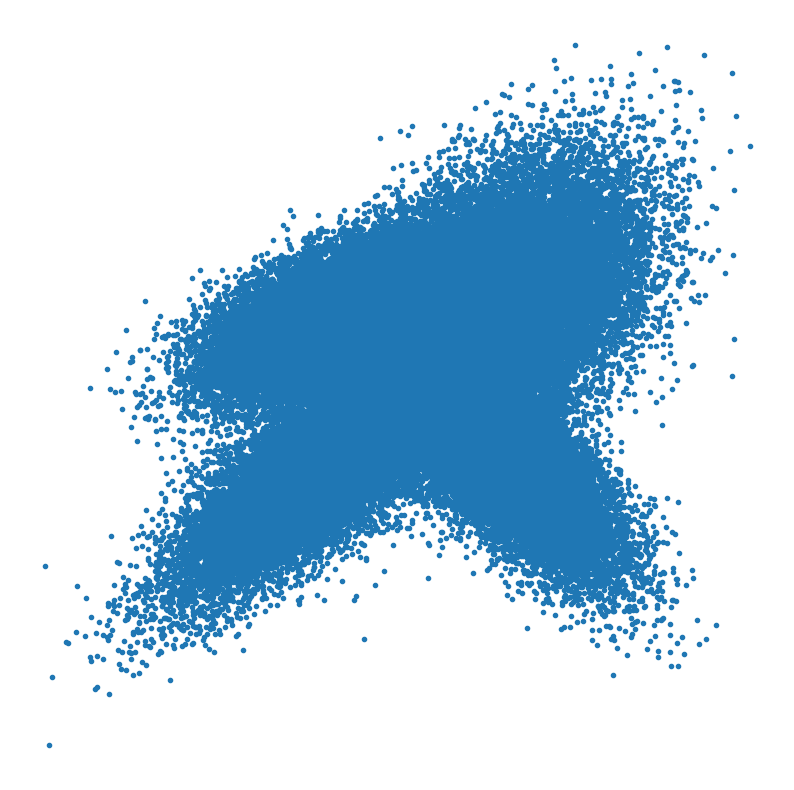

In [2]:
fig, ax = plt.subplots() 
fig.set_size_inches(10, 10)
plt.scatter(X[:,0], X[:,1], marker='.')
plt.axis('off')
plt.show()

In [3]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr == None:
        distances = [dist(v,p) for v in X]
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    return X, np.array(c)
    
def mdav(X, k):
    D = X
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v,xm) for v in D])
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = [dist(v,xr) for v in D]
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = dist_to_xr[:xsi]+dist_to_xr[xsi+1:]
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v,xm) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        clusters.append(D[:]) 
        
        # Test feature. progress bar
        pbar.update(len(D))
        
    else:
        # rest of points
        clusters.append(D[:])
        
        # Test feature. progress bar
        pbar.update(len(D))
    
    centroids = np.array([np.mean(c,axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

def print_stats(clusters, centroids):
    ss = []
    for c,cen in zip(clusters, centroids):
        #cen = np.mean(c, axis=0)
        s = np.mean([dist(x,cen) for x in c], axis=0)
        ss.append(s)
        
    print(f'Number of clusters: {len(clusters)}')
    print(f'Mean of mean distances to centroids: {np.mean(ss, axis=0)}')

def plot_results(clusters):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 10)
    for c, cen in zip(clusters, centroids):
        plt.scatter(c[:,0], c[:,1], marker='.', s=25)
        #plt.scatter(cen[0], cen[1], marker='o', s=100, edgecolor='k')
    plt.axis('off')
    plt.show()

In [4]:
# Vanilla MDAV
k=5
clusters, centroids = mdav(X, k)
print_stats(clusters, centroids)
#plot_results(clusters)

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

  0%|                                                                             | 5/100000 [00:00<1:56:31, 14.30it/s]

  0%|                                                                            | 10/100000 [00:00<1:19:11, 21.04it/s]

  0%|                                                                            | 15/100000 [00:00<1:33:29, 17.82it/s]

  0%|                                                                            | 20/100000 [00:01<1:18:32, 21.21it/s]

  0%|                                                                            | 25/100000 [00:01<1:28:11, 18.89it/s]

  0%|                                                                            | 30/100000 [00:01<1:16:34, 21.76it/s]

  0%|                                                                            | 35/100000 [00:01<1:27:48, 18.97it/s]

  0%|                                                                            | 40/100000 [00:01<1:18:54, 21.11it/s]

  0%|                                                                            | 45/100000 [00:02<1:27:25, 19.06it/s]

  0%|                                                                            | 50/100000 [00:02<1:17:49, 21.41it/s]

  0%|                                                                            | 55/100000 [00:02<1:26:36, 19.23it/s]

  0%|                                                                            | 60/100000 [00:02<1:16:41, 21.72it/s]

  0%|                                                                            | 65/100000 [00:03<1:26:31, 19.25it/s]

  0%|                                                                            | 70/100000 [00:03<1:16:06, 21.88it/s]

  0%|                                                                            | 75/100000 [00:03<1:24:07, 19.80it/s]

  0%|                                                                            | 80/100000 [00:03<1:14:56, 22.22it/s]

  0%|                                                                            | 85/100000 [00:04<1:22:58, 20.07it/s]

  0%|                                                                            | 90/100000 [00:04<1:14:35, 22.33it/s]

  0%|                                                                            | 95/100000 [00:04<1:24:11, 19.78it/s]

  0%|                                                                           | 100/100000 [00:04<1:13:48, 22.56it/s]

  0%|                                                                           | 105/100000 [00:05<1:22:52, 20.09it/s]

  0%|                                                                           | 110/100000 [00:05<1:15:05, 22.17it/s]

  0%|                                                                           | 115/100000 [00:05<1:24:25, 19.72it/s]

  0%|                                                                           | 120/100000 [00:05<1:14:07, 22.46it/s]

  0%|                                                                           | 125/100000 [00:06<1:21:40, 20.38it/s]

  0%|                                                                           | 130/100000 [00:06<1:12:23, 23.00it/s]

  0%|                                                                           | 135/100000 [00:06<1:21:28, 20.43it/s]

  0%|                                                                           | 140/100000 [00:06<1:12:29, 22.96it/s]

  0%|                                                                           | 145/100000 [00:07<1:24:14, 19.76it/s]

  0%|                                                                           | 150/100000 [00:07<1:16:24, 21.78it/s]

  0%|                                                                           | 155/100000 [00:07<1:24:29, 19.69it/s]

  0%|                                                                           | 160/100000 [00:07<1:15:16, 22.10it/s]

  0%|                                                                           | 165/100000 [00:08<1:22:43, 20.12it/s]

  0%|▏                                                                          | 170/100000 [00:08<1:14:36, 22.30it/s]

  0%|▏                                                                          | 175/100000 [00:08<1:25:00, 19.57it/s]

  0%|▏                                                                          | 180/100000 [00:08<1:17:32, 21.46it/s]

  0%|▏                                                                          | 185/100000 [00:09<1:27:13, 19.07it/s]

  0%|▏                                                                          | 190/100000 [00:09<1:17:11, 21.55it/s]

  0%|▏                                                                          | 195/100000 [00:09<1:28:25, 18.81it/s]

  0%|▏                                                                          | 200/100000 [00:09<1:18:27, 21.20it/s]

  0%|▏                                                                          | 205/100000 [00:10<1:26:41, 19.18it/s]

  0%|▏                                                                          | 210/100000 [00:10<1:16:14, 21.82it/s]

  0%|▏                                                                          | 215/100000 [00:10<1:23:46, 19.85it/s]

  0%|▏                                                                          | 220/100000 [00:10<1:14:56, 22.19it/s]

  0%|▏                                                                          | 225/100000 [00:10<1:22:49, 20.08it/s]

  0%|▏                                                                          | 230/100000 [00:11<1:12:50, 22.83it/s]

  0%|▏                                                                          | 235/100000 [00:11<1:23:41, 19.87it/s]

  0%|▏                                                                          | 240/100000 [00:11<1:16:40, 21.69it/s]

  0%|▏                                                                          | 245/100000 [00:11<1:26:19, 19.26it/s]

  0%|▏                                                                          | 250/100000 [00:12<1:17:16, 21.51it/s]

  0%|▏                                                                          | 255/100000 [00:12<1:25:42, 19.40it/s]

  0%|▏                                                                          | 260/100000 [00:12<1:15:22, 22.05it/s]

  0%|▏                                                                          | 265/100000 [00:12<1:25:43, 19.39it/s]

  0%|▏                                                                          | 270/100000 [00:13<1:14:48, 22.22it/s]

  0%|▏                                                                          | 275/100000 [00:13<1:24:09, 19.75it/s]

  0%|▏                                                                          | 280/100000 [00:13<1:13:59, 22.46it/s]

  0%|▏                                                                          | 285/100000 [00:13<1:22:00, 20.26it/s]

  0%|▏                                                                          | 290/100000 [00:13<1:12:18, 22.98it/s]

  0%|▏                                                                          | 295/100000 [00:14<1:23:36, 19.87it/s]

  0%|▏                                                                          | 300/100000 [00:14<1:17:43, 21.38it/s]

  0%|▏                                                                          | 305/100000 [00:14<1:32:28, 17.97it/s]

  0%|▏                                                                          | 310/100000 [00:15<1:24:29, 19.66it/s]

  0%|▏                                                                          | 315/100000 [00:15<1:37:10, 17.10it/s]

  0%|▏                                                                          | 320/100000 [00:15<1:26:42, 19.16it/s]

  0%|▏                                                                          | 325/100000 [00:16<1:40:41, 16.50it/s]

  0%|▏                                                                          | 330/100000 [00:16<1:26:44, 19.15it/s]

  0%|▎                                                                          | 335/100000 [00:16<1:32:12, 18.02it/s]

  0%|▎                                                                          | 340/100000 [00:16<1:19:54, 20.78it/s]

  0%|▎                                                                          | 345/100000 [00:16<1:27:16, 19.03it/s]

  0%|▎                                                                          | 350/100000 [00:17<1:16:25, 21.73it/s]

  0%|▎                                                                          | 355/100000 [00:17<1:24:32, 19.65it/s]

  0%|▎                                                                          | 360/100000 [00:17<1:15:48, 21.91it/s]

  0%|▎                                                                          | 365/100000 [00:17<1:23:42, 19.84it/s]

  0%|▎                                                                          | 370/100000 [00:18<1:14:21, 22.33it/s]

  0%|▎                                                                          | 375/100000 [00:18<1:22:59, 20.01it/s]

  0%|▎                                                                          | 380/100000 [00:18<1:13:30, 22.59it/s]

  0%|▎                                                                          | 385/100000 [00:18<1:21:55, 20.27it/s]

  0%|▎                                                                          | 390/100000 [00:19<1:12:57, 22.75it/s]

  0%|▎                                                                          | 395/100000 [00:19<1:21:47, 20.29it/s]

  0%|▎                                                                          | 400/100000 [00:19<1:13:49, 22.49it/s]

  0%|▎                                                                          | 405/100000 [00:19<1:25:36, 19.39it/s]

  0%|▎                                                                          | 410/100000 [00:19<1:15:11, 22.07it/s]

  0%|▎                                                                          | 415/100000 [00:20<1:25:59, 19.30it/s]

  0%|▎                                                                          | 420/100000 [00:20<1:15:11, 22.07it/s]

  0%|▎                                                                          | 425/100000 [00:20<1:24:15, 19.70it/s]

  0%|▎                                                                          | 430/100000 [00:20<1:15:44, 21.91it/s]

  0%|▎                                                                          | 435/100000 [00:21<1:24:24, 19.66it/s]

  0%|▎                                                                          | 440/100000 [00:21<1:16:22, 21.73it/s]

  0%|▎                                                                          | 445/100000 [00:21<1:25:12, 19.47it/s]

  0%|▎                                                                          | 450/100000 [00:21<1:15:40, 21.92it/s]

  0%|▎                                                                          | 455/100000 [00:22<1:24:07, 19.72it/s]

  0%|▎                                                                          | 460/100000 [00:22<1:14:14, 22.35it/s]

  0%|▎                                                                          | 465/100000 [00:22<1:23:36, 19.84it/s]

  0%|▎                                                                          | 470/100000 [00:22<1:14:22, 22.30it/s]

  0%|▎                                                                          | 475/100000 [00:23<1:24:43, 19.58it/s]

  0%|▎                                                                          | 480/100000 [00:23<1:16:06, 21.79it/s]

  0%|▎                                                                          | 485/100000 [00:23<1:25:47, 19.33it/s]

  0%|▎                                                                          | 490/100000 [00:23<1:15:32, 21.95it/s]

  0%|▎                                                                          | 495/100000 [00:24<1:25:14, 19.46it/s]

  0%|▍                                                                          | 500/100000 [00:24<1:16:22, 21.71it/s]

  1%|▍                                                                          | 505/100000 [00:24<1:29:07, 18.60it/s]

  1%|▍                                                                          | 510/100000 [00:24<1:18:12, 21.20it/s]

  1%|▍                                                                          | 515/100000 [00:25<1:26:07, 19.25it/s]

  1%|▍                                                                          | 520/100000 [00:25<1:15:47, 21.88it/s]

  1%|▍                                                                          | 525/100000 [00:25<1:25:51, 19.31it/s]

  1%|▍                                                                          | 530/100000 [00:25<1:16:19, 21.72it/s]

  1%|▍                                                                          | 535/100000 [00:26<1:26:15, 19.22it/s]

  1%|▍                                                                          | 540/100000 [00:26<1:15:41, 21.90it/s]

  1%|▍                                                                          | 545/100000 [00:26<1:25:43, 19.34it/s]

  1%|▍                                                                          | 550/100000 [00:26<1:16:16, 21.73it/s]

  1%|▍                                                                          | 555/100000 [00:27<1:26:25, 19.18it/s]

  1%|▍                                                                          | 560/100000 [00:27<1:16:25, 21.68it/s]

  1%|▍                                                                          | 565/100000 [00:27<1:24:16, 19.67it/s]

  1%|▍                                                                          | 570/100000 [00:27<1:16:16, 21.73it/s]

  1%|▍                                                                          | 575/100000 [00:28<1:25:14, 19.44it/s]

  1%|▍                                                                          | 580/100000 [00:28<1:14:36, 22.21it/s]

  1%|▍                                                                          | 585/100000 [00:28<1:23:44, 19.79it/s]

  1%|▍                                                                          | 590/100000 [00:28<1:15:48, 21.86it/s]

  1%|▍                                                                          | 595/100000 [00:29<1:25:49, 19.30it/s]

  1%|▍                                                                          | 600/100000 [00:29<1:16:17, 21.72it/s]

  1%|▍                                                                          | 605/100000 [00:29<1:23:58, 19.73it/s]

  1%|▍                                                                          | 610/100000 [00:29<1:14:01, 22.38it/s]

  1%|▍                                                                          | 615/100000 [00:29<1:22:12, 20.15it/s]

  1%|▍                                                                          | 620/100000 [00:30<1:13:45, 22.46it/s]

  1%|▍                                                                          | 625/100000 [00:30<1:23:06, 19.93it/s]

  1%|▍                                                                          | 630/100000 [00:30<1:13:59, 22.38it/s]

  1%|▍                                                                          | 635/100000 [00:30<1:27:59, 18.82it/s]

  1%|▍                                                                          | 640/100000 [00:31<1:18:22, 21.13it/s]

  1%|▍                                                                          | 645/100000 [00:31<1:27:05, 19.01it/s]

  1%|▍                                                                          | 650/100000 [00:31<1:17:50, 21.27it/s]

  1%|▍                                                                          | 655/100000 [00:31<1:27:54, 18.84it/s]

  1%|▍                                                                          | 660/100000 [00:32<1:17:26, 21.38it/s]

  1%|▍                                                                          | 665/100000 [00:32<1:25:47, 19.30it/s]

  1%|▌                                                                          | 670/100000 [00:32<1:16:43, 21.58it/s]

  1%|▌                                                                          | 675/100000 [00:32<1:25:45, 19.30it/s]

  1%|▌                                                                          | 680/100000 [00:33<1:17:45, 21.29it/s]

  1%|▌                                                                          | 685/100000 [00:33<1:29:00, 18.60it/s]

  1%|▌                                                                          | 690/100000 [00:33<1:18:27, 21.10it/s]

  1%|▌                                                                          | 695/100000 [00:33<1:27:36, 18.89it/s]

  1%|▌                                                                          | 700/100000 [00:34<1:16:55, 21.51it/s]

  1%|▌                                                                          | 705/100000 [00:34<1:25:27, 19.37it/s]

  1%|▌                                                                          | 710/100000 [00:34<1:15:02, 22.05it/s]

  1%|▌                                                                          | 715/100000 [00:34<1:24:34, 19.57it/s]

  1%|▌                                                                          | 720/100000 [00:35<1:15:00, 22.06it/s]

  1%|▌                                                                          | 725/100000 [00:35<1:24:21, 19.61it/s]

  1%|▌                                                                          | 730/100000 [00:35<1:16:18, 21.68it/s]

  1%|▌                                                                          | 735/100000 [00:35<1:24:57, 19.47it/s]

  1%|▌                                                                          | 740/100000 [00:36<1:17:09, 21.44it/s]

  1%|▌                                                                          | 745/100000 [00:36<1:25:51, 19.27it/s]

  1%|▌                                                                          | 750/100000 [00:36<1:15:12, 21.99it/s]

  1%|▌                                                                          | 755/100000 [00:36<1:23:52, 19.72it/s]

  1%|▌                                                                          | 760/100000 [00:37<1:14:50, 22.10it/s]

  1%|▌                                                                          | 765/100000 [00:37<1:23:35, 19.79it/s]

  1%|▌                                                                          | 770/100000 [00:37<1:14:38, 22.15it/s]

  1%|▌                                                                          | 775/100000 [00:37<1:25:06, 19.43it/s]

  1%|▌                                                                          | 780/100000 [00:38<1:15:59, 21.76it/s]

  1%|▌                                                                          | 785/100000 [00:38<1:25:09, 19.42it/s]

  1%|▌                                                                          | 790/100000 [00:38<1:15:47, 21.82it/s]

  1%|▌                                                                          | 795/100000 [00:38<1:24:49, 19.49it/s]

  1%|▌                                                                          | 800/100000 [00:38<1:14:34, 22.17it/s]

  1%|▌                                                                          | 805/100000 [00:39<1:25:08, 19.42it/s]

  1%|▌                                                                          | 810/100000 [00:39<1:17:31, 21.32it/s]

  1%|▌                                                                          | 815/100000 [00:39<1:28:13, 18.74it/s]

  1%|▌                                                                          | 820/100000 [00:39<1:17:43, 21.27it/s]

  1%|▌                                                                          | 825/100000 [00:40<1:27:37, 18.86it/s]

  1%|▌                                                                          | 830/100000 [00:40<1:19:33, 20.78it/s]

  1%|▋                                                                          | 835/100000 [00:40<1:29:40, 18.43it/s]

  1%|▋                                                                          | 840/100000 [00:41<1:19:08, 20.88it/s]

  1%|▋                                                                          | 845/100000 [00:41<1:28:01, 18.77it/s]

  1%|▋                                                                          | 850/100000 [00:41<1:18:28, 21.06it/s]

  1%|▋                                                                          | 855/100000 [00:41<1:27:10, 18.96it/s]

  1%|▋                                                                          | 860/100000 [00:41<1:16:28, 21.61it/s]

  1%|▋                                                                          | 865/100000 [00:42<1:26:26, 19.11it/s]

  1%|▋                                                                          | 870/100000 [00:42<1:15:19, 21.94it/s]

  1%|▋                                                                          | 875/100000 [00:42<1:28:44, 18.62it/s]

  1%|▋                                                                          | 880/100000 [00:42<1:17:41, 21.26it/s]

  1%|▋                                                                          | 885/100000 [00:43<1:26:02, 19.20it/s]

  1%|▋                                                                          | 890/100000 [00:43<1:16:03, 21.72it/s]

  1%|▋                                                                          | 895/100000 [00:43<1:24:06, 19.64it/s]

  1%|▋                                                                          | 900/100000 [00:43<1:15:13, 21.96it/s]

  1%|▋                                                                          | 905/100000 [00:44<1:24:23, 19.57it/s]

  1%|▋                                                                          | 910/100000 [00:44<1:15:19, 21.92it/s]

  1%|▋                                                                          | 915/100000 [00:44<1:24:31, 19.54it/s]

  1%|▋                                                                          | 920/100000 [00:44<1:16:39, 21.54it/s]

  1%|▋                                                                          | 925/100000 [00:45<1:26:18, 19.13it/s]

  1%|▋                                                                          | 930/100000 [00:45<1:16:04, 21.70it/s]

  1%|▋                                                                          | 935/100000 [00:45<1:23:53, 19.68it/s]

  1%|▋                                                                          | 940/100000 [00:45<1:14:49, 22.06it/s]

  1%|▋                                                                          | 945/100000 [00:46<1:26:37, 19.06it/s]

  1%|▋                                                                          | 950/100000 [00:46<1:16:09, 21.67it/s]

  1%|▋                                                                          | 955/100000 [00:46<1:27:42, 18.82it/s]

  1%|▋                                                                          | 960/100000 [00:46<1:17:44, 21.23it/s]

  1%|▋                                                                          | 965/100000 [00:47<1:26:14, 19.14it/s]

  1%|▋                                                                          | 970/100000 [00:47<1:16:33, 21.56it/s]

  1%|▋                                                                          | 975/100000 [00:47<1:26:43, 19.03it/s]

  1%|▋                                                                          | 980/100000 [00:47<1:17:19, 21.34it/s]

  1%|▋                                                                          | 985/100000 [00:48<1:26:19, 19.12it/s]

  1%|▋                                                                          | 990/100000 [00:48<1:16:22, 21.61it/s]

  1%|▋                                                                          | 995/100000 [00:48<1:27:41, 18.82it/s]

  1%|▋                                                                         | 1000/100000 [00:48<1:18:12, 21.10it/s]

  1%|▋                                                                         | 1005/100000 [00:49<1:29:13, 18.49it/s]

  1%|▋                                                                         | 1010/100000 [00:49<1:18:09, 21.11it/s]

  1%|▊                                                                         | 1015/100000 [00:49<1:27:35, 18.84it/s]

  1%|▊                                                                         | 1020/100000 [00:49<1:16:19, 21.61it/s]

  1%|▊                                                                         | 1025/100000 [00:50<1:24:50, 19.44it/s]

  1%|▊                                                                         | 1030/100000 [00:50<1:14:21, 22.18it/s]

  1%|▊                                                                         | 1035/100000 [00:50<1:25:35, 19.27it/s]

  1%|▊                                                                         | 1040/100000 [00:50<1:15:33, 21.83it/s]

  1%|▊                                                                         | 1045/100000 [00:51<1:23:29, 19.75it/s]

  1%|▊                                                                         | 1050/100000 [00:51<1:13:31, 22.43it/s]

  1%|▊                                                                         | 1055/100000 [00:51<1:22:57, 19.88it/s]

  1%|▊                                                                         | 1060/100000 [00:51<1:13:38, 22.39it/s]

  1%|▊                                                                         | 1065/100000 [00:52<1:23:48, 19.67it/s]

  1%|▊                                                                         | 1070/100000 [00:52<1:15:31, 21.83it/s]

  1%|▊                                                                         | 1075/100000 [00:52<1:25:31, 19.28it/s]

  1%|▊                                                                         | 1080/100000 [00:52<1:15:25, 21.86it/s]

  1%|▊                                                                         | 1085/100000 [00:53<1:24:49, 19.44it/s]

  1%|▊                                                                         | 1090/100000 [00:53<1:14:50, 22.03it/s]

  1%|▊                                                                         | 1095/100000 [00:53<1:23:10, 19.82it/s]

  1%|▊                                                                         | 1100/100000 [00:53<1:13:08, 22.54it/s]

  1%|▊                                                                         | 1105/100000 [00:54<1:23:09, 19.82it/s]

  1%|▊                                                                         | 1110/100000 [00:54<1:14:49, 22.03it/s]

  1%|▊                                                                         | 1115/100000 [00:54<1:26:49, 18.98it/s]

  1%|▊                                                                         | 1120/100000 [00:54<1:16:42, 21.48it/s]

  1%|▊                                                                         | 1125/100000 [00:55<1:26:40, 19.01it/s]

  1%|▊                                                                         | 1130/100000 [00:55<1:16:15, 21.61it/s]

  1%|▊                                                                         | 1135/100000 [00:55<1:25:00, 19.38it/s]

  1%|▊                                                                         | 1140/100000 [00:55<1:15:37, 21.79it/s]

  1%|▊                                                                         | 1145/100000 [00:56<1:26:56, 18.95it/s]

  1%|▊                                                                         | 1150/100000 [00:56<1:15:43, 21.76it/s]

  1%|▊                                                                         | 1155/100000 [00:56<1:24:20, 19.53it/s]

  1%|▊                                                                         | 1160/100000 [00:56<1:15:35, 21.79it/s]

  1%|▊                                                                         | 1165/100000 [00:56<1:23:13, 19.79it/s]

  1%|▊                                                                         | 1170/100000 [00:57<1:15:52, 21.71it/s]

  1%|▊                                                                         | 1175/100000 [00:57<1:23:24, 19.75it/s]

  1%|▊                                                                         | 1180/100000 [00:57<1:15:00, 21.96it/s]

  1%|▉                                                                         | 1185/100000 [00:57<1:25:29, 19.26it/s]

  1%|▉                                                                         | 1190/100000 [00:58<1:17:41, 21.20it/s]

  1%|▉                                                                         | 1195/100000 [00:58<1:25:09, 19.34it/s]

  1%|▉                                                                         | 1200/100000 [00:58<1:16:29, 21.53it/s]

  1%|▉                                                                         | 1205/100000 [00:58<1:24:42, 19.44it/s]

  1%|▉                                                                         | 1210/100000 [00:59<1:14:49, 22.00it/s]

  1%|▉                                                                         | 1215/100000 [00:59<1:24:01, 19.60it/s]

  1%|▉                                                                         | 1220/100000 [00:59<1:14:37, 22.06it/s]

  1%|▉                                                                         | 1225/100000 [00:59<1:24:30, 19.48it/s]

  1%|▉                                                                         | 1230/100000 [01:00<1:15:12, 21.89it/s]

  1%|▉                                                                         | 1235/100000 [01:00<1:27:28, 18.82it/s]

  1%|▉                                                                         | 1240/100000 [01:00<1:16:51, 21.42it/s]

  1%|▉                                                                         | 1245/100000 [01:00<1:24:57, 19.37it/s]

  1%|▉                                                                         | 1250/100000 [01:01<1:15:28, 21.80it/s]

  1%|▉                                                                         | 1255/100000 [01:01<1:23:41, 19.66it/s]

  1%|▉                                                                         | 1260/100000 [01:01<1:14:12, 22.18it/s]

  1%|▉                                                                         | 1265/100000 [01:01<1:23:56, 19.60it/s]

  1%|▉                                                                         | 1270/100000 [01:02<1:15:01, 21.93it/s]

  1%|▉                                                                         | 1275/100000 [01:02<1:26:02, 19.13it/s]

  1%|▉                                                                         | 1280/100000 [01:02<1:16:01, 21.64it/s]

  1%|▉                                                                         | 1285/100000 [01:02<1:25:07, 19.33it/s]

  1%|▉                                                                         | 1290/100000 [01:03<1:15:47, 21.71it/s]

  1%|▉                                                                         | 1295/100000 [01:03<1:24:02, 19.57it/s]

  1%|▉                                                                         | 1300/100000 [01:03<1:14:44, 22.01it/s]

  1%|▉                                                                         | 1305/100000 [01:03<1:23:32, 19.69it/s]

  1%|▉                                                                         | 1310/100000 [01:03<1:16:30, 21.50it/s]

  1%|▉                                                                         | 1315/100000 [01:04<1:24:46, 19.40it/s]

  1%|▉                                                                         | 1320/100000 [01:04<1:17:10, 21.31it/s]

  1%|▉                                                                         | 1325/100000 [01:04<1:30:18, 18.21it/s]

  1%|▉                                                                         | 1330/100000 [01:05<1:19:15, 20.75it/s]

  1%|▉                                                                         | 1335/100000 [01:05<1:27:51, 18.72it/s]

  1%|▉                                                                         | 1340/100000 [01:05<1:17:17, 21.27it/s]

  1%|▉                                                                         | 1345/100000 [01:05<1:27:20, 18.83it/s]

  1%|▉                                                                         | 1350/100000 [01:05<1:15:55, 21.65it/s]

  1%|█                                                                         | 1355/100000 [01:06<1:25:14, 19.29it/s]

  1%|█                                                                         | 1360/100000 [01:06<1:14:41, 22.01it/s]

  1%|█                                                                         | 1365/100000 [01:06<1:22:04, 20.03it/s]

  1%|█                                                                         | 1370/100000 [01:06<1:13:38, 22.32it/s]

  1%|█                                                                         | 1375/100000 [01:07<1:24:05, 19.55it/s]

  1%|█                                                                         | 1380/100000 [01:07<1:13:35, 22.33it/s]

  1%|█                                                                         | 1385/100000 [01:07<1:24:53, 19.36it/s]

  1%|█                                                                         | 1390/100000 [01:07<1:14:38, 22.02it/s]

  1%|█                                                                         | 1395/100000 [01:08<1:24:41, 19.40it/s]

  1%|█                                                                         | 1400/100000 [01:08<1:14:59, 21.92it/s]

  1%|█                                                                         | 1405/100000 [01:08<1:23:52, 19.59it/s]

  1%|█                                                                         | 1410/100000 [01:08<1:13:32, 22.34it/s]

  1%|█                                                                         | 1415/100000 [01:09<1:24:06, 19.54it/s]

  1%|█                                                                         | 1420/100000 [01:09<1:14:16, 22.12it/s]

  1%|█                                                                         | 1425/100000 [01:09<1:23:51, 19.59it/s]

  1%|█                                                                         | 1430/100000 [01:09<1:14:43, 21.98it/s]

  1%|█                                                                         | 1435/100000 [01:10<1:23:26, 19.69it/s]

  1%|█                                                                         | 1440/100000 [01:10<1:14:39, 22.00it/s]

  1%|█                                                                         | 1445/100000 [01:10<1:23:35, 19.65it/s]

  1%|█                                                                         | 1450/100000 [01:10<1:13:55, 22.22it/s]

  1%|█                                                                         | 1455/100000 [01:11<1:22:18, 19.95it/s]

  1%|█                                                                         | 1460/100000 [01:11<1:13:00, 22.49it/s]

  1%|█                                                                         | 1465/100000 [01:11<1:23:31, 19.66it/s]

  1%|█                                                                         | 1470/100000 [01:11<1:13:49, 22.25it/s]

  1%|█                                                                         | 1475/100000 [01:12<1:23:57, 19.56it/s]

  1%|█                                                                         | 1480/100000 [01:12<1:15:07, 21.86it/s]

  1%|█                                                                         | 1485/100000 [01:12<1:23:27, 19.67it/s]

  1%|█                                                                         | 1490/100000 [01:12<1:14:57, 21.90it/s]

  1%|█                                                                         | 1495/100000 [01:13<1:23:41, 19.62it/s]

  2%|█                                                                         | 1500/100000 [01:13<1:14:10, 22.13it/s]

  2%|█                                                                         | 1505/100000 [01:13<1:22:15, 19.96it/s]

  2%|█                                                                         | 1510/100000 [01:13<1:14:47, 21.95it/s]

  2%|█                                                                         | 1515/100000 [01:13<1:23:08, 19.74it/s]

  2%|█                                                                         | 1520/100000 [01:14<1:13:49, 22.23it/s]

  2%|█▏                                                                        | 1525/100000 [01:14<1:22:33, 19.88it/s]

  2%|█▏                                                                        | 1530/100000 [01:14<1:14:20, 22.08it/s]

  2%|█▏                                                                        | 1535/100000 [01:14<1:22:56, 19.78it/s]

  2%|█▏                                                                        | 1540/100000 [01:15<1:13:36, 22.30it/s]

  2%|█▏                                                                        | 1545/100000 [01:15<1:22:57, 19.78it/s]

  2%|█▏                                                                        | 1550/100000 [01:15<1:14:56, 21.89it/s]

  2%|█▏                                                                        | 1555/100000 [01:15<1:25:28, 19.20it/s]

  2%|█▏                                                                        | 1560/100000 [01:16<1:15:53, 21.62it/s]

  2%|█▏                                                                        | 1565/100000 [01:16<1:24:56, 19.32it/s]

  2%|█▏                                                                        | 1570/100000 [01:16<1:14:21, 22.06it/s]

  2%|█▏                                                                        | 1575/100000 [01:16<1:21:50, 20.04it/s]

  2%|█▏                                                                        | 1580/100000 [01:17<1:12:37, 22.59it/s]

  2%|█▏                                                                        | 1585/100000 [01:17<1:20:54, 20.27it/s]

  2%|█▏                                                                        | 1590/100000 [01:17<1:12:15, 22.70it/s]

  2%|█▏                                                                        | 1595/100000 [01:17<1:21:51, 20.03it/s]

  2%|█▏                                                                        | 1600/100000 [01:17<1:16:13, 21.51it/s]

  2%|█▏                                                                        | 1605/100000 [01:18<1:27:49, 18.67it/s]

  2%|█▏                                                                        | 1610/100000 [01:18<1:18:05, 21.00it/s]

  2%|█▏                                                                        | 1615/100000 [01:18<1:25:41, 19.13it/s]

  2%|█▏                                                                        | 1620/100000 [01:18<1:15:01, 21.85it/s]

  2%|█▏                                                                        | 1625/100000 [01:19<1:25:33, 19.16it/s]

  2%|█▏                                                                        | 1630/100000 [01:19<1:15:33, 21.70it/s]

  2%|█▏                                                                        | 1635/100000 [01:19<1:25:58, 19.07it/s]

  2%|█▏                                                                        | 1640/100000 [01:19<1:16:36, 21.40it/s]

  2%|█▏                                                                        | 1645/100000 [01:20<1:23:34, 19.62it/s]

  2%|█▏                                                                        | 1650/100000 [01:20<1:16:59, 21.29it/s]

  2%|█▏                                                                        | 1655/100000 [01:20<1:25:05, 19.26it/s]

  2%|█▏                                                                        | 1660/100000 [01:20<1:16:11, 21.51it/s]

  2%|█▏                                                                        | 1665/100000 [01:21<1:24:52, 19.31it/s]

  2%|█▏                                                                        | 1670/100000 [01:21<1:15:41, 21.65it/s]

  2%|█▏                                                                        | 1675/100000 [01:21<1:24:12, 19.46it/s]

  2%|█▏                                                                        | 1680/100000 [01:21<1:14:00, 22.14it/s]

  2%|█▏                                                                        | 1685/100000 [01:22<1:23:40, 19.58it/s]

  2%|█▎                                                                        | 1690/100000 [01:22<1:13:27, 22.30it/s]

  2%|█▎                                                                        | 1695/100000 [01:22<1:24:53, 19.30it/s]

  2%|█▎                                                                        | 1700/100000 [01:22<1:17:45, 21.07it/s]

  2%|█▎                                                                        | 1705/100000 [01:23<1:25:25, 19.18it/s]

  2%|█▎                                                                        | 1710/100000 [01:23<1:15:20, 21.74it/s]

  2%|█▎                                                                        | 1715/100000 [01:23<1:24:50, 19.31it/s]

  2%|█▎                                                                        | 1720/100000 [01:23<1:14:45, 21.91it/s]

  2%|█▎                                                                        | 1725/100000 [01:24<1:23:30, 19.61it/s]

  2%|█▎                                                                        | 1730/100000 [01:24<1:13:05, 22.41it/s]

  2%|█▎                                                                        | 1735/100000 [01:24<1:21:33, 20.08it/s]

  2%|█▎                                                                        | 1740/100000 [01:24<1:12:37, 22.55it/s]

  2%|█▎                                                                        | 1745/100000 [01:25<1:26:48, 18.86it/s]

  2%|█▎                                                                        | 1750/100000 [01:25<1:15:44, 21.62it/s]

  2%|█▎                                                                        | 1755/100000 [01:25<1:25:08, 19.23it/s]

  2%|█▎                                                                        | 1760/100000 [01:25<1:14:27, 21.99it/s]

  2%|█▎                                                                        | 1765/100000 [01:26<1:24:23, 19.40it/s]

  2%|█▎                                                                        | 1770/100000 [01:26<1:14:28, 21.98it/s]

  2%|█▎                                                                        | 1775/100000 [01:26<1:24:38, 19.34it/s]

  2%|█▎                                                                        | 1780/100000 [01:26<1:15:50, 21.59it/s]

  2%|█▎                                                                        | 1785/100000 [01:27<1:28:27, 18.50it/s]

  2%|█▎                                                                        | 1790/100000 [01:27<1:16:47, 21.32it/s]

  2%|█▎                                                                        | 1795/100000 [01:27<1:26:55, 18.83it/s]

  2%|█▎                                                                        | 1800/100000 [01:27<1:16:35, 21.37it/s]

  2%|█▎                                                                        | 1805/100000 [01:28<1:26:24, 18.94it/s]

  2%|█▎                                                                        | 1810/100000 [01:28<1:16:06, 21.50it/s]

  2%|█▎                                                                        | 1815/100000 [01:28<1:25:45, 19.08it/s]

  2%|█▎                                                                        | 1820/100000 [01:28<1:16:14, 21.46it/s]

  2%|█▎                                                                        | 1825/100000 [01:29<1:27:54, 18.61it/s]

  2%|█▎                                                                        | 1830/100000 [01:29<1:20:31, 20.32it/s]

  2%|█▎                                                                        | 1835/100000 [01:29<1:27:48, 18.63it/s]

  2%|█▎                                                                        | 1840/100000 [01:29<1:18:02, 20.96it/s]

  2%|█▎                                                                        | 1845/100000 [01:30<1:26:09, 18.99it/s]

  2%|█▎                                                                        | 1850/100000 [01:30<1:16:24, 21.41it/s]

  2%|█▎                                                                        | 1855/100000 [01:30<1:25:47, 19.07it/s]

  2%|█▍                                                                        | 1860/100000 [01:30<1:15:37, 21.63it/s]

  2%|█▍                                                                        | 1865/100000 [01:31<1:23:53, 19.50it/s]

  2%|█▍                                                                        | 1870/100000 [01:31<1:16:21, 21.42it/s]

  2%|█▍                                                                        | 1875/100000 [01:31<1:24:23, 19.38it/s]

  2%|█▍                                                                        | 1880/100000 [01:31<1:13:49, 22.15it/s]

  2%|█▍                                                                        | 1885/100000 [01:32<1:23:55, 19.49it/s]

  2%|█▍                                                                        | 1890/100000 [01:32<1:14:03, 22.08it/s]

  2%|█▍                                                                        | 1895/100000 [01:32<1:22:34, 19.80it/s]

  2%|█▍                                                                        | 1900/100000 [01:32<1:13:13, 22.33it/s]

  2%|█▍                                                                        | 1905/100000 [01:33<1:23:56, 19.48it/s]

  2%|█▍                                                                        | 1910/100000 [01:33<1:13:42, 22.18it/s]

  2%|█▍                                                                        | 1915/100000 [01:33<1:22:00, 19.93it/s]

  2%|█▍                                                                        | 1920/100000 [01:33<1:13:30, 22.24it/s]

  2%|█▍                                                                        | 1925/100000 [01:33<1:22:23, 19.84it/s]

  2%|█▍                                                                        | 1930/100000 [01:34<1:13:22, 22.28it/s]

  2%|█▍                                                                        | 1935/100000 [01:34<1:22:28, 19.82it/s]

  2%|█▍                                                                        | 1940/100000 [01:34<1:14:06, 22.05it/s]

  2%|█▍                                                                        | 1945/100000 [01:34<1:23:14, 19.63it/s]

  2%|█▍                                                                        | 1950/100000 [01:35<1:14:44, 21.87it/s]

  2%|█▍                                                                        | 1955/100000 [01:35<1:23:54, 19.47it/s]

  2%|█▍                                                                        | 1960/100000 [01:35<1:13:38, 22.19it/s]

  2%|█▍                                                                        | 1965/100000 [01:35<1:26:23, 18.91it/s]

  2%|█▍                                                                        | 1970/100000 [01:36<1:18:10, 20.90it/s]

  2%|█▍                                                                        | 1975/100000 [01:36<1:25:38, 19.08it/s]

  2%|█▍                                                                        | 1980/100000 [01:36<1:17:08, 21.18it/s]

  2%|█▍                                                                        | 1985/100000 [01:36<1:26:34, 18.87it/s]

  2%|█▍                                                                        | 1990/100000 [01:37<1:16:52, 21.25it/s]

  2%|█▍                                                                        | 1995/100000 [01:37<1:25:14, 19.16it/s]

  2%|█▍                                                                        | 2000/100000 [01:37<1:14:22, 21.96it/s]

  2%|█▍                                                                        | 2005/100000 [01:37<1:23:16, 19.61it/s]

  2%|█▍                                                                        | 2010/100000 [01:38<1:13:30, 22.22it/s]

  2%|█▍                                                                        | 2015/100000 [01:38<1:23:01, 19.67it/s]

  2%|█▍                                                                        | 2020/100000 [01:38<1:13:14, 22.30it/s]

  2%|█▍                                                                        | 2025/100000 [01:38<1:22:27, 19.80it/s]

  2%|█▌                                                                        | 2030/100000 [01:39<1:13:54, 22.09it/s]

  2%|█▌                                                                        | 2035/100000 [01:39<1:22:30, 19.79it/s]

  2%|█▌                                                                        | 2040/100000 [01:39<1:13:55, 22.08it/s]

  2%|█▌                                                                        | 2045/100000 [01:39<1:23:31, 19.55it/s]

  2%|█▌                                                                        | 2050/100000 [01:39<1:14:14, 21.99it/s]

  2%|█▌                                                                        | 2055/100000 [01:40<1:25:02, 19.20it/s]

  2%|█▌                                                                        | 2060/100000 [01:40<1:16:31, 21.33it/s]

  2%|█▌                                                                        | 2065/100000 [01:40<1:23:33, 19.53it/s]

  2%|█▌                                                                        | 2070/100000 [01:40<1:13:35, 22.18it/s]

  2%|█▌                                                                        | 2075/100000 [01:41<1:24:14, 19.37it/s]

  2%|█▌                                                                        | 2080/100000 [01:41<1:13:58, 22.06it/s]

  2%|█▌                                                                        | 2085/100000 [01:41<1:23:45, 19.48it/s]

  2%|█▌                                                                        | 2090/100000 [01:41<1:13:10, 22.30it/s]

  2%|█▌                                                                        | 2095/100000 [01:42<1:22:32, 19.77it/s]

  2%|█▌                                                                        | 2100/100000 [01:42<1:14:59, 21.76it/s]

  2%|█▌                                                                        | 2105/100000 [01:42<1:27:22, 18.67it/s]

  2%|█▌                                                                        | 2110/100000 [01:42<1:16:09, 21.42it/s]

  2%|█▌                                                                        | 2115/100000 [01:43<1:24:45, 19.25it/s]

  2%|█▌                                                                        | 2120/100000 [01:43<1:15:12, 21.69it/s]

  2%|█▌                                                                        | 2125/100000 [01:43<1:24:48, 19.24it/s]

  2%|█▌                                                                        | 2130/100000 [01:43<1:15:59, 21.47it/s]

  2%|█▌                                                                        | 2135/100000 [01:44<1:24:15, 19.36it/s]

  2%|█▌                                                                        | 2140/100000 [01:44<1:14:01, 22.03it/s]

  2%|█▌                                                                        | 2145/100000 [01:44<1:24:47, 19.23it/s]

  2%|█▌                                                                        | 2150/100000 [01:44<1:16:02, 21.45it/s]

  2%|█▌                                                                        | 2155/100000 [01:45<1:28:20, 18.46it/s]

  2%|█▌                                                                        | 2160/100000 [01:45<1:16:45, 21.25it/s]

  2%|█▌                                                                        | 2165/100000 [01:45<1:25:08, 19.15it/s]

  2%|█▌                                                                        | 2170/100000 [01:45<1:14:47, 21.80it/s]

  2%|█▌                                                                        | 2175/100000 [01:46<1:24:27, 19.30it/s]

  2%|█▌                                                                        | 2180/100000 [01:46<1:13:44, 22.11it/s]

  2%|█▌                                                                        | 2185/100000 [01:46<1:24:14, 19.35it/s]

  2%|█▌                                                                        | 2190/100000 [01:46<1:16:30, 21.31it/s]

  2%|█▌                                                                        | 2195/100000 [01:47<1:25:45, 19.01it/s]

  2%|█▋                                                                        | 2200/100000 [01:47<1:14:55, 21.76it/s]

  2%|█▋                                                                        | 2205/100000 [01:47<1:23:06, 19.61it/s]

  2%|█▋                                                                        | 2210/100000 [01:47<1:13:13, 22.26it/s]

  2%|█▋                                                                        | 2215/100000 [01:48<1:22:40, 19.71it/s]

  2%|█▋                                                                        | 2220/100000 [01:48<1:13:46, 22.09it/s]

  2%|█▋                                                                        | 2225/100000 [01:48<1:24:10, 19.36it/s]

  2%|█▋                                                                        | 2230/100000 [01:48<1:14:03, 22.01it/s]

  2%|█▋                                                                        | 2235/100000 [01:49<1:23:49, 19.44it/s]

  2%|█▋                                                                        | 2240/100000 [01:49<1:17:23, 21.06it/s]

  2%|█▋                                                                        | 2245/100000 [01:49<1:23:56, 19.41it/s]

  2%|█▋                                                                        | 2250/100000 [01:49<1:14:30, 21.87it/s]

  2%|█▋                                                                        | 2255/100000 [01:50<1:23:04, 19.61it/s]

  2%|█▋                                                                        | 2260/100000 [01:50<1:13:02, 22.30it/s]

  2%|█▋                                                                        | 2265/100000 [01:50<1:22:13, 19.81it/s]

  2%|█▋                                                                        | 2270/100000 [01:50<1:13:52, 22.05it/s]

  2%|█▋                                                                        | 2275/100000 [01:51<1:24:07, 19.36it/s]

  2%|█▋                                                                        | 2280/100000 [01:51<1:15:00, 21.71it/s]

  2%|█▋                                                                        | 2285/100000 [01:51<1:27:20, 18.65it/s]

  2%|█▋                                                                        | 2290/100000 [01:51<1:19:55, 20.37it/s]

  2%|█▋                                                                        | 2295/100000 [01:52<1:26:11, 18.89it/s]

  2%|█▋                                                                        | 2300/100000 [01:52<1:15:18, 21.62it/s]

  2%|█▋                                                                        | 2305/100000 [01:52<1:23:35, 19.48it/s]

  2%|█▋                                                                        | 2310/100000 [01:52<1:14:32, 21.84it/s]

  2%|█▋                                                                        | 2315/100000 [01:53<1:23:08, 19.58it/s]

  2%|█▋                                                                        | 2320/100000 [01:53<1:14:02, 21.99it/s]

  2%|█▋                                                                        | 2325/100000 [01:53<1:23:24, 19.52it/s]

  2%|█▋                                                                        | 2330/100000 [01:53<1:14:53, 21.74it/s]

  2%|█▋                                                                        | 2335/100000 [01:54<1:23:47, 19.43it/s]

  2%|█▋                                                                        | 2340/100000 [01:54<1:14:14, 21.92it/s]

  2%|█▋                                                                        | 2345/100000 [01:54<1:22:43, 19.67it/s]

  2%|█▋                                                                        | 2350/100000 [01:54<1:14:12, 21.93it/s]

  2%|█▋                                                                        | 2355/100000 [01:54<1:23:59, 19.38it/s]

  2%|█▋                                                                        | 2360/100000 [01:55<1:14:37, 21.81it/s]

  2%|█▊                                                                        | 2365/100000 [01:55<1:23:04, 19.59it/s]

  2%|█▊                                                                        | 2370/100000 [01:55<1:12:53, 22.32it/s]

  2%|█▊                                                                        | 2375/100000 [01:55<1:21:53, 19.87it/s]

  2%|█▊                                                                        | 2380/100000 [01:56<1:13:43, 22.07it/s]

  2%|█▊                                                                        | 2385/100000 [01:56<1:21:25, 19.98it/s]

  2%|█▊                                                                        | 2390/100000 [01:56<1:12:17, 22.50it/s]

  2%|█▊                                                                        | 2395/100000 [01:56<1:22:06, 19.81it/s]

  2%|█▊                                                                        | 2400/100000 [01:57<1:13:40, 22.08it/s]

  2%|█▊                                                                        | 2405/100000 [01:57<1:21:24, 19.98it/s]

  2%|█▊                                                                        | 2410/100000 [01:57<1:12:53, 22.31it/s]

  2%|█▊                                                                        | 2415/100000 [01:57<1:25:40, 18.99it/s]

  2%|█▊                                                                        | 2420/100000 [01:58<1:18:24, 20.74it/s]

  2%|█▊                                                                        | 2425/100000 [01:58<1:26:13, 18.86it/s]

  2%|█▊                                                                        | 2430/100000 [01:58<1:16:31, 21.25it/s]

  2%|█▊                                                                        | 2435/100000 [01:58<1:24:57, 19.14it/s]

  2%|█▊                                                                        | 2440/100000 [01:59<1:14:00, 21.97it/s]

  2%|█▊                                                                        | 2445/100000 [01:59<1:24:11, 19.31it/s]

  2%|█▊                                                                        | 2450/100000 [01:59<1:15:16, 21.60it/s]

  2%|█▊                                                                        | 2455/100000 [01:59<1:23:47, 19.40it/s]

  2%|█▊                                                                        | 2460/100000 [01:59<1:15:01, 21.67it/s]

  2%|█▊                                                                        | 2465/100000 [02:00<1:27:14, 18.63it/s]

  2%|█▊                                                                        | 2470/100000 [02:00<1:17:38, 20.94it/s]

  2%|█▊                                                                        | 2475/100000 [02:00<1:24:14, 19.29it/s]

  2%|█▊                                                                        | 2480/100000 [02:00<1:15:03, 21.65it/s]

  2%|█▊                                                                        | 2485/100000 [02:01<1:24:43, 19.18it/s]

  2%|█▊                                                                        | 2490/100000 [02:01<1:15:15, 21.59it/s]

  2%|█▊                                                                        | 2495/100000 [02:01<1:23:23, 19.49it/s]

  2%|█▊                                                                        | 2500/100000 [02:01<1:12:50, 22.31it/s]

  3%|█▊                                                                        | 2505/100000 [02:02<1:21:07, 20.03it/s]

  3%|█▊                                                                        | 2510/100000 [02:02<1:12:46, 22.33it/s]

  3%|█▊                                                                        | 2515/100000 [02:02<1:22:09, 19.78it/s]

  3%|█▊                                                                        | 2520/100000 [02:02<1:13:29, 22.11it/s]

  3%|█▊                                                                        | 2525/100000 [02:03<1:21:59, 19.81it/s]

  3%|█▊                                                                        | 2530/100000 [02:03<1:12:00, 22.56it/s]

  3%|█▉                                                                        | 2535/100000 [02:03<1:21:03, 20.04it/s]

  3%|█▉                                                                        | 2540/100000 [02:03<1:11:26, 22.74it/s]

  3%|█▉                                                                        | 2545/100000 [02:04<1:21:50, 19.85it/s]

  3%|█▉                                                                        | 2550/100000 [02:04<1:12:53, 22.28it/s]

  3%|█▉                                                                        | 2555/100000 [02:04<1:23:11, 19.52it/s]

  3%|█▉                                                                        | 2560/100000 [02:04<1:12:50, 22.30it/s]

  3%|█▉                                                                        | 2565/100000 [02:05<1:21:48, 19.85it/s]

  3%|█▉                                                                        | 2570/100000 [02:05<1:16:04, 21.34it/s]

  3%|█▉                                                                        | 2575/100000 [02:05<1:25:30, 18.99it/s]

  3%|█▉                                                                        | 2580/100000 [02:05<1:15:58, 21.37it/s]

  3%|█▉                                                                        | 2585/100000 [02:06<1:24:48, 19.14it/s]

  3%|█▉                                                                        | 2590/100000 [02:06<1:14:26, 21.81it/s]

  3%|█▉                                                                        | 2595/100000 [02:06<1:23:41, 19.40it/s]

  3%|█▉                                                                        | 2600/100000 [02:06<1:14:50, 21.69it/s]

  3%|█▉                                                                        | 2605/100000 [02:07<1:24:37, 19.18it/s]

  3%|█▉                                                                        | 2610/100000 [02:07<1:15:35, 21.47it/s]

  3%|█▉                                                                        | 2615/100000 [02:07<1:25:24, 19.01it/s]

  3%|█▉                                                                        | 2620/100000 [02:07<1:14:25, 21.81it/s]

  3%|█▉                                                                        | 2625/100000 [02:08<1:22:51, 19.59it/s]

  3%|█▉                                                                        | 2630/100000 [02:08<1:13:24, 22.11it/s]

  3%|█▉                                                                        | 2635/100000 [02:08<1:24:05, 19.30it/s]

  3%|█▉                                                                        | 2640/100000 [02:08<1:15:29, 21.49it/s]

  3%|█▉                                                                        | 2645/100000 [02:09<1:26:12, 18.82it/s]

  3%|█▉                                                                        | 2650/100000 [02:09<1:14:56, 21.65it/s]

  3%|█▉                                                                        | 2655/100000 [02:09<1:24:48, 19.13it/s]

  3%|█▉                                                                        | 2660/100000 [02:09<1:14:17, 21.84it/s]

  3%|█▉                                                                        | 2665/100000 [02:10<1:23:08, 19.51it/s]

  3%|█▉                                                                        | 2670/100000 [02:10<1:13:24, 22.10it/s]

  3%|█▉                                                                        | 2675/100000 [02:10<1:22:05, 19.76it/s]

  3%|█▉                                                                        | 2680/100000 [02:10<1:12:28, 22.38it/s]

  3%|█▉                                                                        | 2685/100000 [02:10<1:22:19, 19.70it/s]

  3%|█▉                                                                        | 2690/100000 [02:11<1:14:46, 21.69it/s]

  3%|█▉                                                                        | 2695/100000 [02:11<1:26:10, 18.82it/s]

  3%|█▉                                                                        | 2700/100000 [02:11<1:15:23, 21.51it/s]

  3%|██                                                                        | 2705/100000 [02:11<1:22:43, 19.60it/s]

  3%|██                                                                        | 2710/100000 [02:12<1:13:01, 22.21it/s]

  3%|██                                                                        | 2715/100000 [02:12<1:20:22, 20.17it/s]

  3%|██                                                                        | 2720/100000 [02:12<1:12:01, 22.51it/s]

  3%|██                                                                        | 2725/100000 [02:12<1:20:26, 20.15it/s]

  3%|██                                                                        | 2730/100000 [02:13<1:11:41, 22.61it/s]

  3%|██                                                                        | 2735/100000 [02:13<1:21:03, 20.00it/s]

  3%|██                                                                        | 2740/100000 [02:13<1:12:44, 22.28it/s]

  3%|██                                                                        | 2745/100000 [02:13<1:25:40, 18.92it/s]

  3%|██                                                                        | 2750/100000 [02:14<1:15:36, 21.44it/s]

  3%|██                                                                        | 2755/100000 [02:14<1:24:58, 19.07it/s]

  3%|██                                                                        | 2760/100000 [02:14<1:14:57, 21.62it/s]

  3%|██                                                                        | 2765/100000 [02:14<1:23:29, 19.41it/s]

  3%|██                                                                        | 2770/100000 [02:15<1:16:05, 21.30it/s]

  3%|██                                                                        | 2775/100000 [02:15<1:25:32, 18.94it/s]

  3%|██                                                                        | 2780/100000 [02:15<1:15:04, 21.58it/s]

  3%|██                                                                        | 2785/100000 [02:15<1:24:20, 19.21it/s]

  3%|██                                                                        | 2790/100000 [02:16<1:15:53, 21.35it/s]

  3%|██                                                                        | 2795/100000 [02:16<1:25:18, 18.99it/s]

  3%|██                                                                        | 2800/100000 [02:16<1:14:59, 21.60it/s]

  3%|██                                                                        | 2805/100000 [02:16<1:25:14, 19.00it/s]

  3%|██                                                                        | 2810/100000 [02:17<1:15:56, 21.33it/s]

  3%|██                                                                        | 2815/100000 [02:17<1:23:29, 19.40it/s]

  3%|██                                                                        | 2820/100000 [02:17<1:13:48, 21.94it/s]

  3%|██                                                                        | 2825/100000 [02:17<1:24:07, 19.25it/s]

  3%|██                                                                        | 2830/100000 [02:17<1:14:15, 21.81it/s]

  3%|██                                                                        | 2835/100000 [02:18<1:23:49, 19.32it/s]

  3%|██                                                                        | 2840/100000 [02:18<1:13:23, 22.06it/s]

  3%|██                                                                        | 2845/100000 [02:18<1:20:58, 20.00it/s]

  3%|██                                                                        | 2850/100000 [02:18<1:11:08, 22.76it/s]

  3%|██                                                                        | 2855/100000 [02:19<1:22:08, 19.71it/s]

  3%|██                                                                        | 2860/100000 [02:19<1:14:00, 21.88it/s]

  3%|██                                                                        | 2865/100000 [02:19<1:24:06, 19.25it/s]

  3%|██                                                                        | 2870/100000 [02:19<1:13:57, 21.89it/s]

  3%|██▏                                                                       | 2875/100000 [02:20<1:24:29, 19.16it/s]

  3%|██▏                                                                       | 2880/100000 [02:20<1:16:29, 21.16it/s]

  3%|██▏                                                                       | 2885/100000 [02:20<1:25:24, 18.95it/s]

  3%|██▏                                                                       | 2890/100000 [02:20<1:14:17, 21.79it/s]

  3%|██▏                                                                       | 2895/100000 [02:21<1:21:26, 19.87it/s]

  3%|██▏                                                                       | 2900/100000 [02:21<1:12:02, 22.46it/s]

  3%|██▏                                                                       | 2905/100000 [02:21<1:21:33, 19.84it/s]

  3%|██▏                                                                       | 2910/100000 [02:21<1:13:30, 22.01it/s]

  3%|██▏                                                                       | 2915/100000 [02:22<1:21:48, 19.78it/s]

  3%|██▏                                                                       | 2920/100000 [02:22<1:12:03, 22.45it/s]

  3%|██▏                                                                       | 2925/100000 [02:22<1:19:40, 20.31it/s]

  3%|██▏                                                                       | 2930/100000 [02:22<1:11:42, 22.56it/s]

  3%|██▏                                                                       | 2935/100000 [02:23<1:22:37, 19.58it/s]

  3%|██▏                                                                       | 2940/100000 [02:23<1:12:42, 22.25it/s]

  3%|██▏                                                                       | 2945/100000 [02:23<1:22:15, 19.66it/s]

  3%|██▏                                                                       | 2950/100000 [02:23<1:13:13, 22.09it/s]

  3%|██▏                                                                       | 2955/100000 [02:24<1:21:45, 19.78it/s]

  3%|██▏                                                                       | 2960/100000 [02:24<1:13:09, 22.11it/s]

  3%|██▏                                                                       | 2965/100000 [02:24<1:21:21, 19.88it/s]

  3%|██▏                                                                       | 2970/100000 [02:24<1:13:02, 22.14it/s]

  3%|██▏                                                                       | 2975/100000 [02:25<1:24:37, 19.11it/s]

  3%|██▏                                                                       | 2980/100000 [02:25<1:15:09, 21.52it/s]

  3%|██▏                                                                       | 2985/100000 [02:25<1:23:06, 19.45it/s]

  3%|██▏                                                                       | 2990/100000 [02:25<1:13:51, 21.89it/s]

  3%|██▏                                                                       | 2995/100000 [02:26<1:22:17, 19.65it/s]

  3%|██▏                                                                       | 3000/100000 [02:26<1:13:42, 21.93it/s]

  3%|██▏                                                                       | 3005/100000 [02:26<1:22:00, 19.71it/s]

  3%|██▏                                                                       | 3010/100000 [02:26<1:11:41, 22.55it/s]

  3%|██▏                                                                       | 3015/100000 [02:26<1:24:13, 19.19it/s]

  3%|██▏                                                                       | 3020/100000 [02:27<1:14:38, 21.65it/s]

  3%|██▏                                                                       | 3025/100000 [02:27<1:23:27, 19.37it/s]

  3%|██▏                                                                       | 3030/100000 [02:27<1:12:41, 22.23it/s]

  3%|██▏                                                                       | 3035/100000 [02:27<1:22:06, 19.68it/s]

  3%|██▏                                                                       | 3040/100000 [02:28<1:11:57, 22.46it/s]

  3%|██▎                                                                       | 3045/100000 [02:28<1:20:43, 20.02it/s]

  3%|██▎                                                                       | 3050/100000 [02:28<1:12:10, 22.39it/s]

  3%|██▎                                                                       | 3055/100000 [02:28<1:20:42, 20.02it/s]

  3%|██▎                                                                       | 3060/100000 [02:29<1:12:27, 22.30it/s]

  3%|██▎                                                                       | 3065/100000 [02:29<1:20:33, 20.05it/s]

  3%|██▎                                                                       | 3070/100000 [02:29<1:11:04, 22.73it/s]

  3%|██▎                                                                       | 3075/100000 [02:29<1:22:00, 19.70it/s]

  3%|██▎                                                                       | 3080/100000 [02:30<1:13:07, 22.09it/s]

  3%|██▎                                                                       | 3085/100000 [02:30<1:23:02, 19.45it/s]

  3%|██▎                                                                       | 3090/100000 [02:30<1:12:54, 22.16it/s]

  3%|██▎                                                                       | 3095/100000 [02:30<1:23:40, 19.30it/s]

  3%|██▎                                                                       | 3100/100000 [02:30<1:14:22, 21.71it/s]

  3%|██▎                                                                       | 3105/100000 [02:31<1:25:02, 18.99it/s]

  3%|██▎                                                                       | 3110/100000 [02:31<1:15:31, 21.38it/s]

  3%|██▎                                                                       | 3115/100000 [02:31<1:24:10, 19.18it/s]

  3%|██▎                                                                       | 3120/100000 [02:31<1:15:11, 21.47it/s]

  3%|██▎                                                                       | 3125/100000 [02:32<1:24:05, 19.20it/s]

  3%|██▎                                                                       | 3130/100000 [02:32<1:13:22, 22.00it/s]

  3%|██▎                                                                       | 3135/100000 [02:32<1:20:13, 20.13it/s]

  3%|██▎                                                                       | 3140/100000 [02:32<1:10:26, 22.92it/s]

  3%|██▎                                                                       | 3145/100000 [02:33<1:20:23, 20.08it/s]

  3%|██▎                                                                       | 3150/100000 [02:33<1:14:19, 21.72it/s]

  3%|██▎                                                                       | 3155/100000 [02:33<1:22:37, 19.53it/s]

  3%|██▎                                                                       | 3160/100000 [02:33<1:12:24, 22.29it/s]

  3%|██▎                                                                       | 3165/100000 [02:34<1:21:41, 19.76it/s]

  3%|██▎                                                                       | 3170/100000 [02:34<1:12:44, 22.19it/s]

  3%|██▎                                                                       | 3175/100000 [02:34<1:21:13, 19.87it/s]

  3%|██▎                                                                       | 3180/100000 [02:34<1:11:02, 22.71it/s]

  3%|██▎                                                                       | 3185/100000 [02:35<1:21:00, 19.92it/s]

  3%|██▎                                                                       | 3190/100000 [02:35<1:11:21, 22.61it/s]

  3%|██▎                                                                       | 3195/100000 [02:35<1:21:14, 19.86it/s]

  3%|██▎                                                                       | 3200/100000 [02:35<1:12:59, 22.10it/s]

  3%|██▎                                                                       | 3205/100000 [02:36<1:21:59, 19.67it/s]

  3%|██▍                                                                       | 3210/100000 [02:36<1:14:07, 21.76it/s]

  3%|██▍                                                                       | 3215/100000 [02:36<1:24:44, 19.04it/s]

  3%|██▍                                                                       | 3220/100000 [02:36<1:14:14, 21.72it/s]

  3%|██▍                                                                       | 3225/100000 [02:37<1:21:28, 19.80it/s]

  3%|██▍                                                                       | 3230/100000 [02:37<1:12:28, 22.25it/s]

  3%|██▍                                                                       | 3235/100000 [02:37<1:20:47, 19.96it/s]

  3%|██▍                                                                       | 3240/100000 [02:37<1:12:45, 22.16it/s]

  3%|██▍                                                                       | 3245/100000 [02:38<1:23:20, 19.35it/s]

  3%|██▍                                                                       | 3250/100000 [02:38<1:12:30, 22.24it/s]

  3%|██▍                                                                       | 3255/100000 [02:38<1:23:40, 19.27it/s]

  3%|██▍                                                                       | 3260/100000 [02:38<1:14:49, 21.55it/s]

  3%|██▍                                                                       | 3265/100000 [02:39<1:23:07, 19.39it/s]

  3%|██▍                                                                       | 3270/100000 [02:39<1:13:51, 21.83it/s]

  3%|██▍                                                                       | 3275/100000 [02:39<1:22:25, 19.56it/s]

  3%|██▍                                                                       | 3280/100000 [02:39<1:14:30, 21.64it/s]

  3%|██▍                                                                       | 3285/100000 [02:40<1:25:52, 18.77it/s]

  3%|██▍                                                                       | 3290/100000 [02:40<1:18:57, 20.42it/s]

  3%|██▍                                                                       | 3295/100000 [02:40<1:25:32, 18.84it/s]

  3%|██▍                                                                       | 3300/100000 [02:40<1:16:18, 21.12it/s]

  3%|██▍                                                                       | 3305/100000 [02:41<1:25:25, 18.87it/s]

  3%|██▍                                                                       | 3310/100000 [02:41<1:15:05, 21.46it/s]

  3%|██▍                                                                       | 3315/100000 [02:41<1:21:24, 19.79it/s]

  3%|██▍                                                                       | 3320/100000 [02:41<1:11:53, 22.41it/s]

  3%|██▍                                                                       | 3325/100000 [02:41<1:21:23, 19.80it/s]

  3%|██▍                                                                       | 3330/100000 [02:42<1:13:41, 21.87it/s]

  3%|██▍                                                                       | 3335/100000 [02:42<1:23:51, 19.21it/s]

  3%|██▍                                                                       | 3340/100000 [02:42<1:14:10, 21.72it/s]

  3%|██▍                                                                       | 3345/100000 [02:42<1:22:22, 19.56it/s]

  3%|██▍                                                                       | 3350/100000 [02:43<1:13:03, 22.05it/s]

  3%|██▍                                                                       | 3355/100000 [02:43<1:20:42, 19.96it/s]

  3%|██▍                                                                       | 3360/100000 [02:43<1:11:05, 22.66it/s]

  3%|██▍                                                                       | 3365/100000 [02:43<1:18:58, 20.39it/s]

  3%|██▍                                                                       | 3370/100000 [02:44<1:10:22, 22.88it/s]

  3%|██▍                                                                       | 3375/100000 [02:44<1:19:26, 20.27it/s]

  3%|██▌                                                                       | 3380/100000 [02:44<1:10:00, 23.00it/s]

  3%|██▌                                                                       | 3385/100000 [02:44<1:19:21, 20.29it/s]

  3%|██▌                                                                       | 3390/100000 [02:44<1:11:47, 22.43it/s]

  3%|██▌                                                                       | 3395/100000 [02:45<1:20:14, 20.06it/s]

  3%|██▌                                                                       | 3400/100000 [02:45<1:10:58, 22.69it/s]

  3%|██▌                                                                       | 3405/100000 [02:45<1:21:49, 19.68it/s]

  3%|██▌                                                                       | 3410/100000 [02:45<1:12:30, 22.20it/s]

  3%|██▌                                                                       | 3415/100000 [02:46<1:22:19, 19.56it/s]

  3%|██▌                                                                       | 3420/100000 [02:46<1:12:37, 22.17it/s]

  3%|██▌                                                                       | 3425/100000 [02:46<1:20:41, 19.95it/s]

  3%|██▌                                                                       | 3430/100000 [02:46<1:14:41, 21.55it/s]

  3%|██▌                                                                       | 3435/100000 [02:47<1:23:46, 19.21it/s]

  3%|██▌                                                                       | 3440/100000 [02:47<1:13:43, 21.83it/s]

  3%|██▌                                                                       | 3445/100000 [02:47<1:22:26, 19.52it/s]

  3%|██▌                                                                       | 3450/100000 [02:47<1:13:07, 22.00it/s]

  3%|██▌                                                                       | 3455/100000 [02:48<1:23:06, 19.36it/s]

  3%|██▌                                                                       | 3460/100000 [02:48<1:12:40, 22.14it/s]

  3%|██▌                                                                       | 3465/100000 [02:48<1:21:42, 19.69it/s]

  3%|██▌                                                                       | 3470/100000 [02:48<1:14:15, 21.67it/s]

  3%|██▌                                                                       | 3475/100000 [02:49<1:22:50, 19.42it/s]

  3%|██▌                                                                       | 3480/100000 [02:49<1:12:13, 22.28it/s]

  3%|██▌                                                                       | 3485/100000 [02:49<1:20:34, 19.97it/s]

  3%|██▌                                                                       | 3490/100000 [02:49<1:10:54, 22.68it/s]

  3%|██▌                                                                       | 3495/100000 [02:50<1:18:34, 20.47it/s]

  4%|██▌                                                                       | 3500/100000 [02:50<1:10:55, 22.67it/s]

  4%|██▌                                                                       | 3505/100000 [02:50<1:20:34, 19.96it/s]

  4%|██▌                                                                       | 3510/100000 [02:50<1:11:28, 22.50it/s]

  4%|██▌                                                                       | 3515/100000 [02:51<1:19:02, 20.34it/s]

  4%|██▌                                                                       | 3520/100000 [02:51<1:11:04, 22.63it/s]

  4%|██▌                                                                       | 3525/100000 [02:51<1:19:19, 20.27it/s]

  4%|██▌                                                                       | 3530/100000 [02:51<1:10:53, 22.68it/s]

  4%|██▌                                                                       | 3535/100000 [02:51<1:18:33, 20.47it/s]

  4%|██▌                                                                       | 3540/100000 [02:52<1:09:52, 23.01it/s]

  4%|██▌                                                                       | 3545/100000 [02:52<1:18:39, 20.44it/s]

  4%|██▋                                                                       | 3550/100000 [02:52<1:09:37, 23.09it/s]

  4%|██▋                                                                       | 3555/100000 [02:52<1:19:26, 20.24it/s]

  4%|██▋                                                                       | 3560/100000 [02:53<1:10:36, 22.76it/s]

  4%|██▋                                                                       | 3565/100000 [02:53<1:23:30, 19.25it/s]

  4%|██▋                                                                       | 3570/100000 [02:53<1:14:21, 21.61it/s]

  4%|██▋                                                                       | 3575/100000 [02:53<1:24:09, 19.10it/s]

  4%|██▋                                                                       | 3580/100000 [02:54<1:15:29, 21.29it/s]

  4%|██▋                                                                       | 3585/100000 [02:54<1:25:53, 18.71it/s]

  4%|██▋                                                                       | 3590/100000 [02:54<1:15:56, 21.16it/s]

  4%|██▋                                                                       | 3595/100000 [02:54<1:24:11, 19.08it/s]

  4%|██▋                                                                       | 3600/100000 [02:55<1:13:54, 21.74it/s]

  4%|██▋                                                                       | 3605/100000 [02:55<1:23:21, 19.27it/s]

  4%|██▋                                                                       | 3610/100000 [02:55<1:13:24, 21.88it/s]

  4%|██▋                                                                       | 3615/100000 [02:55<1:21:53, 19.61it/s]

  4%|██▋                                                                       | 3620/100000 [02:55<1:12:06, 22.28it/s]

  4%|██▋                                                                       | 3625/100000 [02:56<1:21:09, 19.79it/s]

  4%|██▋                                                                       | 3630/100000 [02:56<1:11:12, 22.56it/s]

  4%|██▋                                                                       | 3635/100000 [02:56<1:21:44, 19.65it/s]

  4%|██▋                                                                       | 3640/100000 [02:56<1:11:59, 22.31it/s]

  4%|██▋                                                                       | 3645/100000 [02:57<1:21:58, 19.59it/s]

  4%|██▋                                                                       | 3650/100000 [02:57<1:11:29, 22.46it/s]

  4%|██▋                                                                       | 3655/100000 [02:57<1:22:19, 19.51it/s]

  4%|██▋                                                                       | 3660/100000 [02:57<1:12:45, 22.07it/s]

  4%|██▋                                                                       | 3665/100000 [02:58<1:21:10, 19.78it/s]

  4%|██▋                                                                       | 3670/100000 [02:58<1:11:32, 22.44it/s]

  4%|██▋                                                                       | 3675/100000 [02:58<1:19:09, 20.28it/s]

  4%|██▋                                                                       | 3680/100000 [02:58<1:11:54, 22.32it/s]

  4%|██▋                                                                       | 3685/100000 [02:59<1:21:20, 19.73it/s]

  4%|██▋                                                                       | 3690/100000 [02:59<1:12:27, 22.15it/s]

  4%|██▋                                                                       | 3695/100000 [02:59<1:19:23, 20.22it/s]

  4%|██▋                                                                       | 3700/100000 [02:59<1:13:32, 21.83it/s]

  4%|██▋                                                                       | 3705/100000 [03:00<1:22:58, 19.34it/s]

  4%|██▋                                                                       | 3710/100000 [03:00<1:14:20, 21.59it/s]

  4%|██▋                                                                       | 3715/100000 [03:00<1:21:59, 19.57it/s]

  4%|██▊                                                                       | 3720/100000 [03:00<1:12:03, 22.27it/s]

  4%|██▊                                                                       | 3725/100000 [03:01<1:20:14, 20.00it/s]

  4%|██▊                                                                       | 3730/100000 [03:01<1:12:14, 22.21it/s]

  4%|██▊                                                                       | 3735/100000 [03:01<1:22:18, 19.49it/s]

  4%|██▊                                                                       | 3740/100000 [03:01<1:13:35, 21.80it/s]

  4%|██▊                                                                       | 3745/100000 [03:02<1:25:18, 18.81it/s]

  4%|██▊                                                                       | 3750/100000 [03:02<1:15:44, 21.18it/s]

  4%|██▊                                                                       | 3755/100000 [03:02<1:23:48, 19.14it/s]

  4%|██▊                                                                       | 3760/100000 [03:02<1:14:43, 21.46it/s]

  4%|██▊                                                                       | 3765/100000 [03:03<1:23:53, 19.12it/s]

  4%|██▊                                                                       | 3770/100000 [03:03<1:13:33, 21.80it/s]

  4%|██▊                                                                       | 3775/100000 [03:03<1:22:13, 19.50it/s]

  4%|██▊                                                                       | 3780/100000 [03:03<1:12:47, 22.03it/s]

  4%|██▊                                                                       | 3785/100000 [03:04<1:21:32, 19.67it/s]

  4%|██▊                                                                       | 3790/100000 [03:04<1:15:51, 21.14it/s]

  4%|██▊                                                                       | 3795/100000 [03:04<1:24:23, 19.00it/s]

  4%|██▊                                                                       | 3800/100000 [03:04<1:15:02, 21.36it/s]

  4%|██▊                                                                       | 3805/100000 [03:05<1:23:35, 19.18it/s]

  4%|██▊                                                                       | 3810/100000 [03:05<1:13:32, 21.80it/s]

  4%|██▊                                                                       | 3815/100000 [03:05<1:21:09, 19.75it/s]

  4%|██▊                                                                       | 3820/100000 [03:05<1:11:44, 22.34it/s]

  4%|██▊                                                                       | 3825/100000 [03:05<1:22:42, 19.38it/s]

  4%|██▊                                                                       | 3830/100000 [03:06<1:11:53, 22.29it/s]

  4%|██▊                                                                       | 3835/100000 [03:06<1:23:44, 19.14it/s]

  4%|██▊                                                                       | 3840/100000 [03:06<1:13:42, 21.75it/s]

  4%|██▊                                                                       | 3845/100000 [03:06<1:23:13, 19.26it/s]

  4%|██▊                                                                       | 3850/100000 [03:07<1:12:48, 22.01it/s]

  4%|██▊                                                                       | 3855/100000 [03:07<1:21:50, 19.58it/s]

  4%|██▊                                                                       | 3860/100000 [03:07<1:12:30, 22.10it/s]

  4%|██▊                                                                       | 3865/100000 [03:07<1:20:30, 19.90it/s]

  4%|██▊                                                                       | 3870/100000 [03:08<1:11:31, 22.40it/s]

  4%|██▊                                                                       | 3875/100000 [03:08<1:21:42, 19.61it/s]

  4%|██▊                                                                       | 3880/100000 [03:08<1:12:12, 22.19it/s]

  4%|██▊                                                                       | 3885/100000 [03:08<1:21:25, 19.67it/s]

  4%|██▉                                                                       | 3890/100000 [03:09<1:11:04, 22.54it/s]

  4%|██▉                                                                       | 3895/100000 [03:09<1:21:50, 19.57it/s]

  4%|██▉                                                                       | 3900/100000 [03:09<1:13:12, 21.88it/s]

  4%|██▉                                                                       | 3905/100000 [03:09<1:23:11, 19.25it/s]

  4%|██▉                                                                       | 3910/100000 [03:10<1:12:58, 21.95it/s]

  4%|██▉                                                                       | 3915/100000 [03:10<1:21:20, 19.69it/s]

  4%|██▉                                                                       | 3920/100000 [03:10<1:12:30, 22.08it/s]

  4%|██▉                                                                       | 3925/100000 [03:10<1:20:28, 19.90it/s]

  4%|██▉                                                                       | 3930/100000 [03:10<1:10:40, 22.65it/s]

  4%|██▉                                                                       | 3935/100000 [03:11<1:19:29, 20.14it/s]

  4%|██▉                                                                       | 3940/100000 [03:11<1:11:47, 22.30it/s]

  4%|██▉                                                                       | 3945/100000 [03:11<1:20:21, 19.92it/s]

  4%|██▉                                                                       | 3950/100000 [03:11<1:11:15, 22.47it/s]

  4%|██▉                                                                       | 3955/100000 [03:12<1:20:05, 19.99it/s]

  4%|██▉                                                                       | 3960/100000 [03:12<1:11:14, 22.47it/s]

  4%|██▉                                                                       | 3965/100000 [03:12<1:24:28, 18.95it/s]

  4%|██▉                                                                       | 3970/100000 [03:12<1:13:51, 21.67it/s]

  4%|██▉                                                                       | 3975/100000 [03:13<1:23:18, 19.21it/s]

  4%|██▉                                                                       | 3980/100000 [03:13<1:13:58, 21.64it/s]

  4%|██▉                                                                       | 3985/100000 [03:13<1:22:09, 19.48it/s]

  4%|██▉                                                                       | 3990/100000 [03:13<1:11:45, 22.30it/s]

  4%|██▉                                                                       | 3995/100000 [03:14<1:20:19, 19.92it/s]

  4%|██▉                                                                       | 4000/100000 [03:14<1:12:26, 22.09it/s]

  4%|██▉                                                                       | 4005/100000 [03:14<1:22:26, 19.41it/s]

  4%|██▉                                                                       | 4010/100000 [03:14<1:12:39, 22.02it/s]

  4%|██▉                                                                       | 4015/100000 [03:15<1:21:25, 19.65it/s]

  4%|██▉                                                                       | 4020/100000 [03:15<1:11:57, 22.23it/s]

  4%|██▉                                                                       | 4025/100000 [03:15<1:20:49, 19.79it/s]

  4%|██▉                                                                       | 4030/100000 [03:15<1:11:11, 22.47it/s]

  4%|██▉                                                                       | 4035/100000 [03:16<1:20:12, 19.94it/s]

  4%|██▉                                                                       | 4040/100000 [03:16<1:10:29, 22.69it/s]

  4%|██▉                                                                       | 4045/100000 [03:16<1:19:11, 20.20it/s]

  4%|██▉                                                                       | 4050/100000 [03:16<1:10:27, 22.69it/s]

  4%|███                                                                       | 4055/100000 [03:16<1:18:21, 20.41it/s]

  4%|███                                                                       | 4060/100000 [03:17<1:10:11, 22.78it/s]

  4%|███                                                                       | 4065/100000 [03:17<1:22:18, 19.42it/s]

  4%|███                                                                       | 4070/100000 [03:17<1:12:41, 21.99it/s]

  4%|███                                                                       | 4075/100000 [03:17<1:20:12, 19.93it/s]

  4%|███                                                                       | 4080/100000 [03:18<1:11:58, 22.21it/s]

  4%|███                                                                       | 4085/100000 [03:18<1:21:33, 19.60it/s]

  4%|███                                                                       | 4090/100000 [03:18<1:11:17, 22.42it/s]

  4%|███                                                                       | 4095/100000 [03:18<1:19:47, 20.03it/s]

  4%|███                                                                       | 4100/100000 [03:19<1:10:16, 22.75it/s]

  4%|███                                                                       | 4105/100000 [03:19<1:18:05, 20.47it/s]

  4%|███                                                                       | 4110/100000 [03:19<1:11:36, 22.32it/s]

  4%|███                                                                       | 4115/100000 [03:19<1:23:38, 19.10it/s]

  4%|███                                                                       | 4120/100000 [03:20<1:15:38, 21.12it/s]

  4%|███                                                                       | 4125/100000 [03:20<1:22:07, 19.46it/s]

  4%|███                                                                       | 4130/100000 [03:20<1:13:23, 21.77it/s]

  4%|███                                                                       | 4135/100000 [03:20<1:22:30, 19.37it/s]

  4%|███                                                                       | 4140/100000 [03:21<1:13:06, 21.86it/s]

  4%|███                                                                       | 4145/100000 [03:21<1:21:59, 19.49it/s]

  4%|███                                                                       | 4150/100000 [03:21<1:12:04, 22.16it/s]

  4%|███                                                                       | 4155/100000 [03:21<1:19:00, 20.22it/s]

  4%|███                                                                       | 4160/100000 [03:21<1:09:59, 22.82it/s]

  4%|███                                                                       | 4165/100000 [03:22<1:17:59, 20.48it/s]

  4%|███                                                                       | 4170/100000 [03:22<1:09:33, 22.96it/s]

  4%|███                                                                       | 4175/100000 [03:22<1:18:54, 20.24it/s]

  4%|███                                                                       | 4180/100000 [03:22<1:09:16, 23.05it/s]

  4%|███                                                                       | 4185/100000 [03:23<1:17:19, 20.65it/s]

  4%|███                                                                       | 4190/100000 [03:23<1:08:26, 23.33it/s]

  4%|███                                                                       | 4195/100000 [03:23<1:18:02, 20.46it/s]

  4%|███                                                                       | 4200/100000 [03:23<1:09:46, 22.88it/s]

  4%|███                                                                       | 4205/100000 [03:24<1:20:17, 19.88it/s]

  4%|███                                                                       | 4210/100000 [03:24<1:11:21, 22.37it/s]

  4%|███                                                                       | 4215/100000 [03:24<1:21:29, 19.59it/s]

  4%|███                                                                       | 4220/100000 [03:24<1:11:28, 22.33it/s]

  4%|███▏                                                                      | 4225/100000 [03:25<1:19:32, 20.07it/s]

  4%|███▏                                                                      | 4230/100000 [03:25<1:11:29, 22.33it/s]

  4%|███▏                                                                      | 4235/100000 [03:25<1:21:22, 19.61it/s]

  4%|███▏                                                                      | 4240/100000 [03:25<1:11:41, 22.26it/s]

  4%|███▏                                                                      | 4245/100000 [03:26<1:20:48, 19.75it/s]

  4%|███▏                                                                      | 4250/100000 [03:26<1:10:21, 22.68it/s]

  4%|███▏                                                                      | 4255/100000 [03:26<1:22:15, 19.40it/s]

  4%|███▏                                                                      | 4260/100000 [03:26<1:12:54, 21.88it/s]

  4%|███▏                                                                      | 4265/100000 [03:26<1:19:21, 20.10it/s]

  4%|███▏                                                                      | 4270/100000 [03:27<1:09:49, 22.85it/s]

  4%|███▏                                                                      | 4275/100000 [03:27<1:19:02, 20.18it/s]

  4%|███▏                                                                      | 4280/100000 [03:27<1:11:19, 22.37it/s]

  4%|███▏                                                                      | 4285/100000 [03:27<1:18:43, 20.26it/s]

  4%|███▏                                                                      | 4290/100000 [03:28<1:09:18, 23.01it/s]

  4%|███▏                                                                      | 4295/100000 [03:28<1:20:00, 19.94it/s]

  4%|███▏                                                                      | 4300/100000 [03:28<1:10:18, 22.69it/s]

  4%|███▏                                                                      | 4305/100000 [03:28<1:20:25, 19.83it/s]

  4%|███▏                                                                      | 4310/100000 [03:29<1:11:51, 22.20it/s]

  4%|███▏                                                                      | 4315/100000 [03:29<1:20:00, 19.93it/s]

  4%|███▏                                                                      | 4320/100000 [03:29<1:11:19, 22.36it/s]

  4%|███▏                                                                      | 4325/100000 [03:29<1:21:05, 19.66it/s]

  4%|███▏                                                                      | 4330/100000 [03:29<1:12:18, 22.05it/s]

  4%|███▏                                                                      | 4335/100000 [03:30<1:21:01, 19.68it/s]

  4%|███▏                                                                      | 4340/100000 [03:30<1:11:29, 22.30it/s]

  4%|███▏                                                                      | 4345/100000 [03:30<1:20:04, 19.91it/s]

  4%|███▏                                                                      | 4350/100000 [03:30<1:12:34, 21.97it/s]

  4%|███▏                                                                      | 4355/100000 [03:31<1:19:57, 19.94it/s]

  4%|███▏                                                                      | 4360/100000 [03:31<1:11:32, 22.28it/s]

  4%|███▏                                                                      | 4365/100000 [03:31<1:18:53, 20.20it/s]

  4%|███▏                                                                      | 4370/100000 [03:31<1:11:09, 22.40it/s]

  4%|███▏                                                                      | 4375/100000 [03:32<1:18:34, 20.28it/s]

  4%|███▏                                                                      | 4380/100000 [03:32<1:10:12, 22.70it/s]

  4%|███▏                                                                      | 4385/100000 [03:32<1:18:09, 20.39it/s]

  4%|███▏                                                                      | 4390/100000 [03:32<1:09:30, 22.93it/s]

  4%|███▎                                                                      | 4395/100000 [03:33<1:19:54, 19.94it/s]

  4%|███▎                                                                      | 4400/100000 [03:33<1:10:13, 22.69it/s]

  4%|███▎                                                                      | 4405/100000 [03:33<1:20:56, 19.68it/s]

  4%|███▎                                                                      | 4410/100000 [03:33<1:10:39, 22.55it/s]

  4%|███▎                                                                      | 4415/100000 [03:34<1:19:53, 19.94it/s]

  4%|███▎                                                                      | 4420/100000 [03:34<1:10:06, 22.72it/s]

  4%|███▎                                                                      | 4425/100000 [03:34<1:19:24, 20.06it/s]

  4%|███▎                                                                      | 4430/100000 [03:34<1:10:31, 22.59it/s]

  4%|███▎                                                                      | 4435/100000 [03:35<1:20:51, 19.70it/s]

  4%|███▎                                                                      | 4440/100000 [03:35<1:12:50, 21.87it/s]

  4%|███▎                                                                      | 4445/100000 [03:35<1:23:56, 18.97it/s]

  4%|███▎                                                                      | 4450/100000 [03:35<1:13:43, 21.60it/s]

  4%|███▎                                                                      | 4455/100000 [03:36<1:22:23, 19.33it/s]

  4%|███▎                                                                      | 4460/100000 [03:36<1:12:41, 21.90it/s]

  4%|███▎                                                                      | 4465/100000 [03:36<1:21:46, 19.47it/s]

  4%|███▎                                                                      | 4470/100000 [03:36<1:12:24, 21.99it/s]

  4%|███▎                                                                      | 4475/100000 [03:36<1:21:22, 19.57it/s]

  4%|███▎                                                                      | 4480/100000 [03:37<1:11:30, 22.26it/s]

  4%|███▎                                                                      | 4485/100000 [03:37<1:20:14, 19.84it/s]

  4%|███▎                                                                      | 4490/100000 [03:37<1:10:53, 22.45it/s]

  4%|███▎                                                                      | 4495/100000 [03:37<1:19:28, 20.03it/s]

  4%|███▎                                                                      | 4500/100000 [03:38<1:10:16, 22.65it/s]

  5%|███▎                                                                      | 4505/100000 [03:38<1:19:24, 20.05it/s]

  5%|███▎                                                                      | 4510/100000 [03:38<1:09:42, 22.83it/s]

  5%|███▎                                                                      | 4515/100000 [03:38<1:21:45, 19.46it/s]

  5%|███▎                                                                      | 4520/100000 [03:39<1:13:17, 21.71it/s]

  5%|███▎                                                                      | 4525/100000 [03:39<1:20:00, 19.89it/s]

  5%|███▎                                                                      | 4530/100000 [03:39<1:11:34, 22.23it/s]

  5%|███▎                                                                      | 4535/100000 [03:39<1:22:57, 19.18it/s]

  5%|███▎                                                                      | 4540/100000 [03:39<1:12:03, 22.08it/s]

  5%|███▎                                                                      | 4545/100000 [03:40<1:20:32, 19.75it/s]

  5%|███▎                                                                      | 4550/100000 [03:40<1:11:17, 22.31it/s]

  5%|███▎                                                                      | 4555/100000 [03:40<1:19:21, 20.04it/s]

  5%|███▎                                                                      | 4560/100000 [03:40<1:10:16, 22.63it/s]

  5%|███▍                                                                      | 4565/100000 [03:41<1:20:19, 19.80it/s]

  5%|███▍                                                                      | 4570/100000 [03:41<1:11:19, 22.30it/s]

  5%|███▍                                                                      | 4575/100000 [03:41<1:22:48, 19.20it/s]

  5%|███▍                                                                      | 4580/100000 [03:41<1:11:54, 22.12it/s]

  5%|███▍                                                                      | 4585/100000 [03:42<1:23:02, 19.15it/s]

  5%|███▍                                                                      | 4590/100000 [03:42<1:12:47, 21.84it/s]

  5%|███▍                                                                      | 4595/100000 [03:42<1:19:19, 20.05it/s]

  5%|███▍                                                                      | 4600/100000 [03:42<1:11:16, 22.31it/s]

  5%|███▍                                                                      | 4605/100000 [03:43<1:22:51, 19.19it/s]

  5%|███▍                                                                      | 4610/100000 [03:43<1:12:09, 22.03it/s]

  5%|███▍                                                                      | 4615/100000 [03:43<1:23:12, 19.10it/s]

  5%|███▍                                                                      | 4620/100000 [03:43<1:12:52, 21.82it/s]

  5%|███▍                                                                      | 4625/100000 [03:44<1:22:03, 19.37it/s]

  5%|███▍                                                                      | 4630/100000 [03:44<1:11:52, 22.11it/s]

  5%|███▍                                                                      | 4635/100000 [03:44<1:22:12, 19.33it/s]

  5%|███▍                                                                      | 4640/100000 [03:44<1:12:32, 21.91it/s]

  5%|███▍                                                                      | 4645/100000 [03:45<1:22:20, 19.30it/s]

  5%|███▍                                                                      | 4650/100000 [03:45<1:12:43, 21.85it/s]

  5%|███▍                                                                      | 4655/100000 [03:45<1:20:58, 19.62it/s]

  5%|███▍                                                                      | 4660/100000 [03:45<1:11:01, 22.37it/s]

  5%|███▍                                                                      | 4665/100000 [03:46<1:19:33, 19.97it/s]

  5%|███▍                                                                      | 4670/100000 [03:46<1:11:25, 22.24it/s]

  5%|███▍                                                                      | 4675/100000 [03:46<1:19:14, 20.05it/s]

  5%|███▍                                                                      | 4680/100000 [03:46<1:09:20, 22.91it/s]

  5%|███▍                                                                      | 4685/100000 [03:47<1:20:44, 19.68it/s]

  5%|███▍                                                                      | 4690/100000 [03:47<1:11:19, 22.27it/s]

  5%|███▍                                                                      | 4695/100000 [03:47<1:19:53, 19.88it/s]

  5%|███▍                                                                      | 4700/100000 [03:47<1:10:53, 22.40it/s]

  5%|███▍                                                                      | 4705/100000 [03:47<1:19:52, 19.88it/s]

  5%|███▍                                                                      | 4710/100000 [03:48<1:09:57, 22.70it/s]

  5%|███▍                                                                      | 4715/100000 [03:48<1:18:16, 20.29it/s]

  5%|███▍                                                                      | 4720/100000 [03:48<1:09:12, 22.94it/s]

  5%|███▍                                                                      | 4725/100000 [03:48<1:19:59, 19.85it/s]

  5%|███▌                                                                      | 4730/100000 [03:49<1:10:24, 22.55it/s]

  5%|███▌                                                                      | 4735/100000 [03:49<1:20:13, 19.79it/s]

  5%|███▌                                                                      | 4740/100000 [03:49<1:11:35, 22.18it/s]

  5%|███▌                                                                      | 4745/100000 [03:49<1:19:20, 20.01it/s]

  5%|███▌                                                                      | 4750/100000 [03:50<1:10:19, 22.57it/s]

  5%|███▌                                                                      | 4755/100000 [03:50<1:22:06, 19.33it/s]

  5%|███▌                                                                      | 4760/100000 [03:50<1:12:57, 21.76it/s]

  5%|███▌                                                                      | 4765/100000 [03:50<1:21:21, 19.51it/s]

  5%|███▌                                                                      | 4770/100000 [03:51<1:12:39, 21.84it/s]

  5%|███▌                                                                      | 4775/100000 [03:51<1:19:46, 19.89it/s]

  5%|███▌                                                                      | 4780/100000 [03:51<1:10:32, 22.50it/s]

  5%|███▌                                                                      | 4785/100000 [03:51<1:20:57, 19.60it/s]

  5%|███▌                                                                      | 4790/100000 [03:51<1:12:03, 22.02it/s]

  5%|███▌                                                                      | 4795/100000 [03:52<1:21:34, 19.45it/s]

  5%|███▌                                                                      | 4800/100000 [03:52<1:11:44, 22.11it/s]

  5%|███▌                                                                      | 4805/100000 [03:52<1:19:47, 19.89it/s]

  5%|███▌                                                                      | 4810/100000 [03:52<1:09:39, 22.78it/s]

  5%|███▌                                                                      | 4815/100000 [03:53<1:18:18, 20.26it/s]

  5%|███▌                                                                      | 4820/100000 [03:53<1:12:14, 21.96it/s]

  5%|███▌                                                                      | 4825/100000 [03:53<1:22:19, 19.27it/s]

  5%|███▌                                                                      | 4830/100000 [03:53<1:12:57, 21.74it/s]

  5%|███▌                                                                      | 4835/100000 [03:54<1:20:09, 19.79it/s]

  5%|███▌                                                                      | 4840/100000 [03:54<1:10:25, 22.52it/s]

  5%|███▌                                                                      | 4845/100000 [03:54<1:20:06, 19.80it/s]

  5%|███▌                                                                      | 4850/100000 [03:54<1:10:50, 22.38it/s]

  5%|███▌                                                                      | 4855/100000 [03:55<1:21:13, 19.52it/s]

  5%|███▌                                                                      | 4860/100000 [03:55<1:12:33, 21.85it/s]

  5%|███▌                                                                      | 4865/100000 [03:55<1:21:05, 19.55it/s]

  5%|███▌                                                                      | 4870/100000 [03:55<1:12:18, 21.93it/s]

  5%|███▌                                                                      | 4875/100000 [03:56<1:20:56, 19.59it/s]

  5%|███▌                                                                      | 4880/100000 [03:56<1:11:24, 22.20it/s]

  5%|███▌                                                                      | 4885/100000 [03:56<1:19:59, 19.82it/s]

  5%|███▌                                                                      | 4890/100000 [03:56<1:11:43, 22.10it/s]

  5%|███▌                                                                      | 4895/100000 [03:57<1:24:09, 18.83it/s]

  5%|███▋                                                                      | 4900/100000 [03:57<1:12:45, 21.79it/s]

  5%|███▋                                                                      | 4905/100000 [03:57<1:20:26, 19.70it/s]

  5%|███▋                                                                      | 4910/100000 [03:57<1:10:02, 22.63it/s]

  5%|███▋                                                                      | 4915/100000 [03:58<1:17:04, 20.56it/s]

  5%|███▋                                                                      | 4920/100000 [03:58<1:08:36, 23.09it/s]

  5%|███▋                                                                      | 4925/100000 [03:58<1:19:18, 19.98it/s]

  5%|███▋                                                                      | 4930/100000 [03:58<1:10:44, 22.40it/s]

  5%|███▋                                                                      | 4935/100000 [03:58<1:19:00, 20.06it/s]

  5%|███▋                                                                      | 4940/100000 [03:59<1:11:43, 22.09it/s]

  5%|███▋                                                                      | 4945/100000 [03:59<1:20:31, 19.68it/s]

  5%|███▋                                                                      | 4950/100000 [03:59<1:11:18, 22.22it/s]

  5%|███▋                                                                      | 4955/100000 [03:59<1:19:03, 20.04it/s]

  5%|███▋                                                                      | 4960/100000 [04:00<1:09:54, 22.66it/s]

  5%|███▋                                                                      | 4965/100000 [04:00<1:21:36, 19.41it/s]

  5%|███▋                                                                      | 4970/100000 [04:00<1:11:13, 22.24it/s]

  5%|███▋                                                                      | 4975/100000 [04:00<1:18:14, 20.24it/s]

  5%|███▋                                                                      | 4980/100000 [04:01<1:08:30, 23.12it/s]

  5%|███▋                                                                      | 4985/100000 [04:01<1:17:35, 20.41it/s]

  5%|███▋                                                                      | 4990/100000 [04:01<1:09:17, 22.85it/s]

  5%|███▋                                                                      | 4995/100000 [04:01<1:17:52, 20.33it/s]

  5%|███▋                                                                      | 5000/100000 [04:01<1:09:57, 22.63it/s]

  5%|███▋                                                                      | 5005/100000 [04:02<1:19:18, 19.96it/s]

  5%|███▋                                                                      | 5010/100000 [04:02<1:11:00, 22.30it/s]

  5%|███▋                                                                      | 5015/100000 [04:02<1:19:28, 19.92it/s]

  5%|███▋                                                                      | 5020/100000 [04:02<1:09:19, 22.84it/s]

  5%|███▋                                                                      | 5025/100000 [04:03<1:17:38, 20.39it/s]

  5%|███▋                                                                      | 5030/100000 [04:03<1:08:33, 23.08it/s]

  5%|███▋                                                                      | 5035/100000 [04:03<1:20:06, 19.76it/s]

  5%|███▋                                                                      | 5040/100000 [04:03<1:11:10, 22.24it/s]

  5%|███▋                                                                      | 5045/100000 [04:04<1:20:16, 19.71it/s]

  5%|███▋                                                                      | 5050/100000 [04:04<1:12:19, 21.88it/s]

  5%|███▋                                                                      | 5055/100000 [04:04<1:20:12, 19.73it/s]

  5%|███▋                                                                      | 5060/100000 [04:04<1:10:08, 22.56it/s]

  5%|███▋                                                                      | 5065/100000 [04:05<1:18:18, 20.21it/s]

  5%|███▊                                                                      | 5070/100000 [04:05<1:09:38, 22.72it/s]

  5%|███▊                                                                      | 5075/100000 [04:05<1:17:06, 20.52it/s]

  5%|███▊                                                                      | 5080/100000 [04:05<1:08:03, 23.24it/s]

  5%|███▊                                                                      | 5085/100000 [04:06<1:15:22, 20.99it/s]

  5%|███▊                                                                      | 5090/100000 [04:06<1:07:21, 23.48it/s]

  5%|███▊                                                                      | 5095/100000 [04:06<1:17:10, 20.50it/s]

  5%|███▊                                                                      | 5100/100000 [04:06<1:08:43, 23.01it/s]

  5%|███▊                                                                      | 5105/100000 [04:06<1:16:51, 20.58it/s]

  5%|███▊                                                                      | 5110/100000 [04:07<1:09:25, 22.78it/s]

  5%|███▊                                                                      | 5115/100000 [04:07<1:17:08, 20.50it/s]

  5%|███▊                                                                      | 5120/100000 [04:07<1:09:42, 22.69it/s]

  5%|███▊                                                                      | 5125/100000 [04:07<1:17:47, 20.33it/s]

  5%|███▊                                                                      | 5130/100000 [04:08<1:09:27, 22.76it/s]

  5%|███▊                                                                      | 5135/100000 [04:08<1:17:51, 20.31it/s]

  5%|███▊                                                                      | 5140/100000 [04:08<1:09:29, 22.75it/s]

  5%|███▊                                                                      | 5145/100000 [04:08<1:18:56, 20.03it/s]

  5%|███▊                                                                      | 5150/100000 [04:08<1:11:17, 22.18it/s]

  5%|███▊                                                                      | 5155/100000 [04:09<1:18:41, 20.09it/s]

  5%|███▊                                                                      | 5160/100000 [04:09<1:08:59, 22.91it/s]

  5%|███▊                                                                      | 5165/100000 [04:09<1:17:05, 20.50it/s]

  5%|███▊                                                                      | 5170/100000 [04:09<1:08:33, 23.05it/s]

  5%|███▊                                                                      | 5175/100000 [04:10<1:19:49, 19.80it/s]

  5%|███▊                                                                      | 5180/100000 [04:10<1:11:06, 22.23it/s]

  5%|███▊                                                                      | 5185/100000 [04:10<1:18:57, 20.01it/s]

  5%|███▊                                                                      | 5190/100000 [04:10<1:09:09, 22.85it/s]

  5%|███▊                                                                      | 5195/100000 [04:11<1:16:41, 20.60it/s]

  5%|███▊                                                                      | 5200/100000 [04:11<1:07:56, 23.25it/s]

  5%|███▊                                                                      | 5205/100000 [04:11<1:15:38, 20.89it/s]

  5%|███▊                                                                      | 5210/100000 [04:11<1:07:56, 23.25it/s]

  5%|███▊                                                                      | 5215/100000 [04:12<1:16:30, 20.65it/s]

  5%|███▊                                                                      | 5220/100000 [04:12<1:08:10, 23.17it/s]

  5%|███▊                                                                      | 5225/100000 [04:12<1:19:14, 19.93it/s]

  5%|███▊                                                                      | 5230/100000 [04:12<1:09:44, 22.65it/s]

  5%|███▊                                                                      | 5235/100000 [04:13<1:19:55, 19.76it/s]

  5%|███▉                                                                      | 5240/100000 [04:13<1:13:18, 21.54it/s]

  5%|███▉                                                                      | 5245/100000 [04:13<1:19:42, 19.81it/s]

  5%|███▉                                                                      | 5250/100000 [04:13<1:11:14, 22.16it/s]

  5%|███▉                                                                      | 5255/100000 [04:13<1:21:17, 19.43it/s]

  5%|███▉                                                                      | 5260/100000 [04:14<1:12:32, 21.77it/s]

  5%|███▉                                                                      | 5265/100000 [04:14<1:22:30, 19.14it/s]

  5%|███▉                                                                      | 5270/100000 [04:14<1:12:27, 21.79it/s]

  5%|███▉                                                                      | 5275/100000 [04:14<1:19:51, 19.77it/s]

  5%|███▉                                                                      | 5280/100000 [04:15<1:10:03, 22.53it/s]

  5%|███▉                                                                      | 5285/100000 [04:15<1:21:22, 19.40it/s]

  5%|███▉                                                                      | 5290/100000 [04:15<1:10:50, 22.28it/s]

  5%|███▉                                                                      | 5295/100000 [04:15<1:20:12, 19.68it/s]

  5%|███▉                                                                      | 5300/100000 [04:16<1:09:54, 22.57it/s]

  5%|███▉                                                                      | 5305/100000 [04:16<1:18:43, 20.05it/s]

  5%|███▉                                                                      | 5310/100000 [04:16<1:10:03, 22.53it/s]

  5%|███▉                                                                      | 5315/100000 [04:16<1:18:04, 20.21it/s]

  5%|███▉                                                                      | 5320/100000 [04:17<1:11:06, 22.19it/s]

  5%|███▉                                                                      | 5325/100000 [04:17<1:22:00, 19.24it/s]

  5%|███▉                                                                      | 5330/100000 [04:17<1:11:32, 22.05it/s]

  5%|███▉                                                                      | 5335/100000 [04:17<1:21:41, 19.31it/s]

  5%|███▉                                                                      | 5340/100000 [04:18<1:14:28, 21.18it/s]

  5%|███▉                                                                      | 5345/100000 [04:18<1:21:02, 19.47it/s]

  5%|███▉                                                                      | 5350/100000 [04:18<1:10:49, 22.27it/s]

  5%|███▉                                                                      | 5355/100000 [04:18<1:19:26, 19.86it/s]

  5%|███▉                                                                      | 5360/100000 [04:18<1:11:00, 22.21it/s]

  5%|███▉                                                                      | 5365/100000 [04:19<1:18:59, 19.97it/s]

  5%|███▉                                                                      | 5370/100000 [04:19<1:10:46, 22.28it/s]

  5%|███▉                                                                      | 5375/100000 [04:19<1:18:38, 20.05it/s]

  5%|███▉                                                                      | 5380/100000 [04:19<1:08:54, 22.88it/s]

  5%|███▉                                                                      | 5385/100000 [04:20<1:15:53, 20.78it/s]

  5%|███▉                                                                      | 5390/100000 [04:20<1:08:05, 23.16it/s]

  5%|███▉                                                                      | 5395/100000 [04:20<1:17:49, 20.26it/s]

  5%|███▉                                                                      | 5400/100000 [04:20<1:08:20, 23.07it/s]

  5%|███▉                                                                      | 5405/100000 [04:21<1:17:45, 20.28it/s]

  5%|████                                                                      | 5410/100000 [04:21<1:09:46, 22.59it/s]

  5%|████                                                                      | 5415/100000 [04:21<1:19:11, 19.91it/s]

  5%|████                                                                      | 5420/100000 [04:21<1:09:28, 22.69it/s]

  5%|████                                                                      | 5425/100000 [04:22<1:19:06, 19.92it/s]

  5%|████                                                                      | 5430/100000 [04:22<1:12:44, 21.67it/s]

  5%|████                                                                      | 5435/100000 [04:22<1:20:00, 19.70it/s]

  5%|████                                                                      | 5440/100000 [04:22<1:09:45, 22.59it/s]

  5%|████                                                                      | 5445/100000 [04:23<1:16:49, 20.51it/s]

  5%|████                                                                      | 5450/100000 [04:23<1:09:44, 22.59it/s]

  5%|████                                                                      | 5455/100000 [04:23<1:18:11, 20.15it/s]

  5%|████                                                                      | 5460/100000 [04:23<1:08:28, 23.01it/s]

  5%|████                                                                      | 5465/100000 [04:23<1:15:26, 20.88it/s]

  5%|████                                                                      | 5470/100000 [04:24<1:07:56, 23.19it/s]

  5%|████                                                                      | 5475/100000 [04:24<1:20:16, 19.63it/s]

  5%|████                                                                      | 5480/100000 [04:24<1:12:58, 21.58it/s]

  5%|████                                                                      | 5485/100000 [04:24<1:20:59, 19.45it/s]

  5%|████                                                                      | 5490/100000 [04:25<1:11:11, 22.13it/s]

  5%|████                                                                      | 5495/100000 [04:25<1:17:34, 20.30it/s]

  6%|████                                                                      | 5500/100000 [04:25<1:08:58, 22.83it/s]

  6%|████                                                                      | 5505/100000 [04:25<1:18:30, 20.06it/s]

  6%|████                                                                      | 5510/100000 [04:25<1:08:53, 22.86it/s]

  6%|████                                                                      | 5515/100000 [04:26<1:18:39, 20.02it/s]

  6%|████                                                                      | 5520/100000 [04:26<1:10:39, 22.29it/s]

  6%|████                                                                      | 5525/100000 [04:26<1:21:17, 19.37it/s]

  6%|████                                                                      | 5530/100000 [04:26<1:12:45, 21.64it/s]

  6%|████                                                                      | 5535/100000 [04:27<1:19:19, 19.85it/s]

  6%|████                                                                      | 5540/100000 [04:27<1:10:30, 22.33it/s]

  6%|████                                                                      | 5545/100000 [04:27<1:18:30, 20.05it/s]

  6%|████                                                                      | 5550/100000 [04:27<1:09:20, 22.70it/s]

  6%|████                                                                      | 5555/100000 [04:28<1:17:57, 20.19it/s]

  6%|████                                                                      | 5560/100000 [04:28<1:09:41, 22.59it/s]

  6%|████                                                                      | 5565/100000 [04:28<1:19:10, 19.88it/s]

  6%|████                                                                      | 5570/100000 [04:28<1:09:51, 22.53it/s]

  6%|████▏                                                                     | 5575/100000 [04:29<1:19:19, 19.84it/s]

  6%|████▏                                                                     | 5580/100000 [04:29<1:10:18, 22.38it/s]

  6%|████▏                                                                     | 5585/100000 [04:29<1:18:59, 19.92it/s]

  6%|████▏                                                                     | 5590/100000 [04:29<1:10:47, 22.23it/s]

  6%|████▏                                                                     | 5595/100000 [04:30<1:18:07, 20.14it/s]

  6%|████▏                                                                     | 5600/100000 [04:30<1:09:41, 22.57it/s]

  6%|████▏                                                                     | 5605/100000 [04:30<1:17:21, 20.34it/s]

  6%|████▏                                                                     | 5610/100000 [04:30<1:09:15, 22.71it/s]

  6%|████▏                                                                     | 5615/100000 [04:31<1:17:58, 20.17it/s]

  6%|████▏                                                                     | 5620/100000 [04:31<1:10:31, 22.30it/s]

  6%|████▏                                                                     | 5625/100000 [04:31<1:22:15, 19.12it/s]

  6%|████▏                                                                     | 5630/100000 [04:31<1:12:55, 21.57it/s]

  6%|████▏                                                                     | 5635/100000 [04:32<1:19:39, 19.74it/s]

  6%|████▏                                                                     | 5640/100000 [04:32<1:11:11, 22.09it/s]

  6%|████▏                                                                     | 5645/100000 [04:32<1:18:19, 20.08it/s]

  6%|████▏                                                                     | 5650/100000 [04:32<1:08:44, 22.88it/s]

  6%|████▏                                                                     | 5655/100000 [04:32<1:17:13, 20.36it/s]

  6%|████▏                                                                     | 5660/100000 [04:33<1:08:53, 22.82it/s]

  6%|████▏                                                                     | 5665/100000 [04:33<1:16:17, 20.61it/s]

  6%|████▏                                                                     | 5670/100000 [04:33<1:08:51, 22.83it/s]

  6%|████▏                                                                     | 5675/100000 [04:33<1:15:48, 20.74it/s]

  6%|████▏                                                                     | 5680/100000 [04:34<1:06:40, 23.58it/s]

  6%|████▏                                                                     | 5685/100000 [04:34<1:15:02, 20.95it/s]

  6%|████▏                                                                     | 5690/100000 [04:34<1:06:20, 23.70it/s]

  6%|████▏                                                                     | 5695/100000 [04:34<1:14:25, 21.12it/s]

  6%|████▏                                                                     | 5700/100000 [04:34<1:06:33, 23.61it/s]

  6%|████▏                                                                     | 5705/100000 [04:35<1:14:49, 21.00it/s]

  6%|████▏                                                                     | 5710/100000 [04:35<1:07:06, 23.42it/s]

  6%|████▏                                                                     | 5715/100000 [04:35<1:15:58, 20.68it/s]

  6%|████▏                                                                     | 5720/100000 [04:35<1:07:10, 23.39it/s]

  6%|████▏                                                                     | 5725/100000 [04:36<1:15:47, 20.73it/s]

  6%|████▏                                                                     | 5730/100000 [04:36<1:06:51, 23.50it/s]

  6%|████▏                                                                     | 5735/100000 [04:36<1:15:47, 20.73it/s]

  6%|████▏                                                                     | 5740/100000 [04:36<1:07:19, 23.34it/s]

  6%|████▎                                                                     | 5745/100000 [04:37<1:17:37, 20.24it/s]

  6%|████▎                                                                     | 5750/100000 [04:37<1:09:37, 22.56it/s]

  6%|████▎                                                                     | 5755/100000 [04:37<1:17:14, 20.33it/s]

  6%|████▎                                                                     | 5760/100000 [04:37<1:08:01, 23.09it/s]

  6%|████▎                                                                     | 5765/100000 [04:37<1:15:51, 20.70it/s]

  6%|████▎                                                                     | 5770/100000 [04:38<1:08:00, 23.09it/s]

  6%|████▎                                                                     | 5775/100000 [04:38<1:17:24, 20.29it/s]

  6%|████▎                                                                     | 5780/100000 [04:38<1:10:17, 22.34it/s]

  6%|████▎                                                                     | 5785/100000 [04:38<1:19:21, 19.79it/s]

  6%|████▎                                                                     | 5790/100000 [04:39<1:11:17, 22.03it/s]

  6%|████▎                                                                     | 5795/100000 [04:39<1:19:09, 19.84it/s]

  6%|████▎                                                                     | 5800/100000 [04:39<1:09:59, 22.43it/s]

  6%|████▎                                                                     | 5805/100000 [04:39<1:18:53, 19.90it/s]

  6%|████▎                                                                     | 5810/100000 [04:40<1:09:06, 22.72it/s]

  6%|████▎                                                                     | 5815/100000 [04:40<1:19:05, 19.85it/s]

  6%|████▎                                                                     | 5820/100000 [04:40<1:10:10, 22.37it/s]

  6%|████▎                                                                     | 5825/100000 [04:40<1:18:34, 19.98it/s]

  6%|████▎                                                                     | 5830/100000 [04:40<1:09:45, 22.50it/s]

  6%|████▎                                                                     | 5835/100000 [04:41<1:16:50, 20.42it/s]

  6%|████▎                                                                     | 5840/100000 [04:41<1:07:40, 23.19it/s]

  6%|████▎                                                                     | 5845/100000 [04:41<1:16:52, 20.41it/s]

  6%|████▎                                                                     | 5850/100000 [04:41<1:07:36, 23.21it/s]

  6%|████▎                                                                     | 5855/100000 [04:42<1:16:16, 20.57it/s]

  6%|████▎                                                                     | 5860/100000 [04:42<1:08:47, 22.81it/s]

  6%|████▎                                                                     | 5865/100000 [04:42<1:16:18, 20.56it/s]

  6%|████▎                                                                     | 5870/100000 [04:42<1:08:06, 23.03it/s]

  6%|████▎                                                                     | 5875/100000 [04:43<1:16:21, 20.55it/s]

  6%|████▎                                                                     | 5880/100000 [04:43<1:07:30, 23.24it/s]

  6%|████▎                                                                     | 5885/100000 [04:43<1:15:58, 20.65it/s]

  6%|████▎                                                                     | 5890/100000 [04:43<1:07:17, 23.31it/s]

  6%|████▎                                                                     | 5895/100000 [04:44<1:16:05, 20.61it/s]

  6%|████▎                                                                     | 5900/100000 [04:44<1:06:46, 23.49it/s]

  6%|████▎                                                                     | 5905/100000 [04:44<1:18:48, 19.90it/s]

  6%|████▎                                                                     | 5910/100000 [04:44<1:10:22, 22.28it/s]

  6%|████▍                                                                     | 5915/100000 [04:44<1:18:37, 19.94it/s]

  6%|████▍                                                                     | 5920/100000 [04:45<1:09:55, 22.43it/s]

  6%|████▍                                                                     | 5925/100000 [04:45<1:19:35, 19.70it/s]

  6%|████▍                                                                     | 5930/100000 [04:45<1:09:23, 22.59it/s]

  6%|████▍                                                                     | 5935/100000 [04:45<1:18:28, 19.98it/s]

  6%|████▍                                                                     | 5940/100000 [04:46<1:10:21, 22.28it/s]

  6%|████▍                                                                     | 5945/100000 [04:46<1:19:57, 19.60it/s]

  6%|████▍                                                                     | 5950/100000 [04:46<1:11:32, 21.91it/s]

  6%|████▍                                                                     | 5955/100000 [04:46<1:17:19, 20.27it/s]

  6%|████▍                                                                     | 5960/100000 [04:47<1:10:38, 22.19it/s]

  6%|████▍                                                                     | 5965/100000 [04:47<1:19:40, 19.67it/s]

  6%|████▍                                                                     | 5970/100000 [04:47<1:11:23, 21.95it/s]

  6%|████▍                                                                     | 5975/100000 [04:47<1:17:42, 20.17it/s]

  6%|████▍                                                                     | 5980/100000 [04:47<1:08:42, 22.80it/s]

  6%|████▍                                                                     | 5985/100000 [04:48<1:16:50, 20.39it/s]

  6%|████▍                                                                     | 5990/100000 [04:48<1:08:22, 22.91it/s]

  6%|████▍                                                                     | 5995/100000 [04:48<1:15:51, 20.65it/s]

  6%|████▍                                                                     | 6000/100000 [04:48<1:07:53, 23.08it/s]

  6%|████▍                                                                     | 6005/100000 [04:49<1:15:58, 20.62it/s]

  6%|████▍                                                                     | 6010/100000 [04:49<1:06:56, 23.40it/s]

  6%|████▍                                                                     | 6015/100000 [04:49<1:16:41, 20.43it/s]

  6%|████▍                                                                     | 6020/100000 [04:49<1:08:16, 22.94it/s]

  6%|████▍                                                                     | 6025/100000 [04:50<1:15:46, 20.67it/s]

  6%|████▍                                                                     | 6030/100000 [04:50<1:06:59, 23.38it/s]

  6%|████▍                                                                     | 6035/100000 [04:50<1:17:59, 20.08it/s]

  6%|████▍                                                                     | 6040/100000 [04:50<1:08:16, 22.94it/s]

  6%|████▍                                                                     | 6045/100000 [04:51<1:17:39, 20.16it/s]

  6%|████▍                                                                     | 6050/100000 [04:51<1:07:56, 23.05it/s]

  6%|████▍                                                                     | 6055/100000 [04:51<1:15:55, 20.62it/s]

  6%|████▍                                                                     | 6060/100000 [04:51<1:07:19, 23.26it/s]

  6%|████▍                                                                     | 6065/100000 [04:51<1:16:02, 20.59it/s]

  6%|████▍                                                                     | 6070/100000 [04:52<1:07:40, 23.13it/s]

  6%|████▍                                                                     | 6075/100000 [04:52<1:16:10, 20.55it/s]

  6%|████▍                                                                     | 6080/100000 [04:52<1:07:57, 23.04it/s]

  6%|████▌                                                                     | 6085/100000 [04:52<1:17:58, 20.08it/s]

  6%|████▌                                                                     | 6090/100000 [04:53<1:08:44, 22.77it/s]

  6%|████▌                                                                     | 6095/100000 [04:53<1:19:56, 19.58it/s]

  6%|████▌                                                                     | 6100/100000 [04:53<1:11:27, 21.90it/s]

  6%|████▌                                                                     | 6105/100000 [04:53<1:18:15, 20.00it/s]

  6%|████▌                                                                     | 6110/100000 [04:54<1:09:05, 22.65it/s]

  6%|████▌                                                                     | 6115/100000 [04:54<1:17:40, 20.15it/s]

  6%|████▌                                                                     | 6120/100000 [04:54<1:08:54, 22.71it/s]

  6%|████▌                                                                     | 6125/100000 [04:54<1:16:38, 20.41it/s]

  6%|████▌                                                                     | 6130/100000 [04:54<1:07:40, 23.12it/s]

  6%|████▌                                                                     | 6135/100000 [04:55<1:15:33, 20.70it/s]

  6%|████▌                                                                     | 6140/100000 [04:55<1:09:20, 22.56it/s]

  6%|████▌                                                                     | 6145/100000 [04:55<1:20:56, 19.32it/s]

  6%|████▌                                                                     | 6150/100000 [04:55<1:12:14, 21.65it/s]

  6%|████▌                                                                     | 6155/100000 [04:56<1:19:15, 19.74it/s]

  6%|████▌                                                                     | 6160/100000 [04:56<1:08:50, 22.72it/s]

  6%|████▌                                                                     | 6165/100000 [04:56<1:17:40, 20.13it/s]

  6%|████▌                                                                     | 6170/100000 [04:56<1:08:06, 22.96it/s]

  6%|████▌                                                                     | 6175/100000 [04:57<1:15:43, 20.65it/s]

  6%|████▌                                                                     | 6180/100000 [04:57<1:07:45, 23.08it/s]

  6%|████▌                                                                     | 6185/100000 [04:57<1:16:58, 20.32it/s]

  6%|████▌                                                                     | 6190/100000 [04:57<1:07:45, 23.07it/s]

  6%|████▌                                                                     | 6195/100000 [04:58<1:17:17, 20.23it/s]

  6%|████▌                                                                     | 6200/100000 [04:58<1:08:23, 22.86it/s]

  6%|████▌                                                                     | 6205/100000 [04:58<1:16:38, 20.40it/s]

  6%|████▌                                                                     | 6210/100000 [04:58<1:08:01, 22.98it/s]

  6%|████▌                                                                     | 6215/100000 [04:58<1:14:49, 20.89it/s]

  6%|████▌                                                                     | 6220/100000 [04:59<1:06:33, 23.48it/s]

  6%|████▌                                                                     | 6225/100000 [04:59<1:14:09, 21.08it/s]

  6%|████▌                                                                     | 6230/100000 [04:59<1:06:14, 23.60it/s]

  6%|████▌                                                                     | 6235/100000 [04:59<1:15:24, 20.72it/s]

  6%|████▌                                                                     | 6240/100000 [05:00<1:07:22, 23.19it/s]

  6%|████▌                                                                     | 6245/100000 [05:00<1:16:41, 20.38it/s]

  6%|████▋                                                                     | 6250/100000 [05:00<1:09:00, 22.64it/s]

  6%|████▋                                                                     | 6255/100000 [05:00<1:18:31, 19.90it/s]

  6%|████▋                                                                     | 6260/100000 [05:00<1:10:20, 22.21it/s]

  6%|████▋                                                                     | 6265/100000 [05:01<1:18:31, 19.90it/s]

  6%|████▋                                                                     | 6270/100000 [05:01<1:09:03, 22.62it/s]

  6%|████▋                                                                     | 6275/100000 [05:01<1:16:50, 20.33it/s]

  6%|████▋                                                                     | 6280/100000 [05:01<1:10:32, 22.14it/s]

  6%|████▋                                                                     | 6285/100000 [05:02<1:19:54, 19.55it/s]

  6%|████▋                                                                     | 6290/100000 [05:02<1:10:40, 22.10it/s]

  6%|████▋                                                                     | 6295/100000 [05:02<1:17:34, 20.13it/s]

  6%|████▋                                                                     | 6300/100000 [05:02<1:07:51, 23.02it/s]

  6%|████▋                                                                     | 6305/100000 [05:03<1:17:32, 20.14it/s]

  6%|████▋                                                                     | 6310/100000 [05:03<1:08:10, 22.90it/s]

  6%|████▋                                                                     | 6315/100000 [05:03<1:16:06, 20.51it/s]

  6%|████▋                                                                     | 6320/100000 [05:03<1:08:10, 22.90it/s]

  6%|████▋                                                                     | 6325/100000 [05:04<1:15:48, 20.59it/s]

  6%|████▋                                                                     | 6330/100000 [05:04<1:07:25, 23.15it/s]

  6%|████▋                                                                     | 6335/100000 [05:04<1:18:31, 19.88it/s]

  6%|████▋                                                                     | 6340/100000 [05:04<1:09:46, 22.37it/s]

  6%|████▋                                                                     | 6345/100000 [05:05<1:18:12, 19.96it/s]

  6%|████▋                                                                     | 6350/100000 [05:05<1:08:19, 22.84it/s]

  6%|████▋                                                                     | 6355/100000 [05:05<1:15:08, 20.77it/s]

  6%|████▋                                                                     | 6360/100000 [05:05<1:06:29, 23.47it/s]

  6%|████▋                                                                     | 6365/100000 [05:05<1:14:58, 20.81it/s]

  6%|████▋                                                                     | 6370/100000 [05:06<1:07:50, 23.00it/s]

  6%|████▋                                                                     | 6375/100000 [05:06<1:20:57, 19.27it/s]

  6%|████▋                                                                     | 6380/100000 [05:06<1:10:13, 22.22it/s]

  6%|████▋                                                                     | 6385/100000 [05:06<1:16:51, 20.30it/s]

  6%|████▋                                                                     | 6390/100000 [05:07<1:07:25, 23.14it/s]

  6%|████▋                                                                     | 6395/100000 [05:07<1:15:42, 20.61it/s]

  6%|████▋                                                                     | 6400/100000 [05:07<1:08:09, 22.89it/s]

  6%|████▋                                                                     | 6405/100000 [05:07<1:16:08, 20.49it/s]

  6%|████▋                                                                     | 6410/100000 [05:07<1:07:38, 23.06it/s]

  6%|████▋                                                                     | 6415/100000 [05:08<1:17:19, 20.17it/s]

  6%|████▊                                                                     | 6420/100000 [05:08<1:08:41, 22.71it/s]

  6%|████▊                                                                     | 6425/100000 [05:08<1:20:30, 19.37it/s]

  6%|████▊                                                                     | 6430/100000 [05:08<1:10:08, 22.23it/s]

  6%|████▊                                                                     | 6435/100000 [05:09<1:17:12, 20.20it/s]

  6%|████▊                                                                     | 6440/100000 [05:09<1:09:13, 22.53it/s]

  6%|████▊                                                                     | 6445/100000 [05:09<1:20:25, 19.39it/s]

  6%|████▊                                                                     | 6450/100000 [05:09<1:11:22, 21.84it/s]

  6%|████▊                                                                     | 6455/100000 [05:10<1:18:55, 19.75it/s]

  6%|████▊                                                                     | 6460/100000 [05:10<1:09:34, 22.41it/s]

  6%|████▊                                                                     | 6465/100000 [05:10<1:23:55, 18.57it/s]

  6%|████▊                                                                     | 6470/100000 [05:10<1:12:03, 21.63it/s]

  6%|████▊                                                                     | 6475/100000 [05:11<1:20:33, 19.35it/s]

  6%|████▊                                                                     | 6480/100000 [05:11<1:11:52, 21.69it/s]

  6%|████▊                                                                     | 6485/100000 [05:11<1:18:02, 19.97it/s]

  6%|████▊                                                                     | 6490/100000 [05:11<1:07:57, 22.93it/s]

  6%|████▊                                                                     | 6495/100000 [05:12<1:15:07, 20.74it/s]

  6%|████▊                                                                     | 6500/100000 [05:12<1:07:03, 23.24it/s]

  7%|████▊                                                                     | 6505/100000 [05:12<1:14:55, 20.80it/s]

  7%|████▊                                                                     | 6510/100000 [05:12<1:07:28, 23.09it/s]

  7%|████▊                                                                     | 6515/100000 [05:13<1:14:07, 21.02it/s]

  7%|████▊                                                                     | 6520/100000 [05:13<1:09:07, 22.54it/s]

  7%|████▊                                                                     | 6525/100000 [05:13<1:16:49, 20.28it/s]

  7%|████▊                                                                     | 6530/100000 [05:13<1:08:58, 22.59it/s]

  7%|████▊                                                                     | 6535/100000 [05:13<1:16:04, 20.48it/s]

  7%|████▊                                                                     | 6540/100000 [05:14<1:07:18, 23.14it/s]

  7%|████▊                                                                     | 6545/100000 [05:14<1:14:30, 20.90it/s]

  7%|████▊                                                                     | 6550/100000 [05:14<1:06:05, 23.57it/s]

  7%|████▊                                                                     | 6555/100000 [05:14<1:15:11, 20.71it/s]

  7%|████▊                                                                     | 6560/100000 [05:15<1:06:57, 23.26it/s]

  7%|████▊                                                                     | 6565/100000 [05:15<1:15:30, 20.62it/s]

  7%|████▊                                                                     | 6570/100000 [05:15<1:08:22, 22.77it/s]

  7%|████▊                                                                     | 6575/100000 [05:15<1:16:52, 20.25it/s]

  7%|████▊                                                                     | 6580/100000 [05:15<1:09:05, 22.53it/s]

  7%|████▊                                                                     | 6585/100000 [05:16<1:16:25, 20.37it/s]

  7%|████▉                                                                     | 6590/100000 [05:16<1:08:32, 22.71it/s]

  7%|████▉                                                                     | 6595/100000 [05:16<1:16:59, 20.22it/s]

  7%|████▉                                                                     | 6600/100000 [05:16<1:08:59, 22.57it/s]

  7%|████▉                                                                     | 6605/100000 [05:17<1:18:01, 19.95it/s]

  7%|████▉                                                                     | 6610/100000 [05:17<1:08:22, 22.76it/s]

  7%|████▉                                                                     | 6615/100000 [05:17<1:16:52, 20.25it/s]

  7%|████▉                                                                     | 6620/100000 [05:17<1:07:40, 23.00it/s]

  7%|████▉                                                                     | 6625/100000 [05:18<1:15:16, 20.68it/s]

  7%|████▉                                                                     | 6630/100000 [05:18<1:06:54, 23.26it/s]

  7%|████▉                                                                     | 6635/100000 [05:18<1:16:44, 20.28it/s]

  7%|████▉                                                                     | 6640/100000 [05:18<1:08:42, 22.64it/s]

  7%|████▉                                                                     | 6645/100000 [05:19<1:17:22, 20.11it/s]

  7%|████▉                                                                     | 6650/100000 [05:19<1:07:49, 22.94it/s]

  7%|████▉                                                                     | 6655/100000 [05:19<1:18:07, 19.92it/s]

  7%|████▉                                                                     | 6660/100000 [05:19<1:09:43, 22.31it/s]

  7%|████▉                                                                     | 6665/100000 [05:20<1:18:56, 19.71it/s]

  7%|████▉                                                                     | 6670/100000 [05:20<1:09:00, 22.54it/s]

  7%|████▉                                                                     | 6675/100000 [05:20<1:16:39, 20.29it/s]

  7%|████▉                                                                     | 6680/100000 [05:20<1:07:24, 23.07it/s]

  7%|████▉                                                                     | 6685/100000 [05:20<1:16:12, 20.41it/s]

  7%|████▉                                                                     | 6690/100000 [05:21<1:07:14, 23.13it/s]

  7%|████▉                                                                     | 6695/100000 [05:21<1:13:49, 21.06it/s]

  7%|████▉                                                                     | 6700/100000 [05:21<1:06:15, 23.47it/s]

  7%|████▉                                                                     | 6705/100000 [05:21<1:15:11, 20.68it/s]

  7%|████▉                                                                     | 6710/100000 [05:21<1:06:27, 23.39it/s]

  7%|████▉                                                                     | 6715/100000 [05:22<1:14:29, 20.87it/s]

  7%|████▉                                                                     | 6720/100000 [05:22<1:05:31, 23.73it/s]

  7%|████▉                                                                     | 6725/100000 [05:22<1:15:01, 20.72it/s]

  7%|████▉                                                                     | 6730/100000 [05:22<1:06:38, 23.33it/s]

  7%|████▉                                                                     | 6735/100000 [05:23<1:14:36, 20.83it/s]

  7%|████▉                                                                     | 6740/100000 [05:23<1:06:25, 23.40it/s]

  7%|████▉                                                                     | 6745/100000 [05:23<1:14:46, 20.78it/s]

  7%|████▉                                                                     | 6750/100000 [05:23<1:06:46, 23.27it/s]

  7%|████▉                                                                     | 6755/100000 [05:24<1:15:26, 20.60it/s]

  7%|█████                                                                     | 6760/100000 [05:24<1:07:27, 23.04it/s]

  7%|█████                                                                     | 6765/100000 [05:24<1:20:57, 19.20it/s]

  7%|█████                                                                     | 6770/100000 [05:24<1:10:00, 22.20it/s]

  7%|█████                                                                     | 6775/100000 [05:25<1:18:57, 19.68it/s]

  7%|█████                                                                     | 6780/100000 [05:25<1:09:31, 22.35it/s]

  7%|█████                                                                     | 6785/100000 [05:25<1:17:58, 19.93it/s]

  7%|█████                                                                     | 6790/100000 [05:25<1:08:22, 22.72it/s]

  7%|█████                                                                     | 6795/100000 [05:26<1:15:29, 20.58it/s]

  7%|█████                                                                     | 6800/100000 [05:26<1:07:02, 23.17it/s]

  7%|█████                                                                     | 6805/100000 [05:26<1:17:25, 20.06it/s]

  7%|█████                                                                     | 6810/100000 [05:26<1:07:33, 22.99it/s]

  7%|█████                                                                     | 6815/100000 [05:26<1:15:30, 20.57it/s]

  7%|█████                                                                     | 6820/100000 [05:27<1:08:41, 22.61it/s]

  7%|█████                                                                     | 6825/100000 [05:27<1:16:39, 20.26it/s]

  7%|█████                                                                     | 6830/100000 [05:27<1:08:15, 22.75it/s]

  7%|█████                                                                     | 6835/100000 [05:27<1:15:21, 20.61it/s]

  7%|█████                                                                     | 6840/100000 [05:28<1:07:28, 23.01it/s]

  7%|█████                                                                     | 6845/100000 [05:28<1:15:45, 20.49it/s]

  7%|█████                                                                     | 6850/100000 [05:28<1:06:55, 23.20it/s]

  7%|█████                                                                     | 6855/100000 [05:28<1:15:46, 20.49it/s]

  7%|█████                                                                     | 6860/100000 [05:28<1:07:46, 22.90it/s]

  7%|█████                                                                     | 6865/100000 [05:29<1:14:32, 20.82it/s]

  7%|█████                                                                     | 6870/100000 [05:29<1:07:48, 22.89it/s]

  7%|█████                                                                     | 6875/100000 [05:29<1:14:43, 20.77it/s]

  7%|█████                                                                     | 6880/100000 [05:29<1:06:10, 23.45it/s]

  7%|█████                                                                     | 6885/100000 [05:30<1:13:45, 21.04it/s]

  7%|█████                                                                     | 6890/100000 [05:30<1:06:09, 23.46it/s]

  7%|█████                                                                     | 6895/100000 [05:30<1:16:21, 20.32it/s]

  7%|█████                                                                     | 6900/100000 [05:30<1:09:21, 22.37it/s]

  7%|█████                                                                     | 6905/100000 [05:31<1:16:38, 20.24it/s]

  7%|█████                                                                     | 6910/100000 [05:31<1:07:55, 22.84it/s]

  7%|█████                                                                     | 6915/100000 [05:31<1:16:08, 20.38it/s]

  7%|█████                                                                     | 6920/100000 [05:31<1:08:01, 22.81it/s]

  7%|█████                                                                     | 6925/100000 [05:32<1:14:47, 20.74it/s]

  7%|█████▏                                                                    | 6930/100000 [05:32<1:07:09, 23.10it/s]

  7%|█████▏                                                                    | 6935/100000 [05:32<1:17:06, 20.11it/s]

  7%|█████▏                                                                    | 6940/100000 [05:32<1:09:16, 22.39it/s]

  7%|█████▏                                                                    | 6945/100000 [05:33<1:20:28, 19.27it/s]

  7%|█████▏                                                                    | 6950/100000 [05:33<1:10:25, 22.02it/s]

  7%|█████▏                                                                    | 6955/100000 [05:33<1:17:43, 19.95it/s]

  7%|█████▏                                                                    | 6960/100000 [05:33<1:08:02, 22.79it/s]

  7%|█████▏                                                                    | 6965/100000 [05:33<1:15:09, 20.63it/s]

  7%|█████▏                                                                    | 6970/100000 [05:34<1:06:38, 23.26it/s]

  7%|█████▏                                                                    | 6975/100000 [05:34<1:15:48, 20.45it/s]

  7%|█████▏                                                                    | 6980/100000 [05:34<1:07:08, 23.09it/s]

  7%|█████▏                                                                    | 6985/100000 [05:34<1:16:09, 20.36it/s]

  7%|█████▏                                                                    | 6990/100000 [05:35<1:11:34, 21.66it/s]

  7%|█████▏                                                                    | 6995/100000 [05:35<1:20:34, 19.24it/s]

  7%|█████▏                                                                    | 7000/100000 [05:35<1:12:04, 21.51it/s]

  7%|█████▏                                                                    | 7005/100000 [05:35<1:24:01, 18.44it/s]

  7%|█████▏                                                                    | 7010/100000 [05:36<1:13:27, 21.10it/s]

  7%|█████▏                                                                    | 7015/100000 [05:36<1:21:15, 19.07it/s]

  7%|█████▏                                                                    | 7020/100000 [05:36<1:11:40, 21.62it/s]

  7%|█████▏                                                                    | 7025/100000 [05:36<1:20:38, 19.22it/s]

  7%|█████▏                                                                    | 7030/100000 [05:37<1:11:23, 21.71it/s]

  7%|█████▏                                                                    | 7035/100000 [05:37<1:20:04, 19.35it/s]

  7%|█████▏                                                                    | 7040/100000 [05:37<1:10:01, 22.13it/s]

  7%|█████▏                                                                    | 7045/100000 [05:37<1:18:01, 19.86it/s]

  7%|█████▏                                                                    | 7050/100000 [05:37<1:08:18, 22.68it/s]

  7%|█████▏                                                                    | 7055/100000 [05:38<1:19:13, 19.55it/s]

  7%|█████▏                                                                    | 7060/100000 [05:38<1:09:32, 22.28it/s]

  7%|█████▏                                                                    | 7065/100000 [05:38<1:17:53, 19.88it/s]

  7%|█████▏                                                                    | 7070/100000 [05:38<1:09:08, 22.40it/s]

  7%|█████▏                                                                    | 7075/100000 [05:39<1:16:34, 20.22it/s]

  7%|█████▏                                                                    | 7080/100000 [05:39<1:08:41, 22.55it/s]

  7%|█████▏                                                                    | 7085/100000 [05:39<1:17:50, 19.89it/s]

  7%|█████▏                                                                    | 7090/100000 [05:39<1:07:41, 22.87it/s]

  7%|█████▎                                                                    | 7095/100000 [05:40<1:15:41, 20.45it/s]

  7%|█████▎                                                                    | 7100/100000 [05:40<1:06:33, 23.27it/s]

  7%|█████▎                                                                    | 7105/100000 [05:40<1:14:37, 20.75it/s]

  7%|█████▎                                                                    | 7110/100000 [05:40<1:05:28, 23.65it/s]

  7%|█████▎                                                                    | 7115/100000 [05:41<1:17:13, 20.04it/s]

  7%|█████▎                                                                    | 7120/100000 [05:41<1:07:32, 22.92it/s]

  7%|█████▎                                                                    | 7125/100000 [05:41<1:14:37, 20.74it/s]

  7%|█████▎                                                                    | 7130/100000 [05:41<1:07:33, 22.91it/s]

  7%|█████▎                                                                    | 7135/100000 [05:41<1:16:01, 20.36it/s]

  7%|█████▎                                                                    | 7140/100000 [05:42<1:07:22, 22.97it/s]

  7%|█████▎                                                                    | 7145/100000 [05:42<1:16:43, 20.17it/s]

  7%|█████▎                                                                    | 7150/100000 [05:42<1:09:23, 22.30it/s]

  7%|█████▎                                                                    | 7155/100000 [05:42<1:20:10, 19.30it/s]

  7%|█████▎                                                                    | 7160/100000 [05:43<1:11:04, 21.77it/s]

  7%|█████▎                                                                    | 7165/100000 [05:43<1:20:13, 19.29it/s]

  7%|█████▎                                                                    | 7170/100000 [05:43<1:09:54, 22.13it/s]

  7%|█████▎                                                                    | 7175/100000 [05:43<1:19:50, 19.38it/s]

  7%|█████▎                                                                    | 7180/100000 [05:44<1:12:31, 21.33it/s]

  7%|█████▎                                                                    | 7185/100000 [05:44<1:19:51, 19.37it/s]

  7%|█████▎                                                                    | 7190/100000 [05:44<1:10:34, 21.92it/s]

  7%|█████▎                                                                    | 7195/100000 [05:44<1:16:31, 20.21it/s]

  7%|█████▎                                                                    | 7200/100000 [05:45<1:08:14, 22.67it/s]

  7%|█████▎                                                                    | 7205/100000 [05:45<1:17:26, 19.97it/s]

  7%|█████▎                                                                    | 7210/100000 [05:45<1:09:04, 22.39it/s]

  7%|█████▎                                                                    | 7215/100000 [05:45<1:15:46, 20.41it/s]

  7%|█████▎                                                                    | 7220/100000 [05:45<1:07:18, 22.97it/s]

  7%|█████▎                                                                    | 7225/100000 [05:46<1:17:33, 19.94it/s]

  7%|█████▎                                                                    | 7230/100000 [05:46<1:08:14, 22.66it/s]

  7%|█████▎                                                                    | 7235/100000 [05:46<1:15:53, 20.37it/s]

  7%|█████▎                                                                    | 7240/100000 [05:46<1:07:20, 22.95it/s]

  7%|█████▎                                                                    | 7245/100000 [05:47<1:15:18, 20.53it/s]

  7%|█████▎                                                                    | 7250/100000 [05:47<1:06:59, 23.08it/s]

  7%|█████▎                                                                    | 7255/100000 [05:47<1:14:02, 20.88it/s]

  7%|█████▎                                                                    | 7260/100000 [05:47<1:07:52, 22.77it/s]

  7%|█████▍                                                                    | 7265/100000 [05:48<1:17:50, 19.86it/s]

  7%|█████▍                                                                    | 7270/100000 [05:48<1:10:20, 21.97it/s]

  7%|█████▍                                                                    | 7275/100000 [05:48<1:19:17, 19.49it/s]

  7%|█████▍                                                                    | 7280/100000 [05:48<1:09:46, 22.15it/s]

  7%|█████▍                                                                    | 7285/100000 [05:49<1:16:02, 20.32it/s]

  7%|█████▍                                                                    | 7290/100000 [05:49<1:08:15, 22.64it/s]

  7%|█████▍                                                                    | 7295/100000 [05:49<1:20:00, 19.31it/s]

  7%|█████▍                                                                    | 7300/100000 [05:49<1:09:51, 22.12it/s]

  7%|█████▍                                                                    | 7305/100000 [05:50<1:18:18, 19.73it/s]

  7%|█████▍                                                                    | 7310/100000 [05:50<1:07:55, 22.74it/s]

  7%|█████▍                                                                    | 7315/100000 [05:50<1:13:46, 20.94it/s]

  7%|█████▍                                                                    | 7320/100000 [05:50<1:07:33, 22.87it/s]

  7%|█████▍                                                                    | 7325/100000 [05:50<1:14:32, 20.72it/s]

  7%|█████▍                                                                    | 7330/100000 [05:51<1:07:28, 22.89it/s]

  7%|█████▍                                                                    | 7335/100000 [05:51<1:14:32, 20.72it/s]

  7%|█████▍                                                                    | 7340/100000 [05:51<1:06:26, 23.25it/s]

  7%|█████▍                                                                    | 7345/100000 [05:51<1:14:47, 20.65it/s]

  7%|█████▍                                                                    | 7350/100000 [05:52<1:07:00, 23.05it/s]

  7%|█████▍                                                                    | 7355/100000 [05:52<1:15:15, 20.52it/s]

  7%|█████▍                                                                    | 7360/100000 [05:52<1:06:14, 23.31it/s]

  7%|█████▍                                                                    | 7365/100000 [05:52<1:16:14, 20.25it/s]

  7%|█████▍                                                                    | 7370/100000 [05:52<1:06:37, 23.17it/s]

  7%|█████▍                                                                    | 7375/100000 [05:53<1:18:00, 19.79it/s]

  7%|█████▍                                                                    | 7380/100000 [05:53<1:10:42, 21.83it/s]

  7%|█████▍                                                                    | 7385/100000 [05:53<1:20:06, 19.27it/s]

  7%|█████▍                                                                    | 7390/100000 [05:53<1:10:35, 21.87it/s]

  7%|█████▍                                                                    | 7395/100000 [05:54<1:16:56, 20.06it/s]

  7%|█████▍                                                                    | 7400/100000 [05:54<1:09:17, 22.27it/s]

  7%|█████▍                                                                    | 7405/100000 [05:54<1:16:20, 20.21it/s]

  7%|█████▍                                                                    | 7410/100000 [05:54<1:06:23, 23.24it/s]

  7%|█████▍                                                                    | 7415/100000 [05:55<1:14:18, 20.76it/s]

  7%|█████▍                                                                    | 7420/100000 [05:55<1:05:38, 23.50it/s]

  7%|█████▍                                                                    | 7425/100000 [05:55<1:13:34, 20.97it/s]

  7%|█████▍                                                                    | 7430/100000 [05:55<1:06:35, 23.17it/s]

  7%|█████▌                                                                    | 7435/100000 [05:56<1:14:41, 20.66it/s]

  7%|█████▌                                                                    | 7440/100000 [05:56<1:07:33, 22.83it/s]

  7%|█████▌                                                                    | 7445/100000 [05:56<1:16:37, 20.13it/s]

  7%|█████▌                                                                    | 7450/100000 [05:56<1:07:34, 22.83it/s]

  7%|█████▌                                                                    | 7455/100000 [05:57<1:15:52, 20.33it/s]

  7%|█████▌                                                                    | 7460/100000 [05:57<1:06:45, 23.10it/s]

  7%|█████▌                                                                    | 7465/100000 [05:57<1:16:27, 20.17it/s]

  7%|█████▌                                                                    | 7470/100000 [05:57<1:07:04, 22.99it/s]

  7%|█████▌                                                                    | 7475/100000 [05:57<1:16:16, 20.22it/s]

  7%|█████▌                                                                    | 7480/100000 [05:58<1:07:54, 22.71it/s]

  7%|█████▌                                                                    | 7485/100000 [05:58<1:15:04, 20.54it/s]

  7%|█████▌                                                                    | 7490/100000 [05:58<1:06:06, 23.32it/s]

  7%|█████▌                                                                    | 7495/100000 [05:58<1:14:43, 20.63it/s]

  8%|█████▌                                                                    | 7500/100000 [05:59<1:06:55, 23.03it/s]

  8%|█████▌                                                                    | 7505/100000 [05:59<1:13:37, 20.94it/s]

  8%|█████▌                                                                    | 7510/100000 [05:59<1:05:57, 23.37it/s]

  8%|█████▌                                                                    | 7515/100000 [05:59<1:13:54, 20.86it/s]

  8%|█████▌                                                                    | 7520/100000 [05:59<1:04:33, 23.87it/s]

  8%|█████▌                                                                    | 7525/100000 [06:00<1:11:01, 21.70it/s]

  8%|█████▌                                                                    | 7530/100000 [06:00<1:02:38, 24.60it/s]

  8%|█████▌                                                                    | 7535/100000 [06:00<1:12:15, 21.33it/s]

  8%|█████▌                                                                    | 7540/100000 [06:00<1:03:27, 24.28it/s]

  8%|█████▌                                                                    | 7545/100000 [06:01<1:11:09, 21.66it/s]

  8%|█████▌                                                                    | 7550/100000 [06:01<1:03:47, 24.15it/s]

  8%|█████▌                                                                    | 7555/100000 [06:01<1:11:33, 21.53it/s]

  8%|█████▌                                                                    | 7560/100000 [06:01<1:03:37, 24.21it/s]

  8%|█████▌                                                                    | 7565/100000 [06:01<1:10:54, 21.73it/s]

  8%|█████▌                                                                    | 7570/100000 [06:02<1:02:53, 24.49it/s]

  8%|█████▌                                                                    | 7575/100000 [06:02<1:10:16, 21.92it/s]

  8%|█████▌                                                                    | 7580/100000 [06:02<1:03:59, 24.07it/s]

  8%|█████▌                                                                    | 7585/100000 [06:02<1:12:42, 21.19it/s]

  8%|█████▌                                                                    | 7590/100000 [06:02<1:04:14, 23.97it/s]

  8%|█████▌                                                                    | 7595/100000 [06:03<1:14:17, 20.73it/s]

  8%|█████▌                                                                    | 7600/100000 [06:03<1:04:38, 23.82it/s]

  8%|█████▋                                                                    | 7605/100000 [06:03<1:14:22, 20.70it/s]

  8%|█████▋                                                                    | 7610/100000 [06:03<1:06:51, 23.03it/s]

  8%|█████▋                                                                    | 7615/100000 [06:04<1:15:17, 20.45it/s]

  8%|█████▋                                                                    | 7620/100000 [06:04<1:08:02, 22.63it/s]

  8%|█████▋                                                                    | 7625/100000 [06:04<1:16:54, 20.02it/s]

  8%|█████▋                                                                    | 7630/100000 [06:04<1:07:54, 22.67it/s]

  8%|█████▋                                                                    | 7635/100000 [06:05<1:16:18, 20.18it/s]

  8%|█████▋                                                                    | 7640/100000 [06:05<1:08:32, 22.46it/s]

  8%|█████▋                                                                    | 7645/100000 [06:05<1:17:11, 19.94it/s]

  8%|█████▋                                                                    | 7650/100000 [06:05<1:08:37, 22.43it/s]

  8%|█████▋                                                                    | 7655/100000 [06:06<1:17:24, 19.88it/s]

  8%|█████▋                                                                    | 7660/100000 [06:06<1:09:30, 22.14it/s]

  8%|█████▋                                                                    | 7665/100000 [06:06<1:14:47, 20.58it/s]

  8%|█████▋                                                                    | 7670/100000 [06:06<1:07:18, 22.86it/s]

  8%|█████▋                                                                    | 7675/100000 [06:07<1:15:15, 20.45it/s]

  8%|█████▋                                                                    | 7680/100000 [06:07<1:08:10, 22.57it/s]

  8%|█████▋                                                                    | 7685/100000 [06:07<1:14:00, 20.79it/s]

  8%|█████▋                                                                    | 7690/100000 [06:07<1:04:42, 23.78it/s]

  8%|█████▋                                                                    | 7695/100000 [06:07<1:11:31, 21.51it/s]

  8%|█████▋                                                                    | 7700/100000 [06:08<1:02:59, 24.42it/s]

  8%|█████▋                                                                    | 7705/100000 [06:08<1:11:50, 21.41it/s]

  8%|█████▋                                                                    | 7710/100000 [06:08<1:04:31, 23.84it/s]

  8%|█████▋                                                                    | 7715/100000 [06:08<1:12:58, 21.08it/s]

  8%|█████▋                                                                    | 7720/100000 [06:08<1:05:35, 23.45it/s]

  8%|█████▋                                                                    | 7725/100000 [06:09<1:11:45, 21.43it/s]

  8%|█████▋                                                                    | 7730/100000 [06:09<1:04:41, 23.77it/s]

  8%|█████▋                                                                    | 7735/100000 [06:09<1:12:40, 21.16it/s]

  8%|█████▋                                                                    | 7740/100000 [06:09<1:03:37, 24.17it/s]

  8%|█████▋                                                                    | 7745/100000 [06:10<1:11:16, 21.57it/s]

  8%|█████▋                                                                    | 7750/100000 [06:10<1:03:51, 24.08it/s]

  8%|█████▋                                                                    | 7755/100000 [06:10<1:11:38, 21.46it/s]

  8%|█████▋                                                                    | 7760/100000 [06:10<1:03:32, 24.19it/s]

  8%|█████▋                                                                    | 7765/100000 [06:11<1:12:26, 21.22it/s]

  8%|█████▋                                                                    | 7770/100000 [06:11<1:08:54, 22.31it/s]

  8%|█████▊                                                                    | 7775/100000 [06:11<1:18:10, 19.66it/s]

  8%|█████▊                                                                    | 7780/100000 [06:11<1:07:52, 22.65it/s]

  8%|█████▊                                                                    | 7785/100000 [06:11<1:14:53, 20.52it/s]

  8%|█████▊                                                                    | 7790/100000 [06:12<1:05:37, 23.42it/s]

  8%|█████▊                                                                    | 7795/100000 [06:12<1:17:00, 19.96it/s]

  8%|█████▊                                                                    | 7800/100000 [06:12<1:07:49, 22.66it/s]

  8%|█████▊                                                                    | 7805/100000 [06:12<1:20:17, 19.14it/s]

  8%|█████▊                                                                    | 7810/100000 [06:13<1:09:34, 22.08it/s]

  8%|█████▊                                                                    | 7815/100000 [06:13<1:18:19, 19.62it/s]

  8%|█████▊                                                                    | 7820/100000 [06:13<1:11:39, 21.44it/s]

  8%|█████▊                                                                    | 7825/100000 [06:13<1:18:43, 19.51it/s]

  8%|█████▊                                                                    | 7830/100000 [06:14<1:09:41, 22.04it/s]

  8%|█████▊                                                                    | 7835/100000 [06:14<1:15:09, 20.44it/s]

  8%|█████▊                                                                    | 7840/100000 [06:14<1:05:25, 23.48it/s]

  8%|█████▊                                                                    | 7845/100000 [06:14<1:12:12, 21.27it/s]

  8%|█████▊                                                                    | 7850/100000 [06:14<1:05:12, 23.55it/s]

  8%|█████▊                                                                    | 7855/100000 [06:15<1:13:27, 20.91it/s]

  8%|█████▊                                                                    | 7860/100000 [06:15<1:04:59, 23.63it/s]

  8%|█████▊                                                                    | 7865/100000 [06:15<1:16:50, 19.99it/s]

  8%|█████▊                                                                    | 7870/100000 [06:15<1:09:16, 22.17it/s]

  8%|█████▊                                                                    | 7875/100000 [06:16<1:17:33, 19.80it/s]

  8%|█████▊                                                                    | 7880/100000 [06:16<1:09:02, 22.24it/s]

  8%|█████▊                                                                    | 7885/100000 [06:16<1:14:31, 20.60it/s]

  8%|█████▊                                                                    | 7890/100000 [06:16<1:05:28, 23.44it/s]

  8%|█████▊                                                                    | 7895/100000 [06:17<1:15:02, 20.45it/s]

  8%|█████▊                                                                    | 7900/100000 [06:17<1:05:20, 23.49it/s]

  8%|█████▊                                                                    | 7905/100000 [06:17<1:12:41, 21.12it/s]

  8%|█████▊                                                                    | 7910/100000 [06:17<1:03:51, 24.03it/s]

  8%|█████▊                                                                    | 7915/100000 [06:17<1:10:38, 21.72it/s]

  8%|█████▊                                                                    | 7920/100000 [06:18<1:02:39, 24.50it/s]

  8%|█████▊                                                                    | 7925/100000 [06:18<1:09:30, 22.08it/s]

  8%|█████▊                                                                    | 7930/100000 [06:18<1:02:42, 24.47it/s]

  8%|█████▊                                                                    | 7935/100000 [06:18<1:10:14, 21.85it/s]

  8%|█████▉                                                                    | 7940/100000 [06:18<1:04:05, 23.94it/s]

  8%|█████▉                                                                    | 7945/100000 [06:19<1:12:39, 21.12it/s]

  8%|█████▉                                                                    | 7950/100000 [06:19<1:05:03, 23.58it/s]

  8%|█████▉                                                                    | 7955/100000 [06:19<1:12:29, 21.16it/s]

  8%|█████▉                                                                    | 7960/100000 [06:19<1:06:27, 23.08it/s]

  8%|█████▉                                                                    | 7965/100000 [06:20<1:14:11, 20.68it/s]

  8%|█████▉                                                                    | 7970/100000 [06:20<1:06:18, 23.13it/s]

  8%|█████▉                                                                    | 7975/100000 [06:20<1:13:45, 20.80it/s]

  8%|█████▉                                                                    | 7980/100000 [06:20<1:04:31, 23.77it/s]

  8%|█████▉                                                                    | 7985/100000 [06:21<1:15:04, 20.43it/s]

  8%|█████▉                                                                    | 7990/100000 [06:21<1:08:16, 22.46it/s]

  8%|█████▉                                                                    | 7995/100000 [06:21<1:15:03, 20.43it/s]

  8%|█████▉                                                                    | 8000/100000 [06:21<1:06:47, 22.96it/s]

  8%|█████▉                                                                    | 8005/100000 [06:22<1:16:07, 20.14it/s]

  8%|█████▉                                                                    | 8010/100000 [06:22<1:06:02, 23.21it/s]

  8%|█████▉                                                                    | 8015/100000 [06:22<1:14:06, 20.69it/s]

  8%|█████▉                                                                    | 8020/100000 [06:22<1:06:37, 23.01it/s]

  8%|█████▉                                                                    | 8025/100000 [06:22<1:14:07, 20.68it/s]

  8%|█████▉                                                                    | 8030/100000 [06:23<1:05:21, 23.45it/s]

  8%|█████▉                                                                    | 8035/100000 [06:23<1:12:07, 21.25it/s]

  8%|█████▉                                                                    | 8040/100000 [06:23<1:03:21, 24.19it/s]

  8%|█████▉                                                                    | 8045/100000 [06:23<1:10:08, 21.85it/s]

  8%|█████▉                                                                    | 8050/100000 [06:23<1:02:55, 24.36it/s]

  8%|█████▉                                                                    | 8055/100000 [06:24<1:11:09, 21.54it/s]

  8%|█████▉                                                                    | 8060/100000 [06:24<1:02:49, 24.39it/s]

  8%|█████▉                                                                    | 8065/100000 [06:24<1:10:43, 21.66it/s]

  8%|█████▉                                                                    | 8070/100000 [06:24<1:03:25, 24.16it/s]

  8%|█████▉                                                                    | 8075/100000 [06:25<1:10:03, 21.87it/s]

  8%|█████▉                                                                    | 8080/100000 [06:25<1:06:59, 22.87it/s]

  8%|█████▉                                                                    | 8085/100000 [06:25<1:12:31, 21.12it/s]

  8%|█████▉                                                                    | 8090/100000 [06:25<1:03:42, 24.04it/s]

  8%|█████▉                                                                    | 8095/100000 [06:26<1:10:38, 21.68it/s]

  8%|█████▉                                                                    | 8100/100000 [06:26<1:04:03, 23.91it/s]

  8%|█████▉                                                                    | 8105/100000 [06:26<1:11:49, 21.33it/s]

  8%|██████                                                                    | 8110/100000 [06:26<1:05:04, 23.53it/s]

  8%|██████                                                                    | 8115/100000 [06:26<1:12:06, 21.24it/s]

  8%|██████                                                                    | 8120/100000 [06:27<1:03:55, 23.95it/s]

  8%|██████                                                                    | 8125/100000 [06:27<1:11:01, 21.56it/s]

  8%|██████                                                                    | 8130/100000 [06:27<1:02:43, 24.41it/s]

  8%|██████                                                                    | 8135/100000 [06:27<1:09:34, 22.01it/s]

  8%|██████                                                                    | 8140/100000 [06:27<1:01:33, 24.87it/s]

  8%|██████                                                                    | 8145/100000 [06:28<1:09:09, 22.14it/s]

  8%|██████                                                                    | 8150/100000 [06:28<1:02:16, 24.58it/s]

  8%|██████                                                                    | 8155/100000 [06:28<1:12:11, 21.20it/s]

  8%|██████                                                                    | 8160/100000 [06:28<1:03:10, 24.23it/s]

  8%|██████                                                                    | 8165/100000 [06:29<1:09:47, 21.93it/s]

  8%|██████                                                                    | 8170/100000 [06:29<1:02:28, 24.50it/s]

  8%|██████                                                                    | 8175/100000 [06:29<1:09:24, 22.05it/s]

  8%|██████                                                                    | 8180/100000 [06:29<1:04:03, 23.89it/s]

  8%|██████                                                                    | 8185/100000 [06:30<1:13:31, 20.81it/s]

  8%|██████                                                                    | 8190/100000 [06:30<1:04:57, 23.56it/s]

  8%|██████                                                                    | 8195/100000 [06:30<1:11:55, 21.27it/s]

  8%|██████                                                                    | 8200/100000 [06:30<1:03:04, 24.26it/s]

  8%|██████                                                                    | 8205/100000 [06:30<1:11:22, 21.43it/s]

  8%|██████                                                                    | 8210/100000 [06:31<1:03:02, 24.27it/s]

  8%|██████                                                                    | 8215/100000 [06:31<1:10:54, 21.57it/s]

  8%|██████                                                                    | 8220/100000 [06:31<1:04:40, 23.65it/s]

  8%|██████                                                                    | 8225/100000 [06:31<1:11:41, 21.34it/s]

  8%|██████                                                                    | 8230/100000 [06:31<1:03:23, 24.13it/s]

  8%|██████                                                                    | 8235/100000 [06:32<1:09:50, 21.90it/s]

  8%|██████                                                                    | 8240/100000 [06:32<1:03:58, 23.91it/s]

  8%|██████                                                                    | 8245/100000 [06:32<1:10:48, 21.60it/s]

  8%|██████                                                                    | 8250/100000 [06:32<1:04:47, 23.60it/s]

  8%|██████                                                                    | 8255/100000 [06:33<1:13:47, 20.72it/s]

  8%|██████                                                                    | 8260/100000 [06:33<1:05:13, 23.44it/s]

  8%|██████                                                                    | 8265/100000 [06:33<1:12:26, 21.10it/s]

  8%|██████                                                                    | 8270/100000 [06:33<1:03:31, 24.07it/s]

  8%|██████                                                                    | 8275/100000 [06:33<1:10:14, 21.77it/s]

  8%|██████▏                                                                   | 8280/100000 [06:34<1:02:51, 24.32it/s]

  8%|██████▏                                                                   | 8285/100000 [06:34<1:10:36, 21.65it/s]

  8%|██████▏                                                                   | 8290/100000 [06:34<1:02:09, 24.59it/s]

  8%|██████▏                                                                   | 8295/100000 [06:34<1:10:34, 21.66it/s]

  8%|██████▏                                                                   | 8300/100000 [06:35<1:04:00, 23.88it/s]

  8%|██████▏                                                                   | 8305/100000 [06:35<1:11:12, 21.46it/s]

  8%|██████▏                                                                   | 8310/100000 [06:35<1:05:31, 23.32it/s]

  8%|██████▏                                                                   | 8315/100000 [06:35<1:12:10, 21.17it/s]

  8%|██████▏                                                                   | 8320/100000 [06:35<1:03:08, 24.20it/s]

  8%|██████▏                                                                   | 8325/100000 [06:36<1:10:03, 21.81it/s]

  8%|██████▏                                                                   | 8330/100000 [06:36<1:01:50, 24.70it/s]

  8%|██████▏                                                                   | 8335/100000 [06:36<1:08:47, 22.21it/s]

  8%|██████▏                                                                   | 8340/100000 [06:36<1:00:49, 25.11it/s]

  8%|██████▏                                                                   | 8345/100000 [06:37<1:08:27, 22.31it/s]

  8%|██████▏                                                                   | 8350/100000 [06:37<1:00:49, 25.11it/s]

  8%|██████▏                                                                   | 8355/100000 [06:37<1:12:03, 21.20it/s]

  8%|██████▏                                                                   | 8360/100000 [06:37<1:04:31, 23.67it/s]

  8%|██████▏                                                                   | 8365/100000 [06:37<1:10:33, 21.64it/s]

  8%|██████▏                                                                   | 8370/100000 [06:38<1:02:15, 24.53it/s]

  8%|██████▏                                                                   | 8375/100000 [06:38<1:11:49, 21.26it/s]

  8%|██████▏                                                                   | 8380/100000 [06:38<1:03:12, 24.16it/s]

  8%|██████▏                                                                   | 8385/100000 [06:38<1:11:04, 21.48it/s]

  8%|██████▏                                                                   | 8390/100000 [06:38<1:02:20, 24.49it/s]

  8%|██████▏                                                                   | 8395/100000 [06:39<1:09:26, 21.99it/s]

  8%|██████▏                                                                   | 8400/100000 [06:39<1:02:17, 24.51it/s]

  8%|██████▏                                                                   | 8405/100000 [06:39<1:10:04, 21.79it/s]

  8%|██████▏                                                                   | 8410/100000 [06:39<1:01:50, 24.69it/s]

  8%|██████▏                                                                   | 8415/100000 [06:40<1:12:38, 21.01it/s]

  8%|██████▏                                                                   | 8420/100000 [06:40<1:09:05, 22.09it/s]

  8%|██████▏                                                                   | 8425/100000 [06:40<1:18:32, 19.43it/s]

  8%|██████▏                                                                   | 8430/100000 [06:40<1:08:34, 22.26it/s]

  8%|██████▏                                                                   | 8435/100000 [06:41<1:14:35, 20.46it/s]

  8%|██████▏                                                                   | 8440/100000 [06:41<1:08:02, 22.43it/s]

  8%|██████▏                                                                   | 8445/100000 [06:41<1:14:42, 20.42it/s]

  8%|██████▎                                                                   | 8450/100000 [06:41<1:04:59, 23.47it/s]

  8%|██████▎                                                                   | 8455/100000 [06:41<1:13:12, 20.84it/s]

  8%|██████▎                                                                   | 8460/100000 [06:42<1:04:23, 23.70it/s]

  8%|██████▎                                                                   | 8465/100000 [06:42<1:14:42, 20.42it/s]

  8%|██████▎                                                                   | 8470/100000 [06:42<1:07:15, 22.68it/s]

  8%|██████▎                                                                   | 8475/100000 [06:42<1:13:21, 20.79it/s]

  8%|██████▎                                                                   | 8480/100000 [06:43<1:05:55, 23.14it/s]

  8%|██████▎                                                                   | 8485/100000 [06:43<1:13:28, 20.76it/s]

  8%|██████▎                                                                   | 8490/100000 [06:43<1:07:20, 22.65it/s]

  8%|██████▎                                                                   | 8495/100000 [06:43<1:17:52, 19.58it/s]

  8%|██████▎                                                                   | 8500/100000 [06:44<1:11:34, 21.31it/s]

  9%|██████▎                                                                   | 8505/100000 [06:44<1:20:34, 18.93it/s]

  9%|██████▎                                                                   | 8510/100000 [06:44<1:12:02, 21.17it/s]

  9%|██████▎                                                                   | 8515/100000 [06:44<1:21:28, 18.72it/s]

  9%|██████▎                                                                   | 8520/100000 [06:45<1:09:42, 21.87it/s]

  9%|██████▎                                                                   | 8525/100000 [06:45<1:15:08, 20.29it/s]

  9%|██████▎                                                                   | 8530/100000 [06:45<1:06:56, 22.77it/s]

  9%|██████▎                                                                   | 8535/100000 [06:45<1:18:10, 19.50it/s]

  9%|██████▎                                                                   | 8540/100000 [06:45<1:07:29, 22.59it/s]

  9%|██████▎                                                                   | 8545/100000 [06:46<1:14:55, 20.34it/s]

  9%|██████▎                                                                   | 8550/100000 [06:46<1:06:44, 22.84it/s]

  9%|██████▎                                                                   | 8555/100000 [06:46<1:16:37, 19.89it/s]

  9%|██████▎                                                                   | 8560/100000 [06:46<1:07:45, 22.49it/s]

  9%|██████▎                                                                   | 8565/100000 [06:47<1:14:33, 20.44it/s]

  9%|██████▎                                                                   | 8570/100000 [06:47<1:06:06, 23.05it/s]

  9%|██████▎                                                                   | 8575/100000 [06:47<1:14:30, 20.45it/s]

  9%|██████▎                                                                   | 8580/100000 [06:47<1:05:56, 23.10it/s]

  9%|██████▎                                                                   | 8585/100000 [06:48<1:15:42, 20.12it/s]

  9%|██████▎                                                                   | 8590/100000 [06:48<1:07:18, 22.64it/s]

  9%|██████▎                                                                   | 8595/100000 [06:48<1:15:07, 20.28it/s]

  9%|██████▎                                                                   | 8600/100000 [06:48<1:05:14, 23.35it/s]

  9%|██████▎                                                                   | 8605/100000 [06:49<1:11:54, 21.19it/s]

  9%|██████▎                                                                   | 8610/100000 [06:49<1:03:48, 23.87it/s]

  9%|██████▍                                                                   | 8615/100000 [06:49<1:13:50, 20.63it/s]

  9%|██████▍                                                                   | 8620/100000 [06:49<1:08:27, 22.25it/s]

  9%|██████▍                                                                   | 8625/100000 [06:49<1:15:49, 20.09it/s]

  9%|██████▍                                                                   | 8630/100000 [06:50<1:07:05, 22.70it/s]

  9%|██████▍                                                                   | 8635/100000 [06:50<1:17:05, 19.75it/s]

  9%|██████▍                                                                   | 8640/100000 [06:50<1:06:48, 22.79it/s]

  9%|██████▍                                                                   | 8645/100000 [06:50<1:12:00, 21.14it/s]

  9%|██████▍                                                                   | 8650/100000 [06:51<1:05:01, 23.41it/s]

  9%|██████▍                                                                   | 8655/100000 [06:51<1:12:07, 21.11it/s]

  9%|██████▍                                                                   | 8660/100000 [06:51<1:03:24, 24.01it/s]

  9%|██████▍                                                                   | 8665/100000 [06:51<1:11:56, 21.16it/s]

  9%|██████▍                                                                   | 8670/100000 [06:51<1:03:24, 24.01it/s]

  9%|██████▍                                                                   | 8675/100000 [06:52<1:11:28, 21.30it/s]

  9%|██████▍                                                                   | 8680/100000 [06:52<1:03:24, 24.01it/s]

  9%|██████▍                                                                   | 8685/100000 [06:52<1:13:08, 20.81it/s]

  9%|██████▍                                                                   | 8690/100000 [06:52<1:04:15, 23.68it/s]

  9%|██████▍                                                                   | 8695/100000 [06:53<1:11:20, 21.33it/s]

  9%|██████▍                                                                   | 8700/100000 [06:53<1:03:34, 23.94it/s]

  9%|██████▍                                                                   | 8705/100000 [06:53<1:12:12, 21.07it/s]

  9%|██████▍                                                                   | 8710/100000 [06:53<1:03:23, 24.00it/s]

  9%|██████▍                                                                   | 8715/100000 [06:54<1:12:32, 20.97it/s]

  9%|██████▍                                                                   | 8720/100000 [06:54<1:05:00, 23.40it/s]

  9%|██████▍                                                                   | 8725/100000 [06:54<1:10:44, 21.50it/s]

  9%|██████▍                                                                   | 8730/100000 [06:54<1:03:38, 23.90it/s]

  9%|██████▍                                                                   | 8735/100000 [06:54<1:11:25, 21.30it/s]

  9%|██████▍                                                                   | 8740/100000 [06:55<1:02:26, 24.36it/s]

  9%|██████▍                                                                   | 8745/100000 [06:55<1:11:57, 21.14it/s]

  9%|██████▍                                                                   | 8750/100000 [06:55<1:03:27, 23.96it/s]

  9%|██████▍                                                                   | 8755/100000 [06:55<1:11:33, 21.25it/s]

  9%|██████▍                                                                   | 8760/100000 [06:55<1:02:44, 24.24it/s]

  9%|██████▍                                                                   | 8765/100000 [06:56<1:09:39, 21.83it/s]

  9%|██████▍                                                                   | 8770/100000 [06:56<1:02:23, 24.37it/s]

  9%|██████▍                                                                   | 8775/100000 [06:56<1:09:19, 21.93it/s]

  9%|██████▍                                                                   | 8780/100000 [06:56<1:02:39, 24.27it/s]

  9%|██████▌                                                                   | 8785/100000 [06:57<1:09:35, 21.85it/s]

  9%|██████▌                                                                   | 8790/100000 [06:57<1:02:14, 24.42it/s]

  9%|██████▌                                                                   | 8795/100000 [06:57<1:10:28, 21.57it/s]

  9%|██████▌                                                                   | 8800/100000 [06:57<1:03:07, 24.08it/s]

  9%|██████▌                                                                   | 8805/100000 [06:57<1:11:28, 21.27it/s]

  9%|██████▌                                                                   | 8810/100000 [06:58<1:03:54, 23.78it/s]

  9%|██████▌                                                                   | 8815/100000 [06:58<1:11:11, 21.35it/s]

  9%|██████▌                                                                   | 8820/100000 [06:58<1:03:56, 23.77it/s]

  9%|██████▌                                                                   | 8825/100000 [06:58<1:14:52, 20.29it/s]

  9%|██████▌                                                                   | 8830/100000 [06:59<1:08:32, 22.17it/s]

  9%|██████▌                                                                   | 8835/100000 [06:59<1:15:04, 20.24it/s]

  9%|██████▌                                                                   | 8840/100000 [06:59<1:05:10, 23.31it/s]

  9%|██████▌                                                                   | 8845/100000 [06:59<1:11:27, 21.26it/s]

  9%|██████▌                                                                   | 8850/100000 [06:59<1:02:39, 24.24it/s]

  9%|██████▌                                                                   | 8855/100000 [07:00<1:10:38, 21.50it/s]

  9%|██████▌                                                                   | 8860/100000 [07:00<1:03:09, 24.05it/s]

  9%|██████▌                                                                   | 8865/100000 [07:00<1:10:52, 21.43it/s]

  9%|██████▌                                                                   | 8870/100000 [07:00<1:03:18, 23.99it/s]

  9%|██████▌                                                                   | 8875/100000 [07:01<1:11:32, 21.23it/s]

  9%|██████▌                                                                   | 8880/100000 [07:01<1:04:51, 23.42it/s]

  9%|██████▌                                                                   | 8885/100000 [07:01<1:15:11, 20.20it/s]

  9%|██████▌                                                                   | 8890/100000 [07:01<1:07:42, 22.43it/s]

  9%|██████▌                                                                   | 8895/100000 [07:02<1:14:51, 20.29it/s]

  9%|██████▌                                                                   | 8900/100000 [07:02<1:06:42, 22.76it/s]

  9%|██████▌                                                                   | 8905/100000 [07:02<1:14:56, 20.26it/s]

  9%|██████▌                                                                   | 8910/100000 [07:02<1:05:51, 23.05it/s]

  9%|██████▌                                                                   | 8915/100000 [07:02<1:12:33, 20.92it/s]

  9%|██████▌                                                                   | 8920/100000 [07:03<1:05:01, 23.35it/s]

  9%|██████▌                                                                   | 8925/100000 [07:03<1:12:16, 21.00it/s]

  9%|██████▌                                                                   | 8930/100000 [07:03<1:04:41, 23.46it/s]

  9%|██████▌                                                                   | 8935/100000 [07:03<1:10:49, 21.43it/s]

  9%|██████▌                                                                   | 8940/100000 [07:03<1:03:09, 24.03it/s]

  9%|██████▌                                                                   | 8945/100000 [07:04<1:09:57, 21.69it/s]

  9%|██████▌                                                                   | 8950/100000 [07:04<1:03:06, 24.05it/s]

  9%|██████▋                                                                   | 8955/100000 [07:04<1:10:11, 21.62it/s]

  9%|██████▋                                                                   | 8960/100000 [07:04<1:02:33, 24.25it/s]

  9%|██████▋                                                                   | 8965/100000 [07:05<1:11:22, 21.26it/s]

  9%|██████▋                                                                   | 8970/100000 [07:05<1:02:28, 24.29it/s]

  9%|██████▋                                                                   | 8975/100000 [07:05<1:08:53, 22.02it/s]

  9%|██████▋                                                                   | 8980/100000 [07:05<1:02:05, 24.43it/s]

  9%|██████▋                                                                   | 8985/100000 [07:06<1:10:49, 21.42it/s]

  9%|██████▋                                                                   | 8990/100000 [07:06<1:02:11, 24.39it/s]

  9%|██████▋                                                                   | 8995/100000 [07:06<1:11:24, 21.24it/s]

  9%|██████▋                                                                   | 9000/100000 [07:06<1:04:36, 23.48it/s]

  9%|██████▋                                                                   | 9005/100000 [07:06<1:16:54, 19.72it/s]

  9%|██████▋                                                                   | 9010/100000 [07:07<1:06:58, 22.64it/s]

  9%|██████▋                                                                   | 9015/100000 [07:07<1:18:11, 19.39it/s]

  9%|██████▋                                                                   | 9020/100000 [07:07<1:08:18, 22.20it/s]

  9%|██████▋                                                                   | 9025/100000 [07:07<1:16:06, 19.92it/s]

  9%|██████▋                                                                   | 9030/100000 [07:08<1:09:53, 21.69it/s]

  9%|██████▋                                                                   | 9035/100000 [07:08<1:17:15, 19.62it/s]

  9%|██████▋                                                                   | 9040/100000 [07:08<1:08:43, 22.06it/s]

  9%|██████▋                                                                   | 9045/100000 [07:08<1:15:57, 19.96it/s]

  9%|██████▋                                                                   | 9050/100000 [07:09<1:07:28, 22.47it/s]

  9%|██████▋                                                                   | 9055/100000 [07:09<1:13:14, 20.70it/s]

  9%|██████▋                                                                   | 9060/100000 [07:09<1:05:15, 23.23it/s]

  9%|██████▋                                                                   | 9065/100000 [07:09<1:16:25, 19.83it/s]

  9%|██████▋                                                                   | 9070/100000 [07:09<1:06:30, 22.79it/s]

  9%|██████▋                                                                   | 9075/100000 [07:10<1:16:28, 19.82it/s]

  9%|██████▋                                                                   | 9080/100000 [07:10<1:08:26, 22.14it/s]

  9%|██████▋                                                                   | 9085/100000 [07:10<1:15:26, 20.08it/s]

  9%|██████▋                                                                   | 9090/100000 [07:10<1:08:21, 22.16it/s]

  9%|██████▋                                                                   | 9095/100000 [07:11<1:15:00, 20.20it/s]

  9%|██████▋                                                                   | 9100/100000 [07:11<1:07:27, 22.46it/s]

  9%|██████▋                                                                   | 9105/100000 [07:11<1:16:20, 19.84it/s]

  9%|██████▋                                                                   | 9110/100000 [07:11<1:07:36, 22.41it/s]

  9%|██████▋                                                                   | 9115/100000 [07:12<1:15:01, 20.19it/s]

  9%|██████▋                                                                   | 9120/100000 [07:12<1:05:48, 23.02it/s]

  9%|██████▊                                                                   | 9125/100000 [07:12<1:12:41, 20.84it/s]

  9%|██████▊                                                                   | 9130/100000 [07:12<1:04:13, 23.58it/s]

  9%|██████▊                                                                   | 9135/100000 [07:13<1:13:07, 20.71it/s]

  9%|██████▊                                                                   | 9140/100000 [07:13<1:05:29, 23.12it/s]

  9%|██████▊                                                                   | 9145/100000 [07:13<1:12:53, 20.77it/s]

  9%|██████▊                                                                   | 9150/100000 [07:13<1:04:03, 23.64it/s]

  9%|██████▊                                                                   | 9155/100000 [07:13<1:10:58, 21.33it/s]

  9%|██████▊                                                                   | 9160/100000 [07:14<1:02:36, 24.18it/s]

  9%|██████▊                                                                   | 9165/100000 [07:14<1:09:32, 21.77it/s]

  9%|██████▊                                                                   | 9170/100000 [07:14<1:01:14, 24.72it/s]

  9%|██████▊                                                                   | 9175/100000 [07:14<1:08:19, 22.16it/s]

  9%|██████▊                                                                   | 9180/100000 [07:14<1:03:15, 23.93it/s]

  9%|██████▊                                                                   | 9185/100000 [07:15<1:20:03, 18.91it/s]

  9%|██████▊                                                                   | 9190/100000 [07:15<1:09:26, 21.80it/s]

  9%|██████▊                                                                   | 9195/100000 [07:15<1:16:24, 19.81it/s]

  9%|██████▊                                                                   | 9200/100000 [07:15<1:06:46, 22.66it/s]

  9%|██████▊                                                                   | 9205/100000 [07:16<1:15:44, 19.98it/s]

  9%|██████▊                                                                   | 9210/100000 [07:16<1:08:05, 22.22it/s]

  9%|██████▊                                                                   | 9215/100000 [07:16<1:18:25, 19.29it/s]

  9%|██████▊                                                                   | 9220/100000 [07:16<1:10:24, 21.49it/s]

  9%|██████▊                                                                   | 9225/100000 [07:17<1:17:49, 19.44it/s]

  9%|██████▊                                                                   | 9230/100000 [07:17<1:07:33, 22.39it/s]

  9%|██████▊                                                                   | 9235/100000 [07:17<1:12:39, 20.82it/s]

  9%|██████▊                                                                   | 9240/100000 [07:17<1:07:17, 22.48it/s]

  9%|██████▊                                                                   | 9245/100000 [07:18<1:16:31, 19.77it/s]

  9%|██████▊                                                                   | 9250/100000 [07:18<1:07:44, 22.33it/s]

  9%|██████▊                                                                   | 9255/100000 [07:18<1:16:23, 19.80it/s]

  9%|██████▊                                                                   | 9260/100000 [07:18<1:07:53, 22.27it/s]

  9%|██████▊                                                                   | 9265/100000 [07:19<1:16:47, 19.69it/s]

  9%|██████▊                                                                   | 9270/100000 [07:19<1:09:09, 21.86it/s]

  9%|██████▊                                                                   | 9275/100000 [07:19<1:19:08, 19.11it/s]

  9%|██████▊                                                                   | 9280/100000 [07:19<1:08:52, 21.95it/s]

  9%|██████▊                                                                   | 9285/100000 [07:20<1:15:42, 19.97it/s]

  9%|██████▊                                                                   | 9290/100000 [07:20<1:08:19, 22.13it/s]

  9%|██████▉                                                                   | 9295/100000 [07:20<1:18:06, 19.35it/s]

  9%|██████▉                                                                   | 9300/100000 [07:20<1:08:25, 22.09it/s]

  9%|██████▉                                                                   | 9305/100000 [07:21<1:16:37, 19.73it/s]

  9%|██████▉                                                                   | 9310/100000 [07:21<1:09:02, 21.89it/s]

  9%|██████▉                                                                   | 9315/100000 [07:21<1:17:39, 19.46it/s]

  9%|██████▉                                                                   | 9320/100000 [07:21<1:08:47, 21.97it/s]

  9%|██████▉                                                                   | 9325/100000 [07:22<1:15:41, 19.97it/s]

  9%|██████▉                                                                   | 9330/100000 [07:22<1:06:42, 22.65it/s]

  9%|██████▉                                                                   | 9335/100000 [07:22<1:13:50, 20.46it/s]

  9%|██████▉                                                                   | 9340/100000 [07:22<1:06:22, 22.76it/s]

  9%|██████▉                                                                   | 9345/100000 [07:23<1:18:18, 19.30it/s]

  9%|██████▉                                                                   | 9350/100000 [07:23<1:10:06, 21.55it/s]

  9%|██████▉                                                                   | 9355/100000 [07:23<1:18:04, 19.35it/s]

  9%|██████▉                                                                   | 9360/100000 [07:23<1:08:43, 21.98it/s]

  9%|██████▉                                                                   | 9365/100000 [07:24<1:18:06, 19.34it/s]

  9%|██████▉                                                                   | 9370/100000 [07:24<1:08:52, 21.93it/s]

  9%|██████▉                                                                   | 9375/100000 [07:24<1:16:26, 19.76it/s]

  9%|██████▉                                                                   | 9380/100000 [07:24<1:07:00, 22.54it/s]

  9%|██████▉                                                                   | 9385/100000 [07:24<1:13:46, 20.47it/s]

  9%|██████▉                                                                   | 9390/100000 [07:25<1:05:26, 23.08it/s]

  9%|██████▉                                                                   | 9395/100000 [07:25<1:13:56, 20.42it/s]

  9%|██████▉                                                                   | 9400/100000 [07:25<1:05:22, 23.10it/s]

  9%|██████▉                                                                   | 9405/100000 [07:25<1:13:32, 20.53it/s]

  9%|██████▉                                                                   | 9410/100000 [07:25<1:05:27, 23.07it/s]

  9%|██████▉                                                                   | 9415/100000 [07:26<1:12:39, 20.78it/s]

  9%|██████▉                                                                   | 9420/100000 [07:26<1:03:51, 23.64it/s]

  9%|██████▉                                                                   | 9425/100000 [07:26<1:09:59, 21.57it/s]

  9%|██████▉                                                                   | 9430/100000 [07:26<1:01:41, 24.47it/s]

  9%|██████▉                                                                   | 9435/100000 [07:27<1:07:57, 22.21it/s]

  9%|██████▉                                                                   | 9440/100000 [07:27<1:00:18, 25.03it/s]

  9%|██████▉                                                                   | 9445/100000 [07:27<1:07:29, 22.36it/s]

  9%|███████▏                                                                    | 9450/100000 [07:27<59:48, 25.23it/s]

  9%|██████▉                                                                   | 9455/100000 [07:27<1:07:57, 22.21it/s]

  9%|███████                                                                   | 9460/100000 [07:28<1:00:15, 25.04it/s]

  9%|███████                                                                   | 9465/100000 [07:28<1:10:00, 21.55it/s]

  9%|███████                                                                   | 9470/100000 [07:28<1:01:48, 24.41it/s]

  9%|███████                                                                   | 9475/100000 [07:28<1:08:33, 22.01it/s]

  9%|███████                                                                   | 9480/100000 [07:28<1:00:58, 24.74it/s]

  9%|███████                                                                   | 9485/100000 [07:29<1:09:55, 21.58it/s]

  9%|███████                                                                   | 9490/100000 [07:29<1:02:06, 24.29it/s]

  9%|███████                                                                   | 9495/100000 [07:29<1:10:04, 21.52it/s]

 10%|███████                                                                   | 9500/100000 [07:29<1:02:13, 24.24it/s]

 10%|███████                                                                   | 9505/100000 [07:30<1:09:46, 21.62it/s]

 10%|███████                                                                   | 9510/100000 [07:30<1:02:32, 24.12it/s]

 10%|███████                                                                   | 9515/100000 [07:30<1:11:07, 21.20it/s]

 10%|███████                                                                   | 9520/100000 [07:30<1:02:30, 24.13it/s]

 10%|███████                                                                   | 9525/100000 [07:31<1:11:37, 21.05it/s]

 10%|███████                                                                   | 9530/100000 [07:31<1:03:07, 23.89it/s]

 10%|███████                                                                   | 9535/100000 [07:31<1:13:57, 20.39it/s]

 10%|███████                                                                   | 9540/100000 [07:31<1:06:57, 22.51it/s]

 10%|███████                                                                   | 9545/100000 [07:32<1:16:22, 19.74it/s]

 10%|███████                                                                   | 9550/100000 [07:32<1:07:49, 22.22it/s]

 10%|███████                                                                   | 9555/100000 [07:32<1:24:29, 17.84it/s]

 10%|███████                                                                   | 9560/100000 [07:32<1:15:46, 19.89it/s]

 10%|███████                                                                   | 9565/100000 [07:33<1:20:39, 18.69it/s]

 10%|███████                                                                   | 9570/100000 [07:33<1:10:11, 21.47it/s]

 10%|███████                                                                   | 9575/100000 [07:33<1:16:32, 19.69it/s]

 10%|███████                                                                   | 9580/100000 [07:33<1:06:49, 22.55it/s]

 10%|███████                                                                   | 9585/100000 [07:33<1:13:13, 20.58it/s]

 10%|███████                                                                   | 9590/100000 [07:34<1:04:00, 23.54it/s]

 10%|███████                                                                   | 9595/100000 [07:34<1:14:02, 20.35it/s]

 10%|███████                                                                   | 9600/100000 [07:34<1:04:51, 23.23it/s]

 10%|███████                                                                   | 9605/100000 [07:34<1:13:59, 20.36it/s]

 10%|███████                                                                   | 9610/100000 [07:35<1:05:12, 23.10it/s]

 10%|███████                                                                   | 9615/100000 [07:35<1:13:18, 20.55it/s]

 10%|███████                                                                   | 9620/100000 [07:35<1:05:15, 23.08it/s]

 10%|███████                                                                   | 9625/100000 [07:35<1:12:43, 20.71it/s]

 10%|███████▏                                                                  | 9630/100000 [07:35<1:04:25, 23.38it/s]

 10%|███████▏                                                                  | 9635/100000 [07:36<1:11:23, 21.10it/s]

 10%|███████▏                                                                  | 9640/100000 [07:36<1:02:45, 24.00it/s]

 10%|███████▏                                                                  | 9645/100000 [07:36<1:09:57, 21.52it/s]

 10%|███████▏                                                                  | 9650/100000 [07:36<1:01:29, 24.49it/s]

 10%|███████▏                                                                  | 9655/100000 [07:37<1:11:25, 21.08it/s]

 10%|███████▏                                                                  | 9660/100000 [07:37<1:02:31, 24.08it/s]

 10%|███████▏                                                                  | 9665/100000 [07:37<1:09:49, 21.56it/s]

 10%|███████▏                                                                  | 9670/100000 [07:37<1:02:54, 23.93it/s]

 10%|███████▏                                                                  | 9675/100000 [07:38<1:13:32, 20.47it/s]

 10%|███████▏                                                                  | 9680/100000 [07:38<1:04:47, 23.23it/s]

 10%|███████▏                                                                  | 9685/100000 [07:38<1:15:50, 19.85it/s]

 10%|███████▏                                                                  | 9690/100000 [07:38<1:10:01, 21.50it/s]

 10%|███████▏                                                                  | 9695/100000 [07:39<1:17:22, 19.45it/s]

 10%|███████▏                                                                  | 9700/100000 [07:39<1:09:14, 21.74it/s]

 10%|███████▏                                                                  | 9705/100000 [07:39<1:17:30, 19.42it/s]

 10%|███████▏                                                                  | 9710/100000 [07:39<1:06:33, 22.61it/s]

 10%|███████▏                                                                  | 9715/100000 [07:39<1:14:51, 20.10it/s]

 10%|███████▏                                                                  | 9720/100000 [07:40<1:08:10, 22.07it/s]

 10%|███████▏                                                                  | 9725/100000 [07:40<1:12:48, 20.67it/s]

 10%|███████▏                                                                  | 9730/100000 [07:40<1:06:07, 22.75it/s]

 10%|███████▏                                                                  | 9735/100000 [07:40<1:16:05, 19.77it/s]

 10%|███████▏                                                                  | 9740/100000 [07:41<1:06:23, 22.66it/s]

 10%|███████▏                                                                  | 9745/100000 [07:41<1:13:36, 20.43it/s]

 10%|███████▏                                                                  | 9750/100000 [07:41<1:07:07, 22.41it/s]

 10%|███████▏                                                                  | 9755/100000 [07:41<1:14:14, 20.26it/s]

 10%|███████▏                                                                  | 9760/100000 [07:42<1:06:18, 22.68it/s]

 10%|███████▏                                                                  | 9765/100000 [07:42<1:15:29, 19.92it/s]

 10%|███████▏                                                                  | 9770/100000 [07:42<1:05:04, 23.11it/s]

 10%|███████▏                                                                  | 9775/100000 [07:42<1:12:42, 20.68it/s]

 10%|███████▏                                                                  | 9780/100000 [07:42<1:03:16, 23.77it/s]

 10%|███████▏                                                                  | 9785/100000 [07:43<1:12:10, 20.83it/s]

 10%|███████▏                                                                  | 9790/100000 [07:43<1:05:11, 23.06it/s]

 10%|███████▏                                                                  | 9795/100000 [07:43<1:13:39, 20.41it/s]

 10%|███████▎                                                                  | 9800/100000 [07:43<1:03:43, 23.59it/s]

 10%|███████▎                                                                  | 9805/100000 [07:44<1:09:17, 21.69it/s]

 10%|███████▎                                                                  | 9810/100000 [07:44<1:00:52, 24.69it/s]

 10%|███████▎                                                                  | 9815/100000 [07:44<1:08:11, 22.04it/s]

 10%|███████▎                                                                  | 9820/100000 [07:44<1:00:08, 24.99it/s]

 10%|███████▎                                                                  | 9825/100000 [07:44<1:06:40, 22.54it/s]

 10%|███████▍                                                                    | 9830/100000 [07:45<59:24, 25.30it/s]

 10%|███████▎                                                                  | 9835/100000 [07:45<1:09:18, 21.68it/s]

 10%|███████▎                                                                  | 9840/100000 [07:45<1:01:33, 24.41it/s]

 10%|███████▎                                                                  | 9845/100000 [07:45<1:07:46, 22.17it/s]

 10%|███████▎                                                                  | 9850/100000 [07:45<1:00:27, 24.85it/s]

 10%|███████▎                                                                  | 9855/100000 [07:46<1:07:22, 22.30it/s]

 10%|███████▎                                                                  | 9860/100000 [07:46<1:00:35, 24.80it/s]

 10%|███████▎                                                                  | 9865/100000 [07:46<1:07:11, 22.36it/s]

 10%|███████▎                                                                  | 9870/100000 [07:46<1:00:55, 24.65it/s]

 10%|███████▎                                                                  | 9875/100000 [07:47<1:09:21, 21.66it/s]

 10%|███████▎                                                                  | 9880/100000 [07:47<1:02:06, 24.19it/s]

 10%|███████▎                                                                  | 9885/100000 [07:47<1:13:18, 20.49it/s]

 10%|███████▎                                                                  | 9890/100000 [07:47<1:06:46, 22.49it/s]

 10%|███████▎                                                                  | 9895/100000 [07:48<1:15:54, 19.78it/s]

 10%|███████▎                                                                  | 9900/100000 [07:48<1:05:58, 22.76it/s]

 10%|███████▎                                                                  | 9905/100000 [07:48<1:12:04, 20.84it/s]

 10%|███████▎                                                                  | 9910/100000 [07:48<1:02:40, 23.96it/s]

 10%|███████▎                                                                  | 9915/100000 [07:48<1:10:05, 21.42it/s]

 10%|███████▎                                                                  | 9920/100000 [07:49<1:02:41, 23.95it/s]

 10%|███████▎                                                                  | 9925/100000 [07:49<1:12:36, 20.68it/s]

 10%|███████▎                                                                  | 9930/100000 [07:49<1:03:08, 23.78it/s]

 10%|███████▎                                                                  | 9935/100000 [07:49<1:13:10, 20.52it/s]

 10%|███████▎                                                                  | 9940/100000 [07:49<1:03:34, 23.61it/s]

 10%|███████▎                                                                  | 9945/100000 [07:50<1:09:20, 21.64it/s]

 10%|███████▎                                                                  | 9950/100000 [07:50<1:02:36, 23.97it/s]

 10%|███████▎                                                                  | 9955/100000 [07:50<1:09:33, 21.58it/s]

 10%|███████▎                                                                  | 9960/100000 [07:50<1:02:24, 24.05it/s]

 10%|███████▎                                                                  | 9965/100000 [07:51<1:10:19, 21.34it/s]

 10%|███████▍                                                                  | 9970/100000 [07:51<1:01:36, 24.35it/s]

 10%|███████▍                                                                  | 9975/100000 [07:51<1:13:01, 20.55it/s]

 10%|███████▍                                                                  | 9980/100000 [07:51<1:04:05, 23.41it/s]

 10%|███████▍                                                                  | 9985/100000 [07:52<1:11:42, 20.92it/s]

 10%|███████▍                                                                  | 9990/100000 [07:52<1:04:15, 23.35it/s]

 10%|███████▍                                                                  | 9995/100000 [07:52<1:12:37, 20.66it/s]

 10%|███████▎                                                                 | 10000/100000 [07:52<1:03:10, 23.74it/s]

 10%|███████▎                                                                 | 10005/100000 [07:52<1:10:34, 21.25it/s]

 10%|███████▎                                                                 | 10010/100000 [07:53<1:01:53, 24.23it/s]

 10%|███████▎                                                                 | 10015/100000 [07:53<1:08:22, 21.93it/s]

 10%|███████▎                                                                 | 10020/100000 [07:53<1:01:12, 24.50it/s]

 10%|███████▎                                                                 | 10025/100000 [07:53<1:09:49, 21.48it/s]

 10%|███████▎                                                                 | 10030/100000 [07:53<1:03:06, 23.76it/s]

 10%|███████▎                                                                 | 10035/100000 [07:54<1:14:44, 20.06it/s]

 10%|███████▎                                                                 | 10040/100000 [07:54<1:06:32, 22.53it/s]

 10%|███████▎                                                                 | 10045/100000 [07:54<1:16:22, 19.63it/s]

 10%|███████▎                                                                 | 10050/100000 [07:54<1:07:46, 22.12it/s]

 10%|███████▎                                                                 | 10055/100000 [07:55<1:20:45, 18.56it/s]

 10%|███████▎                                                                 | 10060/100000 [07:55<1:14:58, 20.00it/s]

 10%|███████▎                                                                 | 10065/100000 [07:55<1:22:07, 18.25it/s]

 10%|███████▎                                                                 | 10070/100000 [07:56<1:11:21, 21.01it/s]

 10%|███████▎                                                                 | 10075/100000 [07:56<1:18:34, 19.08it/s]

 10%|███████▎                                                                 | 10080/100000 [07:56<1:08:09, 21.99it/s]

 10%|███████▎                                                                 | 10085/100000 [07:56<1:14:33, 20.10it/s]

 10%|███████▎                                                                 | 10090/100000 [07:56<1:06:01, 22.69it/s]

 10%|███████▎                                                                 | 10095/100000 [07:57<1:12:20, 20.71it/s]

 10%|███████▎                                                                 | 10100/100000 [07:57<1:04:30, 23.23it/s]

 10%|███████▍                                                                 | 10105/100000 [07:57<1:11:55, 20.83it/s]

 10%|███████▍                                                                 | 10110/100000 [07:57<1:04:03, 23.39it/s]

 10%|███████▍                                                                 | 10115/100000 [07:58<1:14:54, 20.00it/s]

 10%|███████▍                                                                 | 10120/100000 [07:58<1:05:52, 22.74it/s]

 10%|███████▍                                                                 | 10125/100000 [07:58<1:12:41, 20.60it/s]

 10%|███████▍                                                                 | 10130/100000 [07:58<1:03:39, 23.53it/s]

 10%|███████▍                                                                 | 10135/100000 [07:59<1:11:04, 21.07it/s]

 10%|███████▍                                                                 | 10140/100000 [07:59<1:03:15, 23.68it/s]

 10%|███████▍                                                                 | 10145/100000 [07:59<1:11:39, 20.90it/s]

 10%|███████▍                                                                 | 10150/100000 [07:59<1:03:13, 23.69it/s]

 10%|███████▍                                                                 | 10155/100000 [07:59<1:11:27, 20.95it/s]

 10%|███████▍                                                                 | 10160/100000 [08:00<1:04:35, 23.18it/s]

 10%|███████▍                                                                 | 10165/100000 [08:00<1:13:01, 20.50it/s]

 10%|███████▍                                                                 | 10170/100000 [08:00<1:03:26, 23.60it/s]

 10%|███████▍                                                                 | 10175/100000 [08:00<1:11:38, 20.89it/s]

 10%|███████▍                                                                 | 10180/100000 [08:01<1:02:52, 23.81it/s]

 10%|███████▍                                                                 | 10185/100000 [08:01<1:09:42, 21.47it/s]

 10%|███████▍                                                                 | 10190/100000 [08:01<1:03:42, 23.50it/s]

 10%|███████▍                                                                 | 10195/100000 [08:01<1:10:41, 21.17it/s]

 10%|███████▍                                                                 | 10200/100000 [08:01<1:04:07, 23.34it/s]

 10%|███████▍                                                                 | 10205/100000 [08:02<1:12:09, 20.74it/s]

 10%|███████▍                                                                 | 10210/100000 [08:02<1:04:30, 23.20it/s]

 10%|███████▍                                                                 | 10215/100000 [08:02<1:10:58, 21.08it/s]

 10%|███████▍                                                                 | 10220/100000 [08:02<1:02:44, 23.85it/s]

 10%|███████▍                                                                 | 10225/100000 [08:03<1:09:36, 21.50it/s]

 10%|███████▍                                                                 | 10230/100000 [08:03<1:01:41, 24.25it/s]

 10%|███████▍                                                                 | 10235/100000 [08:03<1:10:19, 21.27it/s]

 10%|███████▍                                                                 | 10240/100000 [08:03<1:03:41, 23.49it/s]

 10%|███████▍                                                                 | 10245/100000 [08:04<1:13:35, 20.33it/s]

 10%|███████▍                                                                 | 10250/100000 [08:04<1:04:00, 23.37it/s]

 10%|███████▍                                                                 | 10255/100000 [08:04<1:11:43, 20.86it/s]

 10%|███████▍                                                                 | 10260/100000 [08:04<1:04:07, 23.32it/s]

 10%|███████▍                                                                 | 10265/100000 [08:04<1:12:11, 20.72it/s]

 10%|███████▍                                                                 | 10270/100000 [08:05<1:03:16, 23.63it/s]

 10%|███████▌                                                                 | 10275/100000 [08:05<1:11:25, 20.94it/s]

 10%|███████▌                                                                 | 10280/100000 [08:05<1:02:52, 23.78it/s]

 10%|███████▌                                                                 | 10285/100000 [08:05<1:09:17, 21.58it/s]

 10%|███████▌                                                                 | 10290/100000 [08:05<1:02:41, 23.85it/s]

 10%|███████▌                                                                 | 10295/100000 [08:06<1:10:25, 21.23it/s]

 10%|███████▌                                                                 | 10300/100000 [08:06<1:02:18, 23.99it/s]

 10%|███████▌                                                                 | 10305/100000 [08:06<1:10:02, 21.35it/s]

 10%|███████▌                                                                 | 10310/100000 [08:06<1:02:07, 24.06it/s]

 10%|███████▌                                                                 | 10315/100000 [08:07<1:09:47, 21.41it/s]

 10%|███████▌                                                                 | 10320/100000 [08:07<1:04:31, 23.16it/s]

 10%|███████▌                                                                 | 10325/100000 [08:07<1:12:29, 20.62it/s]

 10%|███████▌                                                                 | 10330/100000 [08:07<1:04:47, 23.06it/s]

 10%|███████▌                                                                 | 10335/100000 [08:08<1:11:42, 20.84it/s]

 10%|███████▌                                                                 | 10340/100000 [08:08<1:02:58, 23.73it/s]

 10%|███████▌                                                                 | 10345/100000 [08:08<1:09:49, 21.40it/s]

 10%|███████▌                                                                 | 10350/100000 [08:08<1:02:50, 23.78it/s]

 10%|███████▌                                                                 | 10355/100000 [08:08<1:10:10, 21.29it/s]

 10%|███████▌                                                                 | 10360/100000 [08:09<1:02:09, 24.04it/s]

 10%|███████▌                                                                 | 10365/100000 [08:09<1:11:33, 20.88it/s]

 10%|███████▌                                                                 | 10370/100000 [08:09<1:03:18, 23.60it/s]

 10%|███████▌                                                                 | 10375/100000 [08:09<1:10:14, 21.27it/s]

 10%|███████▌                                                                 | 10380/100000 [08:09<1:03:22, 23.57it/s]

 10%|███████▌                                                                 | 10385/100000 [08:10<1:11:50, 20.79it/s]

 10%|███████▌                                                                 | 10390/100000 [08:10<1:02:37, 23.85it/s]

 10%|███████▌                                                                 | 10395/100000 [08:10<1:10:39, 21.14it/s]

 10%|███████▌                                                                 | 10400/100000 [08:10<1:02:19, 23.96it/s]

 10%|███████▌                                                                 | 10405/100000 [08:11<1:12:04, 20.72it/s]

 10%|███████▌                                                                 | 10410/100000 [08:11<1:03:28, 23.52it/s]

 10%|███████▌                                                                 | 10415/100000 [08:11<1:10:56, 21.04it/s]

 10%|███████▌                                                                 | 10420/100000 [08:11<1:02:41, 23.82it/s]

 10%|███████▌                                                                 | 10425/100000 [08:12<1:10:30, 21.17it/s]

 10%|███████▌                                                                 | 10430/100000 [08:12<1:02:38, 23.83it/s]

 10%|███████▌                                                                 | 10435/100000 [08:12<1:11:13, 20.96it/s]

 10%|███████▌                                                                 | 10440/100000 [08:12<1:03:03, 23.67it/s]

 10%|███████▌                                                                 | 10445/100000 [08:12<1:09:38, 21.43it/s]

 10%|███████▋                                                                 | 10450/100000 [08:13<1:05:16, 22.86it/s]

 10%|███████▋                                                                 | 10455/100000 [08:13<1:14:39, 19.99it/s]

 10%|███████▋                                                                 | 10460/100000 [08:13<1:05:27, 22.80it/s]

 10%|███████▋                                                                 | 10465/100000 [08:13<1:12:50, 20.49it/s]

 10%|███████▋                                                                 | 10470/100000 [08:14<1:04:16, 23.22it/s]

 10%|███████▋                                                                 | 10475/100000 [08:14<1:11:11, 20.96it/s]

 10%|███████▋                                                                 | 10480/100000 [08:14<1:03:22, 23.54it/s]

 10%|███████▋                                                                 | 10485/100000 [08:14<1:10:25, 21.18it/s]

 10%|███████▋                                                                 | 10490/100000 [08:14<1:01:55, 24.09it/s]

 10%|███████▋                                                                 | 10495/100000 [08:15<1:09:47, 21.37it/s]

 10%|███████▋                                                                 | 10500/100000 [08:15<1:02:45, 23.77it/s]

 11%|███████▋                                                                 | 10505/100000 [08:15<1:10:34, 21.13it/s]

 11%|███████▋                                                                 | 10510/100000 [08:15<1:02:43, 23.78it/s]

 11%|███████▋                                                                 | 10515/100000 [08:16<1:10:07, 21.27it/s]

 11%|███████▋                                                                 | 10520/100000 [08:16<1:01:50, 24.11it/s]

 11%|███████▋                                                                 | 10525/100000 [08:16<1:09:48, 21.36it/s]

 11%|███████▋                                                                 | 10530/100000 [08:16<1:01:21, 24.31it/s]

 11%|███████▋                                                                 | 10535/100000 [08:17<1:09:10, 21.56it/s]

 11%|███████▋                                                                 | 10540/100000 [08:17<1:01:15, 24.34it/s]

 11%|███████▋                                                                 | 10545/100000 [08:17<1:08:52, 21.65it/s]

 11%|███████▋                                                                 | 10550/100000 [08:17<1:00:57, 24.46it/s]

 11%|███████▋                                                                 | 10555/100000 [08:17<1:10:00, 21.29it/s]

 11%|███████▋                                                                 | 10560/100000 [08:18<1:03:56, 23.31it/s]

 11%|███████▋                                                                 | 10565/100000 [08:18<1:11:47, 20.76it/s]

 11%|███████▋                                                                 | 10570/100000 [08:18<1:03:07, 23.61it/s]

 11%|███████▋                                                                 | 10575/100000 [08:18<1:09:18, 21.50it/s]

 11%|███████▋                                                                 | 10580/100000 [08:18<1:01:26, 24.26it/s]

 11%|███████▋                                                                 | 10585/100000 [08:19<1:09:47, 21.35it/s]

 11%|███████▋                                                                 | 10590/100000 [08:19<1:01:51, 24.09it/s]

 11%|███████▋                                                                 | 10595/100000 [08:19<1:10:53, 21.02it/s]

 11%|███████▋                                                                 | 10600/100000 [08:19<1:01:53, 24.07it/s]

 11%|███████▋                                                                 | 10605/100000 [08:20<1:08:37, 21.71it/s]

 11%|███████▋                                                                 | 10610/100000 [08:20<1:01:54, 24.07it/s]

 11%|███████▋                                                                 | 10615/100000 [08:20<1:08:07, 21.87it/s]

 11%|███████▊                                                                 | 10620/100000 [08:20<1:00:41, 24.54it/s]

 11%|███████▊                                                                 | 10625/100000 [08:20<1:07:55, 21.93it/s]

 11%|███████▊                                                                 | 10630/100000 [08:21<1:01:04, 24.39it/s]

 11%|███████▊                                                                 | 10635/100000 [08:21<1:10:14, 21.20it/s]

 11%|███████▊                                                                 | 10640/100000 [08:21<1:02:28, 23.84it/s]

 11%|███████▊                                                                 | 10645/100000 [08:21<1:10:34, 21.10it/s]

 11%|███████▊                                                                 | 10650/100000 [08:22<1:01:47, 24.10it/s]

 11%|███████▊                                                                 | 10655/100000 [08:22<1:08:06, 21.86it/s]

 11%|███████▊                                                                 | 10660/100000 [08:22<1:00:19, 24.68it/s]

 11%|███████▊                                                                 | 10665/100000 [08:22<1:09:05, 21.55it/s]

 11%|███████▊                                                                 | 10670/100000 [08:22<1:01:58, 24.02it/s]

 11%|███████▊                                                                 | 10675/100000 [08:23<1:08:35, 21.70it/s]

 11%|███████▊                                                                 | 10680/100000 [08:23<1:00:29, 24.61it/s]

 11%|███████▊                                                                 | 10685/100000 [08:23<1:09:25, 21.44it/s]

 11%|███████▊                                                                 | 10690/100000 [08:23<1:01:56, 24.03it/s]

 11%|███████▊                                                                 | 10695/100000 [08:24<1:08:12, 21.82it/s]

 11%|███████▊                                                                 | 10700/100000 [08:24<1:01:16, 24.29it/s]

 11%|███████▊                                                                 | 10705/100000 [08:24<1:09:49, 21.31it/s]

 11%|███████▊                                                                 | 10710/100000 [08:24<1:02:33, 23.79it/s]

 11%|███████▊                                                                 | 10715/100000 [08:24<1:09:31, 21.41it/s]

 11%|███████▊                                                                 | 10720/100000 [08:25<1:00:47, 24.48it/s]

 11%|███████▊                                                                 | 10725/100000 [08:25<1:07:18, 22.11it/s]

 11%|███████▊                                                                 | 10730/100000 [08:25<1:00:00, 24.79it/s]

 11%|███████▊                                                                 | 10735/100000 [08:25<1:07:49, 21.94it/s]

 11%|███████▊                                                                 | 10740/100000 [08:25<1:00:14, 24.69it/s]

 11%|███████▊                                                                 | 10745/100000 [08:26<1:09:13, 21.49it/s]

 11%|███████▊                                                                 | 10750/100000 [08:26<1:00:44, 24.49it/s]

 11%|███████▊                                                                 | 10755/100000 [08:26<1:08:45, 21.63it/s]

 11%|███████▊                                                                 | 10760/100000 [08:26<1:02:43, 23.71it/s]

 11%|███████▊                                                                 | 10765/100000 [08:27<1:11:50, 20.70it/s]

 11%|███████▊                                                                 | 10770/100000 [08:27<1:02:58, 23.62it/s]

 11%|███████▊                                                                 | 10775/100000 [08:27<1:10:38, 21.05it/s]

 11%|███████▊                                                                 | 10780/100000 [08:27<1:02:57, 23.62it/s]

 11%|███████▊                                                                 | 10785/100000 [08:28<1:11:12, 20.88it/s]

 11%|███████▉                                                                 | 10790/100000 [08:28<1:03:10, 23.54it/s]

 11%|███████▉                                                                 | 10795/100000 [08:28<1:11:24, 20.82it/s]

 11%|███████▉                                                                 | 10800/100000 [08:28<1:02:36, 23.75it/s]

 11%|███████▉                                                                 | 10805/100000 [08:28<1:10:23, 21.12it/s]

 11%|███████▉                                                                 | 10810/100000 [08:29<1:03:12, 23.52it/s]

 11%|███████▉                                                                 | 10815/100000 [08:29<1:09:20, 21.44it/s]

 11%|███████▉                                                                 | 10820/100000 [08:29<1:01:20, 24.23it/s]

 11%|███████▉                                                                 | 10825/100000 [08:29<1:08:48, 21.60it/s]

 11%|███████▉                                                                 | 10830/100000 [08:29<1:01:15, 24.26it/s]

 11%|███████▉                                                                 | 10835/100000 [08:30<1:11:53, 20.67it/s]

 11%|███████▉                                                                 | 10840/100000 [08:30<1:02:44, 23.69it/s]

 11%|███████▉                                                                 | 10845/100000 [08:30<1:10:22, 21.11it/s]

 11%|███████▉                                                                 | 10850/100000 [08:30<1:02:03, 23.94it/s]

 11%|███████▉                                                                 | 10855/100000 [08:31<1:10:58, 20.94it/s]

 11%|███████▉                                                                 | 10860/100000 [08:31<1:02:59, 23.58it/s]

 11%|███████▉                                                                 | 10865/100000 [08:31<1:09:54, 21.25it/s]

 11%|███████▉                                                                 | 10870/100000 [08:31<1:02:12, 23.88it/s]

 11%|███████▉                                                                 | 10875/100000 [08:32<1:10:47, 20.98it/s]

 11%|███████▉                                                                 | 10880/100000 [08:32<1:02:59, 23.58it/s]

 11%|███████▉                                                                 | 10885/100000 [08:32<1:09:56, 21.24it/s]

 11%|███████▉                                                                 | 10890/100000 [08:32<1:01:34, 24.12it/s]

 11%|███████▉                                                                 | 10895/100000 [08:32<1:08:57, 21.54it/s]

 11%|███████▉                                                                 | 10900/100000 [08:33<1:01:53, 23.99it/s]

 11%|███████▉                                                                 | 10905/100000 [08:33<1:08:17, 21.74it/s]

 11%|███████▉                                                                 | 10910/100000 [08:33<1:01:22, 24.19it/s]

 11%|███████▉                                                                 | 10915/100000 [08:33<1:08:56, 21.54it/s]

 11%|███████▉                                                                 | 10920/100000 [08:33<1:01:02, 24.32it/s]

 11%|███████▉                                                                 | 10925/100000 [08:34<1:08:55, 21.54it/s]

 11%|███████▉                                                                 | 10930/100000 [08:34<1:00:45, 24.43it/s]

 11%|███████▉                                                                 | 10935/100000 [08:34<1:08:52, 21.55it/s]

 11%|███████▉                                                                 | 10940/100000 [08:34<1:01:28, 24.14it/s]

 11%|███████▉                                                                 | 10945/100000 [08:35<1:10:39, 21.01it/s]

 11%|███████▉                                                                 | 10950/100000 [08:35<1:02:07, 23.89it/s]

 11%|███████▉                                                                 | 10955/100000 [08:35<1:10:02, 21.19it/s]

 11%|████████                                                                 | 10960/100000 [08:35<1:02:40, 23.68it/s]

 11%|████████                                                                 | 10965/100000 [08:36<1:10:38, 21.00it/s]

 11%|████████                                                                 | 10970/100000 [08:36<1:01:58, 23.94it/s]

 11%|████████                                                                 | 10975/100000 [08:36<1:07:58, 21.83it/s]

 11%|████████                                                                 | 10980/100000 [08:36<1:00:37, 24.47it/s]

 11%|████████                                                                 | 10985/100000 [08:36<1:08:20, 21.71it/s]

 11%|████████                                                                 | 10990/100000 [08:37<1:01:21, 24.18it/s]

 11%|████████                                                                 | 10995/100000 [08:37<1:10:33, 21.02it/s]

 11%|████████                                                                 | 11000/100000 [08:37<1:02:23, 23.78it/s]

 11%|████████                                                                 | 11005/100000 [08:37<1:09:08, 21.45it/s]

 11%|████████                                                                 | 11010/100000 [08:37<1:01:10, 24.24it/s]

 11%|████████                                                                 | 11015/100000 [08:38<1:08:58, 21.50it/s]

 11%|████████                                                                 | 11020/100000 [08:38<1:00:42, 24.43it/s]

 11%|████████                                                                 | 11025/100000 [08:38<1:07:36, 21.93it/s]

 11%|████████                                                                 | 11030/100000 [08:38<1:00:10, 24.64it/s]

 11%|████████                                                                 | 11035/100000 [08:39<1:06:48, 22.20it/s]

 11%|████████                                                                 | 11040/100000 [08:39<1:01:08, 24.25it/s]

 11%|████████                                                                 | 11045/100000 [08:39<1:08:09, 21.75it/s]

 11%|████████                                                                 | 11050/100000 [08:39<1:01:36, 24.06it/s]

 11%|████████                                                                 | 11055/100000 [08:39<1:07:38, 21.92it/s]

 11%|████████                                                                 | 11060/100000 [08:40<1:00:43, 24.41it/s]

 11%|████████                                                                 | 11065/100000 [08:40<1:08:25, 21.66it/s]

 11%|████████                                                                 | 11070/100000 [08:40<1:01:39, 24.04it/s]

 11%|████████                                                                 | 11075/100000 [08:40<1:07:45, 21.87it/s]

 11%|████████                                                                 | 11080/100000 [08:40<1:01:08, 24.24it/s]

 11%|████████                                                                 | 11085/100000 [08:41<1:08:56, 21.50it/s]

 11%|████████                                                                 | 11090/100000 [08:41<1:01:42, 24.01it/s]

 11%|████████                                                                 | 11095/100000 [08:41<1:10:30, 21.01it/s]

 11%|████████                                                                 | 11100/100000 [08:41<1:02:27, 23.72it/s]

 11%|████████                                                                 | 11105/100000 [08:42<1:09:28, 21.33it/s]

 11%|████████                                                                 | 11110/100000 [08:42<1:01:17, 24.17it/s]

 11%|████████                                                                 | 11115/100000 [08:42<1:08:51, 21.51it/s]

 11%|████████                                                                 | 11120/100000 [08:42<1:00:34, 24.45it/s]

 11%|████████                                                                 | 11125/100000 [08:43<1:09:10, 21.41it/s]

 11%|████████                                                                 | 11130/100000 [08:43<1:01:00, 24.28it/s]

 11%|████████▏                                                                | 11135/100000 [08:43<1:09:02, 21.45it/s]

 11%|████████▏                                                                | 11140/100000 [08:43<1:00:49, 24.35it/s]

 11%|████████▏                                                                | 11145/100000 [08:43<1:07:08, 22.06it/s]

 11%|████████▎                                                                  | 11150/100000 [08:44<59:21, 24.95it/s]

 11%|████████▏                                                                | 11155/100000 [08:44<1:06:26, 22.29it/s]

 11%|████████▎                                                                  | 11160/100000 [08:44<59:25, 24.92it/s]

 11%|████████▏                                                                | 11165/100000 [08:44<1:07:22, 21.98it/s]

 11%|████████▏                                                                | 11170/100000 [08:44<1:01:07, 24.22it/s]

 11%|████████▏                                                                | 11175/100000 [08:45<1:09:53, 21.18it/s]

 11%|████████▏                                                                | 11180/100000 [08:45<1:01:50, 23.94it/s]

 11%|████████▏                                                                | 11185/100000 [08:45<1:07:42, 21.86it/s]

 11%|████████▏                                                                | 11190/100000 [08:45<1:00:08, 24.61it/s]

 11%|████████▏                                                                | 11195/100000 [08:46<1:06:49, 22.15it/s]

 11%|████████▍                                                                  | 11200/100000 [08:46<58:44, 25.19it/s]

 11%|████████▏                                                                | 11205/100000 [08:46<1:07:14, 22.01it/s]

 11%|████████▍                                                                  | 11210/100000 [08:46<59:22, 24.92it/s]

 11%|████████▏                                                                | 11215/100000 [08:46<1:08:27, 21.62it/s]

 11%|████████▏                                                                | 11220/100000 [08:47<1:01:16, 24.15it/s]

 11%|████████▏                                                                | 11225/100000 [08:47<1:09:01, 21.43it/s]

 11%|████████▏                                                                | 11230/100000 [08:47<1:01:29, 24.06it/s]

 11%|████████▏                                                                | 11235/100000 [08:47<1:10:36, 20.95it/s]

 11%|████████▏                                                                | 11240/100000 [08:47<1:02:36, 23.63it/s]

 11%|████████▏                                                                | 11245/100000 [08:48<1:09:49, 21.18it/s]

 11%|████████▏                                                                | 11250/100000 [08:48<1:00:55, 24.28it/s]

 11%|████████▏                                                                | 11255/100000 [08:48<1:08:17, 21.66it/s]

 11%|████████▏                                                                | 11260/100000 [08:48<1:00:32, 24.43it/s]

 11%|████████▏                                                                | 11265/100000 [08:49<1:09:11, 21.37it/s]

 11%|████████▏                                                                | 11270/100000 [08:49<1:03:17, 23.36it/s]

 11%|████████▏                                                                | 11275/100000 [08:49<1:08:54, 21.46it/s]

 11%|████████▏                                                                | 11280/100000 [08:49<1:01:55, 23.88it/s]

 11%|████████▏                                                                | 11285/100000 [08:50<1:08:49, 21.48it/s]

 11%|████████▏                                                                | 11290/100000 [08:50<1:01:44, 23.95it/s]

 11%|████████▏                                                                | 11295/100000 [08:50<1:10:09, 21.07it/s]

 11%|████████▏                                                                | 11300/100000 [08:50<1:02:01, 23.84it/s]

 11%|████████▎                                                                | 11305/100000 [08:50<1:10:05, 21.09it/s]

 11%|████████▎                                                                | 11310/100000 [08:51<1:03:05, 23.43it/s]

 11%|████████▎                                                                | 11315/100000 [08:51<1:10:34, 20.94it/s]

 11%|████████▎                                                                | 11320/100000 [08:51<1:02:18, 23.72it/s]

 11%|████████▎                                                                | 11325/100000 [08:51<1:08:38, 21.53it/s]

 11%|████████▎                                                                | 11330/100000 [08:51<1:00:20, 24.49it/s]

 11%|████████▎                                                                | 11335/100000 [08:52<1:08:20, 21.62it/s]

 11%|████████▌                                                                  | 11340/100000 [08:52<59:47, 24.72it/s]

 11%|████████▎                                                                | 11345/100000 [08:52<1:06:11, 22.33it/s]

 11%|████████▌                                                                  | 11350/100000 [08:52<59:13, 24.94it/s]

 11%|████████▎                                                                | 11355/100000 [08:53<1:07:02, 22.04it/s]

 11%|████████▎                                                                | 11360/100000 [08:53<1:00:12, 24.53it/s]

 11%|████████▎                                                                | 11365/100000 [08:53<1:07:24, 21.92it/s]

 11%|████████▌                                                                  | 11370/100000 [08:53<59:38, 24.77it/s]

 11%|████████▎                                                                | 11375/100000 [08:53<1:08:24, 21.59it/s]

 11%|████████▌                                                                  | 11380/100000 [08:54<59:54, 24.65it/s]

 11%|████████▎                                                                | 11385/100000 [08:54<1:07:51, 21.77it/s]

 11%|████████▎                                                                | 11390/100000 [08:54<1:01:41, 23.94it/s]

 11%|████████▎                                                                | 11395/100000 [08:54<1:09:13, 21.33it/s]

 11%|████████▎                                                                | 11400/100000 [08:54<1:01:10, 24.14it/s]

 11%|████████▎                                                                | 11405/100000 [08:55<1:08:04, 21.69it/s]

 11%|████████▌                                                                  | 11410/100000 [08:55<59:45, 24.71it/s]

 11%|████████▎                                                                | 11415/100000 [08:55<1:07:00, 22.03it/s]

 11%|████████▌                                                                  | 11420/100000 [08:55<59:52, 24.65it/s]

 11%|████████▎                                                                | 11425/100000 [08:56<1:07:16, 21.94it/s]

 11%|████████▌                                                                  | 11430/100000 [08:56<59:42, 24.72it/s]

 11%|████████▎                                                                | 11435/100000 [08:56<1:08:15, 21.62it/s]

 11%|████████▎                                                                | 11440/100000 [08:56<1:00:38, 24.34it/s]

 11%|████████▎                                                                | 11445/100000 [08:57<1:07:43, 21.79it/s]

 11%|████████▎                                                                | 11450/100000 [08:57<1:00:01, 24.59it/s]

 11%|████████▎                                                                | 11455/100000 [08:57<1:07:36, 21.83it/s]

 11%|████████▌                                                                  | 11460/100000 [08:57<59:56, 24.62it/s]

 11%|████████▎                                                                | 11465/100000 [08:57<1:07:59, 21.70it/s]

 11%|████████▎                                                                | 11470/100000 [08:58<1:00:46, 24.28it/s]

 11%|████████▍                                                                | 11475/100000 [08:58<1:11:24, 20.66it/s]

 11%|████████▍                                                                | 11480/100000 [08:58<1:02:31, 23.60it/s]

 11%|████████▍                                                                | 11485/100000 [08:58<1:10:20, 20.97it/s]

 11%|████████▍                                                                | 11490/100000 [08:58<1:01:51, 23.85it/s]

 11%|████████▍                                                                | 11495/100000 [08:59<1:10:21, 20.97it/s]

 12%|████████▍                                                                | 11500/100000 [08:59<1:01:25, 24.01it/s]

 12%|████████▍                                                                | 11505/100000 [08:59<1:09:33, 21.21it/s]

 12%|████████▍                                                                | 11510/100000 [08:59<1:02:13, 23.70it/s]

 12%|████████▍                                                                | 11515/100000 [09:00<1:10:23, 20.95it/s]

 12%|████████▍                                                                | 11520/100000 [09:00<1:01:27, 24.00it/s]

 12%|████████▍                                                                | 11525/100000 [09:00<1:08:07, 21.65it/s]

 12%|████████▍                                                                | 11530/100000 [09:00<1:00:17, 24.46it/s]

 12%|████████▍                                                                | 11535/100000 [09:00<1:08:32, 21.51it/s]

 12%|████████▍                                                                | 11540/100000 [09:01<1:02:51, 23.46it/s]

 12%|████████▍                                                                | 11545/100000 [09:01<1:09:03, 21.35it/s]

 12%|████████▍                                                                | 11550/100000 [09:01<1:01:23, 24.01it/s]

 12%|████████▍                                                                | 11555/100000 [09:01<1:08:45, 21.44it/s]

 12%|████████▍                                                                | 11560/100000 [09:02<1:01:56, 23.80it/s]

 12%|████████▍                                                                | 11565/100000 [09:02<1:09:42, 21.15it/s]

 12%|████████▍                                                                | 11570/100000 [09:02<1:00:53, 24.21it/s]

 12%|████████▍                                                                | 11575/100000 [09:02<1:07:03, 21.97it/s]

 12%|████████▋                                                                  | 11580/100000 [09:02<59:58, 24.57it/s]

 12%|████████▍                                                                | 11585/100000 [09:03<1:07:47, 21.74it/s]

 12%|████████▍                                                                | 11590/100000 [09:03<1:00:24, 24.40it/s]

 12%|████████▍                                                                | 11595/100000 [09:03<1:08:55, 21.38it/s]

 12%|████████▍                                                                | 11600/100000 [09:03<1:00:19, 24.42it/s]

 12%|████████▍                                                                | 11605/100000 [09:04<1:07:07, 21.95it/s]

 12%|████████▋                                                                  | 11610/100000 [09:04<59:59, 24.56it/s]

 12%|████████▍                                                                | 11615/100000 [09:04<1:07:28, 21.83it/s]

 12%|████████▋                                                                  | 11620/100000 [09:04<59:08, 24.91it/s]

 12%|████████▍                                                                | 11625/100000 [09:04<1:07:32, 21.81it/s]

 12%|████████▋                                                                  | 11630/100000 [09:05<59:58, 24.56it/s]

 12%|████████▍                                                                | 11635/100000 [09:05<1:09:31, 21.19it/s]

 12%|████████▍                                                                | 11640/100000 [09:05<1:03:30, 23.19it/s]

 12%|████████▌                                                                | 11645/100000 [09:05<1:11:15, 20.67it/s]

 12%|████████▌                                                                | 11650/100000 [09:05<1:02:36, 23.52it/s]

 12%|████████▌                                                                | 11655/100000 [09:06<1:10:37, 20.85it/s]

 12%|████████▌                                                                | 11660/100000 [09:06<1:02:37, 23.51it/s]

 12%|████████▌                                                                | 11665/100000 [09:06<1:10:39, 20.83it/s]

 12%|████████▌                                                                | 11670/100000 [09:06<1:03:00, 23.37it/s]

 12%|████████▌                                                                | 11675/100000 [09:07<1:09:11, 21.27it/s]

 12%|████████▌                                                                | 11680/100000 [09:07<1:01:27, 23.95it/s]

 12%|████████▌                                                                | 11685/100000 [09:07<1:09:40, 21.13it/s]

 12%|████████▌                                                                | 11690/100000 [09:07<1:02:20, 23.61it/s]

 12%|████████▌                                                                | 11695/100000 [09:08<1:09:07, 21.29it/s]

 12%|████████▌                                                                | 11700/100000 [09:08<1:01:24, 23.97it/s]

 12%|████████▌                                                                | 11705/100000 [09:08<1:08:35, 21.46it/s]

 12%|████████▌                                                                | 11710/100000 [09:08<1:00:25, 24.35it/s]

 12%|████████▌                                                                | 11715/100000 [09:08<1:07:48, 21.70it/s]

 12%|████████▌                                                                | 11720/100000 [09:09<1:00:27, 24.34it/s]

 12%|████████▌                                                                | 11725/100000 [09:09<1:08:23, 21.51it/s]

 12%|████████▌                                                                | 11730/100000 [09:09<1:00:01, 24.51it/s]

 12%|████████▌                                                                | 11735/100000 [09:09<1:08:29, 21.48it/s]

 12%|████████▌                                                                | 11740/100000 [09:09<1:00:15, 24.41it/s]

 12%|████████▌                                                                | 11745/100000 [09:10<1:08:02, 21.62it/s]

 12%|████████▌                                                                | 11750/100000 [09:10<1:00:38, 24.25it/s]

 12%|████████▌                                                                | 11755/100000 [09:10<1:06:40, 22.06it/s]

 12%|████████▊                                                                  | 11760/100000 [09:10<59:20, 24.78it/s]

 12%|████████▌                                                                | 11765/100000 [09:11<1:08:09, 21.58it/s]

 12%|████████▊                                                                  | 11770/100000 [09:11<59:54, 24.54it/s]

 12%|████████▌                                                                | 11775/100000 [09:11<1:08:26, 21.49it/s]

 12%|████████▌                                                                | 11780/100000 [09:11<1:00:26, 24.33it/s]

 12%|████████▌                                                                | 11785/100000 [09:12<1:08:42, 21.40it/s]

 12%|████████▌                                                                | 11790/100000 [09:12<1:00:14, 24.41it/s]

 12%|████████▌                                                                | 11795/100000 [09:12<1:06:37, 22.07it/s]

 12%|████████▊                                                                  | 11800/100000 [09:12<59:07, 24.86it/s]

 12%|████████▌                                                                | 11805/100000 [09:12<1:06:04, 22.25it/s]

 12%|████████▊                                                                  | 11810/100000 [09:12<59:07, 24.86it/s]

 12%|████████▌                                                                | 11815/100000 [09:13<1:07:31, 21.77it/s]

 12%|████████▊                                                                  | 11820/100000 [09:13<59:11, 24.83it/s]

 12%|████████▋                                                                | 11825/100000 [09:13<1:07:21, 21.82it/s]

 12%|████████▊                                                                  | 11830/100000 [09:13<59:53, 24.54it/s]

 12%|████████▋                                                                | 11835/100000 [09:14<1:07:24, 21.80it/s]

 12%|████████▋                                                                | 11840/100000 [09:14<1:00:23, 24.33it/s]

 12%|████████▋                                                                | 11845/100000 [09:14<1:07:50, 21.66it/s]

 12%|████████▋                                                                | 11850/100000 [09:14<1:01:12, 24.00it/s]

 12%|████████▋                                                                | 11855/100000 [09:15<1:07:17, 21.83it/s]

 12%|████████▉                                                                  | 11860/100000 [09:15<59:29, 24.69it/s]

 12%|████████▋                                                                | 11865/100000 [09:15<1:06:10, 22.20it/s]

 12%|████████▉                                                                  | 11870/100000 [09:15<59:36, 24.64it/s]

 12%|████████▋                                                                | 11875/100000 [09:15<1:06:59, 21.92it/s]

 12%|████████▋                                                                | 11880/100000 [09:16<1:00:03, 24.45it/s]

 12%|████████▋                                                                | 11885/100000 [09:16<1:07:12, 21.85it/s]

 12%|████████▉                                                                  | 11890/100000 [09:16<59:21, 24.74it/s]

 12%|████████▋                                                                | 11895/100000 [09:16<1:07:35, 21.73it/s]

 12%|████████▋                                                                | 11900/100000 [09:16<1:01:06, 24.03it/s]

 12%|████████▋                                                                | 11905/100000 [09:17<1:07:12, 21.85it/s]

 12%|████████▉                                                                  | 11910/100000 [09:17<59:15, 24.78it/s]

 12%|████████▋                                                                | 11915/100000 [09:17<1:07:43, 21.68it/s]

 12%|████████▋                                                                | 11920/100000 [09:17<1:01:25, 23.90it/s]

 12%|████████▋                                                                | 11925/100000 [09:18<1:07:28, 21.75it/s]

 12%|████████▋                                                                | 11930/100000 [09:18<1:01:14, 23.96it/s]

 12%|████████▋                                                                | 11935/100000 [09:18<1:10:18, 20.88it/s]

 12%|████████▋                                                                | 11940/100000 [09:18<1:01:14, 23.96it/s]

 12%|████████▋                                                                | 11945/100000 [09:18<1:09:23, 21.15it/s]

 12%|████████▋                                                                | 11950/100000 [09:19<1:01:51, 23.73it/s]

 12%|████████▋                                                                | 11955/100000 [09:19<1:08:27, 21.43it/s]

 12%|████████▋                                                                | 11960/100000 [09:19<1:00:43, 24.16it/s]

 12%|████████▋                                                                | 11965/100000 [09:19<1:07:53, 21.61it/s]

 12%|████████▋                                                                | 11970/100000 [09:19<1:00:27, 24.27it/s]

 12%|████████▋                                                                | 11975/100000 [09:20<1:08:09, 21.52it/s]

 12%|████████▋                                                                | 11980/100000 [09:20<1:00:28, 24.26it/s]

 12%|████████▋                                                                | 11985/100000 [09:20<1:06:29, 22.06it/s]

 12%|████████▊                                                                | 11990/100000 [09:20<1:00:22, 24.30it/s]

 12%|████████▊                                                                | 11995/100000 [09:21<1:10:37, 20.77it/s]

 12%|████████▊                                                                | 12000/100000 [09:21<1:03:48, 22.99it/s]

 12%|████████▊                                                                | 12005/100000 [09:21<1:11:33, 20.49it/s]

 12%|████████▊                                                                | 12010/100000 [09:21<1:04:13, 22.83it/s]

 12%|████████▊                                                                | 12015/100000 [09:22<1:12:55, 20.11it/s]

 12%|████████▊                                                                | 12020/100000 [09:22<1:04:06, 22.87it/s]

 12%|████████▊                                                                | 12025/100000 [09:22<1:12:16, 20.29it/s]

 12%|████████▊                                                                | 12030/100000 [09:22<1:02:21, 23.51it/s]

 12%|████████▊                                                                | 12035/100000 [09:22<1:08:47, 21.31it/s]

 12%|████████▊                                                                | 12040/100000 [09:23<1:00:23, 24.28it/s]

 12%|████████▊                                                                | 12045/100000 [09:23<1:08:26, 21.42it/s]

 12%|████████▊                                                                | 12050/100000 [09:23<1:00:24, 24.27it/s]

 12%|████████▊                                                                | 12055/100000 [09:23<1:07:06, 21.84it/s]

 12%|████████▊                                                                | 12060/100000 [09:24<1:00:32, 24.21it/s]

 12%|████████▊                                                                | 12065/100000 [09:24<1:07:58, 21.56it/s]

 12%|████████▊                                                                | 12070/100000 [09:24<1:00:27, 24.24it/s]

 12%|████████▊                                                                | 12075/100000 [09:24<1:08:07, 21.51it/s]

 12%|████████▊                                                                | 12080/100000 [09:24<1:00:07, 24.37it/s]

 12%|████████▊                                                                | 12085/100000 [09:25<1:06:14, 22.12it/s]

 12%|█████████                                                                  | 12090/100000 [09:25<59:14, 24.73it/s]

 12%|████████▊                                                                | 12095/100000 [09:25<1:06:49, 21.92it/s]

 12%|█████████                                                                  | 12100/100000 [09:25<58:47, 24.92it/s]

 12%|████████▊                                                                | 12105/100000 [09:26<1:06:42, 21.96it/s]

 12%|█████████                                                                  | 12110/100000 [09:26<58:52, 24.88it/s]

 12%|████████▊                                                                | 12115/100000 [09:26<1:05:30, 22.36it/s]

 12%|█████████                                                                  | 12120/100000 [09:26<58:07, 25.20it/s]

 12%|████████▊                                                                | 12125/100000 [09:26<1:05:43, 22.29it/s]

 12%|█████████                                                                  | 12130/100000 [09:27<58:30, 25.03it/s]

 12%|████████▊                                                                | 12135/100000 [09:27<1:08:42, 21.31it/s]

 12%|████████▊                                                                | 12140/100000 [09:27<1:00:11, 24.33it/s]

 12%|████████▊                                                                | 12145/100000 [09:27<1:06:13, 22.11it/s]

 12%|█████████                                                                  | 12150/100000 [09:27<58:35, 24.99it/s]

 12%|████████▊                                                                | 12155/100000 [09:28<1:06:34, 21.99it/s]

 12%|█████████                                                                  | 12160/100000 [09:28<59:53, 24.44it/s]

 12%|████████▉                                                                | 12165/100000 [09:28<1:08:05, 21.50it/s]

 12%|████████▉                                                                | 12170/100000 [09:28<1:01:43, 23.72it/s]

 12%|████████▉                                                                | 12175/100000 [09:29<1:08:41, 21.31it/s]

 12%|████████▉                                                                | 12180/100000 [09:29<1:01:06, 23.95it/s]

 12%|████████▉                                                                | 12185/100000 [09:29<1:08:17, 21.43it/s]

 12%|████████▉                                                                | 12190/100000 [09:29<1:00:14, 24.29it/s]

 12%|████████▉                                                                | 12195/100000 [09:29<1:06:36, 21.97it/s]

 12%|█████████▏                                                                 | 12200/100000 [09:30<59:49, 24.46it/s]

 12%|████████▉                                                                | 12205/100000 [09:30<1:07:04, 21.81it/s]

 12%|█████████▏                                                                 | 12210/100000 [09:30<59:33, 24.57it/s]

 12%|████████▉                                                                | 12215/100000 [09:30<1:06:56, 21.86it/s]

 12%|█████████▏                                                                 | 12220/100000 [09:30<59:58, 24.39it/s]

 12%|████████▉                                                                | 12225/100000 [09:31<1:07:55, 21.54it/s]

 12%|█████████▏                                                                 | 12230/100000 [09:31<59:34, 24.55it/s]

 12%|████████▉                                                                | 12235/100000 [09:31<1:05:57, 22.17it/s]

 12%|█████████▏                                                                 | 12240/100000 [09:31<59:21, 24.64it/s]

 12%|████████▉                                                                | 12245/100000 [09:32<1:07:56, 21.53it/s]

 12%|████████▉                                                                | 12250/100000 [09:32<1:00:40, 24.10it/s]

 12%|████████▉                                                                | 12255/100000 [09:32<1:08:39, 21.30it/s]

 12%|████████▉                                                                | 12260/100000 [09:32<1:00:11, 24.30it/s]

 12%|████████▉                                                                | 12265/100000 [09:32<1:07:59, 21.50it/s]

 12%|█████████▏                                                                 | 12270/100000 [09:33<59:25, 24.61it/s]

 12%|████████▉                                                                | 12275/100000 [09:33<1:06:36, 21.95it/s]

 12%|█████████▏                                                                 | 12280/100000 [09:33<58:37, 24.94it/s]

 12%|████████▉                                                                | 12285/100000 [09:33<1:05:43, 22.24it/s]

 12%|█████████▏                                                                 | 12290/100000 [09:33<58:40, 24.91it/s]

 12%|████████▉                                                                | 12295/100000 [09:34<1:06:09, 22.09it/s]

 12%|█████████▏                                                                 | 12300/100000 [09:34<59:01, 24.76it/s]

 12%|████████▉                                                                | 12305/100000 [09:34<1:08:43, 21.27it/s]

 12%|████████▉                                                                | 12310/100000 [09:34<1:00:36, 24.11it/s]

 12%|████████▉                                                                | 12315/100000 [09:35<1:10:07, 20.84it/s]

 12%|████████▉                                                                | 12320/100000 [09:35<1:02:46, 23.28it/s]

 12%|████████▉                                                                | 12325/100000 [09:35<1:09:32, 21.01it/s]

 12%|█████████                                                                | 12330/100000 [09:35<1:00:58, 23.97it/s]

 12%|█████████                                                                | 12335/100000 [09:36<1:08:18, 21.39it/s]

 12%|█████████                                                                | 12340/100000 [09:36<1:00:18, 24.23it/s]

 12%|█████████                                                                | 12345/100000 [09:36<1:08:16, 21.40it/s]

 12%|█████████                                                                | 12350/100000 [09:36<1:02:49, 23.25it/s]

 12%|█████████                                                                | 12355/100000 [09:36<1:09:55, 20.89it/s]

 12%|█████████                                                                | 12360/100000 [09:37<1:02:12, 23.48it/s]

 12%|█████████                                                                | 12365/100000 [09:37<1:09:28, 21.02it/s]

 12%|█████████                                                                | 12370/100000 [09:37<1:00:36, 24.10it/s]

 12%|█████████                                                                | 12375/100000 [09:37<1:07:11, 21.73it/s]

 12%|█████████                                                                | 12380/100000 [09:37<1:00:13, 24.25it/s]

 12%|█████████                                                                | 12385/100000 [09:38<1:09:17, 21.07it/s]

 12%|█████████                                                                | 12390/100000 [09:38<1:02:16, 23.45it/s]

 12%|█████████                                                                | 12395/100000 [09:38<1:08:03, 21.45it/s]

 12%|█████████▎                                                                 | 12400/100000 [09:38<59:34, 24.51it/s]

 12%|█████████                                                                | 12405/100000 [09:39<1:07:05, 21.76it/s]

 12%|█████████                                                                | 12410/100000 [09:39<1:00:12, 24.24it/s]

 12%|█████████                                                                | 12415/100000 [09:39<1:07:32, 21.61it/s]

 12%|█████████▎                                                                 | 12420/100000 [09:39<59:56, 24.35it/s]

 12%|█████████                                                                | 12425/100000 [09:40<1:08:51, 21.20it/s]

 12%|█████████                                                                | 12430/100000 [09:40<1:01:06, 23.88it/s]

 12%|█████████                                                                | 12435/100000 [09:40<1:09:11, 21.09it/s]

 12%|█████████                                                                | 12440/100000 [09:40<1:00:29, 24.12it/s]

 12%|█████████                                                                | 12445/100000 [09:40<1:07:05, 21.75it/s]

 12%|█████████▎                                                                 | 12450/100000 [09:41<59:14, 24.63it/s]

 12%|█████████                                                                | 12455/100000 [09:41<1:05:57, 22.12it/s]

 12%|█████████▎                                                                 | 12460/100000 [09:41<58:13, 25.06it/s]

 12%|█████████                                                                | 12465/100000 [09:41<1:04:42, 22.55it/s]

 12%|█████████▎                                                                 | 12470/100000 [09:41<58:29, 24.94it/s]

 12%|█████████                                                                | 12475/100000 [09:42<1:06:15, 22.02it/s]

 12%|█████████▎                                                                 | 12480/100000 [09:42<58:38, 24.87it/s]

 12%|█████████                                                                | 12485/100000 [09:42<1:06:00, 22.10it/s]

 12%|█████████                                                                | 12490/100000 [09:42<1:00:13, 24.22it/s]

 12%|█████████                                                                | 12495/100000 [09:43<1:06:50, 21.82it/s]

 12%|█████████▍                                                                 | 12500/100000 [09:43<59:15, 24.61it/s]

 13%|█████████▏                                                               | 12505/100000 [09:43<1:06:54, 21.80it/s]

 13%|█████████▍                                                                 | 12510/100000 [09:43<58:47, 24.80it/s]

 13%|█████████▏                                                               | 12515/100000 [09:43<1:08:29, 21.29it/s]

 13%|█████████▏                                                               | 12520/100000 [09:44<1:01:31, 23.70it/s]

 13%|█████████▏                                                               | 12525/100000 [09:44<1:08:00, 21.44it/s]

 13%|█████████▍                                                                 | 12530/100000 [09:44<59:59, 24.30it/s]

 13%|█████████▏                                                               | 12535/100000 [09:44<1:07:29, 21.60it/s]

 13%|█████████▏                                                               | 12540/100000 [09:44<1:00:36, 24.05it/s]

 13%|█████████▏                                                               | 12545/100000 [09:45<1:08:28, 21.29it/s]

 13%|█████████▏                                                               | 12550/100000 [09:45<1:00:49, 23.96it/s]

 13%|█████████▏                                                               | 12555/100000 [09:45<1:08:21, 21.32it/s]

 13%|█████████▍                                                                 | 12560/100000 [09:45<59:30, 24.49it/s]

 13%|█████████▏                                                               | 12565/100000 [09:46<1:06:31, 21.91it/s]

 13%|█████████▍                                                                 | 12570/100000 [09:46<59:32, 24.47it/s]

 13%|█████████▏                                                               | 12575/100000 [09:46<1:08:26, 21.29it/s]

 13%|█████████▍                                                                 | 12580/100000 [09:46<59:46, 24.38it/s]

 13%|█████████▏                                                               | 12585/100000 [09:46<1:07:03, 21.72it/s]

 13%|█████████▍                                                                 | 12590/100000 [09:47<58:45, 24.79it/s]

 13%|█████████▏                                                               | 12595/100000 [09:47<1:05:47, 22.14it/s]

 13%|█████████▍                                                                 | 12600/100000 [09:47<58:02, 25.10it/s]

 13%|█████████▏                                                               | 12605/100000 [09:47<1:06:13, 21.99it/s]

 13%|█████████▍                                                                 | 12610/100000 [09:47<59:34, 24.45it/s]

 13%|█████████▏                                                               | 12615/100000 [09:48<1:06:06, 22.03it/s]

 13%|█████████▍                                                                 | 12620/100000 [09:48<58:59, 24.69it/s]

 13%|█████████▏                                                               | 12625/100000 [09:48<1:06:12, 21.99it/s]

 13%|█████████▍                                                                 | 12630/100000 [09:48<58:25, 24.93it/s]

 13%|█████████▏                                                               | 12635/100000 [09:49<1:04:26, 22.60it/s]

 13%|█████████▍                                                                 | 12640/100000 [09:49<57:05, 25.50it/s]

 13%|█████████▏                                                               | 12645/100000 [09:49<1:05:41, 22.16it/s]

 13%|█████████▍                                                                 | 12650/100000 [09:49<58:41, 24.80it/s]

 13%|█████████▏                                                               | 12655/100000 [09:49<1:07:21, 21.61it/s]

 13%|█████████▍                                                                 | 12660/100000 [09:50<59:51, 24.32it/s]

 13%|█████████▏                                                               | 12665/100000 [09:50<1:06:43, 21.82it/s]

 13%|█████████▌                                                                 | 12670/100000 [09:50<59:53, 24.30it/s]

 13%|█████████▎                                                               | 12675/100000 [09:50<1:06:53, 21.76it/s]

 13%|█████████▎                                                               | 12680/100000 [09:51<1:00:34, 24.02it/s]

 13%|█████████▎                                                               | 12685/100000 [09:51<1:06:38, 21.84it/s]

 13%|█████████▌                                                                 | 12690/100000 [09:51<59:13, 24.57it/s]

 13%|█████████▎                                                               | 12695/100000 [09:51<1:05:38, 22.17it/s]

 13%|█████████▌                                                                 | 12700/100000 [09:51<58:49, 24.73it/s]

 13%|█████████▎                                                               | 12705/100000 [09:52<1:05:48, 22.11it/s]

 13%|█████████▌                                                                 | 12710/100000 [09:52<57:49, 25.16it/s]

 13%|█████████▎                                                               | 12715/100000 [09:52<1:05:06, 22.34it/s]

 13%|█████████▌                                                                 | 12720/100000 [09:52<58:21, 24.93it/s]

 13%|█████████▎                                                               | 12725/100000 [09:52<1:05:13, 22.30it/s]

 13%|█████████▌                                                                 | 12730/100000 [09:53<57:40, 25.22it/s]

 13%|█████████▎                                                               | 12735/100000 [09:53<1:04:59, 22.38it/s]

 13%|█████████▌                                                                 | 12740/100000 [09:53<58:31, 24.85it/s]

 13%|█████████▎                                                               | 12745/100000 [09:53<1:06:01, 22.03it/s]

 13%|█████████▌                                                                 | 12750/100000 [09:53<58:31, 24.84it/s]

 13%|█████████▎                                                               | 12755/100000 [09:54<1:07:00, 21.70it/s]

 13%|█████████▎                                                               | 12760/100000 [09:54<1:00:07, 24.18it/s]

 13%|█████████▎                                                               | 12765/100000 [09:54<1:06:11, 21.97it/s]

 13%|█████████▌                                                                 | 12770/100000 [09:54<58:30, 24.85it/s]

 13%|█████████▎                                                               | 12775/100000 [09:55<1:06:45, 21.78it/s]

 13%|█████████▌                                                                 | 12780/100000 [09:55<59:14, 24.53it/s]

 13%|█████████▎                                                               | 12785/100000 [09:55<1:06:39, 21.81it/s]

 13%|█████████▌                                                                 | 12790/100000 [09:55<59:25, 24.46it/s]

 13%|█████████▎                                                               | 12795/100000 [09:55<1:05:44, 22.11it/s]

 13%|█████████▌                                                                 | 12800/100000 [09:56<59:28, 24.44it/s]

 13%|█████████▎                                                               | 12805/100000 [09:56<1:07:36, 21.50it/s]

 13%|█████████▌                                                                 | 12810/100000 [09:56<59:50, 24.28it/s]

 13%|█████████▎                                                               | 12815/100000 [09:56<1:06:59, 21.69it/s]

 13%|█████████▎                                                               | 12820/100000 [09:57<1:00:24, 24.06it/s]

 13%|█████████▎                                                               | 12825/100000 [09:57<1:07:34, 21.50it/s]

 13%|█████████▌                                                                 | 12830/100000 [09:57<59:58, 24.22it/s]

 13%|█████████▎                                                               | 12835/100000 [09:57<1:06:32, 21.83it/s]

 13%|█████████▋                                                                 | 12840/100000 [09:57<58:30, 24.83it/s]

 13%|█████████▍                                                               | 12845/100000 [09:58<1:07:25, 21.55it/s]

 13%|█████████▋                                                                 | 12850/100000 [09:58<59:01, 24.61it/s]

 13%|█████████▍                                                               | 12855/100000 [09:58<1:05:52, 22.05it/s]

 13%|█████████▋                                                                 | 12860/100000 [09:58<58:39, 24.76it/s]

 13%|█████████▍                                                               | 12865/100000 [09:59<1:09:18, 20.95it/s]

 13%|█████████▍                                                               | 12870/100000 [09:59<1:01:26, 23.63it/s]

 13%|█████████▍                                                               | 12875/100000 [09:59<1:08:10, 21.30it/s]

 13%|█████████▍                                                               | 12880/100000 [09:59<1:00:38, 23.94it/s]

 13%|█████████▍                                                               | 12885/100000 [09:59<1:07:17, 21.57it/s]

 13%|█████████▋                                                                 | 12890/100000 [10:00<59:31, 24.39it/s]

 13%|█████████▍                                                               | 12895/100000 [10:00<1:07:00, 21.67it/s]

 13%|█████████▍                                                               | 12900/100000 [10:00<1:00:15, 24.09it/s]

 13%|█████████▍                                                               | 12905/100000 [10:00<1:06:07, 21.95it/s]

 13%|█████████▋                                                                 | 12910/100000 [10:00<58:24, 24.85it/s]

 13%|█████████▍                                                               | 12915/100000 [10:01<1:05:45, 22.07it/s]

 13%|█████████▋                                                                 | 12920/100000 [10:01<57:46, 25.12it/s]

 13%|█████████▍                                                               | 12925/100000 [10:01<1:06:27, 21.84it/s]

 13%|█████████▋                                                                 | 12930/100000 [10:01<59:16, 24.49it/s]

 13%|█████████▍                                                               | 12935/100000 [10:02<1:07:30, 21.50it/s]

 13%|█████████▋                                                                 | 12940/100000 [10:02<59:04, 24.56it/s]

 13%|█████████▍                                                               | 12945/100000 [10:02<1:04:45, 22.41it/s]

 13%|█████████▋                                                                 | 12950/100000 [10:02<58:17, 24.89it/s]

 13%|█████████▍                                                               | 12955/100000 [10:02<1:05:12, 22.25it/s]

 13%|█████████▋                                                                 | 12960/100000 [10:03<58:02, 24.99it/s]

 13%|█████████▍                                                               | 12965/100000 [10:03<1:06:43, 21.74it/s]

 13%|█████████▋                                                                 | 12970/100000 [10:03<58:49, 24.66it/s]

 13%|█████████▍                                                               | 12975/100000 [10:03<1:07:06, 21.61it/s]

 13%|█████████▋                                                                 | 12980/100000 [10:03<59:07, 24.53it/s]

 13%|█████████▍                                                               | 12985/100000 [10:04<1:05:36, 22.10it/s]

 13%|█████████▋                                                                 | 12990/100000 [10:04<57:33, 25.19it/s]

 13%|█████████▍                                                               | 12995/100000 [10:04<1:04:09, 22.60it/s]

 13%|█████████▊                                                                 | 13000/100000 [10:04<58:04, 24.96it/s]

 13%|█████████▍                                                               | 13005/100000 [10:05<1:04:48, 22.37it/s]

 13%|█████████▊                                                                 | 13010/100000 [10:05<57:05, 25.39it/s]

 13%|█████████▌                                                               | 13015/100000 [10:05<1:04:41, 22.41it/s]

 13%|█████████▊                                                                 | 13020/100000 [10:05<57:41, 25.13it/s]

 13%|█████████▌                                                               | 13025/100000 [10:05<1:06:01, 21.95it/s]

 13%|█████████▊                                                                 | 13030/100000 [10:06<58:52, 24.62it/s]

 13%|█████████▌                                                               | 13035/100000 [10:06<1:05:32, 22.11it/s]

 13%|█████████▊                                                                 | 13040/100000 [10:06<57:28, 25.21it/s]

 13%|█████████▌                                                               | 13045/100000 [10:06<1:04:39, 22.42it/s]

 13%|█████████▊                                                                 | 13050/100000 [10:06<57:08, 25.36it/s]

 13%|█████████▌                                                               | 13055/100000 [10:07<1:04:52, 22.34it/s]

 13%|█████████▊                                                                 | 13060/100000 [10:07<57:32, 25.18it/s]

 13%|█████████▌                                                               | 13065/100000 [10:07<1:04:38, 22.41it/s]

 13%|█████████▊                                                                 | 13070/100000 [10:07<57:58, 24.99it/s]

 13%|█████████▌                                                               | 13075/100000 [10:08<1:04:32, 22.45it/s]

 13%|█████████▊                                                                 | 13080/100000 [10:08<58:09, 24.91it/s]

 13%|█████████▌                                                               | 13085/100000 [10:08<1:05:31, 22.11it/s]

 13%|█████████▊                                                                 | 13090/100000 [10:08<59:24, 24.38it/s]

 13%|█████████▌                                                               | 13095/100000 [10:08<1:06:31, 21.77it/s]

 13%|█████████▊                                                                 | 13100/100000 [10:09<59:53, 24.18it/s]

 13%|█████████▌                                                               | 13105/100000 [10:09<1:06:24, 21.81it/s]

 13%|█████████▊                                                                 | 13110/100000 [10:09<58:32, 24.74it/s]

 13%|█████████▌                                                               | 13115/100000 [10:09<1:04:41, 22.38it/s]

 13%|█████████▊                                                                 | 13120/100000 [10:09<57:32, 25.16it/s]

 13%|█████████▌                                                               | 13125/100000 [10:10<1:05:40, 22.05it/s]

 13%|█████████▊                                                                 | 13130/100000 [10:10<58:06, 24.92it/s]

 13%|█████████▌                                                               | 13135/100000 [10:10<1:06:35, 21.74it/s]

 13%|█████████▊                                                                 | 13140/100000 [10:10<59:50, 24.19it/s]

 13%|█████████▌                                                               | 13145/100000 [10:11<1:10:13, 20.61it/s]

 13%|█████████▌                                                               | 13150/100000 [10:11<1:02:17, 23.24it/s]

 13%|█████████▌                                                               | 13155/100000 [10:11<1:07:10, 21.55it/s]

 13%|█████████▊                                                                 | 13160/100000 [10:11<59:44, 24.23it/s]

 13%|█████████▌                                                               | 13165/100000 [10:11<1:06:25, 21.79it/s]

 13%|█████████▉                                                                 | 13170/100000 [10:12<58:56, 24.56it/s]

 13%|█████████▌                                                               | 13175/100000 [10:12<1:04:52, 22.31it/s]

 13%|█████████▉                                                                 | 13180/100000 [10:12<57:11, 25.30it/s]

 13%|█████████▋                                                               | 13185/100000 [10:12<1:05:12, 22.19it/s]

 13%|█████████▉                                                                 | 13190/100000 [10:12<58:31, 24.72it/s]

 13%|█████████▋                                                               | 13195/100000 [10:13<1:05:22, 22.13it/s]

 13%|█████████▉                                                                 | 13200/100000 [10:13<57:35, 25.12it/s]

 13%|█████████▋                                                               | 13205/100000 [10:13<1:05:46, 21.99it/s]

 13%|█████████▉                                                                 | 13210/100000 [10:13<57:42, 25.07it/s]

 13%|█████████▋                                                               | 13215/100000 [10:14<1:05:07, 22.21it/s]

 13%|█████████▉                                                                 | 13220/100000 [10:14<58:02, 24.92it/s]

 13%|█████████▋                                                               | 13225/100000 [10:14<1:05:56, 21.93it/s]

 13%|█████████▉                                                                 | 13230/100000 [10:14<58:57, 24.53it/s]

 13%|█████████▋                                                               | 13235/100000 [10:14<1:07:16, 21.50it/s]

 13%|█████████▉                                                                 | 13240/100000 [10:15<59:07, 24.46it/s]

 13%|█████████▋                                                               | 13245/100000 [10:15<1:04:49, 22.30it/s]

 13%|█████████▉                                                                 | 13250/100000 [10:15<58:40, 24.64it/s]

 13%|█████████▋                                                               | 13255/100000 [10:15<1:06:01, 21.90it/s]

 13%|█████████▉                                                                 | 13260/100000 [10:15<59:46, 24.19it/s]

 13%|█████████▋                                                               | 13265/100000 [10:16<1:06:47, 21.64it/s]

 13%|█████████▉                                                                 | 13270/100000 [10:16<58:56, 24.53it/s]

 13%|█████████▋                                                               | 13275/100000 [10:16<1:06:21, 21.78it/s]

 13%|█████████▉                                                                 | 13280/100000 [10:16<59:07, 24.45it/s]

 13%|█████████▋                                                               | 13285/100000 [10:17<1:05:41, 22.00it/s]

 13%|█████████▉                                                                 | 13290/100000 [10:17<58:44, 24.60it/s]

 13%|█████████▋                                                               | 13295/100000 [10:17<1:05:16, 22.14it/s]

 13%|█████████▉                                                                 | 13300/100000 [10:17<58:53, 24.54it/s]

 13%|█████████▋                                                               | 13305/100000 [10:17<1:06:42, 21.66it/s]

 13%|█████████▉                                                                 | 13310/100000 [10:18<58:22, 24.75it/s]

 13%|█████████▋                                                               | 13315/100000 [10:18<1:06:04, 21.86it/s]

 13%|█████████▋                                                               | 13320/100000 [10:18<1:00:26, 23.90it/s]

 13%|█████████▋                                                               | 13325/100000 [10:18<1:07:19, 21.46it/s]

 13%|█████████▉                                                                 | 13330/100000 [10:19<58:53, 24.53it/s]

 13%|█████████▋                                                               | 13335/100000 [10:19<1:05:40, 21.99it/s]

 13%|██████████                                                                 | 13340/100000 [10:19<58:42, 24.60it/s]

 13%|█████████▋                                                               | 13345/100000 [10:19<1:05:48, 21.95it/s]

 13%|██████████                                                                 | 13350/100000 [10:19<58:30, 24.69it/s]

 13%|█████████▋                                                               | 13355/100000 [10:20<1:04:53, 22.25it/s]

 13%|██████████                                                                 | 13360/100000 [10:20<57:05, 25.29it/s]

 13%|█████████▊                                                               | 13365/100000 [10:20<1:05:15, 22.13it/s]

 13%|██████████                                                                 | 13370/100000 [10:20<58:17, 24.77it/s]

 13%|█████████▊                                                               | 13375/100000 [10:20<1:04:55, 22.24it/s]

 13%|██████████                                                                 | 13380/100000 [10:21<57:52, 24.94it/s]

 13%|█████████▊                                                               | 13385/100000 [10:21<1:05:16, 22.12it/s]

 13%|██████████                                                                 | 13390/100000 [10:21<57:26, 25.13it/s]

 13%|█████████▊                                                               | 13395/100000 [10:21<1:05:22, 22.08it/s]

 13%|██████████                                                                 | 13400/100000 [10:21<58:16, 24.77it/s]

 13%|█████████▊                                                               | 13405/100000 [10:22<1:04:40, 22.31it/s]

 13%|██████████                                                                 | 13410/100000 [10:22<58:10, 24.81it/s]

 13%|█████████▊                                                               | 13415/100000 [10:22<1:06:05, 21.84it/s]

 13%|██████████                                                                 | 13420/100000 [10:22<59:16, 24.34it/s]

 13%|█████████▊                                                               | 13425/100000 [10:23<1:05:27, 22.04it/s]

 13%|██████████                                                                 | 13430/100000 [10:23<58:25, 24.70it/s]

 13%|█████████▊                                                               | 13435/100000 [10:23<1:04:28, 22.38it/s]

 13%|██████████                                                                 | 13440/100000 [10:23<56:42, 25.44it/s]

 13%|█████████▊                                                               | 13445/100000 [10:23<1:03:57, 22.55it/s]

 13%|██████████                                                                 | 13450/100000 [10:24<58:20, 24.73it/s]

 13%|█████████▊                                                               | 13455/100000 [10:24<1:05:44, 21.94it/s]

 13%|██████████                                                                 | 13460/100000 [10:24<59:26, 24.26it/s]

 13%|█████████▊                                                               | 13465/100000 [10:24<1:08:13, 21.14it/s]

 13%|█████████▊                                                               | 13470/100000 [10:25<1:00:28, 23.85it/s]

 13%|█████████▊                                                               | 13475/100000 [10:25<1:07:29, 21.37it/s]

 13%|██████████                                                                 | 13480/100000 [10:25<59:42, 24.15it/s]

 13%|█████████▊                                                               | 13485/100000 [10:25<1:06:32, 21.67it/s]

 13%|██████████                                                                 | 13490/100000 [10:25<58:54, 24.47it/s]

 13%|█████████▊                                                               | 13495/100000 [10:26<1:11:13, 20.24it/s]

 14%|█████████▊                                                               | 13500/100000 [10:26<1:04:53, 22.22it/s]

 14%|█████████▊                                                               | 13505/100000 [10:26<1:11:34, 20.14it/s]

 14%|█████████▊                                                               | 13510/100000 [10:26<1:03:18, 22.77it/s]

 14%|█████████▊                                                               | 13515/100000 [10:27<1:08:38, 21.00it/s]

 14%|██████████▏                                                                | 13520/100000 [10:27<59:52, 24.07it/s]

 14%|█████████▊                                                               | 13525/100000 [10:27<1:07:52, 21.23it/s]

 14%|██████████▏                                                                | 13530/100000 [10:27<59:25, 24.26it/s]

 14%|█████████▉                                                               | 13535/100000 [10:28<1:06:16, 21.74it/s]

 14%|██████████▏                                                                | 13540/100000 [10:28<59:07, 24.37it/s]

 14%|█████████▉                                                               | 13545/100000 [10:28<1:09:51, 20.63it/s]

 14%|█████████▉                                                               | 13550/100000 [10:28<1:01:18, 23.50it/s]

 14%|█████████▉                                                               | 13555/100000 [10:28<1:08:31, 21.02it/s]

 14%|█████████▉                                                               | 13560/100000 [10:29<1:00:56, 23.64it/s]

 14%|█████████▉                                                               | 13565/100000 [10:29<1:08:17, 21.09it/s]

 14%|█████████▉                                                               | 13570/100000 [10:29<1:00:37, 23.76it/s]

 14%|█████████▉                                                               | 13575/100000 [10:29<1:06:22, 21.70it/s]

 14%|██████████▏                                                                | 13580/100000 [10:29<59:27, 24.22it/s]

 14%|█████████▉                                                               | 13585/100000 [10:30<1:05:22, 22.03it/s]

 14%|██████████▏                                                                | 13590/100000 [10:30<57:19, 25.13it/s]

 14%|█████████▉                                                               | 13595/100000 [10:30<1:03:34, 22.65it/s]

 14%|██████████▏                                                                | 13600/100000 [10:30<56:49, 25.34it/s]

 14%|█████████▉                                                               | 13605/100000 [10:31<1:04:05, 22.47it/s]

 14%|██████████▏                                                                | 13610/100000 [10:31<58:31, 24.60it/s]

 14%|█████████▉                                                               | 13615/100000 [10:31<1:04:08, 22.45it/s]

 14%|██████████▏                                                                | 13620/100000 [10:31<56:52, 25.31it/s]

 14%|█████████▉                                                               | 13625/100000 [10:31<1:03:16, 22.75it/s]

 14%|██████████▏                                                                | 13630/100000 [10:32<57:09, 25.18it/s]

 14%|█████████▉                                                               | 13635/100000 [10:32<1:06:17, 21.71it/s]

 14%|██████████▏                                                                | 13640/100000 [10:32<58:12, 24.73it/s]

 14%|█████████▉                                                               | 13645/100000 [10:32<1:05:34, 21.95it/s]

 14%|██████████▏                                                                | 13650/100000 [10:32<58:51, 24.45it/s]

 14%|█████████▉                                                               | 13655/100000 [10:33<1:10:05, 20.53it/s]

 14%|█████████▉                                                               | 13660/100000 [10:33<1:01:22, 23.45it/s]

 14%|█████████▉                                                               | 13665/100000 [10:33<1:07:26, 21.34it/s]

 14%|██████████▎                                                                | 13670/100000 [10:33<59:40, 24.11it/s]

 14%|█████████▉                                                               | 13675/100000 [10:34<1:08:44, 20.93it/s]

 14%|█████████▉                                                               | 13680/100000 [10:34<1:01:24, 23.43it/s]

 14%|█████████▉                                                               | 13685/100000 [10:34<1:10:37, 20.37it/s]

 14%|█████████▉                                                               | 13690/100000 [10:34<1:01:39, 23.33it/s]

 14%|█████████▉                                                               | 13695/100000 [10:35<1:08:39, 20.95it/s]

 14%|██████████                                                               | 13700/100000 [10:35<1:02:37, 22.96it/s]

 14%|██████████                                                               | 13705/100000 [10:35<1:08:02, 21.14it/s]

 14%|██████████                                                               | 13710/100000 [10:35<1:00:15, 23.87it/s]

 14%|██████████                                                               | 13715/100000 [10:35<1:07:37, 21.26it/s]

 14%|██████████                                                               | 13720/100000 [10:36<1:00:29, 23.77it/s]

 14%|██████████                                                               | 13725/100000 [10:36<1:05:58, 21.80it/s]

 14%|██████████▎                                                                | 13730/100000 [10:36<58:10, 24.72it/s]

 14%|██████████                                                               | 13735/100000 [10:36<1:03:58, 22.47it/s]

 14%|██████████▎                                                                | 13740/100000 [10:36<57:12, 25.13it/s]

 14%|██████████                                                               | 13745/100000 [10:37<1:02:59, 22.82it/s]

 14%|██████████▎                                                                | 13750/100000 [10:37<55:53, 25.72it/s]

 14%|██████████                                                               | 13755/100000 [10:37<1:02:57, 22.83it/s]

 14%|██████████▎                                                                | 13760/100000 [10:37<55:10, 26.05it/s]

 14%|██████████                                                               | 13765/100000 [10:37<1:01:20, 23.43it/s]

 14%|██████████▎                                                                | 13770/100000 [10:38<54:29, 26.38it/s]

 14%|██████████                                                               | 13775/100000 [10:38<1:02:14, 23.09it/s]

 14%|██████████▎                                                                | 13780/100000 [10:38<54:50, 26.20it/s]

 14%|██████████                                                               | 13785/100000 [10:38<1:01:37, 23.31it/s]

 14%|██████████▎                                                                | 13790/100000 [10:38<54:24, 26.40it/s]

 14%|██████████                                                               | 13795/100000 [10:39<1:01:59, 23.17it/s]

 14%|██████████▎                                                                | 13800/100000 [10:39<54:30, 26.35it/s]

 14%|██████████                                                               | 13805/100000 [10:39<1:02:23, 23.03it/s]

 14%|██████████▎                                                                | 13810/100000 [10:39<54:55, 26.16it/s]

 14%|██████████                                                               | 13815/100000 [10:40<1:01:31, 23.35it/s]

 14%|██████████▎                                                                | 13820/100000 [10:40<54:30, 26.35it/s]

 14%|██████████                                                               | 13825/100000 [10:40<1:01:08, 23.49it/s]

 14%|██████████▎                                                                | 13830/100000 [10:40<54:01, 26.59it/s]

 14%|██████████                                                               | 13835/100000 [10:40<1:02:48, 22.86it/s]

 14%|██████████▍                                                                | 13840/100000 [10:40<55:19, 25.96it/s]

 14%|██████████                                                               | 13845/100000 [10:41<1:03:52, 22.48it/s]

 14%|██████████▍                                                                | 13850/100000 [10:41<56:39, 25.34it/s]

 14%|██████████                                                               | 13855/100000 [10:41<1:03:09, 22.73it/s]

 14%|██████████▍                                                                | 13860/100000 [10:41<56:37, 25.36it/s]

 14%|██████████                                                               | 13865/100000 [10:42<1:04:47, 22.16it/s]

 14%|██████████▍                                                                | 13870/100000 [10:42<57:50, 24.82it/s]

 14%|██████████▏                                                              | 13875/100000 [10:42<1:03:31, 22.60it/s]

 14%|██████████▍                                                                | 13880/100000 [10:42<56:08, 25.56it/s]

 14%|██████████▏                                                              | 13885/100000 [10:42<1:04:16, 22.33it/s]

 14%|██████████▍                                                                | 13890/100000 [10:43<56:35, 25.36it/s]

 14%|██████████▏                                                              | 13895/100000 [10:43<1:03:12, 22.70it/s]

 14%|██████████▍                                                                | 13900/100000 [10:43<56:04, 25.59it/s]

 14%|██████████▏                                                              | 13905/100000 [10:43<1:02:17, 23.04it/s]

 14%|██████████▍                                                                | 13910/100000 [10:43<55:32, 25.84it/s]

 14%|██████████▏                                                              | 13915/100000 [10:44<1:01:22, 23.37it/s]

 14%|██████████▍                                                                | 13920/100000 [10:44<54:13, 26.46it/s]

 14%|██████████▏                                                              | 13925/100000 [10:44<1:02:12, 23.06it/s]

 14%|██████████▍                                                                | 13930/100000 [10:44<55:18, 25.93it/s]

 14%|██████████▏                                                              | 13935/100000 [10:44<1:02:12, 23.06it/s]

 14%|██████████▍                                                                | 13940/100000 [10:45<55:05, 26.04it/s]

 14%|██████████▏                                                              | 13945/100000 [10:45<1:01:30, 23.32it/s]

 14%|██████████▍                                                                | 13950/100000 [10:45<54:17, 26.41it/s]

 14%|██████████▏                                                              | 13955/100000 [10:45<1:00:34, 23.67it/s]

 14%|██████████▍                                                                | 13960/100000 [10:45<53:39, 26.73it/s]

 14%|██████████▏                                                              | 13965/100000 [10:46<1:01:15, 23.41it/s]

 14%|██████████▍                                                                | 13970/100000 [10:46<54:02, 26.53it/s]

 14%|██████████▏                                                              | 13975/100000 [10:46<1:01:15, 23.41it/s]

 14%|██████████▍                                                                | 13980/100000 [10:46<54:23, 26.36it/s]

 14%|██████████▏                                                              | 13985/100000 [10:47<1:02:11, 23.05it/s]

 14%|██████████▍                                                                | 13990/100000 [10:47<54:39, 26.22it/s]

 14%|██████████▏                                                              | 13995/100000 [10:47<1:03:04, 22.72it/s]

 14%|██████████▌                                                                | 14000/100000 [10:47<57:20, 25.00it/s]

 14%|██████████▏                                                              | 14005/100000 [10:47<1:07:05, 21.36it/s]

 14%|██████████▌                                                                | 14010/100000 [10:48<59:08, 24.23it/s]

 14%|██████████▏                                                              | 14015/100000 [10:48<1:06:44, 21.47it/s]

 14%|██████████▌                                                                | 14020/100000 [10:48<58:20, 24.56it/s]

 14%|██████████▏                                                              | 14025/100000 [10:48<1:03:32, 22.55it/s]

 14%|██████████▌                                                                | 14030/100000 [10:48<56:12, 25.49it/s]

 14%|██████████▏                                                              | 14035/100000 [10:49<1:04:47, 22.12it/s]

 14%|██████████▌                                                                | 14040/100000 [10:49<57:08, 25.07it/s]

 14%|██████████▎                                                              | 14045/100000 [10:49<1:07:26, 21.24it/s]

 14%|██████████▌                                                                | 14050/100000 [10:49<58:32, 24.47it/s]

 14%|██████████▎                                                              | 14055/100000 [10:50<1:06:09, 21.65it/s]

 14%|██████████▌                                                                | 14060/100000 [10:50<58:27, 24.50it/s]

 14%|██████████▎                                                              | 14065/100000 [10:50<1:06:36, 21.50it/s]

 14%|██████████▌                                                                | 14070/100000 [10:50<57:42, 24.82it/s]

 14%|██████████▎                                                              | 14075/100000 [10:50<1:06:01, 21.69it/s]

 14%|██████████▌                                                                | 14080/100000 [10:51<57:22, 24.96it/s]

 14%|██████████▎                                                              | 14085/100000 [10:51<1:05:09, 21.98it/s]

 14%|██████████▌                                                                | 14090/100000 [10:51<56:58, 25.13it/s]

 14%|██████████▎                                                              | 14095/100000 [10:51<1:03:51, 22.42it/s]

 14%|██████████▌                                                                | 14100/100000 [10:51<56:01, 25.55it/s]

 14%|██████████▎                                                              | 14105/100000 [10:52<1:01:50, 23.15it/s]

 14%|██████████▌                                                                | 14110/100000 [10:52<54:34, 26.23it/s]

 14%|██████████▎                                                              | 14115/100000 [10:52<1:01:14, 23.37it/s]

 14%|██████████▌                                                                | 14120/100000 [10:52<55:26, 25.81it/s]

 14%|██████████▎                                                              | 14125/100000 [10:52<1:01:16, 23.36it/s]

 14%|██████████▌                                                                | 14130/100000 [10:53<54:46, 26.13it/s]

 14%|██████████▎                                                              | 14135/100000 [10:53<1:02:48, 22.78it/s]

 14%|██████████▌                                                                | 14140/100000 [10:53<56:22, 25.38it/s]

 14%|██████████▎                                                              | 14145/100000 [10:53<1:03:13, 22.63it/s]

 14%|██████████▌                                                                | 14150/100000 [10:53<55:44, 25.67it/s]

 14%|██████████▎                                                              | 14155/100000 [10:54<1:04:08, 22.31it/s]

 14%|██████████▌                                                                | 14160/100000 [10:54<56:10, 25.47it/s]

 14%|██████████▎                                                              | 14165/100000 [10:54<1:04:59, 22.01it/s]

 14%|██████████▋                                                                | 14170/100000 [10:54<56:38, 25.25it/s]

 14%|██████████▎                                                              | 14175/100000 [10:55<1:02:01, 23.06it/s]

 14%|██████████▋                                                                | 14180/100000 [10:55<55:21, 25.84it/s]

 14%|██████████▎                                                              | 14185/100000 [10:55<1:01:31, 23.25it/s]

 14%|██████████▋                                                                | 14190/100000 [10:55<55:58, 25.55it/s]

 14%|██████████▎                                                              | 14195/100000 [10:55<1:04:46, 22.08it/s]

 14%|██████████▋                                                                | 14200/100000 [10:56<58:45, 24.34it/s]

 14%|██████████▎                                                              | 14205/100000 [10:56<1:07:25, 21.21it/s]

 14%|██████████▎                                                              | 14210/100000 [10:56<1:00:21, 23.69it/s]

 14%|██████████▍                                                              | 14215/100000 [10:56<1:05:02, 21.98it/s]

 14%|██████████▋                                                                | 14220/100000 [10:56<59:07, 24.18it/s]

 14%|██████████▍                                                              | 14225/100000 [10:57<1:07:26, 21.20it/s]

 14%|██████████▋                                                                | 14230/100000 [10:57<58:29, 24.44it/s]

 14%|██████████▍                                                              | 14235/100000 [10:57<1:03:40, 22.45it/s]

 14%|██████████▋                                                                | 14240/100000 [10:57<57:33, 24.83it/s]

 14%|██████████▍                                                              | 14245/100000 [10:58<1:05:19, 21.88it/s]

 14%|██████████▋                                                                | 14250/100000 [10:58<56:56, 25.10it/s]

 14%|██████████▍                                                              | 14255/100000 [10:58<1:04:28, 22.16it/s]

 14%|██████████▋                                                                | 14260/100000 [10:58<58:17, 24.52it/s]

 14%|██████████▍                                                              | 14265/100000 [10:58<1:05:05, 21.95it/s]

 14%|██████████▋                                                                | 14270/100000 [10:59<57:36, 24.80it/s]

 14%|██████████▍                                                              | 14275/100000 [10:59<1:03:52, 22.37it/s]

 14%|██████████▋                                                                | 14280/100000 [10:59<56:41, 25.20it/s]

 14%|██████████▍                                                              | 14285/100000 [10:59<1:03:00, 22.67it/s]

 14%|██████████▋                                                                | 14290/100000 [10:59<55:18, 25.82it/s]

 14%|██████████▍                                                              | 14295/100000 [11:00<1:01:13, 23.33it/s]

 14%|██████████▋                                                                | 14300/100000 [11:00<54:49, 26.05it/s]

 14%|██████████▍                                                              | 14305/100000 [11:00<1:02:29, 22.85it/s]

 14%|██████████▋                                                                | 14310/100000 [11:00<55:25, 25.77it/s]

 14%|██████████▍                                                              | 14315/100000 [11:00<1:02:17, 22.93it/s]

 14%|██████████▋                                                                | 14320/100000 [11:01<55:08, 25.89it/s]

 14%|██████████▍                                                              | 14325/100000 [11:01<1:03:49, 22.37it/s]

 14%|██████████▋                                                                | 14330/100000 [11:01<56:51, 25.11it/s]

 14%|██████████▍                                                              | 14335/100000 [11:01<1:03:30, 22.48it/s]

 14%|██████████▊                                                                | 14340/100000 [11:01<55:30, 25.72it/s]

 14%|██████████▍                                                              | 14345/100000 [11:02<1:04:06, 22.27it/s]

 14%|██████████▊                                                                | 14350/100000 [11:02<57:04, 25.01it/s]

 14%|██████████▍                                                              | 14355/100000 [11:02<1:02:22, 22.89it/s]

 14%|██████████▊                                                                | 14360/100000 [11:02<54:56, 25.98it/s]

 14%|██████████▍                                                              | 14365/100000 [11:03<1:02:57, 22.67it/s]

 14%|██████████▊                                                                | 14370/100000 [11:03<56:54, 25.08it/s]

 14%|██████████▍                                                              | 14375/100000 [11:03<1:02:45, 22.74it/s]

 14%|██████████▊                                                                | 14380/100000 [11:03<55:40, 25.63it/s]

 14%|██████████▌                                                              | 14385/100000 [11:03<1:04:51, 22.00it/s]

 14%|██████████▊                                                                | 14390/100000 [11:04<57:45, 24.70it/s]

 14%|██████████▌                                                              | 14395/100000 [11:04<1:04:08, 22.24it/s]

 14%|██████████▊                                                                | 14400/100000 [11:04<57:21, 24.88it/s]

 14%|██████████▌                                                              | 14405/100000 [11:04<1:02:18, 22.90it/s]

 14%|██████████▊                                                                | 14410/100000 [11:04<54:48, 26.02it/s]

 14%|██████████▌                                                              | 14415/100000 [11:05<1:02:31, 22.82it/s]

 14%|██████████▊                                                                | 14420/100000 [11:05<54:55, 25.97it/s]

 14%|██████████▌                                                              | 14425/100000 [11:05<1:02:46, 22.72it/s]

 14%|██████████▊                                                                | 14430/100000 [11:05<56:43, 25.14it/s]

 14%|██████████▌                                                              | 14435/100000 [11:06<1:03:19, 22.52it/s]

 14%|██████████▊                                                                | 14440/100000 [11:06<55:50, 25.54it/s]

 14%|██████████▌                                                              | 14445/100000 [11:06<1:06:23, 21.48it/s]

 14%|██████████▊                                                                | 14450/100000 [11:06<59:24, 24.00it/s]

 14%|██████████▌                                                              | 14455/100000 [11:06<1:06:46, 21.35it/s]

 14%|██████████▊                                                                | 14460/100000 [11:07<58:16, 24.47it/s]

 14%|██████████▌                                                              | 14465/100000 [11:07<1:03:23, 22.49it/s]

 14%|██████████▊                                                                | 14470/100000 [11:07<55:18, 25.77it/s]

 14%|██████████▌                                                              | 14475/100000 [11:07<1:02:06, 22.95it/s]

 14%|██████████▊                                                                | 14480/100000 [11:07<55:36, 25.63it/s]

 14%|██████████▌                                                              | 14485/100000 [11:08<1:01:08, 23.31it/s]

 14%|██████████▊                                                                | 14490/100000 [11:08<54:15, 26.27it/s]

 14%|██████████▌                                                              | 14495/100000 [11:08<1:01:59, 22.99it/s]

 14%|██████████▉                                                                | 14500/100000 [11:08<55:09, 25.83it/s]

 15%|██████████▌                                                              | 14505/100000 [11:08<1:00:59, 23.36it/s]

 15%|██████████▉                                                                | 14510/100000 [11:09<53:47, 26.49it/s]

 15%|██████████▉                                                                | 14515/100000 [11:09<59:57, 23.76it/s]

 15%|██████████▉                                                                | 14520/100000 [11:09<53:29, 26.63it/s]

 15%|██████████▉                                                                | 14525/100000 [11:09<59:55, 23.77it/s]

 15%|██████████▉                                                                | 14530/100000 [11:09<53:44, 26.50it/s]

 15%|██████████▌                                                              | 14535/100000 [11:10<1:01:04, 23.32it/s]

 15%|██████████▉                                                                | 14540/100000 [11:10<53:50, 26.45it/s]

 15%|██████████▌                                                              | 14545/100000 [11:10<1:00:30, 23.54it/s]

 15%|██████████▉                                                                | 14550/100000 [11:10<54:01, 26.36it/s]

 15%|██████████▋                                                              | 14555/100000 [11:10<1:01:25, 23.18it/s]

 15%|██████████▉                                                                | 14560/100000 [11:11<54:32, 26.11it/s]

 15%|██████████▋                                                              | 14565/100000 [11:11<1:01:47, 23.04it/s]

 15%|██████████▉                                                                | 14570/100000 [11:11<55:01, 25.88it/s]

 15%|██████████▋                                                              | 14575/100000 [11:11<1:02:11, 22.89it/s]

 15%|██████████▉                                                                | 14580/100000 [11:11<55:48, 25.51it/s]

 15%|██████████▋                                                              | 14585/100000 [11:12<1:04:55, 21.93it/s]

 15%|██████████▉                                                                | 14590/100000 [11:12<57:37, 24.71it/s]

 15%|██████████▋                                                              | 14595/100000 [11:12<1:04:45, 21.98it/s]

 15%|██████████▉                                                                | 14600/100000 [11:12<56:25, 25.23it/s]

 15%|██████████▋                                                              | 14605/100000 [11:13<1:02:00, 22.95it/s]

 15%|██████████▉                                                                | 14610/100000 [11:13<55:19, 25.72it/s]

 15%|██████████▋                                                              | 14615/100000 [11:13<1:02:34, 22.74it/s]

 15%|██████████▉                                                                | 14620/100000 [11:13<56:08, 25.35it/s]

 15%|██████████▋                                                              | 14625/100000 [11:13<1:02:58, 22.60it/s]

 15%|██████████▉                                                                | 14630/100000 [11:14<56:44, 25.07it/s]

 15%|██████████▋                                                              | 14635/100000 [11:14<1:03:07, 22.54it/s]

 15%|██████████▉                                                                | 14640/100000 [11:14<55:21, 25.70it/s]

 15%|██████████▋                                                              | 14645/100000 [11:14<1:03:17, 22.47it/s]

 15%|██████████▉                                                                | 14650/100000 [11:14<56:04, 25.37it/s]

 15%|██████████▋                                                              | 14655/100000 [11:15<1:03:30, 22.40it/s]

 15%|██████████▉                                                                | 14660/100000 [11:15<56:57, 24.97it/s]

 15%|██████████▋                                                              | 14665/100000 [11:15<1:04:01, 22.21it/s]

 15%|███████████                                                                | 14670/100000 [11:15<56:19, 25.25it/s]

 15%|██████████▋                                                              | 14675/100000 [11:15<1:02:09, 22.88it/s]

 15%|███████████                                                                | 14680/100000 [11:16<55:10, 25.77it/s]

 15%|██████████▋                                                              | 14685/100000 [11:16<1:03:16, 22.47it/s]

 15%|███████████                                                                | 14690/100000 [11:16<55:59, 25.39it/s]

 15%|██████████▋                                                              | 14695/100000 [11:16<1:02:16, 22.83it/s]

 15%|███████████                                                                | 14700/100000 [11:16<54:40, 26.01it/s]

 15%|██████████▋                                                              | 14705/100000 [11:17<1:01:49, 22.99it/s]

 15%|███████████                                                                | 14710/100000 [11:17<54:47, 25.94it/s]

 15%|██████████▋                                                              | 14715/100000 [11:17<1:01:25, 23.14it/s]

 15%|███████████                                                                | 14720/100000 [11:17<55:44, 25.50it/s]

 15%|██████████▋                                                              | 14725/100000 [11:18<1:03:54, 22.24it/s]

 15%|███████████                                                                | 14730/100000 [11:18<55:43, 25.50it/s]

 15%|██████████▊                                                              | 14735/100000 [11:18<1:01:36, 23.07it/s]

 15%|███████████                                                                | 14740/100000 [11:18<55:16, 25.71it/s]

 15%|██████████▊                                                              | 14745/100000 [11:18<1:01:36, 23.07it/s]

 15%|███████████                                                                | 14750/100000 [11:18<54:21, 26.14it/s]

 15%|██████████▊                                                              | 14755/100000 [11:19<1:02:34, 22.71it/s]

 15%|███████████                                                                | 14760/100000 [11:19<56:31, 25.13it/s]

 15%|██████████▊                                                              | 14765/100000 [11:19<1:04:22, 22.06it/s]

 15%|███████████                                                                | 14770/100000 [11:19<56:42, 25.05it/s]

 15%|██████████▊                                                              | 14775/100000 [11:20<1:04:13, 22.12it/s]

 15%|███████████                                                                | 14780/100000 [11:20<58:16, 24.37it/s]

 15%|██████████▊                                                              | 14785/100000 [11:20<1:04:23, 22.06it/s]

 15%|███████████                                                                | 14790/100000 [11:20<57:30, 24.70it/s]

 15%|██████████▊                                                              | 14795/100000 [11:21<1:06:07, 21.47it/s]

 15%|███████████                                                                | 14800/100000 [11:21<58:21, 24.33it/s]

 15%|██████████▊                                                              | 14805/100000 [11:21<1:04:26, 22.03it/s]

 15%|███████████                                                                | 14810/100000 [11:21<56:40, 25.05it/s]

 15%|██████████▊                                                              | 14815/100000 [11:21<1:01:51, 22.95it/s]

 15%|███████████                                                                | 14820/100000 [11:21<54:39, 25.97it/s]

 15%|██████████▊                                                              | 14825/100000 [11:22<1:03:56, 22.20it/s]

 15%|███████████                                                                | 14830/100000 [11:22<58:14, 24.38it/s]

 15%|██████████▊                                                              | 14835/100000 [11:22<1:04:48, 21.90it/s]

 15%|███████████▏                                                               | 14840/100000 [11:22<56:53, 24.94it/s]

 15%|██████████▊                                                              | 14845/100000 [11:23<1:04:56, 21.85it/s]

 15%|███████████▏                                                               | 14850/100000 [11:23<56:23, 25.17it/s]

 15%|██████████▊                                                              | 14855/100000 [11:23<1:01:46, 22.97it/s]

 15%|███████████▏                                                               | 14860/100000 [11:23<54:37, 25.98it/s]

 15%|██████████▊                                                              | 14865/100000 [11:23<1:03:00, 22.52it/s]

 15%|███████████▏                                                               | 14870/100000 [11:24<56:34, 25.08it/s]

 15%|██████████▊                                                              | 14875/100000 [11:24<1:05:59, 21.50it/s]

 15%|███████████▏                                                               | 14880/100000 [11:24<59:14, 23.95it/s]

 15%|██████████▊                                                              | 14885/100000 [11:24<1:05:20, 21.71it/s]

 15%|███████████▏                                                               | 14890/100000 [11:24<57:01, 24.87it/s]

 15%|██████████▊                                                              | 14895/100000 [11:25<1:06:21, 21.38it/s]

 15%|███████████▏                                                               | 14900/100000 [11:25<59:04, 24.01it/s]

 15%|██████████▉                                                              | 14905/100000 [11:25<1:06:01, 21.48it/s]

 15%|███████████▏                                                               | 14910/100000 [11:25<57:31, 24.65it/s]

 15%|██████████▉                                                              | 14915/100000 [11:26<1:02:36, 22.65it/s]

 15%|███████████▏                                                               | 14920/100000 [11:26<55:32, 25.53it/s]

 15%|██████████▉                                                              | 14925/100000 [11:26<1:01:08, 23.19it/s]

 15%|███████████▏                                                               | 14930/100000 [11:26<54:11, 26.16it/s]

 15%|██████████▉                                                              | 14935/100000 [11:26<1:04:22, 22.02it/s]

 15%|███████████▏                                                               | 14940/100000 [11:27<56:19, 25.17it/s]

 15%|██████████▉                                                              | 14945/100000 [11:27<1:01:46, 22.95it/s]

 15%|███████████▏                                                               | 14950/100000 [11:27<54:26, 26.04it/s]

 15%|██████████▉                                                              | 14955/100000 [11:27<1:01:39, 22.99it/s]

 15%|███████████▏                                                               | 14960/100000 [11:27<56:11, 25.22it/s]

 15%|██████████▉                                                              | 14965/100000 [11:28<1:01:55, 22.88it/s]

 15%|███████████▏                                                               | 14970/100000 [11:28<55:48, 25.39it/s]

 15%|██████████▉                                                              | 14975/100000 [11:28<1:04:10, 22.08it/s]

 15%|███████████▏                                                               | 14980/100000 [11:28<56:08, 25.24it/s]

 15%|██████████▉                                                              | 14985/100000 [11:29<1:01:42, 22.96it/s]

 15%|███████████▏                                                               | 14990/100000 [11:29<55:53, 25.35it/s]

 15%|██████████▉                                                              | 14995/100000 [11:29<1:01:59, 22.85it/s]

 15%|███████████▎                                                               | 15000/100000 [11:29<54:53, 25.81it/s]

 15%|██████████▉                                                              | 15005/100000 [11:29<1:00:50, 23.29it/s]

 15%|███████████▎                                                               | 15010/100000 [11:30<55:41, 25.44it/s]

 15%|██████████▉                                                              | 15015/100000 [11:30<1:06:30, 21.30it/s]

 15%|███████████▎                                                               | 15020/100000 [11:30<59:09, 23.94it/s]

 15%|██████████▉                                                              | 15025/100000 [11:30<1:03:56, 22.15it/s]

 15%|███████████▎                                                               | 15030/100000 [11:30<55:57, 25.30it/s]

 15%|██████████▉                                                              | 15035/100000 [11:31<1:01:25, 23.05it/s]

 15%|███████████▎                                                               | 15040/100000 [11:31<55:23, 25.56it/s]

 15%|██████████▉                                                              | 15045/100000 [11:31<1:00:46, 23.30it/s]

 15%|███████████▎                                                               | 15050/100000 [11:31<55:33, 25.48it/s]

 15%|██████████▉                                                              | 15055/100000 [11:31<1:02:23, 22.69it/s]

 15%|███████████▎                                                               | 15060/100000 [11:32<56:41, 24.97it/s]

 15%|██████████▉                                                              | 15065/100000 [11:32<1:03:19, 22.35it/s]

 15%|███████████▎                                                               | 15070/100000 [11:32<56:20, 25.12it/s]

 15%|███████████                                                              | 15075/100000 [11:32<1:01:30, 23.01it/s]

 15%|███████████▎                                                               | 15080/100000 [11:32<55:57, 25.30it/s]

 15%|███████████                                                              | 15085/100000 [11:33<1:02:25, 22.67it/s]

 15%|███████████▎                                                               | 15090/100000 [11:33<54:48, 25.82it/s]

 15%|███████████                                                              | 15095/100000 [11:33<1:01:20, 23.07it/s]

 15%|███████████▎                                                               | 15100/100000 [11:33<53:47, 26.31it/s]

 15%|███████████▎                                                               | 15105/100000 [11:34<59:36, 23.73it/s]

 15%|███████████▎                                                               | 15110/100000 [11:34<54:39, 25.89it/s]

 15%|███████████                                                              | 15115/100000 [11:34<1:04:24, 21.96it/s]

 15%|███████████▎                                                               | 15120/100000 [11:34<56:22, 25.09it/s]

 15%|███████████                                                              | 15125/100000 [11:34<1:05:04, 21.74it/s]

 15%|███████████▎                                                               | 15130/100000 [11:35<59:20, 23.83it/s]

 15%|███████████                                                              | 15135/100000 [11:35<1:05:28, 21.60it/s]

 15%|███████████▎                                                               | 15140/100000 [11:35<56:51, 24.87it/s]

 15%|███████████                                                              | 15145/100000 [11:35<1:03:39, 22.22it/s]

 15%|███████████▎                                                               | 15150/100000 [11:35<56:41, 24.95it/s]

 15%|███████████                                                              | 15155/100000 [11:36<1:02:48, 22.52it/s]

 15%|███████████▎                                                               | 15160/100000 [11:36<56:23, 25.07it/s]

 15%|███████████                                                              | 15165/100000 [11:36<1:05:03, 21.73it/s]

 15%|███████████▍                                                               | 15170/100000 [11:36<58:02, 24.36it/s]

 15%|███████████                                                              | 15175/100000 [11:37<1:04:06, 22.05it/s]

 15%|███████████▍                                                               | 15180/100000 [11:37<58:12, 24.28it/s]

 15%|███████████                                                              | 15185/100000 [11:37<1:06:22, 21.30it/s]

 15%|███████████▍                                                               | 15190/100000 [11:37<58:03, 24.35it/s]

 15%|███████████                                                              | 15195/100000 [11:37<1:06:47, 21.16it/s]

 15%|███████████                                                              | 15200/100000 [11:38<1:01:11, 23.09it/s]

 15%|███████████                                                              | 15205/100000 [11:38<1:10:22, 20.08it/s]

 15%|███████████                                                              | 15210/100000 [11:38<1:03:17, 22.33it/s]

 15%|███████████                                                              | 15215/100000 [11:38<1:09:00, 20.48it/s]

 15%|███████████▍                                                               | 15220/100000 [11:39<59:44, 23.65it/s]

 15%|███████████                                                              | 15225/100000 [11:39<1:04:07, 22.03it/s]

 15%|███████████▍                                                               | 15230/100000 [11:39<56:47, 24.87it/s]

 15%|███████████                                                              | 15235/100000 [11:39<1:02:42, 22.53it/s]

 15%|███████████▍                                                               | 15240/100000 [11:39<55:28, 25.46it/s]

 15%|███████████▏                                                             | 15245/100000 [11:40<1:02:44, 22.51it/s]

 15%|███████████▍                                                               | 15250/100000 [11:40<55:40, 25.37it/s]

 15%|███████████▏                                                             | 15255/100000 [11:40<1:01:39, 22.91it/s]

 15%|███████████▍                                                               | 15260/100000 [11:40<55:14, 25.57it/s]

 15%|███████████▏                                                             | 15265/100000 [11:40<1:00:51, 23.21it/s]

 15%|███████████▍                                                               | 15270/100000 [11:41<53:57, 26.17it/s]

 15%|███████████▏                                                             | 15275/100000 [11:41<1:00:25, 23.37it/s]

 15%|███████████▍                                                               | 15280/100000 [11:41<54:37, 25.85it/s]

 15%|███████████▏                                                             | 15285/100000 [11:41<1:00:45, 23.24it/s]

 15%|███████████▍                                                               | 15290/100000 [11:41<54:31, 25.90it/s]

 15%|███████████▏                                                             | 15295/100000 [11:42<1:03:40, 22.17it/s]

 15%|███████████▍                                                               | 15300/100000 [11:42<56:58, 24.77it/s]

 15%|███████████▏                                                             | 15305/100000 [11:42<1:02:25, 22.61it/s]

 15%|███████████▍                                                               | 15310/100000 [11:42<56:16, 25.08it/s]

 15%|███████████▏                                                             | 15315/100000 [11:43<1:04:34, 21.86it/s]

 15%|███████████▍                                                               | 15320/100000 [11:43<57:41, 24.46it/s]

 15%|███████████▏                                                             | 15325/100000 [11:43<1:06:06, 21.35it/s]

 15%|███████████▍                                                               | 15330/100000 [11:43<58:30, 24.12it/s]

 15%|███████████▏                                                             | 15335/100000 [11:43<1:04:54, 21.74it/s]

 15%|███████████▌                                                               | 15340/100000 [11:44<57:38, 24.48it/s]

 15%|███████████▏                                                             | 15345/100000 [11:44<1:02:52, 22.44it/s]

 15%|███████████▌                                                               | 15350/100000 [11:44<57:48, 24.40it/s]

 15%|███████████▏                                                             | 15355/100000 [11:44<1:04:21, 21.92it/s]

 15%|███████████▌                                                               | 15360/100000 [11:44<56:37, 24.91it/s]

 15%|███████████▏                                                             | 15365/100000 [11:45<1:02:26, 22.59it/s]

 15%|███████████▌                                                               | 15370/100000 [11:45<55:31, 25.40it/s]

 15%|███████████▏                                                             | 15375/100000 [11:45<1:01:38, 22.88it/s]

 15%|███████████▌                                                               | 15380/100000 [11:45<54:23, 25.93it/s]

 15%|███████████▏                                                             | 15385/100000 [11:46<1:03:14, 22.30it/s]

 15%|███████████▌                                                               | 15390/100000 [11:46<55:37, 25.35it/s]

 15%|███████████▏                                                             | 15395/100000 [11:46<1:02:06, 22.70it/s]

 15%|███████████▌                                                               | 15400/100000 [11:46<55:49, 25.25it/s]

 15%|███████████▏                                                             | 15405/100000 [11:46<1:01:37, 22.88it/s]

 15%|███████████▌                                                               | 15410/100000 [11:47<56:36, 24.91it/s]

 15%|███████████▎                                                             | 15415/100000 [11:47<1:02:59, 22.38it/s]

 15%|███████████▌                                                               | 15420/100000 [11:47<55:22, 25.46it/s]

 15%|███████████▎                                                             | 15425/100000 [11:47<1:01:38, 22.87it/s]

 15%|███████████▌                                                               | 15430/100000 [11:47<54:22, 25.92it/s]

 15%|███████████▎                                                             | 15435/100000 [11:48<1:01:25, 22.94it/s]

 15%|███████████▌                                                               | 15440/100000 [11:48<54:38, 25.79it/s]

 15%|███████████▎                                                             | 15445/100000 [11:48<1:01:44, 22.83it/s]

 15%|███████████▌                                                               | 15450/100000 [11:48<54:46, 25.72it/s]

 15%|███████████▎                                                             | 15455/100000 [11:48<1:02:59, 22.37it/s]

 15%|███████████▌                                                               | 15460/100000 [11:49<56:06, 25.11it/s]

 15%|███████████▎                                                             | 15465/100000 [11:49<1:03:44, 22.10it/s]

 15%|███████████▌                                                               | 15470/100000 [11:49<55:41, 25.30it/s]

 15%|███████████▎                                                             | 15475/100000 [11:49<1:02:25, 22.57it/s]

 15%|███████████▌                                                               | 15480/100000 [11:49<55:59, 25.16it/s]

 15%|███████████▎                                                             | 15485/100000 [11:50<1:03:02, 22.34it/s]

 15%|███████████▌                                                               | 15490/100000 [11:50<55:41, 25.29it/s]

 15%|███████████▎                                                             | 15495/100000 [11:50<1:03:42, 22.11it/s]

 16%|███████████▋                                                               | 15500/100000 [11:50<56:05, 25.11it/s]

 16%|███████████▎                                                             | 15505/100000 [11:51<1:03:27, 22.19it/s]

 16%|███████████▋                                                               | 15510/100000 [11:51<56:19, 25.00it/s]

 16%|███████████▎                                                             | 15515/100000 [11:51<1:03:31, 22.17it/s]

 16%|███████████▋                                                               | 15520/100000 [11:51<56:11, 25.05it/s]

 16%|███████████▎                                                             | 15525/100000 [11:51<1:03:13, 22.27it/s]

 16%|███████████▋                                                               | 15530/100000 [11:52<55:53, 25.19it/s]

 16%|███████████▎                                                             | 15535/100000 [11:52<1:03:02, 22.33it/s]

 16%|███████████▋                                                               | 15540/100000 [11:52<56:14, 25.03it/s]

 16%|███████████▎                                                             | 15545/100000 [11:52<1:02:49, 22.40it/s]

 16%|███████████▋                                                               | 15550/100000 [11:52<56:19, 24.99it/s]

 16%|███████████▎                                                             | 15555/100000 [11:53<1:04:09, 21.94it/s]

 16%|███████████▋                                                               | 15560/100000 [11:53<55:52, 25.19it/s]

 16%|███████████▎                                                             | 15565/100000 [11:53<1:03:11, 22.27it/s]

 16%|███████████▋                                                               | 15570/100000 [11:53<56:07, 25.07it/s]

 16%|███████████▎                                                             | 15575/100000 [11:54<1:03:28, 22.17it/s]

 16%|███████████▋                                                               | 15580/100000 [11:54<56:38, 24.84it/s]

 16%|███████████▍                                                             | 15585/100000 [11:54<1:02:28, 22.52it/s]

 16%|███████████▋                                                               | 15590/100000 [11:54<55:01, 25.57it/s]

 16%|███████████▍                                                             | 15595/100000 [11:54<1:02:00, 22.69it/s]

 16%|███████████▋                                                               | 15600/100000 [11:55<56:15, 25.00it/s]

 16%|███████████▍                                                             | 15605/100000 [11:55<1:01:48, 22.76it/s]

 16%|███████████▋                                                               | 15610/100000 [11:55<55:05, 25.53it/s]

 16%|███████████▍                                                             | 15615/100000 [11:55<1:02:47, 22.40it/s]

 16%|███████████▋                                                               | 15620/100000 [11:55<55:04, 25.54it/s]

 16%|███████████▍                                                             | 15625/100000 [11:56<1:02:24, 22.54it/s]

 16%|███████████▋                                                               | 15630/100000 [11:56<55:27, 25.35it/s]

 16%|███████████▍                                                             | 15635/100000 [11:56<1:03:17, 22.22it/s]

 16%|███████████▋                                                               | 15640/100000 [11:56<56:54, 24.71it/s]

 16%|███████████▍                                                             | 15645/100000 [11:56<1:02:51, 22.37it/s]

 16%|███████████▋                                                               | 15650/100000 [11:57<55:44, 25.22it/s]

 16%|███████████▍                                                             | 15655/100000 [11:57<1:01:22, 22.90it/s]

 16%|███████████▋                                                               | 15660/100000 [11:57<54:04, 25.99it/s]

 16%|███████████▍                                                             | 15665/100000 [11:57<1:00:32, 23.22it/s]

 16%|███████████▊                                                               | 15670/100000 [11:57<54:07, 25.97it/s]

 16%|███████████▍                                                             | 15675/100000 [11:58<1:02:13, 22.59it/s]

 16%|███████████▊                                                               | 15680/100000 [11:58<54:45, 25.67it/s]

 16%|███████████▍                                                             | 15685/100000 [11:58<1:01:27, 22.86it/s]

 16%|███████████▊                                                               | 15690/100000 [11:58<54:47, 25.65it/s]

 16%|███████████▍                                                             | 15695/100000 [11:59<1:03:42, 22.05it/s]

 16%|███████████▊                                                               | 15700/100000 [11:59<55:42, 25.22it/s]

 16%|███████████▍                                                             | 15705/100000 [11:59<1:04:36, 21.74it/s]

 16%|███████████▊                                                               | 15710/100000 [11:59<56:48, 24.73it/s]

 16%|███████████▍                                                             | 15715/100000 [11:59<1:04:17, 21.85it/s]

 16%|███████████▊                                                               | 15720/100000 [12:00<56:31, 24.85it/s]

 16%|███████████▍                                                             | 15725/100000 [12:00<1:03:38, 22.07it/s]

 16%|███████████▊                                                               | 15730/100000 [12:00<56:47, 24.73it/s]

 16%|███████████▍                                                             | 15735/100000 [12:00<1:02:42, 22.40it/s]

 16%|███████████▊                                                               | 15740/100000 [12:00<55:14, 25.42it/s]

 16%|███████████▍                                                             | 15745/100000 [12:01<1:01:10, 22.96it/s]

 16%|███████████▊                                                               | 15750/100000 [12:01<56:21, 24.91it/s]

 16%|███████████▌                                                             | 15755/100000 [12:01<1:03:03, 22.27it/s]

 16%|███████████▊                                                               | 15760/100000 [12:01<55:54, 25.11it/s]

 16%|███████████▌                                                             | 15765/100000 [12:02<1:01:30, 22.83it/s]

 16%|███████████▊                                                               | 15770/100000 [12:02<54:24, 25.81it/s]

 16%|███████████▌                                                             | 15775/100000 [12:02<1:01:07, 22.97it/s]

 16%|███████████▊                                                               | 15780/100000 [12:02<54:32, 25.73it/s]

 16%|███████████▌                                                             | 15785/100000 [12:02<1:00:13, 23.31it/s]

 16%|███████████▊                                                               | 15790/100000 [12:02<53:39, 26.15it/s]

 16%|███████████▊                                                               | 15795/100000 [12:03<59:41, 23.51it/s]

 16%|███████████▊                                                               | 15800/100000 [12:03<52:55, 26.52it/s]

 16%|███████████▊                                                               | 15805/100000 [12:03<59:44, 23.49it/s]

 16%|███████████▊                                                               | 15810/100000 [12:03<52:54, 26.52it/s]

 16%|███████████▌                                                             | 15815/100000 [12:04<1:00:27, 23.20it/s]

 16%|███████████▊                                                               | 15820/100000 [12:04<54:04, 25.94it/s]

 16%|███████████▌                                                             | 15825/100000 [12:04<1:02:18, 22.52it/s]

 16%|███████████▊                                                               | 15830/100000 [12:04<55:54, 25.09it/s]

 16%|███████████▌                                                             | 15835/100000 [12:04<1:01:43, 22.72it/s]

 16%|███████████▉                                                               | 15840/100000 [12:05<55:34, 25.24it/s]

 16%|███████████▌                                                             | 15845/100000 [12:05<1:01:58, 22.63it/s]

 16%|███████████▉                                                               | 15850/100000 [12:05<55:27, 25.29it/s]

 16%|███████████▌                                                             | 15855/100000 [12:05<1:02:51, 22.31it/s]

 16%|███████████▉                                                               | 15860/100000 [12:05<55:30, 25.27it/s]

 16%|███████████▌                                                             | 15865/100000 [12:06<1:01:56, 22.64it/s]

 16%|███████████▉                                                               | 15870/100000 [12:06<55:10, 25.41it/s]

 16%|███████████▌                                                             | 15875/100000 [12:06<1:04:30, 21.74it/s]

 16%|███████████▉                                                               | 15880/100000 [12:06<56:09, 24.96it/s]

 16%|███████████▌                                                             | 15885/100000 [12:07<1:03:47, 21.98it/s]

 16%|███████████▉                                                               | 15890/100000 [12:07<57:30, 24.38it/s]

 16%|███████████▌                                                             | 15895/100000 [12:07<1:04:09, 21.85it/s]

 16%|███████████▉                                                               | 15900/100000 [12:07<56:23, 24.86it/s]

 16%|███████████▌                                                             | 15905/100000 [12:07<1:03:40, 22.01it/s]

 16%|███████████▉                                                               | 15910/100000 [12:08<55:54, 25.07it/s]

 16%|███████████▌                                                             | 15915/100000 [12:08<1:03:11, 22.18it/s]

 16%|███████████▉                                                               | 15920/100000 [12:08<56:22, 24.86it/s]

 16%|███████████▋                                                             | 15925/100000 [12:08<1:03:06, 22.20it/s]

 16%|███████████▉                                                               | 15930/100000 [12:08<56:19, 24.88it/s]

 16%|███████████▋                                                             | 15935/100000 [12:09<1:03:31, 22.06it/s]

 16%|███████████▉                                                               | 15940/100000 [12:09<56:56, 24.60it/s]

 16%|███████████▋                                                             | 15945/100000 [12:09<1:04:21, 21.77it/s]

 16%|███████████▉                                                               | 15950/100000 [12:09<57:29, 24.37it/s]

 16%|███████████▋                                                             | 15955/100000 [12:10<1:04:13, 21.81it/s]

 16%|███████████▉                                                               | 15960/100000 [12:10<56:01, 25.00it/s]

 16%|███████████▋                                                             | 15965/100000 [12:10<1:01:34, 22.75it/s]

 16%|███████████▉                                                               | 15970/100000 [12:10<54:14, 25.82it/s]

 16%|███████████▋                                                             | 15975/100000 [12:10<1:01:46, 22.67it/s]

 16%|███████████▉                                                               | 15980/100000 [12:10<54:46, 25.57it/s]

 16%|███████████▋                                                             | 15985/100000 [12:11<1:01:03, 22.93it/s]

 16%|███████████▉                                                               | 15990/100000 [12:11<54:43, 25.59it/s]

 16%|███████████▋                                                             | 15995/100000 [12:11<1:01:40, 22.70it/s]

 16%|████████████                                                               | 16000/100000 [12:11<54:12, 25.83it/s]

 16%|███████████▋                                                             | 16005/100000 [12:12<1:00:14, 23.24it/s]

 16%|████████████                                                               | 16010/100000 [12:12<53:14, 26.29it/s]

 16%|███████████▋                                                             | 16015/100000 [12:12<1:01:07, 22.90it/s]

 16%|████████████                                                               | 16020/100000 [12:12<55:20, 25.29it/s]

 16%|███████████▋                                                             | 16025/100000 [12:12<1:00:57, 22.96it/s]

 16%|████████████                                                               | 16030/100000 [12:13<53:39, 26.08it/s]

 16%|████████████                                                               | 16035/100000 [12:13<59:52, 23.37it/s]

 16%|████████████                                                               | 16040/100000 [12:13<54:29, 25.68it/s]

 16%|███████████▋                                                             | 16045/100000 [12:13<1:02:28, 22.40it/s]

 16%|████████████                                                               | 16050/100000 [12:13<54:57, 25.46it/s]

 16%|███████████▋                                                             | 16055/100000 [12:14<1:01:31, 22.74it/s]

 16%|████████████                                                               | 16060/100000 [12:14<54:09, 25.83it/s]

 16%|███████████▋                                                             | 16065/100000 [12:14<1:01:43, 22.66it/s]

 16%|████████████                                                               | 16070/100000 [12:14<54:09, 25.83it/s]

 16%|███████████▋                                                             | 16075/100000 [12:14<1:01:30, 22.74it/s]

 16%|████████████                                                               | 16080/100000 [12:15<55:06, 25.38it/s]

 16%|███████████▋                                                             | 16085/100000 [12:15<1:03:26, 22.04it/s]

 16%|████████████                                                               | 16090/100000 [12:15<56:02, 24.95it/s]

 16%|███████████▋                                                             | 16095/100000 [12:15<1:03:34, 22.00it/s]

 16%|████████████                                                               | 16100/100000 [12:15<56:17, 24.84it/s]

 16%|███████████▊                                                             | 16105/100000 [12:16<1:02:20, 22.43it/s]

 16%|████████████                                                               | 16110/100000 [12:16<55:52, 25.02it/s]

 16%|███████████▊                                                             | 16115/100000 [12:16<1:03:04, 22.16it/s]

 16%|████████████                                                               | 16120/100000 [12:16<56:28, 24.75it/s]

 16%|███████████▊                                                             | 16125/100000 [12:17<1:02:35, 22.33it/s]

 16%|████████████                                                               | 16130/100000 [12:17<55:36, 25.14it/s]

 16%|███████████▊                                                             | 16135/100000 [12:17<1:02:30, 22.36it/s]

 16%|████████████                                                               | 16140/100000 [12:17<55:37, 25.12it/s]

 16%|███████████▊                                                             | 16145/100000 [12:17<1:02:31, 22.35it/s]

 16%|████████████                                                               | 16150/100000 [12:18<54:58, 25.42it/s]

 16%|███████████▊                                                             | 16155/100000 [12:18<1:02:06, 22.50it/s]

 16%|████████████                                                               | 16160/100000 [12:18<54:41, 25.55it/s]

 16%|███████████▊                                                             | 16165/100000 [12:18<1:01:32, 22.70it/s]

 16%|████████████▏                                                              | 16170/100000 [12:18<55:06, 25.35it/s]

 16%|███████████▊                                                             | 16175/100000 [12:19<1:02:16, 22.43it/s]

 16%|████████████▏                                                              | 16180/100000 [12:19<54:51, 25.46it/s]

 16%|███████████▊                                                             | 16185/100000 [12:19<1:03:46, 21.91it/s]

 16%|████████████▏                                                              | 16190/100000 [12:19<56:15, 24.83it/s]

 16%|███████████▊                                                             | 16195/100000 [12:20<1:04:05, 21.79it/s]

 16%|████████████▏                                                              | 16200/100000 [12:20<56:34, 24.69it/s]

 16%|███████████▊                                                             | 16205/100000 [12:20<1:03:07, 22.12it/s]

 16%|████████████▏                                                              | 16210/100000 [12:20<55:26, 25.19it/s]

 16%|███████████▊                                                             | 16215/100000 [12:20<1:01:42, 22.63it/s]

 16%|████████████▏                                                              | 16220/100000 [12:21<54:09, 25.78it/s]

 16%|███████████▊                                                             | 16225/100000 [12:21<1:00:29, 23.08it/s]

 16%|████████████▏                                                              | 16230/100000 [12:21<54:34, 25.58it/s]

 16%|███████████▊                                                             | 16235/100000 [12:21<1:00:15, 23.17it/s]

 16%|████████████▏                                                              | 16240/100000 [12:21<53:32, 26.07it/s]

 16%|███████████▊                                                             | 16245/100000 [12:22<1:00:09, 23.20it/s]

 16%|████████████▏                                                              | 16250/100000 [12:22<53:38, 26.02it/s]

 16%|███████████▊                                                             | 16255/100000 [12:22<1:01:00, 22.88it/s]

 16%|████████████▏                                                              | 16260/100000 [12:22<54:53, 25.43it/s]

 16%|███████████▊                                                             | 16265/100000 [12:22<1:01:36, 22.65it/s]

 16%|████████████▏                                                              | 16270/100000 [12:23<55:08, 25.30it/s]

 16%|███████████▉                                                             | 16275/100000 [12:23<1:01:12, 22.80it/s]

 16%|████████████▏                                                              | 16280/100000 [12:23<54:22, 25.66it/s]

 16%|███████████▉                                                             | 16285/100000 [12:23<1:00:40, 23.00it/s]

 16%|████████████▏                                                              | 16290/100000 [12:23<53:54, 25.88it/s]

 16%|███████████▉                                                             | 16295/100000 [12:24<1:00:58, 22.88it/s]

 16%|████████████▏                                                              | 16300/100000 [12:24<54:36, 25.54it/s]

 16%|███████████▉                                                             | 16305/100000 [12:24<1:02:10, 22.44it/s]

 16%|████████████▏                                                              | 16310/100000 [12:24<55:07, 25.30it/s]

 16%|███████████▉                                                             | 16315/100000 [12:25<1:03:05, 22.10it/s]

 16%|████████████▏                                                              | 16320/100000 [12:25<57:02, 24.45it/s]

 16%|███████████▉                                                             | 16325/100000 [12:25<1:04:43, 21.54it/s]

 16%|████████████▏                                                              | 16330/100000 [12:25<56:32, 24.66it/s]

 16%|███████████▉                                                             | 16335/100000 [12:25<1:01:46, 22.58it/s]

 16%|████████████▎                                                              | 16340/100000 [12:26<54:15, 25.70it/s]

 16%|████████████▎                                                              | 16345/100000 [12:26<59:37, 23.38it/s]

 16%|████████████▎                                                              | 16350/100000 [12:26<54:46, 25.45it/s]

 16%|███████████▉                                                             | 16355/100000 [12:26<1:00:48, 22.93it/s]

 16%|████████████▎                                                              | 16360/100000 [12:26<54:21, 25.65it/s]

 16%|███████████▉                                                             | 16365/100000 [12:27<1:01:14, 22.76it/s]

 16%|████████████▎                                                              | 16370/100000 [12:27<54:45, 25.46it/s]

 16%|███████████▉                                                             | 16375/100000 [12:27<1:02:54, 22.16it/s]

 16%|████████████▎                                                              | 16380/100000 [12:27<55:47, 24.98it/s]

 16%|███████████▉                                                             | 16385/100000 [12:27<1:01:58, 22.48it/s]

 16%|████████████▎                                                              | 16390/100000 [12:28<54:07, 25.75it/s]

 16%|███████████▉                                                             | 16395/100000 [12:28<1:01:14, 22.75it/s]

 16%|████████████▎                                                              | 16400/100000 [12:28<54:12, 25.70it/s]

 16%|███████████▉                                                             | 16405/100000 [12:28<1:00:33, 23.01it/s]

 16%|████████████▎                                                              | 16410/100000 [12:28<54:30, 25.56it/s]

 16%|███████████▉                                                             | 16415/100000 [12:29<1:03:45, 21.85it/s]

 16%|████████████▎                                                              | 16420/100000 [12:29<55:53, 24.93it/s]

 16%|███████████▉                                                             | 16425/100000 [12:29<1:01:40, 22.59it/s]

 16%|████████████▎                                                              | 16430/100000 [12:29<54:35, 25.51it/s]

 16%|███████████▉                                                             | 16435/100000 [12:30<1:01:17, 22.73it/s]

 16%|████████████▎                                                              | 16440/100000 [12:30<54:19, 25.64it/s]

 16%|████████████                                                             | 16445/100000 [12:30<1:01:12, 22.75it/s]

 16%|████████████▎                                                              | 16450/100000 [12:30<55:11, 25.23it/s]

 16%|████████████                                                             | 16455/100000 [12:30<1:00:59, 22.83it/s]

 16%|████████████▎                                                              | 16460/100000 [12:31<55:17, 25.18it/s]

 16%|████████████                                                             | 16465/100000 [12:31<1:02:02, 22.44it/s]

 16%|████████████▎                                                              | 16470/100000 [12:31<55:29, 25.09it/s]

 16%|████████████                                                             | 16475/100000 [12:31<1:01:44, 22.55it/s]

 16%|████████████▎                                                              | 16480/100000 [12:31<55:07, 25.25it/s]

 16%|████████████                                                             | 16485/100000 [12:32<1:02:33, 22.25it/s]

 16%|████████████▎                                                              | 16490/100000 [12:32<55:42, 24.99it/s]

 16%|████████████                                                             | 16495/100000 [12:32<1:02:28, 22.28it/s]

 16%|████████████▍                                                              | 16500/100000 [12:32<55:26, 25.10it/s]

 17%|████████████                                                             | 16505/100000 [12:33<1:03:33, 21.89it/s]

 17%|████████████▍                                                              | 16510/100000 [12:33<55:39, 25.00it/s]

 17%|████████████                                                             | 16515/100000 [12:33<1:01:37, 22.58it/s]

 17%|████████████▍                                                              | 16520/100000 [12:33<54:23, 25.58it/s]

 17%|████████████                                                             | 16525/100000 [12:33<1:00:53, 22.85it/s]

 17%|████████████▍                                                              | 16530/100000 [12:33<53:45, 25.88it/s]

 17%|████████████                                                             | 16535/100000 [12:34<1:00:51, 22.86it/s]

 17%|████████████▍                                                              | 16540/100000 [12:34<54:15, 25.64it/s]

 17%|████████████                                                             | 16545/100000 [12:34<1:01:22, 22.67it/s]

 17%|████████████▍                                                              | 16550/100000 [12:34<54:41, 25.43it/s]

 17%|████████████                                                             | 16555/100000 [12:35<1:02:07, 22.39it/s]

 17%|████████████▍                                                              | 16560/100000 [12:35<54:36, 25.46it/s]

 17%|████████████                                                             | 16565/100000 [12:35<1:01:36, 22.57it/s]

 17%|████████████▍                                                              | 16570/100000 [12:35<55:11, 25.20it/s]

 17%|████████████                                                             | 16575/100000 [12:35<1:01:36, 22.57it/s]

 17%|████████████▍                                                              | 16580/100000 [12:36<55:49, 24.90it/s]

 17%|████████████                                                             | 16585/100000 [12:36<1:02:10, 22.36it/s]

 17%|████████████▍                                                              | 16590/100000 [12:36<55:08, 25.21it/s]

 17%|████████████                                                             | 16595/100000 [12:36<1:00:13, 23.08it/s]

 17%|████████████▍                                                              | 16600/100000 [12:36<55:15, 25.15it/s]

 17%|████████████                                                             | 16605/100000 [12:37<1:01:20, 22.66it/s]

 17%|████████████▍                                                              | 16610/100000 [12:37<54:52, 25.33it/s]

 17%|████████████▏                                                            | 16615/100000 [12:37<1:00:28, 22.98it/s]

 17%|████████████▍                                                              | 16620/100000 [12:37<53:50, 25.81it/s]

 17%|████████████▏                                                            | 16625/100000 [12:38<1:00:23, 23.01it/s]

 17%|████████████▍                                                              | 16630/100000 [12:38<53:26, 26.00it/s]

 17%|████████████▍                                                              | 16635/100000 [12:38<59:10, 23.48it/s]

 17%|████████████▍                                                              | 16640/100000 [12:38<53:52, 25.79it/s]

 17%|████████████▏                                                            | 16645/100000 [12:38<1:00:44, 22.87it/s]

 17%|████████████▍                                                              | 16650/100000 [12:38<54:29, 25.50it/s]

 17%|████████████▏                                                            | 16655/100000 [12:39<1:00:36, 22.92it/s]

 17%|████████████▍                                                              | 16660/100000 [12:39<53:09, 26.13it/s]

 17%|████████████▍                                                              | 16665/100000 [12:39<58:51, 23.60it/s]

 17%|████████████▌                                                              | 16670/100000 [12:39<53:12, 26.10it/s]

 17%|████████████▏                                                            | 16675/100000 [12:40<1:00:31, 22.94it/s]

 17%|████████████▌                                                              | 16680/100000 [12:40<54:39, 25.41it/s]

 17%|████████████▏                                                            | 16685/100000 [12:40<1:02:18, 22.29it/s]

 17%|████████████▌                                                              | 16690/100000 [12:40<55:24, 25.06it/s]

 17%|████████████▏                                                            | 16695/100000 [12:40<1:02:27, 22.23it/s]

 17%|████████████▌                                                              | 16700/100000 [12:41<55:01, 25.23it/s]

 17%|████████████▏                                                            | 16705/100000 [12:41<1:04:27, 21.54it/s]

 17%|████████████▌                                                              | 16710/100000 [12:41<56:35, 24.53it/s]

 17%|████████████▏                                                            | 16715/100000 [12:41<1:02:23, 22.25it/s]

 17%|████████████▌                                                              | 16720/100000 [12:41<54:48, 25.32it/s]

 17%|████████████▏                                                            | 16725/100000 [12:42<1:01:03, 22.73it/s]

 17%|████████████▌                                                              | 16730/100000 [12:42<54:09, 25.63it/s]

 17%|████████████▏                                                            | 16735/100000 [12:42<1:00:58, 22.76it/s]

 17%|████████████▌                                                              | 16740/100000 [12:42<53:58, 25.71it/s]

 17%|████████████▏                                                            | 16745/100000 [12:43<1:02:59, 22.03it/s]

 17%|████████████▌                                                              | 16750/100000 [12:43<56:12, 24.69it/s]

 17%|████████████▏                                                            | 16755/100000 [12:43<1:03:09, 21.97it/s]

 17%|████████████▌                                                              | 16760/100000 [12:43<54:54, 25.27it/s]

 17%|████████████▏                                                            | 16765/100000 [12:43<1:01:38, 22.51it/s]

 17%|████████████▌                                                              | 16770/100000 [12:44<54:07, 25.63it/s]

 17%|████████████▌                                                              | 16775/100000 [12:44<59:49, 23.19it/s]

 17%|████████████▌                                                              | 16780/100000 [12:44<53:37, 25.87it/s]

 17%|████████████▎                                                            | 16785/100000 [12:44<1:00:24, 22.96it/s]

 17%|████████████▌                                                              | 16790/100000 [12:44<53:39, 25.84it/s]

 17%|████████████▎                                                            | 16795/100000 [12:45<1:00:43, 22.83it/s]

 17%|████████████▌                                                              | 16800/100000 [12:45<53:28, 25.93it/s]

 17%|████████████▎                                                            | 16805/100000 [12:45<1:02:22, 22.23it/s]

 17%|████████████▌                                                              | 16810/100000 [12:45<54:47, 25.30it/s]

 17%|████████████▎                                                            | 16815/100000 [12:45<1:01:57, 22.38it/s]

 17%|████████████▌                                                              | 16820/100000 [12:46<55:42, 24.88it/s]

 17%|████████████▎                                                            | 16825/100000 [12:46<1:00:38, 22.86it/s]

 17%|████████████▌                                                              | 16830/100000 [12:46<53:49, 25.75it/s]

 17%|████████████▎                                                            | 16835/100000 [12:46<1:01:12, 22.65it/s]

 17%|████████████▋                                                              | 16840/100000 [12:46<53:43, 25.80it/s]

 17%|████████████▎                                                            | 16845/100000 [12:47<1:00:13, 23.01it/s]

 17%|████████████▋                                                              | 16850/100000 [12:47<53:02, 26.13it/s]

 17%|████████████▎                                                            | 16855/100000 [12:47<1:01:04, 22.69it/s]

 17%|████████████▋                                                              | 16860/100000 [12:47<53:42, 25.80it/s]

 17%|████████████▎                                                            | 16865/100000 [12:48<1:00:48, 22.78it/s]

 17%|████████████▋                                                              | 16870/100000 [12:48<54:15, 25.53it/s]

 17%|████████████▎                                                            | 16875/100000 [12:48<1:01:04, 22.68it/s]

 17%|████████████▋                                                              | 16880/100000 [12:48<55:37, 24.91it/s]

 17%|████████████▎                                                            | 16885/100000 [12:48<1:01:42, 22.45it/s]

 17%|████████████▋                                                              | 16890/100000 [12:49<55:07, 25.13it/s]

 17%|████████████▎                                                            | 16895/100000 [12:49<1:02:26, 22.18it/s]

 17%|████████████▋                                                              | 16900/100000 [12:49<55:28, 24.97it/s]

 17%|████████████▎                                                            | 16905/100000 [12:49<1:02:02, 22.32it/s]

 17%|████████████▋                                                              | 16910/100000 [12:49<54:17, 25.50it/s]

 17%|████████████▎                                                            | 16915/100000 [12:50<1:01:08, 22.65it/s]

 17%|████████████▋                                                              | 16920/100000 [12:50<53:30, 25.88it/s]

 17%|████████████▎                                                            | 16925/100000 [12:50<1:00:39, 22.83it/s]

 17%|████████████▋                                                              | 16930/100000 [12:50<53:15, 26.00it/s]

 17%|████████████▎                                                            | 16935/100000 [12:50<1:01:34, 22.49it/s]

 17%|████████████▋                                                              | 16940/100000 [12:51<54:17, 25.50it/s]

 17%|████████████▋                                                              | 16945/100000 [12:51<59:42, 23.18it/s]

 17%|████████████▋                                                              | 16950/100000 [12:51<53:48, 25.72it/s]

 17%|████████████▋                                                              | 16955/100000 [12:51<59:09, 23.40it/s]

 17%|████████████▋                                                              | 16960/100000 [12:51<52:47, 26.21it/s]

 17%|████████████▍                                                            | 16965/100000 [12:52<1:00:11, 22.99it/s]

 17%|████████████▋                                                              | 16970/100000 [12:52<53:24, 25.91it/s]

 17%|████████████▋                                                              | 16975/100000 [12:52<59:06, 23.41it/s]

 17%|████████████▋                                                              | 16980/100000 [12:52<53:09, 26.03it/s]

 17%|████████████▋                                                              | 16985/100000 [12:52<59:40, 23.18it/s]

 17%|████████████▋                                                              | 16990/100000 [12:53<54:13, 25.52it/s]

 17%|████████████▍                                                            | 16995/100000 [12:53<1:00:26, 22.89it/s]

 17%|████████████▊                                                              | 17000/100000 [12:53<53:33, 25.83it/s]

 17%|████████████▍                                                            | 17005/100000 [12:53<1:00:15, 22.96it/s]

 17%|████████████▊                                                              | 17010/100000 [12:53<52:52, 26.16it/s]

 17%|████████████▊                                                              | 17015/100000 [12:54<59:56, 23.07it/s]

 17%|████████████▊                                                              | 17020/100000 [12:54<52:44, 26.22it/s]

 17%|████████████▍                                                            | 17025/100000 [12:54<1:00:16, 22.95it/s]

 17%|████████████▊                                                              | 17030/100000 [12:54<53:12, 25.99it/s]

 17%|████████████▊                                                              | 17035/100000 [12:55<59:38, 23.18it/s]

 17%|████████████▊                                                              | 17040/100000 [12:55<53:00, 26.08it/s]

 17%|████████████▊                                                              | 17045/100000 [12:55<59:27, 23.25it/s]

 17%|████████████▊                                                              | 17050/100000 [12:55<53:44, 25.73it/s]

 17%|████████████▍                                                            | 17055/100000 [12:55<1:00:51, 22.71it/s]

 17%|████████████▊                                                              | 17060/100000 [12:56<53:37, 25.78it/s]

 17%|████████████▍                                                            | 17065/100000 [12:56<1:00:07, 22.99it/s]

 17%|████████████▊                                                              | 17070/100000 [12:56<53:30, 25.83it/s]

 17%|████████████▍                                                            | 17075/100000 [12:56<1:00:41, 22.77it/s]

 17%|████████████▊                                                              | 17080/100000 [12:56<53:51, 25.66it/s]

 17%|████████████▍                                                            | 17085/100000 [12:57<1:01:11, 22.59it/s]

 17%|████████████▊                                                              | 17090/100000 [12:57<53:19, 25.92it/s]

 17%|████████████▊                                                              | 17095/100000 [12:57<59:35, 23.19it/s]

 17%|████████████▊                                                              | 17100/100000 [12:57<53:02, 26.05it/s]

 17%|████████████▍                                                            | 17105/100000 [12:57<1:00:16, 22.92it/s]

 17%|████████████▊                                                              | 17110/100000 [12:58<54:29, 25.35it/s]

 17%|████████████▍                                                            | 17115/100000 [12:58<1:00:39, 22.78it/s]

 17%|████████████▊                                                              | 17120/100000 [12:58<54:01, 25.57it/s]

 17%|████████████▊                                                              | 17125/100000 [12:58<59:20, 23.28it/s]

 17%|████████████▊                                                              | 17130/100000 [12:58<52:40, 26.22it/s]

 17%|████████████▊                                                              | 17135/100000 [12:59<58:43, 23.52it/s]

 17%|████████████▊                                                              | 17140/100000 [12:59<52:06, 26.50it/s]

 17%|████████████▊                                                              | 17145/100000 [12:59<58:33, 23.58it/s]

 17%|████████████▊                                                              | 17150/100000 [12:59<52:38, 26.23it/s]

 17%|████████████▊                                                              | 17155/100000 [12:59<59:59, 23.02it/s]

 17%|████████████▊                                                              | 17160/100000 [13:00<52:59, 26.06it/s]

 17%|████████████▊                                                              | 17165/100000 [13:00<58:55, 23.43it/s]

 17%|████████████▉                                                              | 17170/100000 [13:00<53:21, 25.87it/s]

 17%|████████████▌                                                            | 17175/100000 [13:00<1:02:39, 22.03it/s]

 17%|████████████▉                                                              | 17180/100000 [13:00<54:21, 25.39it/s]

 17%|████████████▌                                                            | 17185/100000 [13:01<1:01:05, 22.59it/s]

 17%|████████████▉                                                              | 17190/100000 [13:01<54:29, 25.33it/s]

 17%|████████████▌                                                            | 17195/100000 [13:01<1:01:09, 22.57it/s]

 17%|████████████▉                                                              | 17200/100000 [13:01<55:01, 25.08it/s]

 17%|████████████▌                                                            | 17205/100000 [13:02<1:00:20, 22.87it/s]

 17%|████████████▉                                                              | 17210/100000 [13:02<53:04, 26.00it/s]

 17%|████████████▌                                                            | 17215/100000 [13:02<1:00:45, 22.71it/s]

 17%|████████████▉                                                              | 17220/100000 [13:02<53:29, 25.79it/s]

 17%|████████████▌                                                            | 17225/100000 [13:02<1:02:13, 22.17it/s]

 17%|████████████▉                                                              | 17230/100000 [13:03<55:36, 24.81it/s]

 17%|████████████▌                                                            | 17235/100000 [13:03<1:01:16, 22.51it/s]

 17%|████████████▉                                                              | 17240/100000 [13:03<54:07, 25.49it/s]

 17%|████████████▌                                                            | 17245/100000 [13:03<1:00:41, 22.73it/s]

 17%|████████████▉                                                              | 17250/100000 [13:03<53:49, 25.62it/s]

 17%|████████████▌                                                            | 17255/100000 [13:04<1:00:18, 22.87it/s]

 17%|████████████▉                                                              | 17260/100000 [13:04<55:13, 24.97it/s]

 17%|████████████▌                                                            | 17265/100000 [13:04<1:01:31, 22.41it/s]

 17%|████████████▉                                                              | 17270/100000 [13:04<54:17, 25.40it/s]

 17%|████████████▌                                                            | 17275/100000 [13:05<1:03:29, 21.71it/s]

 17%|████████████▉                                                              | 17280/100000 [13:05<55:11, 24.98it/s]

 17%|████████████▌                                                            | 17285/100000 [13:05<1:02:08, 22.19it/s]

 17%|████████████▉                                                              | 17290/100000 [13:05<55:27, 24.86it/s]

 17%|████████████▋                                                            | 17295/100000 [13:05<1:01:36, 22.38it/s]

 17%|████████████▉                                                              | 17300/100000 [13:05<54:44, 25.18it/s]

 17%|████████████▋                                                            | 17305/100000 [13:06<1:01:05, 22.56it/s]

 17%|████████████▉                                                              | 17310/100000 [13:06<53:18, 25.85it/s]

 17%|████████████▋                                                            | 17315/100000 [13:06<1:00:38, 22.72it/s]

 17%|████████████▉                                                              | 17320/100000 [13:06<53:59, 25.52it/s]

 17%|████████████▋                                                            | 17325/100000 [13:07<1:00:38, 22.72it/s]

 17%|████████████▉                                                              | 17330/100000 [13:07<54:21, 25.35it/s]

 17%|████████████▋                                                            | 17335/100000 [13:07<1:00:56, 22.61it/s]

 17%|█████████████                                                              | 17340/100000 [13:07<53:36, 25.70it/s]

 17%|████████████▋                                                            | 17345/100000 [13:07<1:00:07, 22.91it/s]

 17%|█████████████                                                              | 17350/100000 [13:08<53:47, 25.61it/s]

 17%|████████████▋                                                            | 17355/100000 [13:08<1:00:14, 22.86it/s]

 17%|█████████████                                                              | 17360/100000 [13:08<53:47, 25.60it/s]

 17%|█████████████                                                              | 17365/100000 [13:08<59:36, 23.11it/s]

 17%|█████████████                                                              | 17370/100000 [13:08<53:08, 25.92it/s]

 17%|█████████████                                                              | 17375/100000 [13:09<58:28, 23.55it/s]

 17%|█████████████                                                              | 17380/100000 [13:09<51:39, 26.65it/s]

 17%|████████████▋                                                            | 17385/100000 [13:09<1:00:12, 22.87it/s]

 17%|█████████████                                                              | 17390/100000 [13:09<53:36, 25.68it/s]

 17%|████████████▋                                                            | 17395/100000 [13:09<1:01:17, 22.46it/s]

 17%|█████████████                                                              | 17400/100000 [13:10<53:49, 25.57it/s]

 17%|████████████▋                                                            | 17405/100000 [13:10<1:00:30, 22.75it/s]

 17%|█████████████                                                              | 17410/100000 [13:10<53:58, 25.51it/s]

 17%|████████████▋                                                            | 17415/100000 [13:10<1:00:35, 22.71it/s]

 17%|█████████████                                                              | 17420/100000 [13:10<53:52, 25.55it/s]

 17%|█████████████                                                              | 17425/100000 [13:11<59:50, 23.00it/s]

 17%|█████████████                                                              | 17430/100000 [13:11<53:49, 25.57it/s]

 17%|████████████▋                                                            | 17435/100000 [13:11<1:00:34, 22.72it/s]

 17%|█████████████                                                              | 17440/100000 [13:11<54:15, 25.36it/s]

 17%|█████████████                                                              | 17445/100000 [13:12<59:49, 23.00it/s]

 17%|█████████████                                                              | 17450/100000 [13:12<53:14, 25.84it/s]

 17%|████████████▋                                                            | 17455/100000 [13:12<1:01:15, 22.46it/s]

 17%|█████████████                                                              | 17460/100000 [13:12<55:43, 24.68it/s]

 17%|████████████▋                                                            | 17465/100000 [13:12<1:01:47, 22.26it/s]

 17%|█████████████                                                              | 17470/100000 [13:13<54:22, 25.30it/s]

 17%|█████████████                                                              | 17475/100000 [13:13<59:54, 22.96it/s]

 17%|█████████████                                                              | 17480/100000 [13:13<52:24, 26.24it/s]

 17%|█████████████                                                              | 17485/100000 [13:13<58:35, 23.47it/s]

 17%|█████████████                                                              | 17490/100000 [13:13<52:20, 26.27it/s]

 17%|█████████████                                                              | 17495/100000 [13:14<58:45, 23.40it/s]

 18%|█████████████▏                                                             | 17500/100000 [13:14<52:39, 26.12it/s]

 18%|█████████████▏                                                             | 17505/100000 [13:14<59:41, 23.03it/s]

 18%|█████████████▏                                                             | 17510/100000 [13:14<53:40, 25.61it/s]

 18%|████████████▊                                                            | 17515/100000 [13:14<1:00:04, 22.88it/s]

 18%|█████████████▏                                                             | 17520/100000 [13:15<53:03, 25.91it/s]

 18%|█████████████▏                                                             | 17525/100000 [13:15<58:43, 23.41it/s]

 18%|█████████████▏                                                             | 17530/100000 [13:15<52:13, 26.32it/s]

 18%|█████████████▏                                                             | 17535/100000 [13:15<59:54, 22.94it/s]

 18%|█████████████▏                                                             | 17540/100000 [13:15<53:07, 25.87it/s]

 18%|█████████████▏                                                             | 17545/100000 [13:16<59:15, 23.19it/s]

 18%|█████████████▏                                                             | 17550/100000 [13:16<53:18, 25.78it/s]

 18%|█████████████▏                                                             | 17555/100000 [13:16<59:20, 23.16it/s]

 18%|█████████████▏                                                             | 17560/100000 [13:16<52:05, 26.37it/s]

 18%|█████████████▏                                                             | 17565/100000 [13:16<57:57, 23.70it/s]

 18%|█████████████▏                                                             | 17570/100000 [13:17<51:01, 26.92it/s]

 18%|█████████████▏                                                             | 17575/100000 [13:17<57:22, 23.94it/s]

 18%|█████████████▏                                                             | 17580/100000 [13:17<51:23, 26.73it/s]

 18%|█████████████▏                                                             | 17585/100000 [13:17<57:47, 23.77it/s]

 18%|█████████████▏                                                             | 17590/100000 [13:17<51:08, 26.85it/s]

 18%|█████████████▏                                                             | 17595/100000 [13:18<58:36, 23.43it/s]

 18%|█████████████▏                                                             | 17600/100000 [13:18<52:41, 26.06it/s]

 18%|█████████████▏                                                             | 17605/100000 [13:18<59:29, 23.08it/s]

 18%|█████████████▏                                                             | 17610/100000 [13:18<52:06, 26.35it/s]

 18%|█████████████▏                                                             | 17615/100000 [13:18<57:57, 23.69it/s]

 18%|█████████████▏                                                             | 17620/100000 [13:19<51:06, 26.87it/s]

 18%|█████████████▏                                                             | 17625/100000 [13:19<58:00, 23.66it/s]

 18%|█████████████▏                                                             | 17630/100000 [13:19<51:18, 26.76it/s]

 18%|█████████████▏                                                             | 17635/100000 [13:19<59:09, 23.21it/s]

 18%|█████████████▏                                                             | 17640/100000 [13:19<53:33, 25.63it/s]

 18%|█████████████▏                                                             | 17645/100000 [13:20<59:29, 23.07it/s]

 18%|█████████████▏                                                             | 17650/100000 [13:20<53:18, 25.75it/s]

 18%|█████████████▏                                                             | 17655/100000 [13:20<59:06, 23.22it/s]

 18%|█████████████▏                                                             | 17660/100000 [13:20<52:42, 26.03it/s]

 18%|█████████████▏                                                             | 17665/100000 [13:20<59:19, 23.13it/s]

 18%|█████████████▎                                                             | 17670/100000 [13:21<53:11, 25.80it/s]

 18%|█████████████▎                                                             | 17675/100000 [13:21<59:51, 22.92it/s]

 18%|█████████████▎                                                             | 17680/100000 [13:21<53:09, 25.81it/s]

 18%|████████████▉                                                            | 17685/100000 [13:21<1:00:33, 22.65it/s]

 18%|█████████████▎                                                             | 17690/100000 [13:21<54:26, 25.19it/s]

 18%|█████████████▎                                                             | 17695/100000 [13:22<59:55, 22.89it/s]

 18%|█████████████▎                                                             | 17700/100000 [13:22<53:21, 25.71it/s]

 18%|█████████████▎                                                             | 17705/100000 [13:22<59:58, 22.87it/s]

 18%|█████████████▎                                                             | 17710/100000 [13:22<52:59, 25.88it/s]

 18%|████████████▉                                                            | 17715/100000 [13:23<1:00:23, 22.71it/s]

 18%|█████████████▎                                                             | 17720/100000 [13:23<53:07, 25.82it/s]

 18%|█████████████▎                                                             | 17725/100000 [13:23<59:06, 23.20it/s]

 18%|█████████████▎                                                             | 17730/100000 [13:23<52:55, 25.91it/s]

 18%|█████████████▎                                                             | 17735/100000 [13:23<59:46, 22.93it/s]

 18%|█████████████▎                                                             | 17740/100000 [13:24<54:12, 25.29it/s]

 18%|████████████▉                                                            | 17745/100000 [13:24<1:00:34, 22.63it/s]

 18%|█████████████▎                                                             | 17750/100000 [13:24<53:00, 25.86it/s]

 18%|█████████████▎                                                             | 17755/100000 [13:24<59:21, 23.10it/s]

 18%|█████████████▎                                                             | 17760/100000 [13:24<53:37, 25.56it/s]

 18%|████████████▉                                                            | 17765/100000 [13:25<1:00:49, 22.53it/s]

 18%|█████████████▎                                                             | 17770/100000 [13:25<54:18, 25.24it/s]

 18%|█████████████▎                                                             | 17775/100000 [13:25<59:07, 23.18it/s]

 18%|█████████████▎                                                             | 17780/100000 [13:25<52:32, 26.08it/s]

 18%|████████████▉                                                            | 17785/100000 [13:25<1:00:08, 22.78it/s]

 18%|█████████████▎                                                             | 17790/100000 [13:26<52:56, 25.88it/s]

 18%|█████████████▎                                                             | 17795/100000 [13:26<59:12, 23.14it/s]

 18%|█████████████▎                                                             | 17800/100000 [13:26<54:05, 25.33it/s]

 18%|████████████▉                                                            | 17805/100000 [13:26<1:00:39, 22.58it/s]

 18%|█████████████▎                                                             | 17810/100000 [13:26<54:18, 25.23it/s]

 18%|█████████████                                                            | 17815/100000 [13:27<1:00:23, 22.68it/s]

 18%|█████████████▎                                                             | 17820/100000 [13:27<53:36, 25.55it/s]

 18%|█████████████                                                            | 17825/100000 [13:27<1:00:42, 22.56it/s]

 18%|█████████████▎                                                             | 17830/100000 [13:27<53:39, 25.52it/s]

 18%|█████████████                                                            | 17835/100000 [13:28<1:00:34, 22.60it/s]

 18%|█████████████▍                                                             | 17840/100000 [13:28<54:26, 25.15it/s]

 18%|█████████████                                                            | 17845/100000 [13:28<1:01:03, 22.43it/s]

 18%|█████████████▍                                                             | 17850/100000 [13:28<53:39, 25.52it/s]

 18%|█████████████                                                            | 17855/100000 [13:28<1:01:06, 22.41it/s]

 18%|█████████████▍                                                             | 17860/100000 [13:29<53:55, 25.39it/s]

 18%|█████████████                                                            | 17865/100000 [13:29<1:00:11, 22.74it/s]

 18%|█████████████▍                                                             | 17870/100000 [13:29<53:41, 25.50it/s]

 18%|█████████████▍                                                             | 17875/100000 [13:29<59:42, 22.92it/s]

 18%|█████████████▍                                                             | 17880/100000 [13:29<54:18, 25.20it/s]

 18%|█████████████                                                            | 17885/100000 [13:30<1:00:03, 22.78it/s]

 18%|█████████████▍                                                             | 17890/100000 [13:30<53:07, 25.76it/s]

 18%|█████████████▍                                                             | 17895/100000 [13:30<59:23, 23.04it/s]

 18%|█████████████▍                                                             | 17900/100000 [13:30<52:52, 25.88it/s]

 18%|█████████████▍                                                             | 17905/100000 [13:30<59:47, 22.88it/s]

 18%|█████████████▍                                                             | 17910/100000 [13:31<52:40, 25.97it/s]

 18%|█████████████▍                                                             | 17915/100000 [13:31<59:37, 22.94it/s]

 18%|█████████████▍                                                             | 17920/100000 [13:31<54:33, 25.07it/s]

 18%|█████████████                                                            | 17925/100000 [13:31<1:01:02, 22.41it/s]

 18%|█████████████▍                                                             | 17930/100000 [13:31<56:02, 24.41it/s]

 18%|█████████████                                                            | 17935/100000 [13:32<1:02:04, 22.04it/s]

 18%|█████████████▍                                                             | 17940/100000 [13:32<54:42, 25.00it/s]

 18%|█████████████                                                            | 17945/100000 [13:32<1:01:36, 22.20it/s]

 18%|█████████████▍                                                             | 17950/100000 [13:32<53:56, 25.35it/s]

 18%|█████████████▍                                                             | 17955/100000 [13:33<59:45, 22.88it/s]

 18%|█████████████▍                                                             | 17960/100000 [13:33<52:45, 25.91it/s]

 18%|█████████████▍                                                             | 17965/100000 [13:33<57:56, 23.60it/s]

 18%|█████████████▍                                                             | 17970/100000 [13:33<51:02, 26.78it/s]

 18%|█████████████▍                                                             | 17975/100000 [13:33<57:12, 23.90it/s]

 18%|█████████████▍                                                             | 17980/100000 [13:33<53:27, 25.57it/s]

 18%|█████████████▍                                                             | 17985/100000 [13:34<58:31, 23.36it/s]

 18%|█████████████▍                                                             | 17990/100000 [13:34<51:49, 26.38it/s]

 18%|█████████████▍                                                             | 17995/100000 [13:34<58:32, 23.35it/s]

 18%|█████████████▌                                                             | 18000/100000 [13:34<52:49, 25.87it/s]

 18%|█████████████▌                                                             | 18005/100000 [13:35<59:26, 22.99it/s]

 18%|█████████████▌                                                             | 18010/100000 [13:35<53:13, 25.68it/s]

 18%|█████████████▏                                                           | 18015/100000 [13:35<1:00:40, 22.52it/s]

 18%|█████████████▌                                                             | 18020/100000 [13:35<53:54, 25.34it/s]

 18%|█████████████▏                                                           | 18025/100000 [13:35<1:00:29, 22.59it/s]

 18%|█████████████▌                                                             | 18030/100000 [13:36<53:49, 25.38it/s]

 18%|█████████████▌                                                             | 18035/100000 [13:36<59:46, 22.86it/s]

 18%|█████████████▌                                                             | 18040/100000 [13:36<52:37, 25.96it/s]

 18%|█████████████▏                                                           | 18045/100000 [13:36<1:00:40, 22.51it/s]

 18%|█████████████▌                                                             | 18050/100000 [13:36<53:26, 25.56it/s]

 18%|█████████████▌                                                             | 18055/100000 [13:37<58:22, 23.40it/s]

 18%|█████████████▌                                                             | 18060/100000 [13:37<52:22, 26.07it/s]

 18%|█████████████▌                                                             | 18065/100000 [13:37<58:13, 23.45it/s]

 18%|█████████████▌                                                             | 18070/100000 [13:37<51:12, 26.67it/s]

 18%|█████████████▌                                                             | 18075/100000 [13:37<57:41, 23.66it/s]

 18%|█████████████▌                                                             | 18080/100000 [13:38<51:20, 26.59it/s]

 18%|█████████████▌                                                             | 18085/100000 [13:38<59:01, 23.13it/s]

 18%|█████████████▌                                                             | 18090/100000 [13:38<51:57, 26.28it/s]

 18%|█████████████▌                                                             | 18095/100000 [13:38<58:26, 23.36it/s]

 18%|█████████████▌                                                             | 18100/100000 [13:38<52:54, 25.80it/s]

 18%|█████████████▌                                                             | 18105/100000 [13:39<58:04, 23.50it/s]

 18%|█████████████▌                                                             | 18110/100000 [13:39<52:24, 26.04it/s]

 18%|█████████████▌                                                             | 18115/100000 [13:39<59:18, 23.01it/s]

 18%|█████████████▌                                                             | 18120/100000 [13:39<51:47, 26.35it/s]

 18%|█████████████▌                                                             | 18125/100000 [13:39<57:24, 23.77it/s]

 18%|█████████████▌                                                             | 18130/100000 [13:40<50:39, 26.94it/s]

 18%|█████████████▌                                                             | 18135/100000 [13:40<56:33, 24.12it/s]

 18%|█████████████▌                                                             | 18140/100000 [13:40<49:59, 27.29it/s]

 18%|█████████████▌                                                             | 18145/100000 [13:40<56:44, 24.05it/s]

 18%|█████████████▌                                                             | 18150/100000 [13:40<50:44, 26.88it/s]

 18%|█████████████▌                                                             | 18155/100000 [13:41<58:03, 23.50it/s]

 18%|█████████████▌                                                             | 18160/100000 [13:41<53:23, 25.55it/s]

 18%|█████████████▎                                                           | 18165/100000 [13:41<1:01:11, 22.29it/s]

 18%|█████████████▋                                                             | 18170/100000 [13:41<53:18, 25.59it/s]

 18%|█████████████▋                                                             | 18175/100000 [13:41<58:58, 23.13it/s]

 18%|█████████████▋                                                             | 18180/100000 [13:42<52:51, 25.80it/s]

 18%|█████████████▋                                                             | 18185/100000 [13:42<59:17, 23.00it/s]

 18%|█████████████▋                                                             | 18190/100000 [13:42<53:33, 25.46it/s]

 18%|█████████████▋                                                             | 18195/100000 [13:42<58:54, 23.15it/s]

 18%|█████████████▋                                                             | 18200/100000 [13:42<52:48, 25.82it/s]

 18%|█████████████▋                                                             | 18205/100000 [13:43<59:15, 23.00it/s]

 18%|█████████████▋                                                             | 18210/100000 [13:43<52:54, 25.77it/s]

 18%|█████████████▎                                                           | 18215/100000 [13:43<1:02:49, 21.70it/s]

 18%|█████████████▋                                                             | 18220/100000 [13:43<54:27, 25.03it/s]

 18%|█████████████▎                                                           | 18225/100000 [13:44<1:01:45, 22.07it/s]

 18%|█████████████▋                                                             | 18230/100000 [13:44<54:14, 25.12it/s]

 18%|█████████████▎                                                           | 18235/100000 [13:44<1:00:38, 22.47it/s]

 18%|█████████████▋                                                             | 18240/100000 [13:44<53:21, 25.54it/s]

 18%|█████████████▋                                                             | 18245/100000 [13:44<58:55, 23.13it/s]

 18%|█████████████▋                                                             | 18250/100000 [13:45<51:37, 26.40it/s]

 18%|█████████████▋                                                             | 18255/100000 [13:45<58:52, 23.14it/s]

 18%|█████████████▋                                                             | 18260/100000 [13:45<52:35, 25.90it/s]

 18%|█████████████▋                                                             | 18265/100000 [13:45<58:32, 23.27it/s]

 18%|█████████████▋                                                             | 18270/100000 [13:45<52:23, 26.00it/s]

 18%|█████████████▋                                                             | 18275/100000 [13:46<58:08, 23.43it/s]

 18%|█████████████▋                                                             | 18280/100000 [13:46<52:11, 26.10it/s]

 18%|█████████████▋                                                             | 18285/100000 [13:46<58:18, 23.36it/s]

 18%|█████████████▋                                                             | 18290/100000 [13:46<51:01, 26.69it/s]

 18%|█████████████▋                                                             | 18295/100000 [13:46<57:56, 23.50it/s]

 18%|█████████████▋                                                             | 18300/100000 [13:47<51:10, 26.61it/s]

 18%|█████████████▋                                                             | 18305/100000 [13:47<57:21, 23.74it/s]

 18%|█████████████▋                                                             | 18310/100000 [13:47<50:31, 26.95it/s]

 18%|█████████████▋                                                             | 18315/100000 [13:47<56:54, 23.92it/s]

 18%|█████████████▋                                                             | 18320/100000 [13:47<50:40, 26.86it/s]

 18%|█████████████▋                                                             | 18325/100000 [13:48<56:26, 24.12it/s]

 18%|█████████████▋                                                             | 18330/100000 [13:48<50:02, 27.20it/s]

 18%|█████████████▊                                                             | 18335/100000 [13:48<55:50, 24.37it/s]

 18%|█████████████▊                                                             | 18340/100000 [13:48<50:13, 27.10it/s]

 18%|█████████████▊                                                             | 18345/100000 [13:48<58:38, 23.21it/s]

 18%|█████████████▊                                                             | 18350/100000 [13:49<51:53, 26.22it/s]

 18%|█████████████▊                                                             | 18355/100000 [13:49<57:12, 23.78it/s]

 18%|█████████████▊                                                             | 18360/100000 [13:49<50:48, 26.78it/s]

 18%|█████████████▊                                                             | 18365/100000 [13:49<57:43, 23.57it/s]

 18%|█████████████▊                                                             | 18370/100000 [13:49<51:03, 26.64it/s]

 18%|█████████████▊                                                             | 18375/100000 [13:50<57:37, 23.61it/s]

 18%|█████████████▊                                                             | 18380/100000 [13:50<51:39, 26.34it/s]

 18%|█████████████▊                                                             | 18385/100000 [13:50<58:05, 23.42it/s]

 18%|█████████████▊                                                             | 18390/100000 [13:50<52:27, 25.93it/s]

 18%|█████████████▊                                                             | 18395/100000 [13:50<59:44, 22.76it/s]

 18%|█████████████▊                                                             | 18400/100000 [13:51<52:39, 25.83it/s]

 18%|█████████████▊                                                             | 18405/100000 [13:51<59:00, 23.04it/s]

 18%|█████████████▊                                                             | 18410/100000 [13:51<52:56, 25.68it/s]

 18%|█████████████▊                                                             | 18415/100000 [13:51<59:01, 23.04it/s]

 18%|█████████████▊                                                             | 18420/100000 [13:51<52:35, 25.86it/s]

 18%|█████████████▍                                                           | 18425/100000 [13:52<1:01:01, 22.28it/s]

 18%|█████████████▊                                                             | 18430/100000 [13:52<54:39, 24.87it/s]

 18%|█████████████▍                                                           | 18435/100000 [13:52<1:00:11, 22.58it/s]

 18%|█████████████▊                                                             | 18440/100000 [13:52<53:12, 25.55it/s]

 18%|█████████████▊                                                             | 18445/100000 [13:53<59:17, 22.92it/s]

 18%|█████████████▊                                                             | 18450/100000 [13:53<52:29, 25.89it/s]

 18%|█████████████▊                                                             | 18455/100000 [13:53<58:57, 23.05it/s]

 18%|█████████████▊                                                             | 18460/100000 [13:53<51:46, 26.25it/s]

 18%|█████████████▊                                                             | 18465/100000 [13:53<58:03, 23.41it/s]

 18%|█████████████▊                                                             | 18470/100000 [13:53<51:23, 26.44it/s]

 18%|█████████████▊                                                             | 18475/100000 [13:54<57:45, 23.53it/s]

 18%|█████████████▊                                                             | 18480/100000 [13:54<51:15, 26.51it/s]

 18%|█████████████▊                                                             | 18485/100000 [13:54<57:02, 23.81it/s]

 18%|█████████████▊                                                             | 18490/100000 [13:54<51:14, 26.51it/s]

 18%|█████████████▊                                                             | 18495/100000 [13:55<58:04, 23.39it/s]

 18%|█████████████▉                                                             | 18500/100000 [13:55<52:01, 26.11it/s]

 19%|█████████████▉                                                             | 18505/100000 [13:55<57:40, 23.55it/s]

 19%|█████████████▉                                                             | 18510/100000 [13:55<51:37, 26.31it/s]

 19%|█████████████▉                                                             | 18515/100000 [13:55<57:27, 23.63it/s]

 19%|█████████████▉                                                             | 18520/100000 [13:55<51:43, 26.26it/s]

 19%|█████████████▉                                                             | 18525/100000 [13:56<58:05, 23.37it/s]

 19%|█████████████▉                                                             | 18530/100000 [13:56<51:04, 26.58it/s]

 19%|█████████████▉                                                             | 18535/100000 [13:56<58:49, 23.08it/s]

 19%|█████████████▉                                                             | 18540/100000 [13:56<51:38, 26.29it/s]

 19%|█████████████▉                                                             | 18545/100000 [13:57<58:59, 23.02it/s]

 19%|█████████████▉                                                             | 18550/100000 [13:57<52:49, 25.70it/s]

 19%|█████████████▉                                                             | 18555/100000 [13:57<59:00, 23.01it/s]

 19%|█████████████▉                                                             | 18560/100000 [13:57<52:30, 25.85it/s]

 19%|█████████████▉                                                             | 18565/100000 [13:57<58:55, 23.04it/s]

 19%|█████████████▉                                                             | 18570/100000 [13:57<51:44, 26.23it/s]

 19%|█████████████▉                                                             | 18575/100000 [13:58<58:52, 23.05it/s]

 19%|█████████████▉                                                             | 18580/100000 [13:58<52:01, 26.08it/s]

 19%|█████████████▉                                                             | 18585/100000 [13:58<58:29, 23.20it/s]

 19%|█████████████▉                                                             | 18590/100000 [13:58<52:18, 25.94it/s]

 19%|█████████████▉                                                             | 18595/100000 [13:59<58:18, 23.27it/s]

 19%|█████████████▉                                                             | 18600/100000 [13:59<52:15, 25.96it/s]

 19%|█████████████▉                                                             | 18605/100000 [13:59<58:06, 23.34it/s]

 19%|█████████████▉                                                             | 18610/100000 [13:59<50:46, 26.71it/s]

 19%|█████████████▉                                                             | 18615/100000 [13:59<56:45, 23.90it/s]

 19%|█████████████▉                                                             | 18620/100000 [14:00<51:24, 26.38it/s]

 19%|█████████████▉                                                             | 18625/100000 [14:00<58:14, 23.28it/s]

 19%|█████████████▉                                                             | 18630/100000 [14:00<51:01, 26.58it/s]

 19%|█████████████▉                                                             | 18635/100000 [14:00<57:54, 23.42it/s]

 19%|█████████████▉                                                             | 18640/100000 [14:00<51:51, 26.15it/s]

 19%|█████████████▉                                                             | 18645/100000 [14:01<57:50, 23.44it/s]

 19%|█████████████▉                                                             | 18650/100000 [14:01<51:05, 26.53it/s]

 19%|█████████████▉                                                             | 18655/100000 [14:01<56:28, 24.01it/s]

 19%|█████████████▉                                                             | 18660/100000 [14:01<50:26, 26.87it/s]

 19%|█████████████▉                                                             | 18665/100000 [14:01<57:23, 23.62it/s]

 19%|██████████████                                                             | 18670/100000 [14:02<51:41, 26.22it/s]

 19%|██████████████                                                             | 18675/100000 [14:02<57:54, 23.40it/s]

 19%|██████████████                                                             | 18680/100000 [14:02<51:04, 26.54it/s]

 19%|██████████████                                                             | 18685/100000 [14:02<57:25, 23.60it/s]

 19%|██████████████                                                             | 18690/100000 [14:02<50:16, 26.95it/s]

 19%|██████████████                                                             | 18695/100000 [14:03<56:23, 24.03it/s]

 19%|██████████████                                                             | 18700/100000 [14:03<50:01, 27.08it/s]

 19%|██████████████                                                             | 18705/100000 [14:03<57:01, 23.76it/s]

 19%|██████████████                                                             | 18710/100000 [14:03<52:15, 25.93it/s]

 19%|██████████████                                                             | 18715/100000 [14:03<58:38, 23.10it/s]

 19%|██████████████                                                             | 18720/100000 [14:04<51:41, 26.21it/s]

 19%|██████████████                                                             | 18725/100000 [14:04<57:22, 23.61it/s]

 19%|██████████████                                                             | 18730/100000 [14:04<51:09, 26.48it/s]

 19%|██████████████                                                             | 18735/100000 [14:04<59:18, 22.84it/s]

 19%|██████████████                                                             | 18740/100000 [14:04<52:51, 25.62it/s]

 19%|██████████████                                                             | 18745/100000 [14:05<59:36, 22.72it/s]

 19%|██████████████                                                             | 18750/100000 [14:05<52:35, 25.75it/s]

 19%|█████████████▋                                                           | 18755/100000 [14:05<1:01:10, 22.14it/s]

 19%|██████████████                                                             | 18760/100000 [14:05<53:12, 25.45it/s]

 19%|██████████████                                                             | 18765/100000 [14:05<59:29, 22.76it/s]

 19%|██████████████                                                             | 18770/100000 [14:06<52:35, 25.74it/s]

 19%|██████████████                                                             | 18775/100000 [14:06<58:09, 23.28it/s]

 19%|██████████████                                                             | 18780/100000 [14:06<51:27, 26.31it/s]

 19%|██████████████                                                             | 18785/100000 [14:06<58:54, 22.98it/s]

 19%|██████████████                                                             | 18790/100000 [14:06<52:55, 25.57it/s]

 19%|██████████████                                                             | 18795/100000 [14:07<59:39, 22.69it/s]

 19%|██████████████                                                             | 18800/100000 [14:07<52:37, 25.72it/s]

 19%|██████████████                                                             | 18805/100000 [14:07<59:30, 22.74it/s]

 19%|██████████████                                                             | 18810/100000 [14:07<52:17, 25.87it/s]

 19%|██████████████                                                             | 18815/100000 [14:08<58:05, 23.29it/s]

 19%|██████████████                                                             | 18820/100000 [14:08<51:35, 26.22it/s]

 19%|██████████████                                                             | 18825/100000 [14:08<57:46, 23.41it/s]

 19%|██████████████                                                             | 18830/100000 [14:08<50:54, 26.57it/s]

 19%|██████████████▏                                                            | 18835/100000 [14:08<56:23, 23.99it/s]

 19%|██████████████▏                                                            | 18840/100000 [14:08<50:34, 26.75it/s]

 19%|██████████████▏                                                            | 18845/100000 [14:09<57:26, 23.55it/s]

 19%|██████████████▏                                                            | 18850/100000 [14:09<51:39, 26.18it/s]

 19%|██████████████▏                                                            | 18855/100000 [14:09<57:49, 23.39it/s]

 19%|██████████████▏                                                            | 18860/100000 [14:09<51:10, 26.43it/s]

 19%|██████████████▏                                                            | 18865/100000 [14:10<57:55, 23.34it/s]

 19%|██████████████▏                                                            | 18870/100000 [14:10<51:33, 26.23it/s]

 19%|██████████████▏                                                            | 18875/100000 [14:10<57:52, 23.36it/s]

 19%|██████████████▏                                                            | 18880/100000 [14:10<50:55, 26.55it/s]

 19%|██████████████▏                                                            | 18885/100000 [14:10<57:06, 23.67it/s]

 19%|██████████████▏                                                            | 18890/100000 [14:10<50:40, 26.68it/s]

 19%|██████████████▏                                                            | 18895/100000 [14:11<58:02, 23.29it/s]

 19%|██████████████▏                                                            | 18900/100000 [14:11<50:53, 26.56it/s]

 19%|██████████████▏                                                            | 18905/100000 [14:11<56:29, 23.93it/s]

 19%|██████████████▏                                                            | 18910/100000 [14:11<50:35, 26.71it/s]

 19%|██████████████▏                                                            | 18915/100000 [14:12<56:36, 23.88it/s]

 19%|██████████████▏                                                            | 18920/100000 [14:12<50:13, 26.90it/s]

 19%|██████████████▏                                                            | 18925/100000 [14:12<56:46, 23.80it/s]

 19%|██████████████▏                                                            | 18930/100000 [14:12<50:11, 26.92it/s]

 19%|██████████████▏                                                            | 18935/100000 [14:12<57:27, 23.52it/s]

 19%|██████████████▏                                                            | 18940/100000 [14:12<52:46, 25.60it/s]

 19%|██████████████▏                                                            | 18945/100000 [14:13<59:39, 22.64it/s]

 19%|██████████████▏                                                            | 18950/100000 [14:13<52:50, 25.56it/s]

 19%|██████████████▏                                                            | 18955/100000 [14:13<57:28, 23.50it/s]

 19%|██████████████▏                                                            | 18960/100000 [14:13<50:24, 26.80it/s]

 19%|██████████████▏                                                            | 18965/100000 [14:14<57:29, 23.49it/s]

 19%|██████████████▏                                                            | 18970/100000 [14:14<50:29, 26.75it/s]

 19%|██████████████▏                                                            | 18975/100000 [14:14<57:32, 23.47it/s]

 19%|██████████████▏                                                            | 18980/100000 [14:14<50:59, 26.48it/s]

 19%|██████████████▏                                                            | 18985/100000 [14:14<57:55, 23.31it/s]

 19%|██████████████▏                                                            | 18990/100000 [14:14<52:10, 25.88it/s]

 19%|██████████████▏                                                            | 18995/100000 [14:15<58:49, 22.95it/s]

 19%|██████████████▎                                                            | 19000/100000 [14:15<52:00, 25.96it/s]

 19%|█████████████▊                                                           | 19005/100000 [14:15<1:00:16, 22.40it/s]

 19%|██████████████▎                                                            | 19010/100000 [14:15<52:56, 25.50it/s]

 19%|██████████████▎                                                            | 19015/100000 [14:16<59:10, 22.81it/s]

 19%|██████████████▎                                                            | 19020/100000 [14:16<52:49, 25.55it/s]

 19%|██████████████▎                                                            | 19025/100000 [14:16<59:21, 22.74it/s]

 19%|██████████████▎                                                            | 19030/100000 [14:16<52:29, 25.71it/s]

 19%|██████████████▎                                                            | 19035/100000 [14:16<58:29, 23.07it/s]

 19%|██████████████▎                                                            | 19040/100000 [14:17<51:08, 26.39it/s]

 19%|██████████████▎                                                            | 19045/100000 [14:17<56:40, 23.81it/s]

 19%|██████████████▎                                                            | 19050/100000 [14:17<51:12, 26.35it/s]

 19%|██████████████▎                                                            | 19055/100000 [14:17<58:22, 23.11it/s]

 19%|██████████████▎                                                            | 19060/100000 [14:17<51:17, 26.30it/s]

 19%|██████████████▎                                                            | 19065/100000 [14:18<56:58, 23.68it/s]

 19%|██████████████▎                                                            | 19070/100000 [14:18<50:04, 26.94it/s]

 19%|██████████████▎                                                            | 19075/100000 [14:18<56:32, 23.85it/s]

 19%|██████████████▎                                                            | 19080/100000 [14:18<50:08, 26.90it/s]

 19%|██████████████▎                                                            | 19085/100000 [14:18<56:23, 23.92it/s]

 19%|██████████████▎                                                            | 19090/100000 [14:19<49:54, 27.02it/s]

 19%|██████████████▎                                                            | 19095/100000 [14:19<56:41, 23.78it/s]

 19%|██████████████▎                                                            | 19100/100000 [14:19<50:58, 26.45it/s]

 19%|██████████████▎                                                            | 19105/100000 [14:19<56:32, 23.85it/s]

 19%|██████████████▎                                                            | 19110/100000 [14:19<50:04, 26.92it/s]

 19%|██████████████▎                                                            | 19115/100000 [14:20<56:51, 23.71it/s]

 19%|██████████████▎                                                            | 19120/100000 [14:20<51:01, 26.42it/s]

 19%|██████████████▎                                                            | 19125/100000 [14:20<57:47, 23.32it/s]

 19%|██████████████▎                                                            | 19130/100000 [14:20<52:17, 25.77it/s]

 19%|██████████████▎                                                            | 19135/100000 [14:20<58:09, 23.17it/s]

 19%|██████████████▎                                                            | 19140/100000 [14:21<51:26, 26.19it/s]

 19%|██████████████▎                                                            | 19145/100000 [14:21<57:39, 23.37it/s]

 19%|██████████████▎                                                            | 19150/100000 [14:21<51:08, 26.35it/s]

 19%|██████████████▎                                                            | 19155/100000 [14:21<58:31, 23.02it/s]

 19%|██████████████▎                                                            | 19160/100000 [14:21<52:01, 25.90it/s]

 19%|██████████████▎                                                            | 19165/100000 [14:22<56:58, 23.65it/s]

 19%|██████████████▍                                                            | 19170/100000 [14:22<50:15, 26.80it/s]

 19%|██████████████▍                                                            | 19175/100000 [14:22<57:31, 23.42it/s]

 19%|██████████████▍                                                            | 19180/100000 [14:22<51:09, 26.33it/s]

 19%|██████████████▍                                                            | 19185/100000 [14:22<56:43, 23.74it/s]

 19%|██████████████▍                                                            | 19190/100000 [14:23<51:13, 26.29it/s]

 19%|██████████████▍                                                            | 19195/100000 [14:23<57:09, 23.56it/s]

 19%|██████████████▍                                                            | 19200/100000 [14:23<50:20, 26.75it/s]

 19%|██████████████▍                                                            | 19205/100000 [14:23<56:32, 23.81it/s]

 19%|██████████████▍                                                            | 19210/100000 [14:23<50:37, 26.60it/s]

 19%|██████████████▍                                                            | 19215/100000 [14:24<58:02, 23.20it/s]

 19%|██████████████▍                                                            | 19220/100000 [14:24<51:16, 26.26it/s]

 19%|██████████████▍                                                            | 19225/100000 [14:24<57:28, 23.43it/s]

 19%|██████████████▍                                                            | 19230/100000 [14:24<51:34, 26.10it/s]

 19%|██████████████▍                                                            | 19235/100000 [14:24<58:35, 22.98it/s]

 19%|██████████████▍                                                            | 19240/100000 [14:25<51:39, 26.06it/s]

 19%|██████████████▍                                                            | 19245/100000 [14:25<56:58, 23.62it/s]

 19%|██████████████▍                                                            | 19250/100000 [14:25<49:59, 26.93it/s]

 19%|██████████████▍                                                            | 19255/100000 [14:25<56:12, 23.94it/s]

 19%|██████████████▍                                                            | 19260/100000 [14:25<50:03, 26.88it/s]

 19%|██████████████▍                                                            | 19265/100000 [14:26<58:46, 22.90it/s]

 19%|██████████████▍                                                            | 19270/100000 [14:26<52:40, 25.55it/s]

 19%|██████████████▍                                                            | 19275/100000 [14:26<57:21, 23.45it/s]

 19%|██████████████▍                                                            | 19280/100000 [14:26<50:12, 26.80it/s]

 19%|██████████████▍                                                            | 19285/100000 [14:26<55:40, 24.16it/s]

 19%|██████████████▍                                                            | 19290/100000 [14:27<49:46, 27.03it/s]

 19%|██████████████▍                                                            | 19295/100000 [14:27<55:29, 24.24it/s]

 19%|██████████████▍                                                            | 19300/100000 [14:27<49:14, 27.32it/s]

 19%|██████████████▍                                                            | 19305/100000 [14:27<54:57, 24.47it/s]

 19%|██████████████▍                                                            | 19310/100000 [14:27<49:18, 27.27it/s]

 19%|██████████████▍                                                            | 19315/100000 [14:28<57:19, 23.46it/s]

 19%|██████████████▍                                                            | 19320/100000 [14:28<51:09, 26.28it/s]

 19%|██████████████▍                                                            | 19325/100000 [14:28<57:18, 23.46it/s]

 19%|██████████████▍                                                            | 19330/100000 [14:28<50:40, 26.53it/s]

 19%|██████████████▌                                                            | 19335/100000 [14:28<57:22, 23.43it/s]

 19%|██████████████▌                                                            | 19340/100000 [14:29<50:28, 26.64it/s]

 19%|██████████████▌                                                            | 19345/100000 [14:29<58:00, 23.17it/s]

 19%|██████████████▌                                                            | 19350/100000 [14:29<51:26, 26.13it/s]

 19%|██████████████▌                                                            | 19355/100000 [14:29<57:51, 23.23it/s]

 19%|██████████████▌                                                            | 19360/100000 [14:29<50:34, 26.57it/s]

 19%|██████████████▌                                                            | 19365/100000 [14:30<57:57, 23.18it/s]

 19%|██████████████▌                                                            | 19370/100000 [14:30<51:19, 26.18it/s]

 19%|██████████████▌                                                            | 19375/100000 [14:30<58:14, 23.07it/s]

 19%|██████████████▌                                                            | 19380/100000 [14:30<50:59, 26.35it/s]

 19%|██████████████▌                                                            | 19385/100000 [14:30<57:31, 23.35it/s]

 19%|██████████████▌                                                            | 19390/100000 [14:31<50:58, 26.36it/s]

 19%|██████████████▌                                                            | 19395/100000 [14:31<59:13, 22.69it/s]

 19%|██████████████▌                                                            | 19400/100000 [14:31<52:32, 25.56it/s]

 19%|██████████████▌                                                            | 19405/100000 [14:31<58:02, 23.15it/s]

 19%|██████████████▌                                                            | 19410/100000 [14:31<51:50, 25.91it/s]

 19%|██████████████▌                                                            | 19415/100000 [14:32<57:07, 23.51it/s]

 19%|██████████████▌                                                            | 19420/100000 [14:32<50:35, 26.55it/s]

 19%|██████████████▌                                                            | 19425/100000 [14:32<57:09, 23.49it/s]

 19%|██████████████▌                                                            | 19430/100000 [14:32<50:56, 26.36it/s]

 19%|██████████████▌                                                            | 19435/100000 [14:32<56:57, 23.58it/s]

 19%|██████████████▌                                                            | 19440/100000 [14:33<50:26, 26.62it/s]

 19%|██████████████▌                                                            | 19445/100000 [14:33<57:05, 23.52it/s]

 19%|██████████████▌                                                            | 19450/100000 [14:33<50:53, 26.38it/s]

 19%|██████████████▌                                                            | 19455/100000 [14:33<57:01, 23.54it/s]

 19%|██████████████▌                                                            | 19460/100000 [14:33<50:12, 26.73it/s]

 19%|██████████████▌                                                            | 19465/100000 [14:34<57:22, 23.40it/s]

 19%|██████████████▌                                                            | 19470/100000 [14:34<50:58, 26.33it/s]

 19%|██████████████▌                                                            | 19475/100000 [14:34<56:47, 23.63it/s]

 19%|██████████████▌                                                            | 19480/100000 [14:34<50:36, 26.52it/s]

 19%|██████████████▌                                                            | 19485/100000 [14:34<57:55, 23.17it/s]

 19%|██████████████▌                                                            | 19490/100000 [14:35<51:18, 26.15it/s]

 19%|██████████████▌                                                            | 19495/100000 [14:35<58:07, 23.08it/s]

 20%|██████████████▋                                                            | 19500/100000 [14:35<51:13, 26.19it/s]

 20%|██████████████▋                                                            | 19505/100000 [14:35<58:15, 23.03it/s]

 20%|██████████████▋                                                            | 19510/100000 [14:35<51:35, 26.00it/s]

 20%|██████████████▋                                                            | 19515/100000 [14:36<58:35, 22.89it/s]

 20%|██████████████▋                                                            | 19520/100000 [14:36<51:13, 26.18it/s]

 20%|██████████████▋                                                            | 19525/100000 [14:36<56:57, 23.54it/s]

 20%|██████████████▋                                                            | 19530/100000 [14:36<50:10, 26.73it/s]

 20%|██████████████▋                                                            | 19535/100000 [14:37<57:30, 23.32it/s]

 20%|██████████████▋                                                            | 19540/100000 [14:37<51:25, 26.08it/s]

 20%|██████████████▋                                                            | 19545/100000 [14:37<58:55, 22.75it/s]

 20%|██████████████▋                                                            | 19550/100000 [14:37<52:05, 25.74it/s]

 20%|██████████████▋                                                            | 19555/100000 [14:37<59:43, 22.45it/s]

 20%|██████████████▋                                                            | 19560/100000 [14:38<52:40, 25.45it/s]

 20%|██████████████▋                                                            | 19565/100000 [14:38<58:04, 23.08it/s]

 20%|██████████████▋                                                            | 19570/100000 [14:38<50:58, 26.30it/s]

 20%|██████████████▋                                                            | 19575/100000 [14:38<58:25, 22.94it/s]

 20%|██████████████▋                                                            | 19580/100000 [14:38<52:17, 25.64it/s]

 20%|██████████████▋                                                            | 19585/100000 [14:39<58:07, 23.06it/s]

 20%|██████████████▋                                                            | 19590/100000 [14:39<50:56, 26.31it/s]

 20%|██████████████▋                                                            | 19595/100000 [14:39<57:10, 23.44it/s]

 20%|██████████████▋                                                            | 19600/100000 [14:39<50:51, 26.35it/s]

 20%|██████████████▋                                                            | 19605/100000 [14:39<56:52, 23.56it/s]

 20%|██████████████▋                                                            | 19610/100000 [14:40<51:44, 25.89it/s]

 20%|██████████████▋                                                            | 19615/100000 [14:40<59:12, 22.62it/s]

 20%|██████████████▋                                                            | 19620/100000 [14:40<52:27, 25.54it/s]

 20%|██████████████▋                                                            | 19625/100000 [14:40<57:45, 23.19it/s]

 20%|██████████████▋                                                            | 19630/100000 [14:40<51:09, 26.18it/s]

 20%|██████████████▋                                                            | 19635/100000 [14:41<59:00, 22.70it/s]

 20%|██████████████▋                                                            | 19640/100000 [14:41<52:27, 25.53it/s]

 20%|██████████████▋                                                            | 19645/100000 [14:41<57:16, 23.38it/s]

 20%|██████████████▋                                                            | 19650/100000 [14:41<50:07, 26.71it/s]

 20%|██████████████▋                                                            | 19655/100000 [14:41<56:42, 23.61it/s]

 20%|██████████████▋                                                            | 19660/100000 [14:42<51:00, 26.25it/s]

 20%|██████████████▎                                                          | 19665/100000 [14:42<1:00:23, 22.17it/s]

 20%|██████████████▊                                                            | 19670/100000 [14:42<52:55, 25.30it/s]

 20%|██████████████▊                                                            | 19675/100000 [14:42<57:49, 23.15it/s]

 20%|██████████████▊                                                            | 19680/100000 [14:42<50:59, 26.25it/s]

 20%|██████████████▊                                                            | 19685/100000 [14:43<58:38, 22.82it/s]

 20%|██████████████▊                                                            | 19690/100000 [14:43<52:04, 25.71it/s]

 20%|██████████████▊                                                            | 19695/100000 [14:43<56:55, 23.51it/s]

 20%|██████████████▊                                                            | 19700/100000 [14:43<50:02, 26.75it/s]

 20%|██████████████▊                                                            | 19705/100000 [14:43<57:45, 23.17it/s]

 20%|██████████████▊                                                            | 19710/100000 [14:44<54:22, 24.61it/s]

 20%|██████████████▊                                                            | 19715/100000 [14:44<59:54, 22.34it/s]

 20%|██████████████▊                                                            | 19720/100000 [14:44<52:09, 25.65it/s]

 20%|██████████████▊                                                            | 19725/100000 [14:44<58:39, 22.81it/s]

 20%|██████████████▊                                                            | 19730/100000 [14:44<51:14, 26.11it/s]

 20%|██████████████▊                                                            | 19735/100000 [14:45<56:48, 23.55it/s]

 20%|██████████████▊                                                            | 19740/100000 [14:45<50:29, 26.49it/s]

 20%|██████████████▊                                                            | 19745/100000 [14:45<58:28, 22.88it/s]

 20%|██████████████▊                                                            | 19750/100000 [14:45<51:00, 26.22it/s]

 20%|██████████████▊                                                            | 19755/100000 [14:46<56:21, 23.73it/s]

 20%|██████████████▊                                                            | 19760/100000 [14:46<50:09, 26.66it/s]

 20%|██████████████▊                                                            | 19765/100000 [14:46<57:21, 23.32it/s]

 20%|██████████████▊                                                            | 19770/100000 [14:46<51:32, 25.94it/s]

 20%|██████████████▊                                                            | 19775/100000 [14:46<58:52, 22.71it/s]

 20%|██████████████▊                                                            | 19780/100000 [14:47<52:25, 25.51it/s]

 20%|██████████████▊                                                            | 19785/100000 [14:47<58:29, 22.86it/s]

 20%|██████████████▊                                                            | 19790/100000 [14:47<51:00, 26.21it/s]

 20%|██████████████▊                                                            | 19795/100000 [14:47<56:28, 23.67it/s]

 20%|██████████████▊                                                            | 19800/100000 [14:47<50:28, 26.48it/s]

 20%|██████████████▊                                                            | 19805/100000 [14:48<56:47, 23.54it/s]

 20%|██████████████▊                                                            | 19810/100000 [14:48<49:51, 26.81it/s]

 20%|██████████████▊                                                            | 19815/100000 [14:48<56:44, 23.55it/s]

 20%|██████████████▊                                                            | 19820/100000 [14:48<50:19, 26.55it/s]

 20%|██████████████▊                                                            | 19825/100000 [14:48<55:26, 24.10it/s]

 20%|██████████████▊                                                            | 19830/100000 [14:48<49:12, 27.15it/s]

 20%|██████████████▉                                                            | 19835/100000 [14:49<55:28, 24.09it/s]

 20%|██████████████▉                                                            | 19840/100000 [14:49<49:33, 26.96it/s]

 20%|██████████████▉                                                            | 19845/100000 [14:49<56:36, 23.60it/s]

 20%|██████████████▉                                                            | 19850/100000 [14:49<50:57, 26.21it/s]

 20%|██████████████▉                                                            | 19855/100000 [14:50<56:58, 23.45it/s]

 20%|██████████████▉                                                            | 19860/100000 [14:50<50:31, 26.44it/s]

 20%|██████████████▉                                                            | 19865/100000 [14:50<56:31, 23.63it/s]

 20%|██████████████▉                                                            | 19870/100000 [14:50<50:07, 26.64it/s]

 20%|██████████████▉                                                            | 19875/100000 [14:50<56:41, 23.56it/s]

 20%|██████████████▉                                                            | 19880/100000 [14:50<50:05, 26.66it/s]

 20%|██████████████▉                                                            | 19885/100000 [14:51<56:10, 23.77it/s]

 20%|██████████████▉                                                            | 19890/100000 [14:51<50:11, 26.60it/s]

 20%|██████████████▉                                                            | 19895/100000 [14:51<56:42, 23.54it/s]

 20%|██████████████▉                                                            | 19900/100000 [14:51<51:02, 26.16it/s]

 20%|██████████████▉                                                            | 19905/100000 [14:52<56:06, 23.79it/s]

 20%|██████████████▉                                                            | 19910/100000 [14:52<51:42, 25.82it/s]

 20%|██████████████▉                                                            | 19915/100000 [14:52<57:56, 23.04it/s]

 20%|██████████████▉                                                            | 19920/100000 [14:52<50:28, 26.44it/s]

 20%|██████████████▉                                                            | 19925/100000 [14:52<55:49, 23.91it/s]

 20%|██████████████▉                                                            | 19930/100000 [14:52<49:49, 26.78it/s]

 20%|██████████████▉                                                            | 19935/100000 [14:53<55:47, 23.92it/s]

 20%|██████████████▉                                                            | 19940/100000 [14:53<49:55, 26.73it/s]

 20%|██████████████▉                                                            | 19945/100000 [14:53<57:46, 23.10it/s]

 20%|██████████████▉                                                            | 19950/100000 [14:53<50:54, 26.20it/s]

 20%|██████████████▉                                                            | 19955/100000 [14:54<56:14, 23.72it/s]

 20%|██████████████▉                                                            | 19960/100000 [14:54<50:26, 26.45it/s]

 20%|██████████████▉                                                            | 19965/100000 [14:54<56:01, 23.81it/s]

 20%|██████████████▉                                                            | 19970/100000 [14:54<50:21, 26.49it/s]

 20%|██████████████▉                                                            | 19975/100000 [14:54<56:10, 23.74it/s]

 20%|██████████████▉                                                            | 19980/100000 [14:55<50:53, 26.21it/s]

 20%|██████████████▉                                                            | 19985/100000 [14:55<58:41, 22.72it/s]

 20%|██████████████▉                                                            | 19990/100000 [14:55<50:55, 26.18it/s]

 20%|██████████████▉                                                            | 19995/100000 [14:55<57:13, 23.30it/s]

 20%|███████████████                                                            | 20000/100000 [14:55<50:15, 26.53it/s]

 20%|███████████████                                                            | 20005/100000 [14:56<55:12, 24.15it/s]

 20%|███████████████                                                            | 20010/100000 [14:56<49:09, 27.12it/s]

 20%|███████████████                                                            | 20015/100000 [14:56<56:02, 23.79it/s]

 20%|███████████████                                                            | 20020/100000 [14:56<49:30, 26.93it/s]

 20%|███████████████                                                            | 20025/100000 [14:56<54:48, 24.32it/s]

 20%|███████████████                                                            | 20030/100000 [14:56<48:35, 27.43it/s]

 20%|███████████████                                                            | 20035/100000 [14:57<56:06, 23.75it/s]

 20%|███████████████                                                            | 20040/100000 [14:57<49:16, 27.04it/s]

 20%|███████████████                                                            | 20045/100000 [14:57<55:34, 23.98it/s]

 20%|███████████████                                                            | 20050/100000 [14:57<49:40, 26.83it/s]

 20%|███████████████                                                            | 20055/100000 [14:58<55:56, 23.82it/s]

 20%|███████████████                                                            | 20060/100000 [14:58<49:30, 26.91it/s]

 20%|███████████████                                                            | 20065/100000 [14:58<54:38, 24.38it/s]

 20%|███████████████                                                            | 20070/100000 [14:58<48:46, 27.31it/s]

 20%|███████████████                                                            | 20075/100000 [14:58<55:01, 24.21it/s]

 20%|███████████████                                                            | 20080/100000 [14:58<50:08, 26.56it/s]

 20%|███████████████                                                            | 20085/100000 [14:59<57:01, 23.35it/s]

 20%|███████████████                                                            | 20090/100000 [14:59<50:08, 26.56it/s]

 20%|███████████████                                                            | 20095/100000 [14:59<56:17, 23.66it/s]

 20%|███████████████                                                            | 20100/100000 [14:59<49:22, 26.97it/s]

 20%|███████████████                                                            | 20105/100000 [15:00<55:56, 23.80it/s]

 20%|███████████████                                                            | 20110/100000 [15:00<50:00, 26.63it/s]

 20%|███████████████                                                            | 20115/100000 [15:00<57:11, 23.28it/s]

 20%|███████████████                                                            | 20120/100000 [15:00<50:03, 26.60it/s]

 20%|███████████████                                                            | 20125/100000 [15:00<56:05, 23.73it/s]

 20%|███████████████                                                            | 20130/100000 [15:00<50:00, 26.62it/s]

 20%|███████████████                                                            | 20135/100000 [15:01<57:05, 23.32it/s]

 20%|███████████████                                                            | 20140/100000 [15:01<50:28, 26.37it/s]

 20%|███████████████                                                            | 20145/100000 [15:01<57:10, 23.28it/s]

 20%|███████████████                                                            | 20150/100000 [15:01<51:05, 26.05it/s]

 20%|███████████████                                                            | 20155/100000 [15:02<56:34, 23.52it/s]

 20%|███████████████                                                            | 20160/100000 [15:02<50:29, 26.36it/s]

 20%|███████████████                                                            | 20165/100000 [15:02<56:24, 23.59it/s]

 20%|███████████████▏                                                           | 20170/100000 [15:02<49:37, 26.81it/s]

 20%|███████████████▏                                                           | 20175/100000 [15:02<55:04, 24.16it/s]

 20%|███████████████▏                                                           | 20180/100000 [15:02<49:23, 26.94it/s]

 20%|███████████████▏                                                           | 20185/100000 [15:03<56:56, 23.36it/s]

 20%|███████████████▏                                                           | 20190/100000 [15:03<50:13, 26.49it/s]

 20%|███████████████▏                                                           | 20195/100000 [15:03<57:22, 23.18it/s]

 20%|███████████████▏                                                           | 20200/100000 [15:03<51:08, 26.00it/s]

 20%|███████████████▏                                                           | 20205/100000 [15:04<56:36, 23.49it/s]

 20%|███████████████▏                                                           | 20210/100000 [15:04<49:47, 26.71it/s]

 20%|███████████████▏                                                           | 20215/100000 [15:04<55:58, 23.76it/s]

 20%|███████████████▏                                                           | 20220/100000 [15:04<49:42, 26.75it/s]

 20%|███████████████▏                                                           | 20225/100000 [15:04<55:35, 23.92it/s]

 20%|███████████████▏                                                           | 20230/100000 [15:04<48:52, 27.20it/s]

 20%|███████████████▏                                                           | 20235/100000 [15:05<56:41, 23.45it/s]

 20%|███████████████▏                                                           | 20240/100000 [15:05<49:57, 26.61it/s]

 20%|███████████████▏                                                           | 20245/100000 [15:05<56:23, 23.57it/s]

 20%|███████████████▏                                                           | 20250/100000 [15:05<49:42, 26.74it/s]

 20%|███████████████▏                                                           | 20255/100000 [15:06<55:44, 23.84it/s]

 20%|███████████████▏                                                           | 20260/100000 [15:06<49:08, 27.04it/s]

 20%|███████████████▏                                                           | 20265/100000 [15:06<55:13, 24.06it/s]

 20%|███████████████▏                                                           | 20270/100000 [15:06<49:52, 26.64it/s]

 20%|███████████████▏                                                           | 20275/100000 [15:06<56:19, 23.59it/s]

 20%|███████████████▏                                                           | 20280/100000 [15:06<49:40, 26.75it/s]

 20%|███████████████▏                                                           | 20285/100000 [15:07<56:10, 23.65it/s]

 20%|███████████████▏                                                           | 20290/100000 [15:07<50:24, 26.35it/s]

 20%|███████████████▏                                                           | 20295/100000 [15:07<57:04, 23.27it/s]

 20%|███████████████▏                                                           | 20300/100000 [15:07<50:55, 26.08it/s]

 20%|███████████████▏                                                           | 20305/100000 [15:08<57:54, 22.94it/s]

 20%|███████████████▏                                                           | 20310/100000 [15:08<50:50, 26.12it/s]

 20%|███████████████▏                                                           | 20315/100000 [15:08<56:54, 23.34it/s]

 20%|███████████████▏                                                           | 20320/100000 [15:08<51:38, 25.72it/s]

 20%|███████████████▏                                                           | 20325/100000 [15:08<57:44, 23.00it/s]

 20%|███████████████▏                                                           | 20330/100000 [15:08<50:52, 26.10it/s]

 20%|███████████████▎                                                           | 20335/100000 [15:09<57:03, 23.27it/s]

 20%|███████████████▎                                                           | 20340/100000 [15:09<50:26, 26.33it/s]

 20%|███████████████▎                                                           | 20345/100000 [15:09<58:14, 22.79it/s]

 20%|███████████████▎                                                           | 20350/100000 [15:09<51:26, 25.81it/s]

 20%|███████████████▎                                                           | 20355/100000 [15:10<57:42, 23.00it/s]

 20%|███████████████▎                                                           | 20360/100000 [15:10<51:12, 25.92it/s]

 20%|███████████████▎                                                           | 20365/100000 [15:10<55:56, 23.73it/s]

 20%|███████████████▎                                                           | 20370/100000 [15:10<51:17, 25.88it/s]

 20%|███████████████▎                                                           | 20375/100000 [15:10<57:35, 23.04it/s]

 20%|███████████████▎                                                           | 20380/100000 [15:11<50:46, 26.14it/s]

 20%|███████████████▎                                                           | 20385/100000 [15:11<57:35, 23.04it/s]

 20%|███████████████▎                                                           | 20390/100000 [15:11<51:00, 26.02it/s]

 20%|███████████████▎                                                           | 20395/100000 [15:11<56:15, 23.58it/s]

 20%|███████████████▎                                                           | 20400/100000 [15:11<49:41, 26.70it/s]

 20%|███████████████▎                                                           | 20405/100000 [15:12<55:22, 23.96it/s]

 20%|███████████████▎                                                           | 20410/100000 [15:12<48:42, 27.23it/s]

 20%|███████████████▎                                                           | 20415/100000 [15:12<54:41, 24.25it/s]

 20%|███████████████▎                                                           | 20420/100000 [15:12<48:55, 27.11it/s]

 20%|███████████████▎                                                           | 20425/100000 [15:12<55:39, 23.83it/s]

 20%|███████████████▎                                                           | 20430/100000 [15:13<49:54, 26.57it/s]

 20%|███████████████▎                                                           | 20435/100000 [15:13<56:21, 23.53it/s]

 20%|███████████████▎                                                           | 20440/100000 [15:13<49:16, 26.91it/s]

 20%|███████████████▎                                                           | 20445/100000 [15:13<55:45, 23.78it/s]

 20%|███████████████▎                                                           | 20450/100000 [15:13<48:57, 27.08it/s]

 20%|███████████████▎                                                           | 20455/100000 [15:14<55:56, 23.70it/s]

 20%|███████████████▎                                                           | 20460/100000 [15:14<49:10, 26.96it/s]

 20%|███████████████▎                                                           | 20465/100000 [15:14<55:32, 23.86it/s]

 20%|███████████████▎                                                           | 20470/100000 [15:14<49:41, 26.68it/s]

 20%|███████████████▎                                                           | 20475/100000 [15:14<55:50, 23.74it/s]

 20%|███████████████▎                                                           | 20480/100000 [15:15<50:30, 26.24it/s]

 20%|███████████████▎                                                           | 20485/100000 [15:15<57:08, 23.20it/s]

 20%|███████████████▎                                                           | 20490/100000 [15:15<51:01, 25.97it/s]

 20%|███████████████▎                                                           | 20495/100000 [15:15<57:12, 23.16it/s]

 20%|███████████████▎                                                           | 20500/100000 [15:15<50:41, 26.14it/s]

 21%|███████████████▍                                                           | 20505/100000 [15:16<56:14, 23.56it/s]

 21%|███████████████▍                                                           | 20510/100000 [15:16<50:11, 26.39it/s]

 21%|███████████████▍                                                           | 20515/100000 [15:16<56:59, 23.24it/s]

 21%|███████████████▍                                                           | 20520/100000 [15:16<51:04, 25.94it/s]

 21%|███████████████▍                                                           | 20525/100000 [15:16<56:42, 23.36it/s]

 21%|███████████████▍                                                           | 20530/100000 [15:17<50:47, 26.08it/s]

 21%|███████████████▍                                                           | 20535/100000 [15:17<57:50, 22.90it/s]

 21%|███████████████▍                                                           | 20540/100000 [15:17<51:25, 25.75it/s]

 21%|███████████████▍                                                           | 20545/100000 [15:17<57:22, 23.08it/s]

 21%|███████████████▍                                                           | 20550/100000 [15:17<51:08, 25.89it/s]

 21%|███████████████▍                                                           | 20555/100000 [15:18<57:17, 23.11it/s]

 21%|███████████████▍                                                           | 20560/100000 [15:18<50:48, 26.06it/s]

 21%|███████████████▍                                                           | 20565/100000 [15:18<56:47, 23.31it/s]

 21%|███████████████▍                                                           | 20570/100000 [15:18<51:35, 25.66it/s]

 21%|███████████████▍                                                           | 20575/100000 [15:18<58:13, 22.73it/s]

 21%|███████████████▍                                                           | 20580/100000 [15:19<51:18, 25.80it/s]

 21%|███████████████▍                                                           | 20585/100000 [15:19<57:56, 22.85it/s]

 21%|███████████████▍                                                           | 20590/100000 [15:19<50:38, 26.14it/s]

 21%|███████████████▍                                                           | 20595/100000 [15:19<56:02, 23.62it/s]

 21%|███████████████▍                                                           | 20600/100000 [15:19<48:59, 27.01it/s]

 21%|███████████████▍                                                           | 20605/100000 [15:20<55:30, 23.84it/s]

 21%|███████████████▍                                                           | 20610/100000 [15:20<49:47, 26.57it/s]

 21%|███████████████▍                                                           | 20615/100000 [15:20<54:55, 24.09it/s]

 21%|███████████████▍                                                           | 20620/100000 [15:20<48:54, 27.05it/s]

 21%|███████████████▍                                                           | 20625/100000 [15:20<56:26, 23.44it/s]

 21%|███████████████▍                                                           | 20630/100000 [15:21<49:42, 26.61it/s]

 21%|███████████████▍                                                           | 20635/100000 [15:21<55:04, 24.02it/s]

 21%|███████████████▍                                                           | 20640/100000 [15:21<49:19, 26.82it/s]

 21%|███████████████▍                                                           | 20645/100000 [15:21<55:49, 23.69it/s]

 21%|███████████████▍                                                           | 20650/100000 [15:21<49:14, 26.86it/s]

 21%|███████████████▍                                                           | 20655/100000 [15:22<55:18, 23.91it/s]

 21%|███████████████▍                                                           | 20660/100000 [15:22<49:24, 26.77it/s]

 21%|███████████████▍                                                           | 20665/100000 [15:22<55:29, 23.83it/s]

 21%|███████████████▌                                                           | 20670/100000 [15:22<49:30, 26.71it/s]

 21%|███████████████▌                                                           | 20675/100000 [15:22<54:42, 24.16it/s]

 21%|███████████████▌                                                           | 20680/100000 [15:23<48:40, 27.16it/s]

 21%|███████████████▌                                                           | 20685/100000 [15:23<55:03, 24.01it/s]

 21%|███████████████▌                                                           | 20690/100000 [15:23<48:34, 27.21it/s]

 21%|███████████████▌                                                           | 20695/100000 [15:23<54:57, 24.05it/s]

 21%|███████████████▌                                                           | 20700/100000 [15:23<49:11, 26.87it/s]

 21%|███████████████▌                                                           | 20705/100000 [15:24<55:42, 23.73it/s]

 21%|███████████████▌                                                           | 20710/100000 [15:24<49:40, 26.60it/s]

 21%|███████████████▌                                                           | 20715/100000 [15:24<56:36, 23.35it/s]

 21%|███████████████▌                                                           | 20720/100000 [15:24<50:41, 26.07it/s]

 21%|███████████████▌                                                           | 20725/100000 [15:24<56:41, 23.31it/s]

 21%|███████████████▌                                                           | 20730/100000 [15:25<51:45, 25.53it/s]

 21%|███████████████▌                                                           | 20735/100000 [15:25<56:58, 23.19it/s]

 21%|███████████████▌                                                           | 20740/100000 [15:25<50:34, 26.12it/s]

 21%|███████████████▌                                                           | 20745/100000 [15:25<55:42, 23.71it/s]

 21%|███████████████▌                                                           | 20750/100000 [15:25<48:33, 27.20it/s]

 21%|███████████████▌                                                           | 20755/100000 [15:26<55:18, 23.88it/s]

 21%|███████████████▌                                                           | 20760/100000 [15:26<49:30, 26.67it/s]

 21%|███████████████▌                                                           | 20765/100000 [15:26<54:44, 24.13it/s]

 21%|███████████████▌                                                           | 20770/100000 [15:26<48:26, 27.26it/s]

 21%|███████████████▌                                                           | 20775/100000 [15:26<53:52, 24.51it/s]

 21%|███████████████▌                                                           | 20780/100000 [15:27<47:55, 27.55it/s]

 21%|███████████████▌                                                           | 20785/100000 [15:27<53:32, 24.66it/s]

 21%|███████████████▌                                                           | 20790/100000 [15:27<48:21, 27.30it/s]

 21%|███████████████▌                                                           | 20795/100000 [15:27<55:04, 23.97it/s]

 21%|███████████████▌                                                           | 20800/100000 [15:27<48:53, 27.00it/s]

 21%|███████████████▌                                                           | 20805/100000 [15:28<54:49, 24.07it/s]

 21%|███████████████▌                                                           | 20810/100000 [15:28<48:42, 27.10it/s]

 21%|███████████████▌                                                           | 20815/100000 [15:28<54:42, 24.12it/s]

 21%|███████████████▌                                                           | 20820/100000 [15:28<48:27, 27.23it/s]

 21%|███████████████▌                                                           | 20825/100000 [15:28<54:27, 24.23it/s]

 21%|███████████████▌                                                           | 20830/100000 [15:28<47:41, 27.66it/s]

 21%|███████████████▋                                                           | 20835/100000 [15:29<54:15, 24.32it/s]

 21%|███████████████▋                                                           | 20840/100000 [15:29<48:10, 27.38it/s]

 21%|███████████████▋                                                           | 20845/100000 [15:29<57:23, 22.99it/s]

 21%|███████████████▋                                                           | 20850/100000 [15:29<50:17, 26.23it/s]

 21%|███████████████▋                                                           | 20855/100000 [15:30<55:08, 23.92it/s]

 21%|███████████████▋                                                           | 20860/100000 [15:30<48:24, 27.24it/s]

 21%|███████████████▋                                                           | 20865/100000 [15:30<54:05, 24.38it/s]

 21%|███████████████▋                                                           | 20870/100000 [15:30<48:36, 27.13it/s]

 21%|███████████████▋                                                           | 20875/100000 [15:30<55:00, 23.98it/s]

 21%|███████████████▋                                                           | 20880/100000 [15:30<49:10, 26.82it/s]

 21%|███████████████▋                                                           | 20885/100000 [15:31<54:19, 24.27it/s]

 21%|███████████████▋                                                           | 20890/100000 [15:31<48:17, 27.30it/s]

 21%|███████████████▋                                                           | 20895/100000 [15:31<54:25, 24.22it/s]

 21%|███████████████▋                                                           | 20900/100000 [15:31<47:45, 27.61it/s]

 21%|███████████████▋                                                           | 20905/100000 [15:31<53:06, 24.82it/s]

 21%|███████████████▋                                                           | 20910/100000 [15:32<48:26, 27.21it/s]

 21%|███████████████▋                                                           | 20915/100000 [15:32<54:23, 24.24it/s]

 21%|███████████████▋                                                           | 20920/100000 [15:32<49:34, 26.59it/s]

 21%|███████████████▋                                                           | 20925/100000 [15:32<54:53, 24.01it/s]

 21%|███████████████▋                                                           | 20930/100000 [15:32<49:07, 26.83it/s]

 21%|███████████████▋                                                           | 20935/100000 [15:33<54:34, 24.14it/s]

 21%|███████████████▋                                                           | 20940/100000 [15:33<49:40, 26.53it/s]

 21%|███████████████▋                                                           | 20945/100000 [15:33<57:33, 22.89it/s]

 21%|███████████████▋                                                           | 20950/100000 [15:33<50:32, 26.06it/s]

 21%|███████████████▋                                                           | 20955/100000 [15:33<56:50, 23.18it/s]

 21%|███████████████▋                                                           | 20960/100000 [15:34<49:25, 26.65it/s]

 21%|███████████████▋                                                           | 20965/100000 [15:34<57:43, 22.82it/s]

 21%|███████████████▋                                                           | 20970/100000 [15:34<50:53, 25.88it/s]

 21%|███████████████▋                                                           | 20975/100000 [15:34<56:30, 23.31it/s]

 21%|███████████████▋                                                           | 20980/100000 [15:34<50:06, 26.28it/s]

 21%|███████████████▋                                                           | 20985/100000 [15:35<56:32, 23.29it/s]

 21%|███████████████▋                                                           | 20990/100000 [15:35<49:55, 26.38it/s]

 21%|███████████████▋                                                           | 20995/100000 [15:35<55:37, 23.67it/s]

 21%|███████████████▊                                                           | 21000/100000 [15:35<48:46, 27.00it/s]

 21%|███████████████▊                                                           | 21005/100000 [15:35<54:42, 24.07it/s]

 21%|███████████████▊                                                           | 21010/100000 [15:36<49:19, 26.69it/s]

 21%|███████████████▊                                                           | 21015/100000 [15:36<55:44, 23.62it/s]

 21%|███████████████▊                                                           | 21020/100000 [15:36<49:44, 26.47it/s]

 21%|███████████████▊                                                           | 21025/100000 [15:36<55:42, 23.63it/s]

 21%|███████████████▊                                                           | 21030/100000 [15:36<51:07, 25.75it/s]

 21%|███████████████▊                                                           | 21035/100000 [15:37<56:24, 23.33it/s]

 21%|███████████████▊                                                           | 21040/100000 [15:37<49:07, 26.79it/s]

 21%|███████████████▊                                                           | 21045/100000 [15:37<55:35, 23.67it/s]

 21%|███████████████▊                                                           | 21050/100000 [15:37<49:12, 26.74it/s]

 21%|███████████████▊                                                           | 21055/100000 [15:38<55:54, 23.53it/s]

 21%|███████████████▊                                                           | 21060/100000 [15:38<49:16, 26.70it/s]

 21%|███████████████▊                                                           | 21065/100000 [15:38<54:18, 24.23it/s]

 21%|███████████████▊                                                           | 21070/100000 [15:38<48:57, 26.87it/s]

 21%|███████████████▊                                                           | 21075/100000 [15:38<54:09, 24.29it/s]

 21%|███████████████▊                                                           | 21080/100000 [15:38<48:23, 27.19it/s]

 21%|███████████████▊                                                           | 21085/100000 [15:39<54:38, 24.07it/s]

 21%|███████████████▊                                                           | 21090/100000 [15:39<48:32, 27.10it/s]

 21%|███████████████▊                                                           | 21095/100000 [15:39<55:23, 23.74it/s]

 21%|███████████████▊                                                           | 21100/100000 [15:39<49:33, 26.53it/s]

 21%|███████████████▊                                                           | 21105/100000 [15:39<56:11, 23.40it/s]

 21%|███████████████▊                                                           | 21110/100000 [15:40<49:37, 26.50it/s]

 21%|███████████████▊                                                           | 21115/100000 [15:40<56:29, 23.27it/s]

 21%|███████████████▊                                                           | 21120/100000 [15:40<50:04, 26.25it/s]

 21%|███████████████▊                                                           | 21125/100000 [15:40<55:36, 23.64it/s]

 21%|███████████████▊                                                           | 21130/100000 [15:40<49:33, 26.53it/s]

 21%|███████████████▊                                                           | 21135/100000 [15:41<55:24, 23.72it/s]

 21%|███████████████▊                                                           | 21140/100000 [15:41<48:52, 26.90it/s]

 21%|███████████████▊                                                           | 21145/100000 [15:41<54:13, 24.24it/s]

 21%|███████████████▊                                                           | 21150/100000 [15:41<49:02, 26.80it/s]

 21%|███████████████▊                                                           | 21155/100000 [15:41<55:11, 23.81it/s]

 21%|███████████████▊                                                           | 21160/100000 [15:42<48:57, 26.84it/s]

 21%|███████████████▊                                                           | 21165/100000 [15:42<54:26, 24.13it/s]

 21%|███████████████▉                                                           | 21170/100000 [15:42<49:21, 26.62it/s]

 21%|███████████████▉                                                           | 21175/100000 [15:42<56:06, 23.42it/s]

 21%|███████████████▉                                                           | 21180/100000 [15:42<50:25, 26.05it/s]

 21%|███████████████▉                                                           | 21185/100000 [15:43<56:05, 23.42it/s]

 21%|███████████████▉                                                           | 21190/100000 [15:43<49:34, 26.50it/s]

 21%|███████████████▉                                                           | 21195/100000 [15:43<54:14, 24.21it/s]

 21%|███████████████▉                                                           | 21200/100000 [15:43<48:02, 27.33it/s]

 21%|███████████████▉                                                           | 21205/100000 [15:43<52:47, 24.88it/s]

 21%|███████████████▉                                                           | 21210/100000 [15:44<47:20, 27.74it/s]

 21%|███████████████▉                                                           | 21215/100000 [15:44<54:12, 24.22it/s]

 21%|███████████████▉                                                           | 21220/100000 [15:44<48:42, 26.95it/s]

 21%|███████████████▉                                                           | 21225/100000 [15:44<55:06, 23.83it/s]

 21%|███████████████▉                                                           | 21230/100000 [15:44<48:11, 27.24it/s]

 21%|███████████████▉                                                           | 21235/100000 [15:45<56:21, 23.29it/s]

 21%|███████████████▉                                                           | 21240/100000 [15:45<49:18, 26.63it/s]

 21%|███████████████▉                                                           | 21245/100000 [15:45<54:39, 24.01it/s]

 21%|███████████████▉                                                           | 21250/100000 [15:45<48:41, 26.96it/s]

 21%|███████████████▉                                                           | 21255/100000 [15:45<54:13, 24.20it/s]

 21%|███████████████▉                                                           | 21260/100000 [15:46<48:15, 27.19it/s]

 21%|███████████████▉                                                           | 21265/100000 [15:46<54:32, 24.06it/s]

 21%|███████████████▉                                                           | 21270/100000 [15:46<47:38, 27.55it/s]

 21%|███████████████▉                                                           | 21275/100000 [15:46<53:01, 24.75it/s]

 21%|███████████████▉                                                           | 21280/100000 [15:46<46:46, 28.05it/s]

 21%|███████████████▉                                                           | 21285/100000 [15:47<54:59, 23.85it/s]

 21%|███████████████▉                                                           | 21290/100000 [15:47<48:33, 27.01it/s]

 21%|███████████████▉                                                           | 21295/100000 [15:47<54:49, 23.92it/s]

 21%|███████████████▉                                                           | 21300/100000 [15:47<48:33, 27.01it/s]

 21%|███████████████▉                                                           | 21305/100000 [15:47<53:28, 24.53it/s]

 21%|███████████████▉                                                           | 21310/100000 [15:47<47:48, 27.43it/s]

 21%|███████████████▉                                                           | 21315/100000 [15:48<54:21, 24.12it/s]

 21%|███████████████▉                                                           | 21320/100000 [15:48<48:16, 27.17it/s]

 21%|███████████████▉                                                           | 21325/100000 [15:48<54:18, 24.14it/s]

 21%|███████████████▉                                                           | 21330/100000 [15:48<48:24, 27.08it/s]

 21%|████████████████                                                           | 21335/100000 [15:49<54:33, 24.03it/s]

 21%|████████████████                                                           | 21340/100000 [15:49<48:21, 27.11it/s]

 21%|████████████████                                                           | 21345/100000 [15:49<53:40, 24.42it/s]

 21%|████████████████                                                           | 21350/100000 [15:49<48:00, 27.30it/s]

 21%|████████████████                                                           | 21355/100000 [15:49<53:55, 24.30it/s]

 21%|████████████████                                                           | 21360/100000 [15:49<48:06, 27.24it/s]

 21%|████████████████                                                           | 21365/100000 [15:50<54:09, 24.20it/s]

 21%|████████████████                                                           | 21370/100000 [15:50<48:02, 27.28it/s]

 21%|████████████████                                                           | 21375/100000 [15:50<54:39, 23.97it/s]

 21%|████████████████                                                           | 21380/100000 [15:50<48:50, 26.82it/s]

 21%|████████████████                                                           | 21385/100000 [15:50<54:32, 24.03it/s]

 21%|████████████████                                                           | 21390/100000 [15:51<47:49, 27.40it/s]

 21%|████████████████                                                           | 21395/100000 [15:51<54:43, 23.94it/s]

 21%|████████████████                                                           | 21400/100000 [15:51<49:03, 26.70it/s]

 21%|████████████████                                                           | 21405/100000 [15:51<54:45, 23.92it/s]

 21%|████████████████                                                           | 21410/100000 [15:51<49:05, 26.68it/s]

 21%|████████████████                                                           | 21415/100000 [15:52<54:13, 24.16it/s]

 21%|████████████████                                                           | 21420/100000 [15:52<48:46, 26.85it/s]

 21%|████████████████                                                           | 21425/100000 [15:52<54:55, 23.84it/s]

 21%|████████████████                                                           | 21430/100000 [15:52<48:16, 27.12it/s]

 21%|████████████████                                                           | 21435/100000 [15:52<54:33, 24.00it/s]

 21%|████████████████                                                           | 21440/100000 [15:53<49:39, 26.37it/s]

 21%|████████████████                                                           | 21445/100000 [15:53<54:24, 24.06it/s]

 21%|████████████████                                                           | 21450/100000 [15:53<47:53, 27.33it/s]

 21%|████████████████                                                           | 21455/100000 [15:53<52:51, 24.77it/s]

 21%|████████████████                                                           | 21460/100000 [15:53<46:35, 28.10it/s]

 21%|████████████████                                                           | 21465/100000 [15:54<52:05, 25.13it/s]

 21%|████████████████                                                           | 21470/100000 [15:54<47:23, 27.62it/s]

 21%|████████████████                                                           | 21475/100000 [15:54<54:27, 24.03it/s]

 21%|████████████████                                                           | 21480/100000 [15:54<48:21, 27.07it/s]

 21%|████████████████                                                           | 21485/100000 [15:54<54:16, 24.11it/s]

 21%|████████████████                                                           | 21490/100000 [15:55<47:39, 27.46it/s]

 21%|████████████████                                                           | 21495/100000 [15:55<53:01, 24.68it/s]

 22%|████████████████▏                                                          | 21500/100000 [15:55<47:14, 27.70it/s]

 22%|████████████████▏                                                          | 21505/100000 [15:55<53:45, 24.33it/s]

 22%|████████████████▏                                                          | 21510/100000 [15:55<47:51, 27.33it/s]

 22%|████████████████▏                                                          | 21515/100000 [15:56<54:05, 24.18it/s]

 22%|████████████████▏                                                          | 21520/100000 [15:56<48:53, 26.75it/s]

 22%|████████████████▏                                                          | 21525/100000 [15:56<54:08, 24.16it/s]

 22%|████████████████▏                                                          | 21530/100000 [15:56<48:05, 27.20it/s]

 22%|████████████████▏                                                          | 21535/100000 [15:56<54:11, 24.13it/s]

 22%|████████████████▏                                                          | 21540/100000 [15:56<47:42, 27.41it/s]

 22%|████████████████▏                                                          | 21545/100000 [15:57<53:55, 24.25it/s]

 22%|████████████████▏                                                          | 21550/100000 [15:57<47:14, 27.68it/s]

 22%|████████████████▏                                                          | 21555/100000 [15:57<54:01, 24.20it/s]

 22%|████████████████▏                                                          | 21560/100000 [15:57<48:04, 27.19it/s]

 22%|████████████████▏                                                          | 21565/100000 [15:58<54:06, 24.16it/s]

 22%|████████████████▏                                                          | 21570/100000 [15:58<48:33, 26.92it/s]

 22%|████████████████▏                                                          | 21575/100000 [15:58<55:44, 23.45it/s]

 22%|████████████████▏                                                          | 21580/100000 [15:58<50:40, 25.79it/s]

 22%|████████████████▏                                                          | 21585/100000 [15:58<55:04, 23.73it/s]

 22%|████████████████▏                                                          | 21590/100000 [15:58<49:20, 26.48it/s]

 22%|████████████████▏                                                          | 21595/100000 [15:59<54:49, 23.83it/s]

 22%|████████████████▏                                                          | 21600/100000 [15:59<47:54, 27.27it/s]

 22%|████████████████▏                                                          | 21605/100000 [15:59<53:25, 24.46it/s]

 22%|████████████████▏                                                          | 21610/100000 [15:59<47:23, 27.57it/s]

 22%|████████████████▏                                                          | 21615/100000 [15:59<53:01, 24.63it/s]

 22%|████████████████▏                                                          | 21620/100000 [16:00<47:22, 27.57it/s]

 22%|████████████████▏                                                          | 21625/100000 [16:00<54:58, 23.76it/s]

 22%|████████████████▏                                                          | 21630/100000 [16:00<48:43, 26.80it/s]

 22%|████████████████▏                                                          | 21635/100000 [16:00<54:09, 24.12it/s]

 22%|████████████████▏                                                          | 21640/100000 [16:00<48:03, 27.18it/s]

 22%|████████████████▏                                                          | 21645/100000 [16:01<53:31, 24.40it/s]

 22%|████████████████▏                                                          | 21650/100000 [16:01<47:13, 27.65it/s]

 22%|████████████████▏                                                          | 21655/100000 [16:01<53:15, 24.52it/s]

 22%|████████████████▏                                                          | 21660/100000 [16:01<47:22, 27.56it/s]

 22%|████████████████▏                                                          | 21665/100000 [16:01<53:00, 24.63it/s]

 22%|████████████████▎                                                          | 21670/100000 [16:02<47:37, 27.41it/s]

 22%|████████████████▎                                                          | 21675/100000 [16:02<54:43, 23.86it/s]

 22%|████████████████▎                                                          | 21680/100000 [16:02<48:28, 26.93it/s]

 22%|████████████████▎                                                          | 21685/100000 [16:02<54:56, 23.76it/s]

 22%|████████████████▎                                                          | 21690/100000 [16:02<49:14, 26.51it/s]

 22%|████████████████▎                                                          | 21695/100000 [16:03<55:04, 23.70it/s]

 22%|████████████████▎                                                          | 21700/100000 [16:03<48:33, 26.87it/s]

 22%|████████████████▎                                                          | 21705/100000 [16:03<54:40, 23.87it/s]

 22%|████████████████▎                                                          | 21710/100000 [16:03<47:48, 27.30it/s]

 22%|████████████████▎                                                          | 21715/100000 [16:03<53:10, 24.54it/s]

 22%|████████████████▎                                                          | 21720/100000 [16:04<48:29, 26.90it/s]

 22%|████████████████▎                                                          | 21725/100000 [16:04<54:06, 24.11it/s]

 22%|████████████████▎                                                          | 21730/100000 [16:04<47:27, 27.48it/s]

 22%|████████████████▎                                                          | 21735/100000 [16:04<54:00, 24.15it/s]

 22%|████████████████▎                                                          | 21740/100000 [16:04<47:58, 27.19it/s]

 22%|████████████████▎                                                          | 21745/100000 [16:05<54:11, 24.07it/s]

 22%|████████████████▎                                                          | 21750/100000 [16:05<47:56, 27.21it/s]

 22%|████████████████▎                                                          | 21755/100000 [16:05<53:06, 24.55it/s]

 22%|████████████████▎                                                          | 21760/100000 [16:05<47:43, 27.33it/s]

 22%|████████████████▎                                                          | 21765/100000 [16:05<52:25, 24.87it/s]

 22%|████████████████▎                                                          | 21770/100000 [16:05<46:51, 27.83it/s]

 22%|████████████████▎                                                          | 21775/100000 [16:06<53:51, 24.21it/s]

 22%|████████████████▎                                                          | 21780/100000 [16:06<48:39, 26.79it/s]

 22%|████████████████▎                                                          | 21785/100000 [16:06<55:11, 23.62it/s]

 22%|████████████████▎                                                          | 21790/100000 [16:06<49:37, 26.27it/s]

 22%|████████████████▎                                                          | 21795/100000 [16:07<54:12, 24.04it/s]

 22%|████████████████▎                                                          | 21800/100000 [16:07<47:34, 27.40it/s]

 22%|████████████████▎                                                          | 21805/100000 [16:07<53:18, 24.45it/s]

 22%|████████████████▎                                                          | 21810/100000 [16:07<47:07, 27.66it/s]

 22%|████████████████▎                                                          | 21815/100000 [16:07<53:06, 24.53it/s]

 22%|████████████████▎                                                          | 21820/100000 [16:07<46:29, 28.03it/s]

 22%|████████████████▎                                                          | 21825/100000 [16:08<53:31, 24.34it/s]

 22%|████████████████▎                                                          | 21830/100000 [16:08<46:53, 27.78it/s]

 22%|████████████████▍                                                          | 21835/100000 [16:08<53:05, 24.53it/s]

 22%|████████████████▍                                                          | 21840/100000 [16:08<46:44, 27.87it/s]

 22%|████████████████▍                                                          | 21845/100000 [16:08<53:18, 24.44it/s]

 22%|████████████████▍                                                          | 21850/100000 [16:09<48:40, 26.76it/s]

 22%|████████████████▍                                                          | 21855/100000 [16:09<54:45, 23.78it/s]

 22%|████████████████▍                                                          | 21860/100000 [16:09<48:37, 26.79it/s]

 22%|████████████████▍                                                          | 21865/100000 [16:09<53:52, 24.17it/s]

 22%|████████████████▍                                                          | 21870/100000 [16:09<48:12, 27.02it/s]

 22%|████████████████▍                                                          | 21875/100000 [16:10<54:04, 24.08it/s]

 22%|████████████████▍                                                          | 21880/100000 [16:10<48:04, 27.09it/s]

 22%|████████████████▍                                                          | 21885/100000 [16:10<54:07, 24.05it/s]

 22%|████████████████▍                                                          | 21890/100000 [16:10<49:15, 26.43it/s]

 22%|████████████████▍                                                          | 21895/100000 [16:10<55:41, 23.37it/s]

 22%|████████████████▍                                                          | 21900/100000 [16:11<49:28, 26.31it/s]

 22%|████████████████▍                                                          | 21905/100000 [16:11<53:59, 24.10it/s]

 22%|████████████████▍                                                          | 21910/100000 [16:11<48:28, 26.85it/s]

 22%|████████████████▍                                                          | 21915/100000 [16:11<53:31, 24.31it/s]

 22%|████████████████▍                                                          | 21920/100000 [16:11<47:57, 27.14it/s]

 22%|████████████████▍                                                          | 21925/100000 [16:12<54:01, 24.09it/s]

 22%|████████████████▍                                                          | 21930/100000 [16:12<48:10, 27.01it/s]

 22%|████████████████▍                                                          | 21935/100000 [16:12<54:57, 23.68it/s]

 22%|████████████████▍                                                          | 21940/100000 [16:12<48:43, 26.70it/s]

 22%|████████████████▍                                                          | 21945/100000 [16:12<53:25, 24.35it/s]

 22%|████████████████▍                                                          | 21950/100000 [16:13<48:49, 26.64it/s]

 22%|████████████████▍                                                          | 21955/100000 [16:13<53:54, 24.13it/s]

 22%|████████████████▍                                                          | 21960/100000 [16:13<48:14, 26.96it/s]

 22%|████████████████▍                                                          | 21965/100000 [16:13<54:20, 23.93it/s]

 22%|████████████████▍                                                          | 21970/100000 [16:13<48:33, 26.78it/s]

 22%|████████████████▍                                                          | 21975/100000 [16:14<54:15, 23.97it/s]

 22%|████████████████▍                                                          | 21980/100000 [16:14<47:39, 27.29it/s]

 22%|████████████████▍                                                          | 21985/100000 [16:14<53:51, 24.15it/s]

 22%|████████████████▍                                                          | 21990/100000 [16:14<47:11, 27.55it/s]

 22%|████████████████▍                                                          | 21995/100000 [16:14<54:16, 23.95it/s]

 22%|████████████████▌                                                          | 22000/100000 [16:14<48:23, 26.86it/s]

 22%|████████████████▌                                                          | 22005/100000 [16:15<53:22, 24.35it/s]

 22%|████████████████▌                                                          | 22010/100000 [16:15<46:43, 27.82it/s]

 22%|████████████████▌                                                          | 22015/100000 [16:15<52:28, 24.77it/s]

 22%|████████████████▌                                                          | 22020/100000 [16:15<46:15, 28.10it/s]

 22%|████████████████▌                                                          | 22025/100000 [16:15<51:54, 25.04it/s]

 22%|████████████████▌                                                          | 22030/100000 [16:16<48:26, 26.83it/s]

 22%|████████████████▌                                                          | 22035/100000 [16:16<54:48, 23.71it/s]

 22%|████████████████▌                                                          | 22040/100000 [16:16<47:55, 27.12it/s]

 22%|████████████████▌                                                          | 22045/100000 [16:16<53:20, 24.36it/s]

 22%|████████████████▌                                                          | 22050/100000 [16:16<46:46, 27.78it/s]

 22%|████████████████▌                                                          | 22055/100000 [16:17<53:40, 24.20it/s]

 22%|████████████████▌                                                          | 22060/100000 [16:17<48:15, 26.91it/s]

 22%|████████████████▌                                                          | 22065/100000 [16:17<53:52, 24.11it/s]

 22%|████████████████▌                                                          | 22070/100000 [16:17<47:27, 27.37it/s]

 22%|████████████████▌                                                          | 22075/100000 [16:17<52:12, 24.88it/s]

 22%|████████████████▌                                                          | 22080/100000 [16:18<47:07, 27.56it/s]

 22%|████████████████▌                                                          | 22085/100000 [16:18<52:50, 24.58it/s]

 22%|████████████████▌                                                          | 22090/100000 [16:18<47:24, 27.39it/s]

 22%|████████████████▌                                                          | 22095/100000 [16:18<52:53, 24.55it/s]

 22%|████████████████▌                                                          | 22100/100000 [16:18<47:03, 27.59it/s]

 22%|████████████████▌                                                          | 22105/100000 [16:19<52:32, 24.71it/s]

 22%|████████████████▌                                                          | 22110/100000 [16:19<47:16, 27.46it/s]

 22%|████████████████▌                                                          | 22115/100000 [16:19<53:14, 24.38it/s]

 22%|████████████████▌                                                          | 22120/100000 [16:19<46:50, 27.71it/s]

 22%|████████████████▌                                                          | 22125/100000 [16:19<52:46, 24.60it/s]

 22%|████████████████▌                                                          | 22130/100000 [16:20<47:32, 27.30it/s]

 22%|████████████████▌                                                          | 22135/100000 [16:20<53:26, 24.29it/s]

 22%|████████████████▌                                                          | 22140/100000 [16:20<48:09, 26.94it/s]

 22%|████████████████▌                                                          | 22145/100000 [16:20<52:56, 24.51it/s]

 22%|████████████████▌                                                          | 22150/100000 [16:20<46:24, 27.96it/s]

 22%|████████████████▌                                                          | 22155/100000 [16:21<52:05, 24.90it/s]

 22%|████████████████▌                                                          | 22160/100000 [16:21<47:06, 27.54it/s]

 22%|████████████████▌                                                          | 22165/100000 [16:21<54:34, 23.77it/s]

 22%|████████████████▋                                                          | 22170/100000 [16:21<48:13, 26.90it/s]

 22%|████████████████▋                                                          | 22175/100000 [16:21<52:45, 24.59it/s]

 22%|████████████████▋                                                          | 22180/100000 [16:21<46:26, 27.93it/s]

 22%|████████████████▋                                                          | 22185/100000 [16:22<53:23, 24.29it/s]

 22%|████████████████▋                                                          | 22190/100000 [16:22<46:50, 27.69it/s]

 22%|████████████████▋                                                          | 22195/100000 [16:22<53:18, 24.33it/s]

 22%|████████████████▋                                                          | 22200/100000 [16:22<47:06, 27.52it/s]

 22%|████████████████▋                                                          | 22205/100000 [16:22<53:08, 24.39it/s]

 22%|████████████████▋                                                          | 22210/100000 [16:23<48:49, 26.55it/s]

 22%|████████████████▋                                                          | 22215/100000 [16:23<56:12, 23.07it/s]

 22%|████████████████▋                                                          | 22220/100000 [16:23<49:08, 26.38it/s]

 22%|████████████████▋                                                          | 22225/100000 [16:23<53:54, 24.04it/s]

 22%|████████████████▋                                                          | 22230/100000 [16:23<47:52, 27.07it/s]

 22%|████████████████▋                                                          | 22235/100000 [16:24<54:17, 23.88it/s]

 22%|████████████████▋                                                          | 22240/100000 [16:24<47:38, 27.20it/s]

 22%|████████████████▋                                                          | 22245/100000 [16:24<52:56, 24.48it/s]

 22%|████████████████▋                                                          | 22250/100000 [16:24<47:17, 27.41it/s]

 22%|████████████████▋                                                          | 22255/100000 [16:24<52:53, 24.50it/s]

 22%|████████████████▋                                                          | 22260/100000 [16:25<47:27, 27.30it/s]

 22%|████████████████▋                                                          | 22265/100000 [16:25<53:15, 24.33it/s]

 22%|████████████████▋                                                          | 22270/100000 [16:25<47:50, 27.08it/s]

 22%|████████████████▋                                                          | 22275/100000 [16:25<54:26, 23.80it/s]

 22%|████████████████▋                                                          | 22280/100000 [16:25<47:35, 27.22it/s]

 22%|████████████████▋                                                          | 22285/100000 [16:26<53:32, 24.19it/s]

 22%|████████████████▋                                                          | 22290/100000 [16:26<47:14, 27.42it/s]

 22%|████████████████▋                                                          | 22295/100000 [16:26<53:58, 23.99it/s]

 22%|████████████████▋                                                          | 22300/100000 [16:26<48:28, 26.71it/s]

 22%|████████████████▋                                                          | 22305/100000 [16:26<54:29, 23.76it/s]

 22%|████████████████▋                                                          | 22310/100000 [16:27<48:37, 26.63it/s]

 22%|████████████████▋                                                          | 22315/100000 [16:27<55:14, 23.44it/s]

 22%|████████████████▋                                                          | 22320/100000 [16:27<49:35, 26.11it/s]

 22%|████████████████▋                                                          | 22325/100000 [16:27<55:43, 23.23it/s]

 22%|████████████████▋                                                          | 22330/100000 [16:27<48:33, 26.65it/s]

 22%|████████████████▊                                                          | 22335/100000 [16:28<53:01, 24.41it/s]

 22%|████████████████▊                                                          | 22340/100000 [16:28<46:45, 27.68it/s]

 22%|████████████████▊                                                          | 22345/100000 [16:28<52:35, 24.61it/s]

 22%|████████████████▊                                                          | 22350/100000 [16:28<47:02, 27.51it/s]

 22%|████████████████▊                                                          | 22355/100000 [16:28<52:25, 24.69it/s]

 22%|████████████████▊                                                          | 22360/100000 [16:29<46:28, 27.85it/s]

 22%|████████████████▊                                                          | 22365/100000 [16:29<52:46, 24.52it/s]

 22%|████████████████▊                                                          | 22370/100000 [16:29<46:18, 27.94it/s]

 22%|████████████████▊                                                          | 22375/100000 [16:29<52:55, 24.44it/s]

 22%|████████████████▊                                                          | 22380/100000 [16:29<47:12, 27.41it/s]

 22%|████████████████▊                                                          | 22385/100000 [16:30<53:07, 24.35it/s]

 22%|████████████████▊                                                          | 22390/100000 [16:30<47:38, 27.15it/s]

 22%|████████████████▊                                                          | 22395/100000 [16:30<54:07, 23.90it/s]

 22%|████████████████▊                                                          | 22400/100000 [16:30<47:25, 27.27it/s]

 22%|████████████████▊                                                          | 22405/100000 [16:30<52:46, 24.50it/s]

 22%|████████████████▊                                                          | 22410/100000 [16:30<47:24, 27.28it/s]

 22%|████████████████▊                                                          | 22415/100000 [16:31<52:48, 24.49it/s]

 22%|████████████████▊                                                          | 22420/100000 [16:31<46:28, 27.82it/s]

 22%|████████████████▊                                                          | 22425/100000 [16:31<51:31, 25.09it/s]

 22%|████████████████▊                                                          | 22430/100000 [16:31<46:08, 28.02it/s]

 22%|████████████████▊                                                          | 22435/100000 [16:31<51:32, 25.08it/s]

 22%|████████████████▊                                                          | 22440/100000 [16:32<45:41, 28.29it/s]

 22%|████████████████▊                                                          | 22445/100000 [16:32<50:59, 25.35it/s]

 22%|████████████████▊                                                          | 22450/100000 [16:32<45:45, 28.24it/s]

 22%|████████████████▊                                                          | 22455/100000 [16:32<51:54, 24.90it/s]

 22%|████████████████▊                                                          | 22460/100000 [16:32<46:21, 27.87it/s]

 22%|████████████████▊                                                          | 22465/100000 [16:33<52:06, 24.80it/s]

 22%|████████████████▊                                                          | 22470/100000 [16:33<46:50, 27.59it/s]

 22%|████████████████▊                                                          | 22475/100000 [16:33<53:13, 24.28it/s]

 22%|████████████████▊                                                          | 22480/100000 [16:33<47:35, 27.14it/s]

 22%|████████████████▊                                                          | 22485/100000 [16:33<53:05, 24.33it/s]

 22%|████████████████▊                                                          | 22490/100000 [16:34<47:27, 27.22it/s]

 22%|████████████████▊                                                          | 22495/100000 [16:34<52:12, 24.74it/s]

 22%|████████████████▉                                                          | 22500/100000 [16:34<47:17, 27.31it/s]

 23%|████████████████▉                                                          | 22505/100000 [16:34<52:14, 24.72it/s]

 23%|████████████████▉                                                          | 22510/100000 [16:34<46:19, 27.87it/s]

 23%|████████████████▉                                                          | 22515/100000 [16:35<52:05, 24.79it/s]

 23%|████████████████▉                                                          | 22520/100000 [16:35<46:36, 27.71it/s]

 23%|████████████████▉                                                          | 22525/100000 [16:35<52:31, 24.59it/s]

 23%|████████████████▉                                                          | 22530/100000 [16:35<47:02, 27.44it/s]

 23%|████████████████▉                                                          | 22535/100000 [16:35<53:15, 24.25it/s]

 23%|████████████████▉                                                          | 22540/100000 [16:35<48:21, 26.70it/s]

 23%|████████████████▉                                                          | 22545/100000 [16:36<53:35, 24.09it/s]

 23%|████████████████▉                                                          | 22550/100000 [16:36<48:06, 26.83it/s]

 23%|████████████████▉                                                          | 22555/100000 [16:36<53:11, 24.27it/s]

 23%|████████████████▉                                                          | 22560/100000 [16:36<47:28, 27.19it/s]

 23%|████████████████▉                                                          | 22565/100000 [16:36<53:52, 23.96it/s]

 23%|████████████████▉                                                          | 22570/100000 [16:37<47:27, 27.19it/s]

 23%|████████████████▉                                                          | 22575/100000 [16:37<51:56, 24.84it/s]

 23%|████████████████▉                                                          | 22580/100000 [16:37<46:35, 27.69it/s]

 23%|████████████████▉                                                          | 22585/100000 [16:37<52:40, 24.50it/s]

 23%|████████████████▉                                                          | 22590/100000 [16:37<46:27, 27.77it/s]

 23%|████████████████▉                                                          | 22595/100000 [16:38<51:29, 25.05it/s]

 23%|████████████████▉                                                          | 22600/100000 [16:38<46:39, 27.64it/s]

 23%|████████████████▉                                                          | 22605/100000 [16:38<52:21, 24.64it/s]

 23%|████████████████▉                                                          | 22610/100000 [16:38<46:01, 28.03it/s]

 23%|████████████████▉                                                          | 22615/100000 [16:38<52:00, 24.80it/s]

 23%|████████████████▉                                                          | 22620/100000 [16:39<45:55, 28.08it/s]

 23%|████████████████▉                                                          | 22625/100000 [16:39<51:39, 24.97it/s]

 23%|████████████████▉                                                          | 22630/100000 [16:39<45:38, 28.25it/s]

 23%|████████████████▉                                                          | 22635/100000 [16:39<51:05, 25.23it/s]

 23%|████████████████▉                                                          | 22640/100000 [16:39<44:54, 28.71it/s]

 23%|████████████████▉                                                          | 22645/100000 [16:39<51:13, 25.17it/s]

 23%|████████████████▉                                                          | 22650/100000 [16:40<45:25, 28.38it/s]

 23%|████████████████▉                                                          | 22655/100000 [16:40<51:48, 24.88it/s]

 23%|████████████████▉                                                          | 22660/100000 [16:40<46:21, 27.80it/s]

 23%|████████████████▉                                                          | 22665/100000 [16:40<52:09, 24.71it/s]

 23%|█████████████████                                                          | 22670/100000 [16:40<46:06, 27.96it/s]

 23%|█████████████████                                                          | 22675/100000 [16:41<52:34, 24.51it/s]

 23%|█████████████████                                                          | 22680/100000 [16:41<47:09, 27.33it/s]

 23%|█████████████████                                                          | 22685/100000 [16:41<52:47, 24.41it/s]

 23%|█████████████████                                                          | 22690/100000 [16:41<46:31, 27.69it/s]

 23%|█████████████████                                                          | 22695/100000 [16:41<52:12, 24.68it/s]

 23%|█████████████████                                                          | 22700/100000 [16:42<45:56, 28.04it/s]

 23%|█████████████████                                                          | 22705/100000 [16:42<52:41, 24.45it/s]

 23%|█████████████████                                                          | 22710/100000 [16:42<46:16, 27.83it/s]

 23%|█████████████████                                                          | 22715/100000 [16:42<53:27, 24.10it/s]

 23%|█████████████████                                                          | 22720/100000 [16:42<47:29, 27.12it/s]

 23%|█████████████████                                                          | 22725/100000 [16:43<54:01, 23.84it/s]

 23%|█████████████████                                                          | 22730/100000 [16:43<47:24, 27.16it/s]

 23%|█████████████████                                                          | 22735/100000 [16:43<51:49, 24.85it/s]

 23%|█████████████████                                                          | 22740/100000 [16:43<47:12, 27.27it/s]

 23%|█████████████████                                                          | 22745/100000 [16:43<52:16, 24.63it/s]

 23%|█████████████████                                                          | 22750/100000 [16:43<46:46, 27.52it/s]

 23%|█████████████████                                                          | 22755/100000 [16:44<52:12, 24.66it/s]

 23%|█████████████████                                                          | 22760/100000 [16:44<47:01, 27.37it/s]

 23%|█████████████████                                                          | 22765/100000 [16:44<53:46, 23.94it/s]

 23%|█████████████████                                                          | 22770/100000 [16:44<48:07, 26.75it/s]

 23%|█████████████████                                                          | 22775/100000 [16:45<54:11, 23.75it/s]

 23%|█████████████████                                                          | 22780/100000 [16:45<47:15, 27.24it/s]

 23%|█████████████████                                                          | 22785/100000 [16:45<54:09, 23.76it/s]

 23%|█████████████████                                                          | 22790/100000 [16:45<47:35, 27.04it/s]

 23%|█████████████████                                                          | 22795/100000 [16:45<53:53, 23.87it/s]

 23%|█████████████████                                                          | 22800/100000 [16:45<47:31, 27.07it/s]

 23%|█████████████████                                                          | 22805/100000 [16:46<52:51, 24.34it/s]

 23%|█████████████████                                                          | 22810/100000 [16:46<46:39, 27.58it/s]

 23%|█████████████████                                                          | 22815/100000 [16:46<52:55, 24.30it/s]

 23%|█████████████████                                                          | 22820/100000 [16:46<46:17, 27.78it/s]

 23%|█████████████████                                                          | 22825/100000 [16:46<52:05, 24.69it/s]

 23%|█████████████████                                                          | 22830/100000 [16:47<46:33, 27.62it/s]

 23%|█████████████████▏                                                         | 22835/100000 [16:47<51:39, 24.89it/s]

 23%|█████████████████▏                                                         | 22840/100000 [16:47<45:39, 28.17it/s]

 23%|█████████████████▏                                                         | 22845/100000 [16:47<51:05, 25.17it/s]

 23%|█████████████████▏                                                         | 22850/100000 [16:47<45:29, 28.27it/s]

 23%|█████████████████▏                                                         | 22855/100000 [16:48<50:49, 25.30it/s]

 23%|█████████████████▏                                                         | 22860/100000 [16:48<46:11, 27.83it/s]

 23%|█████████████████▏                                                         | 22865/100000 [16:48<52:24, 24.53it/s]

 23%|█████████████████▏                                                         | 22870/100000 [16:48<48:01, 26.76it/s]

 23%|█████████████████▏                                                         | 22875/100000 [16:48<52:49, 24.33it/s]

 23%|█████████████████▏                                                         | 22880/100000 [16:49<47:06, 27.28it/s]

 23%|█████████████████▏                                                         | 22885/100000 [16:49<51:37, 24.90it/s]

 23%|█████████████████▏                                                         | 22890/100000 [16:49<46:24, 27.69it/s]

 23%|█████████████████▏                                                         | 22895/100000 [16:49<52:15, 24.59it/s]

 23%|█████████████████▏                                                         | 22900/100000 [16:49<47:11, 27.23it/s]

 23%|█████████████████▏                                                         | 22905/100000 [16:50<52:00, 24.71it/s]

 23%|█████████████████▏                                                         | 22910/100000 [16:50<46:54, 27.39it/s]

 23%|█████████████████▏                                                         | 22915/100000 [16:50<53:43, 23.91it/s]

 23%|█████████████████▏                                                         | 22920/100000 [16:50<47:32, 27.02it/s]

 23%|█████████████████▏                                                         | 22925/100000 [16:50<53:00, 24.24it/s]

 23%|█████████████████▏                                                         | 22930/100000 [16:50<47:09, 27.24it/s]

 23%|█████████████████▏                                                         | 22935/100000 [16:51<52:25, 24.50it/s]

 23%|█████████████████▏                                                         | 22940/100000 [16:51<46:55, 27.37it/s]

 23%|█████████████████▏                                                         | 22945/100000 [16:51<52:54, 24.27it/s]

 23%|█████████████████▏                                                         | 22950/100000 [16:51<46:53, 27.39it/s]

 23%|█████████████████▏                                                         | 22955/100000 [16:51<52:45, 24.34it/s]

 23%|█████████████████▏                                                         | 22960/100000 [16:52<46:51, 27.40it/s]

 23%|█████████████████▏                                                         | 22965/100000 [16:52<53:40, 23.92it/s]

 23%|█████████████████▏                                                         | 22970/100000 [16:52<47:09, 27.22it/s]

 23%|█████████████████▏                                                         | 22975/100000 [16:52<52:07, 24.63it/s]

 23%|█████████████████▏                                                         | 22980/100000 [16:52<46:02, 27.88it/s]

 23%|█████████████████▏                                                         | 22985/100000 [16:53<51:14, 25.05it/s]

 23%|█████████████████▏                                                         | 22990/100000 [16:53<46:01, 27.89it/s]

 23%|█████████████████▏                                                         | 22995/100000 [16:53<52:15, 24.56it/s]

 23%|█████████████████▎                                                         | 23000/100000 [16:53<46:34, 27.55it/s]

 23%|█████████████████▎                                                         | 23005/100000 [16:53<52:02, 24.66it/s]

 23%|█████████████████▎                                                         | 23010/100000 [16:54<45:37, 28.13it/s]

 23%|█████████████████▎                                                         | 23015/100000 [16:54<52:59, 24.21it/s]

 23%|█████████████████▎                                                         | 23020/100000 [16:54<46:47, 27.42it/s]

 23%|█████████████████▎                                                         | 23025/100000 [16:54<51:34, 24.87it/s]

 23%|█████████████████▎                                                         | 23030/100000 [16:54<45:32, 28.17it/s]

 23%|█████████████████▎                                                         | 23035/100000 [16:55<52:35, 24.39it/s]

 23%|█████████████████▎                                                         | 23040/100000 [16:55<46:03, 27.85it/s]

 23%|█████████████████▎                                                         | 23045/100000 [16:55<55:07, 23.27it/s]

 23%|█████████████████▎                                                         | 23050/100000 [16:55<48:14, 26.58it/s]

 23%|█████████████████▎                                                         | 23055/100000 [16:55<53:02, 24.18it/s]

 23%|█████████████████▎                                                         | 23060/100000 [16:55<46:40, 27.48it/s]

 23%|█████████████████▎                                                         | 23065/100000 [16:56<51:31, 24.89it/s]

 23%|█████████████████▎                                                         | 23070/100000 [16:56<45:40, 28.07it/s]

 23%|█████████████████▎                                                         | 23075/100000 [16:56<52:19, 24.50it/s]

 23%|█████████████████▎                                                         | 23080/100000 [16:56<46:28, 27.58it/s]

 23%|█████████████████▎                                                         | 23085/100000 [16:56<51:52, 24.71it/s]

 23%|█████████████████▎                                                         | 23090/100000 [16:57<45:27, 28.20it/s]

 23%|█████████████████▎                                                         | 23095/100000 [16:57<51:42, 24.79it/s]

 23%|█████████████████▎                                                         | 23100/100000 [16:57<45:39, 28.07it/s]

 23%|█████████████████▎                                                         | 23105/100000 [16:57<51:56, 24.68it/s]

 23%|█████████████████▎                                                         | 23110/100000 [16:57<45:47, 27.99it/s]

 23%|█████████████████▎                                                         | 23115/100000 [16:58<50:50, 25.20it/s]

 23%|█████████████████▎                                                         | 23120/100000 [16:58<45:16, 28.30it/s]

 23%|█████████████████▎                                                         | 23125/100000 [16:58<52:29, 24.41it/s]

 23%|█████████████████▎                                                         | 23130/100000 [16:58<46:45, 27.40it/s]

 23%|█████████████████▎                                                         | 23135/100000 [16:58<51:07, 25.05it/s]

 23%|█████████████████▎                                                         | 23140/100000 [16:59<45:32, 28.13it/s]

 23%|█████████████████▎                                                         | 23145/100000 [16:59<52:22, 24.46it/s]

 23%|█████████████████▎                                                         | 23150/100000 [16:59<45:56, 27.88it/s]

 23%|█████████████████▎                                                         | 23155/100000 [16:59<51:45, 24.74it/s]

 23%|█████████████████▎                                                         | 23160/100000 [16:59<45:49, 27.94it/s]

 23%|█████████████████▎                                                         | 23165/100000 [17:00<51:12, 25.00it/s]

 23%|█████████████████▍                                                         | 23170/100000 [17:00<45:27, 28.17it/s]

 23%|█████████████████▍                                                         | 23175/100000 [17:00<52:58, 24.17it/s]

 23%|█████████████████▍                                                         | 23180/100000 [17:00<46:13, 27.70it/s]

 23%|█████████████████▍                                                         | 23185/100000 [17:00<52:17, 24.48it/s]

 23%|█████████████████▍                                                         | 23190/100000 [17:00<46:09, 27.74it/s]

 23%|█████████████████▍                                                         | 23195/100000 [17:01<51:15, 24.98it/s]

 23%|█████████████████▍                                                         | 23200/100000 [17:01<46:08, 27.74it/s]

 23%|█████████████████▍                                                         | 23205/100000 [17:01<52:17, 24.48it/s]

 23%|█████████████████▍                                                         | 23210/100000 [17:01<46:07, 27.75it/s]

 23%|█████████████████▍                                                         | 23215/100000 [17:01<51:13, 24.99it/s]

 23%|█████████████████▍                                                         | 23220/100000 [17:02<47:11, 27.11it/s]

 23%|█████████████████▍                                                         | 23225/100000 [17:02<53:03, 24.11it/s]

 23%|█████████████████▍                                                         | 23230/100000 [17:02<46:54, 27.28it/s]

 23%|█████████████████▍                                                         | 23235/100000 [17:02<52:19, 24.45it/s]

 23%|█████████████████▍                                                         | 23240/100000 [17:02<46:30, 27.50it/s]

 23%|█████████████████▍                                                         | 23245/100000 [17:03<51:42, 24.74it/s]

 23%|█████████████████▍                                                         | 23250/100000 [17:03<45:38, 28.03it/s]

 23%|█████████████████▍                                                         | 23255/100000 [17:03<51:39, 24.76it/s]

 23%|█████████████████▍                                                         | 23260/100000 [17:03<45:25, 28.16it/s]

 23%|█████████████████▍                                                         | 23265/100000 [17:03<50:43, 25.21it/s]

 23%|█████████████████▍                                                         | 23270/100000 [17:03<45:35, 28.05it/s]

 23%|█████████████████▍                                                         | 23275/100000 [17:04<50:38, 25.25it/s]

 23%|█████████████████▍                                                         | 23280/100000 [17:04<45:20, 28.20it/s]

 23%|█████████████████▍                                                         | 23285/100000 [17:04<50:32, 25.30it/s]

 23%|█████████████████▍                                                         | 23290/100000 [17:04<45:06, 28.34it/s]

 23%|█████████████████▍                                                         | 23295/100000 [17:05<51:57, 24.60it/s]

 23%|█████████████████▍                                                         | 23300/100000 [17:05<46:13, 27.66it/s]

 23%|█████████████████▍                                                         | 23305/100000 [17:05<51:49, 24.66it/s]

 23%|█████████████████▍                                                         | 23310/100000 [17:05<45:29, 28.10it/s]

 23%|█████████████████▍                                                         | 23315/100000 [17:05<51:50, 24.66it/s]

 23%|█████████████████▍                                                         | 23320/100000 [17:05<45:36, 28.02it/s]

 23%|█████████████████▍                                                         | 23325/100000 [17:06<53:19, 23.97it/s]

 23%|█████████████████▍                                                         | 23330/100000 [17:06<46:26, 27.51it/s]

 23%|█████████████████▌                                                         | 23335/100000 [17:06<51:13, 24.94it/s]

 23%|█████████████████▌                                                         | 23340/100000 [17:06<46:29, 27.49it/s]

 23%|█████████████████▌                                                         | 23345/100000 [17:06<52:13, 24.46it/s]

 23%|█████████████████▌                                                         | 23350/100000 [17:07<46:45, 27.32it/s]

 23%|█████████████████▌                                                         | 23355/100000 [17:07<52:02, 24.55it/s]

 23%|█████████████████▌                                                         | 23360/100000 [17:07<46:22, 27.54it/s]

 23%|█████████████████▌                                                         | 23365/100000 [17:07<52:13, 24.46it/s]

 23%|█████████████████▌                                                         | 23370/100000 [17:07<46:39, 27.37it/s]

 23%|█████████████████▌                                                         | 23375/100000 [17:08<52:47, 24.19it/s]

 23%|█████████████████▌                                                         | 23380/100000 [17:08<47:25, 26.93it/s]

 23%|█████████████████▌                                                         | 23385/100000 [17:08<53:03, 24.07it/s]

 23%|█████████████████▌                                                         | 23390/100000 [17:08<47:09, 27.07it/s]

 23%|█████████████████▌                                                         | 23395/100000 [17:08<52:28, 24.33it/s]

 23%|█████████████████▌                                                         | 23400/100000 [17:09<46:26, 27.49it/s]

 23%|█████████████████▌                                                         | 23405/100000 [17:09<52:29, 24.32it/s]

 23%|█████████████████▌                                                         | 23410/100000 [17:09<46:30, 27.45it/s]

 23%|█████████████████▌                                                         | 23415/100000 [17:09<50:50, 25.10it/s]

 23%|█████████████████▌                                                         | 23420/100000 [17:09<45:36, 27.98it/s]

 23%|█████████████████▌                                                         | 23425/100000 [17:10<51:25, 24.82it/s]

 23%|█████████████████▌                                                         | 23430/100000 [17:10<45:29, 28.05it/s]

 23%|█████████████████▌                                                         | 23435/100000 [17:10<51:19, 24.86it/s]

 23%|█████████████████▌                                                         | 23440/100000 [17:10<45:02, 28.33it/s]

 23%|█████████████████▌                                                         | 23445/100000 [17:10<51:42, 24.67it/s]

 23%|█████████████████▌                                                         | 23450/100000 [17:10<45:43, 27.90it/s]

 23%|█████████████████▌                                                         | 23455/100000 [17:11<53:30, 23.85it/s]

 23%|█████████████████▌                                                         | 23460/100000 [17:11<46:42, 27.31it/s]

 23%|█████████████████▌                                                         | 23465/100000 [17:11<51:38, 24.70it/s]

 23%|█████████████████▌                                                         | 23470/100000 [17:11<45:13, 28.20it/s]

 23%|█████████████████▌                                                         | 23475/100000 [17:11<50:43, 25.15it/s]

 23%|█████████████████▌                                                         | 23480/100000 [17:12<45:40, 27.92it/s]

 23%|█████████████████▌                                                         | 23485/100000 [17:12<52:10, 24.44it/s]

 23%|█████████████████▌                                                         | 23490/100000 [17:12<46:18, 27.53it/s]

 23%|█████████████████▌                                                         | 23495/100000 [17:12<51:19, 24.85it/s]

 24%|█████████████████▋                                                         | 23500/100000 [17:12<45:24, 28.08it/s]

 24%|█████████████████▋                                                         | 23505/100000 [17:13<51:12, 24.90it/s]

 24%|█████████████████▋                                                         | 23510/100000 [17:13<45:48, 27.82it/s]

 24%|█████████████████▋                                                         | 23515/100000 [17:13<52:05, 24.47it/s]

 24%|█████████████████▋                                                         | 23520/100000 [17:13<46:30, 27.41it/s]

 24%|█████████████████▋                                                         | 23525/100000 [17:13<51:26, 24.78it/s]

 24%|█████████████████▋                                                         | 23530/100000 [17:13<45:51, 27.79it/s]

 24%|█████████████████▋                                                         | 23535/100000 [17:14<50:39, 25.16it/s]

 24%|█████████████████▋                                                         | 23540/100000 [17:14<44:59, 28.33it/s]

 24%|█████████████████▋                                                         | 23545/100000 [17:14<52:34, 24.23it/s]

 24%|█████████████████▋                                                         | 23550/100000 [17:14<46:23, 27.46it/s]

 24%|█████████████████▋                                                         | 23555/100000 [17:15<53:02, 24.02it/s]

 24%|█████████████████▋                                                         | 23560/100000 [17:15<47:03, 27.07it/s]

 24%|█████████████████▋                                                         | 23565/100000 [17:15<51:35, 24.69it/s]

 24%|█████████████████▋                                                         | 23570/100000 [17:15<45:53, 27.76it/s]

 24%|█████████████████▋                                                         | 23575/100000 [17:15<52:29, 24.26it/s]

 24%|█████████████████▋                                                         | 23580/100000 [17:15<47:05, 27.05it/s]

 24%|█████████████████▋                                                         | 23585/100000 [17:16<53:08, 23.96it/s]

 24%|█████████████████▋                                                         | 23590/100000 [17:16<46:18, 27.50it/s]

 24%|█████████████████▋                                                         | 23595/100000 [17:16<52:01, 24.47it/s]

 24%|█████████████████▋                                                         | 23600/100000 [17:16<46:02, 27.65it/s]

 24%|█████████████████▋                                                         | 23605/100000 [17:16<52:04, 24.45it/s]

 24%|█████████████████▋                                                         | 23610/100000 [17:17<47:00, 27.08it/s]

 24%|█████████████████▋                                                         | 23615/100000 [17:17<51:26, 24.75it/s]

 24%|█████████████████▋                                                         | 23620/100000 [17:17<45:35, 27.92it/s]

 24%|█████████████████▋                                                         | 23625/100000 [17:17<51:34, 24.68it/s]

 24%|█████████████████▋                                                         | 23630/100000 [17:17<45:34, 27.93it/s]

 24%|█████████████████▋                                                         | 23635/100000 [17:18<51:57, 24.50it/s]

 24%|█████████████████▋                                                         | 23640/100000 [17:18<46:43, 27.23it/s]

 24%|█████████████████▋                                                         | 23645/100000 [17:18<52:14, 24.36it/s]

 24%|█████████████████▋                                                         | 23650/100000 [17:18<45:47, 27.79it/s]

 24%|█████████████████▋                                                         | 23655/100000 [17:18<51:08, 24.88it/s]

 24%|█████████████████▋                                                         | 23660/100000 [17:18<45:15, 28.11it/s]

 24%|█████████████████▋                                                         | 23665/100000 [17:19<50:08, 25.37it/s]

 24%|█████████████████▊                                                         | 23670/100000 [17:19<44:27, 28.61it/s]

 24%|█████████████████▊                                                         | 23675/100000 [17:19<50:26, 25.22it/s]

 24%|█████████████████▊                                                         | 23680/100000 [17:19<44:48, 28.39it/s]

 24%|█████████████████▊                                                         | 23685/100000 [17:19<50:00, 25.44it/s]

 24%|█████████████████▊                                                         | 23690/100000 [17:20<45:08, 28.18it/s]

 24%|█████████████████▊                                                         | 23695/100000 [17:20<51:11, 24.84it/s]

 24%|█████████████████▊                                                         | 23700/100000 [17:20<45:58, 27.66it/s]

 24%|█████████████████▊                                                         | 23705/100000 [17:20<53:55, 23.58it/s]

 24%|█████████████████▊                                                         | 23710/100000 [17:20<47:12, 26.93it/s]

 24%|█████████████████▊                                                         | 23715/100000 [17:21<52:47, 24.08it/s]

 24%|█████████████████▊                                                         | 23720/100000 [17:21<46:07, 27.56it/s]

 24%|█████████████████▊                                                         | 23725/100000 [17:21<51:50, 24.53it/s]

 24%|█████████████████▊                                                         | 23730/100000 [17:21<45:57, 27.66it/s]

 24%|█████████████████▊                                                         | 23735/100000 [17:21<52:03, 24.42it/s]

 24%|█████████████████▊                                                         | 23740/100000 [17:22<46:16, 27.47it/s]

 24%|█████████████████▊                                                         | 23745/100000 [17:22<50:29, 25.17it/s]

 24%|█████████████████▊                                                         | 23750/100000 [17:22<45:32, 27.91it/s]

 24%|█████████████████▊                                                         | 23755/100000 [17:22<51:32, 24.66it/s]

 24%|█████████████████▊                                                         | 23760/100000 [17:22<45:31, 27.91it/s]

 24%|█████████████████▊                                                         | 23765/100000 [17:23<51:09, 24.84it/s]

 24%|█████████████████▊                                                         | 23770/100000 [17:23<45:37, 27.85it/s]

 24%|█████████████████▊                                                         | 23775/100000 [17:23<50:59, 24.91it/s]

 24%|█████████████████▊                                                         | 23780/100000 [17:23<45:26, 27.96it/s]

 24%|█████████████████▊                                                         | 23785/100000 [17:23<52:36, 24.14it/s]

 24%|█████████████████▊                                                         | 23790/100000 [17:23<46:48, 27.14it/s]

 24%|█████████████████▊                                                         | 23795/100000 [17:24<51:17, 24.76it/s]

 24%|█████████████████▊                                                         | 23800/100000 [17:24<45:21, 28.00it/s]

 24%|█████████████████▊                                                         | 23805/100000 [17:24<51:54, 24.47it/s]

 24%|█████████████████▊                                                         | 23810/100000 [17:24<45:46, 27.74it/s]

 24%|█████████████████▊                                                         | 23815/100000 [17:24<52:43, 24.08it/s]

 24%|█████████████████▊                                                         | 23820/100000 [17:25<47:50, 26.54it/s]

 24%|█████████████████▊                                                         | 23825/100000 [17:25<52:18, 24.27it/s]

 24%|█████████████████▊                                                         | 23830/100000 [17:25<45:45, 27.75it/s]

 24%|█████████████████▉                                                         | 23835/100000 [17:25<51:03, 24.86it/s]

 24%|█████████████████▉                                                         | 23840/100000 [17:25<44:46, 28.35it/s]

 24%|█████████████████▉                                                         | 23845/100000 [17:26<51:21, 24.72it/s]

 24%|█████████████████▉                                                         | 23850/100000 [17:26<45:39, 27.80it/s]

 24%|█████████████████▉                                                         | 23855/100000 [17:26<50:16, 25.24it/s]

 24%|█████████████████▉                                                         | 23860/100000 [17:26<45:11, 28.08it/s]

 24%|█████████████████▉                                                         | 23865/100000 [17:26<51:33, 24.61it/s]

 24%|█████████████████▉                                                         | 23870/100000 [17:27<45:40, 27.78it/s]

 24%|█████████████████▉                                                         | 23875/100000 [17:27<50:47, 24.98it/s]

 24%|█████████████████▉                                                         | 23880/100000 [17:27<45:04, 28.15it/s]

 24%|█████████████████▉                                                         | 23885/100000 [17:27<52:30, 24.16it/s]

 24%|█████████████████▉                                                         | 23890/100000 [17:27<46:23, 27.35it/s]

 24%|█████████████████▉                                                         | 23895/100000 [17:28<52:14, 24.28it/s]

 24%|█████████████████▉                                                         | 23900/100000 [17:28<46:43, 27.15it/s]

 24%|█████████████████▉                                                         | 23905/100000 [17:28<52:17, 24.26it/s]

 24%|█████████████████▉                                                         | 23910/100000 [17:28<46:08, 27.48it/s]

 24%|█████████████████▉                                                         | 23915/100000 [17:28<51:12, 24.76it/s]

 24%|█████████████████▉                                                         | 23920/100000 [17:28<44:48, 28.30it/s]

 24%|█████████████████▉                                                         | 23925/100000 [17:29<50:09, 25.28it/s]

 24%|█████████████████▉                                                         | 23930/100000 [17:29<44:30, 28.49it/s]

 24%|█████████████████▉                                                         | 23935/100000 [17:29<50:26, 25.13it/s]

 24%|█████████████████▉                                                         | 23940/100000 [17:29<44:53, 28.24it/s]

 24%|█████████████████▉                                                         | 23945/100000 [17:29<50:48, 24.95it/s]

 24%|█████████████████▉                                                         | 23950/100000 [17:30<45:08, 28.08it/s]

 24%|█████████████████▉                                                         | 23955/100000 [17:30<52:32, 24.12it/s]

 24%|█████████████████▉                                                         | 23960/100000 [17:30<46:32, 27.23it/s]

 24%|█████████████████▉                                                         | 23965/100000 [17:30<52:50, 23.98it/s]

 24%|█████████████████▉                                                         | 23970/100000 [17:30<46:47, 27.08it/s]

 24%|█████████████████▉                                                         | 23975/100000 [17:31<51:35, 24.56it/s]

 24%|█████████████████▉                                                         | 23980/100000 [17:31<46:17, 27.37it/s]

 24%|█████████████████▉                                                         | 23985/100000 [17:31<52:30, 24.13it/s]

 24%|█████████████████▉                                                         | 23990/100000 [17:31<45:53, 27.61it/s]

 24%|█████████████████▉                                                         | 23995/100000 [17:31<52:29, 24.13it/s]

 24%|██████████████████                                                         | 24000/100000 [17:32<46:57, 26.98it/s]

 24%|██████████████████                                                         | 24005/100000 [17:32<59:44, 21.20it/s]

 24%|██████████████████                                                         | 24010/100000 [17:32<52:17, 24.22it/s]

 24%|██████████████████                                                         | 24015/100000 [17:32<58:20, 21.71it/s]

 24%|██████████████████                                                         | 24020/100000 [17:32<51:40, 24.51it/s]

 24%|██████████████████                                                         | 24025/100000 [17:33<55:54, 22.65it/s]

 24%|██████████████████                                                         | 24030/100000 [17:33<48:32, 26.08it/s]

 24%|██████████████████                                                         | 24035/100000 [17:33<53:03, 23.86it/s]

 24%|██████████████████                                                         | 24040/100000 [17:33<47:15, 26.79it/s]

 24%|██████████████████                                                         | 24045/100000 [17:33<51:59, 24.34it/s]

 24%|██████████████████                                                         | 24050/100000 [17:34<45:53, 27.58it/s]

 24%|██████████████████                                                         | 24055/100000 [17:34<50:50, 24.90it/s]

 24%|██████████████████                                                         | 24060/100000 [17:34<44:44, 28.28it/s]

 24%|██████████████████                                                         | 24065/100000 [17:34<49:33, 25.54it/s]

 24%|██████████████████                                                         | 24070/100000 [17:34<43:42, 28.95it/s]

 24%|██████████████████                                                         | 24075/100000 [17:35<49:33, 25.54it/s]

 24%|██████████████████                                                         | 24080/100000 [17:35<45:06, 28.06it/s]

 24%|██████████████████                                                         | 24085/100000 [17:35<51:35, 24.53it/s]

 24%|██████████████████                                                         | 24090/100000 [17:35<46:00, 27.50it/s]

 24%|██████████████████                                                         | 24095/100000 [17:35<51:35, 24.52it/s]

 24%|██████████████████                                                         | 24100/100000 [17:35<45:04, 28.06it/s]

 24%|██████████████████                                                         | 24105/100000 [17:36<49:46, 25.41it/s]

 24%|██████████████████                                                         | 24110/100000 [17:36<43:49, 28.87it/s]

 24%|██████████████████                                                         | 24115/100000 [17:36<49:03, 25.78it/s]

 24%|██████████████████                                                         | 24120/100000 [17:36<43:35, 29.01it/s]

 24%|██████████████████                                                         | 24125/100000 [17:36<49:02, 25.79it/s]

 24%|██████████████████                                                         | 24130/100000 [17:37<43:37, 28.99it/s]

 24%|██████████████████                                                         | 24135/100000 [17:37<52:01, 24.30it/s]

 24%|██████████████████                                                         | 24140/100000 [17:37<46:34, 27.15it/s]

 24%|██████████████████                                                         | 24145/100000 [17:37<50:27, 25.05it/s]

 24%|██████████████████                                                         | 24150/100000 [17:37<45:14, 27.94it/s]

 24%|██████████████████                                                         | 24155/100000 [17:38<50:59, 24.79it/s]

 24%|██████████████████                                                         | 24160/100000 [17:38<45:52, 27.55it/s]

 24%|██████████████████                                                         | 24165/100000 [17:38<51:57, 24.32it/s]

 24%|██████████████████▏                                                        | 24170/100000 [17:38<45:46, 27.61it/s]

 24%|██████████████████▏                                                        | 24175/100000 [17:38<51:59, 24.31it/s]

 24%|██████████████████▏                                                        | 24180/100000 [17:39<45:39, 27.68it/s]

 24%|██████████████████▏                                                        | 24185/100000 [17:39<52:25, 24.10it/s]

 24%|██████████████████▏                                                        | 24190/100000 [17:39<45:57, 27.50it/s]

 24%|██████████████████▏                                                        | 24195/100000 [17:39<51:58, 24.31it/s]

 24%|██████████████████▏                                                        | 24200/100000 [17:39<45:29, 27.77it/s]

 24%|██████████████████▏                                                        | 24205/100000 [17:40<50:36, 24.96it/s]

 24%|██████████████████▏                                                        | 24210/100000 [17:40<44:40, 28.28it/s]

 24%|██████████████████▏                                                        | 24215/100000 [17:40<52:36, 24.01it/s]

 24%|██████████████████▏                                                        | 24220/100000 [17:40<46:57, 26.90it/s]

 24%|██████████████████▏                                                        | 24225/100000 [17:40<52:24, 24.10it/s]

 24%|██████████████████▏                                                        | 24230/100000 [17:40<46:44, 27.02it/s]

 24%|██████████████████▏                                                        | 24235/100000 [17:41<51:39, 24.44it/s]

 24%|██████████████████▏                                                        | 24240/100000 [17:41<45:39, 27.65it/s]

 24%|██████████████████▏                                                        | 24245/100000 [17:41<50:52, 24.82it/s]

 24%|██████████████████▏                                                        | 24250/100000 [17:41<44:46, 28.20it/s]

 24%|██████████████████▏                                                        | 24255/100000 [17:41<50:30, 24.99it/s]

 24%|██████████████████▏                                                        | 24260/100000 [17:42<44:53, 28.12it/s]

 24%|██████████████████▏                                                        | 24265/100000 [17:42<50:35, 24.95it/s]

 24%|██████████████████▏                                                        | 24270/100000 [17:42<44:52, 28.13it/s]

 24%|██████████████████▏                                                        | 24275/100000 [17:42<52:20, 24.11it/s]

 24%|██████████████████▏                                                        | 24280/100000 [17:42<45:44, 27.59it/s]

 24%|██████████████████▏                                                        | 24285/100000 [17:43<51:10, 24.66it/s]

 24%|██████████████████▏                                                        | 24290/100000 [17:43<45:01, 28.03it/s]

 24%|██████████████████▏                                                        | 24295/100000 [17:43<51:13, 24.63it/s]

 24%|██████████████████▏                                                        | 24300/100000 [17:43<45:00, 28.03it/s]

 24%|██████████████████▏                                                        | 24305/100000 [17:43<51:19, 24.58it/s]

 24%|██████████████████▏                                                        | 24310/100000 [17:44<45:51, 27.51it/s]

 24%|██████████████████▏                                                        | 24315/100000 [17:44<51:41, 24.40it/s]

 24%|██████████████████▏                                                        | 24320/100000 [17:44<45:20, 27.82it/s]

 24%|██████████████████▏                                                        | 24325/100000 [17:44<49:59, 25.23it/s]

 24%|██████████████████▏                                                        | 24330/100000 [17:44<45:16, 27.86it/s]

 24%|██████████████████▎                                                        | 24335/100000 [17:45<50:42, 24.87it/s]

 24%|██████████████████▎                                                        | 24340/100000 [17:45<45:54, 27.46it/s]

 24%|██████████████████▎                                                        | 24345/100000 [17:45<50:09, 25.14it/s]

 24%|██████████████████▎                                                        | 24350/100000 [17:45<44:09, 28.55it/s]

 24%|██████████████████▎                                                        | 24355/100000 [17:45<48:50, 25.82it/s]

 24%|██████████████████▎                                                        | 24360/100000 [17:45<44:20, 28.43it/s]

 24%|██████████████████▎                                                        | 24365/100000 [17:46<52:01, 24.23it/s]

 24%|██████████████████▎                                                        | 24370/100000 [17:46<47:45, 26.40it/s]

 24%|██████████████████▎                                                        | 24375/100000 [17:46<52:06, 24.19it/s]

 24%|██████████████████▎                                                        | 24380/100000 [17:46<45:31, 27.68it/s]

 24%|██████████████████▎                                                        | 24385/100000 [17:46<51:48, 24.32it/s]

 24%|██████████████████▎                                                        | 24390/100000 [17:47<46:58, 26.83it/s]

 24%|██████████████████▎                                                        | 24395/100000 [17:47<52:04, 24.20it/s]

 24%|██████████████████▎                                                        | 24400/100000 [17:47<46:20, 27.19it/s]

 24%|██████████████████▎                                                        | 24405/100000 [17:47<51:46, 24.33it/s]

 24%|██████████████████▎                                                        | 24410/100000 [17:47<45:41, 27.57it/s]

 24%|██████████████████▎                                                        | 24415/100000 [17:48<51:32, 24.44it/s]

 24%|██████████████████▎                                                        | 24420/100000 [17:48<45:14, 27.85it/s]

 24%|██████████████████▎                                                        | 24425/100000 [17:48<50:11, 25.10it/s]

 24%|██████████████████▎                                                        | 24430/100000 [17:48<44:25, 28.35it/s]

 24%|██████████████████▎                                                        | 24435/100000 [17:48<50:30, 24.93it/s]

 24%|██████████████████▎                                                        | 24440/100000 [17:48<44:54, 28.04it/s]

 24%|██████████████████▎                                                        | 24445/100000 [17:49<50:04, 25.15it/s]

 24%|██████████████████▎                                                        | 24450/100000 [17:49<44:54, 28.04it/s]

 24%|██████████████████▎                                                        | 24455/100000 [17:49<50:04, 25.15it/s]

 24%|██████████████████▎                                                        | 24460/100000 [17:49<44:02, 28.59it/s]

 24%|██████████████████▎                                                        | 24465/100000 [17:49<50:35, 24.88it/s]

 24%|██████████████████▎                                                        | 24470/100000 [17:50<46:50, 26.87it/s]

 24%|██████████████████▎                                                        | 24475/100000 [17:50<51:26, 24.47it/s]

 24%|██████████████████▎                                                        | 24480/100000 [17:50<44:56, 28.01it/s]

 24%|██████████████████▎                                                        | 24485/100000 [17:50<50:33, 24.90it/s]

 24%|██████████████████▎                                                        | 24490/100000 [17:50<44:13, 28.45it/s]

 24%|██████████████████▎                                                        | 24495/100000 [17:51<50:30, 24.92it/s]

 24%|██████████████████▍                                                        | 24500/100000 [17:51<44:14, 28.45it/s]

 25%|██████████████████▍                                                        | 24505/100000 [17:51<49:58, 25.18it/s]

 25%|██████████████████▍                                                        | 24510/100000 [17:51<44:00, 28.59it/s]

 25%|██████████████████▍                                                        | 24515/100000 [17:51<49:51, 25.23it/s]

 25%|██████████████████▍                                                        | 24520/100000 [17:51<44:11, 28.47it/s]

 25%|██████████████████▍                                                        | 24525/100000 [17:52<49:39, 25.33it/s]

 25%|██████████████████▍                                                        | 24530/100000 [17:52<44:38, 28.18it/s]

 25%|██████████████████▍                                                        | 24535/100000 [17:52<51:10, 24.57it/s]

 25%|██████████████████▍                                                        | 24540/100000 [17:52<46:08, 27.26it/s]

 25%|██████████████████▍                                                        | 24545/100000 [17:53<52:02, 24.16it/s]

 25%|██████████████████▍                                                        | 24550/100000 [17:53<46:13, 27.20it/s]

 25%|██████████████████▍                                                        | 24555/100000 [17:53<51:24, 24.46it/s]

 25%|██████████████████▍                                                        | 24560/100000 [17:53<45:22, 27.71it/s]

 25%|██████████████████▍                                                        | 24565/100000 [17:53<50:33, 24.87it/s]

 25%|██████████████████▍                                                        | 24570/100000 [17:53<45:27, 27.66it/s]

 25%|██████████████████▍                                                        | 24575/100000 [17:54<51:29, 24.42it/s]

 25%|██████████████████▍                                                        | 24580/100000 [17:54<44:52, 28.01it/s]

 25%|██████████████████▍                                                        | 24585/100000 [17:54<50:46, 24.75it/s]

 25%|██████████████████▍                                                        | 24590/100000 [17:54<45:15, 27.77it/s]

 25%|██████████████████▍                                                        | 24595/100000 [17:54<50:14, 25.02it/s]

 25%|██████████████████▍                                                        | 24600/100000 [17:55<44:39, 28.14it/s]

 25%|██████████████████▍                                                        | 24605/100000 [17:55<51:26, 24.43it/s]

 25%|██████████████████▍                                                        | 24610/100000 [17:55<47:24, 26.50it/s]

 25%|██████████████████▍                                                        | 24615/100000 [17:55<53:01, 23.69it/s]

 25%|██████████████████▍                                                        | 24620/100000 [17:55<46:56, 26.76it/s]

 25%|██████████████████▍                                                        | 24625/100000 [17:56<52:06, 24.11it/s]

 25%|██████████████████▍                                                        | 24630/100000 [17:56<46:20, 27.11it/s]

 25%|██████████████████▍                                                        | 24635/100000 [17:56<52:18, 24.01it/s]

 25%|██████████████████▍                                                        | 24640/100000 [17:56<46:23, 27.07it/s]

 25%|██████████████████▍                                                        | 24645/100000 [17:56<52:11, 24.06it/s]

 25%|██████████████████▍                                                        | 24650/100000 [17:57<46:30, 27.00it/s]

 25%|██████████████████▍                                                        | 24655/100000 [17:57<52:27, 23.94it/s]

 25%|██████████████████▍                                                        | 24660/100000 [17:57<46:03, 27.26it/s]

 25%|██████████████████▍                                                        | 24665/100000 [17:57<51:22, 24.44it/s]

 25%|██████████████████▌                                                        | 24670/100000 [17:57<45:05, 27.84it/s]

 25%|██████████████████▌                                                        | 24675/100000 [17:58<49:31, 25.35it/s]

 25%|██████████████████▌                                                        | 24680/100000 [17:58<43:33, 28.82it/s]

 25%|██████████████████▌                                                        | 24685/100000 [17:58<49:36, 25.30it/s]

 25%|██████████████████▌                                                        | 24690/100000 [17:58<44:28, 28.23it/s]

 25%|██████████████████▌                                                        | 24695/100000 [17:58<50:01, 25.09it/s]

 25%|██████████████████▌                                                        | 24700/100000 [17:58<45:05, 27.83it/s]

 25%|██████████████████▌                                                        | 24705/100000 [17:59<49:19, 25.44it/s]

 25%|██████████████████▌                                                        | 24710/100000 [17:59<43:38, 28.75it/s]

 25%|██████████████████▌                                                        | 24715/100000 [17:59<50:17, 24.95it/s]

 25%|██████████████████▌                                                        | 24720/100000 [17:59<44:49, 27.99it/s]

 25%|██████████████████▌                                                        | 24725/100000 [17:59<49:18, 25.44it/s]

 25%|██████████████████▌                                                        | 24730/100000 [18:00<44:13, 28.37it/s]

 25%|██████████████████▌                                                        | 24735/100000 [18:00<49:59, 25.09it/s]

 25%|██████████████████▌                                                        | 24740/100000 [18:00<44:04, 28.46it/s]

 25%|██████████████████▌                                                        | 24745/100000 [18:00<49:48, 25.18it/s]

 25%|██████████████████▌                                                        | 24750/100000 [18:00<45:00, 27.87it/s]

 25%|██████████████████▌                                                        | 24755/100000 [18:01<50:40, 24.75it/s]

 25%|██████████████████▌                                                        | 24760/100000 [18:01<44:45, 28.01it/s]

 25%|██████████████████▌                                                        | 24765/100000 [18:01<49:48, 25.17it/s]

 25%|██████████████████▌                                                        | 24770/100000 [18:01<44:29, 28.18it/s]

 25%|██████████████████▌                                                        | 24775/100000 [18:01<51:42, 24.25it/s]

 25%|██████████████████▌                                                        | 24780/100000 [18:01<46:11, 27.15it/s]

 25%|██████████████████▌                                                        | 24785/100000 [18:02<50:53, 24.63it/s]

 25%|██████████████████▌                                                        | 24790/100000 [18:02<45:23, 27.62it/s]

 25%|██████████████████▌                                                        | 24795/100000 [18:02<51:09, 24.50it/s]

 25%|██████████████████▌                                                        | 24800/100000 [18:02<44:33, 28.13it/s]

 25%|██████████████████▌                                                        | 24805/100000 [18:02<49:54, 25.11it/s]

 25%|██████████████████▌                                                        | 24810/100000 [18:03<44:39, 28.06it/s]

 25%|██████████████████▌                                                        | 24815/100000 [18:03<49:15, 25.44it/s]

 25%|██████████████████▌                                                        | 24820/100000 [18:03<44:06, 28.41it/s]

 25%|██████████████████▌                                                        | 24825/100000 [18:03<50:10, 24.97it/s]

 25%|██████████████████▌                                                        | 24830/100000 [18:03<45:19, 27.64it/s]

 25%|██████████████████▋                                                        | 24835/100000 [18:04<50:58, 24.58it/s]

 25%|██████████████████▋                                                        | 24840/100000 [18:04<44:24, 28.21it/s]

 25%|██████████████████▋                                                        | 24845/100000 [18:04<51:11, 24.47it/s]

 25%|██████████████████▋                                                        | 24850/100000 [18:04<44:32, 28.12it/s]

 25%|██████████████████▋                                                        | 24855/100000 [18:04<50:17, 24.91it/s]

 25%|██████████████████▋                                                        | 24860/100000 [18:04<44:34, 28.10it/s]

 25%|██████████████████▋                                                        | 24865/100000 [18:05<50:03, 25.02it/s]

 25%|██████████████████▋                                                        | 24870/100000 [18:05<43:57, 28.49it/s]

 25%|██████████████████▋                                                        | 24875/100000 [18:05<52:28, 23.86it/s]

 25%|██████████████████▋                                                        | 24880/100000 [18:05<46:07, 27.14it/s]

 25%|██████████████████▋                                                        | 24885/100000 [18:06<49:53, 25.09it/s]

 25%|██████████████████▋                                                        | 24890/100000 [18:06<43:43, 28.63it/s]

 25%|██████████████████▋                                                        | 24895/100000 [18:06<48:10, 25.98it/s]

 25%|██████████████████▋                                                        | 24900/100000 [18:06<43:06, 29.03it/s]

 25%|██████████████████▋                                                        | 24905/100000 [18:06<49:14, 25.42it/s]

 25%|██████████████████▋                                                        | 24910/100000 [18:06<43:37, 28.69it/s]

 25%|██████████████████▋                                                        | 24915/100000 [18:07<49:29, 25.28it/s]

 25%|██████████████████▋                                                        | 24920/100000 [18:07<44:23, 28.19it/s]

 25%|██████████████████▋                                                        | 24925/100000 [18:07<49:40, 25.19it/s]

 25%|██████████████████▋                                                        | 24930/100000 [18:07<44:19, 28.22it/s]

 25%|██████████████████▋                                                        | 24935/100000 [18:07<49:52, 25.08it/s]

 25%|██████████████████▋                                                        | 24940/100000 [18:08<44:44, 27.96it/s]

 25%|██████████████████▋                                                        | 24945/100000 [18:08<50:52, 24.58it/s]

 25%|██████████████████▋                                                        | 24950/100000 [18:08<46:10, 27.09it/s]

 25%|██████████████████▋                                                        | 24955/100000 [18:08<51:40, 24.20it/s]

 25%|██████████████████▋                                                        | 24960/100000 [18:08<44:53, 27.86it/s]

 25%|██████████████████▋                                                        | 24965/100000 [18:09<49:36, 25.21it/s]

 25%|██████████████████▋                                                        | 24970/100000 [18:09<44:30, 28.10it/s]

 25%|██████████████████▋                                                        | 24975/100000 [18:09<50:09, 24.93it/s]

 25%|██████████████████▋                                                        | 24980/100000 [18:09<44:42, 27.97it/s]

 25%|██████████████████▋                                                        | 24985/100000 [18:09<49:45, 25.13it/s]

 25%|██████████████████▋                                                        | 24990/100000 [18:09<44:56, 27.82it/s]

 25%|██████████████████▋                                                        | 24995/100000 [18:10<50:52, 24.57it/s]

 25%|██████████████████▊                                                        | 25000/100000 [18:10<45:11, 27.66it/s]

 25%|██████████████████▊                                                        | 25005/100000 [18:10<49:59, 25.01it/s]

 25%|██████████████████▊                                                        | 25010/100000 [18:10<44:39, 27.99it/s]

 25%|██████████████████▊                                                        | 25015/100000 [18:10<49:46, 25.11it/s]

 25%|██████████████████▊                                                        | 25020/100000 [18:11<44:15, 28.24it/s]

 25%|██████████████████▊                                                        | 25025/100000 [18:11<49:05, 25.45it/s]

 25%|██████████████████▊                                                        | 25030/100000 [18:11<43:18, 28.86it/s]

 25%|██████████████████▊                                                        | 25035/100000 [18:11<49:42, 25.14it/s]

 25%|██████████████████▊                                                        | 25040/100000 [18:11<43:58, 28.41it/s]

 25%|██████████████████▊                                                        | 25045/100000 [18:12<48:43, 25.64it/s]

 25%|██████████████████▊                                                        | 25050/100000 [18:12<43:10, 28.93it/s]

 25%|██████████████████▊                                                        | 25055/100000 [18:12<48:14, 25.89it/s]

 25%|██████████████████▊                                                        | 25060/100000 [18:12<43:27, 28.74it/s]

 25%|██████████████████▊                                                        | 25065/100000 [18:12<49:52, 25.04it/s]

 25%|██████████████████▊                                                        | 25070/100000 [18:12<43:33, 28.67it/s]

 25%|██████████████████▊                                                        | 25075/100000 [18:13<49:50, 25.05it/s]

 25%|██████████████████▊                                                        | 25080/100000 [18:13<43:44, 28.55it/s]

 25%|██████████████████▊                                                        | 25085/100000 [18:13<48:54, 25.53it/s]

 25%|██████████████████▊                                                        | 25090/100000 [18:13<42:56, 29.08it/s]

 25%|██████████████████▊                                                        | 25095/100000 [18:13<48:40, 25.65it/s]

 25%|██████████████████▊                                                        | 25100/100000 [18:13<42:59, 29.04it/s]

 25%|██████████████████▊                                                        | 25105/100000 [18:14<49:04, 25.44it/s]

 25%|██████████████████▊                                                        | 25110/100000 [18:14<44:33, 28.01it/s]

 25%|██████████████████▊                                                        | 25115/100000 [18:14<50:42, 24.61it/s]

 25%|██████████████████▊                                                        | 25120/100000 [18:14<44:37, 27.96it/s]

 25%|██████████████████▊                                                        | 25125/100000 [18:15<51:23, 24.29it/s]

 25%|██████████████████▊                                                        | 25130/100000 [18:15<45:54, 27.18it/s]

 25%|██████████████████▊                                                        | 25135/100000 [18:15<51:08, 24.40it/s]

 25%|██████████████████▊                                                        | 25140/100000 [18:15<44:29, 28.04it/s]

 25%|██████████████████▊                                                        | 25145/100000 [18:15<49:01, 25.45it/s]

 25%|██████████████████▊                                                        | 25150/100000 [18:15<44:20, 28.14it/s]

 25%|██████████████████▊                                                        | 25155/100000 [18:16<49:27, 25.22it/s]

 25%|██████████████████▊                                                        | 25160/100000 [18:16<44:37, 27.95it/s]

 25%|██████████████████▊                                                        | 25165/100000 [18:16<50:31, 24.68it/s]

 25%|██████████████████▉                                                        | 25170/100000 [18:16<45:33, 27.37it/s]

 25%|██████████████████▉                                                        | 25175/100000 [18:16<50:49, 24.53it/s]

 25%|██████████████████▉                                                        | 25180/100000 [18:17<45:24, 27.46it/s]

 25%|██████████████████▉                                                        | 25185/100000 [18:17<52:18, 23.83it/s]

 25%|██████████████████▉                                                        | 25190/100000 [18:17<46:11, 27.00it/s]

 25%|██████████████████▉                                                        | 25195/100000 [18:17<50:09, 24.86it/s]

 25%|██████████████████▉                                                        | 25200/100000 [18:17<44:22, 28.09it/s]

 25%|██████████████████▉                                                        | 25205/100000 [18:18<50:47, 24.55it/s]

 25%|██████████████████▉                                                        | 25210/100000 [18:18<44:18, 28.13it/s]

 25%|██████████████████▉                                                        | 25215/100000 [18:18<50:20, 24.76it/s]

 25%|██████████████████▉                                                        | 25220/100000 [18:18<44:56, 27.73it/s]

 25%|██████████████████▉                                                        | 25225/100000 [18:18<48:54, 25.48it/s]

 25%|██████████████████▉                                                        | 25230/100000 [18:18<43:04, 28.93it/s]

 25%|██████████████████▉                                                        | 25235/100000 [18:19<48:59, 25.44it/s]

 25%|██████████████████▉                                                        | 25240/100000 [18:19<44:13, 28.17it/s]

 25%|██████████████████▉                                                        | 25245/100000 [18:19<50:53, 24.48it/s]

 25%|██████████████████▉                                                        | 25250/100000 [18:19<44:55, 27.73it/s]

 25%|██████████████████▉                                                        | 25255/100000 [18:19<49:46, 25.03it/s]

 25%|██████████████████▉                                                        | 25260/100000 [18:20<45:51, 27.16it/s]

 25%|██████████████████▉                                                        | 25265/100000 [18:20<50:46, 24.53it/s]

 25%|██████████████████▉                                                        | 25270/100000 [18:20<44:13, 28.16it/s]

 25%|██████████████████▉                                                        | 25275/100000 [18:20<49:51, 24.98it/s]

 25%|██████████████████▉                                                        | 25280/100000 [18:20<44:44, 27.83it/s]

 25%|██████████████████▉                                                        | 25285/100000 [18:21<50:08, 24.83it/s]

 25%|██████████████████▉                                                        | 25290/100000 [18:21<44:59, 27.68it/s]

 25%|██████████████████▉                                                        | 25295/100000 [18:21<50:03, 24.87it/s]

 25%|██████████████████▉                                                        | 25300/100000 [18:21<44:33, 27.94it/s]

 25%|██████████████████▉                                                        | 25305/100000 [18:21<49:24, 25.20it/s]

 25%|██████████████████▉                                                        | 25310/100000 [18:22<43:42, 28.48it/s]

 25%|██████████████████▉                                                        | 25315/100000 [18:22<51:31, 24.16it/s]

 25%|██████████████████▉                                                        | 25320/100000 [18:22<45:50, 27.16it/s]

 25%|██████████████████▉                                                        | 25325/100000 [18:22<51:44, 24.06it/s]

 25%|██████████████████▉                                                        | 25330/100000 [18:22<44:44, 27.81it/s]

 25%|███████████████████                                                        | 25335/100000 [18:23<49:55, 24.93it/s]

 25%|███████████████████                                                        | 25340/100000 [18:23<44:01, 28.27it/s]

 25%|███████████████████                                                        | 25345/100000 [18:23<48:40, 25.56it/s]

 25%|███████████████████                                                        | 25350/100000 [18:23<43:10, 28.81it/s]

 25%|███████████████████                                                        | 25355/100000 [18:23<48:27, 25.68it/s]

 25%|███████████████████                                                        | 25360/100000 [18:23<42:50, 29.03it/s]

 25%|███████████████████                                                        | 25365/100000 [18:24<48:34, 25.60it/s]

 25%|███████████████████                                                        | 25370/100000 [18:24<43:00, 28.92it/s]

 25%|███████████████████                                                        | 25375/100000 [18:24<48:49, 25.47it/s]

 25%|███████████████████                                                        | 25380/100000 [18:24<44:05, 28.21it/s]

 25%|███████████████████                                                        | 25385/100000 [18:24<48:20, 25.72it/s]

 25%|███████████████████                                                        | 25390/100000 [18:25<43:53, 28.33it/s]

 25%|███████████████████                                                        | 25395/100000 [18:25<49:42, 25.02it/s]

 25%|███████████████████                                                        | 25400/100000 [18:25<43:34, 28.53it/s]

 25%|███████████████████                                                        | 25405/100000 [18:25<48:55, 25.41it/s]

 25%|███████████████████                                                        | 25410/100000 [18:25<43:08, 28.82it/s]

 25%|███████████████████                                                        | 25415/100000 [18:26<49:31, 25.10it/s]

 25%|███████████████████                                                        | 25420/100000 [18:26<43:57, 28.28it/s]

 25%|███████████████████                                                        | 25425/100000 [18:26<50:06, 24.80it/s]

 25%|███████████████████                                                        | 25430/100000 [18:26<44:47, 27.74it/s]

 25%|███████████████████                                                        | 25435/100000 [18:26<49:30, 25.11it/s]

 25%|███████████████████                                                        | 25440/100000 [18:26<44:37, 27.85it/s]

 25%|███████████████████                                                        | 25445/100000 [18:27<50:18, 24.70it/s]

 25%|███████████████████                                                        | 25450/100000 [18:27<45:00, 27.60it/s]

 25%|███████████████████                                                        | 25455/100000 [18:27<48:54, 25.40it/s]

 25%|███████████████████                                                        | 25460/100000 [18:27<44:16, 28.06it/s]

 25%|███████████████████                                                        | 25465/100000 [18:27<50:10, 24.76it/s]

 25%|███████████████████                                                        | 25470/100000 [18:28<44:47, 27.73it/s]

 25%|███████████████████                                                        | 25475/100000 [18:28<50:06, 24.79it/s]

 25%|███████████████████                                                        | 25480/100000 [18:28<43:56, 28.26it/s]

 25%|███████████████████                                                        | 25485/100000 [18:28<49:29, 25.09it/s]

 25%|███████████████████                                                        | 25490/100000 [18:28<43:22, 28.63it/s]

 25%|███████████████████                                                        | 25495/100000 [18:29<48:24, 25.65it/s]

 26%|███████████████████▏                                                       | 25500/100000 [18:29<42:47, 29.01it/s]

 26%|███████████████████▏                                                       | 25505/100000 [18:29<48:04, 25.83it/s]

 26%|███████████████████▏                                                       | 25510/100000 [18:29<42:42, 29.07it/s]

 26%|███████████████████▏                                                       | 25515/100000 [18:29<49:27, 25.10it/s]

 26%|███████████████████▏                                                       | 25520/100000 [18:29<44:35, 27.84it/s]

 26%|███████████████████▏                                                       | 25525/100000 [18:30<48:57, 25.35it/s]

 26%|███████████████████▏                                                       | 25530/100000 [18:30<43:12, 28.72it/s]

 26%|███████████████████▏                                                       | 25535/100000 [18:30<49:05, 25.28it/s]

 26%|███████████████████▏                                                       | 25540/100000 [18:30<42:51, 28.96it/s]

 26%|███████████████████▏                                                       | 25545/100000 [18:30<48:37, 25.52it/s]

 26%|███████████████████▏                                                       | 25550/100000 [18:31<43:09, 28.75it/s]

 26%|███████████████████▏                                                       | 25555/100000 [18:31<47:54, 25.90it/s]

 26%|███████████████████▏                                                       | 25560/100000 [18:31<42:28, 29.21it/s]

 26%|███████████████████▏                                                       | 25565/100000 [18:31<47:27, 26.14it/s]

 26%|███████████████████▏                                                       | 25570/100000 [18:31<41:54, 29.60it/s]

 26%|███████████████████▏                                                       | 25575/100000 [18:31<48:00, 25.84it/s]

 26%|███████████████████▏                                                       | 25580/100000 [18:32<42:28, 29.20it/s]

 26%|███████████████████▏                                                       | 25585/100000 [18:32<48:28, 25.58it/s]

 26%|███████████████████▏                                                       | 25590/100000 [18:32<43:16, 28.66it/s]

 26%|███████████████████▏                                                       | 25595/100000 [18:32<47:50, 25.92it/s]

 26%|███████████████████▏                                                       | 25600/100000 [18:32<42:29, 29.18it/s]

 26%|███████████████████▏                                                       | 25605/100000 [18:33<47:45, 25.96it/s]

 26%|███████████████████▏                                                       | 25610/100000 [18:33<43:20, 28.60it/s]

 26%|███████████████████▏                                                       | 25615/100000 [18:33<49:09, 25.22it/s]

 26%|███████████████████▏                                                       | 25620/100000 [18:33<43:03, 28.79it/s]

 26%|███████████████████▏                                                       | 25625/100000 [18:33<49:01, 25.28it/s]

 26%|███████████████████▏                                                       | 25630/100000 [18:33<42:57, 28.85it/s]

 26%|███████████████████▏                                                       | 25635/100000 [18:34<48:04, 25.78it/s]

 26%|███████████████████▏                                                       | 25640/100000 [18:34<43:16, 28.64it/s]

 26%|███████████████████▏                                                       | 25645/100000 [18:34<49:36, 24.98it/s]

 26%|███████████████████▏                                                       | 25650/100000 [18:34<44:05, 28.11it/s]

 26%|███████████████████▏                                                       | 25655/100000 [18:34<50:40, 24.45it/s]

 26%|███████████████████▏                                                       | 25660/100000 [18:35<44:11, 28.04it/s]

 26%|███████████████████▏                                                       | 25665/100000 [18:35<50:12, 24.67it/s]

 26%|███████████████████▎                                                       | 25670/100000 [18:35<44:02, 28.13it/s]

 26%|███████████████████▎                                                       | 25675/100000 [18:35<49:16, 25.14it/s]

 26%|███████████████████▎                                                       | 25680/100000 [18:35<43:42, 28.34it/s]

 26%|███████████████████▎                                                       | 25685/100000 [18:36<48:43, 25.42it/s]

 26%|███████████████████▎                                                       | 25690/100000 [18:36<43:19, 28.59it/s]

 26%|███████████████████▎                                                       | 25695/100000 [18:36<48:12, 25.69it/s]

 26%|███████████████████▎                                                       | 25700/100000 [18:36<43:32, 28.44it/s]

 26%|███████████████████▎                                                       | 25705/100000 [18:36<49:18, 25.11it/s]

 26%|███████████████████▎                                                       | 25710/100000 [18:36<45:00, 27.51it/s]

 26%|███████████████████▎                                                       | 25715/100000 [18:37<50:16, 24.62it/s]

 26%|███████████████████▎                                                       | 25720/100000 [18:37<44:28, 27.83it/s]

 26%|███████████████████▎                                                       | 25725/100000 [18:37<50:06, 24.71it/s]

 26%|███████████████████▎                                                       | 25730/100000 [18:37<44:08, 28.04it/s]

 26%|███████████████████▎                                                       | 25735/100000 [18:37<48:09, 25.70it/s]

 26%|███████████████████▎                                                       | 25740/100000 [18:38<42:50, 28.89it/s]

 26%|███████████████████▎                                                       | 25745/100000 [18:38<48:06, 25.72it/s]

 26%|███████████████████▎                                                       | 25750/100000 [18:38<42:53, 28.85it/s]

 26%|███████████████████▎                                                       | 25755/100000 [18:38<47:16, 26.18it/s]

 26%|███████████████████▎                                                       | 25760/100000 [18:38<41:36, 29.73it/s]

 26%|███████████████████▎                                                       | 25765/100000 [18:39<46:46, 26.45it/s]

 26%|███████████████████▎                                                       | 25770/100000 [18:39<41:52, 29.55it/s]

 26%|███████████████████▎                                                       | 25775/100000 [18:39<47:03, 26.29it/s]

 26%|███████████████████▎                                                       | 25780/100000 [18:39<42:00, 29.45it/s]

 26%|███████████████████▎                                                       | 25785/100000 [18:39<47:29, 26.05it/s]

 26%|███████████████████▎                                                       | 25790/100000 [18:39<42:12, 29.31it/s]

 26%|███████████████████▎                                                       | 25795/100000 [18:40<47:14, 26.18it/s]

 26%|███████████████████▎                                                       | 25800/100000 [18:40<41:41, 29.66it/s]

 26%|███████████████████▎                                                       | 25805/100000 [18:40<49:45, 24.85it/s]

 26%|███████████████████▎                                                       | 25810/100000 [18:40<43:48, 28.22it/s]

 26%|███████████████████▎                                                       | 25815/100000 [18:40<49:56, 24.76it/s]

 26%|███████████████████▎                                                       | 25820/100000 [18:41<43:51, 28.19it/s]

 26%|███████████████████▎                                                       | 25825/100000 [18:41<48:44, 25.36it/s]

 26%|███████████████████▎                                                       | 25830/100000 [18:41<43:31, 28.40it/s]

 26%|███████████████████▍                                                       | 25835/100000 [18:41<49:20, 25.05it/s]

 26%|███████████████████▍                                                       | 25840/100000 [18:41<43:29, 28.42it/s]

 26%|███████████████████▍                                                       | 25845/100000 [18:41<48:28, 25.49it/s]

 26%|███████████████████▍                                                       | 25850/100000 [18:42<42:43, 28.92it/s]

 26%|███████████████████▍                                                       | 25855/100000 [18:42<47:21, 26.09it/s]

 26%|███████████████████▍                                                       | 25860/100000 [18:42<41:55, 29.48it/s]

 26%|███████████████████▍                                                       | 25865/100000 [18:42<47:04, 26.25it/s]

 26%|███████████████████▍                                                       | 25870/100000 [18:42<41:33, 29.73it/s]

 26%|███████████████████▍                                                       | 25875/100000 [18:43<47:15, 26.14it/s]

 26%|███████████████████▍                                                       | 25880/100000 [18:43<42:07, 29.32it/s]

 26%|███████████████████▍                                                       | 25885/100000 [18:43<47:45, 25.86it/s]

 26%|███████████████████▍                                                       | 25890/100000 [18:43<42:41, 28.93it/s]

 26%|███████████████████▍                                                       | 25895/100000 [18:43<48:33, 25.44it/s]

 26%|███████████████████▍                                                       | 25900/100000 [18:43<43:34, 28.34it/s]

 26%|███████████████████▍                                                       | 25905/100000 [18:44<47:56, 25.76it/s]

 26%|███████████████████▍                                                       | 25910/100000 [18:44<42:51, 28.81it/s]

 26%|███████████████████▍                                                       | 25915/100000 [18:44<48:51, 25.28it/s]

 26%|███████████████████▍                                                       | 25920/100000 [18:44<44:01, 28.04it/s]

 26%|███████████████████▍                                                       | 25925/100000 [18:44<50:38, 24.38it/s]

 26%|███████████████████▍                                                       | 25930/100000 [18:45<45:12, 27.31it/s]

 26%|███████████████████▍                                                       | 25935/100000 [18:45<50:44, 24.33it/s]

 26%|███████████████████▍                                                       | 25940/100000 [18:45<44:09, 27.95it/s]

 26%|███████████████████▍                                                       | 25945/100000 [18:45<49:22, 25.00it/s]

 26%|███████████████████▍                                                       | 25950/100000 [18:45<43:08, 28.61it/s]

 26%|███████████████████▍                                                       | 25955/100000 [18:46<48:29, 25.45it/s]

 26%|███████████████████▍                                                       | 25960/100000 [18:46<42:20, 29.15it/s]

 26%|███████████████████▍                                                       | 25965/100000 [18:46<47:44, 25.84it/s]

 26%|███████████████████▍                                                       | 25970/100000 [18:46<41:53, 29.46it/s]

 26%|███████████████████▍                                                       | 25975/100000 [18:46<48:30, 25.43it/s]

 26%|███████████████████▍                                                       | 25980/100000 [18:46<43:38, 28.27it/s]

 26%|███████████████████▍                                                       | 25985/100000 [18:47<48:02, 25.68it/s]

 26%|███████████████████▍                                                       | 25990/100000 [18:47<42:09, 29.26it/s]

 26%|███████████████████▍                                                       | 25995/100000 [18:47<47:46, 25.82it/s]

 26%|███████████████████▌                                                       | 26000/100000 [18:47<42:53, 28.75it/s]

 26%|███████████████████▌                                                       | 26005/100000 [18:47<48:33, 25.40it/s]

 26%|███████████████████▌                                                       | 26010/100000 [18:48<43:46, 28.17it/s]

 26%|███████████████████▌                                                       | 26015/100000 [18:48<48:39, 25.35it/s]

 26%|███████████████████▌                                                       | 26020/100000 [18:48<43:30, 28.34it/s]

 26%|███████████████████▌                                                       | 26025/100000 [18:48<48:48, 25.26it/s]

 26%|███████████████████▌                                                       | 26030/100000 [18:48<42:54, 28.73it/s]

 26%|███████████████████▌                                                       | 26035/100000 [18:49<47:48, 25.79it/s]

 26%|███████████████████▌                                                       | 26040/100000 [18:49<43:16, 28.48it/s]

 26%|███████████████████▌                                                       | 26045/100000 [18:49<49:47, 24.75it/s]

 26%|███████████████████▌                                                       | 26050/100000 [18:49<43:59, 28.02it/s]

 26%|███████████████████▌                                                       | 26055/100000 [18:49<48:16, 25.53it/s]

 26%|███████████████████▌                                                       | 26060/100000 [18:49<43:05, 28.60it/s]

 26%|███████████████████▌                                                       | 26065/100000 [18:50<47:46, 25.79it/s]

 26%|███████████████████▌                                                       | 26070/100000 [18:50<42:41, 28.87it/s]

 26%|███████████████████▌                                                       | 26075/100000 [18:50<48:00, 25.67it/s]

 26%|███████████████████▌                                                       | 26080/100000 [18:50<43:14, 28.49it/s]

 26%|███████████████████▌                                                       | 26085/100000 [18:50<48:44, 25.27it/s]

 26%|███████████████████▌                                                       | 26090/100000 [18:51<42:59, 28.65it/s]

 26%|███████████████████▌                                                       | 26095/100000 [18:51<49:15, 25.01it/s]

 26%|███████████████████▌                                                       | 26100/100000 [18:51<44:00, 27.99it/s]

 26%|███████████████████▌                                                       | 26105/100000 [18:51<50:25, 24.42it/s]

 26%|███████████████████▌                                                       | 26110/100000 [18:51<44:01, 27.97it/s]

 26%|███████████████████▌                                                       | 26115/100000 [18:52<49:28, 24.89it/s]

 26%|███████████████████▌                                                       | 26120/100000 [18:52<43:04, 28.59it/s]

 26%|███████████████████▌                                                       | 26125/100000 [18:52<47:41, 25.82it/s]

 26%|███████████████████▌                                                       | 26130/100000 [18:52<44:24, 27.72it/s]

 26%|███████████████████▌                                                       | 26135/100000 [18:52<49:27, 24.89it/s]

 26%|███████████████████▌                                                       | 26140/100000 [18:52<43:14, 28.47it/s]

 26%|███████████████████▌                                                       | 26145/100000 [18:53<48:28, 25.39it/s]

 26%|███████████████████▌                                                       | 26150/100000 [18:53<42:29, 28.97it/s]

 26%|███████████████████▌                                                       | 26155/100000 [18:53<47:07, 26.11it/s]

 26%|███████████████████▌                                                       | 26160/100000 [18:53<41:29, 29.66it/s]

 26%|███████████████████▌                                                       | 26165/100000 [18:53<46:40, 26.36it/s]

 26%|███████████████████▋                                                       | 26170/100000 [18:54<42:50, 28.72it/s]

 26%|███████████████████▋                                                       | 26175/100000 [18:54<48:48, 25.21it/s]

 26%|███████████████████▋                                                       | 26180/100000 [18:54<43:27, 28.31it/s]

 26%|███████████████████▋                                                       | 26185/100000 [18:54<48:09, 25.55it/s]

 26%|███████████████████▋                                                       | 26190/100000 [18:54<42:42, 28.80it/s]

 26%|███████████████████▋                                                       | 26195/100000 [18:54<47:07, 26.10it/s]

 26%|███████████████████▋                                                       | 26200/100000 [18:55<42:25, 28.99it/s]

 26%|███████████████████▋                                                       | 26205/100000 [18:55<47:52, 25.69it/s]

 26%|███████████████████▋                                                       | 26210/100000 [18:55<42:35, 28.87it/s]

 26%|███████████████████▋                                                       | 26215/100000 [18:55<47:45, 25.75it/s]

 26%|███████████████████▋                                                       | 26220/100000 [18:55<42:08, 29.18it/s]

 26%|███████████████████▋                                                       | 26225/100000 [18:56<46:38, 26.36it/s]

 26%|███████████████████▋                                                       | 26230/100000 [18:56<41:57, 29.31it/s]

 26%|███████████████████▋                                                       | 26235/100000 [18:56<48:13, 25.49it/s]

 26%|███████████████████▋                                                       | 26240/100000 [18:56<43:11, 28.46it/s]

 26%|███████████████████▋                                                       | 26245/100000 [18:56<47:33, 25.84it/s]

 26%|███████████████████▋                                                       | 26250/100000 [18:56<41:58, 29.28it/s]

 26%|███████████████████▋                                                       | 26255/100000 [18:57<47:31, 25.86it/s]

 26%|███████████████████▋                                                       | 26260/100000 [18:57<42:16, 29.07it/s]

 26%|███████████████████▋                                                       | 26265/100000 [18:57<48:10, 25.51it/s]

 26%|███████████████████▋                                                       | 26270/100000 [18:57<42:24, 28.98it/s]

 26%|███████████████████▋                                                       | 26275/100000 [18:57<48:19, 25.43it/s]

 26%|███████████████████▋                                                       | 26280/100000 [18:58<43:15, 28.40it/s]

 26%|███████████████████▋                                                       | 26285/100000 [18:58<48:19, 25.43it/s]

 26%|███████████████████▋                                                       | 26290/100000 [18:58<42:49, 28.69it/s]

 26%|███████████████████▋                                                       | 26295/100000 [18:58<48:10, 25.50it/s]

 26%|███████████████████▋                                                       | 26300/100000 [18:58<43:04, 28.51it/s]

 26%|███████████████████▋                                                       | 26305/100000 [18:59<48:30, 25.32it/s]

 26%|███████████████████▋                                                       | 26310/100000 [18:59<43:31, 28.22it/s]

 26%|███████████████████▋                                                       | 26315/100000 [18:59<48:00, 25.58it/s]

 26%|███████████████████▋                                                       | 26320/100000 [18:59<43:31, 28.21it/s]

 26%|███████████████████▋                                                       | 26325/100000 [18:59<47:56, 25.61it/s]

 26%|███████████████████▋                                                       | 26330/100000 [18:59<43:16, 28.37it/s]

 26%|███████████████████▊                                                       | 26335/100000 [19:00<48:07, 25.51it/s]

 26%|███████████████████▊                                                       | 26340/100000 [19:00<43:02, 28.52it/s]

 26%|███████████████████▊                                                       | 26345/100000 [19:00<48:30, 25.31it/s]

 26%|███████████████████▊                                                       | 26350/100000 [19:00<42:54, 28.61it/s]

 26%|███████████████████▊                                                       | 26355/100000 [19:00<47:06, 26.05it/s]

 26%|███████████████████▊                                                       | 26360/100000 [19:01<41:32, 29.55it/s]

 26%|███████████████████▊                                                       | 26365/100000 [19:01<46:54, 26.16it/s]

 26%|███████████████████▊                                                       | 26370/100000 [19:01<42:10, 29.10it/s]

 26%|███████████████████▊                                                       | 26375/100000 [19:01<48:04, 25.53it/s]

 26%|███████████████████▊                                                       | 26380/100000 [19:01<42:46, 28.68it/s]

 26%|███████████████████▊                                                       | 26385/100000 [19:02<48:34, 25.26it/s]

 26%|███████████████████▊                                                       | 26390/100000 [19:02<42:58, 28.54it/s]

 26%|███████████████████▊                                                       | 26395/100000 [19:02<47:46, 25.68it/s]

 26%|███████████████████▊                                                       | 26400/100000 [19:02<42:31, 28.84it/s]

 26%|███████████████████▊                                                       | 26405/100000 [19:02<47:27, 25.85it/s]

 26%|███████████████████▊                                                       | 26410/100000 [19:02<42:39, 28.75it/s]

 26%|███████████████████▊                                                       | 26415/100000 [19:03<48:17, 25.39it/s]

 26%|███████████████████▊                                                       | 26420/100000 [19:03<43:02, 28.49it/s]

 26%|███████████████████▊                                                       | 26425/100000 [19:03<48:29, 25.29it/s]

 26%|███████████████████▊                                                       | 26430/100000 [19:03<42:38, 28.76it/s]

 26%|███████████████████▊                                                       | 26435/100000 [19:03<46:50, 26.17it/s]

 26%|███████████████████▊                                                       | 26440/100000 [19:03<42:28, 28.86it/s]

 26%|███████████████████▊                                                       | 26445/100000 [19:04<48:54, 25.06it/s]

 26%|███████████████████▊                                                       | 26450/100000 [19:04<43:25, 28.23it/s]

 26%|███████████████████▊                                                       | 26455/100000 [19:04<49:45, 24.64it/s]

 26%|███████████████████▊                                                       | 26460/100000 [19:04<43:57, 27.88it/s]

 26%|███████████████████▊                                                       | 26465/100000 [19:04<48:51, 25.08it/s]

 26%|███████████████████▊                                                       | 26470/100000 [19:05<44:51, 27.31it/s]

 26%|███████████████████▊                                                       | 26475/100000 [19:05<49:04, 24.97it/s]

 26%|███████████████████▊                                                       | 26480/100000 [19:05<43:49, 27.96it/s]

 26%|███████████████████▊                                                       | 26485/100000 [19:05<49:37, 24.69it/s]

 26%|███████████████████▊                                                       | 26490/100000 [19:05<43:21, 28.26it/s]

 26%|███████████████████▊                                                       | 26495/100000 [19:06<47:34, 25.75it/s]

 26%|███████████████████▉                                                       | 26500/100000 [19:06<42:33, 28.78it/s]

 27%|███████████████████▉                                                       | 26505/100000 [19:06<49:35, 24.70it/s]

 27%|███████████████████▉                                                       | 26510/100000 [19:06<43:11, 28.36it/s]

 27%|███████████████████▉                                                       | 26515/100000 [19:06<47:04, 26.02it/s]

 27%|███████████████████▉                                                       | 26520/100000 [19:06<41:42, 29.37it/s]

 27%|███████████████████▉                                                       | 26525/100000 [19:07<47:50, 25.60it/s]

 27%|███████████████████▉                                                       | 26530/100000 [19:07<43:16, 28.30it/s]

 27%|███████████████████▉                                                       | 26535/100000 [19:07<47:38, 25.70it/s]

 27%|███████████████████▉                                                       | 26540/100000 [19:07<41:49, 29.27it/s]

 27%|███████████████████▉                                                       | 26545/100000 [19:07<47:14, 25.91it/s]

 27%|███████████████████▉                                                       | 26550/100000 [19:08<42:36, 28.73it/s]

 27%|███████████████████▉                                                       | 26555/100000 [19:08<47:45, 25.63it/s]

 27%|███████████████████▉                                                       | 26560/100000 [19:08<41:49, 29.27it/s]

 27%|███████████████████▉                                                       | 26565/100000 [19:08<46:45, 26.17it/s]

 27%|███████████████████▉                                                       | 26570/100000 [19:08<41:41, 29.35it/s]

 27%|███████████████████▉                                                       | 26575/100000 [19:09<46:02, 26.57it/s]

 27%|███████████████████▉                                                       | 26580/100000 [19:09<41:32, 29.45it/s]

 27%|███████████████████▉                                                       | 26585/100000 [19:09<47:26, 25.80it/s]

 27%|███████████████████▉                                                       | 26590/100000 [19:09<41:46, 29.29it/s]

 27%|███████████████████▉                                                       | 26595/100000 [19:09<46:17, 26.43it/s]

 27%|███████████████████▉                                                       | 26600/100000 [19:09<41:06, 29.75it/s]

 27%|███████████████████▉                                                       | 26605/100000 [19:10<46:29, 26.32it/s]

 27%|███████████████████▉                                                       | 26610/100000 [19:10<41:03, 29.79it/s]

 27%|███████████████████▉                                                       | 26615/100000 [19:10<46:51, 26.10it/s]

 27%|███████████████████▉                                                       | 26620/100000 [19:10<41:37, 29.39it/s]

 27%|███████████████████▉                                                       | 26625/100000 [19:10<46:07, 26.52it/s]

 27%|███████████████████▉                                                       | 26630/100000 [19:10<41:09, 29.71it/s]

 27%|███████████████████▉                                                       | 26635/100000 [19:11<46:54, 26.07it/s]

 27%|███████████████████▉                                                       | 26640/100000 [19:11<42:17, 28.91it/s]

 27%|███████████████████▉                                                       | 26645/100000 [19:11<48:09, 25.39it/s]

 27%|███████████████████▉                                                       | 26650/100000 [19:11<43:10, 28.32it/s]

 27%|███████████████████▉                                                       | 26655/100000 [19:11<47:43, 25.61it/s]

 27%|███████████████████▉                                                       | 26660/100000 [19:12<42:41, 28.64it/s]

 27%|███████████████████▉                                                       | 26665/100000 [19:12<48:41, 25.11it/s]

 27%|████████████████████                                                       | 26670/100000 [19:12<42:35, 28.69it/s]

 27%|████████████████████                                                       | 26675/100000 [19:12<47:25, 25.77it/s]

 27%|████████████████████                                                       | 26680/100000 [19:12<41:34, 29.39it/s]

 27%|████████████████████                                                       | 26685/100000 [19:13<46:17, 26.40it/s]

 27%|████████████████████                                                       | 26690/100000 [19:13<41:42, 29.29it/s]

 27%|████████████████████                                                       | 26695/100000 [19:13<46:56, 26.02it/s]

 27%|████████████████████                                                       | 26700/100000 [19:13<41:57, 29.12it/s]

 27%|████████████████████                                                       | 26705/100000 [19:13<46:55, 26.04it/s]

 27%|████████████████████                                                       | 26710/100000 [19:13<41:46, 29.24it/s]

 27%|████████████████████                                                       | 26715/100000 [19:14<46:10, 26.45it/s]

 27%|████████████████████                                                       | 26720/100000 [19:14<42:07, 29.00it/s]

 27%|████████████████████                                                       | 26725/100000 [19:14<47:22, 25.78it/s]

 27%|████████████████████                                                       | 26730/100000 [19:14<41:49, 29.20it/s]

 27%|████████████████████                                                       | 26735/100000 [19:14<46:46, 26.11it/s]

 27%|████████████████████                                                       | 26740/100000 [19:14<41:49, 29.19it/s]

 27%|████████████████████                                                       | 26745/100000 [19:15<48:22, 25.24it/s]

 27%|████████████████████                                                       | 26750/100000 [19:15<42:37, 28.64it/s]

 27%|████████████████████                                                       | 26755/100000 [19:15<48:00, 25.43it/s]

 27%|████████████████████                                                       | 26760/100000 [19:15<42:28, 28.74it/s]

 27%|████████████████████                                                       | 26765/100000 [19:15<47:56, 25.46it/s]

 27%|████████████████████                                                       | 26770/100000 [19:16<41:50, 29.17it/s]

 27%|████████████████████                                                       | 26775/100000 [19:16<47:52, 25.49it/s]

 27%|████████████████████                                                       | 26780/100000 [19:16<42:23, 28.78it/s]

 27%|████████████████████                                                       | 26785/100000 [19:16<48:49, 24.99it/s]

 27%|████████████████████                                                       | 26790/100000 [19:16<42:49, 28.49it/s]

 27%|████████████████████                                                       | 26795/100000 [19:17<46:42, 26.13it/s]

 27%|████████████████████                                                       | 26800/100000 [19:17<41:01, 29.74it/s]

 27%|████████████████████                                                       | 26805/100000 [19:17<46:26, 26.27it/s]

 27%|████████████████████                                                       | 26810/100000 [19:17<41:30, 29.39it/s]

 27%|████████████████████                                                       | 26815/100000 [19:17<46:18, 26.34it/s]

 27%|████████████████████                                                       | 26820/100000 [19:17<40:53, 29.83it/s]

 27%|████████████████████                                                       | 26825/100000 [19:18<45:36, 26.74it/s]

 27%|████████████████████                                                       | 26830/100000 [19:18<40:35, 30.04it/s]

 27%|████████████████████▏                                                      | 26835/100000 [19:18<45:57, 26.53it/s]

 27%|████████████████████▏                                                      | 26840/100000 [19:18<41:55, 29.08it/s]

 27%|████████████████████▏                                                      | 26845/100000 [19:18<47:03, 25.91it/s]

 27%|████████████████████▏                                                      | 26850/100000 [19:18<41:17, 29.52it/s]

 27%|████████████████████▏                                                      | 26855/100000 [19:19<46:11, 26.39it/s]

 27%|████████████████████▏                                                      | 26860/100000 [19:19<41:02, 29.70it/s]

 27%|████████████████████▏                                                      | 26865/100000 [19:19<46:30, 26.21it/s]

 27%|████████████████████▏                                                      | 26870/100000 [19:19<40:54, 29.79it/s]

 27%|████████████████████▏                                                      | 26875/100000 [19:19<45:55, 26.54it/s]

 27%|████████████████████▏                                                      | 26880/100000 [19:20<40:46, 29.88it/s]

 27%|████████████████████▏                                                      | 26885/100000 [19:20<46:07, 26.42it/s]

 27%|████████████████████▏                                                      | 26890/100000 [19:20<41:40, 29.24it/s]

 27%|████████████████████▏                                                      | 26895/100000 [19:20<47:13, 25.80it/s]

 27%|████████████████████▏                                                      | 26900/100000 [19:20<42:33, 28.63it/s]

 27%|████████████████████▏                                                      | 26905/100000 [19:21<46:59, 25.93it/s]

 27%|████████████████████▏                                                      | 26910/100000 [19:21<41:57, 29.04it/s]

 27%|████████████████████▏                                                      | 26915/100000 [19:21<47:52, 25.45it/s]

 27%|████████████████████▏                                                      | 26920/100000 [19:21<42:32, 28.63it/s]

 27%|████████████████████▏                                                      | 26925/100000 [19:21<48:11, 25.28it/s]

 27%|████████████████████▏                                                      | 26930/100000 [19:21<42:47, 28.46it/s]

 27%|████████████████████▏                                                      | 26935/100000 [19:22<47:34, 25.60it/s]

 27%|████████████████████▏                                                      | 26940/100000 [19:22<42:54, 28.38it/s]

 27%|████████████████████▏                                                      | 26945/100000 [19:22<47:11, 25.80it/s]

 27%|████████████████████▏                                                      | 26950/100000 [19:22<41:59, 28.99it/s]

 27%|████████████████████▏                                                      | 26955/100000 [19:22<47:43, 25.51it/s]

 27%|████████████████████▏                                                      | 26960/100000 [19:23<42:19, 28.76it/s]

 27%|████████████████████▏                                                      | 26965/100000 [19:23<47:09, 25.81it/s]

 27%|████████████████████▏                                                      | 26970/100000 [19:23<41:34, 29.28it/s]

 27%|████████████████████▏                                                      | 26975/100000 [19:23<46:51, 25.98it/s]

 27%|████████████████████▏                                                      | 26980/100000 [19:23<41:19, 29.45it/s]

 27%|████████████████████▏                                                      | 26985/100000 [19:23<46:15, 26.31it/s]

 27%|████████████████████▏                                                      | 26990/100000 [19:24<41:12, 29.52it/s]

 27%|████████████████████▏                                                      | 26995/100000 [19:24<46:57, 25.91it/s]

 27%|████████████████████▎                                                      | 27000/100000 [19:24<42:17, 28.77it/s]

 27%|████████████████████▎                                                      | 27005/100000 [19:24<46:46, 26.01it/s]

 27%|████████████████████▎                                                      | 27010/100000 [19:24<40:59, 29.68it/s]

 27%|████████████████████▎                                                      | 27015/100000 [19:25<46:43, 26.03it/s]

 27%|████████████████████▎                                                      | 27020/100000 [19:25<40:58, 29.68it/s]

 27%|████████████████████▎                                                      | 27025/100000 [19:25<45:46, 26.57it/s]

 27%|████████████████████▎                                                      | 27030/100000 [19:25<40:35, 29.96it/s]

 27%|████████████████████▎                                                      | 27035/100000 [19:25<45:22, 26.80it/s]

 27%|████████████████████▎                                                      | 27040/100000 [19:25<40:27, 30.06it/s]

 27%|████████████████████▎                                                      | 27045/100000 [19:26<46:16, 26.28it/s]

 27%|████████████████████▎                                                      | 27050/100000 [19:26<41:02, 29.62it/s]

 27%|████████████████████▎                                                      | 27055/100000 [19:26<46:28, 26.16it/s]

 27%|████████████████████▎                                                      | 27060/100000 [19:26<42:04, 28.90it/s]

 27%|████████████████████▎                                                      | 27065/100000 [19:26<46:49, 25.96it/s]

 27%|████████████████████▎                                                      | 27070/100000 [19:26<42:02, 28.92it/s]

 27%|████████████████████▎                                                      | 27075/100000 [19:27<46:48, 25.97it/s]

 27%|████████████████████▎                                                      | 27080/100000 [19:27<42:31, 28.58it/s]

 27%|████████████████████▎                                                      | 27085/100000 [19:27<47:02, 25.83it/s]

 27%|████████████████████▎                                                      | 27090/100000 [19:27<41:28, 29.30it/s]

 27%|████████████████████▎                                                      | 27095/100000 [19:27<46:49, 25.95it/s]

 27%|████████████████████▎                                                      | 27100/100000 [19:28<41:18, 29.41it/s]

 27%|████████████████████▎                                                      | 27105/100000 [19:28<46:38, 26.05it/s]

 27%|████████████████████▎                                                      | 27110/100000 [19:28<40:58, 29.65it/s]

 27%|████████████████████▎                                                      | 27115/100000 [19:28<46:11, 26.30it/s]

 27%|████████████████████▎                                                      | 27120/100000 [19:28<40:54, 29.69it/s]

 27%|████████████████████▎                                                      | 27125/100000 [19:29<45:51, 26.49it/s]

 27%|████████████████████▎                                                      | 27130/100000 [19:29<41:03, 29.58it/s]

 27%|████████████████████▎                                                      | 27135/100000 [19:29<48:27, 25.06it/s]

 27%|████████████████████▎                                                      | 27140/100000 [19:29<43:46, 27.74it/s]

 27%|████████████████████▎                                                      | 27145/100000 [19:29<48:42, 24.93it/s]

 27%|████████████████████▎                                                      | 27150/100000 [19:29<42:57, 28.26it/s]

 27%|████████████████████▎                                                      | 27155/100000 [19:30<47:53, 25.35it/s]

 27%|████████████████████▎                                                      | 27160/100000 [19:30<42:54, 28.29it/s]

 27%|████████████████████▎                                                      | 27165/100000 [19:30<47:53, 25.35it/s]

 27%|████████████████████▍                                                      | 27170/100000 [19:30<41:41, 29.11it/s]

 27%|████████████████████▍                                                      | 27175/100000 [19:30<47:13, 25.70it/s]

 27%|████████████████████▍                                                      | 27180/100000 [19:31<42:17, 28.69it/s]

 27%|████████████████████▍                                                      | 27185/100000 [19:31<47:18, 25.65it/s]

 27%|████████████████████▍                                                      | 27190/100000 [19:31<41:49, 29.01it/s]

 27%|████████████████████▍                                                      | 27195/100000 [19:31<47:01, 25.80it/s]

 27%|████████████████████▍                                                      | 27200/100000 [19:31<42:24, 28.61it/s]

 27%|████████████████████▍                                                      | 27205/100000 [19:31<46:40, 25.99it/s]

 27%|████████████████████▍                                                      | 27210/100000 [19:32<41:54, 28.95it/s]

 27%|████████████████████▍                                                      | 27215/100000 [19:32<49:18, 24.60it/s]

 27%|████████████████████▍                                                      | 27220/100000 [19:32<43:03, 28.17it/s]

 27%|████████████████████▍                                                      | 27225/100000 [19:32<47:50, 25.35it/s]

 27%|████████████████████▍                                                      | 27230/100000 [19:32<41:43, 29.06it/s]

 27%|████████████████████▍                                                      | 27235/100000 [19:33<46:25, 26.12it/s]

 27%|████████████████████▍                                                      | 27240/100000 [19:33<40:44, 29.76it/s]

 27%|████████████████████▍                                                      | 27245/100000 [19:33<45:08, 26.86it/s]

 27%|████████████████████▍                                                      | 27250/100000 [19:33<40:58, 29.59it/s]

 27%|████████████████████▍                                                      | 27255/100000 [19:33<45:12, 26.82it/s]

 27%|████████████████████▍                                                      | 27260/100000 [19:33<40:08, 30.21it/s]

 27%|████████████████████▍                                                      | 27265/100000 [19:34<46:08, 26.27it/s]

 27%|████████████████████▍                                                      | 27270/100000 [19:34<41:12, 29.42it/s]

 27%|████████████████████▍                                                      | 27275/100000 [19:34<45:30, 26.63it/s]

 27%|████████████████████▍                                                      | 27280/100000 [19:34<40:31, 29.91it/s]

 27%|████████████████████▍                                                      | 27285/100000 [19:34<45:47, 26.46it/s]

 27%|████████████████████▍                                                      | 27290/100000 [19:35<41:04, 29.50it/s]

 27%|████████████████████▍                                                      | 27295/100000 [19:35<47:06, 25.72it/s]

 27%|████████████████████▍                                                      | 27300/100000 [19:35<41:36, 29.12it/s]

 27%|████████████████████▍                                                      | 27305/100000 [19:35<48:17, 25.09it/s]

 27%|████████████████████▍                                                      | 27310/100000 [19:35<43:39, 27.74it/s]

 27%|████████████████████▍                                                      | 27315/100000 [19:36<48:48, 24.82it/s]

 27%|████████████████████▍                                                      | 27320/100000 [19:36<43:40, 27.74it/s]

 27%|████████████████████▍                                                      | 27325/100000 [19:36<48:14, 25.11it/s]

 27%|████████████████████▍                                                      | 27330/100000 [19:36<42:19, 28.62it/s]

 27%|████████████████████▌                                                      | 27335/100000 [19:36<46:54, 25.82it/s]

 27%|████████████████████▌                                                      | 27340/100000 [19:36<42:03, 28.80it/s]

 27%|████████████████████▌                                                      | 27345/100000 [19:37<47:04, 25.73it/s]

 27%|████████████████████▌                                                      | 27350/100000 [19:37<41:16, 29.33it/s]

 27%|████████████████████▌                                                      | 27355/100000 [19:37<47:39, 25.40it/s]

 27%|████████████████████▌                                                      | 27360/100000 [19:37<43:08, 28.06it/s]

 27%|████████████████████▌                                                      | 27365/100000 [19:37<48:17, 25.07it/s]

 27%|████████████████████▌                                                      | 27370/100000 [19:38<43:01, 28.14it/s]

 27%|████████████████████▌                                                      | 27375/100000 [19:38<49:45, 24.33it/s]

 27%|████████████████████▌                                                      | 27380/100000 [19:38<45:07, 26.83it/s]

 27%|████████████████████▌                                                      | 27385/100000 [19:38<48:16, 25.07it/s]

 27%|████████████████████▌                                                      | 27390/100000 [19:38<42:13, 28.66it/s]

 27%|████████████████████▌                                                      | 27395/100000 [19:39<47:40, 25.38it/s]

 27%|████████████████████▌                                                      | 27400/100000 [19:39<41:35, 29.09it/s]

 27%|████████████████████▌                                                      | 27405/100000 [19:39<47:11, 25.64it/s]

 27%|████████████████████▌                                                      | 27410/100000 [19:39<42:08, 28.71it/s]

 27%|████████████████████▌                                                      | 27415/100000 [19:39<47:02, 25.71it/s]

 27%|████████████████████▌                                                      | 27420/100000 [19:39<41:24, 29.22it/s]

 27%|████████████████████▌                                                      | 27425/100000 [19:40<46:41, 25.90it/s]

 27%|████████████████████▌                                                      | 27430/100000 [19:40<41:36, 29.06it/s]

 27%|████████████████████▌                                                      | 27435/100000 [19:40<47:36, 25.40it/s]

 27%|████████████████████▌                                                      | 27440/100000 [19:40<42:06, 28.72it/s]

 27%|████████████████████▌                                                      | 27445/100000 [19:40<47:32, 25.44it/s]

 27%|████████████████████▌                                                      | 27450/100000 [19:40<41:59, 28.80it/s]

 27%|████████████████████▌                                                      | 27455/100000 [19:41<46:44, 25.86it/s]

 27%|████████████████████▌                                                      | 27460/100000 [19:41<41:51, 28.88it/s]

 27%|████████████████████▌                                                      | 27465/100000 [19:41<47:13, 25.60it/s]

 27%|████████████████████▌                                                      | 27470/100000 [19:41<42:09, 28.67it/s]

 27%|████████████████████▌                                                      | 27475/100000 [19:41<46:52, 25.79it/s]

 27%|████████████████████▌                                                      | 27480/100000 [19:42<41:03, 29.44it/s]

 27%|████████████████████▌                                                      | 27485/100000 [19:42<45:44, 26.42it/s]

 27%|████████████████████▌                                                      | 27490/100000 [19:42<40:09, 30.09it/s]

 27%|████████████████████▌                                                      | 27495/100000 [19:42<44:57, 26.88it/s]

 28%|████████████████████▋                                                      | 27500/100000 [19:42<39:49, 30.34it/s]

 28%|████████████████████▋                                                      | 27505/100000 [19:42<44:30, 27.14it/s]

 28%|████████████████████▋                                                      | 27510/100000 [19:43<39:42, 30.43it/s]

 28%|████████████████████▋                                                      | 27515/100000 [19:43<44:33, 27.11it/s]

 28%|████████████████████▋                                                      | 27520/100000 [19:43<40:10, 30.06it/s]

 28%|████████████████████▋                                                      | 27525/100000 [19:43<45:27, 26.57it/s]

 28%|████████████████████▋                                                      | 27530/100000 [19:43<40:44, 29.65it/s]

 28%|████████████████████▋                                                      | 27535/100000 [19:44<44:45, 26.98it/s]

 28%|████████████████████▋                                                      | 27540/100000 [19:44<39:49, 30.32it/s]

 28%|████████████████████▋                                                      | 27545/100000 [19:44<46:31, 25.96it/s]

 28%|████████████████████▋                                                      | 27550/100000 [19:44<41:45, 28.91it/s]

 28%|████████████████████▋                                                      | 27555/100000 [19:44<46:19, 26.07it/s]

 28%|████████████████████▋                                                      | 27560/100000 [19:44<41:24, 29.16it/s]

 28%|████████████████████▋                                                      | 27565/100000 [19:45<46:18, 26.07it/s]

 28%|████████████████████▋                                                      | 27570/100000 [19:45<40:58, 29.46it/s]

 28%|████████████████████▋                                                      | 27575/100000 [19:45<46:34, 25.92it/s]

 28%|████████████████████▋                                                      | 27580/100000 [19:45<41:22, 29.18it/s]

 28%|████████████████████▋                                                      | 27585/100000 [19:45<45:45, 26.37it/s]

 28%|████████████████████▋                                                      | 27590/100000 [19:45<40:13, 30.00it/s]

 28%|████████████████████▋                                                      | 27595/100000 [19:46<45:20, 26.61it/s]

 28%|████████████████████▋                                                      | 27600/100000 [19:46<40:19, 29.92it/s]

 28%|████████████████████▋                                                      | 27605/100000 [19:46<45:57, 26.26it/s]

 28%|████████████████████▋                                                      | 27610/100000 [19:46<40:35, 29.73it/s]

 28%|████████████████████▋                                                      | 27615/100000 [19:46<46:59, 25.67it/s]

 28%|████████████████████▋                                                      | 27620/100000 [19:47<42:30, 28.38it/s]

 28%|████████████████████▋                                                      | 27625/100000 [19:47<47:08, 25.59it/s]

 28%|████████████████████▋                                                      | 27630/100000 [19:47<42:22, 28.46it/s]

 28%|████████████████████▋                                                      | 27635/100000 [19:47<46:15, 26.07it/s]

 28%|████████████████████▋                                                      | 27640/100000 [19:47<41:17, 29.21it/s]

 28%|████████████████████▋                                                      | 27645/100000 [19:48<46:08, 26.13it/s]

 28%|████████████████████▋                                                      | 27650/100000 [19:48<40:50, 29.52it/s]

 28%|████████████████████▋                                                      | 27655/100000 [19:48<45:07, 26.72it/s]

 28%|████████████████████▋                                                      | 27660/100000 [19:48<39:47, 30.30it/s]

 28%|████████████████████▋                                                      | 27665/100000 [19:48<44:31, 27.08it/s]

 28%|████████████████████▊                                                      | 27670/100000 [19:48<39:19, 30.66it/s]

 28%|████████████████████▊                                                      | 27675/100000 [19:49<45:30, 26.49it/s]

 28%|████████████████████▊                                                      | 27680/100000 [19:49<42:33, 28.33it/s]

 28%|████████████████████▊                                                      | 27685/100000 [19:49<46:43, 25.79it/s]

 28%|████████████████████▊                                                      | 27690/100000 [19:49<41:27, 29.06it/s]

 28%|████████████████████▊                                                      | 27695/100000 [19:49<48:01, 25.10it/s]

 28%|████████████████████▊                                                      | 27700/100000 [19:50<43:21, 27.79it/s]

 28%|████████████████████▊                                                      | 27705/100000 [19:50<47:55, 25.14it/s]

 28%|████████████████████▊                                                      | 27710/100000 [19:50<42:35, 28.29it/s]

 28%|████████████████████▊                                                      | 27715/100000 [19:50<46:12, 26.07it/s]

 28%|████████████████████▊                                                      | 27720/100000 [19:50<40:44, 29.56it/s]

 28%|████████████████████▊                                                      | 27725/100000 [19:50<45:04, 26.72it/s]

 28%|████████████████████▊                                                      | 27730/100000 [19:51<40:10, 29.99it/s]

 28%|████████████████████▊                                                      | 27735/100000 [19:51<44:40, 26.96it/s]

 28%|████████████████████▊                                                      | 27740/100000 [19:51<40:18, 29.88it/s]

 28%|████████████████████▊                                                      | 27745/100000 [19:51<45:08, 26.67it/s]

 28%|████████████████████▊                                                      | 27750/100000 [19:51<40:59, 29.38it/s]

 28%|████████████████████▊                                                      | 27755/100000 [19:52<46:15, 26.03it/s]

 28%|████████████████████▊                                                      | 27760/100000 [19:52<41:24, 29.08it/s]

 28%|████████████████████▊                                                      | 27765/100000 [19:52<47:05, 25.57it/s]

 28%|████████████████████▊                                                      | 27770/100000 [19:52<42:27, 28.35it/s]

 28%|████████████████████▊                                                      | 27775/100000 [19:52<47:55, 25.12it/s]

 28%|████████████████████▊                                                      | 27780/100000 [19:52<42:08, 28.56it/s]

 28%|████████████████████▊                                                      | 27785/100000 [19:53<46:55, 25.65it/s]

 28%|████████████████████▊                                                      | 27790/100000 [19:53<41:49, 28.77it/s]

 28%|████████████████████▊                                                      | 27795/100000 [19:53<47:53, 25.13it/s]

 28%|████████████████████▊                                                      | 27800/100000 [19:53<41:57, 28.68it/s]

 28%|████████████████████▊                                                      | 27805/100000 [19:53<47:01, 25.58it/s]

 28%|████████████████████▊                                                      | 27810/100000 [19:54<41:31, 28.97it/s]

 28%|████████████████████▊                                                      | 27815/100000 [19:54<46:45, 25.73it/s]

 28%|████████████████████▊                                                      | 27820/100000 [19:54<41:53, 28.72it/s]

 28%|████████████████████▊                                                      | 27825/100000 [19:54<46:27, 25.90it/s]

 28%|████████████████████▊                                                      | 27830/100000 [19:54<41:44, 28.82it/s]

 28%|████████████████████▉                                                      | 27835/100000 [19:54<47:04, 25.55it/s]

 28%|████████████████████▉                                                      | 27840/100000 [19:55<41:22, 29.07it/s]

 28%|████████████████████▉                                                      | 27845/100000 [19:55<47:05, 25.54it/s]

 28%|████████████████████▉                                                      | 27850/100000 [19:55<43:06, 27.90it/s]

 28%|████████████████████▉                                                      | 27855/100000 [19:55<47:38, 25.24it/s]

 28%|████████████████████▉                                                      | 27860/100000 [19:55<42:00, 28.62it/s]

 28%|████████████████████▉                                                      | 27865/100000 [19:56<46:25, 25.90it/s]

 28%|████████████████████▉                                                      | 27870/100000 [19:56<40:50, 29.43it/s]

 28%|████████████████████▉                                                      | 27875/100000 [19:56<45:50, 26.22it/s]

 28%|████████████████████▉                                                      | 27880/100000 [19:56<40:41, 29.54it/s]

 28%|████████████████████▉                                                      | 27885/100000 [19:56<45:14, 26.56it/s]

 28%|████████████████████▉                                                      | 27890/100000 [19:56<40:33, 29.64it/s]

 28%|████████████████████▉                                                      | 27895/100000 [19:57<47:40, 25.21it/s]

 28%|████████████████████▉                                                      | 27900/100000 [19:57<42:56, 27.98it/s]

 28%|████████████████████▉                                                      | 27905/100000 [19:57<46:53, 25.62it/s]

 28%|████████████████████▉                                                      | 27910/100000 [19:57<40:56, 29.35it/s]

 28%|████████████████████▉                                                      | 27915/100000 [19:57<46:16, 25.96it/s]

 28%|████████████████████▉                                                      | 27920/100000 [19:58<41:53, 28.67it/s]

 28%|████████████████████▉                                                      | 27925/100000 [19:58<46:29, 25.83it/s]

 28%|████████████████████▉                                                      | 27930/100000 [19:58<40:57, 29.33it/s]

 28%|████████████████████▉                                                      | 27935/100000 [19:58<45:46, 26.24it/s]

 28%|████████████████████▉                                                      | 27940/100000 [19:58<40:14, 29.85it/s]

 28%|████████████████████▉                                                      | 27945/100000 [19:58<44:23, 27.05it/s]

 28%|████████████████████▉                                                      | 27950/100000 [19:59<40:34, 29.60it/s]

 28%|████████████████████▉                                                      | 27955/100000 [19:59<44:38, 26.89it/s]

 28%|████████████████████▉                                                      | 27960/100000 [19:59<39:59, 30.03it/s]

 28%|████████████████████▉                                                      | 27965/100000 [19:59<46:08, 26.02it/s]

 28%|████████████████████▉                                                      | 27970/100000 [19:59<41:35, 28.87it/s]

 28%|████████████████████▉                                                      | 27975/100000 [20:00<47:13, 25.42it/s]

 28%|████████████████████▉                                                      | 27980/100000 [20:00<41:03, 29.23it/s]

 28%|████████████████████▉                                                      | 27985/100000 [20:00<47:39, 25.18it/s]

 28%|████████████████████▉                                                      | 27990/100000 [20:00<41:43, 28.76it/s]

 28%|████████████████████▉                                                      | 27995/100000 [20:00<46:43, 25.68it/s]

 28%|█████████████████████                                                      | 28000/100000 [20:00<40:41, 29.49it/s]

 28%|█████████████████████                                                      | 28005/100000 [20:01<45:43, 26.24it/s]

 28%|█████████████████████                                                      | 28010/100000 [20:01<40:49, 29.39it/s]

 28%|█████████████████████                                                      | 28015/100000 [20:01<44:36, 26.90it/s]

 28%|█████████████████████                                                      | 28020/100000 [20:01<39:26, 30.42it/s]

 28%|█████████████████████                                                      | 28025/100000 [20:01<45:23, 26.43it/s]

 28%|█████████████████████                                                      | 28030/100000 [20:02<40:33, 29.58it/s]

 28%|█████████████████████                                                      | 28035/100000 [20:02<47:30, 25.25it/s]

 28%|█████████████████████                                                      | 28040/100000 [20:02<42:23, 28.29it/s]

 28%|█████████████████████                                                      | 28045/100000 [20:02<46:43, 25.67it/s]

 28%|█████████████████████                                                      | 28050/100000 [20:02<41:28, 28.91it/s]

 28%|█████████████████████                                                      | 28055/100000 [20:02<46:14, 25.93it/s]

 28%|█████████████████████                                                      | 28060/100000 [20:03<41:19, 29.01it/s]

 28%|█████████████████████                                                      | 28065/100000 [20:03<45:49, 26.16it/s]

 28%|█████████████████████                                                      | 28070/100000 [20:03<40:45, 29.42it/s]

 28%|█████████████████████                                                      | 28075/100000 [20:03<44:45, 26.78it/s]

 28%|█████████████████████                                                      | 28080/100000 [20:03<39:30, 30.33it/s]

 28%|█████████████████████                                                      | 28085/100000 [20:04<44:27, 26.96it/s]

 28%|█████████████████████                                                      | 28090/100000 [20:04<39:41, 30.20it/s]

 28%|█████████████████████                                                      | 28095/100000 [20:04<46:40, 25.68it/s]

 28%|█████████████████████                                                      | 28100/100000 [20:04<41:09, 29.12it/s]

 28%|█████████████████████                                                      | 28105/100000 [20:04<45:54, 26.10it/s]

 28%|█████████████████████                                                      | 28110/100000 [20:04<41:15, 29.03it/s]

 28%|█████████████████████                                                      | 28115/100000 [20:05<45:52, 26.12it/s]

 28%|█████████████████████                                                      | 28120/100000 [20:05<41:30, 28.86it/s]

 28%|█████████████████████                                                      | 28125/100000 [20:05<46:22, 25.83it/s]

 28%|█████████████████████                                                      | 28130/100000 [20:05<40:59, 29.22it/s]

 28%|█████████████████████                                                      | 28135/100000 [20:05<45:24, 26.38it/s]

 28%|█████████████████████                                                      | 28140/100000 [20:05<40:36, 29.49it/s]

 28%|█████████████████████                                                      | 28145/100000 [20:06<45:28, 26.33it/s]

 28%|█████████████████████                                                      | 28150/100000 [20:06<40:53, 29.29it/s]

 28%|█████████████████████                                                      | 28155/100000 [20:06<45:27, 26.34it/s]

 28%|█████████████████████                                                      | 28160/100000 [20:06<40:22, 29.65it/s]

 28%|█████████████████████                                                      | 28165/100000 [20:06<45:29, 26.32it/s]

 28%|█████████████████████▏                                                     | 28170/100000 [20:07<39:56, 29.97it/s]

 28%|█████████████████████▏                                                     | 28175/100000 [20:07<45:05, 26.55it/s]

 28%|█████████████████████▏                                                     | 28180/100000 [20:07<39:35, 30.23it/s]

 28%|█████████████████████▏                                                     | 28185/100000 [20:07<46:46, 25.59it/s]

 28%|█████████████████████▏                                                     | 28190/100000 [20:07<40:48, 29.33it/s]

 28%|█████████████████████▏                                                     | 28195/100000 [20:08<44:36, 26.82it/s]

 28%|█████████████████████▏                                                     | 28200/100000 [20:08<39:55, 29.98it/s]

 28%|█████████████████████▏                                                     | 28205/100000 [20:08<45:07, 26.52it/s]

 28%|█████████████████████▏                                                     | 28210/100000 [20:08<40:16, 29.71it/s]

 28%|█████████████████████▏                                                     | 28215/100000 [20:08<45:17, 26.41it/s]

 28%|█████████████████████▏                                                     | 28220/100000 [20:08<39:43, 30.11it/s]

 28%|█████████████████████▏                                                     | 28225/100000 [20:09<44:54, 26.64it/s]

 28%|█████████████████████▏                                                     | 28230/100000 [20:09<39:50, 30.02it/s]

 28%|█████████████████████▏                                                     | 28235/100000 [20:09<44:57, 26.61it/s]

 28%|█████████████████████▏                                                     | 28240/100000 [20:09<41:00, 29.17it/s]

 28%|█████████████████████▏                                                     | 28245/100000 [20:09<46:22, 25.79it/s]

 28%|█████████████████████▏                                                     | 28250/100000 [20:09<41:25, 28.87it/s]

 28%|█████████████████████▏                                                     | 28255/100000 [20:10<45:23, 26.34it/s]

 28%|█████████████████████▏                                                     | 28260/100000 [20:10<41:09, 29.05it/s]

 28%|█████████████████████▏                                                     | 28265/100000 [20:10<46:52, 25.50it/s]

 28%|█████████████████████▏                                                     | 28270/100000 [20:10<41:00, 29.15it/s]

 28%|█████████████████████▏                                                     | 28275/100000 [20:10<46:31, 25.69it/s]

 28%|█████████████████████▏                                                     | 28280/100000 [20:11<41:00, 29.14it/s]

 28%|█████████████████████▏                                                     | 28285/100000 [20:11<45:45, 26.12it/s]

 28%|█████████████████████▏                                                     | 28290/100000 [20:11<39:57, 29.91it/s]

 28%|█████████████████████▏                                                     | 28295/100000 [20:11<46:18, 25.81it/s]

 28%|█████████████████████▏                                                     | 28300/100000 [20:11<41:29, 28.80it/s]

 28%|█████████████████████▏                                                     | 28305/100000 [20:11<45:08, 26.47it/s]

 28%|█████████████████████▏                                                     | 28310/100000 [20:12<40:12, 29.72it/s]

 28%|█████████████████████▏                                                     | 28315/100000 [20:12<45:42, 26.14it/s]

 28%|█████████████████████▏                                                     | 28320/100000 [20:12<40:32, 29.47it/s]

 28%|█████████████████████▏                                                     | 28325/100000 [20:12<44:32, 26.82it/s]

 28%|█████████████████████▏                                                     | 28330/100000 [20:12<39:05, 30.55it/s]

 28%|█████████████████████▎                                                     | 28335/100000 [20:13<43:19, 27.57it/s]

 28%|█████████████████████▎                                                     | 28340/100000 [20:13<38:49, 30.76it/s]

 28%|█████████████████████▎                                                     | 28345/100000 [20:13<45:13, 26.40it/s]

 28%|█████████████████████▎                                                     | 28350/100000 [20:13<39:38, 30.13it/s]

 28%|█████████████████████▎                                                     | 28355/100000 [20:13<45:43, 26.11it/s]

 28%|█████████████████████▎                                                     | 28360/100000 [20:13<40:27, 29.51it/s]

 28%|█████████████████████▎                                                     | 28365/100000 [20:14<45:48, 26.06it/s]

 28%|█████████████████████▎                                                     | 28370/100000 [20:14<41:09, 29.01it/s]

 28%|█████████████████████▎                                                     | 28375/100000 [20:14<46:01, 25.94it/s]

 28%|█████████████████████▎                                                     | 28380/100000 [20:14<40:09, 29.73it/s]

 28%|█████████████████████▎                                                     | 28385/100000 [20:14<44:35, 26.77it/s]

 28%|█████████████████████▎                                                     | 28390/100000 [20:14<40:32, 29.44it/s]

 28%|█████████████████████▎                                                     | 28395/100000 [20:15<45:51, 26.02it/s]

 28%|█████████████████████▎                                                     | 28400/100000 [20:15<41:11, 28.97it/s]

 28%|█████████████████████▎                                                     | 28405/100000 [20:15<47:42, 25.01it/s]

 28%|█████████████████████▎                                                     | 28410/100000 [20:15<42:37, 27.99it/s]

 28%|█████████████████████▎                                                     | 28415/100000 [20:15<47:18, 25.22it/s]

 28%|█████████████████████▎                                                     | 28420/100000 [20:16<42:20, 28.18it/s]

 28%|█████████████████████▎                                                     | 28425/100000 [20:16<46:29, 25.66it/s]

 28%|█████████████████████▎                                                     | 28430/100000 [20:16<41:04, 29.04it/s]

 28%|█████████████████████▎                                                     | 28435/100000 [20:16<45:56, 25.96it/s]

 28%|█████████████████████▎                                                     | 28440/100000 [20:16<41:01, 29.07it/s]

 28%|█████████████████████▎                                                     | 28445/100000 [20:17<46:03, 25.89it/s]

 28%|█████████████████████▎                                                     | 28450/100000 [20:17<40:07, 29.72it/s]

 28%|█████████████████████▎                                                     | 28455/100000 [20:17<45:06, 26.44it/s]

 28%|█████████████████████▎                                                     | 28460/100000 [20:17<39:57, 29.84it/s]

 28%|█████████████████████▎                                                     | 28465/100000 [20:17<46:20, 25.73it/s]

 28%|█████████████████████▎                                                     | 28470/100000 [20:17<40:24, 29.51it/s]

 28%|█████████████████████▎                                                     | 28475/100000 [20:18<45:02, 26.47it/s]

 28%|█████████████████████▎                                                     | 28480/100000 [20:18<39:20, 30.29it/s]

 28%|█████████████████████▎                                                     | 28485/100000 [20:18<44:41, 26.67it/s]

 28%|█████████████████████▎                                                     | 28490/100000 [20:18<40:17, 29.58it/s]

 28%|█████████████████████▎                                                     | 28495/100000 [20:18<46:59, 25.36it/s]

 28%|█████████████████████▎                                                     | 28500/100000 [20:18<41:32, 28.68it/s]

 29%|█████████████████████▍                                                     | 28505/100000 [20:19<46:57, 25.37it/s]

 29%|█████████████████████▍                                                     | 28510/100000 [20:19<42:49, 27.83it/s]

 29%|█████████████████████▍                                                     | 28515/100000 [20:19<46:31, 25.61it/s]

 29%|█████████████████████▍                                                     | 28520/100000 [20:19<41:29, 28.71it/s]

 29%|█████████████████████▍                                                     | 28525/100000 [20:19<45:35, 26.13it/s]

 29%|█████████████████████▍                                                     | 28530/100000 [20:20<39:48, 29.92it/s]

 29%|█████████████████████▍                                                     | 28535/100000 [20:20<43:49, 27.17it/s]

 29%|█████████████████████▍                                                     | 28540/100000 [20:20<39:07, 30.44it/s]

 29%|█████████████████████▍                                                     | 28545/100000 [20:20<44:45, 26.61it/s]

 29%|█████████████████████▍                                                     | 28550/100000 [20:20<39:21, 30.26it/s]

 29%|█████████████████████▍                                                     | 28555/100000 [20:21<43:35, 27.31it/s]

 29%|█████████████████████▍                                                     | 28560/100000 [20:21<39:26, 30.19it/s]

 29%|█████████████████████▍                                                     | 28565/100000 [20:21<44:04, 27.01it/s]

 29%|█████████████████████▍                                                     | 28570/100000 [20:21<39:59, 29.77it/s]

 29%|█████████████████████▍                                                     | 28575/100000 [20:21<43:58, 27.07it/s]

 29%|█████████████████████▍                                                     | 28580/100000 [20:21<39:36, 30.06it/s]

 29%|█████████████████████▍                                                     | 28585/100000 [20:22<44:59, 26.46it/s]

 29%|█████████████████████▍                                                     | 28590/100000 [20:22<39:55, 29.81it/s]

 29%|█████████████████████▍                                                     | 28595/100000 [20:22<43:59, 27.06it/s]

 29%|█████████████████████▍                                                     | 28600/100000 [20:22<39:26, 30.17it/s]

 29%|█████████████████████▍                                                     | 28605/100000 [20:22<44:03, 27.00it/s]

 29%|█████████████████████▍                                                     | 28610/100000 [20:22<38:43, 30.73it/s]

 29%|█████████████████████▍                                                     | 28615/100000 [20:23<43:24, 27.41it/s]

 29%|█████████████████████▍                                                     | 28620/100000 [20:23<39:45, 29.92it/s]

 29%|█████████████████████▍                                                     | 28625/100000 [20:23<47:25, 25.09it/s]

 29%|█████████████████████▍                                                     | 28630/100000 [20:23<41:37, 28.58it/s]

 29%|█████████████████████▍                                                     | 28635/100000 [20:23<45:39, 26.05it/s]

 29%|█████████████████████▍                                                     | 28640/100000 [20:23<40:25, 29.42it/s]

 29%|█████████████████████▍                                                     | 28645/100000 [20:24<45:35, 26.08it/s]

 29%|█████████████████████▍                                                     | 28650/100000 [20:24<40:35, 29.30it/s]

 29%|█████████████████████▍                                                     | 28655/100000 [20:24<45:51, 25.93it/s]

 29%|█████████████████████▍                                                     | 28660/100000 [20:24<41:01, 28.99it/s]

 29%|█████████████████████▍                                                     | 28665/100000 [20:24<46:28, 25.58it/s]

 29%|█████████████████████▌                                                     | 28670/100000 [20:25<40:57, 29.03it/s]

 29%|█████████████████████▌                                                     | 28675/100000 [20:25<45:21, 26.21it/s]

 29%|█████████████████████▌                                                     | 28680/100000 [20:25<39:53, 29.79it/s]

 29%|█████████████████████▌                                                     | 28685/100000 [20:25<45:20, 26.22it/s]

 29%|█████████████████████▌                                                     | 28690/100000 [20:25<40:26, 29.38it/s]

 29%|█████████████████████▌                                                     | 28695/100000 [20:26<45:18, 26.23it/s]

 29%|█████████████████████▌                                                     | 28700/100000 [20:26<40:10, 29.58it/s]

 29%|█████████████████████▌                                                     | 28705/100000 [20:26<45:54, 25.88it/s]

 29%|█████████████████████▌                                                     | 28710/100000 [20:26<40:02, 29.68it/s]

 29%|█████████████████████▌                                                     | 28715/100000 [20:26<45:34, 26.07it/s]

 29%|█████████████████████▌                                                     | 28720/100000 [20:26<40:23, 29.42it/s]

 29%|█████████████████████▌                                                     | 28725/100000 [20:27<45:06, 26.33it/s]

 29%|█████████████████████▌                                                     | 28730/100000 [20:27<40:33, 29.29it/s]

 29%|█████████████████████▌                                                     | 28735/100000 [20:27<45:37, 26.04it/s]

 29%|█████████████████████▌                                                     | 28740/100000 [20:27<40:04, 29.64it/s]

 29%|█████████████████████▌                                                     | 28745/100000 [20:27<44:19, 26.79it/s]

 29%|█████████████████████▌                                                     | 28750/100000 [20:27<39:12, 30.28it/s]

 29%|█████████████████████▌                                                     | 28755/100000 [20:28<45:42, 25.98it/s]

 29%|█████████████████████▌                                                     | 28760/100000 [20:28<40:24, 29.38it/s]

 29%|█████████████████████▌                                                     | 28765/100000 [20:28<45:40, 25.99it/s]

 29%|█████████████████████▌                                                     | 28770/100000 [20:28<40:19, 29.44it/s]

 29%|█████████████████████▌                                                     | 28775/100000 [20:28<45:36, 26.03it/s]

 29%|█████████████████████▌                                                     | 28780/100000 [20:29<40:43, 29.15it/s]

 29%|█████████████████████▌                                                     | 28785/100000 [20:29<45:47, 25.92it/s]

 29%|█████████████████████▌                                                     | 28790/100000 [20:29<39:58, 29.68it/s]

 29%|█████████████████████▌                                                     | 28795/100000 [20:29<43:54, 27.03it/s]

 29%|█████████████████████▌                                                     | 28800/100000 [20:29<38:47, 30.59it/s]

 29%|█████████████████████▌                                                     | 28805/100000 [20:29<43:42, 27.15it/s]

 29%|█████████████████████▌                                                     | 28810/100000 [20:30<39:21, 30.15it/s]

 29%|█████████████████████▌                                                     | 28815/100000 [20:30<44:42, 26.54it/s]

 29%|█████████████████████▌                                                     | 28820/100000 [20:30<39:44, 29.85it/s]

 29%|█████████████████████▌                                                     | 28825/100000 [20:30<43:44, 27.12it/s]

 29%|█████████████████████▌                                                     | 28830/100000 [20:30<38:27, 30.85it/s]

 29%|█████████████████████▋                                                     | 28835/100000 [20:31<43:23, 27.34it/s]

 29%|█████████████████████▋                                                     | 28840/100000 [20:31<39:48, 29.79it/s]

 29%|█████████████████████▋                                                     | 28845/100000 [20:31<44:57, 26.37it/s]

 29%|█████████████████████▋                                                     | 28850/100000 [20:31<40:28, 29.30it/s]

 29%|█████████████████████▋                                                     | 28855/100000 [20:31<45:46, 25.91it/s]

 29%|█████████████████████▋                                                     | 28860/100000 [20:31<40:43, 29.11it/s]

 29%|█████████████████████▋                                                     | 28865/100000 [20:32<44:53, 26.41it/s]

 29%|█████████████████████▋                                                     | 28870/100000 [20:32<40:06, 29.55it/s]

 29%|█████████████████████▋                                                     | 28875/100000 [20:32<46:10, 25.67it/s]

 29%|█████████████████████▋                                                     | 28880/100000 [20:32<40:20, 29.38it/s]

 29%|█████████████████████▋                                                     | 28885/100000 [20:32<46:04, 25.72it/s]

 29%|█████████████████████▋                                                     | 28890/100000 [20:32<41:16, 28.71it/s]

 29%|█████████████████████▋                                                     | 28895/100000 [20:33<45:30, 26.05it/s]

 29%|█████████████████████▋                                                     | 28900/100000 [20:33<41:00, 28.90it/s]

 29%|█████████████████████▋                                                     | 28905/100000 [20:33<46:03, 25.72it/s]

 29%|█████████████████████▋                                                     | 28910/100000 [20:33<40:11, 29.48it/s]

 29%|█████████████████████▋                                                     | 28915/100000 [20:33<45:06, 26.26it/s]

 29%|█████████████████████▋                                                     | 28920/100000 [20:34<39:37, 29.90it/s]

 29%|█████████████████████▋                                                     | 28925/100000 [20:34<44:23, 26.68it/s]

 29%|█████████████████████▋                                                     | 28930/100000 [20:34<38:57, 30.41it/s]

 29%|█████████████████████▋                                                     | 28935/100000 [20:34<44:53, 26.38it/s]

 29%|█████████████████████▋                                                     | 28940/100000 [20:34<40:09, 29.49it/s]

 29%|█████████████████████▋                                                     | 28945/100000 [20:35<46:26, 25.50it/s]

 29%|█████████████████████▋                                                     | 28950/100000 [20:35<41:41, 28.40it/s]

 29%|█████████████████████▋                                                     | 28955/100000 [20:35<45:50, 25.83it/s]

 29%|█████████████████████▋                                                     | 28960/100000 [20:35<40:08, 29.50it/s]

 29%|█████████████████████▋                                                     | 28965/100000 [20:35<44:50, 26.40it/s]

 29%|█████████████████████▋                                                     | 28970/100000 [20:35<39:59, 29.60it/s]

 29%|█████████████████████▋                                                     | 28975/100000 [20:36<43:52, 26.98it/s]

 29%|█████████████████████▋                                                     | 28980/100000 [20:36<39:19, 30.10it/s]

 29%|█████████████████████▋                                                     | 28985/100000 [20:36<43:42, 27.08it/s]

 29%|█████████████████████▋                                                     | 28990/100000 [20:36<39:47, 29.75it/s]

 29%|█████████████████████▋                                                     | 28995/100000 [20:36<45:40, 25.91it/s]

 29%|█████████████████████▊                                                     | 29000/100000 [20:36<40:08, 29.47it/s]

 29%|█████████████████████▊                                                     | 29005/100000 [20:37<44:27, 26.61it/s]

 29%|█████████████████████▊                                                     | 29010/100000 [20:37<39:24, 30.02it/s]

 29%|█████████████████████▊                                                     | 29015/100000 [20:37<43:52, 26.96it/s]

 29%|█████████████████████▊                                                     | 29020/100000 [20:37<38:32, 30.69it/s]

 29%|█████████████████████▊                                                     | 29025/100000 [20:37<42:42, 27.69it/s]

 29%|█████████████████████▊                                                     | 29030/100000 [20:37<37:43, 31.35it/s]

 29%|█████████████████████▊                                                     | 29035/100000 [20:38<42:29, 27.84it/s]

 29%|█████████████████████▊                                                     | 29040/100000 [20:38<39:30, 29.94it/s]

 29%|█████████████████████▊                                                     | 29045/100000 [20:38<43:39, 27.09it/s]

 29%|█████████████████████▊                                                     | 29050/100000 [20:38<38:23, 30.80it/s]

 29%|█████████████████████▊                                                     | 29055/100000 [20:38<43:12, 27.36it/s]

 29%|█████████████████████▊                                                     | 29060/100000 [20:39<39:56, 29.60it/s]

 29%|█████████████████████▊                                                     | 29065/100000 [20:39<44:33, 26.53it/s]

 29%|█████████████████████▊                                                     | 29070/100000 [20:39<40:50, 28.94it/s]

 29%|█████████████████████▊                                                     | 29075/100000 [20:39<46:15, 25.56it/s]

 29%|█████████████████████▊                                                     | 29080/100000 [20:39<41:06, 28.76it/s]

 29%|█████████████████████▊                                                     | 29085/100000 [20:40<46:36, 25.36it/s]

 29%|█████████████████████▊                                                     | 29090/100000 [20:40<41:24, 28.54it/s]

 29%|█████████████████████▊                                                     | 29095/100000 [20:40<45:24, 26.03it/s]

 29%|█████████████████████▊                                                     | 29100/100000 [20:40<39:52, 29.63it/s]

 29%|█████████████████████▊                                                     | 29105/100000 [20:40<44:42, 26.43it/s]

 29%|█████████████████████▊                                                     | 29110/100000 [20:40<40:13, 29.38it/s]

 29%|█████████████████████▊                                                     | 29115/100000 [20:41<44:50, 26.35it/s]

 29%|█████████████████████▊                                                     | 29120/100000 [20:41<39:26, 29.95it/s]

 29%|█████████████████████▊                                                     | 29125/100000 [20:41<45:42, 25.84it/s]

 29%|█████████████████████▊                                                     | 29130/100000 [20:41<40:16, 29.33it/s]

 29%|█████████████████████▊                                                     | 29135/100000 [20:41<44:13, 26.71it/s]

 29%|█████████████████████▊                                                     | 29140/100000 [20:41<39:36, 29.82it/s]

 29%|█████████████████████▊                                                     | 29145/100000 [20:42<44:31, 26.52it/s]

 29%|█████████████████████▊                                                     | 29150/100000 [20:42<39:49, 29.66it/s]

 29%|█████████████████████▊                                                     | 29155/100000 [20:42<45:39, 25.86it/s]

 29%|█████████████████████▊                                                     | 29160/100000 [20:42<40:40, 29.03it/s]

 29%|█████████████████████▊                                                     | 29165/100000 [20:42<45:45, 25.80it/s]

 29%|█████████████████████▉                                                     | 29170/100000 [20:43<40:09, 29.39it/s]

 29%|█████████████████████▉                                                     | 29175/100000 [20:43<43:48, 26.94it/s]

 29%|█████████████████████▉                                                     | 29180/100000 [20:43<39:43, 29.71it/s]

 29%|█████████████████████▉                                                     | 29185/100000 [20:43<44:16, 26.66it/s]

 29%|█████████████████████▉                                                     | 29190/100000 [20:43<39:04, 30.21it/s]

 29%|█████████████████████▉                                                     | 29195/100000 [20:43<43:14, 27.29it/s]

 29%|█████████████████████▉                                                     | 29200/100000 [20:44<39:03, 30.22it/s]

 29%|█████████████████████▉                                                     | 29205/100000 [20:44<43:05, 27.38it/s]

 29%|█████████████████████▉                                                     | 29210/100000 [20:44<38:13, 30.87it/s]

 29%|█████████████████████▉                                                     | 29215/100000 [20:44<42:55, 27.48it/s]

 29%|█████████████████████▉                                                     | 29220/100000 [20:44<38:18, 30.79it/s]

 29%|█████████████████████▉                                                     | 29225/100000 [20:44<43:13, 27.29it/s]

 29%|█████████████████████▉                                                     | 29230/100000 [20:45<40:46, 28.93it/s]

 29%|█████████████████████▉                                                     | 29235/100000 [20:45<44:57, 26.23it/s]

 29%|█████████████████████▉                                                     | 29240/100000 [20:45<39:54, 29.56it/s]

 29%|█████████████████████▉                                                     | 29245/100000 [20:45<43:55, 26.84it/s]

 29%|█████████████████████▉                                                     | 29250/100000 [20:45<38:41, 30.47it/s]

 29%|█████████████████████▉                                                     | 29255/100000 [20:46<42:54, 27.48it/s]

 29%|█████████████████████▉                                                     | 29260/100000 [20:46<38:32, 30.60it/s]

 29%|█████████████████████▉                                                     | 29265/100000 [20:46<43:07, 27.33it/s]

 29%|█████████████████████▉                                                     | 29270/100000 [20:46<39:05, 30.15it/s]

 29%|█████████████████████▉                                                     | 29275/100000 [20:46<43:08, 27.32it/s]

 29%|█████████████████████▉                                                     | 29280/100000 [20:46<38:27, 30.65it/s]

 29%|█████████████████████▉                                                     | 29285/100000 [20:47<44:04, 26.74it/s]

 29%|█████████████████████▉                                                     | 29290/100000 [20:47<39:17, 30.00it/s]

 29%|█████████████████████▉                                                     | 29295/100000 [20:47<45:47, 25.73it/s]

 29%|█████████████████████▉                                                     | 29300/100000 [20:47<41:35, 28.33it/s]

 29%|█████████████████████▉                                                     | 29305/100000 [20:47<47:32, 24.78it/s]

 29%|█████████████████████▉                                                     | 29310/100000 [20:47<41:08, 28.63it/s]

 29%|█████████████████████▉                                                     | 29315/100000 [20:48<46:07, 25.54it/s]

 29%|█████████████████████▉                                                     | 29320/100000 [20:48<40:55, 28.79it/s]

 29%|█████████████████████▉                                                     | 29325/100000 [20:48<46:30, 25.32it/s]

 29%|█████████████████████▉                                                     | 29330/100000 [20:48<40:37, 28.99it/s]

 29%|██████████████████████                                                     | 29335/100000 [20:48<44:43, 26.33it/s]

 29%|██████████████████████                                                     | 29340/100000 [20:49<39:18, 29.96it/s]

 29%|██████████████████████                                                     | 29345/100000 [20:49<44:50, 26.27it/s]

 29%|██████████████████████                                                     | 29350/100000 [20:49<40:00, 29.43it/s]

 29%|██████████████████████                                                     | 29355/100000 [20:49<45:06, 26.10it/s]

 29%|██████████████████████                                                     | 29360/100000 [20:49<40:26, 29.11it/s]

 29%|██████████████████████                                                     | 29365/100000 [20:50<45:26, 25.90it/s]

 29%|██████████████████████                                                     | 29370/100000 [20:50<41:15, 28.53it/s]

 29%|██████████████████████                                                     | 29375/100000 [20:50<46:40, 25.22it/s]

 29%|██████████████████████                                                     | 29380/100000 [20:50<40:35, 28.99it/s]

 29%|██████████████████████                                                     | 29385/100000 [20:50<46:33, 25.28it/s]

 29%|██████████████████████                                                     | 29390/100000 [20:50<41:03, 28.66it/s]

 29%|██████████████████████                                                     | 29395/100000 [20:51<45:32, 25.84it/s]

 29%|██████████████████████                                                     | 29400/100000 [20:51<39:48, 29.56it/s]

 29%|██████████████████████                                                     | 29405/100000 [20:51<44:44, 26.29it/s]

 29%|██████████████████████                                                     | 29410/100000 [20:51<39:08, 30.05it/s]

 29%|██████████████████████                                                     | 29415/100000 [20:51<44:05, 26.68it/s]

 29%|██████████████████████                                                     | 29420/100000 [20:51<39:18, 29.93it/s]

 29%|██████████████████████                                                     | 29425/100000 [20:52<43:03, 27.32it/s]

 29%|██████████████████████                                                     | 29430/100000 [20:52<38:32, 30.51it/s]

 29%|██████████████████████                                                     | 29435/100000 [20:52<42:58, 27.37it/s]

 29%|██████████████████████                                                     | 29440/100000 [20:52<37:55, 31.00it/s]

 29%|██████████████████████                                                     | 29445/100000 [20:52<42:11, 27.87it/s]

 29%|██████████████████████                                                     | 29450/100000 [20:52<38:33, 30.50it/s]

 29%|██████████████████████                                                     | 29455/100000 [20:53<43:06, 27.27it/s]

 29%|██████████████████████                                                     | 29460/100000 [20:53<39:05, 30.07it/s]

 29%|██████████████████████                                                     | 29465/100000 [20:53<43:53, 26.78it/s]

 29%|██████████████████████                                                     | 29470/100000 [20:53<38:22, 30.64it/s]

 29%|██████████████████████                                                     | 29475/100000 [20:53<42:48, 27.46it/s]

 29%|██████████████████████                                                     | 29480/100000 [20:54<38:32, 30.49it/s]

 29%|██████████████████████                                                     | 29485/100000 [20:54<43:38, 26.93it/s]

 29%|██████████████████████                                                     | 29490/100000 [20:54<39:11, 29.98it/s]

 29%|██████████████████████                                                     | 29495/100000 [20:54<44:38, 26.32it/s]

 30%|██████████████████████▏                                                    | 29500/100000 [20:54<39:22, 29.84it/s]

 30%|██████████████████████▏                                                    | 29505/100000 [20:54<43:02, 27.29it/s]

 30%|██████████████████████▏                                                    | 29510/100000 [20:55<39:00, 30.12it/s]

 30%|██████████████████████▏                                                    | 29515/100000 [20:55<43:40, 26.90it/s]

 30%|██████████████████████▏                                                    | 29520/100000 [20:55<40:33, 28.97it/s]

 30%|██████████████████████▏                                                    | 29525/100000 [20:55<45:25, 25.86it/s]

 30%|██████████████████████▏                                                    | 29530/100000 [20:55<40:33, 28.96it/s]

 30%|██████████████████████▏                                                    | 29535/100000 [20:56<46:05, 25.48it/s]

 30%|██████████████████████▏                                                    | 29540/100000 [20:56<40:18, 29.13it/s]

 30%|██████████████████████▏                                                    | 29545/100000 [20:56<45:00, 26.09it/s]

 30%|██████████████████████▏                                                    | 29550/100000 [20:56<39:51, 29.45it/s]

 30%|██████████████████████▏                                                    | 29555/100000 [20:56<44:37, 26.31it/s]

 30%|██████████████████████▏                                                    | 29560/100000 [20:56<39:54, 29.42it/s]

 30%|██████████████████████▏                                                    | 29565/100000 [20:57<44:38, 26.29it/s]

 30%|██████████████████████▏                                                    | 29570/100000 [20:57<41:26, 28.33it/s]

 30%|██████████████████████▏                                                    | 29575/100000 [20:57<45:09, 25.99it/s]

 30%|██████████████████████▏                                                    | 29580/100000 [20:57<39:34, 29.65it/s]

 30%|██████████████████████▏                                                    | 29585/100000 [20:57<43:51, 26.76it/s]

 30%|██████████████████████▏                                                    | 29590/100000 [20:57<38:52, 30.18it/s]

 30%|██████████████████████▏                                                    | 29595/100000 [20:58<43:27, 27.00it/s]

 30%|██████████████████████▏                                                    | 29600/100000 [20:58<38:03, 30.84it/s]

 30%|██████████████████████▏                                                    | 29605/100000 [20:58<42:26, 27.64it/s]

 30%|██████████████████████▏                                                    | 29610/100000 [20:58<38:17, 30.63it/s]

 30%|██████████████████████▏                                                    | 29615/100000 [20:58<43:01, 27.26it/s]

 30%|██████████████████████▏                                                    | 29620/100000 [20:59<38:17, 30.63it/s]

 30%|██████████████████████▏                                                    | 29625/100000 [20:59<42:36, 27.52it/s]

 30%|██████████████████████▏                                                    | 29630/100000 [20:59<38:12, 30.69it/s]

 30%|██████████████████████▏                                                    | 29635/100000 [20:59<44:04, 26.61it/s]

 30%|██████████████████████▏                                                    | 29640/100000 [20:59<39:51, 29.43it/s]

 30%|██████████████████████▏                                                    | 29645/100000 [20:59<44:26, 26.38it/s]

 30%|██████████████████████▏                                                    | 29650/100000 [21:00<39:00, 30.05it/s]

 30%|██████████████████████▏                                                    | 29655/100000 [21:00<42:58, 27.28it/s]

 30%|██████████████████████▏                                                    | 29660/100000 [21:00<38:05, 30.78it/s]

 30%|██████████████████████▏                                                    | 29665/100000 [21:00<42:41, 27.46it/s]

 30%|██████████████████████▎                                                    | 29670/100000 [21:00<37:59, 30.85it/s]

 30%|██████████████████████▎                                                    | 29675/100000 [21:00<43:01, 27.25it/s]

 30%|██████████████████████▎                                                    | 29680/100000 [21:01<37:59, 30.84it/s]

 30%|██████████████████████▎                                                    | 29685/100000 [21:01<43:12, 27.12it/s]

 30%|██████████████████████▎                                                    | 29690/100000 [21:01<39:26, 29.71it/s]

 30%|██████████████████████▎                                                    | 29695/100000 [21:01<44:17, 26.45it/s]

 30%|██████████████████████▎                                                    | 29700/100000 [21:01<39:26, 29.70it/s]

 30%|██████████████████████▎                                                    | 29705/100000 [21:02<43:47, 26.75it/s]

 30%|██████████████████████▎                                                    | 29710/100000 [21:02<38:14, 30.64it/s]

 30%|██████████████████████▎                                                    | 29715/100000 [21:02<43:01, 27.22it/s]

 30%|██████████████████████▎                                                    | 29720/100000 [21:02<38:58, 30.05it/s]

 30%|██████████████████████▎                                                    | 29725/100000 [21:02<43:12, 27.11it/s]

 30%|██████████████████████▎                                                    | 29730/100000 [21:02<39:09, 29.91it/s]

 30%|██████████████████████▎                                                    | 29735/100000 [21:03<43:44, 26.77it/s]

 30%|██████████████████████▎                                                    | 29740/100000 [21:03<38:11, 30.65it/s]

 30%|██████████████████████▎                                                    | 29745/100000 [21:03<44:03, 26.57it/s]

 30%|██████████████████████▎                                                    | 29750/100000 [21:03<38:31, 30.39it/s]

 30%|██████████████████████▎                                                    | 29755/100000 [21:03<43:55, 26.65it/s]

 30%|██████████████████████▎                                                    | 29760/100000 [21:03<38:44, 30.22it/s]

 30%|██████████████████████▎                                                    | 29765/100000 [21:04<43:14, 27.07it/s]

 30%|██████████████████████▎                                                    | 29770/100000 [21:04<37:52, 30.90it/s]

 30%|██████████████████████▎                                                    | 29775/100000 [21:04<42:49, 27.33it/s]

 30%|██████████████████████▎                                                    | 29780/100000 [21:04<38:20, 30.52it/s]

 30%|██████████████████████▎                                                    | 29785/100000 [21:04<43:36, 26.84it/s]

 30%|██████████████████████▎                                                    | 29790/100000 [21:04<39:17, 29.78it/s]

 30%|██████████████████████▎                                                    | 29795/100000 [21:05<44:38, 26.21it/s]

 30%|██████████████████████▎                                                    | 29800/100000 [21:05<39:47, 29.41it/s]

 30%|██████████████████████▎                                                    | 29805/100000 [21:05<44:49, 26.10it/s]

 30%|██████████████████████▎                                                    | 29810/100000 [21:05<39:15, 29.80it/s]

 30%|██████████████████████▎                                                    | 29815/100000 [21:05<45:01, 25.98it/s]

 30%|██████████████████████▎                                                    | 29820/100000 [21:06<39:23, 29.69it/s]

 30%|██████████████████████▎                                                    | 29825/100000 [21:06<43:32, 26.86it/s]

 30%|██████████████████████▎                                                    | 29830/100000 [21:06<38:11, 30.62it/s]

 30%|██████████████████████▍                                                    | 29835/100000 [21:06<42:50, 27.30it/s]

 30%|██████████████████████▍                                                    | 29840/100000 [21:06<37:54, 30.85it/s]

 30%|██████████████████████▍                                                    | 29845/100000 [21:06<42:08, 27.74it/s]

 30%|██████████████████████▍                                                    | 29850/100000 [21:07<37:43, 30.99it/s]

 30%|██████████████████████▍                                                    | 29855/100000 [21:07<42:13, 27.69it/s]

 30%|██████████████████████▍                                                    | 29860/100000 [21:07<37:42, 31.00it/s]

 30%|██████████████████████▍                                                    | 29865/100000 [21:07<42:13, 27.69it/s]

 30%|██████████████████████▍                                                    | 29870/100000 [21:07<37:42, 31.00it/s]

 30%|██████████████████████▍                                                    | 29875/100000 [21:07<42:08, 27.73it/s]

 30%|██████████████████████▍                                                    | 29880/100000 [21:08<38:44, 30.16it/s]

 30%|██████████████████████▍                                                    | 29885/100000 [21:08<43:12, 27.04it/s]

 30%|██████████████████████▍                                                    | 29890/100000 [21:08<39:20, 29.70it/s]

 30%|██████████████████████▍                                                    | 29895/100000 [21:08<44:38, 26.18it/s]

 30%|██████████████████████▍                                                    | 29900/100000 [21:08<38:54, 30.02it/s]

 30%|██████████████████████▍                                                    | 29905/100000 [21:09<44:16, 26.38it/s]

 30%|██████████████████████▍                                                    | 29910/100000 [21:09<39:12, 29.79it/s]

 30%|██████████████████████▍                                                    | 29915/100000 [21:09<43:48, 26.67it/s]

 30%|██████████████████████▍                                                    | 29920/100000 [21:09<38:39, 30.21it/s]

 30%|██████████████████████▍                                                    | 29925/100000 [21:09<43:41, 26.73it/s]

 30%|██████████████████████▍                                                    | 29930/100000 [21:09<38:45, 30.13it/s]

 30%|██████████████████████▍                                                    | 29935/100000 [21:10<44:01, 26.52it/s]

 30%|██████████████████████▍                                                    | 29940/100000 [21:10<38:45, 30.13it/s]

 30%|██████████████████████▍                                                    | 29945/100000 [21:10<44:40, 26.14it/s]

 30%|██████████████████████▍                                                    | 29950/100000 [21:10<39:06, 29.86it/s]

 30%|██████████████████████▍                                                    | 29955/100000 [21:10<44:49, 26.04it/s]

 30%|██████████████████████▍                                                    | 29960/100000 [21:10<39:34, 29.50it/s]

 30%|██████████████████████▍                                                    | 29965/100000 [21:11<44:43, 26.10it/s]

 30%|██████████████████████▍                                                    | 29970/100000 [21:11<39:18, 29.69it/s]

 30%|██████████████████████▍                                                    | 29975/100000 [21:11<43:02, 27.12it/s]

 30%|██████████████████████▍                                                    | 29980/100000 [21:11<38:11, 30.55it/s]

 30%|██████████████████████▍                                                    | 29985/100000 [21:11<43:00, 27.13it/s]

 30%|██████████████████████▍                                                    | 29990/100000 [21:12<38:33, 30.26it/s]

 30%|██████████████████████▍                                                    | 29995/100000 [21:12<43:03, 27.10it/s]

 30%|██████████████████████▌                                                    | 30000/100000 [21:12<39:13, 29.74it/s]

 30%|██████████████████████▌                                                    | 30005/100000 [21:12<43:49, 26.62it/s]

 30%|██████████████████████▌                                                    | 30010/100000 [21:12<38:14, 30.50it/s]

 30%|██████████████████████▌                                                    | 30015/100000 [21:12<43:55, 26.56it/s]

 30%|██████████████████████▌                                                    | 30020/100000 [21:13<39:37, 29.43it/s]

 30%|██████████████████████▌                                                    | 30025/100000 [21:13<43:50, 26.61it/s]

 30%|██████████████████████▌                                                    | 30030/100000 [21:13<38:40, 30.15it/s]

 30%|██████████████████████▌                                                    | 30035/100000 [21:13<43:19, 26.91it/s]

 30%|██████████████████████▌                                                    | 30040/100000 [21:13<38:43, 30.10it/s]

 30%|██████████████████████▌                                                    | 30045/100000 [21:14<43:24, 26.86it/s]

 30%|██████████████████████▌                                                    | 30050/100000 [21:14<38:22, 30.38it/s]

 30%|██████████████████████▌                                                    | 30055/100000 [21:14<43:48, 26.61it/s]

 30%|██████████████████████▌                                                    | 30060/100000 [21:14<38:43, 30.11it/s]

 30%|██████████████████████▌                                                    | 30065/100000 [21:14<43:11, 26.99it/s]

 30%|██████████████████████▌                                                    | 30070/100000 [21:14<38:13, 30.49it/s]

 30%|██████████████████████▌                                                    | 30075/100000 [21:15<43:16, 26.93it/s]

 30%|██████████████████████▌                                                    | 30080/100000 [21:15<38:15, 30.46it/s]

 30%|██████████████████████▌                                                    | 30085/100000 [21:15<43:36, 26.72it/s]

 30%|██████████████████████▌                                                    | 30090/100000 [21:15<39:15, 29.68it/s]

 30%|██████████████████████▌                                                    | 30095/100000 [21:15<43:15, 26.94it/s]

 30%|██████████████████████▌                                                    | 30100/100000 [21:15<38:19, 30.40it/s]

 30%|██████████████████████▌                                                    | 30105/100000 [21:16<43:04, 27.05it/s]

 30%|██████████████████████▌                                                    | 30110/100000 [21:16<38:16, 30.44it/s]

 30%|██████████████████████▌                                                    | 30115/100000 [21:16<43:42, 26.64it/s]

 30%|██████████████████████▌                                                    | 30120/100000 [21:16<38:33, 30.21it/s]

 30%|██████████████████████▌                                                    | 30125/100000 [21:16<42:03, 27.69it/s]

 30%|██████████████████████▌                                                    | 30130/100000 [21:16<37:04, 31.40it/s]

 30%|██████████████████████▌                                                    | 30135/100000 [21:17<41:55, 27.77it/s]

 30%|██████████████████████▌                                                    | 30140/100000 [21:17<37:23, 31.13it/s]

 30%|██████████████████████▌                                                    | 30145/100000 [21:17<42:04, 27.67it/s]

 30%|██████████████████████▌                                                    | 30150/100000 [21:17<37:03, 31.41it/s]

 30%|██████████████████████▌                                                    | 30155/100000 [21:17<42:30, 27.38it/s]

 30%|██████████████████████▌                                                    | 30160/100000 [21:17<38:00, 30.62it/s]

 30%|██████████████████████▌                                                    | 30165/100000 [21:18<42:13, 27.57it/s]

 30%|██████████████████████▋                                                    | 30170/100000 [21:18<37:11, 31.30it/s]

 30%|██████████████████████▋                                                    | 30175/100000 [21:18<42:16, 27.53it/s]

 30%|██████████████████████▋                                                    | 30180/100000 [21:18<38:13, 30.45it/s]

 30%|██████████████████████▋                                                    | 30185/100000 [21:18<43:02, 27.03it/s]

 30%|██████████████████████▋                                                    | 30190/100000 [21:19<38:22, 30.32it/s]

 30%|██████████████████████▋                                                    | 30195/100000 [21:19<42:18, 27.50it/s]

 30%|██████████████████████▋                                                    | 30200/100000 [21:19<37:37, 30.92it/s]

 30%|██████████████████████▋                                                    | 30205/100000 [21:19<41:46, 27.84it/s]

 30%|██████████████████████▋                                                    | 30210/100000 [21:19<37:39, 30.89it/s]

 30%|██████████████████████▋                                                    | 30215/100000 [21:19<42:26, 27.40it/s]

 30%|██████████████████████▋                                                    | 30220/100000 [21:20<38:42, 30.05it/s]

 30%|██████████████████████▋                                                    | 30225/100000 [21:20<42:37, 27.28it/s]

 30%|██████████████████████▋                                                    | 30230/100000 [21:20<37:56, 30.65it/s]

 30%|██████████████████████▋                                                    | 30235/100000 [21:20<41:45, 27.85it/s]

 30%|██████████████████████▋                                                    | 30240/100000 [21:20<38:29, 30.21it/s]

 30%|██████████████████████▋                                                    | 30245/100000 [21:20<43:15, 26.88it/s]

 30%|██████████████████████▋                                                    | 30250/100000 [21:21<39:02, 29.78it/s]

 30%|██████████████████████▋                                                    | 30255/100000 [21:21<44:16, 26.25it/s]

 30%|██████████████████████▋                                                    | 30260/100000 [21:21<39:22, 29.52it/s]

 30%|██████████████████████▋                                                    | 30265/100000 [21:21<43:47, 26.54it/s]

 30%|██████████████████████▋                                                    | 30270/100000 [21:21<38:25, 30.25it/s]

 30%|██████████████████████▋                                                    | 30275/100000 [21:22<42:59, 27.03it/s]

 30%|██████████████████████▋                                                    | 30280/100000 [21:22<38:59, 29.80it/s]

 30%|██████████████████████▋                                                    | 30285/100000 [21:22<42:40, 27.23it/s]

 30%|██████████████████████▋                                                    | 30290/100000 [21:22<38:02, 30.54it/s]

 30%|██████████████████████▋                                                    | 30295/100000 [21:22<42:24, 27.39it/s]

 30%|██████████████████████▋                                                    | 30300/100000 [21:22<38:10, 30.43it/s]

 30%|██████████████████████▋                                                    | 30305/100000 [21:23<45:05, 25.76it/s]

 30%|██████████████████████▋                                                    | 30310/100000 [21:23<39:07, 29.69it/s]

 30%|██████████████████████▋                                                    | 30315/100000 [21:23<43:14, 26.86it/s]

 30%|██████████████████████▋                                                    | 30320/100000 [21:23<38:13, 30.38it/s]

 30%|██████████████████████▋                                                    | 30325/100000 [21:23<42:45, 27.16it/s]

 30%|██████████████████████▋                                                    | 30330/100000 [21:23<37:48, 30.71it/s]

 30%|██████████████████████▊                                                    | 30335/100000 [21:24<41:48, 27.78it/s]

 30%|██████████████████████▊                                                    | 30340/100000 [21:24<36:44, 31.60it/s]

 30%|██████████████████████▊                                                    | 30345/100000 [21:24<41:17, 28.11it/s]

 30%|██████████████████████▊                                                    | 30350/100000 [21:24<36:51, 31.49it/s]

 30%|██████████████████████▊                                                    | 30355/100000 [21:24<42:07, 27.56it/s]

 30%|██████████████████████▊                                                    | 30360/100000 [21:24<37:05, 31.29it/s]

 30%|██████████████████████▊                                                    | 30365/100000 [21:25<42:54, 27.05it/s]

 30%|██████████████████████▊                                                    | 30370/100000 [21:25<38:09, 30.42it/s]

 30%|██████████████████████▊                                                    | 30375/100000 [21:25<43:04, 26.94it/s]

 30%|██████████████████████▊                                                    | 30380/100000 [21:25<38:41, 30.00it/s]

 30%|██████████████████████▊                                                    | 30385/100000 [21:25<43:03, 26.95it/s]

 30%|██████████████████████▊                                                    | 30390/100000 [21:25<38:13, 30.35it/s]

 30%|██████████████████████▊                                                    | 30395/100000 [21:26<43:04, 26.94it/s]

 30%|██████████████████████▊                                                    | 30400/100000 [21:26<38:13, 30.34it/s]

 30%|██████████████████████▊                                                    | 30405/100000 [21:26<43:24, 26.72it/s]

 30%|██████████████████████▊                                                    | 30410/100000 [21:26<38:53, 29.82it/s]

 30%|██████████████████████▊                                                    | 30415/100000 [21:26<44:39, 25.97it/s]

 30%|██████████████████████▊                                                    | 30420/100000 [21:27<40:01, 28.98it/s]

 30%|██████████████████████▊                                                    | 30425/100000 [21:27<45:19, 25.58it/s]

 30%|██████████████████████▊                                                    | 30430/100000 [21:27<40:03, 28.95it/s]

 30%|██████████████████████▊                                                    | 30435/100000 [21:27<44:20, 26.15it/s]

 30%|██████████████████████▊                                                    | 30440/100000 [21:27<39:01, 29.71it/s]

 30%|██████████████████████▊                                                    | 30445/100000 [21:28<43:30, 26.64it/s]

 30%|██████████████████████▊                                                    | 30450/100000 [21:28<38:48, 29.87it/s]

 30%|██████████████████████▊                                                    | 30455/100000 [21:28<43:23, 26.71it/s]

 30%|██████████████████████▊                                                    | 30460/100000 [21:28<38:03, 30.46it/s]

 30%|██████████████████████▊                                                    | 30465/100000 [21:28<43:32, 26.62it/s]

 30%|██████████████████████▊                                                    | 30470/100000 [21:28<39:05, 29.64it/s]

 30%|██████████████████████▊                                                    | 30475/100000 [21:29<45:42, 25.36it/s]

 30%|██████████████████████▊                                                    | 30480/100000 [21:29<39:35, 29.27it/s]

 30%|██████████████████████▊                                                    | 30485/100000 [21:29<44:41, 25.92it/s]

 30%|██████████████████████▊                                                    | 30490/100000 [21:29<39:39, 29.21it/s]

 30%|██████████████████████▊                                                    | 30495/100000 [21:29<43:15, 26.78it/s]

 30%|██████████████████████▉                                                    | 30500/100000 [21:29<38:28, 30.11it/s]

 31%|██████████████████████▉                                                    | 30505/100000 [21:30<43:16, 26.76it/s]

 31%|██████████████████████▉                                                    | 30510/100000 [21:30<38:30, 30.08it/s]

 31%|██████████████████████▉                                                    | 30515/100000 [21:30<43:10, 26.83it/s]

 31%|██████████████████████▉                                                    | 30520/100000 [21:30<39:02, 29.66it/s]

 31%|██████████████████████▉                                                    | 30525/100000 [21:30<42:26, 27.28it/s]

 31%|██████████████████████▉                                                    | 30530/100000 [21:30<38:02, 30.43it/s]

 31%|██████████████████████▉                                                    | 30535/100000 [21:31<43:31, 26.60it/s]

 31%|██████████████████████▉                                                    | 30540/100000 [21:31<38:30, 30.06it/s]

 31%|██████████████████████▉                                                    | 30545/100000 [21:31<42:28, 27.25it/s]

 31%|██████████████████████▉                                                    | 30550/100000 [21:31<37:26, 30.92it/s]

 31%|██████████████████████▉                                                    | 30555/100000 [21:31<42:20, 27.33it/s]

 31%|██████████████████████▉                                                    | 30560/100000 [21:32<37:38, 30.75it/s]

 31%|██████████████████████▉                                                    | 30565/100000 [21:32<42:27, 27.26it/s]

 31%|██████████████████████▉                                                    | 30570/100000 [21:32<38:23, 30.14it/s]

 31%|██████████████████████▉                                                    | 30575/100000 [21:32<42:24, 27.29it/s]

 31%|██████████████████████▉                                                    | 30580/100000 [21:32<37:57, 30.49it/s]

 31%|██████████████████████▉                                                    | 30585/100000 [21:32<42:41, 27.10it/s]

 31%|██████████████████████▉                                                    | 30590/100000 [21:33<37:47, 30.62it/s]

 31%|██████████████████████▉                                                    | 30595/100000 [21:33<42:04, 27.49it/s]

 31%|██████████████████████▉                                                    | 30600/100000 [21:33<38:19, 30.18it/s]

 31%|██████████████████████▉                                                    | 30605/100000 [21:33<41:48, 27.66it/s]

 31%|██████████████████████▉                                                    | 30610/100000 [21:33<37:13, 31.07it/s]

 31%|██████████████████████▉                                                    | 30615/100000 [21:33<41:38, 27.77it/s]

 31%|██████████████████████▉                                                    | 30620/100000 [21:34<37:22, 30.93it/s]

 31%|██████████████████████▉                                                    | 30625/100000 [21:34<42:02, 27.50it/s]

 31%|██████████████████████▉                                                    | 30630/100000 [21:34<37:52, 30.53it/s]

 31%|██████████████████████▉                                                    | 30635/100000 [21:34<42:41, 27.08it/s]

 31%|██████████████████████▉                                                    | 30640/100000 [21:34<38:33, 29.98it/s]

 31%|██████████████████████▉                                                    | 30645/100000 [21:35<42:16, 27.35it/s]

 31%|██████████████████████▉                                                    | 30650/100000 [21:35<37:50, 30.54it/s]

 31%|██████████████████████▉                                                    | 30655/100000 [21:35<43:00, 26.87it/s]

 31%|██████████████████████▉                                                    | 30660/100000 [21:35<38:56, 29.67it/s]

 31%|██████████████████████▉                                                    | 30665/100000 [21:35<43:47, 26.39it/s]

 31%|███████████████████████                                                    | 30670/100000 [21:35<38:50, 29.76it/s]

 31%|███████████████████████                                                    | 30675/100000 [21:36<43:30, 26.56it/s]

 31%|███████████████████████                                                    | 30680/100000 [21:36<38:32, 29.97it/s]

 31%|███████████████████████                                                    | 30685/100000 [21:36<43:19, 26.66it/s]

 31%|███████████████████████                                                    | 30690/100000 [21:36<38:18, 30.15it/s]

 31%|███████████████████████                                                    | 30695/100000 [21:36<43:19, 26.66it/s]

 31%|███████████████████████                                                    | 30700/100000 [21:36<38:06, 30.31it/s]

 31%|███████████████████████                                                    | 30705/100000 [21:37<42:06, 27.43it/s]

 31%|███████████████████████                                                    | 30710/100000 [21:37<37:51, 30.50it/s]

 31%|███████████████████████                                                    | 30715/100000 [21:37<41:24, 27.89it/s]

 31%|███████████████████████                                                    | 30720/100000 [21:37<36:34, 31.57it/s]

 31%|███████████████████████                                                    | 30725/100000 [21:37<42:14, 27.33it/s]

 31%|███████████████████████                                                    | 30730/100000 [21:37<37:24, 30.86it/s]

 31%|███████████████████████                                                    | 30735/100000 [21:38<42:09, 27.39it/s]

 31%|███████████████████████                                                    | 30740/100000 [21:38<37:20, 30.91it/s]

 31%|███████████████████████                                                    | 30745/100000 [21:38<41:37, 27.73it/s]

 31%|███████████████████████                                                    | 30750/100000 [21:38<37:31, 30.76it/s]

 31%|███████████████████████                                                    | 30755/100000 [21:38<43:04, 26.79it/s]

 31%|███████████████████████                                                    | 30760/100000 [21:38<38:27, 30.00it/s]

 31%|███████████████████████                                                    | 30765/100000 [21:39<42:08, 27.39it/s]

 31%|███████████████████████                                                    | 30770/100000 [21:39<37:28, 30.79it/s]

 31%|███████████████████████                                                    | 30775/100000 [21:39<42:58, 26.85it/s]

 31%|███████████████████████                                                    | 30780/100000 [21:39<38:09, 30.24it/s]

 31%|███████████████████████                                                    | 30785/100000 [21:39<42:55, 26.87it/s]

 31%|███████████████████████                                                    | 30790/100000 [21:40<38:05, 30.28it/s]

 31%|███████████████████████                                                    | 30795/100000 [21:40<42:33, 27.11it/s]

 31%|███████████████████████                                                    | 30800/100000 [21:40<38:22, 30.06it/s]

 31%|███████████████████████                                                    | 30805/100000 [21:40<42:22, 27.22it/s]

 31%|███████████████████████                                                    | 30810/100000 [21:40<37:42, 30.59it/s]

 31%|███████████████████████                                                    | 30815/100000 [21:40<41:35, 27.72it/s]

 31%|███████████████████████                                                    | 30820/100000 [21:41<36:56, 31.21it/s]

 31%|███████████████████████                                                    | 30825/100000 [21:41<41:15, 27.94it/s]

 31%|███████████████████████                                                    | 30830/100000 [21:41<37:27, 30.78it/s]

 31%|███████████████████████▏                                                   | 30835/100000 [21:41<42:11, 27.32it/s]

 31%|███████████████████████▏                                                   | 30840/100000 [21:41<37:20, 30.87it/s]

 31%|███████████████████████▏                                                   | 30845/100000 [21:41<41:56, 27.48it/s]

 31%|███████████████████████▏                                                   | 30850/100000 [21:42<38:28, 29.96it/s]

 31%|███████████████████████▏                                                   | 30855/100000 [21:42<42:03, 27.41it/s]

 31%|███████████████████████▏                                                   | 30860/100000 [21:42<38:20, 30.05it/s]

 31%|███████████████████████▏                                                   | 30865/100000 [21:42<42:56, 26.83it/s]

 31%|███████████████████████▏                                                   | 30870/100000 [21:42<38:51, 29.65it/s]

 31%|███████████████████████▏                                                   | 30875/100000 [21:43<44:12, 26.06it/s]

 31%|███████████████████████▏                                                   | 30880/100000 [21:43<38:46, 29.71it/s]

 31%|███████████████████████▏                                                   | 30885/100000 [21:43<42:44, 26.95it/s]

 31%|███████████████████████▏                                                   | 30890/100000 [21:43<38:08, 30.20it/s]

 31%|███████████████████████▏                                                   | 30895/100000 [21:43<41:36, 27.68it/s]

 31%|███████████████████████▏                                                   | 30900/100000 [21:43<36:45, 31.34it/s]

 31%|███████████████████████▏                                                   | 30905/100000 [21:44<41:39, 27.65it/s]

 31%|███████████████████████▏                                                   | 30910/100000 [21:44<37:43, 30.53it/s]

 31%|███████████████████████▏                                                   | 30915/100000 [21:44<43:10, 26.67it/s]

 31%|███████████████████████▏                                                   | 30920/100000 [21:44<38:49, 29.66it/s]

 31%|███████████████████████▏                                                   | 30925/100000 [21:44<44:16, 26.00it/s]

 31%|███████████████████████▏                                                   | 30930/100000 [21:44<39:03, 29.48it/s]

 31%|███████████████████████▏                                                   | 30935/100000 [21:45<43:47, 26.28it/s]

 31%|███████████████████████▏                                                   | 30940/100000 [21:45<38:57, 29.55it/s]

 31%|███████████████████████▏                                                   | 30945/100000 [21:45<42:42, 26.95it/s]

 31%|███████████████████████▏                                                   | 30950/100000 [21:45<37:18, 30.85it/s]

 31%|███████████████████████▏                                                   | 30955/100000 [21:45<42:19, 27.18it/s]

 31%|███████████████████████▏                                                   | 30960/100000 [21:45<37:35, 30.61it/s]

 31%|███████████████████████▏                                                   | 30965/100000 [21:46<42:33, 27.04it/s]

 31%|███████████████████████▏                                                   | 30970/100000 [21:46<38:28, 29.90it/s]

 31%|███████████████████████▏                                                   | 30975/100000 [21:46<44:53, 25.62it/s]

 31%|███████████████████████▏                                                   | 30980/100000 [21:46<38:58, 29.51it/s]

 31%|███████████████████████▏                                                   | 30985/100000 [21:46<42:55, 26.80it/s]

 31%|███████████████████████▏                                                   | 30990/100000 [21:47<37:43, 30.49it/s]

 31%|███████████████████████▏                                                   | 30995/100000 [21:47<43:03, 26.71it/s]

 31%|███████████████████████▎                                                   | 31000/100000 [21:47<37:45, 30.46it/s]

 31%|███████████████████████▎                                                   | 31005/100000 [21:47<42:52, 26.82it/s]

 31%|███████████████████████▎                                                   | 31010/100000 [21:47<37:35, 30.59it/s]

 31%|███████████████████████▎                                                   | 31015/100000 [21:47<42:08, 27.28it/s]

 31%|███████████████████████▎                                                   | 31020/100000 [21:48<37:02, 31.04it/s]

 31%|███████████████████████▎                                                   | 31025/100000 [21:48<41:33, 27.67it/s]

 31%|███████████████████████▎                                                   | 31030/100000 [21:48<36:49, 31.21it/s]

 31%|███████████████████████▎                                                   | 31035/100000 [21:48<41:00, 28.03it/s]

 31%|███████████████████████▎                                                   | 31040/100000 [21:48<36:39, 31.36it/s]

 31%|███████████████████████▎                                                   | 31045/100000 [21:48<40:52, 28.12it/s]

 31%|███████████████████████▎                                                   | 31050/100000 [21:49<36:47, 31.23it/s]

 31%|███████████████████████▎                                                   | 31055/100000 [21:49<41:02, 28.00it/s]

 31%|███████████████████████▎                                                   | 31060/100000 [21:49<36:23, 31.57it/s]

 31%|███████████████████████▎                                                   | 31065/100000 [21:49<41:48, 27.49it/s]

 31%|███████████████████████▎                                                   | 31070/100000 [21:49<37:34, 30.57it/s]

 31%|███████████████████████▎                                                   | 31075/100000 [21:50<41:43, 27.53it/s]

 31%|███████████████████████▎                                                   | 31080/100000 [21:50<36:52, 31.15it/s]

 31%|███████████████████████▎                                                   | 31085/100000 [21:50<41:41, 27.55it/s]

 31%|███████████████████████▎                                                   | 31090/100000 [21:50<37:23, 30.71it/s]

 31%|███████████████████████▎                                                   | 31095/100000 [21:50<41:34, 27.62it/s]

 31%|███████████████████████▎                                                   | 31100/100000 [21:50<37:06, 30.94it/s]

 31%|███████████████████████▎                                                   | 31105/100000 [21:51<41:43, 27.52it/s]

 31%|███████████████████████▎                                                   | 31110/100000 [21:51<37:22, 30.72it/s]

 31%|███████████████████████▎                                                   | 31115/100000 [21:51<41:56, 27.37it/s]

 31%|███████████████████████▎                                                   | 31120/100000 [21:51<36:58, 31.05it/s]

 31%|███████████████████████▎                                                   | 31125/100000 [21:51<41:41, 27.53it/s]

 31%|███████████████████████▎                                                   | 31130/100000 [21:51<37:37, 30.51it/s]

 31%|███████████████████████▎                                                   | 31135/100000 [21:52<42:00, 27.32it/s]

 31%|███████████████████████▎                                                   | 31140/100000 [21:52<36:59, 31.02it/s]

 31%|███████████████████████▎                                                   | 31145/100000 [21:52<41:58, 27.34it/s]

 31%|███████████████████████▎                                                   | 31150/100000 [21:52<37:14, 30.81it/s]

 31%|███████████████████████▎                                                   | 31155/100000 [21:52<41:56, 27.36it/s]

 31%|███████████████████████▎                                                   | 31160/100000 [21:52<37:29, 30.60it/s]

 31%|███████████████████████▎                                                   | 31165/100000 [21:53<41:25, 27.69it/s]

 31%|███████████████████████▍                                                   | 31170/100000 [21:53<36:43, 31.23it/s]

 31%|███████████████████████▍                                                   | 31175/100000 [21:53<42:06, 27.24it/s]

 31%|███████████████████████▍                                                   | 31180/100000 [21:53<37:54, 30.25it/s]

 31%|███████████████████████▍                                                   | 31185/100000 [21:53<43:08, 26.59it/s]

 31%|███████████████████████▍                                                   | 31190/100000 [21:53<37:37, 30.48it/s]

 31%|███████████████████████▍                                                   | 31195/100000 [21:54<42:27, 27.01it/s]

 31%|███████████████████████▍                                                   | 31200/100000 [21:54<37:43, 30.40it/s]

 31%|███████████████████████▍                                                   | 31205/100000 [21:54<42:47, 26.80it/s]

 31%|███████████████████████▍                                                   | 31210/100000 [21:54<38:13, 29.99it/s]

 31%|███████████████████████▍                                                   | 31215/100000 [21:54<43:52, 26.13it/s]

 31%|███████████████████████▍                                                   | 31220/100000 [21:55<38:25, 29.83it/s]

 31%|███████████████████████▍                                                   | 31225/100000 [21:55<42:41, 26.85it/s]

 31%|███████████████████████▍                                                   | 31230/100000 [21:55<37:18, 30.72it/s]

 31%|███████████████████████▍                                                   | 31235/100000 [21:55<41:38, 27.53it/s]

 31%|███████████████████████▍                                                   | 31240/100000 [21:55<36:23, 31.49it/s]

 31%|███████████████████████▍                                                   | 31245/100000 [21:55<41:03, 27.91it/s]

 31%|███████████████████████▍                                                   | 31250/100000 [21:56<36:11, 31.66it/s]

 31%|███████████████████████▍                                                   | 31255/100000 [21:56<41:34, 27.56it/s]

 31%|███████████████████████▍                                                   | 31260/100000 [21:56<36:41, 31.23it/s]

 31%|███████████████████████▍                                                   | 31265/100000 [21:56<40:55, 28.00it/s]

 31%|███████████████████████▍                                                   | 31270/100000 [21:56<36:55, 31.02it/s]

 31%|███████████████████████▍                                                   | 31275/100000 [21:56<40:44, 28.11it/s]

 31%|███████████████████████▍                                                   | 31280/100000 [21:57<36:02, 31.78it/s]

 31%|███████████████████████▍                                                   | 31285/100000 [21:57<40:51, 28.03it/s]

 31%|███████████████████████▍                                                   | 31290/100000 [21:57<36:19, 31.53it/s]

 31%|███████████████████████▍                                                   | 31295/100000 [21:57<43:07, 26.55it/s]

 31%|███████████████████████▍                                                   | 31300/100000 [21:57<38:20, 29.86it/s]

 31%|███████████████████████▍                                                   | 31305/100000 [21:57<41:42, 27.45it/s]

 31%|███████████████████████▍                                                   | 31310/100000 [21:58<37:26, 30.57it/s]

 31%|███████████████████████▍                                                   | 31315/100000 [21:58<41:54, 27.32it/s]

 31%|███████████████████████▍                                                   | 31320/100000 [21:58<37:58, 30.14it/s]

 31%|███████████████████████▍                                                   | 31325/100000 [21:58<41:52, 27.33it/s]

 31%|███████████████████████▍                                                   | 31330/100000 [21:58<36:41, 31.19it/s]

 31%|███████████████████████▌                                                   | 31335/100000 [21:58<41:28, 27.59it/s]

 31%|███████████████████████▌                                                   | 31340/100000 [21:59<37:20, 30.65it/s]

 31%|███████████████████████▌                                                   | 31345/100000 [21:59<41:41, 27.45it/s]

 31%|███████████████████████▌                                                   | 31350/100000 [21:59<38:01, 30.08it/s]

 31%|███████████████████████▌                                                   | 31355/100000 [21:59<42:01, 27.23it/s]

 31%|███████████████████████▌                                                   | 31360/100000 [21:59<38:01, 30.09it/s]

 31%|███████████████████████▌                                                   | 31365/100000 [22:00<43:10, 26.50it/s]

 31%|███████████████████████▌                                                   | 31370/100000 [22:00<38:09, 29.97it/s]

 31%|███████████████████████▌                                                   | 31375/100000 [22:00<42:13, 27.09it/s]

 31%|███████████████████████▌                                                   | 31380/100000 [22:00<37:23, 30.58it/s]

 31%|███████████████████████▌                                                   | 31385/100000 [22:00<42:56, 26.63it/s]

 31%|███████████████████████▌                                                   | 31390/100000 [22:00<37:37, 30.39it/s]

 31%|███████████████████████▌                                                   | 31395/100000 [22:01<42:16, 27.04it/s]

 31%|███████████████████████▌                                                   | 31400/100000 [22:01<37:05, 30.82it/s]

 31%|███████████████████████▌                                                   | 31405/100000 [22:01<41:18, 27.68it/s]

 31%|███████████████████████▌                                                   | 31410/100000 [22:01<36:24, 31.39it/s]

 31%|███████████████████████▌                                                   | 31415/100000 [22:01<41:57, 27.24it/s]

 31%|███████████████████████▌                                                   | 31420/100000 [22:01<37:20, 30.61it/s]

 31%|███████████████████████▌                                                   | 31425/100000 [22:02<41:04, 27.82it/s]

 31%|███████████████████████▌                                                   | 31430/100000 [22:02<36:13, 31.55it/s]

 31%|███████████████████████▌                                                   | 31435/100000 [22:02<40:16, 28.37it/s]

 31%|███████████████████████▌                                                   | 31440/100000 [22:02<36:11, 31.57it/s]

 31%|███████████████████████▌                                                   | 31445/100000 [22:02<40:38, 28.11it/s]

 31%|███████████████████████▌                                                   | 31450/100000 [22:02<35:46, 31.94it/s]

 31%|███████████████████████▌                                                   | 31455/100000 [22:03<39:52, 28.65it/s]

 31%|███████████████████████▌                                                   | 31460/100000 [22:03<35:56, 31.79it/s]

 31%|███████████████████████▌                                                   | 31465/100000 [22:03<40:46, 28.01it/s]

 31%|███████████████████████▌                                                   | 31470/100000 [22:03<37:30, 30.45it/s]

 31%|███████████████████████▌                                                   | 31475/100000 [22:03<41:01, 27.84it/s]

 31%|███████████████████████▌                                                   | 31480/100000 [22:03<36:08, 31.60it/s]

 31%|███████████████████████▌                                                   | 31485/100000 [22:04<40:04, 28.49it/s]

 31%|███████████████████████▌                                                   | 31490/100000 [22:04<35:20, 32.30it/s]

 31%|███████████████████████▌                                                   | 31495/100000 [22:04<41:04, 27.80it/s]

 32%|███████████████████████▋                                                   | 31500/100000 [22:04<36:54, 30.93it/s]

 32%|███████████████████████▋                                                   | 31505/100000 [22:04<41:55, 27.23it/s]

 32%|███████████████████████▋                                                   | 31510/100000 [22:04<36:40, 31.13it/s]

 32%|███████████████████████▋                                                   | 31515/100000 [22:05<41:07, 27.75it/s]

 32%|███████████████████████▋                                                   | 31520/100000 [22:05<37:02, 30.81it/s]

 32%|███████████████████████▋                                                   | 31525/100000 [22:05<41:18, 27.63it/s]

 32%|███████████████████████▋                                                   | 31530/100000 [22:05<36:04, 31.64it/s]

 32%|███████████████████████▋                                                   | 31535/100000 [22:05<40:05, 28.46it/s]

 32%|███████████████████████▋                                                   | 31540/100000 [22:05<36:24, 31.33it/s]

 32%|███████████████████████▋                                                   | 31545/100000 [22:06<41:11, 27.69it/s]

 32%|███████████████████████▋                                                   | 31550/100000 [22:06<37:03, 30.78it/s]

 32%|███████████████████████▋                                                   | 31555/100000 [22:06<42:05, 27.10it/s]

 32%|███████████████████████▋                                                   | 31560/100000 [22:06<36:52, 30.93it/s]

 32%|███████████████████████▋                                                   | 31565/100000 [22:06<41:31, 27.47it/s]

 32%|███████████████████████▋                                                   | 31570/100000 [22:06<36:36, 31.15it/s]

 32%|███████████████████████▋                                                   | 31575/100000 [22:07<42:11, 27.02it/s]

 32%|███████████████████████▋                                                   | 31580/100000 [22:07<37:55, 30.07it/s]

 32%|███████████████████████▋                                                   | 31585/100000 [22:07<42:43, 26.69it/s]

 32%|███████████████████████▋                                                   | 31590/100000 [22:07<37:17, 30.58it/s]

 32%|███████████████████████▋                                                   | 31595/100000 [22:07<42:15, 26.97it/s]

 32%|███████████████████████▋                                                   | 31600/100000 [22:08<37:43, 30.21it/s]

 32%|███████████████████████▋                                                   | 31605/100000 [22:08<41:22, 27.55it/s]

 32%|███████████████████████▋                                                   | 31610/100000 [22:08<36:18, 31.39it/s]

 32%|███████████████████████▋                                                   | 31615/100000 [22:08<41:22, 27.55it/s]

 32%|███████████████████████▋                                                   | 31620/100000 [22:08<36:10, 31.51it/s]

 32%|███████████████████████▋                                                   | 31625/100000 [22:08<40:10, 28.37it/s]

 32%|███████████████████████▋                                                   | 31630/100000 [22:09<35:27, 32.13it/s]

 32%|███████████████████████▋                                                   | 31635/100000 [22:09<40:27, 28.17it/s]

 32%|███████████████████████▋                                                   | 31640/100000 [22:09<36:11, 31.49it/s]

 32%|███████████████████████▋                                                   | 31645/100000 [22:09<40:24, 28.19it/s]

 32%|███████████████████████▋                                                   | 31650/100000 [22:09<36:30, 31.20it/s]

 32%|███████████████████████▋                                                   | 31655/100000 [22:09<40:34, 28.07it/s]

 32%|███████████████████████▋                                                   | 31660/100000 [22:10<36:28, 31.23it/s]

 32%|███████████████████████▋                                                   | 31665/100000 [22:10<40:49, 27.90it/s]

 32%|███████████████████████▊                                                   | 31670/100000 [22:10<36:14, 31.42it/s]

 32%|███████████████████████▊                                                   | 31675/100000 [22:10<42:07, 27.04it/s]

 32%|███████████████████████▊                                                   | 31680/100000 [22:10<37:17, 30.54it/s]

 32%|███████████████████████▊                                                   | 31685/100000 [22:10<40:50, 27.88it/s]

 32%|███████████████████████▊                                                   | 31690/100000 [22:11<37:31, 30.34it/s]

 32%|███████████████████████▊                                                   | 31695/100000 [22:11<41:36, 27.36it/s]

 32%|███████████████████████▊                                                   | 31700/100000 [22:11<36:27, 31.22it/s]

 32%|███████████████████████▊                                                   | 31705/100000 [22:11<40:24, 28.17it/s]

 32%|███████████████████████▊                                                   | 31710/100000 [22:11<36:42, 31.00it/s]

 32%|███████████████████████▊                                                   | 31715/100000 [22:12<42:06, 27.03it/s]

 32%|███████████████████████▊                                                   | 31720/100000 [22:12<37:48, 30.10it/s]

 32%|███████████████████████▊                                                   | 31725/100000 [22:12<42:55, 26.50it/s]

 32%|███████████████████████▊                                                   | 31730/100000 [22:12<37:35, 30.27it/s]

 32%|███████████████████████▊                                                   | 31735/100000 [22:12<41:26, 27.45it/s]

 32%|███████████████████████▊                                                   | 31740/100000 [22:12<36:40, 31.02it/s]

 32%|███████████████████████▊                                                   | 31745/100000 [22:13<41:00, 27.74it/s]

 32%|███████████████████████▊                                                   | 31750/100000 [22:13<36:01, 31.57it/s]

 32%|███████████████████████▊                                                   | 31755/100000 [22:13<40:24, 28.14it/s]

 32%|███████████████████████▊                                                   | 31760/100000 [22:13<35:35, 31.96it/s]

 32%|███████████████████████▊                                                   | 31765/100000 [22:13<40:50, 27.85it/s]

 32%|███████████████████████▊                                                   | 31770/100000 [22:13<36:42, 30.97it/s]

 32%|███████████████████████▊                                                   | 31775/100000 [22:14<41:13, 27.59it/s]

 32%|███████████████████████▊                                                   | 31780/100000 [22:14<37:26, 30.36it/s]

 32%|███████████████████████▊                                                   | 31785/100000 [22:14<41:08, 27.64it/s]

 32%|███████████████████████▊                                                   | 31790/100000 [22:14<36:41, 30.99it/s]

 32%|███████████████████████▊                                                   | 31795/100000 [22:14<40:22, 28.16it/s]

 32%|███████████████████████▊                                                   | 31800/100000 [22:14<36:31, 31.13it/s]

 32%|███████████████████████▊                                                   | 31805/100000 [22:15<42:42, 26.61it/s]

 32%|███████████████████████▊                                                   | 31810/100000 [22:15<38:17, 29.69it/s]

 32%|███████████████████████▊                                                   | 31815/100000 [22:15<42:28, 26.75it/s]

 32%|███████████████████████▊                                                   | 31820/100000 [22:15<38:19, 29.65it/s]

 32%|███████████████████████▊                                                   | 31825/100000 [22:15<42:26, 26.77it/s]

 32%|███████████████████████▊                                                   | 31830/100000 [22:15<37:21, 30.41it/s]

 32%|███████████████████████▉                                                   | 31835/100000 [22:16<42:03, 27.01it/s]

 32%|███████████████████████▉                                                   | 31840/100000 [22:16<37:09, 30.57it/s]

 32%|███████████████████████▉                                                   | 31845/100000 [22:16<41:59, 27.06it/s]

 32%|███████████████████████▉                                                   | 31850/100000 [22:16<37:58, 29.91it/s]

 32%|███████████████████████▉                                                   | 31855/100000 [22:16<42:51, 26.50it/s]

 32%|███████████████████████▉                                                   | 31860/100000 [22:16<38:05, 29.82it/s]

 32%|███████████████████████▉                                                   | 31865/100000 [22:17<42:02, 27.01it/s]

 32%|███████████████████████▉                                                   | 31870/100000 [22:17<37:04, 30.62it/s]

 32%|███████████████████████▉                                                   | 31875/100000 [22:17<42:47, 26.54it/s]

 32%|███████████████████████▉                                                   | 31880/100000 [22:17<37:12, 30.52it/s]

 32%|███████████████████████▉                                                   | 31885/100000 [22:17<41:32, 27.33it/s]

 32%|███████████████████████▉                                                   | 31890/100000 [22:18<36:55, 30.74it/s]

 32%|███████████████████████▉                                                   | 31895/100000 [22:18<41:18, 27.48it/s]

 32%|███████████████████████▉                                                   | 31900/100000 [22:18<36:48, 30.84it/s]

 32%|███████████████████████▉                                                   | 31905/100000 [22:18<41:39, 27.24it/s]

 32%|███████████████████████▉                                                   | 31910/100000 [22:18<36:52, 30.78it/s]

 32%|███████████████████████▉                                                   | 31915/100000 [22:18<42:51, 26.47it/s]

 32%|███████████████████████▉                                                   | 31920/100000 [22:19<38:36, 29.39it/s]

 32%|███████████████████████▉                                                   | 31925/100000 [22:19<41:35, 27.28it/s]

 32%|███████████████████████▉                                                   | 31930/100000 [22:19<36:59, 30.67it/s]

 32%|███████████████████████▉                                                   | 31935/100000 [22:19<41:30, 27.33it/s]

 32%|███████████████████████▉                                                   | 31940/100000 [22:19<36:53, 30.74it/s]

 32%|███████████████████████▉                                                   | 31945/100000 [22:19<41:07, 27.58it/s]

 32%|███████████████████████▉                                                   | 31950/100000 [22:20<36:05, 31.43it/s]

 32%|███████████████████████▉                                                   | 31955/100000 [22:20<41:28, 27.35it/s]

 32%|███████████████████████▉                                                   | 31960/100000 [22:20<36:58, 30.68it/s]

 32%|███████████████████████▉                                                   | 31965/100000 [22:20<41:09, 27.55it/s]

 32%|███████████████████████▉                                                   | 31970/100000 [22:20<36:22, 31.17it/s]

 32%|███████████████████████▉                                                   | 31975/100000 [22:21<40:42, 27.85it/s]

 32%|███████████████████████▉                                                   | 31980/100000 [22:21<36:06, 31.40it/s]

 32%|███████████████████████▉                                                   | 31985/100000 [22:21<42:31, 26.65it/s]

 32%|███████████████████████▉                                                   | 31990/100000 [22:21<37:24, 30.31it/s]

 32%|███████████████████████▉                                                   | 31995/100000 [22:21<41:19, 27.43it/s]

 32%|████████████████████████                                                   | 32000/100000 [22:21<37:15, 30.41it/s]

 32%|████████████████████████                                                   | 32005/100000 [22:22<41:53, 27.06it/s]

 32%|████████████████████████                                                   | 32010/100000 [22:22<36:45, 30.83it/s]

 32%|████████████████████████                                                   | 32015/100000 [22:22<41:17, 27.44it/s]

 32%|████████████████████████                                                   | 32020/100000 [22:22<36:44, 30.84it/s]

 32%|████████████████████████                                                   | 32025/100000 [22:22<41:09, 27.53it/s]

 32%|████████████████████████                                                   | 32030/100000 [22:22<37:02, 30.59it/s]

 32%|████████████████████████                                                   | 32035/100000 [22:23<41:59, 26.98it/s]

 32%|████████████████████████                                                   | 32040/100000 [22:23<36:47, 30.78it/s]

 32%|████████████████████████                                                   | 32045/100000 [22:23<41:36, 27.22it/s]

 32%|████████████████████████                                                   | 32050/100000 [22:23<36:47, 30.78it/s]

 32%|████████████████████████                                                   | 32055/100000 [22:23<41:31, 27.28it/s]

 32%|████████████████████████                                                   | 32060/100000 [22:23<37:47, 29.97it/s]

 32%|████████████████████████                                                   | 32065/100000 [22:24<41:30, 27.28it/s]

 32%|████████████████████████                                                   | 32070/100000 [22:24<36:37, 30.92it/s]

 32%|████████████████████████                                                   | 32075/100000 [22:24<40:57, 27.64it/s]

 32%|████████████████████████                                                   | 32080/100000 [22:24<37:29, 30.20it/s]

 32%|████████████████████████                                                   | 32085/100000 [22:24<42:37, 26.56it/s]

 32%|████████████████████████                                                   | 32090/100000 [22:24<38:31, 29.38it/s]

 32%|████████████████████████                                                   | 32095/100000 [22:25<42:47, 26.45it/s]

 32%|████████████████████████                                                   | 32100/100000 [22:25<37:56, 29.83it/s]

 32%|████████████████████████                                                   | 32105/100000 [22:25<41:36, 27.20it/s]

 32%|████████████████████████                                                   | 32110/100000 [22:25<36:53, 30.67it/s]

 32%|████████████████████████                                                   | 32115/100000 [22:25<41:31, 27.25it/s]

 32%|████████████████████████                                                   | 32120/100000 [22:26<36:57, 30.61it/s]

 32%|████████████████████████                                                   | 32125/100000 [22:26<41:42, 27.12it/s]

 32%|████████████████████████                                                   | 32130/100000 [22:26<36:24, 31.07it/s]

 32%|████████████████████████                                                   | 32135/100000 [22:26<40:55, 27.64it/s]

 32%|████████████████████████                                                   | 32140/100000 [22:26<35:56, 31.47it/s]

 32%|████████████████████████                                                   | 32145/100000 [22:26<40:19, 28.04it/s]

 32%|████████████████████████                                                   | 32150/100000 [22:27<35:54, 31.49it/s]

 32%|████████████████████████                                                   | 32155/100000 [22:27<39:38, 28.52it/s]

 32%|████████████████████████                                                   | 32160/100000 [22:27<35:53, 31.50it/s]

 32%|████████████████████████                                                   | 32165/100000 [22:27<39:32, 28.59it/s]

 32%|████████████████████████▏                                                  | 32170/100000 [22:27<35:10, 32.15it/s]

 32%|████████████████████████▏                                                  | 32175/100000 [22:27<40:38, 27.81it/s]

 32%|████████████████████████▏                                                  | 32180/100000 [22:28<36:06, 31.30it/s]

 32%|████████████████████████▏                                                  | 32185/100000 [22:28<40:54, 27.63it/s]

 32%|████████████████████████▏                                                  | 32190/100000 [22:28<37:08, 30.43it/s]

 32%|████████████████████████▏                                                  | 32195/100000 [22:28<42:11, 26.79it/s]

 32%|████████████████████████▏                                                  | 32200/100000 [22:28<36:48, 30.70it/s]

 32%|████████████████████████▏                                                  | 32205/100000 [22:28<40:59, 27.56it/s]

 32%|████████████████████████▏                                                  | 32210/100000 [22:29<36:30, 30.95it/s]

 32%|████████████████████████▏                                                  | 32215/100000 [22:29<40:58, 27.57it/s]

 32%|████████████████████████▏                                                  | 32220/100000 [22:29<36:05, 31.29it/s]

 32%|████████████████████████▏                                                  | 32225/100000 [22:29<41:01, 27.54it/s]

 32%|████████████████████████▏                                                  | 32230/100000 [22:29<36:59, 30.54it/s]

 32%|████████████████████████▏                                                  | 32235/100000 [22:30<42:09, 26.79it/s]

 32%|████████████████████████▏                                                  | 32240/100000 [22:30<37:23, 30.21it/s]

 32%|████████████████████████▏                                                  | 32245/100000 [22:30<42:25, 26.62it/s]

 32%|████████████████████████▏                                                  | 32250/100000 [22:30<38:05, 29.64it/s]

 32%|████████████████████████▏                                                  | 32255/100000 [22:30<41:08, 27.44it/s]

 32%|████████████████████████▏                                                  | 32260/100000 [22:30<36:03, 31.31it/s]

 32%|████████████████████████▏                                                  | 32265/100000 [22:31<40:07, 28.14it/s]

 32%|████████████████████████▏                                                  | 32270/100000 [22:31<36:01, 31.34it/s]

 32%|████████████████████████▏                                                  | 32275/100000 [22:31<40:23, 27.94it/s]

 32%|████████████████████████▏                                                  | 32280/100000 [22:31<36:07, 31.24it/s]

 32%|████████████████████████▏                                                  | 32285/100000 [22:31<40:25, 27.91it/s]

 32%|████████████████████████▏                                                  | 32290/100000 [22:31<35:38, 31.67it/s]

 32%|████████████████████████▏                                                  | 32295/100000 [22:32<39:53, 28.29it/s]

 32%|████████████████████████▏                                                  | 32300/100000 [22:32<35:29, 31.79it/s]

 32%|████████████████████████▏                                                  | 32305/100000 [22:32<41:36, 27.11it/s]

 32%|████████████████████████▏                                                  | 32310/100000 [22:32<37:05, 30.41it/s]

 32%|████████████████████████▏                                                  | 32315/100000 [22:32<40:56, 27.56it/s]

 32%|████████████████████████▏                                                  | 32320/100000 [22:32<36:03, 31.29it/s]

 32%|████████████████████████▏                                                  | 32325/100000 [22:33<41:49, 26.97it/s]

 32%|████████████████████████▏                                                  | 32330/100000 [22:33<36:40, 30.75it/s]

 32%|████████████████████████▎                                                  | 32335/100000 [22:33<40:32, 27.82it/s]

 32%|████████████████████████▎                                                  | 32340/100000 [22:33<35:30, 31.75it/s]

 32%|████████████████████████▎                                                  | 32345/100000 [22:33<39:31, 28.53it/s]

 32%|████████████████████████▎                                                  | 32350/100000 [22:33<35:42, 31.58it/s]

 32%|████████████████████████▎                                                  | 32355/100000 [22:34<41:18, 27.30it/s]

 32%|████████████████████████▎                                                  | 32360/100000 [22:34<36:50, 30.60it/s]

 32%|████████████████████████▎                                                  | 32365/100000 [22:34<40:18, 27.96it/s]

 32%|████████████████████████▎                                                  | 32370/100000 [22:34<35:37, 31.65it/s]

 32%|████████████████████████▎                                                  | 32375/100000 [22:34<40:31, 27.81it/s]

 32%|████████████████████████▎                                                  | 32380/100000 [22:34<36:31, 30.85it/s]

 32%|████████████████████████▎                                                  | 32385/100000 [22:35<41:30, 27.15it/s]

 32%|████████████████████████▎                                                  | 32390/100000 [22:35<36:07, 31.20it/s]

 32%|████████████████████████▎                                                  | 32395/100000 [22:35<40:46, 27.64it/s]

 32%|████████████████████████▎                                                  | 32400/100000 [22:35<35:55, 31.36it/s]

 32%|████████████████████████▎                                                  | 32405/100000 [22:35<39:48, 28.30it/s]

 32%|████████████████████████▎                                                  | 32410/100000 [22:35<35:27, 31.78it/s]

 32%|████████████████████████▎                                                  | 32415/100000 [22:36<39:51, 28.26it/s]

 32%|████████████████████████▎                                                  | 32420/100000 [22:36<35:16, 31.93it/s]

 32%|████████████████████████▎                                                  | 32425/100000 [22:36<39:47, 28.30it/s]

 32%|████████████████████████▎                                                  | 32430/100000 [22:36<35:06, 32.07it/s]

 32%|████████████████████████▎                                                  | 32435/100000 [22:36<39:35, 28.44it/s]

 32%|████████████████████████▎                                                  | 32440/100000 [22:36<35:16, 31.92it/s]

 32%|████████████████████████▎                                                  | 32445/100000 [22:37<40:11, 28.01it/s]

 32%|████████████████████████▎                                                  | 32450/100000 [22:37<35:21, 31.84it/s]

 32%|████████████████████████▎                                                  | 32455/100000 [22:37<39:59, 28.15it/s]

 32%|████████████████████████▎                                                  | 32460/100000 [22:37<35:02, 32.12it/s]

 32%|████████████████████████▎                                                  | 32465/100000 [22:37<40:21, 27.89it/s]

 32%|████████████████████████▎                                                  | 32470/100000 [22:37<36:13, 31.07it/s]

 32%|████████████████████████▎                                                  | 32475/100000 [22:38<41:22, 27.20it/s]

 32%|████████████████████████▎                                                  | 32480/100000 [22:38<36:48, 30.57it/s]

 32%|████████████████████████▎                                                  | 32485/100000 [22:38<41:21, 27.21it/s]

 32%|████████████████████████▎                                                  | 32490/100000 [22:38<36:27, 30.86it/s]

 32%|████████████████████████▎                                                  | 32495/100000 [22:38<40:13, 27.97it/s]

 32%|████████████████████████▍                                                  | 32500/100000 [22:38<35:20, 31.83it/s]

 33%|████████████████████████▍                                                  | 32505/100000 [22:39<39:32, 28.45it/s]

 33%|████████████████████████▍                                                  | 32510/100000 [22:39<35:27, 31.73it/s]

 33%|████████████████████████▍                                                  | 32515/100000 [22:39<40:50, 27.54it/s]

 33%|████████████████████████▍                                                  | 32520/100000 [22:39<36:27, 30.85it/s]

 33%|████████████████████████▍                                                  | 32525/100000 [22:39<40:49, 27.55it/s]

 33%|████████████████████████▍                                                  | 32530/100000 [22:39<36:11, 31.07it/s]

 33%|████████████████████████▍                                                  | 32535/100000 [22:40<40:32, 27.73it/s]

 33%|████████████████████████▍                                                  | 32540/100000 [22:40<36:05, 31.15it/s]

 33%|████████████████████████▍                                                  | 32545/100000 [22:40<40:13, 27.95it/s]

 33%|████████████████████████▍                                                  | 32550/100000 [22:40<36:30, 30.79it/s]

 33%|████████████████████████▍                                                  | 32555/100000 [22:40<40:18, 27.89it/s]

 33%|████████████████████████▍                                                  | 32560/100000 [22:40<35:53, 31.32it/s]

 33%|████████████████████████▍                                                  | 32565/100000 [22:41<39:56, 28.14it/s]

 33%|████████████████████████▍                                                  | 32570/100000 [22:41<36:26, 30.83it/s]

 33%|████████████████████████▍                                                  | 32575/100000 [22:41<40:39, 27.64it/s]

 33%|████████████████████████▍                                                  | 32580/100000 [22:41<35:30, 31.65it/s]

 33%|████████████████████████▍                                                  | 32585/100000 [22:41<41:34, 27.03it/s]

 33%|████████████████████████▍                                                  | 32590/100000 [22:42<36:55, 30.42it/s]

 33%|████████████████████████▍                                                  | 32595/100000 [22:42<40:36, 27.67it/s]

 33%|████████████████████████▍                                                  | 32600/100000 [22:42<36:14, 30.99it/s]

 33%|████████████████████████▍                                                  | 32605/100000 [22:42<39:46, 28.24it/s]

 33%|████████████████████████▍                                                  | 32610/100000 [22:42<35:12, 31.89it/s]

 33%|████████████████████████▍                                                  | 32615/100000 [22:42<39:14, 28.62it/s]

 33%|████████████████████████▍                                                  | 32620/100000 [22:43<34:41, 32.37it/s]

 33%|████████████████████████▍                                                  | 32625/100000 [22:43<38:47, 28.95it/s]

 33%|████████████████████████▍                                                  | 32630/100000 [22:43<34:58, 32.10it/s]

 33%|████████████████████████▍                                                  | 32635/100000 [22:43<40:32, 27.70it/s]

 33%|████████████████████████▍                                                  | 32640/100000 [22:43<35:56, 31.24it/s]

 33%|████████████████████████▍                                                  | 32645/100000 [22:43<39:23, 28.49it/s]

 33%|████████████████████████▍                                                  | 32650/100000 [22:44<35:30, 31.62it/s]

 33%|████████████████████████▍                                                  | 32655/100000 [22:44<39:42, 28.26it/s]

 33%|████████████████████████▍                                                  | 32660/100000 [22:44<35:41, 31.45it/s]

 33%|████████████████████████▍                                                  | 32665/100000 [22:44<40:18, 27.85it/s]

 33%|████████████████████████▌                                                  | 32670/100000 [22:44<35:30, 31.60it/s]

 33%|████████████████████████▌                                                  | 32675/100000 [22:44<39:07, 28.68it/s]

 33%|████████████████████████▌                                                  | 32680/100000 [22:45<35:18, 31.78it/s]

 33%|████████████████████████▌                                                  | 32685/100000 [22:45<38:58, 28.78it/s]

 33%|████████████████████████▌                                                  | 32690/100000 [22:45<34:34, 32.44it/s]

 33%|████████████████████████▌                                                  | 32695/100000 [22:45<39:27, 28.43it/s]

 33%|████████████████████████▌                                                  | 32700/100000 [22:45<35:06, 31.95it/s]

 33%|████████████████████████▌                                                  | 32705/100000 [22:45<38:47, 28.92it/s]

 33%|████████████████████████▌                                                  | 32710/100000 [22:46<35:15, 31.81it/s]

 33%|████████████████████████▌                                                  | 32715/100000 [22:46<40:18, 27.82it/s]

 33%|████████████████████████▌                                                  | 32720/100000 [22:46<37:17, 30.07it/s]

 33%|████████████████████████▌                                                  | 32725/100000 [22:46<42:27, 26.41it/s]

 33%|████████████████████████▌                                                  | 32730/100000 [22:46<37:01, 30.28it/s]

 33%|████████████████████████▌                                                  | 32735/100000 [22:46<40:25, 27.74it/s]

 33%|████████████████████████▌                                                  | 32740/100000 [22:47<37:49, 29.64it/s]

 33%|████████████████████████▌                                                  | 32745/100000 [22:47<41:42, 26.88it/s]

 33%|████████████████████████▌                                                  | 32750/100000 [22:47<37:16, 30.07it/s]

 33%|████████████████████████▌                                                  | 32755/100000 [22:47<40:54, 27.39it/s]

 33%|████████████████████████▌                                                  | 32760/100000 [22:47<35:44, 31.35it/s]

 33%|████████████████████████▌                                                  | 32765/100000 [22:47<39:07, 28.64it/s]

 33%|████████████████████████▌                                                  | 32770/100000 [22:48<35:20, 31.71it/s]

 33%|████████████████████████▌                                                  | 32775/100000 [22:48<40:21, 27.76it/s]

 33%|████████████████████████▌                                                  | 32780/100000 [22:48<36:25, 30.76it/s]

 33%|████████████████████████▌                                                  | 32785/100000 [22:48<39:55, 28.06it/s]

 33%|████████████████████████▌                                                  | 32790/100000 [22:48<35:33, 31.50it/s]

 33%|████████████████████████▌                                                  | 32795/100000 [22:48<39:47, 28.14it/s]

 33%|████████████████████████▌                                                  | 32800/100000 [22:49<34:54, 32.08it/s]

 33%|████████████████████████▌                                                  | 32805/100000 [22:49<38:48, 28.86it/s]

 33%|████████████████████████▌                                                  | 32810/100000 [22:49<34:30, 32.45it/s]

 33%|████████████████████████▌                                                  | 32815/100000 [22:49<39:10, 28.58it/s]

 33%|████████████████████████▌                                                  | 32820/100000 [22:49<35:19, 31.69it/s]

 33%|████████████████████████▌                                                  | 32825/100000 [22:49<39:47, 28.13it/s]

 33%|████████████████████████▌                                                  | 32830/100000 [22:50<35:33, 31.48it/s]

 33%|████████████████████████▋                                                  | 32835/100000 [22:50<40:02, 27.96it/s]

 33%|████████████████████████▋                                                  | 32840/100000 [22:50<35:45, 31.30it/s]

 33%|████████████████████████▋                                                  | 32845/100000 [22:50<39:51, 28.08it/s]

 33%|████████████████████████▋                                                  | 32850/100000 [22:50<35:10, 31.82it/s]

 33%|████████████████████████▋                                                  | 32855/100000 [22:50<39:38, 28.23it/s]

 33%|████████████████████████▋                                                  | 32860/100000 [22:51<35:28, 31.54it/s]

 33%|████████████████████████▋                                                  | 32865/100000 [22:51<39:24, 28.39it/s]

 33%|████████████████████████▋                                                  | 32870/100000 [22:51<34:47, 32.16it/s]

 33%|████████████████████████▋                                                  | 32875/100000 [22:51<38:42, 28.90it/s]

 33%|████████████████████████▋                                                  | 32880/100000 [22:51<34:17, 32.62it/s]

 33%|████████████████████████▋                                                  | 32885/100000 [22:51<39:02, 28.65it/s]

 33%|████████████████████████▋                                                  | 32890/100000 [22:52<34:22, 32.54it/s]

 33%|████████████████████████▋                                                  | 32895/100000 [22:52<38:28, 29.06it/s]

 33%|████████████████████████▋                                                  | 32900/100000 [22:52<34:43, 32.20it/s]

 33%|████████████████████████▋                                                  | 32905/100000 [22:52<40:13, 27.79it/s]

 33%|████████████████████████▋                                                  | 32910/100000 [22:52<35:53, 31.15it/s]

 33%|████████████████████████▋                                                  | 32915/100000 [22:52<40:03, 27.91it/s]

 33%|████████████████████████▋                                                  | 32920/100000 [22:53<35:53, 31.14it/s]

 33%|████████████████████████▋                                                  | 32925/100000 [22:53<39:21, 28.41it/s]

 33%|████████████████████████▋                                                  | 32930/100000 [22:53<35:12, 31.75it/s]

 33%|████████████████████████▋                                                  | 32935/100000 [22:53<40:13, 27.78it/s]

 33%|████████████████████████▋                                                  | 32940/100000 [22:53<36:20, 30.75it/s]

 33%|████████████████████████▋                                                  | 32945/100000 [22:54<40:30, 27.59it/s]

 33%|████████████████████████▋                                                  | 32950/100000 [22:54<35:55, 31.11it/s]

 33%|████████████████████████▋                                                  | 32955/100000 [22:54<40:11, 27.80it/s]

 33%|████████████████████████▋                                                  | 32960/100000 [22:54<35:20, 31.61it/s]

 33%|████████████████████████▋                                                  | 32965/100000 [22:54<39:20, 28.40it/s]

 33%|████████████████████████▋                                                  | 32970/100000 [22:54<35:50, 31.16it/s]

 33%|████████████████████████▋                                                  | 32975/100000 [22:55<40:52, 27.33it/s]

 33%|████████████████████████▋                                                  | 32980/100000 [22:55<36:42, 30.42it/s]

 33%|████████████████████████▋                                                  | 32985/100000 [22:55<40:51, 27.34it/s]

 33%|████████████████████████▋                                                  | 32990/100000 [22:55<35:45, 31.23it/s]

 33%|████████████████████████▋                                                  | 32995/100000 [22:55<40:12, 27.77it/s]

 33%|████████████████████████▊                                                  | 33000/100000 [22:55<35:59, 31.02it/s]

 33%|████████████████████████▊                                                  | 33005/100000 [22:56<39:37, 28.18it/s]

 33%|████████████████████████▊                                                  | 33010/100000 [22:56<36:43, 30.40it/s]

 33%|████████████████████████▊                                                  | 33015/100000 [22:56<41:14, 27.07it/s]

 33%|████████████████████████▊                                                  | 33020/100000 [22:56<36:33, 30.54it/s]

 33%|████████████████████████▊                                                  | 33025/100000 [22:56<40:52, 27.31it/s]

 33%|████████████████████████▊                                                  | 33030/100000 [22:56<36:23, 30.68it/s]

 33%|████████████████████████▊                                                  | 33035/100000 [22:57<41:08, 27.13it/s]

 33%|████████████████████████▊                                                  | 33040/100000 [22:57<36:42, 30.40it/s]

 33%|████████████████████████▊                                                  | 33045/100000 [22:57<40:12, 27.75it/s]

 33%|████████████████████████▊                                                  | 33050/100000 [22:57<35:04, 31.81it/s]

 33%|████████████████████████▊                                                  | 33055/100000 [22:57<39:44, 28.07it/s]

 33%|████████████████████████▊                                                  | 33060/100000 [22:57<35:39, 31.28it/s]

 33%|████████████████████████▊                                                  | 33065/100000 [22:58<39:36, 28.17it/s]

 33%|████████████████████████▊                                                  | 33070/100000 [22:58<35:26, 31.48it/s]

 33%|████████████████████████▊                                                  | 33075/100000 [22:58<39:22, 28.33it/s]

 33%|████████████████████████▊                                                  | 33080/100000 [22:58<34:31, 32.30it/s]

 33%|████████████████████████▊                                                  | 33085/100000 [22:58<38:34, 28.91it/s]

 33%|████████████████████████▊                                                  | 33090/100000 [22:58<34:46, 32.06it/s]

 33%|████████████████████████▊                                                  | 33095/100000 [22:59<38:35, 28.90it/s]

 33%|████████████████████████▊                                                  | 33100/100000 [22:59<34:50, 32.00it/s]

 33%|████████████████████████▊                                                  | 33105/100000 [22:59<39:23, 28.31it/s]

 33%|████████████████████████▊                                                  | 33110/100000 [22:59<34:49, 32.02it/s]

 33%|████████████████████████▊                                                  | 33115/100000 [22:59<38:48, 28.73it/s]

 33%|████████████████████████▊                                                  | 33120/100000 [22:59<34:50, 32.00it/s]

 33%|████████████████████████▊                                                  | 33125/100000 [23:00<39:18, 28.35it/s]

 33%|████████████████████████▊                                                  | 33130/100000 [23:00<35:05, 31.76it/s]

 33%|████████████████████████▊                                                  | 33135/100000 [23:00<40:13, 27.70it/s]

 33%|████████████████████████▊                                                  | 33140/100000 [23:00<35:22, 31.50it/s]

 33%|████████████████████████▊                                                  | 33145/100000 [23:00<39:58, 27.87it/s]

 33%|████████████████████████▊                                                  | 33150/100000 [23:00<35:11, 31.65it/s]

 33%|████████████████████████▊                                                  | 33155/100000 [23:01<39:53, 27.93it/s]

 33%|████████████████████████▊                                                  | 33160/100000 [23:01<36:06, 30.85it/s]

 33%|████████████████████████▊                                                  | 33165/100000 [23:01<40:17, 27.65it/s]

 33%|████████████████████████▉                                                  | 33170/100000 [23:01<35:38, 31.26it/s]

 33%|████████████████████████▉                                                  | 33175/100000 [23:01<39:29, 28.20it/s]

 33%|████████████████████████▉                                                  | 33180/100000 [23:01<34:38, 32.16it/s]

 33%|████████████████████████▉                                                  | 33185/100000 [23:02<38:34, 28.87it/s]

 33%|████████████████████████▉                                                  | 33190/100000 [23:02<35:01, 31.80it/s]

 33%|████████████████████████▉                                                  | 33195/100000 [23:02<39:21, 28.29it/s]

 33%|████████████████████████▉                                                  | 33200/100000 [23:02<34:55, 31.88it/s]

 33%|████████████████████████▉                                                  | 33205/100000 [23:02<39:26, 28.22it/s]

 33%|████████████████████████▉                                                  | 33210/100000 [23:02<35:14, 31.59it/s]

 33%|████████████████████████▉                                                  | 33215/100000 [23:03<40:35, 27.43it/s]

 33%|████████████████████████▉                                                  | 33220/100000 [23:03<35:52, 31.02it/s]

 33%|████████████████████████▉                                                  | 33225/100000 [23:03<40:18, 27.61it/s]

 33%|████████████████████████▉                                                  | 33230/100000 [23:03<36:04, 30.85it/s]

 33%|████████████████████████▉                                                  | 33235/100000 [23:03<40:30, 27.47it/s]

 33%|████████████████████████▉                                                  | 33240/100000 [23:03<36:15, 30.69it/s]

 33%|████████████████████████▉                                                  | 33245/100000 [23:04<40:37, 27.39it/s]

 33%|████████████████████████▉                                                  | 33250/100000 [23:04<35:47, 31.08it/s]

 33%|████████████████████████▉                                                  | 33255/100000 [23:04<40:06, 27.73it/s]

 33%|████████████████████████▉                                                  | 33260/100000 [23:04<35:49, 31.04it/s]

 33%|████████████████████████▉                                                  | 33265/100000 [23:04<40:43, 27.31it/s]

 33%|████████████████████████▉                                                  | 33270/100000 [23:04<35:59, 30.90it/s]

 33%|████████████████████████▉                                                  | 33275/100000 [23:05<40:06, 27.72it/s]

 33%|████████████████████████▉                                                  | 33280/100000 [23:05<35:22, 31.43it/s]

 33%|████████████████████████▉                                                  | 33285/100000 [23:05<39:37, 28.07it/s]

 33%|████████████████████████▉                                                  | 33290/100000 [23:05<34:53, 31.86it/s]

 33%|████████████████████████▉                                                  | 33295/100000 [23:05<38:38, 28.77it/s]

 33%|████████████████████████▉                                                  | 33300/100000 [23:05<35:47, 31.05it/s]

 33%|████████████████████████▉                                                  | 33305/100000 [23:06<40:41, 27.31it/s]

 33%|████████████████████████▉                                                  | 33310/100000 [23:06<35:54, 30.95it/s]

 33%|████████████████████████▉                                                  | 33315/100000 [23:06<39:11, 28.35it/s]

 33%|████████████████████████▉                                                  | 33320/100000 [23:06<34:28, 32.24it/s]

 33%|████████████████████████▉                                                  | 33325/100000 [23:06<37:59, 29.25it/s]

 33%|████████████████████████▉                                                  | 33330/100000 [23:06<34:04, 32.60it/s]

 33%|█████████████████████████                                                  | 33335/100000 [23:07<39:17, 28.28it/s]

 33%|█████████████████████████                                                  | 33340/100000 [23:07<34:42, 32.01it/s]

 33%|█████████████████████████                                                  | 33345/100000 [23:07<38:42, 28.70it/s]

 33%|█████████████████████████                                                  | 33350/100000 [23:07<33:51, 32.80it/s]

 33%|█████████████████████████                                                  | 33355/100000 [23:07<38:13, 29.06it/s]

 33%|█████████████████████████                                                  | 33360/100000 [23:07<34:39, 32.05it/s]

 33%|█████████████████████████                                                  | 33365/100000 [23:08<38:15, 29.03it/s]

 33%|█████████████████████████                                                  | 33370/100000 [23:08<33:41, 32.97it/s]

 33%|█████████████████████████                                                  | 33375/100000 [23:08<38:30, 28.83it/s]

 33%|█████████████████████████                                                  | 33380/100000 [23:08<33:58, 32.68it/s]

 33%|█████████████████████████                                                  | 33385/100000 [23:08<38:56, 28.51it/s]

 33%|█████████████████████████                                                  | 33390/100000 [23:08<34:54, 31.81it/s]

 33%|█████████████████████████                                                  | 33395/100000 [23:09<39:31, 28.09it/s]

 33%|█████████████████████████                                                  | 33400/100000 [23:09<34:51, 31.85it/s]

 33%|█████████████████████████                                                  | 33405/100000 [23:09<38:36, 28.75it/s]

 33%|█████████████████████████                                                  | 33410/100000 [23:09<34:22, 32.28it/s]

 33%|█████████████████████████                                                  | 33415/100000 [23:09<38:56, 28.49it/s]

 33%|█████████████████████████                                                  | 33420/100000 [23:09<35:15, 31.47it/s]

 33%|█████████████████████████                                                  | 33425/100000 [23:10<40:01, 27.72it/s]

 33%|█████████████████████████                                                  | 33430/100000 [23:10<35:19, 31.40it/s]

 33%|█████████████████████████                                                  | 33435/100000 [23:10<40:19, 27.51it/s]

 33%|█████████████████████████                                                  | 33440/100000 [23:10<35:30, 31.24it/s]

 33%|█████████████████████████                                                  | 33445/100000 [23:10<39:32, 28.05it/s]

 33%|█████████████████████████                                                  | 33450/100000 [23:10<35:03, 31.64it/s]

 33%|█████████████████████████                                                  | 33455/100000 [23:11<39:26, 28.12it/s]

 33%|█████████████████████████                                                  | 33460/100000 [23:11<35:55, 30.87it/s]

 33%|█████████████████████████                                                  | 33465/100000 [23:11<40:16, 27.53it/s]

 33%|█████████████████████████                                                  | 33470/100000 [23:11<35:46, 31.00it/s]

 33%|█████████████████████████                                                  | 33475/100000 [23:11<39:04, 28.38it/s]

 33%|█████████████████████████                                                  | 33480/100000 [23:11<34:21, 32.26it/s]

 33%|█████████████████████████                                                  | 33485/100000 [23:12<38:47, 28.57it/s]

 33%|█████████████████████████                                                  | 33490/100000 [23:12<34:45, 31.90it/s]

 33%|█████████████████████████                                                  | 33495/100000 [23:12<39:14, 28.25it/s]

 34%|█████████████████████████▏                                                 | 33500/100000 [23:12<35:42, 31.04it/s]

 34%|█████████████████████████▏                                                 | 33505/100000 [23:12<41:47, 26.52it/s]

 34%|█████████████████████████▏                                                 | 33510/100000 [23:13<37:29, 29.56it/s]

 34%|█████████████████████████▏                                                 | 33515/100000 [23:13<40:53, 27.10it/s]

 34%|█████████████████████████▏                                                 | 33520/100000 [23:13<35:54, 30.86it/s]

 34%|█████████████████████████▏                                                 | 33525/100000 [23:13<41:20, 26.79it/s]

 34%|█████████████████████████▏                                                 | 33530/100000 [23:13<36:16, 30.54it/s]

 34%|█████████████████████████▏                                                 | 33535/100000 [23:13<40:27, 27.38it/s]

 34%|█████████████████████████▏                                                 | 33540/100000 [23:14<36:18, 30.51it/s]

 34%|█████████████████████████▏                                                 | 33545/100000 [23:14<39:36, 27.97it/s]

 34%|█████████████████████████▏                                                 | 33550/100000 [23:14<35:00, 31.63it/s]

 34%|█████████████████████████▏                                                 | 33555/100000 [23:14<39:10, 28.27it/s]

 34%|█████████████████████████▏                                                 | 33560/100000 [23:14<36:08, 30.63it/s]

 34%|█████████████████████████▏                                                 | 33565/100000 [23:14<39:36, 27.95it/s]

 34%|█████████████████████████▏                                                 | 33570/100000 [23:15<34:59, 31.64it/s]

 34%|█████████████████████████▏                                                 | 33575/100000 [23:15<38:42, 28.60it/s]

 34%|█████████████████████████▏                                                 | 33580/100000 [23:15<35:02, 31.59it/s]

 34%|█████████████████████████▏                                                 | 33585/100000 [23:15<42:05, 26.30it/s]

 34%|█████████████████████████▏                                                 | 33590/100000 [23:15<36:16, 30.51it/s]

 34%|█████████████████████████▏                                                 | 33595/100000 [23:15<39:55, 27.72it/s]

 34%|█████████████████████████▏                                                 | 33600/100000 [23:16<34:56, 31.67it/s]

 34%|█████████████████████████▏                                                 | 33605/100000 [23:16<39:02, 28.34it/s]

 34%|█████████████████████████▏                                                 | 33610/100000 [23:16<34:25, 32.14it/s]

 34%|█████████████████████████▏                                                 | 33615/100000 [23:16<39:24, 28.08it/s]

 34%|█████████████████████████▏                                                 | 33620/100000 [23:16<35:27, 31.20it/s]

 34%|█████████████████████████▏                                                 | 33625/100000 [23:16<39:00, 28.36it/s]

 34%|█████████████████████████▏                                                 | 33630/100000 [23:17<34:15, 32.29it/s]

 34%|█████████████████████████▏                                                 | 33635/100000 [23:17<38:25, 28.79it/s]

 34%|█████████████████████████▏                                                 | 33640/100000 [23:17<34:17, 32.26it/s]

 34%|█████████████████████████▏                                                 | 33645/100000 [23:17<38:57, 28.39it/s]

 34%|█████████████████████████▏                                                 | 33650/100000 [23:17<34:21, 32.19it/s]

 34%|█████████████████████████▏                                                 | 33655/100000 [23:17<38:54, 28.42it/s]

 34%|█████████████████████████▏                                                 | 33660/100000 [23:18<34:13, 32.30it/s]

 34%|█████████████████████████▏                                                 | 33665/100000 [23:18<38:43, 28.55it/s]

 34%|█████████████████████████▎                                                 | 33670/100000 [23:18<34:29, 32.05it/s]

 34%|█████████████████████████▎                                                 | 33675/100000 [23:18<38:59, 28.35it/s]

 34%|█████████████████████████▎                                                 | 33680/100000 [23:18<34:36, 31.94it/s]

 34%|█████████████████████████▎                                                 | 33685/100000 [23:18<38:10, 28.95it/s]

 34%|█████████████████████████▎                                                 | 33690/100000 [23:19<33:56, 32.56it/s]

 34%|█████████████████████████▎                                                 | 33695/100000 [23:19<38:42, 28.54it/s]

 34%|█████████████████████████▎                                                 | 33700/100000 [23:19<34:48, 31.75it/s]

 34%|█████████████████████████▎                                                 | 33705/100000 [23:19<40:35, 27.22it/s]

 34%|█████████████████████████▎                                                 | 33710/100000 [23:19<35:35, 31.04it/s]

 34%|█████████████████████████▎                                                 | 33715/100000 [23:19<39:13, 28.16it/s]

 34%|█████████████████████████▎                                                 | 33720/100000 [23:20<34:42, 31.83it/s]

 34%|█████████████████████████▎                                                 | 33725/100000 [23:20<38:49, 28.45it/s]

 34%|█████████████████████████▎                                                 | 33730/100000 [23:20<34:58, 31.58it/s]

 34%|█████████████████████████▎                                                 | 33735/100000 [23:20<39:10, 28.20it/s]

 34%|█████████████████████████▎                                                 | 33740/100000 [23:20<34:55, 31.62it/s]

 34%|█████████████████████████▎                                                 | 33745/100000 [23:20<38:17, 28.84it/s]

 34%|█████████████████████████▎                                                 | 33750/100000 [23:21<34:29, 32.01it/s]

 34%|█████████████████████████▎                                                 | 33755/100000 [23:21<38:23, 28.76it/s]

 34%|█████████████████████████▎                                                 | 33760/100000 [23:21<34:18, 32.18it/s]

 34%|█████████████████████████▎                                                 | 33765/100000 [23:21<38:30, 28.67it/s]

 34%|█████████████████████████▎                                                 | 33770/100000 [23:21<34:36, 31.89it/s]

 34%|█████████████████████████▎                                                 | 33775/100000 [23:21<39:02, 28.27it/s]

 34%|█████████████████████████▎                                                 | 33780/100000 [23:22<35:01, 31.51it/s]

 34%|█████████████████████████▎                                                 | 33785/100000 [23:22<39:30, 27.93it/s]

 34%|█████████████████████████▎                                                 | 33790/100000 [23:22<35:32, 31.04it/s]

 34%|█████████████████████████▎                                                 | 33795/100000 [23:22<39:29, 27.94it/s]

 34%|█████████████████████████▎                                                 | 33800/100000 [23:22<34:30, 31.97it/s]

 34%|█████████████████████████▎                                                 | 33805/100000 [23:22<39:28, 27.95it/s]

 34%|█████████████████████████▎                                                 | 33810/100000 [23:23<34:38, 31.84it/s]

 34%|█████████████████████████▎                                                 | 33815/100000 [23:23<38:24, 28.72it/s]

 34%|█████████████████████████▎                                                 | 33820/100000 [23:23<34:15, 32.20it/s]

 34%|█████████████████████████▎                                                 | 33825/100000 [23:23<39:09, 28.16it/s]

 34%|█████████████████████████▎                                                 | 33830/100000 [23:23<34:19, 32.13it/s]

 34%|█████████████████████████▍                                                 | 33835/100000 [23:23<38:04, 28.96it/s]

 34%|█████████████████████████▍                                                 | 33840/100000 [23:24<34:14, 32.20it/s]

 34%|█████████████████████████▍                                                 | 33845/100000 [23:24<39:13, 28.11it/s]

 34%|█████████████████████████▍                                                 | 33850/100000 [23:24<35:29, 31.06it/s]

 34%|█████████████████████████▍                                                 | 33855/100000 [23:24<40:01, 27.54it/s]

 34%|█████████████████████████▍                                                 | 33860/100000 [23:24<34:48, 31.67it/s]

 34%|█████████████████████████▍                                                 | 33865/100000 [23:24<38:59, 28.27it/s]

 34%|█████████████████████████▍                                                 | 33870/100000 [23:25<35:12, 31.31it/s]

 34%|█████████████████████████▍                                                 | 33875/100000 [23:25<39:08, 28.16it/s]

 34%|█████████████████████████▍                                                 | 33880/100000 [23:25<35:12, 31.30it/s]

 34%|█████████████████████████▍                                                 | 33885/100000 [23:25<40:19, 27.32it/s]

 34%|█████████████████████████▍                                                 | 33890/100000 [23:25<35:50, 30.74it/s]

 34%|█████████████████████████▍                                                 | 33895/100000 [23:26<40:42, 27.06it/s]

 34%|█████████████████████████▍                                                 | 33900/100000 [23:26<35:43, 30.84it/s]

 34%|█████████████████████████▍                                                 | 33905/100000 [23:26<40:50, 26.97it/s]

 34%|█████████████████████████▍                                                 | 33910/100000 [23:26<36:51, 29.89it/s]

 34%|█████████████████████████▍                                                 | 33915/100000 [23:26<40:48, 27.00it/s]

 34%|█████████████████████████▍                                                 | 33920/100000 [23:26<36:14, 30.39it/s]

 34%|█████████████████████████▍                                                 | 33925/100000 [23:27<40:12, 27.39it/s]

 34%|█████████████████████████▍                                                 | 33930/100000 [23:27<35:47, 30.77it/s]

 34%|█████████████████████████▍                                                 | 33935/100000 [23:27<39:32, 27.85it/s]

 34%|█████████████████████████▍                                                 | 33940/100000 [23:27<35:13, 31.26it/s]

 34%|█████████████████████████▍                                                 | 33945/100000 [23:27<39:06, 28.16it/s]

 34%|█████████████████████████▍                                                 | 33950/100000 [23:27<34:53, 31.56it/s]

 34%|█████████████████████████▍                                                 | 33955/100000 [23:28<38:44, 28.42it/s]

 34%|█████████████████████████▍                                                 | 33960/100000 [23:28<34:12, 32.18it/s]

 34%|█████████████████████████▍                                                 | 33965/100000 [23:28<38:15, 28.77it/s]

 34%|█████████████████████████▍                                                 | 33970/100000 [23:28<33:42, 32.64it/s]

 34%|█████████████████████████▍                                                 | 33975/100000 [23:28<37:12, 29.58it/s]

 34%|█████████████████████████▍                                                 | 33980/100000 [23:28<34:58, 31.46it/s]

 34%|█████████████████████████▍                                                 | 33985/100000 [23:29<39:20, 27.97it/s]

 34%|█████████████████████████▍                                                 | 33990/100000 [23:29<34:45, 31.66it/s]

 34%|█████████████████████████▍                                                 | 33995/100000 [23:29<39:11, 28.07it/s]

 34%|█████████████████████████▌                                                 | 34000/100000 [23:29<34:11, 32.17it/s]

 34%|█████████████████████████▌                                                 | 34005/100000 [23:29<38:30, 28.56it/s]

 34%|█████████████████████████▌                                                 | 34010/100000 [23:29<34:28, 31.90it/s]

 34%|█████████████████████████▌                                                 | 34015/100000 [23:30<38:12, 28.78it/s]

 34%|█████████████████████████▌                                                 | 34020/100000 [23:30<33:38, 32.69it/s]

 34%|█████████████████████████▌                                                 | 34025/100000 [23:30<37:43, 29.15it/s]

 34%|█████████████████████████▌                                                 | 34030/100000 [23:30<33:56, 32.40it/s]

 34%|█████████████████████████▌                                                 | 34035/100000 [23:30<38:03, 28.89it/s]

 34%|█████████████████████████▌                                                 | 34040/100000 [23:30<33:45, 32.57it/s]

 34%|█████████████████████████▌                                                 | 34045/100000 [23:31<37:21, 29.43it/s]

 34%|█████████████████████████▌                                                 | 34050/100000 [23:31<33:58, 32.36it/s]

 34%|█████████████████████████▌                                                 | 34055/100000 [23:31<38:04, 28.87it/s]

 34%|█████████████████████████▌                                                 | 34060/100000 [23:31<34:26, 31.91it/s]

 34%|█████████████████████████▌                                                 | 34065/100000 [23:31<37:55, 28.98it/s]

 34%|█████████████████████████▌                                                 | 34070/100000 [23:31<33:31, 32.77it/s]

 34%|█████████████████████████▌                                                 | 34075/100000 [23:32<38:36, 28.46it/s]

 34%|█████████████████████████▌                                                 | 34080/100000 [23:32<33:48, 32.49it/s]

 34%|█████████████████████████▌                                                 | 34085/100000 [23:32<38:13, 28.74it/s]

 34%|█████████████████████████▌                                                 | 34090/100000 [23:32<34:55, 31.45it/s]

 34%|█████████████████████████▌                                                 | 34095/100000 [23:32<38:50, 28.28it/s]

 34%|█████████████████████████▌                                                 | 34100/100000 [23:32<34:04, 32.24it/s]

 34%|█████████████████████████▌                                                 | 34105/100000 [23:33<39:27, 27.83it/s]

 34%|█████████████████████████▌                                                 | 34110/100000 [23:33<34:26, 31.89it/s]

 34%|█████████████████████████▌                                                 | 34115/100000 [23:33<40:00, 27.45it/s]

 34%|█████████████████████████▌                                                 | 34120/100000 [23:33<34:53, 31.47it/s]

 34%|█████████████████████████▌                                                 | 34125/100000 [23:33<39:18, 27.93it/s]

 34%|█████████████████████████▌                                                 | 34130/100000 [23:33<34:41, 31.64it/s]

 34%|█████████████████████████▌                                                 | 34135/100000 [23:34<38:20, 28.63it/s]

 34%|█████████████████████████▌                                                 | 34140/100000 [23:34<34:17, 32.01it/s]

 34%|█████████████████████████▌                                                 | 34145/100000 [23:34<38:05, 28.82it/s]

 34%|█████████████████████████▌                                                 | 34150/100000 [23:34<33:47, 32.47it/s]

 34%|█████████████████████████▌                                                 | 34155/100000 [23:34<38:15, 28.68it/s]

 34%|█████████████████████████▌                                                 | 34160/100000 [23:34<34:29, 31.81it/s]

 34%|█████████████████████████▌                                                 | 34165/100000 [23:35<40:16, 27.24it/s]

 34%|█████████████████████████▋                                                 | 34170/100000 [23:35<35:00, 31.34it/s]

 34%|█████████████████████████▋                                                 | 34175/100000 [23:35<38:50, 28.24it/s]

 34%|█████████████████████████▋                                                 | 34180/100000 [23:35<34:27, 31.84it/s]

 34%|█████████████████████████▋                                                 | 34185/100000 [23:35<39:13, 27.97it/s]

 34%|█████████████████████████▋                                                 | 34190/100000 [23:35<34:38, 31.66it/s]

 34%|█████████████████████████▋                                                 | 34195/100000 [23:36<38:58, 28.15it/s]

 34%|█████████████████████████▋                                                 | 34200/100000 [23:36<34:24, 31.87it/s]

 34%|█████████████████████████▋                                                 | 34205/100000 [23:36<38:20, 28.60it/s]

 34%|█████████████████████████▋                                                 | 34210/100000 [23:36<33:58, 32.28it/s]

 34%|█████████████████████████▋                                                 | 34215/100000 [23:36<37:18, 29.39it/s]

 34%|█████████████████████████▋                                                 | 34220/100000 [23:36<33:12, 33.01it/s]

 34%|█████████████████████████▋                                                 | 34225/100000 [23:36<37:38, 29.13it/s]

 34%|█████████████████████████▋                                                 | 34230/100000 [23:37<33:18, 32.91it/s]

 34%|█████████████████████████▋                                                 | 34235/100000 [23:37<36:59, 29.63it/s]

 34%|█████████████████████████▋                                                 | 34240/100000 [23:37<32:42, 33.51it/s]

 34%|█████████████████████████▋                                                 | 34245/100000 [23:37<37:03, 29.57it/s]

 34%|█████████████████████████▋                                                 | 34250/100000 [23:37<32:59, 33.21it/s]

 34%|█████████████████████████▋                                                 | 34255/100000 [23:37<37:34, 29.16it/s]

 34%|█████████████████████████▋                                                 | 34260/100000 [23:38<34:15, 31.98it/s]

 34%|█████████████████████████▋                                                 | 34265/100000 [23:38<39:11, 27.95it/s]

 34%|█████████████████████████▋                                                 | 34270/100000 [23:38<34:18, 31.92it/s]

 34%|█████████████████████████▋                                                 | 34275/100000 [23:38<38:12, 28.67it/s]

 34%|█████████████████████████▋                                                 | 34280/100000 [23:38<34:03, 32.16it/s]

 34%|█████████████████████████▋                                                 | 34285/100000 [23:38<38:05, 28.75it/s]

 34%|█████████████████████████▋                                                 | 34290/100000 [23:39<33:58, 32.23it/s]

 34%|█████████████████████████▋                                                 | 34295/100000 [23:39<39:03, 28.04it/s]

 34%|█████████████████████████▋                                                 | 34300/100000 [23:39<34:54, 31.37it/s]

 34%|█████████████████████████▋                                                 | 34305/100000 [23:39<39:38, 27.62it/s]

 34%|█████████████████████████▋                                                 | 34310/100000 [23:39<34:32, 31.69it/s]

 34%|█████████████████████████▋                                                 | 34315/100000 [23:39<38:09, 28.68it/s]

 34%|█████████████████████████▋                                                 | 34320/100000 [23:40<33:34, 32.60it/s]

 34%|█████████████████████████▋                                                 | 34325/100000 [23:40<37:25, 29.24it/s]

 34%|█████████████████████████▋                                                 | 34330/100000 [23:40<33:01, 33.13it/s]

 34%|█████████████████████████▊                                                 | 34335/100000 [23:40<36:34, 29.92it/s]

 34%|█████████████████████████▊                                                 | 34340/100000 [23:40<32:33, 33.60it/s]

 34%|█████████████████████████▊                                                 | 34345/100000 [23:40<37:11, 29.42it/s]

 34%|█████████████████████████▊                                                 | 34350/100000 [23:41<32:45, 33.40it/s]

 34%|█████████████████████████▊                                                 | 34355/100000 [23:41<38:42, 28.27it/s]

 34%|█████████████████████████▊                                                 | 34360/100000 [23:41<33:46, 32.40it/s]

 34%|█████████████████████████▊                                                 | 34365/100000 [23:41<37:59, 28.79it/s]

 34%|█████████████████████████▊                                                 | 34370/100000 [23:41<33:57, 32.21it/s]

 34%|█████████████████████████▊                                                 | 34375/100000 [23:41<37:46, 28.95it/s]

 34%|█████████████████████████▊                                                 | 34380/100000 [23:42<33:24, 32.74it/s]

 34%|█████████████████████████▊                                                 | 34385/100000 [23:42<38:10, 28.65it/s]

 34%|█████████████████████████▊                                                 | 34390/100000 [23:42<33:34, 32.57it/s]

 34%|█████████████████████████▊                                                 | 34395/100000 [23:42<37:24, 29.23it/s]

 34%|█████████████████████████▊                                                 | 34400/100000 [23:42<33:35, 32.55it/s]

 34%|█████████████████████████▊                                                 | 34405/100000 [23:42<38:43, 28.23it/s]

 34%|█████████████████████████▊                                                 | 34410/100000 [23:43<34:32, 31.65it/s]

 34%|█████████████████████████▊                                                 | 34415/100000 [23:43<38:35, 28.33it/s]

 34%|█████████████████████████▊                                                 | 34420/100000 [23:43<33:55, 32.22it/s]

 34%|█████████████████████████▊                                                 | 34425/100000 [23:43<38:55, 28.07it/s]

 34%|█████████████████████████▊                                                 | 34430/100000 [23:43<33:57, 32.17it/s]

 34%|█████████████████████████▊                                                 | 34435/100000 [23:43<38:43, 28.22it/s]

 34%|█████████████████████████▊                                                 | 34440/100000 [23:43<33:53, 32.24it/s]

 34%|█████████████████████████▊                                                 | 34445/100000 [23:44<38:26, 28.42it/s]

 34%|█████████████████████████▊                                                 | 34450/100000 [23:44<34:32, 31.63it/s]

 34%|█████████████████████████▊                                                 | 34455/100000 [23:44<38:34, 28.32it/s]

 34%|█████████████████████████▊                                                 | 34460/100000 [23:44<34:02, 32.09it/s]

 34%|█████████████████████████▊                                                 | 34465/100000 [23:44<37:44, 28.94it/s]

 34%|█████████████████████████▊                                                 | 34470/100000 [23:44<33:25, 32.68it/s]

 34%|█████████████████████████▊                                                 | 34475/100000 [23:45<37:05, 29.45it/s]

 34%|█████████████████████████▊                                                 | 34480/100000 [23:45<32:58, 33.12it/s]

 34%|█████████████████████████▊                                                 | 34485/100000 [23:45<36:40, 29.77it/s]

 34%|█████████████████████████▊                                                 | 34490/100000 [23:45<33:05, 33.00it/s]

 34%|█████████████████████████▊                                                 | 34495/100000 [23:45<36:50, 29.63it/s]

 34%|█████████████████████████▊                                                 | 34500/100000 [23:45<32:26, 33.65it/s]

 35%|█████████████████████████▉                                                 | 34505/100000 [23:46<36:16, 30.10it/s]

 35%|█████████████████████████▉                                                 | 34510/100000 [23:46<32:17, 33.79it/s]

 35%|█████████████████████████▉                                                 | 34515/100000 [23:46<36:21, 30.02it/s]

 35%|█████████████████████████▉                                                 | 34520/100000 [23:46<32:15, 33.83it/s]

 35%|█████████████████████████▉                                                 | 34525/100000 [23:46<37:23, 29.19it/s]

 35%|█████████████████████████▉                                                 | 34530/100000 [23:46<33:15, 32.80it/s]

 35%|█████████████████████████▉                                                 | 34535/100000 [23:47<37:51, 28.82it/s]

 35%|█████████████████████████▉                                                 | 34540/100000 [23:47<33:14, 32.81it/s]

 35%|█████████████████████████▉                                                 | 34545/100000 [23:47<37:20, 29.22it/s]

 35%|█████████████████████████▉                                                 | 34550/100000 [23:47<33:27, 32.61it/s]

 35%|█████████████████████████▉                                                 | 34555/100000 [23:47<37:38, 28.98it/s]

 35%|█████████████████████████▉                                                 | 34560/100000 [23:47<33:11, 32.86it/s]

 35%|█████████████████████████▉                                                 | 34565/100000 [23:48<37:04, 29.41it/s]

 35%|█████████████████████████▉                                                 | 34570/100000 [23:48<33:08, 32.90it/s]

 35%|█████████████████████████▉                                                 | 34575/100000 [23:48<36:52, 29.57it/s]

 35%|█████████████████████████▉                                                 | 34580/100000 [23:48<32:54, 33.13it/s]

 35%|█████████████████████████▉                                                 | 34585/100000 [23:48<37:58, 28.70it/s]

 35%|█████████████████████████▉                                                 | 34590/100000 [23:48<33:50, 32.22it/s]

 35%|█████████████████████████▉                                                 | 34595/100000 [23:49<39:35, 27.53it/s]

 35%|█████████████████████████▉                                                 | 34600/100000 [23:49<35:20, 30.84it/s]

 35%|█████████████████████████▉                                                 | 34605/100000 [23:49<38:51, 28.05it/s]

 35%|█████████████████████████▉                                                 | 34610/100000 [23:49<34:36, 31.50it/s]

 35%|█████████████████████████▉                                                 | 34615/100000 [23:49<38:58, 27.97it/s]

 35%|█████████████████████████▉                                                 | 34620/100000 [23:49<34:04, 31.97it/s]

 35%|█████████████████████████▉                                                 | 34625/100000 [23:50<38:28, 28.32it/s]

 35%|█████████████████████████▉                                                 | 34630/100000 [23:50<34:12, 31.85it/s]

 35%|█████████████████████████▉                                                 | 34635/100000 [23:50<38:12, 28.51it/s]

 35%|█████████████████████████▉                                                 | 34640/100000 [23:50<34:24, 31.66it/s]

 35%|█████████████████████████▉                                                 | 34645/100000 [23:50<39:52, 27.31it/s]

 35%|█████████████████████████▉                                                 | 34650/100000 [23:50<35:57, 30.29it/s]

 35%|█████████████████████████▉                                                 | 34655/100000 [23:51<39:31, 27.56it/s]

 35%|█████████████████████████▉                                                 | 34660/100000 [23:51<35:08, 31.00it/s]

 35%|█████████████████████████▉                                                 | 34665/100000 [23:51<39:00, 27.92it/s]

 35%|██████████████████████████                                                 | 34670/100000 [23:51<33:56, 32.08it/s]

 35%|██████████████████████████                                                 | 34675/100000 [23:51<37:21, 29.14it/s]

 35%|██████████████████████████                                                 | 34680/100000 [23:51<33:40, 32.33it/s]

 35%|██████████████████████████                                                 | 34685/100000 [23:52<38:38, 28.17it/s]

 35%|██████████████████████████                                                 | 34690/100000 [23:52<33:59, 32.02it/s]

 35%|██████████████████████████                                                 | 34695/100000 [23:52<37:41, 28.87it/s]

 35%|██████████████████████████                                                 | 34700/100000 [23:52<33:20, 32.64it/s]

 35%|██████████████████████████                                                 | 34705/100000 [23:52<36:51, 29.52it/s]

 35%|██████████████████████████                                                 | 34710/100000 [23:52<33:55, 32.07it/s]

 35%|██████████████████████████                                                 | 34715/100000 [23:53<37:19, 29.15it/s]

 35%|██████████████████████████                                                 | 34720/100000 [23:53<32:55, 33.05it/s]

 35%|██████████████████████████                                                 | 34725/100000 [23:53<36:20, 29.94it/s]

 35%|██████████████████████████                                                 | 34730/100000 [23:53<32:03, 33.93it/s]

 35%|██████████████████████████                                                 | 34735/100000 [23:53<36:42, 29.63it/s]

 35%|██████████████████████████                                                 | 34740/100000 [23:53<32:54, 33.06it/s]

 35%|██████████████████████████                                                 | 34745/100000 [23:54<37:29, 29.00it/s]

 35%|██████████████████████████                                                 | 34750/100000 [23:54<33:26, 32.52it/s]

 35%|██████████████████████████                                                 | 34755/100000 [23:54<37:16, 29.17it/s]

 35%|██████████████████████████                                                 | 34760/100000 [23:54<32:47, 33.16it/s]

 35%|██████████████████████████                                                 | 34765/100000 [23:54<37:13, 29.21it/s]

 35%|██████████████████████████                                                 | 34770/100000 [23:54<32:55, 33.01it/s]

 35%|██████████████████████████                                                 | 34775/100000 [23:55<37:05, 29.31it/s]

 35%|██████████████████████████                                                 | 34780/100000 [23:55<32:37, 33.32it/s]

 35%|██████████████████████████                                                 | 34785/100000 [23:55<37:38, 28.88it/s]

 35%|██████████████████████████                                                 | 34790/100000 [23:55<33:00, 32.92it/s]

 35%|██████████████████████████                                                 | 34795/100000 [23:55<37:20, 29.10it/s]

 35%|██████████████████████████                                                 | 34800/100000 [23:55<33:16, 32.66it/s]

 35%|██████████████████████████                                                 | 34805/100000 [23:55<37:02, 29.34it/s]

 35%|██████████████████████████                                                 | 34810/100000 [23:56<32:59, 32.94it/s]

 35%|██████████████████████████                                                 | 34815/100000 [23:56<37:40, 28.84it/s]

 35%|██████████████████████████                                                 | 34820/100000 [23:56<34:00, 31.95it/s]

 35%|██████████████████████████                                                 | 34825/100000 [23:56<39:06, 27.77it/s]

 35%|██████████████████████████                                                 | 34830/100000 [23:56<34:03, 31.89it/s]

 35%|██████████████████████████▏                                                | 34835/100000 [23:56<38:20, 28.32it/s]

 35%|██████████████████████████▏                                                | 34840/100000 [23:57<34:36, 31.38it/s]

 35%|██████████████████████████▏                                                | 34845/100000 [23:57<37:46, 28.75it/s]

 35%|██████████████████████████▏                                                | 34850/100000 [23:57<33:20, 32.56it/s]

 35%|██████████████████████████▏                                                | 34855/100000 [23:57<37:58, 28.59it/s]

 35%|██████████████████████████▏                                                | 34860/100000 [23:57<33:53, 32.03it/s]

 35%|██████████████████████████▏                                                | 34865/100000 [23:57<37:45, 28.75it/s]

 35%|██████████████████████████▏                                                | 34870/100000 [23:58<33:55, 32.00it/s]

 35%|██████████████████████████▏                                                | 34875/100000 [23:58<37:28, 28.96it/s]

 35%|██████████████████████████▏                                                | 34880/100000 [23:58<33:51, 32.05it/s]

 35%|██████████████████████████▏                                                | 34885/100000 [23:58<38:08, 28.45it/s]

 35%|██████████████████████████▏                                                | 34890/100000 [23:58<33:14, 32.64it/s]

 35%|██████████████████████████▏                                                | 34895/100000 [23:58<37:15, 29.12it/s]

 35%|██████████████████████████▏                                                | 34900/100000 [23:59<33:04, 32.80it/s]

 35%|██████████████████████████▏                                                | 34905/100000 [23:59<37:46, 28.72it/s]

 35%|██████████████████████████▏                                                | 34910/100000 [23:59<34:08, 31.78it/s]

 35%|██████████████████████████▏                                                | 34915/100000 [23:59<38:15, 28.35it/s]

 35%|██████████████████████████▏                                                | 34920/100000 [23:59<34:14, 31.67it/s]

 35%|██████████████████████████▏                                                | 34925/100000 [23:59<38:33, 28.12it/s]

 35%|██████████████████████████▏                                                | 34930/100000 [24:00<34:00, 31.88it/s]

 35%|██████████████████████████▏                                                | 34935/100000 [24:00<37:51, 28.65it/s]

 35%|██████████████████████████▏                                                | 34940/100000 [24:00<34:14, 31.66it/s]

 35%|██████████████████████████▏                                                | 34945/100000 [24:00<37:18, 29.06it/s]

 35%|██████████████████████████▏                                                | 34950/100000 [24:00<32:51, 33.00it/s]

 35%|██████████████████████████▏                                                | 34955/100000 [24:00<36:39, 29.58it/s]

 35%|██████████████████████████▏                                                | 34960/100000 [24:01<32:23, 33.47it/s]

 35%|██████████████████████████▏                                                | 34965/100000 [24:01<36:13, 29.92it/s]

 35%|██████████████████████████▏                                                | 34970/100000 [24:01<32:34, 33.28it/s]

 35%|██████████████████████████▏                                                | 34975/100000 [24:01<36:06, 30.02it/s]

 35%|██████████████████████████▏                                                | 34980/100000 [24:01<33:08, 32.70it/s]

 35%|██████████████████████████▏                                                | 34985/100000 [24:01<37:05, 29.21it/s]

 35%|██████████████████████████▏                                                | 34990/100000 [24:01<33:14, 32.59it/s]

 35%|██████████████████████████▏                                                | 34995/100000 [24:02<37:22, 28.99it/s]

 35%|██████████████████████████▎                                                | 35000/100000 [24:02<32:52, 32.96it/s]

 35%|██████████████████████████▎                                                | 35005/100000 [24:02<37:24, 28.96it/s]

 35%|██████████████████████████▎                                                | 35010/100000 [24:02<33:09, 32.66it/s]

 35%|██████████████████████████▎                                                | 35015/100000 [24:02<36:51, 29.39it/s]

 35%|██████████████████████████▎                                                | 35020/100000 [24:02<32:30, 33.32it/s]

 35%|██████████████████████████▎                                                | 35025/100000 [24:03<37:24, 28.95it/s]

 35%|██████████████████████████▎                                                | 35030/100000 [24:03<32:43, 33.10it/s]

 35%|██████████████████████████▎                                                | 35035/100000 [24:03<37:01, 29.25it/s]

 35%|██████████████████████████▎                                                | 35040/100000 [24:03<33:16, 32.54it/s]

 35%|██████████████████████████▎                                                | 35045/100000 [24:03<37:37, 28.77it/s]

 35%|██████████████████████████▎                                                | 35050/100000 [24:03<33:52, 31.95it/s]

 35%|██████████████████████████▎                                                | 35055/100000 [24:04<37:53, 28.56it/s]

 35%|██████████████████████████▎                                                | 35060/100000 [24:04<33:20, 32.46it/s]

 35%|██████████████████████████▎                                                | 35065/100000 [24:04<37:32, 28.83it/s]

 35%|██████████████████████████▎                                                | 35070/100000 [24:04<33:11, 32.61it/s]

 35%|██████████████████████████▎                                                | 35075/100000 [24:04<37:43, 28.69it/s]

 35%|██████████████████████████▎                                                | 35080/100000 [24:04<33:49, 31.99it/s]

 35%|██████████████████████████▎                                                | 35085/100000 [24:05<37:35, 28.78it/s]

 35%|██████████████████████████▎                                                | 35090/100000 [24:05<33:28, 32.31it/s]

 35%|██████████████████████████▎                                                | 35095/100000 [24:05<37:33, 28.80it/s]

 35%|██████████████████████████▎                                                | 35100/100000 [24:05<33:46, 32.03it/s]

 35%|██████████████████████████▎                                                | 35105/100000 [24:05<37:50, 28.59it/s]

 35%|██████████████████████████▎                                                | 35110/100000 [24:05<33:10, 32.61it/s]

 35%|██████████████████████████▎                                                | 35115/100000 [24:06<37:19, 28.98it/s]

 35%|██████████████████████████▎                                                | 35120/100000 [24:06<33:30, 32.27it/s]

 35%|██████████████████████████▎                                                | 35125/100000 [24:06<37:55, 28.51it/s]

 35%|██████████████████████████▎                                                | 35130/100000 [24:06<33:53, 31.90it/s]

 35%|██████████████████████████▎                                                | 35135/100000 [24:06<38:10, 28.32it/s]

 35%|██████████████████████████▎                                                | 35140/100000 [24:06<33:18, 32.46it/s]

 35%|██████████████████████████▎                                                | 35145/100000 [24:07<36:32, 29.58it/s]

 35%|██████████████████████████▎                                                | 35150/100000 [24:07<32:47, 32.95it/s]

 35%|██████████████████████████▎                                                | 35155/100000 [24:07<36:36, 29.52it/s]

 35%|██████████████████████████▎                                                | 35160/100000 [24:07<32:33, 33.19it/s]

 35%|██████████████████████████▎                                                | 35165/100000 [24:07<36:24, 29.68it/s]

 35%|██████████████████████████▍                                                | 35170/100000 [24:07<32:49, 32.92it/s]

 35%|██████████████████████████▍                                                | 35175/100000 [24:08<37:37, 28.71it/s]

 35%|██████████████████████████▍                                                | 35180/100000 [24:08<33:46, 31.98it/s]

 35%|██████████████████████████▍                                                | 35185/100000 [24:08<37:04, 29.14it/s]

 35%|██████████████████████████▍                                                | 35190/100000 [24:08<33:36, 32.14it/s]

 35%|██████████████████████████▍                                                | 35195/100000 [24:08<37:07, 29.09it/s]

 35%|██████████████████████████▍                                                | 35200/100000 [24:08<33:04, 32.65it/s]

 35%|██████████████████████████▍                                                | 35205/100000 [24:09<36:52, 29.28it/s]

 35%|██████████████████████████▍                                                | 35210/100000 [24:09<33:01, 32.69it/s]

 35%|██████████████████████████▍                                                | 35215/100000 [24:09<36:09, 29.87it/s]

 35%|██████████████████████████▍                                                | 35220/100000 [24:09<31:48, 33.95it/s]

 35%|██████████████████████████▍                                                | 35225/100000 [24:09<35:13, 30.65it/s]

 35%|██████████████████████████▍                                                | 35230/100000 [24:09<31:14, 34.56it/s]

 35%|██████████████████████████▍                                                | 35235/100000 [24:09<35:09, 30.71it/s]

 35%|██████████████████████████▍                                                | 35240/100000 [24:10<31:39, 34.10it/s]

 35%|██████████████████████████▍                                                | 35245/100000 [24:10<36:32, 29.53it/s]

 35%|██████████████████████████▍                                                | 35250/100000 [24:10<33:06, 32.60it/s]

 35%|██████████████████████████▍                                                | 35255/100000 [24:10<37:35, 28.71it/s]

 35%|██████████████████████████▍                                                | 35260/100000 [24:10<33:30, 32.19it/s]

 35%|██████████████████████████▍                                                | 35265/100000 [24:10<36:51, 29.27it/s]

 35%|██████████████████████████▍                                                | 35270/100000 [24:11<32:22, 33.32it/s]

 35%|██████████████████████████▍                                                | 35275/100000 [24:11<36:18, 29.70it/s]

 35%|██████████████████████████▍                                                | 35280/100000 [24:11<32:01, 33.68it/s]

 35%|██████████████████████████▍                                                | 35285/100000 [24:11<36:30, 29.54it/s]

 35%|██████████████████████████▍                                                | 35290/100000 [24:11<32:34, 33.11it/s]

 35%|██████████████████████████▍                                                | 35295/100000 [24:11<35:45, 30.16it/s]

 35%|██████████████████████████▍                                                | 35300/100000 [24:12<32:04, 33.62it/s]

 35%|██████████████████████████▍                                                | 35305/100000 [24:12<36:13, 29.76it/s]

 35%|██████████████████████████▍                                                | 35310/100000 [24:12<32:01, 33.67it/s]

 35%|██████████████████████████▍                                                | 35315/100000 [24:12<36:32, 29.51it/s]

 35%|██████████████████████████▍                                                | 35320/100000 [24:12<32:21, 33.31it/s]

 35%|██████████████████████████▍                                                | 35325/100000 [24:12<36:55, 29.19it/s]

 35%|██████████████████████████▍                                                | 35330/100000 [24:12<32:44, 32.93it/s]

 35%|██████████████████████████▌                                                | 35335/100000 [24:13<37:41, 28.60it/s]

 35%|██████████████████████████▌                                                | 35340/100000 [24:13<33:42, 31.97it/s]

 35%|██████████████████████████▌                                                | 35345/100000 [24:13<38:14, 28.18it/s]

 35%|██████████████████████████▌                                                | 35350/100000 [24:13<33:50, 31.85it/s]

 35%|██████████████████████████▌                                                | 35355/100000 [24:13<37:52, 28.45it/s]

 35%|██████████████████████████▌                                                | 35360/100000 [24:14<35:05, 30.70it/s]

 35%|██████████████████████████▌                                                | 35365/100000 [24:14<39:08, 27.52it/s]

 35%|██████████████████████████▌                                                | 35370/100000 [24:14<34:33, 31.16it/s]

 35%|██████████████████████████▌                                                | 35375/100000 [24:14<39:12, 27.47it/s]

 35%|██████████████████████████▌                                                | 35380/100000 [24:14<34:14, 31.46it/s]

 35%|██████████████████████████▌                                                | 35385/100000 [24:14<38:05, 28.27it/s]

 35%|██████████████████████████▌                                                | 35390/100000 [24:15<33:59, 31.68it/s]

 35%|██████████████████████████▌                                                | 35395/100000 [24:15<37:32, 28.68it/s]

 35%|██████████████████████████▌                                                | 35400/100000 [24:15<33:05, 32.54it/s]

 35%|██████████████████████████▌                                                | 35405/100000 [24:15<37:51, 28.44it/s]

 35%|██████████████████████████▌                                                | 35410/100000 [24:15<33:45, 31.88it/s]

 35%|██████████████████████████▌                                                | 35415/100000 [24:15<37:48, 28.47it/s]

 35%|██████████████████████████▌                                                | 35420/100000 [24:16<33:22, 32.25it/s]

 35%|██████████████████████████▌                                                | 35425/100000 [24:16<36:14, 29.70it/s]

 35%|██████████████████████████▌                                                | 35430/100000 [24:16<31:51, 33.77it/s]

 35%|██████████████████████████▌                                                | 35435/100000 [24:16<35:53, 29.98it/s]

 35%|██████████████████████████▌                                                | 35440/100000 [24:16<32:45, 32.85it/s]

 35%|██████████████████████████▌                                                | 35445/100000 [24:16<35:58, 29.91it/s]

 35%|██████████████████████████▌                                                | 35450/100000 [24:16<31:49, 33.80it/s]

 35%|██████████████████████████▌                                                | 35455/100000 [24:17<36:18, 29.63it/s]

 35%|██████████████████████████▌                                                | 35460/100000 [24:17<32:20, 33.25it/s]

 35%|██████████████████████████▌                                                | 35465/100000 [24:17<36:49, 29.21it/s]

 35%|██████████████████████████▌                                                | 35470/100000 [24:17<32:38, 32.95it/s]

 35%|██████████████████████████▌                                                | 35475/100000 [24:17<36:01, 29.86it/s]

 35%|██████████████████████████▌                                                | 35480/100000 [24:17<31:45, 33.86it/s]

 35%|██████████████████████████▌                                                | 35485/100000 [24:18<36:50, 29.18it/s]

 35%|██████████████████████████▌                                                | 35490/100000 [24:18<32:30, 33.08it/s]

 35%|██████████████████████████▌                                                | 35495/100000 [24:18<35:47, 30.03it/s]

 36%|██████████████████████████▋                                                | 35500/100000 [24:18<31:40, 33.94it/s]

 36%|██████████████████████████▋                                                | 35505/100000 [24:18<35:12, 30.53it/s]

 36%|██████████████████████████▋                                                | 35515/100000 [24:19<34:02, 31.56it/s]

 36%|██████████████████████████▋                                                | 35520/100000 [24:19<31:02, 34.61it/s]

 36%|██████████████████████████▋                                                | 35525/100000 [24:19<34:42, 30.96it/s]

 36%|██████████████████████████▋                                                | 35530/100000 [24:19<31:22, 34.25it/s]

 36%|██████████████████████████▋                                                | 35535/100000 [24:19<35:16, 30.46it/s]

 36%|██████████████████████████▋                                                | 35545/100000 [24:19<33:57, 31.63it/s]

 36%|██████████████████████████▋                                                | 35550/100000 [24:20<31:53, 33.68it/s]

 36%|██████████████████████████▋                                                | 35555/100000 [24:20<35:00, 30.69it/s]

 36%|██████████████████████████▋                                                | 35560/100000 [24:20<31:45, 33.82it/s]

 36%|██████████████████████████▋                                                | 35565/100000 [24:20<35:40, 30.11it/s]

 36%|██████████████████████████▋                                                | 35570/100000 [24:20<31:53, 33.67it/s]

 36%|██████████████████████████▋                                                | 35575/100000 [24:20<36:09, 29.70it/s]

 36%|██████████████████████████▋                                                | 35580/100000 [24:21<32:23, 33.14it/s]

 36%|██████████████████████████▋                                                | 35585/100000 [24:21<36:10, 29.68it/s]

 36%|██████████████████████████▋                                                | 35590/100000 [24:21<32:47, 32.74it/s]

 36%|██████████████████████████▋                                                | 35595/100000 [24:21<37:07, 28.92it/s]

 36%|██████████████████████████▋                                                | 35600/100000 [24:21<32:44, 32.78it/s]

 36%|██████████████████████████▋                                                | 35605/100000 [24:21<35:54, 29.89it/s]

 36%|██████████████████████████▋                                                | 35610/100000 [24:22<32:56, 32.58it/s]

 36%|██████████████████████████▋                                                | 35615/100000 [24:22<37:24, 28.68it/s]

 36%|██████████████████████████▋                                                | 35620/100000 [24:22<33:02, 32.47it/s]

 36%|██████████████████████████▋                                                | 35625/100000 [24:22<37:24, 28.68it/s]

 36%|██████████████████████████▋                                                | 35630/100000 [24:22<33:12, 32.31it/s]

 36%|██████████████████████████▋                                                | 35635/100000 [24:22<37:11, 28.84it/s]

 36%|██████████████████████████▋                                                | 35640/100000 [24:23<33:13, 32.28it/s]

 36%|██████████████████████████▋                                                | 35645/100000 [24:23<37:01, 28.97it/s]

 36%|██████████████████████████▋                                                | 35650/100000 [24:23<33:21, 32.15it/s]

 36%|██████████████████████████▋                                                | 35655/100000 [24:23<36:25, 29.44it/s]

 36%|██████████████████████████▋                                                | 35660/100000 [24:23<32:20, 33.16it/s]

 36%|██████████████████████████▋                                                | 35665/100000 [24:23<36:22, 29.48it/s]

 36%|██████████████████████████▊                                                | 35670/100000 [24:23<32:30, 32.98it/s]

 36%|██████████████████████████▊                                                | 35675/100000 [24:24<36:19, 29.52it/s]

 36%|██████████████████████████▊                                                | 35680/100000 [24:24<32:08, 33.35it/s]

 36%|██████████████████████████▊                                                | 35685/100000 [24:24<35:41, 30.04it/s]

 36%|██████████████████████████▊                                                | 35690/100000 [24:24<31:44, 33.76it/s]

 36%|██████████████████████████▊                                                | 35695/100000 [24:24<35:57, 29.81it/s]

 36%|██████████████████████████▊                                                | 35700/100000 [24:24<32:09, 33.32it/s]

 36%|██████████████████████████▊                                                | 35705/100000 [24:25<36:16, 29.54it/s]

 36%|██████████████████████████▊                                                | 35715/100000 [24:25<34:25, 31.12it/s]

 36%|██████████████████████████▊                                                | 35720/100000 [24:25<31:48, 33.68it/s]

 36%|██████████████████████████▊                                                | 35725/100000 [24:25<34:48, 30.77it/s]

 36%|██████████████████████████▊                                                | 35730/100000 [24:25<31:34, 33.92it/s]

 36%|██████████████████████████▊                                                | 35735/100000 [24:26<35:29, 30.17it/s]

 36%|██████████████████████████▊                                                | 35740/100000 [24:26<31:36, 33.89it/s]

 36%|██████████████████████████▊                                                | 35745/100000 [24:26<34:58, 30.62it/s]

 36%|██████████████████████████▊                                                | 35755/100000 [24:26<34:22, 31.14it/s]

 36%|██████████████████████████▊                                                | 35760/100000 [24:26<32:06, 33.35it/s]

 36%|██████████████████████████▊                                                | 35765/100000 [24:27<37:06, 28.85it/s]

 36%|██████████████████████████▊                                                | 35770/100000 [24:27<33:51, 31.61it/s]

 36%|██████████████████████████▊                                                | 35775/100000 [24:27<36:28, 29.34it/s]

 36%|██████████████████████████▊                                                | 35785/100000 [24:27<34:48, 30.75it/s]

 36%|██████████████████████████▊                                                | 35790/100000 [24:27<32:37, 32.81it/s]

 36%|██████████████████████████▊                                                | 35795/100000 [24:27<36:00, 29.72it/s]

 36%|██████████████████████████▊                                                | 35800/100000 [24:28<32:56, 32.48it/s]

 36%|██████████████████████████▊                                                | 35805/100000 [24:28<37:07, 28.82it/s]

 36%|██████████████████████████▊                                                | 35810/100000 [24:28<33:05, 32.33it/s]

 36%|██████████████████████████▊                                                | 35815/100000 [24:28<37:24, 28.60it/s]

 36%|██████████████████████████▊                                                | 35820/100000 [24:28<33:33, 31.87it/s]

 36%|██████████████████████████▊                                                | 35825/100000 [24:28<37:34, 28.47it/s]

 36%|██████████████████████████▊                                                | 35830/100000 [24:29<33:26, 31.97it/s]

 36%|██████████████████████████▉                                                | 35835/100000 [24:29<37:32, 28.49it/s]

 36%|██████████████████████████▉                                                | 35845/100000 [24:29<35:12, 30.37it/s]

 36%|██████████████████████████▉                                                | 35850/100000 [24:29<32:12, 33.19it/s]

 36%|██████████████████████████▉                                                | 35855/100000 [24:29<35:57, 29.73it/s]

 36%|██████████████████████████▉                                                | 35860/100000 [24:30<32:24, 32.99it/s]

 36%|██████████████████████████▉                                                | 35865/100000 [24:30<35:35, 30.03it/s]

 36%|██████████████████████████▉                                                | 35870/100000 [24:30<32:06, 33.28it/s]

 36%|██████████████████████████▉                                                | 35875/100000 [24:30<35:37, 30.00it/s]

 36%|██████████████████████████▉                                                | 35880/100000 [24:30<31:35, 33.83it/s]

 36%|██████████████████████████▉                                                | 35885/100000 [24:30<35:39, 29.96it/s]

 36%|██████████████████████████▉                                                | 35890/100000 [24:31<31:27, 33.96it/s]

 36%|██████████████████████████▉                                                | 35895/100000 [24:31<35:04, 30.47it/s]

 36%|██████████████████████████▉                                                | 35900/100000 [24:31<31:30, 33.90it/s]

 36%|██████████████████████████▉                                                | 35905/100000 [24:31<35:37, 29.99it/s]

 36%|██████████████████████████▉                                                | 35910/100000 [24:31<32:12, 33.17it/s]

 36%|██████████████████████████▉                                                | 35915/100000 [24:31<35:51, 29.78it/s]

 36%|██████████████████████████▉                                                | 35920/100000 [24:31<31:48, 33.58it/s]

 36%|██████████████████████████▉                                                | 35925/100000 [24:32<35:21, 30.21it/s]

 36%|██████████████████████████▉                                                | 35935/100000 [24:32<33:41, 31.69it/s]

 36%|██████████████████████████▉                                                | 35940/100000 [24:32<31:15, 34.16it/s]

 36%|██████████████████████████▉                                                | 35945/100000 [24:32<34:36, 30.84it/s]

 36%|██████████████████████████▉                                                | 35950/100000 [24:32<31:14, 34.17it/s]

 36%|██████████████████████████▉                                                | 35955/100000 [24:33<37:04, 28.79it/s]

 36%|██████████████████████████▉                                                | 35960/100000 [24:33<32:53, 32.45it/s]

 36%|██████████████████████████▉                                                | 35965/100000 [24:33<37:15, 28.64it/s]

 36%|██████████████████████████▉                                                | 35970/100000 [24:33<32:56, 32.40it/s]

 36%|██████████████████████████▉                                                | 35975/100000 [24:33<35:45, 29.84it/s]

 36%|██████████████████████████▉                                                | 35980/100000 [24:33<31:49, 33.52it/s]

 36%|██████████████████████████▉                                                | 35985/100000 [24:34<35:45, 29.84it/s]

 36%|██████████████████████████▉                                                | 35990/100000 [24:34<31:31, 33.84it/s]

 36%|██████████████████████████▉                                                | 35995/100000 [24:34<35:40, 29.90it/s]

 36%|███████████████████████████                                                | 36000/100000 [24:34<31:47, 33.56it/s]

 36%|███████████████████████████                                                | 36005/100000 [24:34<35:47, 29.79it/s]

 36%|███████████████████████████                                                | 36010/100000 [24:34<31:56, 33.39it/s]

 36%|███████████████████████████                                                | 36015/100000 [24:35<35:43, 29.85it/s]

 36%|███████████████████████████                                                | 36020/100000 [24:35<31:32, 33.81it/s]

 36%|███████████████████████████                                                | 36025/100000 [24:35<35:00, 30.46it/s]

 36%|███████████████████████████                                                | 36030/100000 [24:35<32:01, 33.30it/s]

 36%|███████████████████████████                                                | 36035/100000 [24:35<35:49, 29.75it/s]

 36%|███████████████████████████                                                | 36040/100000 [24:35<32:19, 32.98it/s]

 36%|███████████████████████████                                                | 36045/100000 [24:35<35:18, 30.19it/s]

 36%|███████████████████████████                                                | 36050/100000 [24:36<31:49, 33.49it/s]

 36%|███████████████████████████                                                | 36055/100000 [24:36<35:22, 30.13it/s]

 36%|███████████████████████████                                                | 36060/100000 [24:36<31:41, 33.63it/s]

 36%|███████████████████████████                                                | 36065/100000 [24:36<36:10, 29.46it/s]

 36%|███████████████████████████                                                | 36070/100000 [24:36<31:52, 33.43it/s]

 36%|███████████████████████████                                                | 36075/100000 [24:36<37:06, 28.71it/s]

 36%|███████████████████████████                                                | 36080/100000 [24:37<33:42, 31.60it/s]

 36%|███████████████████████████                                                | 36085/100000 [24:37<38:00, 28.02it/s]

 36%|███████████████████████████                                                | 36090/100000 [24:37<33:20, 31.94it/s]

 36%|███████████████████████████                                                | 36095/100000 [24:37<38:06, 27.95it/s]

 36%|███████████████████████████                                                | 36100/100000 [24:37<33:47, 31.52it/s]

 36%|███████████████████████████                                                | 36105/100000 [24:37<36:56, 28.83it/s]

 36%|███████████████████████████                                                | 36110/100000 [24:38<33:09, 32.12it/s]

 36%|███████████████████████████                                                | 36115/100000 [24:38<37:44, 28.21it/s]

 36%|███████████████████████████                                                | 36120/100000 [24:38<32:54, 32.36it/s]

 36%|███████████████████████████                                                | 36125/100000 [24:38<36:39, 29.04it/s]

 36%|███████████████████████████                                                | 36130/100000 [24:38<32:18, 32.95it/s]

 36%|███████████████████████████                                                | 36135/100000 [24:38<35:45, 29.77it/s]

 36%|███████████████████████████                                                | 36140/100000 [24:39<31:34, 33.72it/s]

 36%|███████████████████████████                                                | 36145/100000 [24:39<36:30, 29.16it/s]

 36%|███████████████████████████                                                | 36150/100000 [24:39<32:02, 33.22it/s]

 36%|███████████████████████████                                                | 36155/100000 [24:39<35:53, 29.65it/s]

 36%|███████████████████████████                                                | 36160/100000 [24:39<32:34, 32.66it/s]

 36%|███████████████████████████                                                | 36165/100000 [24:39<35:56, 29.60it/s]

 36%|███████████████████████████▏                                               | 36170/100000 [24:39<32:30, 32.72it/s]

 36%|███████████████████████████▏                                               | 36175/100000 [24:40<35:32, 29.93it/s]

 36%|███████████████████████████▏                                               | 36185/100000 [24:40<33:56, 31.33it/s]

 36%|███████████████████████████▏                                               | 36190/100000 [24:40<31:02, 34.26it/s]

 36%|███████████████████████████▏                                               | 36195/100000 [24:40<34:03, 31.23it/s]

 36%|███████████████████████████▏                                               | 36200/100000 [24:40<30:43, 34.61it/s]

 36%|███████████████████████████▏                                               | 36205/100000 [24:41<35:06, 30.29it/s]

 36%|███████████████████████████▏                                               | 36210/100000 [24:41<32:12, 33.02it/s]

 36%|███████████████████████████▏                                               | 36215/100000 [24:41<35:23, 30.03it/s]

 36%|███████████████████████████▏                                               | 36225/100000 [24:41<35:02, 30.33it/s]

 36%|███████████████████████████▏                                               | 36230/100000 [24:41<32:06, 33.10it/s]

 36%|███████████████████████████▏                                               | 36235/100000 [24:42<36:09, 29.40it/s]

 36%|███████████████████████████▏                                               | 36240/100000 [24:42<32:39, 32.53it/s]

 36%|███████████████████████████▏                                               | 36245/100000 [24:42<35:45, 29.72it/s]

 36%|███████████████████████████▏                                               | 36255/100000 [24:42<34:31, 30.77it/s]

 36%|███████████████████████████▏                                               | 36260/100000 [24:42<31:45, 33.44it/s]

 36%|███████████████████████████▏                                               | 36265/100000 [24:43<36:14, 29.31it/s]

 36%|███████████████████████████▏                                               | 36270/100000 [24:43<32:35, 32.59it/s]

 36%|███████████████████████████▏                                               | 36275/100000 [24:43<35:09, 30.20it/s]

 36%|███████████████████████████▏                                               | 36280/100000 [24:43<32:04, 33.11it/s]

 36%|███████████████████████████▏                                               | 36285/100000 [24:43<36:34, 29.03it/s]

 36%|███████████████████████████▏                                               | 36290/100000 [24:43<32:23, 32.78it/s]

 36%|███████████████████████████▏                                               | 36295/100000 [24:44<35:23, 30.01it/s]

 36%|███████████████████████████▏                                               | 36300/100000 [24:44<31:58, 33.21it/s]

 36%|███████████████████████████▏                                               | 36305/100000 [24:44<35:35, 29.82it/s]

 36%|███████████████████████████▏                                               | 36310/100000 [24:44<31:24, 33.79it/s]

 36%|███████████████████████████▏                                               | 36315/100000 [24:44<34:43, 30.57it/s]

 36%|███████████████████████████▏                                               | 36320/100000 [24:44<31:52, 33.29it/s]

 36%|███████████████████████████▏                                               | 36325/100000 [24:44<35:59, 29.49it/s]

 36%|███████████████████████████▏                                               | 36330/100000 [24:45<32:52, 32.28it/s]

 36%|███████████████████████████▎                                               | 36335/100000 [24:45<37:03, 28.63it/s]

 36%|███████████████████████████▎                                               | 36340/100000 [24:45<32:24, 32.74it/s]

 36%|███████████████████████████▎                                               | 36345/100000 [24:45<36:32, 29.03it/s]

 36%|███████████████████████████▎                                               | 36350/100000 [24:45<31:59, 33.17it/s]

 36%|███████████████████████████▎                                               | 36355/100000 [24:45<35:41, 29.72it/s]

 36%|███████████████████████████▎                                               | 36360/100000 [24:46<31:48, 33.34it/s]

 36%|███████████████████████████▎                                               | 36365/100000 [24:46<34:45, 30.51it/s]

 36%|███████████████████████████▎                                               | 36370/100000 [24:46<31:32, 33.63it/s]

 36%|███████████████████████████▎                                               | 36375/100000 [24:46<35:55, 29.51it/s]

 36%|███████████████████████████▎                                               | 36380/100000 [24:46<32:42, 32.43it/s]

 36%|███████████████████████████▎                                               | 36385/100000 [24:46<36:14, 29.25it/s]

 36%|███████████████████████████▎                                               | 36390/100000 [24:47<31:46, 33.37it/s]

 36%|███████████████████████████▎                                               | 36395/100000 [24:47<35:08, 30.17it/s]

 36%|███████████████████████████▎                                               | 36400/100000 [24:47<31:36, 33.54it/s]

 36%|███████████████████████████▎                                               | 36405/100000 [24:47<35:42, 29.69it/s]

 36%|███████████████████████████▎                                               | 36415/100000 [24:47<33:55, 31.23it/s]

 36%|███████████████████████████▎                                               | 36420/100000 [24:47<31:09, 34.00it/s]

 36%|███████████████████████████▎                                               | 36425/100000 [24:48<34:06, 31.06it/s]

 36%|███████████████████████████▎                                               | 36430/100000 [24:48<30:36, 34.62it/s]

 36%|███████████████████████████▎                                               | 36435/100000 [24:48<34:46, 30.46it/s]

 36%|███████████████████████████▎                                               | 36440/100000 [24:48<31:29, 33.64it/s]

 36%|███████████████████████████▎                                               | 36445/100000 [24:48<35:36, 29.74it/s]

 36%|███████████████████████████▎                                               | 36450/100000 [24:48<31:54, 33.19it/s]

 36%|███████████████████████████▎                                               | 36455/100000 [24:49<35:41, 29.68it/s]

 36%|███████████████████████████▎                                               | 36460/100000 [24:49<31:57, 33.14it/s]

 36%|███████████████████████████▎                                               | 36465/100000 [24:49<36:10, 29.28it/s]

 36%|███████████████████████████▎                                               | 36475/100000 [24:49<34:33, 30.63it/s]

 36%|███████████████████████████▎                                               | 36480/100000 [24:49<31:55, 33.16it/s]

 36%|███████████████████████████▎                                               | 36485/100000 [24:50<34:39, 30.55it/s]

 36%|███████████████████████████▎                                               | 36495/100000 [24:50<33:26, 31.64it/s]

 37%|███████████████████████████▍                                               | 36505/100000 [24:50<32:53, 32.17it/s]

 37%|███████████████████████████▍                                               | 36510/100000 [24:50<30:23, 34.81it/s]

 37%|███████████████████████████▍                                               | 36515/100000 [24:50<33:19, 31.75it/s]

 37%|███████████████████████████▍                                               | 36520/100000 [24:51<30:25, 34.78it/s]

 37%|███████████████████████████▍                                               | 36525/100000 [24:51<35:13, 30.04it/s]

 37%|███████████████████████████▍                                               | 36530/100000 [24:51<31:31, 33.56it/s]

 37%|███████████████████████████▍                                               | 36535/100000 [24:51<35:11, 30.05it/s]

 37%|███████████████████████████▍                                               | 36540/100000 [24:51<31:26, 33.63it/s]

 37%|███████████████████████████▍                                               | 36545/100000 [24:51<34:35, 30.57it/s]

 37%|███████████████████████████▍                                               | 36550/100000 [24:52<31:04, 34.03it/s]

 37%|███████████████████████████▍                                               | 36555/100000 [24:52<34:33, 30.60it/s]

 37%|███████████████████████████▍                                               | 36560/100000 [24:52<31:28, 33.60it/s]

 37%|███████████████████████████▍                                               | 36565/100000 [24:52<35:55, 29.43it/s]

 37%|███████████████████████████▍                                               | 36570/100000 [24:52<32:01, 33.01it/s]

 37%|███████████████████████████▍                                               | 36575/100000 [24:52<34:52, 30.31it/s]

 37%|███████████████████████████▍                                               | 36580/100000 [24:52<30:59, 34.10it/s]

 37%|███████████████████████████▍                                               | 36585/100000 [24:53<35:15, 29.98it/s]

 37%|███████████████████████████▍                                               | 36590/100000 [24:53<31:51, 33.17it/s]

 37%|███████████████████████████▍                                               | 36595/100000 [24:53<34:45, 30.40it/s]

 37%|███████████████████████████▍                                               | 36600/100000 [24:53<30:42, 34.41it/s]

 37%|███████████████████████████▍                                               | 36605/100000 [24:53<35:02, 30.15it/s]

 37%|███████████████████████████▍                                               | 36610/100000 [24:53<31:44, 33.28it/s]

 37%|███████████████████████████▍                                               | 36615/100000 [24:54<35:16, 29.94it/s]

 37%|███████████████████████████▍                                               | 36620/100000 [24:54<31:04, 34.00it/s]

 37%|███████████████████████████▍                                               | 36625/100000 [24:54<34:59, 30.19it/s]

 37%|███████████████████████████▍                                               | 36630/100000 [24:54<32:00, 32.99it/s]

 37%|███████████████████████████▍                                               | 36635/100000 [24:54<36:40, 28.80it/s]

 37%|███████████████████████████▍                                               | 36640/100000 [24:54<32:39, 32.33it/s]

 37%|███████████████████████████▍                                               | 36645/100000 [24:55<37:39, 28.05it/s]

 37%|███████████████████████████▍                                               | 36650/100000 [24:55<33:22, 31.63it/s]

 37%|███████████████████████████▍                                               | 36655/100000 [24:55<37:05, 28.46it/s]

 37%|███████████████████████████▍                                               | 36660/100000 [24:55<32:29, 32.48it/s]

 37%|███████████████████████████▍                                               | 36665/100000 [24:55<35:16, 29.93it/s]

 37%|███████████████████████████▌                                               | 36670/100000 [24:55<31:51, 33.13it/s]

 37%|███████████████████████████▌                                               | 36675/100000 [24:56<35:06, 30.06it/s]

 37%|███████████████████████████▌                                               | 36680/100000 [24:56<31:03, 33.98it/s]

 37%|███████████████████████████▌                                               | 36685/100000 [24:56<35:27, 29.75it/s]

 37%|███████████████████████████▌                                               | 36695/100000 [24:56<34:21, 30.70it/s]

 37%|███████████████████████████▌                                               | 36700/100000 [24:56<31:52, 33.10it/s]

 37%|███████████████████████████▌                                               | 36705/100000 [24:57<35:23, 29.81it/s]

 37%|███████████████████████████▌                                               | 36710/100000 [24:57<32:12, 32.74it/s]

 37%|███████████████████████████▌                                               | 36715/100000 [24:57<35:22, 29.81it/s]

 37%|███████████████████████████▌                                               | 36720/100000 [24:57<31:32, 33.44it/s]

 37%|███████████████████████████▌                                               | 36725/100000 [24:57<34:37, 30.45it/s]

 37%|███████████████████████████▌                                               | 36730/100000 [24:57<31:20, 33.64it/s]

 37%|███████████████████████████▌                                               | 36735/100000 [24:57<34:32, 30.53it/s]

 37%|███████████████████████████▌                                               | 36740/100000 [24:58<30:53, 34.13it/s]

 37%|███████████████████████████▌                                               | 36745/100000 [24:58<34:52, 30.23it/s]

 37%|███████████████████████████▌                                               | 36750/100000 [24:58<31:04, 33.93it/s]

 37%|███████████████████████████▌                                               | 36755/100000 [24:58<34:23, 30.65it/s]

 37%|███████████████████████████▌                                               | 36760/100000 [24:58<30:34, 34.48it/s]

 37%|███████████████████████████▌                                               | 36765/100000 [24:58<35:02, 30.08it/s]

 37%|███████████████████████████▌                                               | 36770/100000 [24:58<31:04, 33.92it/s]

 37%|███████████████████████████▌                                               | 36775/100000 [24:59<34:20, 30.69it/s]

 37%|███████████████████████████▌                                               | 36780/100000 [24:59<30:43, 34.30it/s]

 37%|███████████████████████████▌                                               | 36785/100000 [24:59<34:59, 30.11it/s]

 37%|███████████████████████████▌                                               | 36790/100000 [24:59<30:56, 34.04it/s]

 37%|███████████████████████████▌                                               | 36795/100000 [24:59<36:15, 29.05it/s]

 37%|███████████████████████████▌                                               | 36800/100000 [24:59<33:27, 31.48it/s]

 37%|███████████████████████████▌                                               | 36805/100000 [25:00<36:37, 28.75it/s]

 37%|███████████████████████████▌                                               | 36810/100000 [25:00<32:34, 32.32it/s]

 37%|███████████████████████████▌                                               | 36815/100000 [25:00<36:12, 29.09it/s]

 37%|███████████████████████████▌                                               | 36820/100000 [25:00<32:16, 32.62it/s]

 37%|███████████████████████████▌                                               | 36825/100000 [25:00<35:16, 29.84it/s]

 37%|███████████████████████████▌                                               | 36830/100000 [25:00<31:25, 33.51it/s]

 37%|███████████████████████████▋                                               | 36835/100000 [25:01<35:22, 29.76it/s]

 37%|███████████████████████████▋                                               | 36840/100000 [25:01<31:58, 32.92it/s]

 37%|███████████████████████████▋                                               | 36845/100000 [25:01<36:26, 28.88it/s]

 37%|███████████████████████████▋                                               | 36850/100000 [25:01<31:51, 33.04it/s]

 37%|███████████████████████████▋                                               | 36855/100000 [25:01<36:04, 29.17it/s]

 37%|███████████████████████████▋                                               | 36860/100000 [25:01<31:56, 32.94it/s]

 37%|███████████████████████████▋                                               | 36865/100000 [25:02<36:03, 29.18it/s]

 37%|███████████████████████████▋                                               | 36870/100000 [25:02<32:15, 32.61it/s]

 37%|███████████████████████████▋                                               | 36875/100000 [25:02<36:12, 29.06it/s]

 37%|███████████████████████████▋                                               | 36885/100000 [25:02<34:07, 30.83it/s]

 37%|███████████████████████████▋                                               | 36890/100000 [25:02<31:12, 33.71it/s]

 37%|███████████████████████████▋                                               | 36895/100000 [25:03<34:52, 30.16it/s]

 37%|███████████████████████████▋                                               | 36905/100000 [25:03<33:49, 31.09it/s]

 37%|███████████████████████████▋                                               | 36910/100000 [25:03<31:14, 33.65it/s]

 37%|███████████████████████████▋                                               | 36915/100000 [25:03<34:37, 30.36it/s]

 37%|███████████████████████████▋                                               | 36920/100000 [25:03<31:14, 33.66it/s]

 37%|███████████████████████████▋                                               | 36925/100000 [25:04<34:46, 30.23it/s]

 37%|███████████████████████████▋                                               | 36930/100000 [25:04<31:57, 32.89it/s]

 37%|███████████████████████████▋                                               | 36935/100000 [25:04<35:47, 29.36it/s]

 37%|███████████████████████████▋                                               | 36940/100000 [25:04<31:46, 33.07it/s]

 37%|███████████████████████████▋                                               | 36945/100000 [25:04<34:58, 30.05it/s]

 37%|███████████████████████████▋                                               | 36950/100000 [25:04<31:40, 33.17it/s]

 37%|███████████████████████████▋                                               | 36955/100000 [25:04<35:11, 29.86it/s]

 37%|███████████████████████████▋                                               | 36960/100000 [25:05<31:51, 32.98it/s]

 37%|███████████████████████████▋                                               | 36965/100000 [25:05<34:54, 30.10it/s]

 37%|███████████████████████████▋                                               | 36970/100000 [25:05<31:09, 33.71it/s]

 37%|███████████████████████████▋                                               | 36975/100000 [25:05<35:27, 29.63it/s]

 37%|███████████████████████████▋                                               | 36980/100000 [25:05<32:08, 32.67it/s]

 37%|███████████████████████████▋                                               | 36985/100000 [25:05<35:17, 29.76it/s]

 37%|███████████████████████████▋                                               | 36990/100000 [25:06<31:56, 32.88it/s]

 37%|███████████████████████████▋                                               | 36995/100000 [25:06<35:09, 29.87it/s]

 37%|███████████████████████████▊                                               | 37005/100000 [25:06<34:12, 30.69it/s]

 37%|███████████████████████████▊                                               | 37010/100000 [25:06<31:03, 33.79it/s]

 37%|███████████████████████████▊                                               | 37015/100000 [25:06<34:12, 30.69it/s]

 37%|███████████████████████████▊                                               | 37020/100000 [25:06<31:40, 33.14it/s]

 37%|███████████████████████████▊                                               | 37025/100000 [25:07<34:18, 30.59it/s]

 37%|███████████████████████████▊                                               | 37030/100000 [25:07<30:43, 34.17it/s]

 37%|███████████████████████████▊                                               | 37035/100000 [25:07<33:59, 30.87it/s]

 37%|███████████████████████████▊                                               | 37040/100000 [25:07<30:20, 34.59it/s]

 37%|███████████████████████████▊                                               | 37045/100000 [25:07<33:57, 30.90it/s]

 37%|███████████████████████████▊                                               | 37055/100000 [25:08<32:37, 32.16it/s]

 37%|███████████████████████████▊                                               | 37060/100000 [25:08<30:14, 34.70it/s]

 37%|███████████████████████████▊                                               | 37065/100000 [25:08<34:04, 30.78it/s]

 37%|███████████████████████████▊                                               | 37075/100000 [25:08<32:49, 31.95it/s]

 37%|███████████████████████████▊                                               | 37085/100000 [25:09<33:22, 31.42it/s]

 37%|███████████████████████████▊                                               | 37090/100000 [25:09<31:25, 33.36it/s]

 37%|███████████████████████████▊                                               | 37095/100000 [25:09<33:34, 31.22it/s]

 37%|███████████████████████████▊                                               | 37100/100000 [25:09<31:28, 33.30it/s]

 37%|███████████████████████████▊                                               | 37105/100000 [25:09<34:07, 30.71it/s]

 37%|███████████████████████████▊                                               | 37115/100000 [25:09<33:14, 31.54it/s]

 37%|███████████████████████████▊                                               | 37120/100000 [25:10<30:24, 34.46it/s]

 37%|███████████████████████████▊                                               | 37125/100000 [25:10<33:09, 31.61it/s]

 37%|███████████████████████████▊                                               | 37130/100000 [25:10<30:33, 34.29it/s]

 37%|███████████████████████████▊                                               | 37135/100000 [25:10<34:24, 30.45it/s]

 37%|███████████████████████████▊                                               | 37145/100000 [25:10<33:09, 31.60it/s]

 37%|███████████████████████████▊                                               | 37150/100000 [25:10<30:39, 34.16it/s]

 37%|███████████████████████████▊                                               | 37155/100000 [25:11<34:34, 30.30it/s]

 37%|███████████████████████████▊                                               | 37165/100000 [25:11<33:08, 31.60it/s]

 37%|███████████████████████████▉                                               | 37175/100000 [25:11<32:59, 31.74it/s]

 37%|███████████████████████████▉                                               | 37180/100000 [25:11<31:35, 33.14it/s]

 37%|███████████████████████████▉                                               | 37185/100000 [25:12<35:03, 29.86it/s]

 37%|███████████████████████████▉                                               | 37190/100000 [25:12<31:55, 32.79it/s]

 37%|███████████████████████████▉                                               | 37195/100000 [25:12<34:56, 29.95it/s]

 37%|███████████████████████████▉                                               | 37200/100000 [25:12<31:19, 33.41it/s]

 37%|███████████████████████████▉                                               | 37205/100000 [25:12<34:03, 30.73it/s]

 37%|███████████████████████████▉                                               | 37215/100000 [25:13<32:40, 32.02it/s]

 37%|███████████████████████████▉                                               | 37225/100000 [25:13<32:40, 32.03it/s]

 37%|███████████████████████████▉                                               | 37230/100000 [25:13<30:44, 34.03it/s]

 37%|███████████████████████████▉                                               | 37235/100000 [25:13<33:31, 31.20it/s]

 37%|███████████████████████████▉                                               | 37245/100000 [25:14<32:32, 32.14it/s]

 37%|███████████████████████████▉                                               | 37250/100000 [25:14<29:56, 34.93it/s]

 37%|███████████████████████████▉                                               | 37255/100000 [25:14<33:58, 30.78it/s]

 37%|███████████████████████████▉                                               | 37260/100000 [25:14<30:56, 33.79it/s]

 37%|███████████████████████████▉                                               | 37265/100000 [25:14<34:15, 30.52it/s]

 37%|███████████████████████████▉                                               | 37270/100000 [25:14<30:45, 33.99it/s]

 37%|███████████████████████████▉                                               | 37275/100000 [25:14<33:37, 31.10it/s]

 37%|███████████████████████████▉                                               | 37285/100000 [25:15<33:00, 31.67it/s]

 37%|███████████████████████████▉                                               | 37295/100000 [25:15<32:29, 32.17it/s]

 37%|███████████████████████████▉                                               | 37300/100000 [25:15<30:25, 34.34it/s]

 37%|███████████████████████████▉                                               | 37305/100000 [25:15<33:19, 31.35it/s]

 37%|███████████████████████████▉                                               | 37310/100000 [25:15<31:02, 33.66it/s]

 37%|███████████████████████████▉                                               | 37315/100000 [25:16<34:02, 30.69it/s]

 37%|███████████████████████████▉                                               | 37320/100000 [25:16<30:30, 34.24it/s]

 37%|███████████████████████████▉                                               | 37325/100000 [25:16<33:38, 31.05it/s]

 37%|████████████████████████████                                               | 37335/100000 [25:16<33:17, 31.38it/s]

 37%|████████████████████████████                                               | 37340/100000 [25:16<30:46, 33.93it/s]

 37%|████████████████████████████                                               | 37345/100000 [25:17<33:33, 31.11it/s]

 37%|████████████████████████████                                               | 37350/100000 [25:17<30:14, 34.52it/s]

 37%|████████████████████████████                                               | 37355/100000 [25:17<33:26, 31.22it/s]

 37%|████████████████████████████                                               | 37365/100000 [25:17<32:28, 32.14it/s]

 37%|████████████████████████████                                               | 37370/100000 [25:17<30:08, 34.63it/s]

 37%|████████████████████████████                                               | 37375/100000 [25:18<33:13, 31.42it/s]

 37%|████████████████████████████                                               | 37380/100000 [25:18<30:18, 34.44it/s]

 37%|████████████████████████████                                               | 37385/100000 [25:18<35:33, 29.35it/s]

 37%|████████████████████████████                                               | 37390/100000 [25:18<31:29, 33.13it/s]

 37%|████████████████████████████                                               | 37395/100000 [25:18<34:44, 30.03it/s]

 37%|████████████████████████████                                               | 37400/100000 [25:18<30:58, 33.68it/s]

 37%|████████████████████████████                                               | 37405/100000 [25:18<34:37, 30.13it/s]

 37%|████████████████████████████                                               | 37415/100000 [25:19<33:38, 31.00it/s]

 37%|████████████████████████████                                               | 37420/100000 [25:19<30:46, 33.88it/s]

 37%|████████████████████████████                                               | 37425/100000 [25:19<33:47, 30.86it/s]

 37%|████████████████████████████                                               | 37430/100000 [25:19<30:26, 34.25it/s]

 37%|████████████████████████████                                               | 37435/100000 [25:19<34:28, 30.25it/s]

 37%|████████████████████████████                                               | 37440/100000 [25:20<30:53, 33.76it/s]

 37%|████████████████████████████                                               | 37445/100000 [25:20<33:48, 30.84it/s]

 37%|████████████████████████████                                               | 37450/100000 [25:20<30:29, 34.19it/s]

 37%|████████████████████████████                                               | 37455/100000 [25:20<33:30, 31.11it/s]

 37%|████████████████████████████                                               | 37465/100000 [25:20<32:11, 32.38it/s]

 37%|████████████████████████████                                               | 37470/100000 [25:20<29:40, 35.12it/s]

 37%|████████████████████████████                                               | 37475/100000 [25:21<33:03, 31.53it/s]

 37%|████████████████████████████                                               | 37480/100000 [25:21<30:02, 34.68it/s]

 37%|████████████████████████████                                               | 37485/100000 [25:21<33:49, 30.81it/s]

 37%|████████████████████████████                                               | 37490/100000 [25:21<31:20, 33.25it/s]

 37%|████████████████████████████                                               | 37495/100000 [25:21<35:07, 29.65it/s]

 38%|████████████████████████████▏                                              | 37500/100000 [25:21<31:15, 33.33it/s]

 38%|████████████████████████████▏                                              | 37505/100000 [25:22<35:29, 29.34it/s]

 38%|████████████████████████████▏                                              | 37510/100000 [25:22<31:27, 33.11it/s]

 38%|████████████████████████████▏                                              | 37515/100000 [25:22<35:22, 29.45it/s]

 38%|████████████████████████████▏                                              | 37520/100000 [25:22<31:13, 33.35it/s]

 38%|████████████████████████████▏                                              | 37525/100000 [25:22<33:59, 30.64it/s]

 38%|████████████████████████████▏                                              | 37535/100000 [25:23<32:59, 31.56it/s]

 38%|████████████████████████████▏                                              | 37540/100000 [25:23<30:06, 34.58it/s]

 38%|████████████████████████████▏                                              | 37545/100000 [25:23<33:20, 31.23it/s]

 38%|████████████████████████████▏                                              | 37550/100000 [25:23<30:01, 34.67it/s]

 38%|████████████████████████████▏                                              | 37555/100000 [25:23<34:17, 30.34it/s]

 38%|████████████████████████████▏                                              | 37560/100000 [25:23<30:56, 33.63it/s]

 38%|████████████████████████████▏                                              | 37565/100000 [25:23<34:40, 30.01it/s]

 38%|████████████████████████████▏                                              | 37570/100000 [25:24<30:49, 33.75it/s]

 38%|████████████████████████████▏                                              | 37575/100000 [25:24<33:39, 30.91it/s]

 38%|████████████████████████████▏                                              | 37585/100000 [25:24<32:09, 32.35it/s]

 38%|████████████████████████████▏                                              | 37590/100000 [25:24<29:50, 34.86it/s]

 38%|████████████████████████████▏                                              | 37595/100000 [25:24<32:45, 31.75it/s]

 38%|████████████████████████████▏                                              | 37605/100000 [25:25<31:51, 32.64it/s]

 38%|████████████████████████████▏                                              | 37610/100000 [25:25<29:48, 34.88it/s]

 38%|████████████████████████████▏                                              | 37615/100000 [25:25<33:29, 31.04it/s]

 38%|████████████████████████████▏                                              | 37620/100000 [25:25<30:14, 34.38it/s]

 38%|████████████████████████████▏                                              | 37625/100000 [25:25<33:18, 31.21it/s]

 38%|████████████████████████████▏                                              | 37630/100000 [25:25<30:01, 34.62it/s]

 38%|████████████████████████████▏                                              | 37635/100000 [25:26<33:46, 30.77it/s]

 38%|████████████████████████████▏                                              | 37640/100000 [25:26<30:37, 33.93it/s]

 38%|████████████████████████████▏                                              | 37645/100000 [25:26<34:22, 30.23it/s]

 38%|████████████████████████████▏                                              | 37655/100000 [25:26<32:41, 31.79it/s]

 38%|████████████████████████████▏                                              | 37660/100000 [25:26<29:56, 34.71it/s]

 38%|████████████████████████████▏                                              | 37665/100000 [25:27<33:07, 31.37it/s]

 38%|████████████████████████████▎                                              | 37675/100000 [25:27<32:11, 32.27it/s]

 38%|████████████████████████████▎                                              | 37685/100000 [25:27<31:54, 32.55it/s]

 38%|████████████████████████████▎                                              | 37690/100000 [25:27<29:33, 35.13it/s]

 38%|████████████████████████████▎                                              | 37695/100000 [25:27<32:26, 32.01it/s]

 38%|████████████████████████████▎                                              | 37700/100000 [25:28<29:55, 34.69it/s]

 38%|████████████████████████████▎                                              | 37705/100000 [25:28<33:00, 31.46it/s]

 38%|████████████████████████████▎                                              | 37710/100000 [25:28<30:04, 34.52it/s]

 38%|████████████████████████████▎                                              | 37715/100000 [25:28<34:19, 30.24it/s]

 38%|████████████████████████████▎                                              | 37720/100000 [25:28<30:31, 34.00it/s]

 38%|████████████████████████████▎                                              | 37725/100000 [25:28<34:29, 30.09it/s]

 38%|████████████████████████████▎                                              | 37730/100000 [25:28<30:30, 34.03it/s]

 38%|████████████████████████████▎                                              | 37735/100000 [25:29<35:58, 28.85it/s]

 38%|████████████████████████████▎                                              | 37745/100000 [25:29<33:13, 31.23it/s]

 38%|████████████████████████████▎                                              | 37750/100000 [25:29<30:13, 34.33it/s]

 38%|████████████████████████████▎                                              | 37755/100000 [25:29<35:02, 29.60it/s]

 38%|████████████████████████████▎                                              | 37760/100000 [25:29<31:41, 32.73it/s]

 38%|████████████████████████████▎                                              | 37765/100000 [25:30<33:59, 30.52it/s]

 38%|████████████████████████████▎                                              | 37770/100000 [25:30<30:49, 33.65it/s]

 38%|████████████████████████████▎                                              | 37775/100000 [25:30<34:26, 30.11it/s]

 38%|████████████████████████████▎                                              | 37785/100000 [25:30<33:08, 31.29it/s]

 38%|████████████████████████████▎                                              | 37790/100000 [25:30<30:11, 34.35it/s]

 38%|████████████████████████████▎                                              | 37795/100000 [25:31<33:50, 30.63it/s]

 38%|████████████████████████████▎                                              | 37800/100000 [25:31<30:21, 34.14it/s]

 38%|████████████████████████████▎                                              | 37805/100000 [25:31<34:15, 30.26it/s]

 38%|████████████████████████████▎                                              | 37810/100000 [25:31<31:03, 33.38it/s]

 38%|████████████████████████████▎                                              | 37815/100000 [25:31<33:41, 30.77it/s]

 38%|████████████████████████████▎                                              | 37820/100000 [25:31<29:55, 34.63it/s]

 38%|████████████████████████████▎                                              | 37825/100000 [25:32<34:06, 30.38it/s]

 38%|████████████████████████████▎                                              | 37830/100000 [25:32<30:14, 34.27it/s]

 38%|████████████████████████████▍                                              | 37835/100000 [25:32<33:41, 30.75it/s]

 38%|████████████████████████████▍                                              | 37845/100000 [25:32<32:26, 31.93it/s]

 38%|████████████████████████████▍                                              | 37850/100000 [25:32<29:43, 34.85it/s]

 38%|████████████████████████████▍                                              | 37855/100000 [25:32<32:38, 31.74it/s]

 38%|████████████████████████████▍                                              | 37860/100000 [25:33<29:28, 35.13it/s]

 38%|████████████████████████████▍                                              | 37865/100000 [25:33<34:00, 30.45it/s]

 38%|████████████████████████████▍                                              | 37870/100000 [25:33<30:14, 34.23it/s]

 38%|████████████████████████████▍                                              | 37875/100000 [25:33<34:22, 30.12it/s]

 38%|████████████████████████████▍                                              | 37885/100000 [25:33<33:10, 31.21it/s]

 38%|████████████████████████████▍                                              | 37890/100000 [25:33<30:23, 34.05it/s]

 38%|████████████████████████████▍                                              | 37895/100000 [25:34<33:24, 30.98it/s]

 38%|████████████████████████████▍                                              | 37900/100000 [25:34<30:23, 34.05it/s]

 38%|████████████████████████████▍                                              | 37905/100000 [25:34<33:37, 30.77it/s]

 38%|████████████████████████████▍                                              | 37910/100000 [25:34<30:02, 34.45it/s]

 38%|████████████████████████████▍                                              | 37915/100000 [25:34<32:59, 31.37it/s]

 38%|████████████████████████████▍                                              | 37920/100000 [25:34<29:36, 34.95it/s]

 38%|████████████████████████████▍                                              | 37925/100000 [25:35<32:54, 31.44it/s]

 38%|████████████████████████████▍                                              | 37935/100000 [25:35<31:53, 32.43it/s]

 38%|████████████████████████████▍                                              | 37940/100000 [25:35<29:18, 35.28it/s]

 38%|████████████████████████████▍                                              | 37945/100000 [25:35<33:29, 30.89it/s]

 38%|████████████████████████████▍                                              | 37955/100000 [25:36<32:34, 31.74it/s]

 38%|████████████████████████████▍                                              | 37960/100000 [25:36<30:08, 34.31it/s]

 38%|████████████████████████████▍                                              | 37965/100000 [25:36<33:33, 30.81it/s]

 38%|████████████████████████████▍                                              | 37970/100000 [25:36<30:49, 33.53it/s]

 38%|████████████████████████████▍                                              | 37975/100000 [25:36<33:34, 30.78it/s]

 38%|████████████████████████████▍                                              | 37980/100000 [25:36<30:26, 33.96it/s]

 38%|████████████████████████████▍                                              | 37985/100000 [25:36<33:30, 30.84it/s]

 38%|████████████████████████████▍                                              | 37995/100000 [25:37<32:11, 32.10it/s]

 38%|████████████████████████████▌                                              | 38000/100000 [25:37<29:31, 35.01it/s]

 38%|████████████████████████████▌                                              | 38005/100000 [25:37<32:50, 31.47it/s]

 38%|████████████████████████████▌                                              | 38010/100000 [25:37<29:45, 34.71it/s]

 38%|████████████████████████████▌                                              | 38015/100000 [25:37<33:32, 30.80it/s]

 38%|████████████████████████████▌                                              | 38020/100000 [25:37<31:13, 33.07it/s]

 38%|████████████████████████████▌                                              | 38025/100000 [25:38<34:51, 29.64it/s]

 38%|████████████████████████████▌                                              | 38030/100000 [25:38<31:02, 33.28it/s]

 38%|████████████████████████████▌                                              | 38035/100000 [25:38<34:04, 30.31it/s]

 38%|████████████████████████████▌                                              | 38040/100000 [25:38<30:27, 33.90it/s]

 38%|████████████████████████████▌                                              | 38045/100000 [25:38<34:48, 29.67it/s]

 38%|████████████████████████████▌                                              | 38050/100000 [25:38<30:55, 33.39it/s]

 38%|████████████████████████████▌                                              | 38055/100000 [25:39<34:41, 29.76it/s]

 38%|████████████████████████████▌                                              | 38060/100000 [25:39<31:18, 32.97it/s]

 38%|████████████████████████████▌                                              | 38065/100000 [25:39<36:37, 28.18it/s]

 38%|████████████████████████████▌                                              | 38070/100000 [25:39<32:34, 31.68it/s]

 38%|████████████████████████████▌                                              | 38075/100000 [25:39<35:19, 29.22it/s]

 38%|████████████████████████████▌                                              | 38080/100000 [25:39<31:11, 33.09it/s]

 38%|████████████████████████████▌                                              | 38085/100000 [25:40<35:25, 29.12it/s]

 38%|████████████████████████████▌                                              | 38090/100000 [25:40<31:28, 32.79it/s]

 38%|████████████████████████████▌                                              | 38095/100000 [25:40<34:46, 29.66it/s]

 38%|████████████████████████████▌                                              | 38100/100000 [25:40<30:59, 33.28it/s]

 38%|████████████████████████████▌                                              | 38105/100000 [25:40<34:15, 30.11it/s]

 38%|████████████████████████████▌                                              | 38115/100000 [25:41<33:02, 31.21it/s]

 38%|████████████████████████████▌                                              | 38120/100000 [25:41<30:23, 33.93it/s]

 38%|████████████████████████████▌                                              | 38125/100000 [25:41<33:52, 30.44it/s]

 38%|████████████████████████████▌                                              | 38130/100000 [25:41<30:31, 33.79it/s]

 38%|████████████████████████████▌                                              | 38135/100000 [25:41<33:30, 30.77it/s]

 38%|████████████████████████████▌                                              | 38140/100000 [25:41<30:20, 33.97it/s]

 38%|████████████████████████████▌                                              | 38145/100000 [25:42<34:32, 29.84it/s]

 38%|████████████████████████████▌                                              | 38150/100000 [25:42<30:53, 33.38it/s]

 38%|████████████████████████████▌                                              | 38155/100000 [25:42<34:57, 29.49it/s]

 38%|████████████████████████████▌                                              | 38160/100000 [25:42<30:54, 33.34it/s]

 38%|████████████████████████████▌                                              | 38165/100000 [25:42<34:31, 29.85it/s]

 38%|████████████████████████████▋                                              | 38170/100000 [25:42<30:50, 33.42it/s]

 38%|████████████████████████████▋                                              | 38175/100000 [25:42<33:50, 30.45it/s]

 38%|████████████████████████████▋                                              | 38180/100000 [25:43<30:45, 33.50it/s]

 38%|████████████████████████████▋                                              | 38185/100000 [25:43<33:57, 30.34it/s]

 38%|████████████████████████████▋                                              | 38190/100000 [25:43<30:03, 34.27it/s]

 38%|████████████████████████████▋                                              | 38195/100000 [25:43<33:31, 30.73it/s]

 38%|████████████████████████████▋                                              | 38200/100000 [25:43<30:40, 33.57it/s]

 38%|████████████████████████████▋                                              | 38205/100000 [25:43<35:28, 29.03it/s]

 38%|████████████████████████████▋                                              | 38215/100000 [25:44<33:04, 31.14it/s]

 38%|████████████████████████████▋                                              | 38220/100000 [25:44<30:09, 34.14it/s]

 38%|████████████████████████████▋                                              | 38225/100000 [25:44<33:06, 31.10it/s]

 38%|████████████████████████████▋                                              | 38230/100000 [25:44<30:13, 34.06it/s]

 38%|████████████████████████████▋                                              | 38235/100000 [25:44<33:31, 30.71it/s]

 38%|████████████████████████████▋                                              | 38240/100000 [25:44<30:01, 34.27it/s]

 38%|████████████████████████████▋                                              | 38245/100000 [25:45<33:17, 30.92it/s]

 38%|████████████████████████████▋                                              | 38250/100000 [25:45<29:43, 34.63it/s]

 38%|████████████████████████████▋                                              | 38255/100000 [25:45<33:01, 31.16it/s]

 38%|████████████████████████████▋                                              | 38260/100000 [25:45<29:22, 35.04it/s]

 38%|████████████████████████████▋                                              | 38265/100000 [25:45<33:27, 30.76it/s]

 38%|████████████████████████████▋                                              | 38275/100000 [25:46<32:37, 31.54it/s]

 38%|████████████████████████████▋                                              | 38280/100000 [25:46<29:38, 34.70it/s]

 38%|████████████████████████████▋                                              | 38285/100000 [25:46<32:22, 31.77it/s]

 38%|████████████████████████████▋                                              | 38290/100000 [25:46<29:25, 34.96it/s]

 38%|████████████████████████████▋                                              | 38295/100000 [25:46<34:26, 29.86it/s]

 38%|████████████████████████████▋                                              | 38305/100000 [25:46<32:22, 31.77it/s]

 38%|████████████████████████████▋                                              | 38310/100000 [25:47<30:22, 33.84it/s]

 38%|████████████████████████████▋                                              | 38315/100000 [25:47<33:11, 30.98it/s]

 38%|████████████████████████████▋                                              | 38325/100000 [25:47<32:23, 31.73it/s]

 38%|████████████████████████████▋                                              | 38330/100000 [25:47<29:58, 34.28it/s]

 38%|████████████████████████████▊                                              | 38335/100000 [25:47<33:00, 31.14it/s]

 38%|████████████████████████████▊                                              | 38345/100000 [25:48<32:15, 31.86it/s]

 38%|████████████████████████████▊                                              | 38350/100000 [25:48<29:54, 34.36it/s]

 38%|████████████████████████████▊                                              | 38355/100000 [25:48<33:04, 31.07it/s]

 38%|████████████████████████████▊                                              | 38360/100000 [25:48<29:50, 34.43it/s]

 38%|████████████████████████████▊                                              | 38365/100000 [25:48<32:57, 31.18it/s]

 38%|████████████████████████████▊                                              | 38370/100000 [25:48<29:47, 34.47it/s]

 38%|████████████████████████████▊                                              | 38375/100000 [25:49<33:49, 30.36it/s]

 38%|████████████████████████████▊                                              | 38380/100000 [25:49<30:07, 34.09it/s]

 38%|████████████████████████████▊                                              | 38385/100000 [25:49<34:30, 29.75it/s]

 38%|████████████████████████████▊                                              | 38390/100000 [25:49<30:53, 33.23it/s]

 38%|████████████████████████████▊                                              | 38395/100000 [25:49<34:26, 29.81it/s]

 38%|████████████████████████████▊                                              | 38405/100000 [25:50<33:43, 30.44it/s]

 38%|████████████████████████████▊                                              | 38410/100000 [25:50<30:41, 33.45it/s]

 38%|████████████████████████████▊                                              | 38415/100000 [25:50<33:52, 30.30it/s]

 38%|████████████████████████████▊                                              | 38425/100000 [25:50<32:41, 31.39it/s]

 38%|████████████████████████████▊                                              | 38430/100000 [25:50<30:16, 33.89it/s]

 38%|████████████████████████████▊                                              | 38435/100000 [25:51<33:30, 30.62it/s]

 38%|████████████████████████████▊                                              | 38440/100000 [25:51<30:46, 33.33it/s]

 38%|████████████████████████████▊                                              | 38445/100000 [25:51<33:09, 30.94it/s]

 38%|████████████████████████████▊                                              | 38450/100000 [25:51<29:48, 34.41it/s]

 38%|████████████████████████████▊                                              | 38455/100000 [25:51<32:58, 31.11it/s]

 38%|████████████████████████████▊                                              | 38460/100000 [25:51<29:30, 34.76it/s]

 38%|████████████████████████████▊                                              | 38465/100000 [25:51<33:35, 30.53it/s]

 38%|████████████████████████████▊                                              | 38470/100000 [25:52<31:21, 32.70it/s]

 38%|████████████████████████████▊                                              | 38475/100000 [25:52<34:21, 29.85it/s]

 38%|████████████████████████████▊                                              | 38480/100000 [25:52<30:44, 33.35it/s]

 38%|████████████████████████████▊                                              | 38485/100000 [25:52<34:34, 29.66it/s]

 38%|████████████████████████████▊                                              | 38490/100000 [25:52<30:59, 33.07it/s]

 38%|████████████████████████████▊                                              | 38495/100000 [25:52<33:51, 30.28it/s]

 38%|████████████████████████████▉                                              | 38500/100000 [25:53<30:02, 34.12it/s]

 39%|████████████████████████████▉                                              | 38505/100000 [25:53<32:47, 31.25it/s]

 39%|████████████████████████████▉                                              | 38515/100000 [25:53<32:09, 31.87it/s]

 39%|████████████████████████████▉                                              | 38520/100000 [25:53<29:29, 34.74it/s]

 39%|████████████████████████████▉                                              | 38525/100000 [25:53<32:24, 31.62it/s]

 39%|████████████████████████████▉                                              | 38530/100000 [25:53<30:16, 33.83it/s]

 39%|████████████████████████████▉                                              | 38535/100000 [25:54<33:47, 30.32it/s]

 39%|████████████████████████████▉                                              | 38545/100000 [25:54<32:30, 31.51it/s]

 39%|████████████████████████████▉                                              | 38550/100000 [25:54<29:52, 34.28it/s]

 39%|████████████████████████████▉                                              | 38555/100000 [25:54<33:26, 30.63it/s]

 39%|████████████████████████████▉                                              | 38560/100000 [25:54<30:06, 34.01it/s]

 39%|████████████████████████████▉                                              | 38565/100000 [25:55<33:37, 30.45it/s]

 39%|████████████████████████████▉                                              | 38570/100000 [25:55<30:16, 33.82it/s]

 39%|████████████████████████████▉                                              | 38575/100000 [25:55<33:51, 30.24it/s]

 39%|████████████████████████████▉                                              | 38580/100000 [25:55<30:58, 33.04it/s]

 39%|████████████████████████████▉                                              | 38585/100000 [25:55<34:26, 29.71it/s]

 39%|████████████████████████████▉                                              | 38590/100000 [25:55<31:42, 32.28it/s]

 39%|████████████████████████████▉                                              | 38595/100000 [25:56<34:23, 29.75it/s]

 39%|████████████████████████████▉                                              | 38600/100000 [25:56<30:31, 33.53it/s]

 39%|████████████████████████████▉                                              | 38605/100000 [25:56<34:13, 29.89it/s]

 39%|████████████████████████████▉                                              | 38610/100000 [25:56<30:23, 33.67it/s]

 39%|████████████████████████████▉                                              | 38615/100000 [25:56<33:45, 30.30it/s]

 39%|████████████████████████████▉                                              | 38620/100000 [25:56<29:54, 34.20it/s]

 39%|████████████████████████████▉                                              | 38625/100000 [25:56<32:53, 31.10it/s]

 39%|████████████████████████████▉                                              | 38635/100000 [25:57<31:26, 32.52it/s]

 39%|████████████████████████████▉                                              | 38640/100000 [25:57<29:02, 35.21it/s]

 39%|████████████████████████████▉                                              | 38645/100000 [25:57<32:37, 31.34it/s]

 39%|████████████████████████████▉                                              | 38655/100000 [25:57<31:25, 32.53it/s]

 39%|████████████████████████████▉                                              | 38660/100000 [25:57<29:48, 34.29it/s]

 39%|████████████████████████████▉                                              | 38665/100000 [25:58<33:32, 30.47it/s]

 39%|█████████████████████████████                                              | 38670/100000 [25:58<30:32, 33.46it/s]

 39%|█████████████████████████████                                              | 38675/100000 [25:58<33:13, 30.77it/s]

 39%|█████████████████████████████                                              | 38685/100000 [25:58<31:33, 32.38it/s]

 39%|█████████████████████████████                                              | 38690/100000 [25:58<28:55, 35.32it/s]

 39%|█████████████████████████████                                              | 38695/100000 [25:59<32:10, 31.75it/s]

 39%|█████████████████████████████                                              | 38700/100000 [25:59<29:03, 35.16it/s]

 39%|█████████████████████████████                                              | 38705/100000 [25:59<32:01, 31.89it/s]

 39%|█████████████████████████████                                              | 38710/100000 [25:59<28:50, 35.42it/s]

 39%|█████████████████████████████                                              | 38715/100000 [25:59<32:59, 30.96it/s]

 39%|█████████████████████████████                                              | 38725/100000 [26:00<32:42, 31.22it/s]

 39%|█████████████████████████████                                              | 38735/100000 [26:00<31:36, 32.30it/s]

 39%|█████████████████████████████                                              | 38745/100000 [26:00<31:21, 32.56it/s]

 39%|█████████████████████████████                                              | 38750/100000 [26:00<29:11, 34.97it/s]

 39%|█████████████████████████████                                              | 38755/100000 [26:00<31:31, 32.37it/s]

 39%|█████████████████████████████                                              | 38760/100000 [26:01<29:05, 35.08it/s]

 39%|█████████████████████████████                                              | 38765/100000 [26:01<32:49, 31.09it/s]

 39%|█████████████████████████████                                              | 38775/100000 [26:01<32:00, 31.89it/s]

 39%|█████████████████████████████                                              | 38780/100000 [26:01<29:54, 34.11it/s]

 39%|█████████████████████████████                                              | 38785/100000 [26:01<32:49, 31.09it/s]

 39%|█████████████████████████████                                              | 38790/100000 [26:01<30:15, 33.71it/s]

 39%|█████████████████████████████                                              | 38795/100000 [26:02<32:42, 31.18it/s]

 39%|█████████████████████████████                                              | 38805/100000 [26:02<32:18, 31.58it/s]

 39%|█████████████████████████████                                              | 38810/100000 [26:02<29:56, 34.06it/s]

 39%|█████████████████████████████                                              | 38815/100000 [26:02<32:23, 31.47it/s]

 39%|█████████████████████████████                                              | 38825/100000 [26:03<31:32, 32.32it/s]

 39%|█████████████████████████████▏                                             | 38835/100000 [26:03<30:31, 33.40it/s]

 39%|█████████████████████████████▏                                             | 38840/100000 [26:03<28:31, 35.73it/s]

 39%|█████████████████████████████▏                                             | 38845/100000 [26:03<31:19, 32.53it/s]

 39%|█████████████████████████████▏                                             | 38855/100000 [26:03<30:55, 32.96it/s]

 39%|█████████████████████████████▏                                             | 38865/100000 [26:04<30:50, 33.04it/s]

 39%|█████████████████████████████▏                                             | 38875/100000 [26:04<30:46, 33.10it/s]

 39%|█████████████████████████████▏                                             | 38885/100000 [26:04<30:30, 33.39it/s]

 39%|█████████████████████████████▏                                             | 38895/100000 [26:05<30:36, 33.27it/s]

 39%|█████████████████████████████▏                                             | 38905/100000 [26:05<30:09, 33.77it/s]

 39%|█████████████████████████████▏                                             | 38915/100000 [26:05<30:09, 33.76it/s]

 39%|█████████████████████████████▏                                             | 38920/100000 [26:05<28:34, 35.63it/s]

 39%|█████████████████████████████▏                                             | 38925/100000 [26:06<30:58, 32.87it/s]

 39%|█████████████████████████████▏                                             | 38935/100000 [26:06<30:10, 33.73it/s]

 39%|█████████████████████████████▏                                             | 38940/100000 [26:06<28:29, 35.72it/s]

 39%|█████████████████████████████▏                                             | 38945/100000 [26:06<31:43, 32.07it/s]

 39%|█████████████████████████████▏                                             | 38955/100000 [26:06<30:36, 33.23it/s]

 39%|█████████████████████████████▏                                             | 38965/100000 [26:07<30:34, 33.28it/s]

 39%|█████████████████████████████▏                                             | 38970/100000 [26:07<29:23, 34.61it/s]

 39%|█████████████████████████████▏                                             | 38975/100000 [26:07<32:53, 30.92it/s]

 39%|█████████████████████████████▏                                             | 38980/100000 [26:07<30:19, 33.55it/s]

 39%|█████████████████████████████▏                                             | 38985/100000 [26:07<33:47, 30.10it/s]

 39%|█████████████████████████████▏                                             | 38990/100000 [26:08<30:35, 33.24it/s]

 39%|█████████████████████████████▏                                             | 38995/100000 [26:08<33:14, 30.59it/s]

 39%|█████████████████████████████▎                                             | 39000/100000 [26:08<29:51, 34.06it/s]

 39%|█████████████████████████████▎                                             | 39005/100000 [26:08<33:02, 30.76it/s]

 39%|█████████████████████████████▎                                             | 39015/100000 [26:08<31:12, 32.57it/s]

 39%|█████████████████████████████▎                                             | 39020/100000 [26:08<28:40, 35.45it/s]

 39%|█████████████████████████████▎                                             | 39025/100000 [26:09<33:19, 30.50it/s]

 39%|█████████████████████████████▎                                             | 39035/100000 [26:09<32:17, 31.47it/s]

 39%|█████████████████████████████▎                                             | 39045/100000 [26:09<31:07, 32.63it/s]

 39%|█████████████████████████████▎                                             | 39050/100000 [26:09<28:50, 35.22it/s]

 39%|█████████████████████████████▎                                             | 39055/100000 [26:10<31:13, 32.53it/s]

 39%|█████████████████████████████▎                                             | 39060/100000 [26:10<29:33, 34.35it/s]

 39%|█████████████████████████████▎                                             | 39065/100000 [26:10<33:53, 29.97it/s]

 39%|█████████████████████████████▎                                             | 39070/100000 [26:10<30:11, 33.64it/s]

 39%|█████████████████████████████▎                                             | 39075/100000 [26:10<33:06, 30.68it/s]

 39%|█████████████████████████████▎                                             | 39080/100000 [26:10<29:38, 34.25it/s]

 39%|█████████████████████████████▎                                             | 39085/100000 [26:10<33:10, 30.60it/s]

 39%|█████████████████████████████▎                                             | 39090/100000 [26:11<29:26, 34.48it/s]

 39%|█████████████████████████████▎                                             | 39095/100000 [26:11<32:34, 31.17it/s]

 39%|█████████████████████████████▎                                             | 39100/100000 [26:11<29:26, 34.48it/s]

 39%|█████████████████████████████▎                                             | 39105/100000 [26:11<33:21, 30.43it/s]

 39%|█████████████████████████████▎                                             | 39115/100000 [26:11<31:53, 31.81it/s]

 39%|█████████████████████████████▎                                             | 39125/100000 [26:12<30:45, 32.99it/s]

 39%|█████████████████████████████▎                                             | 39135/100000 [26:12<30:58, 32.75it/s]

 39%|█████████████████████████████▎                                             | 39140/100000 [26:12<29:18, 34.61it/s]

 39%|█████████████████████████████▎                                             | 39145/100000 [26:12<31:17, 32.42it/s]

 39%|█████████████████████████████▎                                             | 39155/100000 [26:13<30:49, 32.90it/s]

 39%|█████████████████████████████▎                                             | 39165/100000 [26:13<30:29, 33.26it/s]

 39%|█████████████████████████████▍                                             | 39170/100000 [26:13<28:25, 35.67it/s]

 39%|█████████████████████████████▍                                             | 39175/100000 [26:13<31:10, 32.52it/s]

 39%|█████████████████████████████▍                                             | 39185/100000 [26:13<31:19, 32.35it/s]

 39%|█████████████████████████████▍                                             | 39190/100000 [26:14<29:14, 34.67it/s]

 39%|█████████████████████████████▍                                             | 39195/100000 [26:14<32:17, 31.38it/s]

 39%|█████████████████████████████▍                                             | 39205/100000 [26:14<31:30, 32.15it/s]

 39%|█████████████████████████████▍                                             | 39210/100000 [26:14<29:18, 34.57it/s]

 39%|█████████████████████████████▍                                             | 39215/100000 [26:14<32:25, 31.24it/s]

 39%|█████████████████████████████▍                                             | 39220/100000 [26:15<29:39, 34.15it/s]

 39%|█████████████████████████████▍                                             | 39225/100000 [26:15<33:53, 29.89it/s]

 39%|█████████████████████████████▍                                             | 39235/100000 [26:15<31:52, 31.77it/s]

 39%|█████████████████████████████▍                                             | 39245/100000 [26:15<30:56, 32.73it/s]

 39%|█████████████████████████████▍                                             | 39255/100000 [26:16<30:45, 32.91it/s]

 39%|█████████████████████████████▍                                             | 39265/100000 [26:16<30:07, 33.61it/s]

 39%|█████████████████████████████▍                                             | 39275/100000 [26:16<29:55, 33.82it/s]

 39%|█████████████████████████████▍                                             | 39285/100000 [26:17<30:04, 33.64it/s]

 39%|█████████████████████████████▍                                             | 39295/100000 [26:17<30:10, 33.52it/s]

 39%|█████████████████████████████▍                                             | 39300/100000 [26:17<28:36, 35.37it/s]

 39%|█████████████████████████████▍                                             | 39305/100000 [26:17<31:13, 32.40it/s]

 39%|█████████████████████████████▍                                             | 39310/100000 [26:17<29:06, 34.76it/s]

 39%|█████████████████████████████▍                                             | 39315/100000 [26:17<31:39, 31.95it/s]

 39%|█████████████████████████████▍                                             | 39320/100000 [26:18<29:04, 34.78it/s]

 39%|█████████████████████████████▍                                             | 39325/100000 [26:18<32:00, 31.60it/s]

 39%|█████████████████████████████▌                                             | 39335/100000 [26:18<30:33, 33.09it/s]

 39%|█████████████████████████████▌                                             | 39340/100000 [26:18<28:24, 35.59it/s]

 39%|█████████████████████████████▌                                             | 39345/100000 [26:18<31:56, 31.64it/s]

 39%|█████████████████████████████▌                                             | 39350/100000 [26:18<29:01, 34.84it/s]

 39%|█████████████████████████████▌                                             | 39355/100000 [26:19<33:44, 29.96it/s]

 39%|█████████████████████████████▌                                             | 39365/100000 [26:19<32:26, 31.15it/s]

 39%|█████████████████████████████▌                                             | 39370/100000 [26:19<29:32, 34.21it/s]

 39%|█████████████████████████████▌                                             | 39375/100000 [26:19<32:28, 31.11it/s]

 39%|█████████████████████████████▌                                             | 39380/100000 [26:19<29:29, 34.26it/s]

 39%|█████████████████████████████▌                                             | 39385/100000 [26:20<32:30, 31.07it/s]

 39%|█████████████████████████████▌                                             | 39395/100000 [26:20<31:21, 32.22it/s]

 39%|█████████████████████████████▌                                             | 39400/100000 [26:20<28:56, 34.90it/s]

 39%|█████████████████████████████▌                                             | 39405/100000 [26:20<32:16, 31.29it/s]

 39%|█████████████████████████████▌                                             | 39415/100000 [26:20<30:48, 32.77it/s]

 39%|█████████████████████████████▌                                             | 39420/100000 [26:21<28:52, 34.96it/s]

 39%|█████████████████████████████▌                                             | 39425/100000 [26:21<32:53, 30.69it/s]

 39%|█████████████████████████████▌                                             | 39435/100000 [26:21<31:15, 32.30it/s]

 39%|█████████████████████████████▌                                             | 39440/100000 [26:21<28:43, 35.14it/s]

 39%|█████████████████████████████▌                                             | 39445/100000 [26:21<31:31, 32.02it/s]

 39%|█████████████████████████████▌                                             | 39450/100000 [26:21<29:12, 34.54it/s]

 39%|█████████████████████████████▌                                             | 39455/100000 [26:22<32:14, 31.29it/s]

 39%|█████████████████████████████▌                                             | 39460/100000 [26:22<29:27, 34.25it/s]

 39%|█████████████████████████████▌                                             | 39465/100000 [26:22<33:20, 30.27it/s]

 39%|█████████████████████████████▌                                             | 39475/100000 [26:22<31:27, 32.07it/s]

 39%|█████████████████████████████▌                                             | 39480/100000 [26:22<29:07, 34.63it/s]

 39%|█████████████████████████████▌                                             | 39485/100000 [26:23<31:37, 31.90it/s]

 39%|█████████████████████████████▌                                             | 39495/100000 [26:23<30:41, 32.85it/s]

 40%|█████████████████████████████▋                                             | 39505/100000 [26:23<30:16, 33.30it/s]

 40%|█████████████████████████████▋                                             | 39510/100000 [26:23<28:10, 35.78it/s]

 40%|█████████████████████████████▋                                             | 39515/100000 [26:23<30:44, 32.80it/s]

 40%|█████████████████████████████▋                                             | 39525/100000 [26:24<30:19, 33.23it/s]

 40%|█████████████████████████████▋                                             | 39535/100000 [26:24<30:02, 33.55it/s]

 40%|█████████████████████████████▋                                             | 39540/100000 [26:24<28:01, 35.96it/s]

 40%|█████████████████████████████▋                                             | 39545/100000 [26:24<30:19, 33.22it/s]

 40%|█████████████████████████████▋                                             | 39555/100000 [26:25<30:27, 33.07it/s]

 40%|█████████████████████████████▋                                             | 39560/100000 [26:25<28:21, 35.53it/s]

 40%|█████████████████████████████▋                                             | 39565/100000 [26:25<31:12, 32.27it/s]

 40%|█████████████████████████████▋                                             | 39575/100000 [26:25<30:21, 33.18it/s]

 40%|█████████████████████████████▋                                             | 39580/100000 [26:25<28:10, 35.74it/s]

 40%|█████████████████████████████▋                                             | 39585/100000 [26:26<30:58, 32.50it/s]

 40%|█████████████████████████████▋                                             | 39590/100000 [26:26<28:27, 35.37it/s]

 40%|█████████████████████████████▋                                             | 39595/100000 [26:26<31:46, 31.68it/s]

 40%|█████████████████████████████▋                                             | 39600/100000 [26:26<29:07, 34.56it/s]

 40%|█████████████████████████████▋                                             | 39605/100000 [26:26<32:26, 31.03it/s]

 40%|█████████████████████████████▋                                             | 39610/100000 [26:26<28:53, 34.84it/s]

 40%|█████████████████████████████▋                                             | 39615/100000 [26:26<32:16, 31.18it/s]

 40%|█████████████████████████████▋                                             | 39620/100000 [26:27<28:59, 34.71it/s]

 40%|█████████████████████████████▋                                             | 39625/100000 [26:27<33:40, 29.88it/s]

 40%|█████████████████████████████▋                                             | 39630/100000 [26:27<30:02, 33.50it/s]

 40%|█████████████████████████████▋                                             | 39635/100000 [26:27<33:36, 29.93it/s]

 40%|█████████████████████████████▋                                             | 39640/100000 [26:27<29:56, 33.60it/s]

 40%|█████████████████████████████▋                                             | 39645/100000 [26:27<33:51, 29.71it/s]

 40%|█████████████████████████████▋                                             | 39655/100000 [26:28<31:28, 31.96it/s]

 40%|█████████████████████████████▋                                             | 39660/100000 [26:28<28:56, 34.74it/s]

 40%|█████████████████████████████▋                                             | 39665/100000 [26:28<31:26, 31.98it/s]

 40%|█████████████████████████████▊                                             | 39670/100000 [26:28<28:26, 35.35it/s]

 40%|█████████████████████████████▊                                             | 39675/100000 [26:28<32:11, 31.24it/s]

 40%|█████████████████████████████▊                                             | 39680/100000 [26:28<28:49, 34.88it/s]

 40%|█████████████████████████████▊                                             | 39685/100000 [26:29<33:36, 29.91it/s]

 40%|█████████████████████████████▊                                             | 39690/100000 [26:29<30:18, 33.17it/s]

 40%|█████████████████████████████▊                                             | 39695/100000 [26:29<33:52, 29.67it/s]

 40%|█████████████████████████████▊                                             | 39705/100000 [26:29<32:29, 30.93it/s]

 40%|█████████████████████████████▊                                             | 39710/100000 [26:29<29:39, 33.88it/s]

 40%|█████████████████████████████▊                                             | 39715/100000 [26:30<32:33, 30.86it/s]

 40%|█████████████████████████████▊                                             | 39720/100000 [26:30<29:25, 34.14it/s]

 40%|█████████████████████████████▊                                             | 39725/100000 [26:30<32:13, 31.18it/s]

 40%|█████████████████████████████▊                                             | 39735/100000 [26:30<30:45, 32.65it/s]

 40%|█████████████████████████████▊                                             | 39745/100000 [26:30<29:58, 33.51it/s]

 40%|█████████████████████████████▊                                             | 39755/100000 [26:31<29:33, 33.97it/s]

 40%|█████████████████████████████▊                                             | 39765/100000 [26:31<30:31, 32.89it/s]

 40%|█████████████████████████████▊                                             | 39775/100000 [26:31<30:25, 32.99it/s]

 40%|█████████████████████████████▊                                             | 39785/100000 [26:32<29:50, 33.64it/s]

 40%|█████████████████████████████▊                                             | 39795/100000 [26:32<29:39, 33.83it/s]

 40%|█████████████████████████████▊                                             | 39800/100000 [26:32<27:58, 35.87it/s]

 40%|█████████████████████████████▊                                             | 39805/100000 [26:32<30:09, 33.26it/s]

 40%|█████████████████████████████▊                                             | 39810/100000 [26:32<28:04, 35.74it/s]

 40%|█████████████████████████████▊                                             | 39815/100000 [26:33<30:35, 32.79it/s]

 40%|█████████████████████████████▊                                             | 39825/100000 [26:33<29:42, 33.76it/s]

 40%|█████████████████████████████▊                                             | 39830/100000 [26:33<28:02, 35.77it/s]

 40%|█████████████████████████████▉                                             | 39835/100000 [26:33<30:57, 32.39it/s]

 40%|█████████████████████████████▉                                             | 39845/100000 [26:33<30:43, 32.63it/s]

 40%|█████████████████████████████▉                                             | 39850/100000 [26:34<28:27, 35.23it/s]

 40%|█████████████████████████████▉                                             | 39855/100000 [26:34<30:47, 32.56it/s]

 40%|█████████████████████████████▉                                             | 39865/100000 [26:34<29:50, 33.59it/s]

 40%|█████████████████████████████▉                                             | 39875/100000 [26:34<29:44, 33.69it/s]

 40%|█████████████████████████████▉                                             | 39880/100000 [26:34<27:58, 35.81it/s]

 40%|█████████████████████████████▉                                             | 39885/100000 [26:35<30:52, 32.46it/s]

 40%|█████████████████████████████▉                                             | 39890/100000 [26:35<28:11, 35.53it/s]

 40%|█████████████████████████████▉                                             | 39895/100000 [26:35<32:38, 30.70it/s]

 40%|█████████████████████████████▉                                             | 39900/100000 [26:35<29:17, 34.19it/s]

 40%|█████████████████████████████▉                                             | 39905/100000 [26:35<31:49, 31.48it/s]

 40%|█████████████████████████████▉                                             | 39910/100000 [26:35<28:57, 34.58it/s]

 40%|█████████████████████████████▉                                             | 39915/100000 [26:36<34:07, 29.35it/s]

 40%|█████████████████████████████▉                                             | 39920/100000 [26:36<30:08, 33.22it/s]

 40%|█████████████████████████████▉                                             | 39925/100000 [26:36<33:42, 29.71it/s]

 40%|█████████████████████████████▉                                             | 39930/100000 [26:36<30:12, 33.15it/s]

 40%|█████████████████████████████▉                                             | 39935/100000 [26:36<32:28, 30.82it/s]

 40%|█████████████████████████████▉                                             | 39940/100000 [26:36<29:08, 34.35it/s]

 40%|█████████████████████████████▉                                             | 39945/100000 [26:37<32:13, 31.05it/s]

 40%|█████████████████████████████▉                                             | 39955/100000 [26:37<31:29, 31.77it/s]

 40%|█████████████████████████████▉                                             | 39965/100000 [26:37<30:30, 32.79it/s]

 40%|█████████████████████████████▉                                             | 39975/100000 [26:37<29:53, 33.46it/s]

 40%|█████████████████████████████▉                                             | 39980/100000 [26:37<27:52, 35.90it/s]

 40%|█████████████████████████████▉                                             | 39985/100000 [26:38<31:21, 31.89it/s]

 40%|█████████████████████████████▉                                             | 39990/100000 [26:38<28:43, 34.81it/s]

 40%|█████████████████████████████▉                                             | 39995/100000 [26:38<30:52, 32.39it/s]

 40%|██████████████████████████████                                             | 40005/100000 [26:38<30:33, 32.73it/s]

 40%|██████████████████████████████                                             | 40010/100000 [26:38<28:08, 35.53it/s]

 40%|██████████████████████████████                                             | 40015/100000 [26:39<30:40, 32.60it/s]

 40%|██████████████████████████████                                             | 40025/100000 [26:39<30:05, 33.22it/s]

 40%|██████████████████████████████                                             | 40030/100000 [26:39<27:53, 35.84it/s]

 40%|██████████████████████████████                                             | 40035/100000 [26:39<31:30, 31.72it/s]

 40%|██████████████████████████████                                             | 40045/100000 [26:40<30:54, 32.34it/s]

 40%|██████████████████████████████                                             | 40055/100000 [26:40<30:07, 33.17it/s]

 40%|██████████████████████████████                                             | 40065/100000 [26:40<29:41, 33.65it/s]

 40%|██████████████████████████████                                             | 40070/100000 [26:40<27:52, 35.83it/s]

 40%|██████████████████████████████                                             | 40075/100000 [26:40<30:46, 32.45it/s]

 40%|██████████████████████████████                                             | 40085/100000 [26:41<30:02, 33.25it/s]

 40%|██████████████████████████████                                             | 40095/100000 [26:41<29:24, 33.96it/s]

 40%|██████████████████████████████                                             | 40100/100000 [26:41<27:39, 36.10it/s]

 40%|██████████████████████████████                                             | 40105/100000 [26:41<29:53, 33.40it/s]

 40%|██████████████████████████████                                             | 40115/100000 [26:42<30:45, 32.45it/s]

 40%|██████████████████████████████                                             | 40120/100000 [26:42<28:44, 34.72it/s]

 40%|██████████████████████████████                                             | 40125/100000 [26:42<31:24, 31.77it/s]

 40%|██████████████████████████████                                             | 40135/100000 [26:42<30:15, 32.98it/s]

 40%|██████████████████████████████                                             | 40145/100000 [26:42<29:25, 33.90it/s]

 40%|██████████████████████████████                                             | 40155/100000 [26:43<29:43, 33.56it/s]

 40%|██████████████████████████████                                             | 40165/100000 [26:43<29:44, 33.53it/s]

 40%|██████████████████████████████▏                                            | 40170/100000 [26:43<28:02, 35.55it/s]

 40%|██████████████████████████████▏                                            | 40175/100000 [26:43<30:42, 32.47it/s]

 40%|██████████████████████████████▏                                            | 40180/100000 [26:43<28:21, 35.17it/s]

 40%|██████████████████████████████▏                                            | 40185/100000 [26:44<31:32, 31.61it/s]

 40%|██████████████████████████████▏                                            | 40195/100000 [26:44<30:08, 33.08it/s]

 40%|██████████████████████████████▏                                            | 40205/100000 [26:44<30:09, 33.04it/s]

 40%|██████████████████████████████▏                                            | 40210/100000 [26:44<28:04, 35.50it/s]

 40%|██████████████████████████████▏                                            | 40215/100000 [26:45<30:56, 32.20it/s]

 40%|██████████████████████████████▏                                            | 40225/100000 [26:45<30:15, 32.92it/s]

 40%|██████████████████████████████▏                                            | 40230/100000 [26:45<28:57, 34.39it/s]

 40%|██████████████████████████████▏                                            | 40235/100000 [26:45<31:21, 31.77it/s]

 40%|██████████████████████████████▏                                            | 40240/100000 [26:45<28:41, 34.72it/s]

 40%|██████████████████████████████▏                                            | 40245/100000 [26:45<32:29, 30.66it/s]

 40%|██████████████████████████████▏                                            | 40255/100000 [26:46<30:42, 32.42it/s]

 40%|██████████████████████████████▏                                            | 40265/100000 [26:46<29:37, 33.60it/s]

 40%|██████████████████████████████▏                                            | 40275/100000 [26:46<29:11, 34.10it/s]

 40%|██████████████████████████████▏                                            | 40280/100000 [26:46<27:33, 36.12it/s]

 40%|██████████████████████████████▏                                            | 40285/100000 [26:47<29:52, 33.31it/s]

 40%|██████████████████████████████▏                                            | 40290/100000 [26:47<27:39, 35.98it/s]

 40%|██████████████████████████████▏                                            | 40295/100000 [26:47<31:20, 31.76it/s]

 40%|██████████████████████████████▏                                            | 40305/100000 [26:47<30:07, 33.03it/s]

 40%|██████████████████████████████▏                                            | 40310/100000 [26:47<27:59, 35.54it/s]

 40%|██████████████████████████████▏                                            | 40315/100000 [26:48<30:46, 32.32it/s]

 40%|██████████████████████████████▏                                            | 40320/100000 [26:48<28:18, 35.13it/s]

 40%|██████████████████████████████▏                                            | 40325/100000 [26:48<31:49, 31.25it/s]

 40%|██████████████████████████████▏                                            | 40330/100000 [26:48<28:35, 34.78it/s]

 40%|██████████████████████████████▎                                            | 40335/100000 [26:48<31:17, 31.77it/s]

 40%|██████████████████████████████▎                                            | 40340/100000 [26:48<28:11, 35.27it/s]

 40%|██████████████████████████████▎                                            | 40345/100000 [26:48<31:18, 31.76it/s]

 40%|██████████████████████████████▎                                            | 40355/100000 [26:49<30:18, 32.80it/s]

 40%|██████████████████████████████▎                                            | 40360/100000 [26:49<28:09, 35.30it/s]

 40%|██████████████████████████████▎                                            | 40365/100000 [26:49<31:18, 31.75it/s]

 40%|██████████████████████████████▎                                            | 40375/100000 [26:49<29:57, 33.16it/s]

 40%|██████████████████████████████▎                                            | 40385/100000 [26:50<29:38, 33.53it/s]

 40%|██████████████████████████████▎                                            | 40395/100000 [26:50<28:57, 34.30it/s]

 40%|██████████████████████████████▎                                            | 40405/100000 [26:50<29:02, 34.21it/s]

 40%|██████████████████████████████▎                                            | 40415/100000 [26:50<28:42, 34.59it/s]

 40%|██████████████████████████████▎                                            | 40420/100000 [26:51<27:15, 36.43it/s]

 40%|██████████████████████████████▎                                            | 40425/100000 [26:51<29:46, 33.35it/s]

 40%|██████████████████████████████▎                                            | 40435/100000 [26:51<29:04, 34.15it/s]

 40%|██████████████████████████████▎                                            | 40445/100000 [26:51<28:59, 34.23it/s]

 40%|██████████████████████████████▎                                            | 40450/100000 [26:51<27:20, 36.30it/s]

 40%|██████████████████████████████▎                                            | 40455/100000 [26:52<29:31, 33.60it/s]

 40%|██████████████████████████████▎                                            | 40460/100000 [26:52<27:13, 36.45it/s]

 40%|██████████████████████████████▎                                            | 40465/100000 [26:52<30:52, 32.14it/s]

 40%|██████████████████████████████▎                                            | 40470/100000 [26:52<28:12, 35.17it/s]

 40%|██████████████████████████████▎                                            | 40475/100000 [26:52<31:20, 31.66it/s]

 40%|██████████████████████████████▎                                            | 40480/100000 [26:52<28:09, 35.22it/s]

 40%|██████████████████████████████▎                                            | 40485/100000 [26:53<31:13, 31.77it/s]

 40%|██████████████████████████████▎                                            | 40490/100000 [26:53<28:09, 35.23it/s]

 40%|██████████████████████████████▎                                            | 40495/100000 [26:53<31:22, 31.60it/s]

 41%|██████████████████████████████▍                                            | 40505/100000 [26:53<30:01, 33.02it/s]

 41%|██████████████████████████████▍                                            | 40515/100000 [26:53<29:01, 34.15it/s]

 41%|██████████████████████████████▍                                            | 40525/100000 [26:54<28:39, 34.58it/s]

 41%|██████████████████████████████▍                                            | 40535/100000 [26:54<28:42, 34.52it/s]

 41%|██████████████████████████████▍                                            | 40540/100000 [26:54<27:15, 36.36it/s]

 41%|██████████████████████████████▍                                            | 40545/100000 [26:54<29:37, 33.45it/s]

 41%|██████████████████████████████▍                                            | 40555/100000 [26:55<29:19, 33.79it/s]

 41%|██████████████████████████████▍                                            | 40565/100000 [26:55<29:24, 33.68it/s]

 41%|██████████████████████████████▍                                            | 40575/100000 [26:55<29:25, 33.66it/s]

 41%|██████████████████████████████▍                                            | 40585/100000 [26:55<29:04, 34.07it/s]

 41%|██████████████████████████████▍                                            | 40590/100000 [26:56<27:46, 35.64it/s]

 41%|██████████████████████████████▍                                            | 40595/100000 [26:56<29:49, 33.20it/s]

 41%|██████████████████████████████▍                                            | 40605/100000 [26:56<29:05, 34.02it/s]

 41%|██████████████████████████████▍                                            | 40615/100000 [26:56<28:47, 34.38it/s]

 41%|██████████████████████████████▍                                            | 40625/100000 [26:57<28:29, 34.73it/s]

 41%|██████████████████████████████▍                                            | 40630/100000 [26:57<27:01, 36.61it/s]

 41%|██████████████████████████████▍                                            | 40635/100000 [26:57<30:05, 32.88it/s]

 41%|██████████████████████████████▍                                            | 40645/100000 [26:57<29:36, 33.41it/s]

 41%|██████████████████████████████▍                                            | 40650/100000 [26:57<27:37, 35.82it/s]

 41%|██████████████████████████████▍                                            | 40655/100000 [26:58<29:55, 33.05it/s]

 41%|██████████████████████████████▍                                            | 40660/100000 [26:58<27:27, 36.02it/s]

 41%|██████████████████████████████▍                                            | 40665/100000 [26:58<31:08, 31.76it/s]

 41%|██████████████████████████████▌                                            | 40675/100000 [26:58<30:30, 32.40it/s]

 41%|██████████████████████████████▌                                            | 40680/100000 [26:58<28:04, 35.22it/s]

 41%|██████████████████████████████▌                                            | 40685/100000 [26:58<30:11, 32.75it/s]

 41%|██████████████████████████████▌                                            | 40690/100000 [26:59<27:27, 35.99it/s]

 41%|██████████████████████████████▌                                            | 40695/100000 [26:59<30:30, 32.39it/s]

 41%|██████████████████████████████▌                                            | 40705/100000 [26:59<30:04, 32.85it/s]

 41%|██████████████████████████████▌                                            | 40710/100000 [26:59<27:44, 35.63it/s]

 41%|██████████████████████████████▌                                            | 40715/100000 [26:59<31:05, 31.79it/s]

 41%|██████████████████████████████▌                                            | 40720/100000 [26:59<28:04, 35.20it/s]

 41%|██████████████████████████████▌                                            | 40725/100000 [27:00<31:11, 31.67it/s]

 41%|██████████████████████████████▌                                            | 40735/100000 [27:00<30:06, 32.81it/s]

 41%|██████████████████████████████▌                                            | 40740/100000 [27:00<27:55, 35.36it/s]

 41%|██████████████████████████████▌                                            | 40745/100000 [27:00<30:08, 32.77it/s]

 41%|██████████████████████████████▌                                            | 40750/100000 [27:00<27:32, 35.85it/s]

 41%|██████████████████████████████▌                                            | 40755/100000 [27:01<30:41, 32.17it/s]

 41%|██████████████████████████████▌                                            | 40765/100000 [27:01<29:54, 33.01it/s]

 41%|██████████████████████████████▌                                            | 40770/100000 [27:01<27:35, 35.78it/s]

 41%|██████████████████████████████▌                                            | 40775/100000 [27:01<30:37, 32.23it/s]

 41%|██████████████████████████████▌                                            | 40785/100000 [27:01<29:43, 33.20it/s]

 41%|██████████████████████████████▌                                            | 40795/100000 [27:02<29:26, 33.51it/s]

 41%|██████████████████████████████▌                                            | 40800/100000 [27:02<27:50, 35.44it/s]

 41%|██████████████████████████████▌                                            | 40805/100000 [27:02<30:54, 31.92it/s]

 41%|██████████████████████████████▌                                            | 40810/100000 [27:02<28:16, 34.89it/s]

 41%|██████████████████████████████▌                                            | 40815/100000 [27:02<30:39, 32.17it/s]

 41%|██████████████████████████████▌                                            | 40825/100000 [27:03<29:46, 33.12it/s]

 41%|██████████████████████████████▋                                            | 40835/100000 [27:03<29:19, 33.62it/s]

 41%|██████████████████████████████▋                                            | 40845/100000 [27:03<28:47, 34.23it/s]

 41%|██████████████████████████████▋                                            | 40850/100000 [27:03<27:02, 36.46it/s]

 41%|██████████████████████████████▋                                            | 40855/100000 [27:03<29:37, 33.28it/s]

 41%|██████████████████████████████▋                                            | 40860/100000 [27:04<27:26, 35.93it/s]

 41%|██████████████████████████████▋                                            | 40865/100000 [27:04<29:46, 33.10it/s]

 41%|██████████████████████████████▋                                            | 40875/100000 [27:04<29:13, 33.71it/s]

 41%|██████████████████████████████▋                                            | 40880/100000 [27:04<27:04, 36.40it/s]

 41%|██████████████████████████████▋                                            | 40885/100000 [27:04<30:50, 31.94it/s]

 41%|██████████████████████████████▋                                            | 40895/100000 [27:05<30:02, 32.80it/s]

 41%|██████████████████████████████▋                                            | 40905/100000 [27:05<29:49, 33.02it/s]

 41%|██████████████████████████████▋                                            | 40910/100000 [27:05<28:20, 34.74it/s]

 41%|██████████████████████████████▋                                            | 40915/100000 [27:05<31:23, 31.37it/s]

 41%|██████████████████████████████▋                                            | 40920/100000 [27:05<29:11, 33.73it/s]

 41%|██████████████████████████████▋                                            | 40925/100000 [27:06<32:35, 30.21it/s]

 41%|██████████████████████████████▋                                            | 40935/100000 [27:06<30:39, 32.11it/s]

 41%|██████████████████████████████▋                                            | 40940/100000 [27:06<28:39, 34.35it/s]

 41%|██████████████████████████████▋                                            | 40945/100000 [27:06<31:29, 31.26it/s]

 41%|██████████████████████████████▋                                            | 40955/100000 [27:06<29:52, 32.95it/s]

 41%|██████████████████████████████▋                                            | 40960/100000 [27:07<27:41, 35.54it/s]

 41%|██████████████████████████████▋                                            | 40965/100000 [27:07<30:31, 32.23it/s]

 41%|██████████████████████████████▋                                            | 40970/100000 [27:07<27:57, 35.20it/s]

 41%|██████████████████████████████▋                                            | 40975/100000 [27:07<31:00, 31.72it/s]

 41%|██████████████████████████████▋                                            | 40985/100000 [27:07<29:28, 33.37it/s]

 41%|██████████████████████████████▋                                            | 40990/100000 [27:07<27:26, 35.83it/s]

 41%|██████████████████████████████▋                                            | 40995/100000 [27:08<29:41, 33.12it/s]

 41%|██████████████████████████████▊                                            | 41005/100000 [27:08<28:37, 34.34it/s]

 41%|██████████████████████████████▊                                            | 41015/100000 [27:08<28:18, 34.72it/s]

 41%|██████████████████████████████▊                                            | 41025/100000 [27:09<28:10, 34.89it/s]

 41%|██████████████████████████████▊                                            | 41035/100000 [27:09<28:20, 34.67it/s]

 41%|██████████████████████████████▊                                            | 41045/100000 [27:09<28:36, 34.35it/s]

 41%|██████████████████████████████▊                                            | 41055/100000 [27:09<28:04, 35.00it/s]

 41%|██████████████████████████████▊                                            | 41060/100000 [27:09<26:32, 37.01it/s]

 41%|██████████████████████████████▊                                            | 41065/100000 [27:10<29:35, 33.19it/s]

 41%|██████████████████████████████▊                                            | 41075/100000 [27:10<29:04, 33.78it/s]

 41%|██████████████████████████████▊                                            | 41080/100000 [27:10<27:35, 35.58it/s]

 41%|██████████████████████████████▊                                            | 41085/100000 [27:10<30:17, 32.42it/s]

 41%|██████████████████████████████▊                                            | 41095/100000 [27:11<29:15, 33.55it/s]

 41%|██████████████████████████████▊                                            | 41105/100000 [27:11<28:33, 34.37it/s]

 41%|██████████████████████████████▊                                            | 41115/100000 [27:11<28:36, 34.31it/s]

 41%|██████████████████████████████▊                                            | 41125/100000 [27:11<28:17, 34.69it/s]

 41%|██████████████████████████████▊                                            | 41135/100000 [27:12<28:19, 34.64it/s]

 41%|██████████████████████████████▊                                            | 41145/100000 [27:12<28:10, 34.81it/s]

 41%|██████████████████████████████▊                                            | 41155/100000 [27:12<28:17, 34.67it/s]

 41%|██████████████████████████████▊                                            | 41165/100000 [27:13<28:10, 34.81it/s]

 41%|██████████████████████████████▉                                            | 41175/100000 [27:13<28:02, 34.97it/s]

 41%|██████████████████████████████▉                                            | 41180/100000 [27:13<26:32, 36.92it/s]

 41%|██████████████████████████████▉                                            | 41185/100000 [27:13<29:15, 33.49it/s]

 41%|██████████████████████████████▉                                            | 41195/100000 [27:13<28:58, 33.83it/s]

 41%|██████████████████████████████▉                                            | 41205/100000 [27:14<29:05, 33.68it/s]

 41%|██████████████████████████████▉                                            | 41215/100000 [27:14<28:51, 33.96it/s]

 41%|██████████████████████████████▉                                            | 41220/100000 [27:14<27:06, 36.14it/s]

 41%|██████████████████████████████▉                                            | 41225/100000 [27:14<29:34, 33.12it/s]

 41%|██████████████████████████████▉                                            | 41235/100000 [27:15<29:22, 33.35it/s]

 41%|██████████████████████████████▉                                            | 41245/100000 [27:15<29:07, 33.62it/s]

 41%|██████████████████████████████▉                                            | 41250/100000 [27:15<27:13, 35.96it/s]

 41%|██████████████████████████████▉                                            | 41255/100000 [27:15<29:23, 33.32it/s]

 41%|██████████████████████████████▉                                            | 41265/100000 [27:15<29:00, 33.74it/s]

 41%|██████████████████████████████▉                                            | 41270/100000 [27:16<27:27, 35.64it/s]

 41%|██████████████████████████████▉                                            | 41275/100000 [27:16<29:42, 32.95it/s]

 41%|██████████████████████████████▉                                            | 41285/100000 [27:16<28:48, 33.97it/s]

 41%|██████████████████████████████▉                                            | 41290/100000 [27:16<27:00, 36.22it/s]

 41%|██████████████████████████████▉                                            | 41295/100000 [27:16<29:43, 32.91it/s]

 41%|██████████████████████████████▉                                            | 41305/100000 [27:17<29:05, 33.62it/s]

 41%|██████████████████████████████▉                                            | 41315/100000 [27:17<28:30, 34.31it/s]

 41%|██████████████████████████████▉                                            | 41325/100000 [27:17<28:27, 34.36it/s]

 41%|███████████████████████████████                                            | 41335/100000 [27:18<28:46, 33.99it/s]

 41%|███████████████████████████████                                            | 41345/100000 [27:18<28:41, 34.07it/s]

 41%|███████████████████████████████                                            | 41350/100000 [27:18<27:03, 36.12it/s]

 41%|███████████████████████████████                                            | 41355/100000 [27:18<30:04, 32.49it/s]

 41%|███████████████████████████████                                            | 41365/100000 [27:18<29:08, 33.53it/s]

 41%|███████████████████████████████                                            | 41370/100000 [27:19<27:19, 35.77it/s]

 41%|███████████████████████████████                                            | 41375/100000 [27:19<29:34, 33.04it/s]

 41%|███████████████████████████████                                            | 41385/100000 [27:19<28:48, 33.91it/s]

 41%|███████████████████████████████                                            | 41395/100000 [27:19<28:36, 34.15it/s]

 41%|███████████████████████████████                                            | 41405/100000 [27:20<28:32, 34.22it/s]

 41%|███████████████████████████████                                            | 41415/100000 [27:20<28:04, 34.78it/s]

 41%|███████████████████████████████                                            | 41420/100000 [27:20<26:28, 36.87it/s]

 41%|███████████████████████████████                                            | 41425/100000 [27:20<28:40, 34.04it/s]

 41%|███████████████████████████████                                            | 41435/100000 [27:20<28:03, 34.78it/s]

 41%|███████████████████████████████                                            | 41445/100000 [27:21<27:39, 35.29it/s]

 41%|███████████████████████████████                                            | 41450/100000 [27:21<26:06, 37.37it/s]

 41%|███████████████████████████████                                            | 41455/100000 [27:21<28:59, 33.66it/s]

 41%|███████████████████████████████                                            | 41465/100000 [27:21<29:09, 33.46it/s]

 41%|███████████████████████████████                                            | 41470/100000 [27:21<27:31, 35.45it/s]

 41%|███████████████████████████████                                            | 41475/100000 [27:22<30:18, 32.18it/s]

 41%|███████████████████████████████                                            | 41480/100000 [27:22<27:42, 35.21it/s]

 41%|███████████████████████████████                                            | 41485/100000 [27:22<30:54, 31.54it/s]

 41%|███████████████████████████████                                            | 41490/100000 [27:22<27:57, 34.87it/s]

 41%|███████████████████████████████                                            | 41495/100000 [27:22<30:46, 31.69it/s]

 42%|███████████████████████████████▏                                           | 41505/100000 [27:23<29:31, 33.02it/s]

 42%|███████████████████████████████▏                                           | 41510/100000 [27:23<27:18, 35.70it/s]

 42%|███████████████████████████████▏                                           | 41515/100000 [27:23<30:01, 32.47it/s]

 42%|███████████████████████████████▏                                           | 41525/100000 [27:23<29:09, 33.42it/s]

 42%|███████████████████████████████▏                                           | 41530/100000 [27:23<27:03, 36.03it/s]

 42%|███████████████████████████████▏                                           | 41535/100000 [27:23<29:36, 32.92it/s]

 42%|███████████████████████████████▏                                           | 41540/100000 [27:23<27:06, 35.95it/s]

 42%|███████████████████████████████▏                                           | 41545/100000 [27:24<29:21, 33.18it/s]

 42%|███████████████████████████████▏                                           | 41555/100000 [27:24<28:04, 34.69it/s]

 42%|███████████████████████████████▏                                           | 41565/100000 [27:24<28:06, 34.65it/s]

 42%|███████████████████████████████▏                                           | 41575/100000 [27:25<28:13, 34.51it/s]

 42%|███████████████████████████████▏                                           | 41580/100000 [27:25<27:06, 35.92it/s]

 42%|███████████████████████████████▏                                           | 41585/100000 [27:25<29:01, 33.54it/s]

 42%|███████████████████████████████▏                                           | 41595/100000 [27:25<28:49, 33.78it/s]

 42%|███████████████████████████████▏                                           | 41605/100000 [27:25<28:34, 34.07it/s]

 42%|███████████████████████████████▏                                           | 41615/100000 [27:26<28:32, 34.09it/s]

 42%|███████████████████████████████▏                                           | 41620/100000 [27:26<27:00, 36.04it/s]

 42%|███████████████████████████████▏                                           | 41625/100000 [27:26<29:37, 32.85it/s]

 42%|███████████████████████████████▏                                           | 41635/100000 [27:26<28:23, 34.27it/s]

 42%|███████████████████████████████▏                                           | 41645/100000 [27:27<28:17, 34.38it/s]

 42%|███████████████████████████████▏                                           | 41655/100000 [27:27<28:30, 34.11it/s]

 42%|███████████████████████████████▏                                           | 41665/100000 [27:27<27:58, 34.75it/s]

 42%|███████████████████████████████▎                                           | 41675/100000 [27:27<28:24, 34.22it/s]

 42%|███████████████████████████████▎                                           | 41680/100000 [27:28<26:50, 36.21it/s]

 42%|███████████████████████████████▎                                           | 41685/100000 [27:28<28:36, 33.98it/s]

 42%|███████████████████████████████▎                                           | 41695/100000 [27:28<27:57, 34.76it/s]

 42%|███████████████████████████████▎                                           | 41705/100000 [27:28<27:28, 35.37it/s]

 42%|███████████████████████████████▎                                           | 41710/100000 [27:28<25:57, 37.42it/s]

 42%|███████████████████████████████▎                                           | 41715/100000 [27:29<28:46, 33.75it/s]

 42%|███████████████████████████████▎                                           | 41720/100000 [27:29<26:47, 36.26it/s]

 42%|███████████████████████████████▎                                           | 41725/100000 [27:29<30:05, 32.27it/s]

 42%|███████████████████████████████▎                                           | 41730/100000 [27:29<27:24, 35.44it/s]

 42%|███████████████████████████████▎                                           | 41735/100000 [27:29<30:01, 32.34it/s]

 42%|███████████████████████████████▎                                           | 41740/100000 [27:29<27:03, 35.89it/s]

 42%|███████████████████████████████▎                                           | 41745/100000 [27:29<29:44, 32.64it/s]

 42%|███████████████████████████████▎                                           | 41755/100000 [27:30<29:49, 32.56it/s]

 42%|███████████████████████████████▎                                           | 41760/100000 [27:30<27:53, 34.81it/s]

 42%|███████████████████████████████▎                                           | 41765/100000 [27:30<29:51, 32.50it/s]

 42%|███████████████████████████████▎                                           | 41770/100000 [27:30<27:10, 35.71it/s]

 42%|███████████████████████████████▎                                           | 41775/100000 [27:30<29:22, 33.04it/s]

 42%|███████████████████████████████▎                                           | 41780/100000 [27:30<26:46, 36.23it/s]

 42%|███████████████████████████████▎                                           | 41785/100000 [27:31<29:43, 32.65it/s]

 42%|███████████████████████████████▎                                           | 41790/100000 [27:31<26:57, 35.99it/s]

 42%|███████████████████████████████▎                                           | 41795/100000 [27:31<30:07, 32.21it/s]

 42%|███████████████████████████████▎                                           | 41800/100000 [27:31<27:20, 35.48it/s]

 42%|███████████████████████████████▎                                           | 41805/100000 [27:31<30:32, 31.76it/s]

 42%|███████████████████████████████▎                                           | 41815/100000 [27:32<29:09, 33.25it/s]

 42%|███████████████████████████████▎                                           | 41820/100000 [27:32<27:10, 35.68it/s]

 42%|███████████████████████████████▎                                           | 41825/100000 [27:32<35:36, 27.23it/s]

 42%|███████████████████████████████▎                                           | 41830/100000 [27:32<32:25, 29.90it/s]

 42%|███████████████████████████████▍                                           | 41835/100000 [27:32<36:48, 26.34it/s]

 42%|███████████████████████████████▍                                           | 41845/100000 [27:33<34:03, 28.45it/s]

 42%|███████████████████████████████▍                                           | 41850/100000 [27:33<30:49, 31.44it/s]

 42%|███████████████████████████████▍                                           | 41855/100000 [27:33<31:59, 30.29it/s]

 42%|███████████████████████████████▍                                           | 41860/100000 [27:33<28:37, 33.85it/s]

 42%|███████████████████████████████▍                                           | 41865/100000 [27:33<30:33, 31.72it/s]

 42%|███████████████████████████████▍                                           | 41875/100000 [27:33<28:42, 33.74it/s]

 42%|███████████████████████████████▍                                           | 41880/100000 [27:34<26:38, 36.37it/s]

 42%|███████████████████████████████▍                                           | 41885/100000 [27:34<29:20, 33.01it/s]

 42%|███████████████████████████████▍                                           | 41895/100000 [27:34<28:31, 33.95it/s]

 42%|███████████████████████████████▍                                           | 41905/100000 [27:34<27:55, 34.67it/s]

 42%|███████████████████████████████▍                                           | 41910/100000 [27:34<26:13, 36.93it/s]

 42%|███████████████████████████████▍                                           | 41915/100000 [27:35<29:31, 32.79it/s]

 42%|███████████████████████████████▍                                           | 41925/100000 [27:35<28:29, 33.97it/s]

 42%|███████████████████████████████▍                                           | 41935/100000 [27:35<28:06, 34.42it/s]

 42%|███████████████████████████████▍                                           | 41945/100000 [27:36<28:28, 33.99it/s]

 42%|███████████████████████████████▍                                           | 41950/100000 [27:36<26:42, 36.23it/s]

 42%|███████████████████████████████▍                                           | 41955/100000 [27:36<29:00, 33.36it/s]

 42%|███████████████████████████████▍                                           | 41965/100000 [27:36<28:38, 33.78it/s]

 42%|███████████████████████████████▍                                           | 41975/100000 [27:36<28:10, 34.32it/s]

 42%|███████████████████████████████▍                                           | 41985/100000 [27:37<27:59, 34.55it/s]

 42%|███████████████████████████████▍                                           | 41995/100000 [27:37<27:49, 34.73it/s]

 42%|███████████████████████████████▌                                           | 42005/100000 [27:37<27:35, 35.02it/s]

 42%|███████████████████████████████▌                                           | 42015/100000 [27:38<27:57, 34.56it/s]

 42%|███████████████████████████████▌                                           | 42020/100000 [27:38<27:14, 35.48it/s]

 42%|███████████████████████████████▌                                           | 42025/100000 [27:38<28:52, 33.46it/s]

 42%|███████████████████████████████▌                                           | 42030/100000 [27:38<26:57, 35.84it/s]

 42%|███████████████████████████████▌                                           | 42035/100000 [27:38<29:43, 32.50it/s]

 42%|███████████████████████████████▌                                           | 42040/100000 [27:38<27:07, 35.61it/s]

 42%|███████████████████████████████▌                                           | 42045/100000 [27:38<29:47, 32.42it/s]

 42%|███████████████████████████████▌                                           | 42055/100000 [27:39<28:28, 33.91it/s]

 42%|███████████████████████████████▌                                           | 42060/100000 [27:39<26:22, 36.62it/s]

 42%|███████████████████████████████▌                                           | 42065/100000 [27:39<30:06, 32.08it/s]

 42%|███████████████████████████████▌                                           | 42075/100000 [27:39<29:03, 33.22it/s]

 42%|███████████████████████████████▌                                           | 42080/100000 [27:39<27:00, 35.74it/s]

 42%|███████████████████████████████▌                                           | 42085/100000 [27:40<30:10, 31.99it/s]

 42%|███████████████████████████████▌                                           | 42095/100000 [27:40<28:59, 33.29it/s]

 42%|███████████████████████████████▌                                           | 42100/100000 [27:40<27:07, 35.57it/s]

 42%|███████████████████████████████▌                                           | 42105/100000 [27:40<29:32, 32.66it/s]

 42%|███████████████████████████████▌                                           | 42115/100000 [27:40<28:11, 34.22it/s]

 42%|███████████████████████████████▌                                           | 42120/100000 [27:41<26:26, 36.47it/s]

 42%|███████████████████████████████▌                                           | 42125/100000 [27:41<28:55, 33.35it/s]

 42%|███████████████████████████████▌                                           | 42135/100000 [27:41<28:21, 34.00it/s]

 42%|███████████████████████████████▌                                           | 42145/100000 [27:41<27:31, 35.02it/s]

 42%|███████████████████████████████▌                                           | 42150/100000 [27:41<25:54, 37.22it/s]

 42%|███████████████████████████████▌                                           | 42155/100000 [27:42<28:37, 33.67it/s]

 42%|███████████████████████████████▌                                           | 42165/100000 [27:42<28:11, 34.19it/s]

 42%|███████████████████████████████▋                                           | 42175/100000 [27:42<27:49, 34.63it/s]

 42%|███████████████████████████████▋                                           | 42180/100000 [27:42<26:15, 36.71it/s]

 42%|███████████████████████████████▋                                           | 42185/100000 [27:43<29:59, 32.13it/s]

 42%|███████████████████████████████▋                                           | 42195/100000 [27:43<28:47, 33.46it/s]

 42%|███████████████████████████████▋                                           | 42200/100000 [27:43<27:00, 35.66it/s]

 42%|███████████████████████████████▋                                           | 42205/100000 [27:43<30:10, 31.93it/s]

 42%|███████████████████████████████▋                                           | 42215/100000 [27:43<28:40, 33.58it/s]

 42%|███████████████████████████████▋                                           | 42225/100000 [27:44<28:42, 33.53it/s]

 42%|███████████████████████████████▋                                           | 42235/100000 [27:44<28:04, 34.30it/s]

 42%|███████████████████████████████▋                                           | 42245/100000 [27:44<27:37, 34.85it/s]

 42%|███████████████████████████████▋                                           | 42255/100000 [27:45<27:12, 35.37it/s]

 42%|███████████████████████████████▋                                           | 42260/100000 [27:45<25:51, 37.22it/s]

 42%|███████████████████████████████▋                                           | 42265/100000 [27:45<28:30, 33.75it/s]

 42%|███████████████████████████████▋                                           | 42275/100000 [27:45<28:50, 33.35it/s]

 42%|███████████████████████████████▋                                           | 42285/100000 [27:45<27:48, 34.59it/s]

 42%|███████████████████████████████▋                                           | 42295/100000 [27:46<27:32, 34.92it/s]

 42%|███████████████████████████████▋                                           | 42305/100000 [27:46<27:19, 35.18it/s]

 42%|███████████████████████████████▋                                           | 42315/100000 [27:46<27:46, 34.62it/s]

 42%|███████████████████████████████▋                                           | 42325/100000 [27:47<27:52, 34.48it/s]

 42%|███████████████████████████████▊                                           | 42335/100000 [27:47<27:50, 34.51it/s]

 42%|███████████████████████████████▊                                           | 42340/100000 [27:47<26:26, 36.34it/s]

 42%|███████████████████████████████▊                                           | 42345/100000 [27:47<28:19, 33.92it/s]

 42%|███████████████████████████████▊                                           | 42355/100000 [27:47<27:27, 34.98it/s]

 42%|███████████████████████████████▊                                           | 42365/100000 [27:48<26:57, 35.64it/s]

 42%|███████████████████████████████▊                                           | 42370/100000 [27:48<25:28, 37.70it/s]

 42%|███████████████████████████████▊                                           | 42375/100000 [27:48<28:07, 34.14it/s]

 42%|███████████████████████████████▊                                           | 42385/100000 [27:48<27:26, 34.99it/s]

 42%|███████████████████████████████▊                                           | 42395/100000 [27:49<28:06, 34.15it/s]

 42%|███████████████████████████████▊                                           | 42400/100000 [27:49<26:40, 35.99it/s]

 42%|███████████████████████████████▊                                           | 42405/100000 [27:49<29:10, 32.90it/s]

 42%|███████████████████████████████▊                                           | 42415/100000 [27:49<27:57, 34.33it/s]

 42%|███████████████████████████████▊                                           | 42425/100000 [27:49<27:40, 34.67it/s]

 42%|███████████████████████████████▊                                           | 42430/100000 [27:50<26:02, 36.84it/s]

 42%|███████████████████████████████▊                                           | 42435/100000 [27:50<28:44, 33.38it/s]

 42%|███████████████████████████████▊                                           | 42440/100000 [27:50<26:29, 36.22it/s]

 42%|███████████████████████████████▊                                           | 42445/100000 [27:50<29:04, 32.99it/s]

 42%|███████████████████████████████▊                                           | 42455/100000 [27:50<28:25, 33.75it/s]

 42%|███████████████████████████████▊                                           | 42465/100000 [27:51<28:02, 34.20it/s]

 42%|███████████████████████████████▊                                           | 42475/100000 [27:51<27:57, 34.30it/s]

 42%|███████████████████████████████▊                                           | 42485/100000 [27:51<27:18, 35.10it/s]

 42%|███████████████████████████████▊                                           | 42495/100000 [27:51<27:06, 35.36it/s]

 43%|███████████████████████████████▉                                           | 42505/100000 [27:52<27:21, 35.02it/s]

 43%|███████████████████████████████▉                                           | 42515/100000 [27:52<28:27, 33.66it/s]

 43%|███████████████████████████████▉                                           | 42520/100000 [27:52<26:51, 35.66it/s]

 43%|███████████████████████████████▉                                           | 42525/100000 [27:52<28:50, 33.21it/s]

 43%|███████████████████████████████▉                                           | 42535/100000 [27:53<28:26, 33.67it/s]

 43%|███████████████████████████████▉                                           | 42545/100000 [27:53<28:29, 33.62it/s]

 43%|███████████████████████████████▉                                           | 42555/100000 [27:53<28:20, 33.79it/s]

 43%|███████████████████████████████▉                                           | 42565/100000 [27:54<28:13, 33.91it/s]

 43%|███████████████████████████████▉                                           | 42575/100000 [27:54<27:44, 34.50it/s]

 43%|███████████████████████████████▉                                           | 42585/100000 [27:54<27:35, 34.67it/s]

 43%|███████████████████████████████▉                                           | 42595/100000 [27:54<27:54, 34.28it/s]

 43%|███████████████████████████████▉                                           | 42605/100000 [27:55<27:32, 34.73it/s]

 43%|███████████████████████████████▉                                           | 42615/100000 [27:55<26:58, 35.45it/s]

 43%|███████████████████████████████▉                                           | 42625/100000 [27:55<27:13, 35.13it/s]

 43%|███████████████████████████████▉                                           | 42635/100000 [27:55<27:02, 35.36it/s]

 43%|███████████████████████████████▉                                           | 42645/100000 [27:56<26:44, 35.76it/s]

 43%|███████████████████████████████▉                                           | 42655/100000 [27:56<26:41, 35.80it/s]

 43%|███████████████████████████████▉                                           | 42660/100000 [27:56<25:32, 37.42it/s]

 43%|███████████████████████████████▉                                           | 42665/100000 [27:56<27:41, 34.51it/s]

 43%|████████████████████████████████                                           | 42675/100000 [27:57<28:04, 34.03it/s]

 43%|████████████████████████████████                                           | 42680/100000 [27:57<26:36, 35.91it/s]

 43%|████████████████████████████████                                           | 42685/100000 [27:57<28:46, 33.20it/s]

 43%|████████████████████████████████                                           | 42690/100000 [27:57<26:25, 36.15it/s]

 43%|████████████████████████████████                                           | 42695/100000 [27:57<28:34, 33.43it/s]

 43%|████████████████████████████████                                           | 42705/100000 [27:57<27:43, 34.45it/s]

 43%|████████████████████████████████                                           | 42715/100000 [27:58<27:36, 34.59it/s]

 43%|████████████████████████████████                                           | 42725/100000 [27:58<27:33, 34.65it/s]

 43%|████████████████████████████████                                           | 42735/100000 [27:58<26:58, 35.39it/s]

 43%|████████████████████████████████                                           | 42740/100000 [27:58<25:38, 37.21it/s]

 43%|████████████████████████████████                                           | 42745/100000 [27:59<28:03, 34.01it/s]

 43%|████████████████████████████████                                           | 42755/100000 [27:59<27:23, 34.83it/s]

 43%|████████████████████████████████                                           | 42760/100000 [27:59<25:59, 36.70it/s]

 43%|████████████████████████████████                                           | 42765/100000 [27:59<28:17, 33.72it/s]

 43%|████████████████████████████████                                           | 42775/100000 [27:59<27:16, 34.96it/s]

 43%|████████████████████████████████                                           | 42785/100000 [28:00<27:39, 34.48it/s]

 43%|████████████████████████████████                                           | 42795/100000 [28:00<26:59, 35.31it/s]

 43%|████████████████████████████████                                           | 42805/100000 [28:00<26:44, 35.65it/s]

 43%|████████████████████████████████                                           | 42815/100000 [28:01<26:32, 35.92it/s]

 43%|████████████████████████████████                                           | 42825/100000 [28:01<26:36, 35.82it/s]

 43%|████████████████████████████████▏                                          | 42835/100000 [28:01<26:32, 35.90it/s]

 43%|████████████████████████████████▏                                          | 42845/100000 [28:01<27:03, 35.21it/s]

 43%|████████████████████████████████▏                                          | 42855/100000 [28:02<26:56, 35.36it/s]

 43%|████████████████████████████████▏                                          | 42865/100000 [28:02<26:54, 35.39it/s]

 43%|████████████████████████████████▏                                          | 42875/100000 [28:02<26:56, 35.35it/s]

 43%|████████████████████████████████▏                                          | 42880/100000 [28:02<25:34, 37.23it/s]

 43%|████████████████████████████████▏                                          | 42885/100000 [28:03<27:55, 34.10it/s]

 43%|████████████████████████████████▏                                          | 42895/100000 [28:03<27:57, 34.04it/s]

 43%|████████████████████████████████▏                                          | 42905/100000 [28:03<27:30, 34.60it/s]

 43%|████████████████████████████████▏                                          | 42915/100000 [28:03<27:17, 34.87it/s]

 43%|████████████████████████████████▏                                          | 42925/100000 [28:04<26:37, 35.73it/s]

 43%|████████████████████████████████▏                                          | 42935/100000 [28:04<26:34, 35.79it/s]

 43%|████████████████████████████████▏                                          | 42940/100000 [28:04<25:20, 37.52it/s]

 43%|████████████████████████████████▏                                          | 42945/100000 [28:04<27:31, 34.55it/s]

 43%|████████████████████████████████▏                                          | 42955/100000 [28:05<26:51, 35.39it/s]

 43%|████████████████████████████████▏                                          | 42965/100000 [28:05<27:11, 34.96it/s]

 43%|████████████████████████████████▏                                          | 42970/100000 [28:05<25:36, 37.12it/s]

 43%|████████████████████████████████▏                                          | 42975/100000 [28:05<27:23, 34.70it/s]

 43%|████████████████████████████████▏                                          | 42985/100000 [28:05<26:57, 35.26it/s]

 43%|████████████████████████████████▏                                          | 42995/100000 [28:06<26:19, 36.09it/s]

 43%|████████████████████████████████▎                                          | 43005/100000 [28:06<26:30, 35.85it/s]

 43%|████████████████████████████████▎                                          | 43015/100000 [28:06<26:19, 36.08it/s]

 43%|████████████████████████████████▎                                          | 43025/100000 [28:07<26:32, 35.79it/s]

 43%|████████████████████████████████▎                                          | 43035/100000 [28:07<26:58, 35.20it/s]

 43%|████████████████████████████████▎                                          | 43045/100000 [28:07<26:51, 35.33it/s]

 43%|████████████████████████████████▎                                          | 43055/100000 [28:07<26:32, 35.76it/s]

 43%|████████████████████████████████▎                                          | 43060/100000 [28:07<25:12, 37.64it/s]

 43%|████████████████████████████████▎                                          | 43065/100000 [28:08<27:27, 34.55it/s]

 43%|████████████████████████████████▎                                          | 43075/100000 [28:08<26:52, 35.31it/s]

 43%|████████████████████████████████▎                                          | 43085/100000 [28:08<26:40, 35.56it/s]

 43%|████████████████████████████████▎                                          | 43090/100000 [28:08<25:38, 36.98it/s]

 43%|████████████████████████████████▎                                          | 43095/100000 [28:09<28:28, 33.30it/s]

 43%|████████████████████████████████▎                                          | 43105/100000 [28:09<27:53, 34.01it/s]

 43%|████████████████████████████████▎                                          | 43110/100000 [28:09<26:09, 36.24it/s]

 43%|████████████████████████████████▎                                          | 43115/100000 [28:09<28:51, 32.85it/s]

 43%|████████████████████████████████▎                                          | 43125/100000 [28:09<28:08, 33.68it/s]

 43%|████████████████████████████████▎                                          | 43135/100000 [28:10<27:24, 34.57it/s]

 43%|████████████████████████████████▎                                          | 43140/100000 [28:10<25:45, 36.79it/s]

 43%|████████████████████████████████▎                                          | 43145/100000 [28:10<28:32, 33.20it/s]

 43%|████████████████████████████████▎                                          | 43155/100000 [28:10<27:24, 34.56it/s]

 43%|████████████████████████████████▎                                          | 43165/100000 [28:11<27:14, 34.77it/s]

 43%|████████████████████████████████▍                                          | 43175/100000 [28:11<26:45, 35.40it/s]

 43%|████████████████████████████████▍                                          | 43185/100000 [28:11<27:28, 34.47it/s]

 43%|████████████████████████████████▍                                          | 43195/100000 [28:11<27:02, 35.00it/s]

 43%|████████████████████████████████▍                                          | 43200/100000 [28:11<26:00, 36.40it/s]

 43%|████████████████████████████████▍                                          | 43205/100000 [28:12<28:08, 33.63it/s]

 43%|████████████████████████████████▍                                          | 43210/100000 [28:12<26:05, 36.28it/s]

 43%|████████████████████████████████▍                                          | 43215/100000 [28:12<28:55, 32.73it/s]

 43%|████████████████████████████████▍                                          | 43220/100000 [28:12<26:20, 35.93it/s]

 43%|████████████████████████████████▍                                          | 43225/100000 [28:12<28:34, 33.12it/s]

 43%|████████████████████████████████▍                                          | 43235/100000 [28:13<27:40, 34.19it/s]

 43%|████████████████████████████████▍                                          | 43245/100000 [28:13<26:52, 35.19it/s]

 43%|████████████████████████████████▍                                          | 43255/100000 [28:13<26:18, 35.96it/s]

 43%|████████████████████████████████▍                                          | 43265/100000 [28:13<25:58, 36.41it/s]

 43%|████████████████████████████████▍                                          | 43275/100000 [28:14<26:17, 35.96it/s]

 43%|████████████████████████████████▍                                          | 43285/100000 [28:14<26:22, 35.85it/s]

 43%|████████████████████████████████▍                                          | 43295/100000 [28:14<26:38, 35.48it/s]

 43%|████████████████████████████████▍                                          | 43305/100000 [28:14<26:50, 35.21it/s]

 43%|████████████████████████████████▍                                          | 43315/100000 [28:15<26:28, 35.68it/s]

 43%|████████████████████████████████▍                                          | 43325/100000 [28:15<26:35, 35.53it/s]

 43%|████████████████████████████████▌                                          | 43335/100000 [28:15<26:40, 35.41it/s]

 43%|████████████████████████████████▌                                          | 43345/100000 [28:16<26:11, 36.05it/s]

 43%|████████████████████████████████▌                                          | 43355/100000 [28:16<26:23, 35.76it/s]

 43%|████████████████████████████████▌                                          | 43360/100000 [28:16<25:04, 37.66it/s]

 43%|████████████████████████████████▌                                          | 43365/100000 [28:16<27:26, 34.39it/s]

 43%|████████████████████████████████▌                                          | 43375/100000 [28:16<27:15, 34.63it/s]

 43%|████████████████████████████████▌                                          | 43385/100000 [28:17<27:15, 34.62it/s]

 43%|████████████████████████████████▌                                          | 43395/100000 [28:17<27:18, 34.55it/s]

 43%|████████████████████████████████▌                                          | 43405/100000 [28:17<26:59, 34.95it/s]

 43%|████████████████████████████████▌                                          | 43415/100000 [28:18<26:29, 35.60it/s]

 43%|████████████████████████████████▌                                          | 43420/100000 [28:18<25:10, 37.45it/s]

 43%|████████████████████████████████▌                                          | 43425/100000 [28:18<27:29, 34.30it/s]

 43%|████████████████████████████████▌                                          | 43435/100000 [28:18<26:38, 35.38it/s]

 43%|████████████████████████████████▌                                          | 43440/100000 [28:18<25:18, 37.26it/s]

 43%|████████████████████████████████▌                                          | 43445/100000 [28:18<27:52, 33.82it/s]

 43%|████████████████████████████████▌                                          | 43455/100000 [28:19<27:48, 33.90it/s]

 43%|████████████████████████████████▌                                          | 43460/100000 [28:19<25:59, 36.26it/s]

 43%|████████████████████████████████▌                                          | 43465/100000 [28:19<28:37, 32.91it/s]

 43%|████████████████████████████████▌                                          | 43475/100000 [28:19<27:26, 34.33it/s]

 43%|████████████████████████████████▌                                          | 43485/100000 [28:20<27:18, 34.49it/s]

 43%|████████████████████████████████▌                                          | 43490/100000 [28:20<25:49, 36.48it/s]

 43%|████████████████████████████████▌                                          | 43495/100000 [28:20<27:59, 33.64it/s]

 44%|████████████████████████████████▋                                          | 43505/100000 [28:20<26:59, 34.88it/s]

 44%|████████████████████████████████▋                                          | 43510/100000 [28:20<25:24, 37.05it/s]

 44%|████████████████████████████████▋                                          | 43515/100000 [28:20<28:23, 33.15it/s]

 44%|████████████████████████████████▋                                          | 43525/100000 [28:21<27:16, 34.50it/s]

 44%|████████████████████████████████▋                                          | 43535/100000 [28:21<27:13, 34.57it/s]

 44%|████████████████████████████████▋                                          | 43545/100000 [28:21<26:51, 35.04it/s]

 44%|████████████████████████████████▋                                          | 43555/100000 [28:22<26:36, 35.35it/s]

 44%|████████████████████████████████▋                                          | 43565/100000 [28:22<26:30, 35.47it/s]

 44%|████████████████████████████████▋                                          | 43575/100000 [28:22<26:22, 35.65it/s]

 44%|████████████████████████████████▋                                          | 43585/100000 [28:22<26:42, 35.21it/s]

 44%|████████████████████████████████▋                                          | 43595/100000 [28:23<26:43, 35.18it/s]

 44%|████████████████████████████████▋                                          | 43605/100000 [28:23<26:47, 35.09it/s]

 44%|████████████████████████████████▋                                          | 43615/100000 [28:23<26:20, 35.67it/s]

 44%|████████████████████████████████▋                                          | 43625/100000 [28:24<26:40, 35.23it/s]

 44%|████████████████████████████████▋                                          | 43635/100000 [28:24<26:33, 35.38it/s]

 44%|████████████████████████████████▋                                          | 43645/100000 [28:24<26:12, 35.83it/s]

 44%|████████████████████████████████▋                                          | 43655/100000 [28:24<26:32, 35.39it/s]

 44%|████████████████████████████████▋                                          | 43665/100000 [28:25<26:24, 35.56it/s]

 44%|████████████████████████████████▊                                          | 43675/100000 [28:25<26:34, 35.32it/s]

 44%|████████████████████████████████▊                                          | 43685/100000 [28:25<26:20, 35.62it/s]

 44%|████████████████████████████████▊                                          | 43695/100000 [28:26<26:46, 35.06it/s]

 44%|████████████████████████████████▊                                          | 43705/100000 [28:26<26:11, 35.82it/s]

 44%|████████████████████████████████▊                                          | 43710/100000 [28:26<24:55, 37.63it/s]

 44%|████████████████████████████████▊                                          | 43715/100000 [28:26<27:11, 34.49it/s]

 44%|████████████████████████████████▊                                          | 43725/100000 [28:26<27:25, 34.20it/s]

 44%|████████████████████████████████▊                                          | 43735/100000 [28:27<27:44, 33.81it/s]

 44%|████████████████████████████████▊                                          | 43745/100000 [28:27<27:11, 34.48it/s]

 44%|████████████████████████████████▊                                          | 43755/100000 [28:27<26:37, 35.20it/s]

 44%|████████████████████████████████▊                                          | 43765/100000 [28:28<26:38, 35.18it/s]

 44%|████████████████████████████████▊                                          | 43770/100000 [28:28<25:14, 37.14it/s]

 44%|████████████████████████████████▊                                          | 43775/100000 [28:28<27:23, 34.20it/s]

 44%|████████████████████████████████▊                                          | 43785/100000 [28:28<27:27, 34.11it/s]

 44%|████████████████████████████████▊                                          | 43795/100000 [28:28<26:42, 35.07it/s]

 44%|████████████████████████████████▊                                          | 43805/100000 [28:29<26:14, 35.69it/s]

 44%|████████████████████████████████▊                                          | 43815/100000 [28:29<26:22, 35.50it/s]

 44%|████████████████████████████████▊                                          | 43825/100000 [28:29<25:57, 36.08it/s]

 44%|████████████████████████████████▉                                          | 43835/100000 [28:30<25:41, 36.45it/s]

 44%|████████████████████████████████▉                                          | 43845/100000 [28:30<25:30, 36.69it/s]

 44%|████████████████████████████████▉                                          | 43855/100000 [28:30<25:26, 36.77it/s]

 44%|████████████████████████████████▉                                          | 43865/100000 [28:30<25:42, 36.39it/s]

 44%|████████████████████████████████▉                                          | 43870/100000 [28:30<24:28, 38.21it/s]

 44%|████████████████████████████████▉                                          | 43875/100000 [28:31<26:51, 34.84it/s]

 44%|████████████████████████████████▉                                          | 43885/100000 [28:31<26:58, 34.68it/s]

 44%|████████████████████████████████▉                                          | 43895/100000 [28:31<26:28, 35.32it/s]

 44%|████████████████████████████████▉                                          | 43905/100000 [28:31<26:30, 35.28it/s]

 44%|████████████████████████████████▉                                          | 43915/100000 [28:32<26:13, 35.64it/s]

 44%|████████████████████████████████▉                                          | 43925/100000 [28:32<26:17, 35.55it/s]

 44%|████████████████████████████████▉                                          | 43935/100000 [28:32<26:08, 35.75it/s]

 44%|████████████████████████████████▉                                          | 43945/100000 [28:33<25:47, 36.23it/s]

 44%|████████████████████████████████▉                                          | 43955/100000 [28:33<25:34, 36.52it/s]

 44%|████████████████████████████████▉                                          | 43965/100000 [28:33<25:47, 36.21it/s]

 44%|████████████████████████████████▉                                          | 43970/100000 [28:33<24:34, 37.99it/s]

 44%|████████████████████████████████▉                                          | 43975/100000 [28:33<26:41, 34.98it/s]

 44%|████████████████████████████████▉                                          | 43980/100000 [28:34<24:53, 37.50it/s]

 44%|████████████████████████████████▉                                          | 43985/100000 [28:34<27:05, 34.46it/s]

 44%|████████████████████████████████▉                                          | 43995/100000 [28:34<26:16, 35.52it/s]

 44%|█████████████████████████████████                                          | 44005/100000 [28:34<26:17, 35.49it/s]

 44%|█████████████████████████████████                                          | 44015/100000 [28:35<26:14, 35.55it/s]

 44%|█████████████████████████████████                                          | 44025/100000 [28:35<25:58, 35.92it/s]

 44%|█████████████████████████████████                                          | 44035/100000 [28:35<25:49, 36.11it/s]

 44%|█████████████████████████████████                                          | 44045/100000 [28:35<26:05, 35.74it/s]

 44%|█████████████████████████████████                                          | 44055/100000 [28:36<25:54, 35.99it/s]

 44%|█████████████████████████████████                                          | 44065/100000 [28:36<26:07, 35.67it/s]

 44%|█████████████████████████████████                                          | 44070/100000 [28:36<24:54, 37.43it/s]

 44%|█████████████████████████████████                                          | 44075/100000 [28:36<26:29, 35.18it/s]

 44%|█████████████████████████████████                                          | 44085/100000 [28:36<26:51, 34.70it/s]

 44%|█████████████████████████████████                                          | 44095/100000 [28:37<26:09, 35.62it/s]

 44%|█████████████████████████████████                                          | 44105/100000 [28:37<25:52, 36.01it/s]

 44%|█████████████████████████████████                                          | 44115/100000 [28:37<25:20, 36.75it/s]

 44%|█████████████████████████████████                                          | 44125/100000 [28:38<25:10, 36.99it/s]

 44%|█████████████████████████████████                                          | 44135/100000 [28:38<25:19, 36.77it/s]

 44%|█████████████████████████████████                                          | 44145/100000 [28:38<25:19, 36.75it/s]

 44%|█████████████████████████████████                                          | 44155/100000 [28:38<25:45, 36.14it/s]

 44%|█████████████████████████████████                                          | 44165/100000 [28:39<26:03, 35.71it/s]

 44%|█████████████████████████████████▏                                         | 44170/100000 [28:39<24:51, 37.43it/s]

 44%|█████████████████████████████████▏                                         | 44175/100000 [28:39<26:35, 34.98it/s]

 44%|█████████████████████████████████▏                                         | 44185/100000 [28:39<26:12, 35.50it/s]

 44%|█████████████████████████████████▏                                         | 44195/100000 [28:40<26:12, 35.50it/s]

 44%|█████████████████████████████████▏                                         | 44205/100000 [28:40<25:56, 35.84it/s]

 44%|█████████████████████████████████▏                                         | 44215/100000 [28:40<25:40, 36.21it/s]

 44%|█████████████████████████████████▏                                         | 44225/100000 [28:40<25:45, 36.08it/s]

 44%|█████████████████████████████████▏                                         | 44235/100000 [28:41<26:34, 34.97it/s]

 44%|█████████████████████████████████▏                                         | 44245/100000 [28:41<26:29, 35.07it/s]

 44%|█████████████████████████████████▏                                         | 44255/100000 [28:41<26:05, 35.61it/s]

 44%|█████████████████████████████████▏                                         | 44265/100000 [28:41<25:37, 36.24it/s]

 44%|█████████████████████████████████▏                                         | 44275/100000 [28:42<25:36, 36.26it/s]

 44%|█████████████████████████████████▏                                         | 44285/100000 [28:42<25:28, 36.46it/s]

 44%|█████████████████████████████████▏                                         | 44295/100000 [28:42<25:42, 36.11it/s]

 44%|█████████████████████████████████▏                                         | 44305/100000 [28:43<25:33, 36.32it/s]

 44%|█████████████████████████████████▏                                         | 44315/100000 [28:43<25:20, 36.63it/s]

 44%|█████████████████████████████████▏                                         | 44325/100000 [28:43<25:28, 36.42it/s]

 44%|█████████████████████████████████▎                                         | 44335/100000 [28:43<25:20, 36.62it/s]

 44%|█████████████████████████████████▎                                         | 44345/100000 [28:44<25:41, 36.10it/s]

 44%|█████████████████████████████████▎                                         | 44355/100000 [28:44<25:25, 36.49it/s]

 44%|█████████████████████████████████▎                                         | 44365/100000 [28:44<25:10, 36.82it/s]

 44%|█████████████████████████████████▎                                         | 44375/100000 [28:44<24:50, 37.33it/s]

 44%|█████████████████████████████████▎                                         | 44385/100000 [28:45<24:34, 37.71it/s]

 44%|█████████████████████████████████▎                                         | 44395/100000 [28:45<24:37, 37.65it/s]

 44%|█████████████████████████████████▎                                         | 44405/100000 [28:45<25:01, 37.03it/s]

 44%|█████████████████████████████████▎                                         | 44415/100000 [28:46<25:09, 36.83it/s]

 44%|█████████████████████████████████▎                                         | 44425/100000 [28:46<25:00, 37.05it/s]

 44%|█████████████████████████████████▎                                         | 44435/100000 [28:46<25:33, 36.24it/s]

 44%|█████████████████████████████████▎                                         | 44440/100000 [28:46<24:41, 37.49it/s]

 44%|█████████████████████████████████▎                                         | 44445/100000 [28:46<26:17, 35.21it/s]

 44%|█████████████████████████████████▎                                         | 44455/100000 [28:47<26:58, 34.32it/s]

 44%|█████████████████████████████████▎                                         | 44460/100000 [28:47<25:15, 36.64it/s]

 44%|█████████████████████████████████▎                                         | 44465/100000 [28:47<27:15, 33.96it/s]

 44%|█████████████████████████████████▎                                         | 44475/100000 [28:47<26:56, 34.35it/s]

 44%|█████████████████████████████████▎                                         | 44485/100000 [28:48<26:09, 35.38it/s]

 44%|█████████████████████████████████▎                                         | 44495/100000 [28:48<26:07, 35.42it/s]

 45%|█████████████████████████████████▍                                         | 44505/100000 [28:48<25:42, 35.97it/s]

 45%|█████████████████████████████████▍                                         | 44515/100000 [28:48<25:30, 36.26it/s]

 45%|█████████████████████████████████▍                                         | 44525/100000 [28:49<25:23, 36.41it/s]

 45%|█████████████████████████████████▍                                         | 44535/100000 [28:49<25:44, 35.91it/s]

 45%|█████████████████████████████████▍                                         | 44545/100000 [28:49<25:11, 36.68it/s]

 45%|█████████████████████████████████▍                                         | 44555/100000 [28:49<25:10, 36.70it/s]

 45%|█████████████████████████████████▍                                         | 44565/100000 [28:50<25:16, 36.54it/s]

 45%|█████████████████████████████████▍                                         | 44575/100000 [28:50<25:24, 36.35it/s]

 45%|█████████████████████████████████▍                                         | 44585/100000 [28:50<25:37, 36.03it/s]

 45%|█████████████████████████████████▍                                         | 44595/100000 [28:51<25:20, 36.44it/s]

 45%|█████████████████████████████████▍                                         | 44605/100000 [28:51<25:13, 36.60it/s]

 45%|█████████████████████████████████▍                                         | 44615/100000 [28:51<25:16, 36.51it/s]

 45%|█████████████████████████████████▍                                         | 44625/100000 [28:51<25:12, 36.61it/s]

 45%|█████████████████████████████████▍                                         | 44635/100000 [28:52<25:09, 36.69it/s]

 45%|█████████████████████████████████▍                                         | 44645/100000 [28:52<25:21, 36.38it/s]

 45%|█████████████████████████████████▍                                         | 44655/100000 [28:52<25:20, 36.40it/s]

 45%|█████████████████████████████████▍                                         | 44665/100000 [28:52<24:57, 36.96it/s]

 45%|█████████████████████████████████▌                                         | 44675/100000 [28:53<25:01, 36.84it/s]

 45%|█████████████████████████████████▌                                         | 44685/100000 [28:53<24:55, 36.98it/s]

 45%|█████████████████████████████████▌                                         | 44695/100000 [28:53<24:49, 37.13it/s]

 45%|█████████████████████████████████▌                                         | 44705/100000 [28:54<24:35, 37.47it/s]

 45%|█████████████████████████████████▌                                         | 44715/100000 [28:54<24:47, 37.17it/s]

 45%|█████████████████████████████████▌                                         | 44725/100000 [28:54<25:07, 36.67it/s]

 45%|█████████████████████████████████▌                                         | 44735/100000 [28:54<25:17, 36.41it/s]

 45%|█████████████████████████████████▌                                         | 44745/100000 [28:55<25:35, 35.99it/s]

 45%|█████████████████████████████████▌                                         | 44755/100000 [28:55<25:11, 36.54it/s]

 45%|█████████████████████████████████▌                                         | 44765/100000 [28:55<25:28, 36.13it/s]

 45%|█████████████████████████████████▌                                         | 44775/100000 [28:55<25:33, 36.01it/s]

 45%|█████████████████████████████████▌                                         | 44785/100000 [28:56<25:38, 35.89it/s]

 45%|█████████████████████████████████▌                                         | 44790/100000 [28:56<24:25, 37.67it/s]

 45%|█████████████████████████████████▌                                         | 44795/100000 [28:56<25:53, 35.52it/s]

 45%|█████████████████████████████████▌                                         | 44805/100000 [28:56<25:37, 35.90it/s]

 45%|█████████████████████████████████▌                                         | 44815/100000 [28:57<25:22, 36.25it/s]

 45%|█████████████████████████████████▌                                         | 44820/100000 [28:57<24:00, 38.29it/s]

 45%|█████████████████████████████████▌                                         | 44825/100000 [28:57<25:59, 35.38it/s]

 45%|█████████████████████████████████▋                                         | 44835/100000 [28:57<25:18, 36.32it/s]

 45%|█████████████████████████████████▋                                         | 44845/100000 [28:57<25:16, 36.38it/s]

 45%|█████████████████████████████████▋                                         | 44850/100000 [28:57<23:57, 38.35it/s]

 45%|█████████████████████████████████▋                                         | 44855/100000 [28:58<26:11, 35.08it/s]

 45%|█████████████████████████████████▋                                         | 44865/100000 [28:58<26:02, 35.28it/s]

 45%|█████████████████████████████████▋                                         | 44875/100000 [28:58<25:48, 35.60it/s]

 45%|█████████████████████████████████▋                                         | 44880/100000 [28:58<24:31, 37.45it/s]

 45%|█████████████████████████████████▋                                         | 44885/100000 [28:59<26:08, 35.14it/s]

 45%|█████████████████████████████████▋                                         | 44890/100000 [28:59<24:28, 37.54it/s]

 45%|█████████████████████████████████▋                                         | 44895/100000 [28:59<26:46, 34.31it/s]

 45%|█████████████████████████████████▋                                         | 44905/100000 [28:59<25:26, 36.10it/s]

 45%|█████████████████████████████████▋                                         | 44915/100000 [28:59<25:20, 36.23it/s]

 45%|█████████████████████████████████▋                                         | 44925/100000 [29:00<26:02, 35.25it/s]

 45%|█████████████████████████████████▋                                         | 44935/100000 [29:00<25:28, 36.02it/s]

 45%|█████████████████████████████████▋                                         | 44945/100000 [29:00<25:13, 36.38it/s]

 45%|█████████████████████████████████▋                                         | 44955/100000 [29:00<25:08, 36.48it/s]

 45%|█████████████████████████████████▋                                         | 44965/100000 [29:01<25:02, 36.63it/s]

 45%|█████████████████████████████████▋                                         | 44975/100000 [29:01<25:04, 36.58it/s]

 45%|█████████████████████████████████▋                                         | 44985/100000 [29:01<25:02, 36.62it/s]

 45%|█████████████████████████████████▋                                         | 44995/100000 [29:02<24:47, 36.98it/s]

 45%|█████████████████████████████████▊                                         | 45005/100000 [29:02<24:50, 36.89it/s]

 45%|█████████████████████████████████▊                                         | 45015/100000 [29:02<24:46, 37.00it/s]

 45%|█████████████████████████████████▊                                         | 45025/100000 [29:02<24:57, 36.71it/s]

 45%|█████████████████████████████████▊                                         | 45035/100000 [29:03<25:13, 36.32it/s]

 45%|█████████████████████████████████▊                                         | 45045/100000 [29:03<25:05, 36.50it/s]

 45%|█████████████████████████████████▊                                         | 45055/100000 [29:03<24:56, 36.72it/s]

 45%|█████████████████████████████████▊                                         | 45060/100000 [29:03<23:54, 38.29it/s]

 45%|█████████████████████████████████▊                                         | 45065/100000 [29:03<26:11, 34.96it/s]

 45%|█████████████████████████████████▊                                         | 45075/100000 [29:04<25:55, 35.31it/s]

 45%|█████████████████████████████████▊                                         | 45085/100000 [29:04<25:24, 36.03it/s]

 45%|█████████████████████████████████▊                                         | 45095/100000 [29:04<25:37, 35.70it/s]

 45%|█████████████████████████████████▊                                         | 45105/100000 [29:05<25:16, 36.19it/s]

 45%|█████████████████████████████████▊                                         | 45115/100000 [29:05<25:01, 36.56it/s]

 45%|█████████████████████████████████▊                                         | 45125/100000 [29:05<25:02, 36.52it/s]

 45%|█████████████████████████████████▊                                         | 45135/100000 [29:05<25:07, 36.40it/s]

 45%|█████████████████████████████████▊                                         | 45140/100000 [29:05<24:07, 37.90it/s]

 45%|█████████████████████████████████▊                                         | 45145/100000 [29:06<25:51, 35.36it/s]

 45%|█████████████████████████████████▊                                         | 45155/100000 [29:06<25:21, 36.05it/s]

 45%|█████████████████████████████████▊                                         | 45160/100000 [29:06<23:56, 38.17it/s]

 45%|█████████████████████████████████▊                                         | 45165/100000 [29:06<26:57, 33.90it/s]

 45%|█████████████████████████████████▉                                         | 45175/100000 [29:06<26:07, 34.98it/s]

 45%|█████████████████████████████████▉                                         | 45185/100000 [29:07<25:46, 35.44it/s]

 45%|█████████████████████████████████▉                                         | 45195/100000 [29:07<25:07, 36.36it/s]

 45%|█████████████████████████████████▉                                         | 45205/100000 [29:07<24:58, 36.56it/s]

 45%|█████████████████████████████████▉                                         | 45215/100000 [29:08<24:33, 37.18it/s]

 45%|█████████████████████████████████▉                                         | 45225/100000 [29:08<24:39, 37.02it/s]

 45%|█████████████████████████████████▉                                         | 45235/100000 [29:08<24:14, 37.65it/s]

 45%|█████████████████████████████████▉                                         | 45245/100000 [29:08<24:21, 37.48it/s]

 45%|█████████████████████████████████▉                                         | 45255/100000 [29:09<24:33, 37.16it/s]

 45%|█████████████████████████████████▉                                         | 45260/100000 [29:09<23:50, 38.26it/s]

 45%|█████████████████████████████████▉                                         | 45265/100000 [29:09<26:14, 34.76it/s]

 45%|█████████████████████████████████▉                                         | 45275/100000 [29:09<25:08, 36.28it/s]

 45%|█████████████████████████████████▉                                         | 45285/100000 [29:09<24:49, 36.74it/s]

 45%|█████████████████████████████████▉                                         | 45295/100000 [29:10<24:38, 37.00it/s]

 45%|█████████████████████████████████▉                                         | 45305/100000 [29:10<24:31, 37.17it/s]

 45%|█████████████████████████████████▉                                         | 45315/100000 [29:10<24:40, 36.93it/s]

 45%|█████████████████████████████████▉                                         | 45325/100000 [29:11<24:43, 36.86it/s]

 45%|██████████████████████████████████                                         | 45335/100000 [29:11<25:07, 36.25it/s]

 45%|██████████████████████████████████                                         | 45345/100000 [29:11<25:30, 35.71it/s]

 45%|██████████████████████████████████                                         | 45355/100000 [29:11<25:25, 35.81it/s]

 45%|██████████████████████████████████                                         | 45365/100000 [29:12<25:24, 35.83it/s]

 45%|██████████████████████████████████                                         | 45375/100000 [29:12<25:00, 36.40it/s]

 45%|██████████████████████████████████                                         | 45385/100000 [29:12<25:13, 36.08it/s]

 45%|██████████████████████████████████                                         | 45395/100000 [29:12<25:05, 36.28it/s]

 45%|██████████████████████████████████                                         | 45405/100000 [29:13<25:01, 36.36it/s]

 45%|██████████████████████████████████                                         | 45410/100000 [29:13<23:55, 38.03it/s]

 45%|██████████████████████████████████                                         | 45415/100000 [29:13<26:09, 34.78it/s]

 45%|██████████████████████████████████                                         | 45425/100000 [29:13<25:58, 35.02it/s]

 45%|██████████████████████████████████                                         | 45435/100000 [29:14<25:28, 35.71it/s]

 45%|██████████████████████████████████                                         | 45445/100000 [29:14<25:07, 36.19it/s]

 45%|██████████████████████████████████                                         | 45455/100000 [29:14<24:51, 36.56it/s]

 45%|██████████████████████████████████                                         | 45460/100000 [29:14<24:12, 37.56it/s]

 45%|██████████████████████████████████                                         | 45465/100000 [29:14<26:09, 34.74it/s]

 45%|██████████████████████████████████                                         | 45475/100000 [29:15<25:02, 36.30it/s]

 45%|██████████████████████████████████                                         | 45485/100000 [29:15<25:00, 36.33it/s]

 45%|██████████████████████████████████                                         | 45495/100000 [29:15<25:00, 36.32it/s]

 46%|██████████████████████████████████▏                                        | 45505/100000 [29:16<24:34, 36.95it/s]

 46%|██████████████████████████████████▏                                        | 45515/100000 [29:16<24:29, 37.08it/s]

 46%|██████████████████████████████████▏                                        | 45525/100000 [29:16<24:03, 37.74it/s]

 46%|██████████████████████████████████▏                                        | 45535/100000 [29:16<24:24, 37.18it/s]

 46%|██████████████████████████████████▏                                        | 45545/100000 [29:17<24:41, 36.75it/s]

 46%|██████████████████████████████████▏                                        | 45555/100000 [29:17<24:25, 37.14it/s]

 46%|██████████████████████████████████▏                                        | 45560/100000 [29:17<23:46, 38.17it/s]

 46%|██████████████████████████████████▏                                        | 45565/100000 [29:17<25:46, 35.20it/s]

 46%|██████████████████████████████████▏                                        | 45575/100000 [29:17<24:55, 36.39it/s]

 46%|██████████████████████████████████▏                                        | 45580/100000 [29:18<23:36, 38.41it/s]

 46%|██████████████████████████████████▏                                        | 45585/100000 [29:18<25:15, 35.90it/s]

 46%|██████████████████████████████████▏                                        | 45595/100000 [29:18<24:58, 36.31it/s]

 46%|██████████████████████████████████▏                                        | 45605/100000 [29:18<25:02, 36.19it/s]

 46%|██████████████████████████████████▏                                        | 45610/100000 [29:18<23:40, 38.30it/s]

 46%|██████████████████████████████████▏                                        | 45615/100000 [29:19<26:03, 34.79it/s]

 46%|██████████████████████████████████▏                                        | 45625/100000 [29:19<25:28, 35.57it/s]

 46%|██████████████████████████████████▏                                        | 45635/100000 [29:19<25:13, 35.92it/s]

 46%|██████████████████████████████████▏                                        | 45645/100000 [29:19<25:03, 36.16it/s]

 46%|██████████████████████████████████▏                                        | 45655/100000 [29:20<24:29, 36.98it/s]

 46%|██████████████████████████████████▏                                        | 45665/100000 [29:20<24:27, 37.04it/s]

 46%|██████████████████████████████████▎                                        | 45675/100000 [29:20<24:32, 36.89it/s]

 46%|██████████████████████████████████▎                                        | 45685/100000 [29:20<24:50, 36.45it/s]

 46%|██████████████████████████████████▎                                        | 45695/100000 [29:21<24:49, 36.46it/s]

 46%|██████████████████████████████████▎                                        | 45705/100000 [29:21<24:38, 36.71it/s]

 46%|██████████████████████████████████▎                                        | 45715/100000 [29:21<24:19, 37.19it/s]

 46%|██████████████████████████████████▎                                        | 45725/100000 [29:21<24:09, 37.45it/s]

 46%|██████████████████████████████████▎                                        | 45735/100000 [29:22<24:00, 37.67it/s]

 46%|██████████████████████████████████▎                                        | 45740/100000 [29:22<23:10, 39.04it/s]

 46%|██████████████████████████████████▎                                        | 45745/100000 [29:22<24:52, 36.35it/s]

 46%|██████████████████████████████████▎                                        | 45755/100000 [29:22<25:33, 35.37it/s]

 46%|██████████████████████████████████▎                                        | 45765/100000 [29:23<25:04, 36.06it/s]

 46%|██████████████████████████████████▎                                        | 45770/100000 [29:23<23:45, 38.03it/s]

 46%|██████████████████████████████████▎                                        | 45775/100000 [29:23<25:24, 35.57it/s]

 46%|██████████████████████████████████▎                                        | 45785/100000 [29:23<24:31, 36.85it/s]

 46%|██████████████████████████████████▎                                        | 45795/100000 [29:23<24:05, 37.49it/s]

 46%|██████████████████████████████████▎                                        | 45805/100000 [29:24<24:21, 37.08it/s]

 46%|██████████████████████████████████▎                                        | 45815/100000 [29:24<24:07, 37.44it/s]

 46%|██████████████████████████████████▎                                        | 45825/100000 [29:24<24:06, 37.46it/s]

 46%|██████████████████████████████████▍                                        | 45835/100000 [29:24<24:03, 37.52it/s]

 46%|██████████████████████████████████▍                                        | 45845/100000 [29:25<24:10, 37.34it/s]

 46%|██████████████████████████████████▍                                        | 45855/100000 [29:25<23:47, 37.93it/s]

 46%|██████████████████████████████████▍                                        | 45865/100000 [29:25<23:42, 38.06it/s]

 46%|██████████████████████████████████▍                                        | 45875/100000 [29:26<23:38, 38.16it/s]

 46%|██████████████████████████████████▍                                        | 45885/100000 [29:26<23:45, 37.96it/s]

 46%|██████████████████████████████████▍                                        | 45895/100000 [29:26<23:51, 37.81it/s]

 46%|██████████████████████████████████▍                                        | 45905/100000 [29:26<23:46, 37.92it/s]

 46%|██████████████████████████████████▍                                        | 45915/100000 [29:27<24:01, 37.52it/s]

 46%|██████████████████████████████████▍                                        | 45925/100000 [29:27<23:58, 37.60it/s]

 46%|██████████████████████████████████▍                                        | 45935/100000 [29:27<23:53, 37.72it/s]

 46%|██████████████████████████████████▍                                        | 45945/100000 [29:27<23:43, 37.97it/s]

 46%|██████████████████████████████████▍                                        | 45955/100000 [29:28<23:58, 37.58it/s]

 46%|██████████████████████████████████▍                                        | 45965/100000 [29:28<23:49, 37.81it/s]

 46%|██████████████████████████████████▍                                        | 45975/100000 [29:28<24:03, 37.43it/s]

 46%|██████████████████████████████████▍                                        | 45985/100000 [29:28<23:55, 37.64it/s]

 46%|██████████████████████████████████▍                                        | 45990/100000 [29:29<23:28, 38.34it/s]

 46%|██████████████████████████████████▍                                        | 45995/100000 [29:29<25:20, 35.52it/s]

 46%|██████████████████████████████████▌                                        | 46005/100000 [29:29<25:03, 35.92it/s]

 46%|██████████████████████████████████▌                                        | 46015/100000 [29:29<24:49, 36.25it/s]

 46%|██████████████████████████████████▌                                        | 46025/100000 [29:30<24:23, 36.87it/s]

 46%|██████████████████████████████████▌                                        | 46035/100000 [29:30<24:32, 36.65it/s]

 46%|██████████████████████████████████▌                                        | 46045/100000 [29:30<24:26, 36.79it/s]

 46%|██████████████████████████████████▌                                        | 46055/100000 [29:30<23:56, 37.55it/s]

 46%|██████████████████████████████████▌                                        | 46065/100000 [29:31<24:10, 37.18it/s]

 46%|██████████████████████████████████▌                                        | 46075/100000 [29:31<23:51, 37.66it/s]

 46%|██████████████████████████████████▌                                        | 46085/100000 [29:31<23:37, 38.02it/s]

 46%|██████████████████████████████████▌                                        | 46095/100000 [29:31<23:40, 37.95it/s]

 46%|██████████████████████████████████▌                                        | 46105/100000 [29:32<23:25, 38.34it/s]

 46%|██████████████████████████████████▌                                        | 46115/100000 [29:32<23:41, 37.92it/s]

 46%|██████████████████████████████████▌                                        | 46125/100000 [29:32<23:55, 37.54it/s]

 46%|██████████████████████████████████▌                                        | 46135/100000 [29:32<23:37, 38.00it/s]

 46%|██████████████████████████████████▌                                        | 46145/100000 [29:33<23:36, 38.01it/s]

 46%|██████████████████████████████████▌                                        | 46155/100000 [29:33<23:36, 38.00it/s]

 46%|██████████████████████████████████▌                                        | 46165/100000 [29:33<23:31, 38.15it/s]

 46%|██████████████████████████████████▋                                        | 46175/100000 [29:33<23:28, 38.21it/s]

 46%|██████████████████████████████████▋                                        | 46185/100000 [29:34<23:29, 38.19it/s]

 46%|██████████████████████████████████▋                                        | 46190/100000 [29:34<22:37, 39.63it/s]

 46%|██████████████████████████████████▋                                        | 46195/100000 [29:34<24:15, 36.97it/s]

 46%|██████████████████████████████████▋                                        | 46205/100000 [29:34<24:29, 36.61it/s]

 46%|██████████████████████████████████▋                                        | 46215/100000 [29:35<24:31, 36.55it/s]

 46%|██████████████████████████████████▋                                        | 46225/100000 [29:35<24:24, 36.73it/s]

 46%|██████████████████████████████████▋                                        | 46235/100000 [29:35<24:14, 36.98it/s]

 46%|██████████████████████████████████▋                                        | 46245/100000 [29:35<24:02, 37.27it/s]

 46%|██████████████████████████████████▋                                        | 46250/100000 [29:35<23:00, 38.95it/s]

 46%|██████████████████████████████████▋                                        | 46255/100000 [29:36<24:34, 36.46it/s]

 46%|██████████████████████████████████▋                                        | 46265/100000 [29:36<24:14, 36.95it/s]

 46%|██████████████████████████████████▋                                        | 46275/100000 [29:36<23:50, 37.56it/s]

 46%|██████████████████████████████████▋                                        | 46285/100000 [29:36<24:09, 37.05it/s]

 46%|██████████████████████████████████▋                                        | 46295/100000 [29:37<23:57, 37.37it/s]

 46%|██████████████████████████████████▋                                        | 46305/100000 [29:37<24:16, 36.88it/s]

 46%|██████████████████████████████████▋                                        | 46315/100000 [29:37<24:13, 36.95it/s]

 46%|██████████████████████████████████▋                                        | 46325/100000 [29:38<24:08, 37.06it/s]

 46%|██████████████████████████████████▊                                        | 46335/100000 [29:38<24:22, 36.70it/s]

 46%|██████████████████████████████████▊                                        | 46345/100000 [29:38<24:47, 36.07it/s]

 46%|██████████████████████████████████▊                                        | 46355/100000 [29:38<24:13, 36.91it/s]

 46%|██████████████████████████████████▊                                        | 46365/100000 [29:39<24:40, 36.22it/s]

 46%|██████████████████████████████████▊                                        | 46375/100000 [29:39<24:40, 36.22it/s]

 46%|██████████████████████████████████▊                                        | 46385/100000 [29:39<24:07, 37.03it/s]

 46%|██████████████████████████████████▊                                        | 46395/100000 [29:39<23:56, 37.31it/s]

 46%|██████████████████████████████████▊                                        | 46405/100000 [29:40<23:38, 37.78it/s]

 46%|██████████████████████████████████▊                                        | 46415/100000 [29:40<23:38, 37.78it/s]

 46%|██████████████████████████████████▊                                        | 46425/100000 [29:40<23:33, 37.90it/s]

 46%|██████████████████████████████████▊                                        | 46435/100000 [29:40<23:10, 38.52it/s]

 46%|██████████████████████████████████▊                                        | 46445/100000 [29:41<23:34, 37.85it/s]

 46%|██████████████████████████████████▊                                        | 46455/100000 [29:41<23:14, 38.40it/s]

 46%|██████████████████████████████████▊                                        | 46465/100000 [29:41<23:17, 38.30it/s]

 46%|██████████████████████████████████▊                                        | 46475/100000 [29:42<23:27, 38.04it/s]

 46%|██████████████████████████████████▊                                        | 46485/100000 [29:42<23:30, 37.93it/s]

 46%|██████████████████████████████████▊                                        | 46495/100000 [29:42<23:22, 38.14it/s]

 47%|██████████████████████████████████▉                                        | 46505/100000 [29:42<23:17, 38.29it/s]

 47%|██████████████████████████████████▉                                        | 46515/100000 [29:43<23:24, 38.09it/s]

 47%|██████████████████████████████████▉                                        | 46525/100000 [29:43<23:29, 37.93it/s]

 47%|██████████████████████████████████▉                                        | 46535/100000 [29:43<23:27, 37.97it/s]

 47%|██████████████████████████████████▉                                        | 46545/100000 [29:43<23:14, 38.34it/s]

 47%|██████████████████████████████████▉                                        | 46555/100000 [29:44<23:31, 37.87it/s]

 47%|██████████████████████████████████▉                                        | 46565/100000 [29:44<23:41, 37.60it/s]

 47%|██████████████████████████████████▉                                        | 46575/100000 [29:44<23:46, 37.45it/s]

 47%|██████████████████████████████████▉                                        | 46585/100000 [29:44<23:44, 37.51it/s]

 47%|██████████████████████████████████▉                                        | 46595/100000 [29:45<23:23, 38.04it/s]

 47%|██████████████████████████████████▉                                        | 46605/100000 [29:45<23:36, 37.69it/s]

 47%|██████████████████████████████████▉                                        | 46615/100000 [29:45<23:53, 37.25it/s]

 47%|██████████████████████████████████▉                                        | 46625/100000 [29:45<23:25, 37.98it/s]

 47%|██████████████████████████████████▉                                        | 46635/100000 [29:46<23:30, 37.84it/s]

 47%|██████████████████████████████████▉                                        | 46645/100000 [29:46<23:44, 37.45it/s]

 47%|██████████████████████████████████▉                                        | 46655/100000 [29:46<23:44, 37.45it/s]

 47%|██████████████████████████████████▉                                        | 46665/100000 [29:47<23:45, 37.41it/s]

 47%|███████████████████████████████████                                        | 46670/100000 [29:47<22:45, 39.07it/s]

 47%|███████████████████████████████████                                        | 46675/100000 [29:47<24:21, 36.49it/s]

 47%|███████████████████████████████████                                        | 46685/100000 [29:47<23:51, 37.24it/s]

 47%|███████████████████████████████████                                        | 46695/100000 [29:47<23:42, 37.47it/s]

 47%|███████████████████████████████████                                        | 46705/100000 [29:48<23:19, 38.08it/s]

 47%|███████████████████████████████████                                        | 46715/100000 [29:48<22:57, 38.67it/s]

 47%|███████████████████████████████████                                        | 46725/100000 [29:48<22:51, 38.84it/s]

 47%|███████████████████████████████████                                        | 46735/100000 [29:48<23:03, 38.51it/s]

 47%|███████████████████████████████████                                        | 46740/100000 [29:48<22:17, 39.81it/s]

 47%|███████████████████████████████████                                        | 46745/100000 [29:49<24:37, 36.05it/s]

 47%|███████████████████████████████████                                        | 46755/100000 [29:49<24:11, 36.69it/s]

 47%|███████████████████████████████████                                        | 46765/100000 [29:49<23:57, 37.04it/s]

 47%|███████████████████████████████████                                        | 46775/100000 [29:49<23:53, 37.14it/s]

 47%|███████████████████████████████████                                        | 46785/100000 [29:50<23:32, 37.68it/s]

 47%|███████████████████████████████████                                        | 46795/100000 [29:50<23:30, 37.71it/s]

 47%|███████████████████████████████████                                        | 46805/100000 [29:50<23:19, 38.00it/s]

 47%|███████████████████████████████████                                        | 46815/100000 [29:51<23:07, 38.34it/s]

 47%|███████████████████████████████████                                        | 46825/100000 [29:51<23:06, 38.35it/s]

 47%|███████████████████████████████████▏                                       | 46835/100000 [29:51<23:33, 37.62it/s]

 47%|███████████████████████████████████▏                                       | 46845/100000 [29:51<23:35, 37.54it/s]

 47%|███████████████████████████████████▏                                       | 46855/100000 [29:52<23:33, 37.61it/s]

 47%|███████████████████████████████████▏                                       | 46865/100000 [29:52<23:25, 37.81it/s]

 47%|███████████████████████████████████▏                                       | 46875/100000 [29:52<23:28, 37.71it/s]

 47%|███████████████████████████████████▏                                       | 46885/100000 [29:52<23:45, 37.26it/s]

 47%|███████████████████████████████████▏                                       | 46895/100000 [29:53<23:31, 37.62it/s]

 47%|███████████████████████████████████▏                                       | 46905/100000 [29:53<23:48, 37.18it/s]

 47%|███████████████████████████████████▏                                       | 46915/100000 [29:53<23:31, 37.61it/s]

 47%|███████████████████████████████████▏                                       | 46925/100000 [29:53<23:48, 37.15it/s]

 47%|███████████████████████████████████▏                                       | 46935/100000 [29:54<24:17, 36.42it/s]

 47%|███████████████████████████████████▏                                       | 46945/100000 [29:54<23:48, 37.14it/s]

 47%|███████████████████████████████████▏                                       | 46955/100000 [29:54<23:43, 37.26it/s]

 47%|███████████████████████████████████▏                                       | 46965/100000 [29:55<23:34, 37.48it/s]

 47%|███████████████████████████████████▏                                       | 46975/100000 [29:55<23:16, 37.97it/s]

 47%|███████████████████████████████████▏                                       | 46985/100000 [29:55<23:01, 38.39it/s]

 47%|███████████████████████████████████▏                                       | 46995/100000 [29:55<22:58, 38.46it/s]

 47%|███████████████████████████████████▎                                       | 47005/100000 [29:56<23:20, 37.83it/s]

 47%|███████████████████████████████████▎                                       | 47015/100000 [29:56<23:49, 37.07it/s]

 47%|███████████████████████████████████▎                                       | 47020/100000 [29:56<22:52, 38.62it/s]

 47%|███████████████████████████████████▎                                       | 47025/100000 [29:56<24:10, 36.51it/s]

 47%|███████████████████████████████████▎                                       | 47035/100000 [29:56<23:43, 37.21it/s]

 47%|███████████████████████████████████▎                                       | 47045/100000 [29:57<23:34, 37.43it/s]

 47%|███████████████████████████████████▎                                       | 47055/100000 [29:57<23:13, 38.00it/s]

 47%|███████████████████████████████████▎                                       | 47065/100000 [29:57<23:13, 38.00it/s]

 47%|███████████████████████████████████▎                                       | 47075/100000 [29:57<23:16, 37.89it/s]

 47%|███████████████████████████████████▎                                       | 47085/100000 [29:58<23:09, 38.08it/s]

 47%|███████████████████████████████████▎                                       | 47095/100000 [29:58<24:09, 36.49it/s]

 47%|███████████████████████████████████▎                                       | 47105/100000 [29:58<24:00, 36.72it/s]

 47%|███████████████████████████████████▎                                       | 47115/100000 [29:59<23:37, 37.32it/s]

 47%|███████████████████████████████████▎                                       | 47125/100000 [29:59<23:17, 37.83it/s]

 47%|███████████████████████████████████▎                                       | 47135/100000 [29:59<23:50, 36.95it/s]

 47%|███████████████████████████████████▎                                       | 47145/100000 [29:59<23:15, 37.86it/s]

 47%|███████████████████████████████████▎                                       | 47155/100000 [30:00<23:18, 37.80it/s]

 47%|███████████████████████████████████▎                                       | 47165/100000 [30:00<23:11, 37.96it/s]

 47%|███████████████████████████████████▍                                       | 47170/100000 [30:00<22:20, 39.40it/s]

 47%|███████████████████████████████████▍                                       | 47175/100000 [30:00<24:42, 35.64it/s]

 47%|███████████████████████████████████▍                                       | 47185/100000 [30:00<23:58, 36.72it/s]

 47%|███████████████████████████████████▍                                       | 47195/100000 [30:01<24:15, 36.27it/s]

 47%|███████████████████████████████████▍                                       | 47205/100000 [30:01<24:09, 36.43it/s]

 47%|███████████████████████████████████▍                                       | 47215/100000 [30:01<23:56, 36.75it/s]

 47%|███████████████████████████████████▍                                       | 47225/100000 [30:01<23:21, 37.64it/s]

 47%|███████████████████████████████████▍                                       | 47235/100000 [30:02<23:34, 37.31it/s]

 47%|███████████████████████████████████▍                                       | 47245/100000 [30:02<23:39, 37.16it/s]

 47%|███████████████████████████████████▍                                       | 47255/100000 [30:02<23:25, 37.52it/s]

 47%|███████████████████████████████████▍                                       | 47265/100000 [30:03<23:26, 37.49it/s]

 47%|███████████████████████████████████▍                                       | 47275/100000 [30:03<23:13, 37.85it/s]

 47%|███████████████████████████████████▍                                       | 47285/100000 [30:03<23:07, 38.00it/s]

 47%|███████████████████████████████████▍                                       | 47295/100000 [30:03<22:56, 38.29it/s]

 47%|███████████████████████████████████▍                                       | 47305/100000 [30:04<22:53, 38.35it/s]

 47%|███████████████████████████████████▍                                       | 47315/100000 [30:04<22:55, 38.31it/s]

 47%|███████████████████████████████████▍                                       | 47325/100000 [30:04<22:51, 38.41it/s]

 47%|███████████████████████████████████▌                                       | 47335/100000 [30:04<22:43, 38.62it/s]

 47%|███████████████████████████████████▌                                       | 47345/100000 [30:05<22:47, 38.50it/s]

 47%|███████████████████████████████████▌                                       | 47355/100000 [30:05<22:59, 38.17it/s]

 47%|███████████████████████████████████▌                                       | 47365/100000 [30:05<23:29, 37.35it/s]

 47%|███████████████████████████████████▌                                       | 47375/100000 [30:05<23:11, 37.81it/s]

 47%|███████████████████████████████████▌                                       | 47385/100000 [30:06<23:23, 37.49it/s]

 47%|███████████████████████████████████▌                                       | 47395/100000 [30:06<23:03, 38.01it/s]

 47%|███████████████████████████████████▌                                       | 47405/100000 [30:06<23:14, 37.71it/s]

 47%|███████████████████████████████████▌                                       | 47415/100000 [30:06<23:16, 37.65it/s]

 47%|███████████████████████████████████▌                                       | 47425/100000 [30:07<23:26, 37.38it/s]

 47%|███████████████████████████████████▌                                       | 47435/100000 [30:07<22:55, 38.21it/s]

 47%|███████████████████████████████████▌                                       | 47445/100000 [30:07<22:53, 38.25it/s]

 47%|███████████████████████████████████▌                                       | 47450/100000 [30:07<22:04, 39.68it/s]

 47%|███████████████████████████████████▌                                       | 47455/100000 [30:08<23:48, 36.78it/s]

 47%|███████████████████████████████████▌                                       | 47465/100000 [30:08<23:19, 37.54it/s]

 47%|███████████████████████████████████▌                                       | 47475/100000 [30:08<23:04, 37.93it/s]

 47%|███████████████████████████████████▌                                       | 47480/100000 [30:08<21:59, 39.80it/s]

 47%|███████████████████████████████████▌                                       | 47485/100000 [30:08<24:08, 36.25it/s]

 47%|███████████████████████████████████▌                                       | 47495/100000 [30:09<23:31, 37.19it/s]

 48%|███████████████████████████████████▋                                       | 47505/100000 [30:09<23:10, 37.74it/s]

 48%|███████████████████████████████████▋                                       | 47515/100000 [30:09<22:58, 38.09it/s]

 48%|███████████████████████████████████▋                                       | 47525/100000 [30:09<22:53, 38.21it/s]

 48%|███████████████████████████████████▋                                       | 47535/100000 [30:10<22:53, 38.20it/s]

 48%|███████████████████████████████████▋                                       | 47545/100000 [30:10<23:16, 37.55it/s]

 48%|███████████████████████████████████▋                                       | 47555/100000 [30:10<22:59, 38.03it/s]

 48%|███████████████████████████████████▋                                       | 47565/100000 [30:10<22:54, 38.16it/s]

 48%|███████████████████████████████████▋                                       | 47575/100000 [30:11<22:45, 38.39it/s]

 48%|███████████████████████████████████▋                                       | 47585/100000 [30:11<22:23, 39.00it/s]

 48%|███████████████████████████████████▋                                       | 47595/100000 [30:11<22:36, 38.62it/s]

 48%|███████████████████████████████████▋                                       | 47605/100000 [30:11<22:15, 39.22it/s]

 48%|███████████████████████████████████▋                                       | 47615/100000 [30:12<22:15, 39.24it/s]

 48%|███████████████████████████████████▋                                       | 47625/100000 [30:12<22:16, 39.19it/s]

 48%|███████████████████████████████████▋                                       | 47635/100000 [30:12<22:02, 39.59it/s]

 48%|███████████████████████████████████▋                                       | 47645/100000 [30:12<22:22, 38.98it/s]

 48%|███████████████████████████████████▋                                       | 47655/100000 [30:13<22:33, 38.66it/s]

 48%|███████████████████████████████████▋                                       | 47660/100000 [30:13<22:05, 39.50it/s]

 48%|███████████████████████████████████▋                                       | 47665/100000 [30:13<23:32, 37.06it/s]

 48%|███████████████████████████████████▊                                       | 47675/100000 [30:13<22:46, 38.29it/s]

 48%|███████████████████████████████████▊                                       | 47685/100000 [30:14<22:54, 38.07it/s]

 48%|███████████████████████████████████▊                                       | 47695/100000 [30:14<22:41, 38.43it/s]

 48%|███████████████████████████████████▊                                       | 47705/100000 [30:14<22:37, 38.54it/s]

 48%|███████████████████████████████████▊                                       | 47715/100000 [30:14<23:01, 37.85it/s]

 48%|███████████████████████████████████▊                                       | 47725/100000 [30:15<23:15, 37.45it/s]

 48%|███████████████████████████████████▊                                       | 47735/100000 [30:15<23:55, 36.42it/s]

 48%|███████████████████████████████████▊                                       | 47745/100000 [30:15<23:57, 36.36it/s]

 48%|███████████████████████████████████▊                                       | 47755/100000 [30:15<23:32, 37.00it/s]

 48%|███████████████████████████████████▊                                       | 47765/100000 [30:16<23:18, 37.36it/s]

 48%|███████████████████████████████████▊                                       | 47775/100000 [30:16<23:23, 37.20it/s]

 48%|███████████████████████████████████▊                                       | 47785/100000 [30:16<23:03, 37.75it/s]

 48%|███████████████████████████████████▊                                       | 47795/100000 [30:16<23:13, 37.46it/s]

 48%|███████████████████████████████████▊                                       | 47805/100000 [30:17<23:26, 37.11it/s]

 48%|███████████████████████████████████▊                                       | 47815/100000 [30:17<23:21, 37.23it/s]

 48%|███████████████████████████████████▊                                       | 47825/100000 [30:17<23:06, 37.62it/s]

 48%|███████████████████████████████████▉                                       | 47835/100000 [30:18<22:59, 37.81it/s]

 48%|███████████████████████████████████▉                                       | 47845/100000 [30:18<22:34, 38.50it/s]

 48%|███████████████████████████████████▉                                       | 47855/100000 [30:18<22:34, 38.50it/s]

 48%|███████████████████████████████████▉                                       | 47865/100000 [30:18<22:20, 38.90it/s]

 48%|███████████████████████████████████▉                                       | 47875/100000 [30:19<22:19, 38.91it/s]

 48%|███████████████████████████████████▉                                       | 47885/100000 [30:19<22:09, 39.20it/s]

 48%|███████████████████████████████████▉                                       | 47895/100000 [30:19<22:09, 39.19it/s]

 48%|███████████████████████████████████▉                                       | 47905/100000 [30:19<22:34, 38.45it/s]

 48%|███████████████████████████████████▉                                       | 47915/100000 [30:20<22:46, 38.12it/s]

 48%|███████████████████████████████████▉                                       | 47925/100000 [30:20<22:48, 38.06it/s]

 48%|███████████████████████████████████▉                                       | 47935/100000 [30:20<22:52, 37.95it/s]

 48%|███████████████████████████████████▉                                       | 47945/100000 [30:20<22:38, 38.32it/s]

 48%|███████████████████████████████████▉                                       | 47955/100000 [30:21<22:43, 38.16it/s]

 48%|███████████████████████████████████▉                                       | 47965/100000 [30:21<22:18, 38.86it/s]

 48%|███████████████████████████████████▉                                       | 47975/100000 [30:21<22:30, 38.53it/s]

 48%|███████████████████████████████████▉                                       | 47985/100000 [30:21<22:32, 38.45it/s]

 48%|███████████████████████████████████▉                                       | 47995/100000 [30:22<22:10, 39.08it/s]

 48%|████████████████████████████████████                                       | 48005/100000 [30:22<22:12, 39.03it/s]

 48%|████████████████████████████████████                                       | 48015/100000 [30:22<22:27, 38.57it/s]

 48%|████████████████████████████████████                                       | 48025/100000 [30:22<22:29, 38.50it/s]

 48%|████████████████████████████████████                                       | 48035/100000 [30:23<22:51, 37.90it/s]

 48%|████████████████████████████████████                                       | 48045/100000 [30:23<22:46, 38.01it/s]

 48%|████████████████████████████████████                                       | 48055/100000 [30:23<22:21, 38.71it/s]

 48%|████████████████████████████████████                                       | 48065/100000 [30:23<22:38, 38.23it/s]

 48%|████████████████████████████████████                                       | 48075/100000 [30:24<22:22, 38.68it/s]

 48%|████████████████████████████████████                                       | 48085/100000 [30:24<22:34, 38.32it/s]

 48%|████████████████████████████████████                                       | 48095/100000 [30:24<22:25, 38.59it/s]

 48%|████████████████████████████████████                                       | 48105/100000 [30:25<22:13, 38.91it/s]

 48%|████████████████████████████████████                                       | 48115/100000 [30:25<22:08, 39.05it/s]

 48%|████████████████████████████████████                                       | 48125/100000 [30:25<22:28, 38.46it/s]

 48%|████████████████████████████████████                                       | 48135/100000 [30:25<22:28, 38.45it/s]

 48%|████████████████████████████████████                                       | 48145/100000 [30:26<23:15, 37.16it/s]

 48%|████████████████████████████████████                                       | 48155/100000 [30:26<23:05, 37.43it/s]

 48%|████████████████████████████████████                                       | 48165/100000 [30:26<22:34, 38.27it/s]

 48%|████████████████████████████████████▏                                      | 48175/100000 [30:26<22:16, 38.77it/s]

 48%|████████████████████████████████████▏                                      | 48185/100000 [30:27<22:45, 37.93it/s]

 48%|████████████████████████████████████▏                                      | 48195/100000 [30:27<22:35, 38.23it/s]

 48%|████████████████████████████████████▏                                      | 48205/100000 [30:27<22:05, 39.07it/s]

 48%|████████████████████████████████████▏                                      | 48215/100000 [30:27<22:10, 38.93it/s]

 48%|████████████████████████████████████▏                                      | 48225/100000 [30:28<22:12, 38.84it/s]

 48%|████████████████████████████████████▏                                      | 48235/100000 [30:28<22:18, 38.67it/s]

 48%|████████████████████████████████████▏                                      | 48245/100000 [30:28<21:51, 39.45it/s]

 48%|████████████████████████████████████▏                                      | 48255/100000 [30:28<21:53, 39.39it/s]

 48%|████████████████████████████████████▏                                      | 48265/100000 [30:29<22:08, 38.94it/s]

 48%|████████████████████████████████████▏                                      | 48275/100000 [30:29<21:59, 39.19it/s]

 48%|████████████████████████████████████▏                                      | 48285/100000 [30:29<21:45, 39.61it/s]

 48%|████████████████████████████████████▏                                      | 48295/100000 [30:29<21:37, 39.86it/s]

 48%|████████████████████████████████████▏                                      | 48305/100000 [30:30<22:06, 38.97it/s]

 48%|████████████████████████████████████▏                                      | 48315/100000 [30:30<22:21, 38.52it/s]

 48%|████████████████████████████████████▏                                      | 48325/100000 [30:30<22:44, 37.86it/s]

 48%|████████████████████████████████████▎                                      | 48335/100000 [30:30<22:47, 37.78it/s]

 48%|████████████████████████████████████▎                                      | 48345/100000 [30:31<22:51, 37.65it/s]

 48%|████████████████████████████████████▎                                      | 48355/100000 [30:31<22:43, 37.88it/s]

 48%|████████████████████████████████████▎                                      | 48365/100000 [30:31<22:44, 37.85it/s]

 48%|████████████████████████████████████▎                                      | 48375/100000 [30:32<23:01, 37.38it/s]

 48%|████████████████████████████████████▎                                      | 48385/100000 [30:32<22:53, 37.58it/s]

 48%|████████████████████████████████████▎                                      | 48395/100000 [30:32<22:48, 37.70it/s]

 48%|████████████████████████████████████▎                                      | 48405/100000 [30:32<22:53, 37.56it/s]

 48%|████████████████████████████████████▎                                      | 48415/100000 [30:33<22:19, 38.51it/s]

 48%|████████████████████████████████████▎                                      | 48425/100000 [30:33<22:20, 38.48it/s]

 48%|████████████████████████████████████▎                                      | 48435/100000 [30:33<22:15, 38.60it/s]

 48%|████████████████████████████████████▎                                      | 48445/100000 [30:33<22:02, 38.99it/s]

 48%|████████████████████████████████████▎                                      | 48455/100000 [30:34<22:01, 39.02it/s]

 48%|████████████████████████████████████▎                                      | 48465/100000 [30:34<22:18, 38.50it/s]

 48%|████████████████████████████████████▎                                      | 48475/100000 [30:34<22:55, 37.46it/s]

 48%|████████████████████████████████████▎                                      | 48485/100000 [30:34<22:45, 37.72it/s]

 48%|████████████████████████████████████▎                                      | 48495/100000 [30:35<22:48, 37.63it/s]

 49%|████████████████████████████████████▍                                      | 48505/100000 [30:35<22:22, 38.36it/s]

 49%|████████████████████████████████████▍                                      | 48515/100000 [30:35<22:14, 38.57it/s]

 49%|████████████████████████████████████▍                                      | 48525/100000 [30:35<22:25, 38.27it/s]

 49%|████████████████████████████████████▍                                      | 48535/100000 [30:36<21:58, 39.03it/s]

 49%|████████████████████████████████████▍                                      | 48545/100000 [30:36<22:20, 38.38it/s]

 49%|████████████████████████████████████▍                                      | 48555/100000 [30:36<22:03, 38.86it/s]

 49%|████████████████████████████████████▍                                      | 48565/100000 [30:37<22:22, 38.31it/s]

 49%|████████████████████████████████████▍                                      | 48575/100000 [30:37<22:21, 38.32it/s]

 49%|████████████████████████████████████▍                                      | 48585/100000 [30:37<22:26, 38.18it/s]

 49%|████████████████████████████████████▍                                      | 48595/100000 [30:37<21:55, 39.06it/s]

 49%|████████████████████████████████████▍                                      | 48605/100000 [30:38<21:37, 39.62it/s]

 49%|████████████████████████████████████▍                                      | 48615/100000 [30:38<21:42, 39.45it/s]

 49%|████████████████████████████████████▍                                      | 48625/100000 [30:38<21:57, 38.98it/s]

 49%|████████████████████████████████████▍                                      | 48635/100000 [30:38<21:54, 39.07it/s]

 49%|████████████████████████████████████▍                                      | 48645/100000 [30:39<22:22, 38.25it/s]

 49%|████████████████████████████████████▍                                      | 48655/100000 [30:39<22:21, 38.29it/s]

 49%|████████████████████████████████████▍                                      | 48665/100000 [30:39<21:55, 39.03it/s]

 49%|████████████████████████████████████▌                                      | 48675/100000 [30:39<22:13, 38.49it/s]

 49%|████████████████████████████████████▌                                      | 48685/100000 [30:40<22:20, 38.29it/s]

 49%|████████████████████████████████████▌                                      | 48695/100000 [30:40<22:22, 38.22it/s]

 49%|████████████████████████████████████▌                                      | 48705/100000 [30:40<22:05, 38.69it/s]

 49%|████████████████████████████████████▌                                      | 48715/100000 [30:40<21:52, 39.08it/s]

 49%|████████████████████████████████████▌                                      | 48725/100000 [30:41<21:44, 39.30it/s]

 49%|████████████████████████████████████▌                                      | 48735/100000 [30:41<21:41, 39.37it/s]

 49%|████████████████████████████████████▌                                      | 48745/100000 [30:41<22:04, 38.71it/s]

 49%|████████████████████████████████████▌                                      | 48755/100000 [30:41<22:22, 38.17it/s]

 49%|████████████████████████████████████▌                                      | 48765/100000 [30:42<22:03, 38.72it/s]

 49%|████████████████████████████████████▌                                      | 48775/100000 [30:42<22:08, 38.56it/s]

 49%|████████████████████████████████████▌                                      | 48785/100000 [30:42<21:57, 38.86it/s]

 49%|████████████████████████████████████▌                                      | 48795/100000 [30:42<22:07, 38.57it/s]

 49%|████████████████████████████████████▌                                      | 48805/100000 [30:43<22:00, 38.77it/s]

 49%|████████████████████████████████████▌                                      | 48815/100000 [30:43<22:03, 38.69it/s]

 49%|████████████████████████████████████▌                                      | 48825/100000 [30:43<21:52, 38.98it/s]

 49%|████████████████████████████████████▋                                      | 48835/100000 [30:43<21:50, 39.03it/s]

 49%|████████████████████████████████████▋                                      | 48845/100000 [30:44<21:32, 39.59it/s]

 49%|████████████████████████████████████▋                                      | 48855/100000 [30:44<21:27, 39.71it/s]

 49%|████████████████████████████████████▋                                      | 48865/100000 [30:44<21:24, 39.80it/s]

 49%|████████████████████████████████████▋                                      | 48875/100000 [30:44<21:26, 39.74it/s]

 49%|████████████████████████████████████▋                                      | 48885/100000 [30:45<21:50, 39.02it/s]

 49%|████████████████████████████████████▋                                      | 48895/100000 [30:45<21:40, 39.31it/s]

 49%|████████████████████████████████████▋                                      | 48905/100000 [30:45<21:53, 38.90it/s]

 49%|████████████████████████████████████▋                                      | 48915/100000 [30:45<21:51, 38.95it/s]

 49%|████████████████████████████████████▋                                      | 48925/100000 [30:46<22:02, 38.63it/s]

 49%|████████████████████████████████████▋                                      | 48935/100000 [30:46<22:00, 38.68it/s]

 49%|████████████████████████████████████▋                                      | 48945/100000 [30:46<21:48, 39.02it/s]

 49%|████████████████████████████████████▋                                      | 48955/100000 [30:47<22:03, 38.58it/s]

 49%|████████████████████████████████████▋                                      | 48965/100000 [30:47<21:57, 38.73it/s]

 49%|████████████████████████████████████▋                                      | 48975/100000 [30:47<22:36, 37.61it/s]

 49%|████████████████████████████████████▋                                      | 48985/100000 [30:47<22:18, 38.12it/s]

 49%|████████████████████████████████████▋                                      | 48995/100000 [30:48<22:54, 37.12it/s]

 49%|████████████████████████████████████▊                                      | 49005/100000 [30:48<22:07, 38.42it/s]

 49%|████████████████████████████████████▊                                      | 49015/100000 [30:48<21:31, 39.47it/s]

 49%|████████████████████████████████████▊                                      | 49025/100000 [30:48<21:26, 39.63it/s]

 49%|████████████████████████████████████▊                                      | 49035/100000 [30:49<21:29, 39.53it/s]

 49%|████████████████████████████████████▊                                      | 49045/100000 [30:49<21:27, 39.58it/s]

 49%|████████████████████████████████████▊                                      | 49055/100000 [30:49<22:06, 38.42it/s]

 49%|████████████████████████████████████▊                                      | 49065/100000 [30:49<21:50, 38.87it/s]

 49%|████████████████████████████████████▊                                      | 49075/100000 [30:50<22:02, 38.50it/s]

 49%|████████████████████████████████████▊                                      | 49085/100000 [30:50<22:16, 38.08it/s]

 49%|████████████████████████████████████▊                                      | 49095/100000 [30:50<22:31, 37.66it/s]

 49%|████████████████████████████████████▊                                      | 49105/100000 [30:50<22:18, 38.03it/s]

 49%|████████████████████████████████████▊                                      | 49115/100000 [30:51<22:09, 38.28it/s]

 49%|████████████████████████████████████▊                                      | 49125/100000 [30:51<21:44, 39.00it/s]

 49%|████████████████████████████████████▊                                      | 49135/100000 [30:51<21:30, 39.41it/s]

 49%|████████████████████████████████████▊                                      | 49145/100000 [30:51<21:21, 39.67it/s]

 49%|████████████████████████████████████▊                                      | 49155/100000 [30:52<21:13, 39.93it/s]

 49%|████████████████████████████████████▊                                      | 49165/100000 [30:52<20:57, 40.41it/s]

 49%|████████████████████████████████████▉                                      | 49175/100000 [30:52<20:41, 40.94it/s]

 49%|████████████████████████████████████▉                                      | 49185/100000 [30:52<21:00, 40.32it/s]

 49%|████████████████████████████████████▉                                      | 49195/100000 [30:53<20:43, 40.87it/s]

 49%|████████████████████████████████████▉                                      | 49205/100000 [30:53<20:54, 40.48it/s]

 49%|████████████████████████████████████▉                                      | 49215/100000 [30:53<21:16, 39.77it/s]

 49%|████████████████████████████████████▉                                      | 49225/100000 [30:53<21:00, 40.28it/s]

 49%|████████████████████████████████████▉                                      | 49235/100000 [30:54<21:24, 39.53it/s]

 49%|████████████████████████████████████▉                                      | 49245/100000 [30:54<21:52, 38.68it/s]

 49%|████████████████████████████████████▉                                      | 49255/100000 [30:54<21:39, 39.04it/s]

 49%|████████████████████████████████████▉                                      | 49265/100000 [30:54<21:26, 39.44it/s]

 49%|████████████████████████████████████▉                                      | 49275/100000 [30:55<21:09, 39.95it/s]

 49%|████████████████████████████████████▉                                      | 49285/100000 [30:55<21:00, 40.25it/s]

 49%|████████████████████████████████████▉                                      | 49295/100000 [30:55<20:56, 40.36it/s]

 49%|████████████████████████████████████▉                                      | 49305/100000 [30:55<21:06, 40.03it/s]

 49%|████████████████████████████████████▉                                      | 49315/100000 [30:56<21:13, 39.79it/s]

 49%|████████████████████████████████████▉                                      | 49325/100000 [30:56<21:46, 38.79it/s]

 49%|█████████████████████████████████████                                      | 49335/100000 [30:56<21:59, 38.40it/s]

 49%|█████████████████████████████████████                                      | 49345/100000 [30:56<22:16, 37.91it/s]

 49%|█████████████████████████████████████                                      | 49355/100000 [30:57<22:18, 37.83it/s]

 49%|█████████████████████████████████████                                      | 49365/100000 [30:57<21:52, 38.57it/s]

 49%|█████████████████████████████████████                                      | 49375/100000 [30:57<21:45, 38.76it/s]

 49%|█████████████████████████████████████                                      | 49385/100000 [30:58<21:42, 38.86it/s]

 49%|█████████████████████████████████████                                      | 49395/100000 [30:58<22:13, 37.94it/s]

 49%|█████████████████████████████████████                                      | 49405/100000 [30:58<21:45, 38.75it/s]

 49%|█████████████████████████████████████                                      | 49415/100000 [30:58<21:34, 39.08it/s]

 49%|█████████████████████████████████████                                      | 49425/100000 [30:59<21:43, 38.81it/s]

 49%|█████████████████████████████████████                                      | 49435/100000 [30:59<21:15, 39.63it/s]

 49%|█████████████████████████████████████                                      | 49445/100000 [30:59<21:40, 38.88it/s]

 49%|█████████████████████████████████████                                      | 49455/100000 [30:59<21:18, 39.53it/s]

 49%|█████████████████████████████████████                                      | 49465/100000 [31:00<21:07, 39.88it/s]

 49%|█████████████████████████████████████                                      | 49475/100000 [31:00<20:45, 40.56it/s]

 49%|█████████████████████████████████████                                      | 49485/100000 [31:00<20:56, 40.20it/s]

 49%|█████████████████████████████████████                                      | 49495/100000 [31:00<21:09, 39.79it/s]

 50%|█████████████████████████████████████▏                                     | 49505/100000 [31:01<21:03, 39.96it/s]

 50%|█████████████████████████████████████▏                                     | 49515/100000 [31:01<21:22, 39.38it/s]

 50%|█████████████████████████████████████▏                                     | 49525/100000 [31:01<21:21, 39.38it/s]

 50%|█████████████████████████████████████▏                                     | 49535/100000 [31:01<21:12, 39.65it/s]

 50%|█████████████████████████████████████▏                                     | 49545/100000 [31:02<21:09, 39.75it/s]

 50%|█████████████████████████████████████▏                                     | 49550/100000 [31:02<20:33, 40.89it/s]

 50%|█████████████████████████████████████▏                                     | 49555/100000 [31:02<22:30, 37.35it/s]

 50%|█████████████████████████████████████▏                                     | 49565/100000 [31:02<21:37, 38.86it/s]

 50%|█████████████████████████████████████▏                                     | 49575/100000 [31:02<21:26, 39.19it/s]

 50%|█████████████████████████████████████▏                                     | 49585/100000 [31:03<21:17, 39.46it/s]

 50%|█████████████████████████████████████▏                                     | 49595/100000 [31:03<20:50, 40.30it/s]

 50%|█████████████████████████████████████▏                                     | 49605/100000 [31:03<20:55, 40.15it/s]

 50%|█████████████████████████████████████▏                                     | 49615/100000 [31:03<20:45, 40.45it/s]

 50%|█████████████████████████████████████▏                                     | 49625/100000 [31:04<21:16, 39.47it/s]

 50%|█████████████████████████████████████▏                                     | 49635/100000 [31:04<21:06, 39.77it/s]

 50%|█████████████████████████████████████▏                                     | 49645/100000 [31:04<20:48, 40.32it/s]

 50%|█████████████████████████████████████▏                                     | 49655/100000 [31:04<20:50, 40.27it/s]

 50%|█████████████████████████████████████▏                                     | 49665/100000 [31:05<20:55, 40.10it/s]

 50%|█████████████████████████████████████▎                                     | 49675/100000 [31:05<21:19, 39.32it/s]

 50%|█████████████████████████████████████▎                                     | 49685/100000 [31:05<21:08, 39.67it/s]

 50%|█████████████████████████████████████▎                                     | 49695/100000 [31:05<21:09, 39.62it/s]

 50%|█████████████████████████████████████▎                                     | 49705/100000 [31:06<20:39, 40.58it/s]

 50%|█████████████████████████████████████▎                                     | 49715/100000 [31:06<20:23, 41.08it/s]

 50%|█████████████████████████████████████▎                                     | 49725/100000 [31:06<20:49, 40.22it/s]

 50%|█████████████████████████████████████▎                                     | 49735/100000 [31:06<21:08, 39.62it/s]

 50%|█████████████████████████████████████▎                                     | 49745/100000 [31:07<21:00, 39.87it/s]

 50%|█████████████████████████████████████▎                                     | 49755/100000 [31:07<20:51, 40.16it/s]

 50%|█████████████████████████████████████▎                                     | 49765/100000 [31:07<21:11, 39.51it/s]

 50%|█████████████████████████████████████▎                                     | 49775/100000 [31:07<20:44, 40.36it/s]

 50%|█████████████████████████████████████▎                                     | 49785/100000 [31:08<20:52, 40.08it/s]

 50%|█████████████████████████████████████▎                                     | 49795/100000 [31:08<20:43, 40.39it/s]

 50%|█████████████████████████████████████▎                                     | 49805/100000 [31:08<20:28, 40.85it/s]

 50%|█████████████████████████████████████▎                                     | 49815/100000 [31:08<20:21, 41.07it/s]

 50%|█████████████████████████████████████▎                                     | 49825/100000 [31:09<20:43, 40.36it/s]

 50%|█████████████████████████████████████▍                                     | 49835/100000 [31:09<20:42, 40.37it/s]

 50%|█████████████████████████████████████▍                                     | 49845/100000 [31:09<20:29, 40.78it/s]

 50%|█████████████████████████████████████▍                                     | 49855/100000 [31:09<20:41, 40.40it/s]

 50%|█████████████████████████████████████▍                                     | 49865/100000 [31:10<21:25, 38.99it/s]

 50%|█████████████████████████████████████▍                                     | 49875/100000 [31:10<20:58, 39.84it/s]

 50%|█████████████████████████████████████▍                                     | 49885/100000 [31:10<21:20, 39.14it/s]

 50%|█████████████████████████████████████▍                                     | 49895/100000 [31:10<21:37, 38.63it/s]

 50%|█████████████████████████████████████▍                                     | 49905/100000 [31:11<21:33, 38.72it/s]

 50%|█████████████████████████████████████▍                                     | 49915/100000 [31:11<21:13, 39.33it/s]

 50%|█████████████████████████████████████▍                                     | 49925/100000 [31:11<21:19, 39.14it/s]

 50%|█████████████████████████████████████▍                                     | 49935/100000 [31:11<21:29, 38.82it/s]

 50%|█████████████████████████████████████▍                                     | 49945/100000 [31:12<20:54, 39.91it/s]

 50%|█████████████████████████████████████▍                                     | 49955/100000 [31:12<21:06, 39.53it/s]

 50%|█████████████████████████████████████▍                                     | 49965/100000 [31:12<20:45, 40.18it/s]

 50%|█████████████████████████████████████▍                                     | 49975/100000 [31:12<20:25, 40.81it/s]

 50%|█████████████████████████████████████▍                                     | 49985/100000 [31:13<20:11, 41.27it/s]

 50%|█████████████████████████████████████▍                                     | 49995/100000 [31:13<20:05, 41.48it/s]

 50%|█████████████████████████████████████▌                                     | 50005/100000 [31:13<20:06, 41.42it/s]

 50%|█████████████████████████████████████▌                                     | 50015/100000 [31:13<19:59, 41.69it/s]

 50%|█████████████████████████████████████▌                                     | 50025/100000 [31:14<19:46, 42.13it/s]

 50%|█████████████████████████████████████▌                                     | 50035/100000 [31:14<20:03, 41.51it/s]

 50%|█████████████████████████████████████▌                                     | 50045/100000 [31:14<20:06, 41.40it/s]

 50%|█████████████████████████████████████▌                                     | 50055/100000 [31:14<20:30, 40.58it/s]

 50%|█████████████████████████████████████▌                                     | 50065/100000 [31:15<20:25, 40.74it/s]

 50%|█████████████████████████████████████▌                                     | 50075/100000 [31:15<21:27, 38.77it/s]

 50%|█████████████████████████████████████▌                                     | 50085/100000 [31:15<20:50, 39.90it/s]

 50%|█████████████████████████████████████▌                                     | 50095/100000 [31:15<20:35, 40.41it/s]

 50%|█████████████████████████████████████▌                                     | 50105/100000 [31:16<20:18, 40.96it/s]

 50%|█████████████████████████████████████▌                                     | 50115/100000 [31:16<20:44, 40.09it/s]

 50%|█████████████████████████████████████▌                                     | 50125/100000 [31:16<20:41, 40.18it/s]

 50%|█████████████████████████████████████▌                                     | 50135/100000 [31:16<20:50, 39.87it/s]

 50%|█████████████████████████████████████▌                                     | 50145/100000 [31:17<20:56, 39.67it/s]

 50%|█████████████████████████████████████▌                                     | 50155/100000 [31:17<20:49, 39.91it/s]

 50%|█████████████████████████████████████▌                                     | 50165/100000 [31:17<20:55, 39.70it/s]

 50%|█████████████████████████████████████▋                                     | 50175/100000 [31:17<20:58, 39.60it/s]

 50%|█████████████████████████████████████▋                                     | 50185/100000 [31:18<20:57, 39.62it/s]

 50%|█████████████████████████████████████▋                                     | 50195/100000 [31:18<20:54, 39.70it/s]

 50%|█████████████████████████████████████▋                                     | 50205/100000 [31:18<20:58, 39.56it/s]

 50%|█████████████████████████████████████▋                                     | 50215/100000 [31:18<21:05, 39.33it/s]

 50%|█████████████████████████████████████▋                                     | 50225/100000 [31:19<20:51, 39.77it/s]

 50%|█████████████████████████████████████▋                                     | 50235/100000 [31:19<21:05, 39.33it/s]

 50%|█████████████████████████████████████▋                                     | 50245/100000 [31:19<21:00, 39.48it/s]

 50%|█████████████████████████████████████▋                                     | 50255/100000 [31:19<21:15, 39.00it/s]

 50%|█████████████████████████████████████▋                                     | 50265/100000 [31:20<20:43, 39.98it/s]

 50%|█████████████████████████████████████▋                                     | 50275/100000 [31:20<20:49, 39.80it/s]

 50%|█████████████████████████████████████▋                                     | 50285/100000 [31:20<20:55, 39.59it/s]

 50%|█████████████████████████████████████▋                                     | 50295/100000 [31:20<20:46, 39.89it/s]

 50%|█████████████████████████████████████▋                                     | 50305/100000 [31:21<20:23, 40.63it/s]

 50%|█████████████████████████████████████▋                                     | 50315/100000 [31:21<20:34, 40.25it/s]

 50%|█████████████████████████████████████▋                                     | 50325/100000 [31:21<20:45, 39.89it/s]

 50%|█████████████████████████████████████▊                                     | 50335/100000 [31:21<20:40, 40.04it/s]

 50%|█████████████████████████████████████▊                                     | 50345/100000 [31:22<21:06, 39.20it/s]

 50%|█████████████████████████████████████▊                                     | 50355/100000 [31:22<20:34, 40.23it/s]

 50%|█████████████████████████████████████▊                                     | 50365/100000 [31:22<20:24, 40.53it/s]

 50%|█████████████████████████████████████▊                                     | 50375/100000 [31:22<20:18, 40.71it/s]

 50%|█████████████████████████████████████▊                                     | 50385/100000 [31:23<20:04, 41.18it/s]

 50%|█████████████████████████████████████▊                                     | 50395/100000 [31:23<19:46, 41.79it/s]

 50%|█████████████████████████████████████▊                                     | 50405/100000 [31:23<19:35, 42.20it/s]

 50%|█████████████████████████████████████▊                                     | 50415/100000 [31:23<19:39, 42.03it/s]

 50%|█████████████████████████████████████▊                                     | 50425/100000 [31:23<19:48, 41.73it/s]

 50%|█████████████████████████████████████▊                                     | 50435/100000 [31:24<20:01, 41.25it/s]

 50%|█████████████████████████████████████▊                                     | 50445/100000 [31:24<19:58, 41.33it/s]

 50%|█████████████████████████████████████▊                                     | 50455/100000 [31:24<19:51, 41.59it/s]

 50%|█████████████████████████████████████▊                                     | 50465/100000 [31:24<19:44, 41.80it/s]

 50%|█████████████████████████████████████▊                                     | 50475/100000 [31:25<20:00, 41.26it/s]

 50%|█████████████████████████████████████▊                                     | 50485/100000 [31:25<20:20, 40.58it/s]

 50%|█████████████████████████████████████▊                                     | 50495/100000 [31:25<20:12, 40.84it/s]

 51%|█████████████████████████████████████▉                                     | 50505/100000 [31:25<20:14, 40.77it/s]

 51%|█████████████████████████████████████▉                                     | 50515/100000 [31:26<20:11, 40.84it/s]

 51%|█████████████████████████████████████▉                                     | 50525/100000 [31:26<20:15, 40.70it/s]

 51%|█████████████████████████████████████▉                                     | 50535/100000 [31:26<20:46, 39.69it/s]

 51%|█████████████████████████████████████▉                                     | 50545/100000 [31:26<20:41, 39.83it/s]

 51%|█████████████████████████████████████▉                                     | 50555/100000 [31:27<20:18, 40.59it/s]

 51%|█████████████████████████████████████▉                                     | 50565/100000 [31:27<20:21, 40.46it/s]

 51%|█████████████████████████████████████▉                                     | 50575/100000 [31:27<20:09, 40.87it/s]

 51%|█████████████████████████████████████▉                                     | 50585/100000 [31:27<20:10, 40.84it/s]

 51%|█████████████████████████████████████▉                                     | 50595/100000 [31:28<20:04, 41.02it/s]

 51%|█████████████████████████████████████▉                                     | 50605/100000 [31:28<20:24, 40.33it/s]

 51%|█████████████████████████████████████▉                                     | 50615/100000 [31:28<20:26, 40.28it/s]

 51%|█████████████████████████████████████▉                                     | 50625/100000 [31:28<20:29, 40.16it/s]

 51%|█████████████████████████████████████▉                                     | 50635/100000 [31:29<20:52, 39.40it/s]

 51%|█████████████████████████████████████▉                                     | 50645/100000 [31:29<20:44, 39.67it/s]

 51%|█████████████████████████████████████▉                                     | 50655/100000 [31:29<20:19, 40.47it/s]

 51%|█████████████████████████████████████▉                                     | 50665/100000 [31:29<20:07, 40.86it/s]

 51%|██████████████████████████████████████                                     | 50675/100000 [31:30<20:26, 40.22it/s]

 51%|██████████████████████████████████████                                     | 50685/100000 [31:30<20:17, 40.52it/s]

 51%|██████████████████████████████████████                                     | 50695/100000 [31:30<19:55, 41.24it/s]

 51%|██████████████████████████████████████                                     | 50705/100000 [31:30<19:38, 41.82it/s]

 51%|██████████████████████████████████████                                     | 50715/100000 [31:31<19:50, 41.41it/s]

 51%|██████████████████████████████████████                                     | 50725/100000 [31:31<20:13, 40.60it/s]

 51%|██████████████████████████████████████                                     | 50735/100000 [31:31<20:08, 40.75it/s]

 51%|██████████████████████████████████████                                     | 50745/100000 [31:31<20:02, 40.96it/s]

 51%|██████████████████████████████████████                                     | 50755/100000 [31:32<19:55, 41.21it/s]

 51%|██████████████████████████████████████                                     | 50765/100000 [31:32<20:24, 40.21it/s]

 51%|██████████████████████████████████████                                     | 50775/100000 [31:32<20:19, 40.36it/s]

 51%|██████████████████████████████████████                                     | 50785/100000 [31:32<20:20, 40.33it/s]

 51%|██████████████████████████████████████                                     | 50795/100000 [31:33<19:54, 41.20it/s]

 51%|██████████████████████████████████████                                     | 50805/100000 [31:33<19:39, 41.72it/s]

 51%|██████████████████████████████████████                                     | 50815/100000 [31:33<19:29, 42.06it/s]

 51%|██████████████████████████████████████                                     | 50825/100000 [31:33<19:32, 41.94it/s]

 51%|██████████████████████████████████████▏                                    | 50835/100000 [31:34<20:08, 40.69it/s]

 51%|██████████████████████████████████████▏                                    | 50845/100000 [31:34<20:18, 40.34it/s]

 51%|██████████████████████████████████████▏                                    | 50855/100000 [31:34<20:15, 40.43it/s]

 51%|██████████████████████████████████████▏                                    | 50865/100000 [31:34<19:57, 41.04it/s]

 51%|██████████████████████████████████████▏                                    | 50875/100000 [31:35<19:41, 41.57it/s]

 51%|██████████████████████████████████████▏                                    | 50885/100000 [31:35<19:28, 42.02it/s]

 51%|██████████████████████████████████████▏                                    | 50895/100000 [31:35<19:27, 42.04it/s]

 51%|██████████████████████████████████████▏                                    | 50900/100000 [31:35<19:00, 43.05it/s]

 51%|██████████████████████████████████████▏                                    | 50905/100000 [31:35<20:15, 40.38it/s]

 51%|██████████████████████████████████████▏                                    | 50915/100000 [31:35<19:48, 41.31it/s]

 51%|██████████████████████████████████████▏                                    | 50925/100000 [31:36<19:37, 41.69it/s]

 51%|██████████████████████████████████████▏                                    | 50930/100000 [31:36<19:00, 43.02it/s]

 51%|██████████████████████████████████████▏                                    | 50935/100000 [31:36<20:56, 39.06it/s]

 51%|██████████████████████████████████████▏                                    | 50945/100000 [31:36<20:18, 40.26it/s]

 51%|██████████████████████████████████████▏                                    | 50955/100000 [31:36<20:49, 39.26it/s]

 51%|██████████████████████████████████████▏                                    | 50965/100000 [31:37<20:46, 39.35it/s]

 51%|██████████████████████████████████████▏                                    | 50975/100000 [31:37<20:14, 40.38it/s]

 51%|██████████████████████████████████████▏                                    | 50985/100000 [31:37<19:44, 41.39it/s]

 51%|██████████████████████████████████████▏                                    | 50995/100000 [31:37<19:56, 40.97it/s]

 51%|██████████████████████████████████████▎                                    | 51005/100000 [31:38<21:05, 38.73it/s]

 51%|██████████████████████████████████████▎                                    | 51015/100000 [31:38<21:13, 38.45it/s]

 51%|██████████████████████████████████████▎                                    | 51025/100000 [31:38<20:47, 39.26it/s]

 51%|██████████████████████████████████████▎                                    | 51035/100000 [31:38<20:45, 39.30it/s]

 51%|██████████████████████████████████████▎                                    | 51045/100000 [31:39<20:42, 39.41it/s]

 51%|██████████████████████████████████████▎                                    | 51055/100000 [31:39<20:10, 40.43it/s]

 51%|██████████████████████████████████████▎                                    | 51065/100000 [31:39<19:51, 41.08it/s]

 51%|██████████████████████████████████████▎                                    | 51075/100000 [31:39<19:58, 40.82it/s]

 51%|██████████████████████████████████████▎                                    | 51085/100000 [31:40<19:40, 41.45it/s]

 51%|██████████████████████████████████████▎                                    | 51095/100000 [31:40<19:34, 41.63it/s]

 51%|██████████████████████████████████████▎                                    | 51105/100000 [31:40<19:54, 40.93it/s]

 51%|██████████████████████████████████████▎                                    | 51115/100000 [31:40<19:48, 41.15it/s]

 51%|██████████████████████████████████████▎                                    | 51125/100000 [31:41<20:26, 39.84it/s]

 51%|██████████████████████████████████████▎                                    | 51135/100000 [31:41<20:17, 40.12it/s]

 51%|██████████████████████████████████████▎                                    | 51145/100000 [31:41<20:20, 40.02it/s]

 51%|██████████████████████████████████████▎                                    | 51155/100000 [31:41<20:20, 40.01it/s]

 51%|██████████████████████████████████████▎                                    | 51165/100000 [31:42<20:05, 40.50it/s]

 51%|██████████████████████████████████████▍                                    | 51175/100000 [31:42<20:04, 40.54it/s]

 51%|██████████████████████████████████████▍                                    | 51185/100000 [31:42<19:49, 41.04it/s]

 51%|██████████████████████████████████████▍                                    | 51195/100000 [31:42<19:41, 41.31it/s]

 51%|██████████████████████████████████████▍                                    | 51205/100000 [31:43<19:29, 41.71it/s]

 51%|██████████████████████████████████████▍                                    | 51215/100000 [31:43<19:33, 41.58it/s]

 51%|██████████████████████████████████████▍                                    | 51225/100000 [31:43<20:45, 39.16it/s]

 51%|██████████████████████████████████████▍                                    | 51235/100000 [31:43<20:20, 39.97it/s]

 51%|██████████████████████████████████████▍                                    | 51245/100000 [31:44<19:51, 40.93it/s]

 51%|██████████████████████████████████████▍                                    | 51255/100000 [31:44<19:56, 40.74it/s]

 51%|██████████████████████████████████████▍                                    | 51265/100000 [31:44<20:13, 40.15it/s]

 51%|██████████████████████████████████████▍                                    | 51275/100000 [31:44<20:10, 40.25it/s]

 51%|██████████████████████████████████████▍                                    | 51285/100000 [31:45<19:49, 40.97it/s]

 51%|██████████████████████████████████████▍                                    | 51295/100000 [31:45<19:25, 41.77it/s]

 51%|██████████████████████████████████████▍                                    | 51305/100000 [31:45<19:18, 42.04it/s]

 51%|██████████████████████████████████████▍                                    | 51315/100000 [31:45<19:02, 42.62it/s]

 51%|██████████████████████████████████████▍                                    | 51325/100000 [31:46<19:00, 42.66it/s]

 51%|██████████████████████████████████████▌                                    | 51335/100000 [31:46<18:53, 42.93it/s]

 51%|██████████████████████████████████████▌                                    | 51345/100000 [31:46<19:16, 42.06it/s]

 51%|██████████████████████████████████████▌                                    | 51355/100000 [31:46<19:11, 42.24it/s]

 51%|██████████████████████████████████████▌                                    | 51365/100000 [31:47<19:24, 41.78it/s]

 51%|██████████████████████████████████████▌                                    | 51375/100000 [31:47<19:16, 42.04it/s]

 51%|██████████████████████████████████████▌                                    | 51385/100000 [31:47<19:37, 41.28it/s]

 51%|██████████████████████████████████████▌                                    | 51395/100000 [31:47<19:44, 41.04it/s]

 51%|██████████████████████████████████████▌                                    | 51405/100000 [31:47<19:42, 41.08it/s]

 51%|██████████████████████████████████████▌                                    | 51415/100000 [31:48<19:40, 41.15it/s]

 51%|██████████████████████████████████████▌                                    | 51425/100000 [31:48<19:40, 41.14it/s]

 51%|██████████████████████████████████████▌                                    | 51435/100000 [31:48<19:22, 41.79it/s]

 51%|██████████████████████████████████████▌                                    | 51445/100000 [31:48<19:18, 41.92it/s]

 51%|██████████████████████████████████████▌                                    | 51455/100000 [31:49<19:48, 40.85it/s]

 51%|██████████████████████████████████████▌                                    | 51465/100000 [31:49<19:49, 40.79it/s]

 51%|██████████████████████████████████████▌                                    | 51475/100000 [31:49<19:52, 40.69it/s]

 51%|██████████████████████████████████████▌                                    | 51485/100000 [31:49<19:57, 40.50it/s]

 51%|██████████████████████████████████████▌                                    | 51495/100000 [31:50<19:47, 40.86it/s]

 52%|██████████████████████████████████████▋                                    | 51505/100000 [31:50<19:41, 41.04it/s]

 52%|██████████████████████████████████████▋                                    | 51515/100000 [31:50<19:46, 40.87it/s]

 52%|██████████████████████████████████████▋                                    | 51525/100000 [31:50<19:41, 41.04it/s]

 52%|██████████████████████████████████████▋                                    | 51535/100000 [31:51<19:41, 41.03it/s]

 52%|██████████████████████████████████████▋                                    | 51545/100000 [31:51<19:41, 41.03it/s]

 52%|██████████████████████████████████████▋                                    | 51555/100000 [31:51<19:51, 40.67it/s]

 52%|██████████████████████████████████████▋                                    | 51565/100000 [31:51<20:16, 39.83it/s]

 52%|██████████████████████████████████████▋                                    | 51575/100000 [31:52<20:05, 40.17it/s]

 52%|██████████████████████████████████████▋                                    | 51585/100000 [31:52<20:02, 40.26it/s]

 52%|██████████████████████████████████████▋                                    | 51595/100000 [31:52<20:08, 40.04it/s]

 52%|██████████████████████████████████████▋                                    | 51605/100000 [31:52<20:00, 40.32it/s]

 52%|██████████████████████████████████████▋                                    | 51615/100000 [31:53<19:49, 40.68it/s]

 52%|██████████████████████████████████████▋                                    | 51625/100000 [31:53<19:56, 40.42it/s]

 52%|██████████████████████████████████████▋                                    | 51635/100000 [31:53<19:31, 41.27it/s]

 52%|██████████████████████████████████████▋                                    | 51645/100000 [31:53<19:23, 41.56it/s]

 52%|██████████████████████████████████████▋                                    | 51655/100000 [31:54<19:28, 41.38it/s]

 52%|██████████████████████████████████████▋                                    | 51665/100000 [31:54<19:12, 41.94it/s]

 52%|██████████████████████████████████████▊                                    | 51675/100000 [31:54<19:29, 41.34it/s]

 52%|██████████████████████████████████████▊                                    | 51685/100000 [31:54<19:32, 41.22it/s]

 52%|██████████████████████████████████████▊                                    | 51695/100000 [31:55<19:19, 41.67it/s]

 52%|██████████████████████████████████████▊                                    | 51705/100000 [31:55<19:29, 41.28it/s]

 52%|██████████████████████████████████████▊                                    | 51715/100000 [31:55<19:32, 41.18it/s]

 52%|██████████████████████████████████████▊                                    | 51725/100000 [31:55<19:24, 41.46it/s]

 52%|██████████████████████████████████████▊                                    | 51735/100000 [31:56<19:21, 41.56it/s]

 52%|██████████████████████████████████████▊                                    | 51745/100000 [31:56<19:41, 40.86it/s]

 52%|██████████████████████████████████████▊                                    | 51755/100000 [31:56<19:38, 40.93it/s]

 52%|██████████████████████████████████████▊                                    | 51765/100000 [31:56<20:13, 39.75it/s]

 52%|██████████████████████████████████████▊                                    | 51775/100000 [31:57<20:23, 39.41it/s]

 52%|██████████████████████████████████████▊                                    | 51785/100000 [31:57<19:59, 40.19it/s]

 52%|██████████████████████████████████████▊                                    | 51795/100000 [31:57<20:01, 40.13it/s]

 52%|██████████████████████████████████████▊                                    | 51805/100000 [31:57<19:36, 40.96it/s]

 52%|██████████████████████████████████████▊                                    | 51815/100000 [31:58<19:33, 41.08it/s]

 52%|██████████████████████████████████████▊                                    | 51825/100000 [31:58<19:45, 40.65it/s]

 52%|██████████████████████████████████████▉                                    | 51835/100000 [31:58<19:50, 40.45it/s]

 52%|██████████████████████████████████████▉                                    | 51845/100000 [31:58<19:19, 41.54it/s]

 52%|██████████████████████████████████████▉                                    | 51855/100000 [31:58<18:57, 42.33it/s]

 52%|██████████████████████████████████████▉                                    | 51865/100000 [31:59<19:20, 41.48it/s]

 52%|██████████████████████████████████████▉                                    | 51875/100000 [31:59<19:17, 41.58it/s]

 52%|██████████████████████████████████████▉                                    | 51885/100000 [31:59<19:05, 42.01it/s]

 52%|██████████████████████████████████████▉                                    | 51895/100000 [31:59<19:22, 41.39it/s]

 52%|██████████████████████████████████████▉                                    | 51905/100000 [32:00<19:35, 40.91it/s]

 52%|██████████████████████████████████████▉                                    | 51915/100000 [32:00<19:14, 41.65it/s]

 52%|██████████████████████████████████████▉                                    | 51925/100000 [32:00<18:57, 42.28it/s]

 52%|██████████████████████████████████████▉                                    | 51935/100000 [32:00<19:37, 40.82it/s]

 52%|██████████████████████████████████████▉                                    | 51945/100000 [32:01<19:37, 40.82it/s]

 52%|██████████████████████████████████████▉                                    | 51955/100000 [32:01<19:33, 40.96it/s]

 52%|██████████████████████████████████████▉                                    | 51965/100000 [32:01<19:39, 40.71it/s]

 52%|██████████████████████████████████████▉                                    | 51975/100000 [32:01<19:22, 41.32it/s]

 52%|██████████████████████████████████████▉                                    | 51985/100000 [32:02<19:14, 41.60it/s]

 52%|██████████████████████████████████████▉                                    | 51995/100000 [32:02<18:55, 42.28it/s]

 52%|███████████████████████████████████████                                    | 52005/100000 [32:02<18:40, 42.82it/s]

 52%|███████████████████████████████████████                                    | 52015/100000 [32:02<18:37, 42.93it/s]

 52%|███████████████████████████████████████                                    | 52025/100000 [32:03<18:39, 42.85it/s]

 52%|███████████████████████████████████████                                    | 52035/100000 [32:03<18:36, 42.95it/s]

 52%|███████████████████████████████████████                                    | 52045/100000 [32:03<18:30, 43.19it/s]

 52%|███████████████████████████████████████                                    | 52055/100000 [32:03<18:34, 43.03it/s]

 52%|███████████████████████████████████████                                    | 52065/100000 [32:03<19:12, 41.60it/s]

 52%|███████████████████████████████████████                                    | 52075/100000 [32:04<19:14, 41.53it/s]

 52%|███████████████████████████████████████                                    | 52085/100000 [32:04<19:19, 41.31it/s]

 52%|███████████████████████████████████████                                    | 52095/100000 [32:04<19:12, 41.57it/s]

 52%|███████████████████████████████████████                                    | 52105/100000 [32:04<19:04, 41.85it/s]

 52%|███████████████████████████████████████                                    | 52115/100000 [32:05<19:46, 40.36it/s]

 52%|███████████████████████████████████████                                    | 52125/100000 [32:05<19:57, 39.97it/s]

 52%|███████████████████████████████████████                                    | 52135/100000 [32:05<19:54, 40.07it/s]

 52%|███████████████████████████████████████                                    | 52145/100000 [32:05<20:13, 39.45it/s]

 52%|███████████████████████████████████████                                    | 52155/100000 [32:06<20:00, 39.84it/s]

 52%|███████████████████████████████████████                                    | 52165/100000 [32:06<19:31, 40.85it/s]

 52%|███████████████████████████████████████▏                                   | 52175/100000 [32:06<19:17, 41.32it/s]

 52%|███████████████████████████████████████▏                                   | 52185/100000 [32:06<19:34, 40.70it/s]

 52%|███████████████████████████████████████▏                                   | 52195/100000 [32:07<19:32, 40.79it/s]

 52%|███████████████████████████████████████▏                                   | 52205/100000 [32:07<19:35, 40.64it/s]

 52%|███████████████████████████████████████▏                                   | 52215/100000 [32:07<19:21, 41.13it/s]

 52%|███████████████████████████████████████▏                                   | 52225/100000 [32:07<20:05, 39.62it/s]

 52%|███████████████████████████████████████▏                                   | 52235/100000 [32:08<19:42, 40.39it/s]

 52%|███████████████████████████████████████▏                                   | 52245/100000 [32:08<19:18, 41.22it/s]

 52%|███████████████████████████████████████▏                                   | 52255/100000 [32:08<19:28, 40.85it/s]

 52%|███████████████████████████████████████▏                                   | 52265/100000 [32:08<19:03, 41.75it/s]

 52%|███████████████████████████████████████▏                                   | 52275/100000 [32:09<18:58, 41.92it/s]

 52%|███████████████████████████████████████▏                                   | 52285/100000 [32:09<19:11, 41.42it/s]

 52%|███████████████████████████████████████▏                                   | 52295/100000 [32:09<18:55, 41.99it/s]

 52%|███████████████████████████████████████▏                                   | 52305/100000 [32:09<18:52, 42.13it/s]

 52%|███████████████████████████████████████▏                                   | 52315/100000 [32:10<19:07, 41.57it/s]

 52%|███████████████████████████████████████▏                                   | 52325/100000 [32:10<19:07, 41.53it/s]

 52%|███████████████████████████████████████▎                                   | 52335/100000 [32:10<19:05, 41.61it/s]

 52%|███████████████████████████████████████▎                                   | 52345/100000 [32:10<19:00, 41.77it/s]

 52%|███████████████████████████████████████▎                                   | 52355/100000 [32:11<18:52, 42.09it/s]

 52%|███████████████████████████████████████▎                                   | 52365/100000 [32:11<18:40, 42.52it/s]

 52%|███████████████████████████████████████▎                                   | 52375/100000 [32:11<18:26, 43.03it/s]

 52%|███████████████████████████████████████▎                                   | 52385/100000 [32:11<18:23, 43.17it/s]

 52%|███████████████████████████████████████▎                                   | 52395/100000 [32:11<18:53, 42.01it/s]

 52%|███████████████████████████████████████▎                                   | 52405/100000 [32:12<18:45, 42.28it/s]

 52%|███████████████████████████████████████▎                                   | 52415/100000 [32:12<18:41, 42.42it/s]

 52%|███████████████████████████████████████▎                                   | 52425/100000 [32:12<18:43, 42.34it/s]

 52%|███████████████████████████████████████▎                                   | 52435/100000 [32:12<18:58, 41.78it/s]

 52%|███████████████████████████████████████▎                                   | 52445/100000 [32:13<18:52, 41.99it/s]

 52%|███████████████████████████████████████▎                                   | 52455/100000 [32:13<18:31, 42.78it/s]

 52%|███████████████████████████████████████▎                                   | 52465/100000 [32:13<18:39, 42.48it/s]

 52%|███████████████████████████████████████▎                                   | 52475/100000 [32:13<18:40, 42.43it/s]

 52%|███████████████████████████████████████▎                                   | 52485/100000 [32:14<18:46, 42.19it/s]

 52%|███████████████████████████████████████▎                                   | 52495/100000 [32:14<19:11, 41.25it/s]

 53%|███████████████████████████████████████▍                                   | 52505/100000 [32:14<19:08, 41.37it/s]

 53%|███████████████████████████████████████▍                                   | 52515/100000 [32:14<20:00, 39.57it/s]

 53%|███████████████████████████████████████▍                                   | 52525/100000 [32:15<19:36, 40.35it/s]

 53%|███████████████████████████████████████▍                                   | 52535/100000 [32:15<19:33, 40.44it/s]

 53%|███████████████████████████████████████▍                                   | 52545/100000 [32:15<19:03, 41.50it/s]

 53%|███████████████████████████████████████▍                                   | 52555/100000 [32:15<18:58, 41.69it/s]

 53%|███████████████████████████████████████▍                                   | 52565/100000 [32:16<19:08, 41.32it/s]

 53%|███████████████████████████████████████▍                                   | 52575/100000 [32:16<18:43, 42.23it/s]

 53%|███████████████████████████████████████▍                                   | 52585/100000 [32:16<18:26, 42.84it/s]

 53%|███████████████████████████████████████▍                                   | 52595/100000 [32:16<18:19, 43.11it/s]

 53%|███████████████████████████████████████▍                                   | 52605/100000 [32:16<18:11, 43.42it/s]

 53%|███████████████████████████████████████▍                                   | 52615/100000 [32:17<18:04, 43.69it/s]

 53%|███████████████████████████████████████▍                                   | 52625/100000 [32:17<18:18, 43.11it/s]

 53%|███████████████████████████████████████▍                                   | 52635/100000 [32:17<18:16, 43.19it/s]

 53%|███████████████████████████████████████▍                                   | 52645/100000 [32:17<18:19, 43.09it/s]

 53%|███████████████████████████████████████▍                                   | 52655/100000 [32:18<18:35, 42.43it/s]

 53%|███████████████████████████████████████▍                                   | 52665/100000 [32:18<18:21, 42.98it/s]

 53%|███████████████████████████████████████▌                                   | 52675/100000 [32:18<18:26, 42.78it/s]

 53%|███████████████████████████████████████▌                                   | 52685/100000 [32:18<18:55, 41.67it/s]

 53%|███████████████████████████████████████▌                                   | 52695/100000 [32:19<19:12, 41.05it/s]

 53%|███████████████████████████████████████▌                                   | 52705/100000 [32:19<18:56, 41.60it/s]

 53%|███████████████████████████████████████▌                                   | 52715/100000 [32:19<18:28, 42.65it/s]

 53%|███████████████████████████████████████▌                                   | 52725/100000 [32:19<18:22, 42.88it/s]

 53%|███████████████████████████████████████▌                                   | 52735/100000 [32:20<18:53, 41.69it/s]

 53%|███████████████████████████████████████▌                                   | 52745/100000 [32:20<18:30, 42.56it/s]

 53%|███████████████████████████████████████▌                                   | 52755/100000 [32:20<18:23, 42.81it/s]

 53%|███████████████████████████████████████▌                                   | 52765/100000 [32:20<18:13, 43.19it/s]

 53%|███████████████████████████████████████▌                                   | 52775/100000 [32:20<18:40, 42.15it/s]

 53%|███████████████████████████████████████▌                                   | 52785/100000 [32:21<19:03, 41.30it/s]

 53%|███████████████████████████████████████▌                                   | 52795/100000 [32:21<18:47, 41.86it/s]

 53%|███████████████████████████████████████▌                                   | 52805/100000 [32:21<18:24, 42.73it/s]

 53%|███████████████████████████████████████▌                                   | 52815/100000 [32:21<18:20, 42.89it/s]

 53%|███████████████████████████████████████▌                                   | 52825/100000 [32:22<18:25, 42.68it/s]

 53%|███████████████████████████████████████▋                                   | 52835/100000 [32:22<18:56, 41.50it/s]

 53%|███████████████████████████████████████▋                                   | 52845/100000 [32:22<18:28, 42.55it/s]

 53%|███████████████████████████████████████▋                                   | 52855/100000 [32:22<18:24, 42.69it/s]

 53%|███████████████████████████████████████▋                                   | 52865/100000 [32:23<18:08, 43.30it/s]

 53%|███████████████████████████████████████▋                                   | 52875/100000 [32:23<18:04, 43.44it/s]

 53%|███████████████████████████████████████▋                                   | 52885/100000 [32:23<18:14, 43.04it/s]

 53%|███████████████████████████████████████▋                                   | 52895/100000 [32:23<18:17, 42.93it/s]

 53%|███████████████████████████████████████▋                                   | 52905/100000 [32:24<18:24, 42.63it/s]

 53%|███████████████████████████████████████▋                                   | 52915/100000 [32:24<18:37, 42.12it/s]

 53%|███████████████████████████████████████▋                                   | 52925/100000 [32:24<18:19, 42.83it/s]

 53%|███████████████████████████████████████▋                                   | 52935/100000 [32:24<18:33, 42.25it/s]

 53%|███████████████████████████████████████▋                                   | 52945/100000 [32:24<18:22, 42.70it/s]

 53%|███████████████████████████████████████▋                                   | 52955/100000 [32:25<18:26, 42.50it/s]

 53%|███████████████████████████████████████▋                                   | 52965/100000 [32:25<18:20, 42.72it/s]

 53%|███████████████████████████████████████▋                                   | 52975/100000 [32:25<18:29, 42.39it/s]

 53%|███████████████████████████████████████▋                                   | 52985/100000 [32:25<18:05, 43.30it/s]

 53%|███████████████████████████████████████▋                                   | 52995/100000 [32:26<17:52, 43.83it/s]

 53%|███████████████████████████████████████▊                                   | 53005/100000 [32:26<18:03, 43.37it/s]

 53%|███████████████████████████████████████▊                                   | 53015/100000 [32:26<18:02, 43.40it/s]

 53%|███████████████████████████████████████▊                                   | 53025/100000 [32:26<18:01, 43.45it/s]

 53%|███████████████████████████████████████▊                                   | 53035/100000 [32:27<18:02, 43.38it/s]

 53%|███████████████████████████████████████▊                                   | 53045/100000 [32:27<18:01, 43.41it/s]

 53%|███████████████████████████████████████▊                                   | 53055/100000 [32:27<18:08, 43.13it/s]

 53%|███████████████████████████████████████▊                                   | 53065/100000 [32:27<18:00, 43.45it/s]

 53%|███████████████████████████████████████▊                                   | 53075/100000 [32:27<18:18, 42.73it/s]

 53%|███████████████████████████████████████▊                                   | 53085/100000 [32:28<18:01, 43.39it/s]

 53%|███████████████████████████████████████▊                                   | 53095/100000 [32:28<18:20, 42.63it/s]

 53%|███████████████████████████████████████▊                                   | 53105/100000 [32:28<18:22, 42.53it/s]

 53%|███████████████████████████████████████▊                                   | 53115/100000 [32:28<18:01, 43.37it/s]

 53%|███████████████████████████████████████▊                                   | 53125/100000 [32:29<18:20, 42.59it/s]

 53%|███████████████████████████████████████▊                                   | 53135/100000 [32:29<18:15, 42.77it/s]

 53%|███████████████████████████████████████▊                                   | 53145/100000 [32:29<18:23, 42.46it/s]

 53%|███████████████████████████████████████▊                                   | 53155/100000 [32:29<18:45, 41.61it/s]

 53%|███████████████████████████████████████▊                                   | 53165/100000 [32:30<18:18, 42.65it/s]

 53%|███████████████████████████████████████▉                                   | 53175/100000 [32:30<18:30, 42.16it/s]

 53%|███████████████████████████████████████▉                                   | 53185/100000 [32:30<18:47, 41.53it/s]

 53%|███████████████████████████████████████▉                                   | 53195/100000 [32:30<18:29, 42.17it/s]

 53%|███████████████████████████████████████▉                                   | 53205/100000 [32:31<18:09, 42.96it/s]

 53%|███████████████████████████████████████▉                                   | 53215/100000 [32:31<18:01, 43.26it/s]

 53%|███████████████████████████████████████▉                                   | 53225/100000 [32:31<18:15, 42.69it/s]

 53%|███████████████████████████████████████▉                                   | 53235/100000 [32:31<18:01, 43.24it/s]

 53%|███████████████████████████████████████▉                                   | 53245/100000 [32:31<17:45, 43.86it/s]

 53%|███████████████████████████████████████▉                                   | 53255/100000 [32:32<18:02, 43.19it/s]

 53%|███████████████████████████████████████▉                                   | 53265/100000 [32:32<18:06, 43.03it/s]

 53%|███████████████████████████████████████▉                                   | 53275/100000 [32:32<18:05, 43.05it/s]

 53%|███████████████████████████████████████▉                                   | 53285/100000 [32:32<18:15, 42.66it/s]

 53%|███████████████████████████████████████▉                                   | 53295/100000 [32:33<18:29, 42.10it/s]

 53%|███████████████████████████████████████▉                                   | 53305/100000 [32:33<18:09, 42.87it/s]

 53%|███████████████████████████████████████▉                                   | 53315/100000 [32:33<18:19, 42.46it/s]

 53%|███████████████████████████████████████▉                                   | 53325/100000 [32:33<18:11, 42.75it/s]

 53%|████████████████████████████████████████                                   | 53335/100000 [32:34<17:50, 43.60it/s]

 53%|████████████████████████████████████████                                   | 53345/100000 [32:34<18:07, 42.88it/s]

 53%|████████████████████████████████████████                                   | 53355/100000 [32:34<17:47, 43.69it/s]

 53%|████████████████████████████████████████                                   | 53365/100000 [32:34<17:33, 44.27it/s]

 53%|████████████████████████████████████████                                   | 53375/100000 [32:34<17:50, 43.55it/s]

 53%|████████████████████████████████████████                                   | 53385/100000 [32:35<18:01, 43.09it/s]

 53%|████████████████████████████████████████                                   | 53395/100000 [32:35<18:06, 42.91it/s]

 53%|████████████████████████████████████████                                   | 53405/100000 [32:35<18:14, 42.58it/s]

 53%|████████████████████████████████████████                                   | 53415/100000 [32:35<17:59, 43.15it/s]

 53%|████████████████████████████████████████                                   | 53425/100000 [32:36<18:20, 42.34it/s]

 53%|████████████████████████████████████████                                   | 53435/100000 [32:36<18:18, 42.38it/s]

 53%|████████████████████████████████████████                                   | 53445/100000 [32:36<17:54, 43.33it/s]

 53%|████████████████████████████████████████                                   | 53455/100000 [32:36<17:58, 43.15it/s]

 53%|████████████████████████████████████████                                   | 53465/100000 [32:37<18:06, 42.84it/s]

 53%|████████████████████████████████████████                                   | 53475/100000 [32:37<18:04, 42.89it/s]

 53%|████████████████████████████████████████                                   | 53485/100000 [32:37<18:02, 42.99it/s]

 53%|████████████████████████████████████████                                   | 53495/100000 [32:37<17:58, 43.10it/s]

 54%|████████████████████████████████████████▏                                  | 53505/100000 [32:38<18:08, 42.70it/s]

 54%|████████████████████████████████████████▏                                  | 53515/100000 [32:38<17:48, 43.51it/s]

 54%|████████████████████████████████████████▏                                  | 53525/100000 [32:38<17:35, 44.03it/s]

 54%|████████████████████████████████████████▏                                  | 53535/100000 [32:38<17:33, 44.12it/s]

 54%|████████████████████████████████████████▏                                  | 53545/100000 [32:38<17:45, 43.59it/s]

 54%|████████████████████████████████████████▏                                  | 53555/100000 [32:39<18:19, 42.23it/s]

 54%|████████████████████████████████████████▏                                  | 53565/100000 [32:39<18:22, 42.10it/s]

 54%|████████████████████████████████████████▏                                  | 53575/100000 [32:39<18:08, 42.64it/s]

 54%|████████████████████████████████████████▏                                  | 53585/100000 [32:39<17:58, 43.04it/s]

 54%|████████████████████████████████████████▏                                  | 53595/100000 [32:40<17:43, 43.64it/s]

 54%|████████████████████████████████████████▏                                  | 53605/100000 [32:40<17:42, 43.67it/s]

 54%|████████████████████████████████████████▏                                  | 53615/100000 [32:40<17:54, 43.15it/s]

 54%|████████████████████████████████████████▏                                  | 53625/100000 [32:40<17:54, 43.14it/s]

 54%|████████████████████████████████████████▏                                  | 53635/100000 [32:41<17:54, 43.16it/s]

 54%|████████████████████████████████████████▏                                  | 53645/100000 [32:41<17:46, 43.45it/s]

 54%|████████████████████████████████████████▏                                  | 53655/100000 [32:41<17:28, 44.18it/s]

 54%|████████████████████████████████████████▏                                  | 53665/100000 [32:41<17:21, 44.49it/s]

 54%|████████████████████████████████████████▎                                  | 53675/100000 [32:41<17:17, 44.64it/s]

 54%|████████████████████████████████████████▎                                  | 53685/100000 [32:42<17:11, 44.90it/s]

 54%|████████████████████████████████████████▎                                  | 53695/100000 [32:42<17:16, 44.67it/s]

 54%|████████████████████████████████████████▎                                  | 53705/100000 [32:42<17:39, 43.68it/s]

 54%|████████████████████████████████████████▎                                  | 53715/100000 [32:42<17:36, 43.81it/s]

 54%|████████████████████████████████████████▎                                  | 53725/100000 [32:43<17:54, 43.08it/s]

 54%|████████████████████████████████████████▎                                  | 53735/100000 [32:43<17:57, 42.95it/s]

 54%|████████████████████████████████████████▎                                  | 53745/100000 [32:43<17:49, 43.24it/s]

 54%|████████████████████████████████████████▎                                  | 53755/100000 [32:43<17:39, 43.67it/s]

 54%|████████████████████████████████████████▎                                  | 53765/100000 [32:43<17:23, 44.29it/s]

 54%|████████████████████████████████████████▎                                  | 53775/100000 [32:44<18:06, 42.56it/s]

 54%|████████████████████████████████████████▎                                  | 53785/100000 [32:44<18:06, 42.54it/s]

 54%|████████████████████████████████████████▎                                  | 53795/100000 [32:44<18:05, 42.58it/s]

 54%|████████████████████████████████████████▎                                  | 53805/100000 [32:44<18:09, 42.39it/s]

 54%|████████████████████████████████████████▎                                  | 53815/100000 [32:45<18:14, 42.18it/s]

 54%|████████████████████████████████████████▎                                  | 53825/100000 [32:45<18:13, 42.22it/s]

 54%|████████████████████████████████████████▍                                  | 53835/100000 [32:45<17:56, 42.90it/s]

 54%|████████████████████████████████████████▍                                  | 53845/100000 [32:45<18:00, 42.72it/s]

 54%|████████████████████████████████████████▍                                  | 53855/100000 [32:46<18:00, 42.72it/s]

 54%|████████████████████████████████████████▍                                  | 53865/100000 [32:46<17:58, 42.76it/s]

 54%|████████████████████████████████████████▍                                  | 53875/100000 [32:46<17:58, 42.79it/s]

 54%|████████████████████████████████████████▍                                  | 53885/100000 [32:46<18:00, 42.70it/s]

 54%|████████████████████████████████████████▍                                  | 53895/100000 [32:47<17:37, 43.58it/s]

 54%|████████████████████████████████████████▍                                  | 53905/100000 [32:47<17:30, 43.88it/s]

 54%|████████████████████████████████████████▍                                  | 53915/100000 [32:47<17:47, 43.18it/s]

 54%|████████████████████████████████████████▍                                  | 53925/100000 [32:47<17:48, 43.14it/s]

 54%|████████████████████████████████████████▍                                  | 53935/100000 [32:47<18:01, 42.59it/s]

 54%|████████████████████████████████████████▍                                  | 53945/100000 [32:48<17:33, 43.72it/s]

 54%|████████████████████████████████████████▍                                  | 53955/100000 [32:48<17:26, 44.01it/s]

 54%|████████████████████████████████████████▍                                  | 53965/100000 [32:48<17:39, 43.43it/s]

 54%|████████████████████████████████████████▍                                  | 53975/100000 [32:48<17:17, 44.37it/s]

 54%|████████████████████████████████████████▍                                  | 53985/100000 [32:49<17:03, 44.94it/s]

 54%|████████████████████████████████████████▍                                  | 53995/100000 [32:49<17:11, 44.60it/s]

 54%|████████████████████████████████████████▌                                  | 54005/100000 [32:49<17:08, 44.72it/s]

 54%|████████████████████████████████████████▌                                  | 54015/100000 [32:49<17:27, 43.91it/s]

 54%|████████████████████████████████████████▌                                  | 54025/100000 [32:49<17:22, 44.08it/s]

 54%|████████████████████████████████████████▌                                  | 54035/100000 [32:50<17:33, 43.65it/s]

 54%|████████████████████████████████████████▌                                  | 54045/100000 [32:50<17:13, 44.48it/s]

 54%|████████████████████████████████████████▌                                  | 54055/100000 [32:50<17:26, 43.90it/s]

 54%|████████████████████████████████████████▌                                  | 54065/100000 [32:50<17:15, 44.36it/s]

 54%|████████████████████████████████████████▌                                  | 54075/100000 [32:51<17:22, 44.04it/s]

 54%|████████████████████████████████████████▌                                  | 54085/100000 [32:51<17:07, 44.70it/s]

 54%|████████████████████████████████████████▌                                  | 54095/100000 [32:51<17:06, 44.71it/s]

 54%|████████████████████████████████████████▌                                  | 54105/100000 [32:51<17:32, 43.61it/s]

 54%|████████████████████████████████████████▌                                  | 54115/100000 [32:52<17:28, 43.77it/s]

 54%|████████████████████████████████████████▌                                  | 54125/100000 [32:52<17:31, 43.63it/s]

 54%|████████████████████████████████████████▌                                  | 54135/100000 [32:52<17:43, 43.12it/s]

 54%|████████████████████████████████████████▌                                  | 54145/100000 [32:52<17:31, 43.61it/s]

 54%|████████████████████████████████████████▌                                  | 54155/100000 [32:52<17:44, 43.05it/s]

 54%|████████████████████████████████████████▌                                  | 54165/100000 [32:53<18:05, 42.21it/s]

 54%|████████████████████████████████████████▋                                  | 54175/100000 [32:53<17:59, 42.45it/s]

 54%|████████████████████████████████████████▋                                  | 54185/100000 [32:53<18:03, 42.28it/s]

 54%|████████████████████████████████████████▋                                  | 54195/100000 [32:53<17:34, 43.42it/s]

 54%|████████████████████████████████████████▋                                  | 54205/100000 [32:54<17:40, 43.18it/s]

 54%|████████████████████████████████████████▋                                  | 54215/100000 [32:54<17:30, 43.60it/s]

 54%|████████████████████████████████████████▋                                  | 54225/100000 [32:54<17:23, 43.88it/s]

 54%|████████████████████████████████████████▋                                  | 54235/100000 [32:54<17:20, 43.98it/s]

 54%|████████████████████████████████████████▋                                  | 54245/100000 [32:55<17:46, 42.92it/s]

 54%|████████████████████████████████████████▋                                  | 54255/100000 [32:55<17:23, 43.83it/s]

 54%|████████████████████████████████████████▋                                  | 54265/100000 [32:55<17:24, 43.80it/s]

 54%|████████████████████████████████████████▋                                  | 54275/100000 [32:55<17:16, 44.12it/s]

 54%|████████████████████████████████████████▋                                  | 54285/100000 [32:55<17:44, 42.96it/s]

 54%|████████████████████████████████████████▋                                  | 54295/100000 [32:56<17:52, 42.60it/s]

 54%|████████████████████████████████████████▋                                  | 54305/100000 [32:56<17:46, 42.84it/s]

 54%|████████████████████████████████████████▋                                  | 54315/100000 [32:56<17:37, 43.22it/s]

 54%|████████████████████████████████████████▋                                  | 54325/100000 [32:56<17:18, 44.00it/s]

 54%|████████████████████████████████████████▊                                  | 54335/100000 [32:57<17:17, 44.04it/s]

 54%|████████████████████████████████████████▊                                  | 54345/100000 [32:57<17:12, 44.23it/s]

 54%|████████████████████████████████████████▊                                  | 54355/100000 [32:57<17:04, 44.55it/s]

 54%|████████████████████████████████████████▊                                  | 54365/100000 [32:57<16:52, 45.09it/s]

 54%|████████████████████████████████████████▊                                  | 54375/100000 [32:57<16:48, 45.25it/s]

 54%|████████████████████████████████████████▊                                  | 54385/100000 [32:58<16:56, 44.87it/s]

 54%|████████████████████████████████████████▊                                  | 54395/100000 [32:58<17:05, 44.47it/s]

 54%|████████████████████████████████████████▊                                  | 54405/100000 [32:58<16:54, 44.96it/s]

 54%|████████████████████████████████████████▊                                  | 54415/100000 [32:58<16:54, 44.95it/s]

 54%|████████████████████████████████████████▊                                  | 54425/100000 [32:59<16:55, 44.87it/s]

 54%|████████████████████████████████████████▊                                  | 54435/100000 [32:59<17:00, 44.67it/s]

 54%|████████████████████████████████████████▊                                  | 54445/100000 [32:59<17:07, 44.33it/s]

 54%|████████████████████████████████████████▊                                  | 54455/100000 [32:59<17:16, 43.96it/s]

 54%|████████████████████████████████████████▊                                  | 54465/100000 [33:00<17:09, 44.23it/s]

 54%|████████████████████████████████████████▊                                  | 54475/100000 [33:00<16:48, 45.12it/s]

 54%|████████████████████████████████████████▊                                  | 54485/100000 [33:00<16:59, 44.65it/s]

 54%|████████████████████████████████████████▊                                  | 54495/100000 [33:00<17:03, 44.46it/s]

 55%|████████████████████████████████████████▉                                  | 54505/100000 [33:00<16:51, 44.98it/s]

 55%|████████████████████████████████████████▉                                  | 54515/100000 [33:01<17:01, 44.52it/s]

 55%|████████████████████████████████████████▉                                  | 54525/100000 [33:01<17:40, 42.87it/s]

 55%|████████████████████████████████████████▉                                  | 54535/100000 [33:01<17:30, 43.27it/s]

 55%|████████████████████████████████████████▉                                  | 54545/100000 [33:01<17:13, 43.97it/s]

 55%|████████████████████████████████████████▉                                  | 54555/100000 [33:02<16:57, 44.65it/s]

 55%|████████████████████████████████████████▉                                  | 54565/100000 [33:02<17:20, 43.67it/s]

 55%|████████████████████████████████████████▉                                  | 54575/100000 [33:02<17:53, 42.31it/s]

 55%|████████████████████████████████████████▉                                  | 54585/100000 [33:02<17:27, 43.36it/s]

 55%|████████████████████████████████████████▉                                  | 54595/100000 [33:03<17:46, 42.59it/s]

 55%|████████████████████████████████████████▉                                  | 54605/100000 [33:03<17:40, 42.82it/s]

 55%|████████████████████████████████████████▉                                  | 54615/100000 [33:03<17:41, 42.74it/s]

 55%|████████████████████████████████████████▉                                  | 54625/100000 [33:03<17:16, 43.80it/s]

 55%|████████████████████████████████████████▉                                  | 54635/100000 [33:03<17:10, 44.01it/s]

 55%|████████████████████████████████████████▉                                  | 54645/100000 [33:04<17:28, 43.27it/s]

 55%|████████████████████████████████████████▉                                  | 54655/100000 [33:04<17:14, 43.84it/s]

 55%|████████████████████████████████████████▉                                  | 54665/100000 [33:04<16:52, 44.79it/s]

 55%|█████████████████████████████████████████                                  | 54675/100000 [33:04<16:50, 44.86it/s]

 55%|█████████████████████████████████████████                                  | 54685/100000 [33:05<16:52, 44.75it/s]

 55%|█████████████████████████████████████████                                  | 54695/100000 [33:05<16:40, 45.28it/s]

 55%|█████████████████████████████████████████                                  | 54705/100000 [33:05<16:34, 45.53it/s]

 55%|█████████████████████████████████████████                                  | 54715/100000 [33:05<16:36, 45.43it/s]

 55%|█████████████████████████████████████████                                  | 54725/100000 [33:05<16:32, 45.61it/s]

 55%|█████████████████████████████████████████                                  | 54735/100000 [33:06<16:41, 45.20it/s]

 55%|█████████████████████████████████████████                                  | 54745/100000 [33:06<16:42, 45.14it/s]

 55%|█████████████████████████████████████████                                  | 54755/100000 [33:06<16:46, 44.95it/s]

 55%|█████████████████████████████████████████                                  | 54765/100000 [33:06<16:43, 45.09it/s]

 55%|█████████████████████████████████████████                                  | 54775/100000 [33:07<16:30, 45.64it/s]

 55%|█████████████████████████████████████████                                  | 54785/100000 [33:07<16:21, 46.09it/s]

 55%|█████████████████████████████████████████                                  | 54795/100000 [33:07<16:19, 46.17it/s]

 55%|█████████████████████████████████████████                                  | 54805/100000 [33:07<16:16, 46.27it/s]

 55%|█████████████████████████████████████████                                  | 54815/100000 [33:07<16:14, 46.37it/s]

 55%|█████████████████████████████████████████                                  | 54825/100000 [33:08<16:54, 44.55it/s]

 55%|█████████████████████████████████████████▏                                 | 54835/100000 [33:08<16:51, 44.66it/s]

 55%|█████████████████████████████████████████▏                                 | 54845/100000 [33:08<16:33, 45.45it/s]

 55%|█████████████████████████████████████████▏                                 | 54855/100000 [33:08<17:00, 44.22it/s]

 55%|█████████████████████████████████████████▏                                 | 54865/100000 [33:09<17:07, 43.91it/s]

 55%|█████████████████████████████████████████▏                                 | 54875/100000 [33:09<17:04, 44.03it/s]

 55%|█████████████████████████████████████████▏                                 | 54885/100000 [33:09<17:14, 43.61it/s]

 55%|█████████████████████████████████████████▏                                 | 54895/100000 [33:09<17:33, 42.80it/s]

 55%|█████████████████████████████████████████▏                                 | 54905/100000 [33:09<17:14, 43.61it/s]

 55%|█████████████████████████████████████████▏                                 | 54915/100000 [33:10<17:30, 42.91it/s]

 55%|█████████████████████████████████████████▏                                 | 54925/100000 [33:10<17:20, 43.33it/s]

 55%|█████████████████████████████████████████▏                                 | 54935/100000 [33:10<17:06, 43.91it/s]

 55%|█████████████████████████████████████████▏                                 | 54945/100000 [33:10<16:54, 44.42it/s]

 55%|█████████████████████████████████████████▏                                 | 54955/100000 [33:11<17:13, 43.57it/s]

 55%|█████████████████████████████████████████▏                                 | 54965/100000 [33:11<17:10, 43.68it/s]

 55%|█████████████████████████████████████████▏                                 | 54975/100000 [33:11<17:03, 43.98it/s]

 55%|█████████████████████████████████████████▏                                 | 54985/100000 [33:11<16:58, 44.20it/s]

 55%|█████████████████████████████████████████▏                                 | 54995/100000 [33:11<16:52, 44.47it/s]

 55%|█████████████████████████████████████████▎                                 | 55005/100000 [33:12<16:48, 44.60it/s]

 55%|█████████████████████████████████████████▎                                 | 55015/100000 [33:12<16:49, 44.57it/s]

 55%|█████████████████████████████████████████▎                                 | 55025/100000 [33:12<16:32, 45.32it/s]

 55%|█████████████████████████████████████████▎                                 | 55035/100000 [33:12<16:35, 45.17it/s]

 55%|█████████████████████████████████████████▎                                 | 55045/100000 [33:13<16:38, 45.03it/s]

 55%|█████████████████████████████████████████▎                                 | 55055/100000 [33:13<16:50, 44.50it/s]

 55%|█████████████████████████████████████████▎                                 | 55065/100000 [33:13<16:53, 44.33it/s]

 55%|█████████████████████████████████████████▎                                 | 55075/100000 [33:13<16:37, 45.03it/s]

 55%|█████████████████████████████████████████▎                                 | 55085/100000 [33:13<16:44, 44.70it/s]

 55%|█████████████████████████████████████████▎                                 | 55095/100000 [33:14<16:52, 44.35it/s]

 55%|█████████████████████████████████████████▎                                 | 55105/100000 [33:14<17:09, 43.61it/s]

 55%|█████████████████████████████████████████▎                                 | 55115/100000 [33:14<17:18, 43.21it/s]

 55%|█████████████████████████████████████████▎                                 | 55125/100000 [33:14<17:14, 43.38it/s]

 55%|█████████████████████████████████████████▎                                 | 55135/100000 [33:15<17:08, 43.60it/s]

 55%|█████████████████████████████████████████▎                                 | 55145/100000 [33:15<16:58, 44.04it/s]

 55%|█████████████████████████████████████████▎                                 | 55155/100000 [33:15<17:26, 42.85it/s]

 55%|█████████████████████████████████████████▎                                 | 55165/100000 [33:15<16:56, 44.10it/s]

 55%|█████████████████████████████████████████▍                                 | 55175/100000 [33:16<17:10, 43.49it/s]

 55%|█████████████████████████████████████████▍                                 | 55185/100000 [33:16<17:11, 43.43it/s]

 55%|█████████████████████████████████████████▍                                 | 55195/100000 [33:16<17:04, 43.73it/s]

 55%|█████████████████████████████████████████▍                                 | 55205/100000 [33:16<17:05, 43.68it/s]

 55%|█████████████████████████████████████████▍                                 | 55215/100000 [33:16<16:57, 44.04it/s]

 55%|█████████████████████████████████████████▍                                 | 55225/100000 [33:17<16:43, 44.61it/s]

 55%|█████████████████████████████████████████▍                                 | 55235/100000 [33:17<16:28, 45.28it/s]

 55%|█████████████████████████████████████████▍                                 | 55245/100000 [33:17<16:39, 44.76it/s]

 55%|█████████████████████████████████████████▍                                 | 55255/100000 [33:17<16:26, 45.37it/s]

 55%|█████████████████████████████████████████▍                                 | 55265/100000 [33:18<16:40, 44.70it/s]

 55%|█████████████████████████████████████████▍                                 | 55275/100000 [33:18<16:36, 44.90it/s]

 55%|█████████████████████████████████████████▍                                 | 55285/100000 [33:18<16:42, 44.61it/s]

 55%|█████████████████████████████████████████▍                                 | 55295/100000 [33:18<16:21, 45.54it/s]

 55%|█████████████████████████████████████████▍                                 | 55305/100000 [33:18<16:59, 43.86it/s]

 55%|█████████████████████████████████████████▍                                 | 55315/100000 [33:19<17:43, 42.02it/s]

 55%|█████████████████████████████████████████▍                                 | 55325/100000 [33:19<18:39, 39.91it/s]

 55%|█████████████████████████████████████████▌                                 | 55335/100000 [33:19<17:49, 41.76it/s]

 55%|█████████████████████████████████████████▌                                 | 55345/100000 [33:19<17:25, 42.70it/s]

 55%|█████████████████████████████████████████▌                                 | 55355/100000 [33:20<16:57, 43.88it/s]

 55%|█████████████████████████████████████████▌                                 | 55365/100000 [33:20<17:31, 42.45it/s]

 55%|█████████████████████████████████████████▌                                 | 55375/100000 [33:20<17:09, 43.35it/s]

 55%|█████████████████████████████████████████▌                                 | 55385/100000 [33:20<17:02, 43.61it/s]

 55%|█████████████████████████████████████████▌                                 | 55395/100000 [33:21<17:09, 43.35it/s]

 55%|█████████████████████████████████████████▌                                 | 55405/100000 [33:21<17:54, 41.51it/s]

 55%|█████████████████████████████████████████▌                                 | 55415/100000 [33:21<17:32, 42.37it/s]

 55%|█████████████████████████████████████████▌                                 | 55425/100000 [33:21<17:15, 43.04it/s]

 55%|█████████████████████████████████████████▌                                 | 55435/100000 [33:22<16:43, 44.41it/s]

 55%|█████████████████████████████████████████▌                                 | 55445/100000 [33:22<16:42, 44.44it/s]

 55%|█████████████████████████████████████████▌                                 | 55455/100000 [33:22<16:36, 44.70it/s]

 55%|█████████████████████████████████████████▌                                 | 55465/100000 [33:22<16:10, 45.90it/s]

 55%|█████████████████████████████████████████▌                                 | 55475/100000 [33:22<15:56, 46.53it/s]

 55%|█████████████████████████████████████████▌                                 | 55485/100000 [33:23<16:07, 46.02it/s]

 55%|█████████████████████████████████████████▌                                 | 55495/100000 [33:23<16:01, 46.27it/s]

 56%|█████████████████████████████████████████▋                                 | 55505/100000 [33:23<16:12, 45.75it/s]

 56%|█████████████████████████████████████████▋                                 | 55515/100000 [33:23<16:28, 45.01it/s]

 56%|█████████████████████████████████████████▋                                 | 55525/100000 [33:23<16:30, 44.92it/s]

 56%|█████████████████████████████████████████▋                                 | 55535/100000 [33:24<16:37, 44.59it/s]

 56%|█████████████████████████████████████████▋                                 | 55545/100000 [33:24<16:19, 45.40it/s]

 56%|█████████████████████████████████████████▋                                 | 55555/100000 [33:24<16:29, 44.90it/s]

 56%|█████████████████████████████████████████▋                                 | 55565/100000 [33:24<16:49, 44.02it/s]

 56%|█████████████████████████████████████████▋                                 | 55575/100000 [33:25<17:03, 43.39it/s]

 56%|█████████████████████████████████████████▋                                 | 55585/100000 [33:25<16:53, 43.84it/s]

 56%|█████████████████████████████████████████▋                                 | 55595/100000 [33:25<16:43, 44.26it/s]

 56%|█████████████████████████████████████████▋                                 | 55605/100000 [33:25<16:46, 44.12it/s]

 56%|█████████████████████████████████████████▋                                 | 55615/100000 [33:26<16:54, 43.73it/s]

 56%|█████████████████████████████████████████▋                                 | 55625/100000 [33:26<17:07, 43.20it/s]

 56%|█████████████████████████████████████████▋                                 | 55635/100000 [33:26<16:47, 44.03it/s]

 56%|█████████████████████████████████████████▋                                 | 55645/100000 [33:26<16:17, 45.37it/s]

 56%|█████████████████████████████████████████▋                                 | 55655/100000 [33:26<16:00, 46.15it/s]

 56%|█████████████████████████████████████████▋                                 | 55665/100000 [33:27<17:23, 42.47it/s]

 56%|█████████████████████████████████████████▊                                 | 55675/100000 [33:27<17:39, 41.85it/s]

 56%|█████████████████████████████████████████▊                                 | 55685/100000 [33:27<17:26, 42.35it/s]

 56%|█████████████████████████████████████████▊                                 | 55695/100000 [33:27<17:40, 41.77it/s]

 56%|█████████████████████████████████████████▊                                 | 55705/100000 [33:28<17:26, 42.32it/s]

 56%|█████████████████████████████████████████▊                                 | 55715/100000 [33:28<17:02, 43.31it/s]

 56%|█████████████████████████████████████████▊                                 | 55725/100000 [33:28<16:25, 44.93it/s]

 56%|█████████████████████████████████████████▊                                 | 55735/100000 [33:28<16:23, 45.02it/s]

 56%|█████████████████████████████████████████▊                                 | 55745/100000 [33:29<16:19, 45.18it/s]

 56%|█████████████████████████████████████████▊                                 | 55755/100000 [33:29<16:17, 45.24it/s]

 56%|█████████████████████████████████████████▊                                 | 55765/100000 [33:29<15:56, 46.25it/s]

 56%|█████████████████████████████████████████▊                                 | 55775/100000 [33:29<15:38, 47.12it/s]

 56%|█████████████████████████████████████████▊                                 | 55785/100000 [33:29<15:52, 46.42it/s]

 56%|█████████████████████████████████████████▊                                 | 55795/100000 [33:30<15:47, 46.65it/s]

 56%|█████████████████████████████████████████▊                                 | 55805/100000 [33:30<15:41, 46.96it/s]

 56%|█████████████████████████████████████████▊                                 | 55815/100000 [33:30<15:29, 47.53it/s]

 56%|█████████████████████████████████████████▊                                 | 55825/100000 [33:30<15:19, 48.05it/s]

 56%|█████████████████████████████████████████▉                                 | 55835/100000 [33:30<15:16, 48.17it/s]

 56%|█████████████████████████████████████████▉                                 | 55845/100000 [33:31<15:30, 47.47it/s]

 56%|█████████████████████████████████████████▉                                 | 55855/100000 [33:31<15:29, 47.50it/s]

 56%|█████████████████████████████████████████▉                                 | 55865/100000 [33:31<16:08, 45.57it/s]

 56%|█████████████████████████████████████████▉                                 | 55875/100000 [33:31<16:04, 45.73it/s]

 56%|█████████████████████████████████████████▉                                 | 55885/100000 [33:32<16:18, 45.07it/s]

 56%|█████████████████████████████████████████▉                                 | 55895/100000 [33:32<16:44, 43.92it/s]

 56%|█████████████████████████████████████████▉                                 | 55905/100000 [33:32<16:27, 44.64it/s]

 56%|█████████████████████████████████████████▉                                 | 55915/100000 [33:32<17:05, 43.00it/s]

 56%|█████████████████████████████████████████▉                                 | 55925/100000 [33:32<16:54, 43.43it/s]

 56%|█████████████████████████████████████████▉                                 | 55935/100000 [33:33<16:42, 43.96it/s]

 56%|█████████████████████████████████████████▉                                 | 55945/100000 [33:33<16:59, 43.20it/s]

 56%|█████████████████████████████████████████▉                                 | 55955/100000 [33:33<16:50, 43.59it/s]

 56%|█████████████████████████████████████████▉                                 | 55965/100000 [33:33<16:42, 43.93it/s]

 56%|█████████████████████████████████████████▉                                 | 55975/100000 [33:34<16:14, 45.15it/s]

 56%|█████████████████████████████████████████▉                                 | 55985/100000 [33:34<16:22, 44.81it/s]

 56%|█████████████████████████████████████████▉                                 | 55995/100000 [33:34<16:11, 45.32it/s]

 56%|██████████████████████████████████████████                                 | 56005/100000 [33:34<15:59, 45.84it/s]

 56%|██████████████████████████████████████████                                 | 56015/100000 [33:34<15:52, 46.17it/s]

 56%|██████████████████████████████████████████                                 | 56025/100000 [33:35<15:37, 46.93it/s]

 56%|██████████████████████████████████████████                                 | 56035/100000 [33:35<16:18, 44.93it/s]

 56%|██████████████████████████████████████████                                 | 56045/100000 [33:35<16:12, 45.18it/s]

 56%|██████████████████████████████████████████                                 | 56055/100000 [33:35<16:05, 45.53it/s]

 56%|██████████████████████████████████████████                                 | 56065/100000 [33:36<15:48, 46.30it/s]

 56%|██████████████████████████████████████████                                 | 56075/100000 [33:36<16:41, 43.84it/s]

 56%|██████████████████████████████████████████                                 | 56085/100000 [33:36<17:54, 40.87it/s]

 56%|██████████████████████████████████████████                                 | 56095/100000 [33:36<17:03, 42.88it/s]

 56%|██████████████████████████████████████████                                 | 56105/100000 [33:36<16:28, 44.41it/s]

 56%|██████████████████████████████████████████                                 | 56115/100000 [33:37<16:07, 45.35it/s]

 56%|██████████████████████████████████████████                                 | 56125/100000 [33:37<17:20, 42.17it/s]

 56%|██████████████████████████████████████████                                 | 56135/100000 [33:37<16:43, 43.71it/s]

 56%|██████████████████████████████████████████                                 | 56145/100000 [33:37<17:13, 42.42it/s]

 56%|██████████████████████████████████████████                                 | 56155/100000 [33:38<17:21, 42.10it/s]

 56%|██████████████████████████████████████████                                 | 56165/100000 [33:38<18:43, 39.02it/s]

 56%|██████████████████████████████████████████▏                                | 56175/100000 [33:38<17:41, 41.30it/s]

 56%|██████████████████████████████████████████▏                                | 56185/100000 [33:38<16:49, 43.40it/s]

 56%|██████████████████████████████████████████▏                                | 56195/100000 [33:39<16:17, 44.82it/s]

 56%|██████████████████████████████████████████▏                                | 56205/100000 [33:39<16:32, 44.15it/s]

 56%|██████████████████████████████████████████▏                                | 56215/100000 [33:39<17:00, 42.88it/s]

 56%|██████████████████████████████████████████▏                                | 56225/100000 [33:39<17:13, 42.36it/s]

 56%|██████████████████████████████████████████▏                                | 56235/100000 [33:40<17:40, 41.27it/s]

 56%|██████████████████████████████████████████▏                                | 56245/100000 [33:40<17:32, 41.58it/s]

 56%|██████████████████████████████████████████▏                                | 56255/100000 [33:40<17:03, 42.73it/s]

 56%|██████████████████████████████████████████▏                                | 56265/100000 [33:40<17:14, 42.29it/s]

 56%|██████████████████████████████████████████▏                                | 56275/100000 [33:41<17:36, 41.37it/s]

 56%|██████████████████████████████████████████▏                                | 56285/100000 [33:41<16:45, 43.49it/s]

 56%|██████████████████████████████████████████▏                                | 56295/100000 [33:41<16:07, 45.17it/s]

 56%|██████████████████████████████████████████▏                                | 56305/100000 [33:41<15:37, 46.62it/s]

 56%|██████████████████████████████████████████▏                                | 56315/100000 [33:41<15:18, 47.56it/s]

 56%|██████████████████████████████████████████▏                                | 56325/100000 [33:42<15:14, 47.76it/s]

 56%|██████████████████████████████████████████▎                                | 56335/100000 [33:42<15:23, 47.26it/s]

 56%|██████████████████████████████████████████▎                                | 56345/100000 [33:42<15:57, 45.60it/s]

 56%|██████████████████████████████████████████▎                                | 56355/100000 [33:42<16:19, 44.56it/s]

 56%|██████████████████████████████████████████▎                                | 56365/100000 [33:42<15:58, 45.55it/s]

 56%|██████████████████████████████████████████▎                                | 56375/100000 [33:43<15:30, 46.89it/s]

 56%|██████████████████████████████████████████▎                                | 56385/100000 [33:43<15:16, 47.61it/s]

 56%|██████████████████████████████████████████▎                                | 56395/100000 [33:43<15:06, 48.12it/s]

 56%|██████████████████████████████████████████▎                                | 56405/100000 [33:43<15:04, 48.21it/s]

 56%|██████████████████████████████████████████▎                                | 56415/100000 [33:43<14:53, 48.80it/s]

 56%|██████████████████████████████████████████▎                                | 56425/100000 [33:44<15:19, 47.40it/s]

 56%|██████████████████████████████████████████▎                                | 56435/100000 [33:44<15:03, 48.24it/s]

 56%|██████████████████████████████████████████▎                                | 56445/100000 [33:44<14:58, 48.46it/s]

 56%|██████████████████████████████████████████▎                                | 56455/100000 [33:44<14:51, 48.83it/s]

 56%|██████████████████████████████████████████▎                                | 56465/100000 [33:44<14:44, 49.20it/s]

 56%|██████████████████████████████████████████▎                                | 56475/100000 [33:45<14:47, 49.02it/s]

 56%|██████████████████████████████████████████▎                                | 56485/100000 [33:45<14:54, 48.67it/s]

 56%|██████████████████████████████████████████▎                                | 56495/100000 [33:45<14:56, 48.52it/s]

 57%|██████████████████████████████████████████▍                                | 56505/100000 [33:45<15:06, 47.99it/s]

 57%|██████████████████████████████████████████▍                                | 56515/100000 [33:46<15:03, 48.13it/s]

 57%|██████████████████████████████████████████▍                                | 56525/100000 [33:46<14:56, 48.50it/s]

 57%|██████████████████████████████████████████▍                                | 56535/100000 [33:46<14:57, 48.41it/s]

 57%|██████████████████████████████████████████▍                                | 56545/100000 [33:46<14:48, 48.89it/s]

 57%|██████████████████████████████████████████▍                                | 56555/100000 [33:46<14:47, 48.96it/s]

 57%|██████████████████████████████████████████▍                                | 56565/100000 [33:47<14:57, 48.39it/s]

 57%|██████████████████████████████████████████▍                                | 56575/100000 [33:47<14:46, 48.99it/s]

 57%|██████████████████████████████████████████▍                                | 56585/100000 [33:47<14:46, 48.95it/s]

 57%|██████████████████████████████████████████▍                                | 56595/100000 [33:47<15:28, 46.75it/s]

 57%|██████████████████████████████████████████▍                                | 56605/100000 [33:47<15:15, 47.40it/s]

 57%|██████████████████████████████████████████▍                                | 56615/100000 [33:48<15:12, 47.53it/s]

 57%|██████████████████████████████████████████▍                                | 56625/100000 [33:48<15:14, 47.41it/s]

 57%|██████████████████████████████████████████▍                                | 56635/100000 [33:48<15:02, 48.07it/s]

 57%|██████████████████████████████████████████▍                                | 56645/100000 [33:48<14:53, 48.52it/s]

 57%|██████████████████████████████████████████▍                                | 56655/100000 [33:48<14:42, 49.09it/s]

 57%|██████████████████████████████████████████▍                                | 56665/100000 [33:49<14:53, 48.51it/s]

 57%|██████████████████████████████████████████▌                                | 56675/100000 [33:49<15:06, 47.77it/s]

 57%|██████████████████████████████████████████▌                                | 56685/100000 [33:49<14:54, 48.42it/s]

 57%|██████████████████████████████████████████▌                                | 56695/100000 [33:49<15:20, 47.05it/s]

 57%|██████████████████████████████████████████▌                                | 56705/100000 [33:49<15:23, 46.90it/s]

 57%|██████████████████████████████████████████▌                                | 56715/100000 [33:50<15:55, 45.31it/s]

 57%|██████████████████████████████████████████▌                                | 56725/100000 [33:50<16:10, 44.58it/s]

 57%|██████████████████████████████████████████▌                                | 56735/100000 [33:50<16:03, 44.91it/s]

 57%|██████████████████████████████████████████▌                                | 56745/100000 [33:50<15:31, 46.46it/s]

 57%|██████████████████████████████████████████▌                                | 56755/100000 [33:51<15:13, 47.35it/s]

 57%|██████████████████████████████████████████▌                                | 56765/100000 [33:51<15:14, 47.29it/s]

 57%|██████████████████████████████████████████▌                                | 56775/100000 [33:51<14:56, 48.19it/s]

 57%|██████████████████████████████████████████▌                                | 56785/100000 [33:51<14:57, 48.15it/s]

 57%|██████████████████████████████████████████▌                                | 56795/100000 [33:51<14:43, 48.89it/s]

 57%|██████████████████████████████████████████▌                                | 56805/100000 [33:52<14:59, 48.00it/s]

 57%|██████████████████████████████████████████▌                                | 56815/100000 [33:52<14:45, 48.78it/s]

 57%|██████████████████████████████████████████▌                                | 56825/100000 [33:52<14:54, 48.27it/s]

 57%|██████████████████████████████████████████▋                                | 56835/100000 [33:52<14:48, 48.56it/s]

 57%|██████████████████████████████████████████▋                                | 56845/100000 [33:52<14:38, 49.10it/s]

 57%|██████████████████████████████████████████▋                                | 56855/100000 [33:53<14:40, 49.03it/s]

 57%|██████████████████████████████████████████▋                                | 56865/100000 [33:53<14:32, 49.43it/s]

 57%|██████████████████████████████████████████▋                                | 56875/100000 [33:53<14:36, 49.21it/s]

 57%|██████████████████████████████████████████▋                                | 56885/100000 [33:53<14:36, 49.17it/s]

 57%|██████████████████████████████████████████▋                                | 56895/100000 [33:53<14:27, 49.67it/s]

 57%|██████████████████████████████████████████▋                                | 56905/100000 [33:54<14:26, 49.74it/s]

 57%|██████████████████████████████████████████▋                                | 56915/100000 [33:54<14:20, 50.09it/s]

 57%|██████████████████████████████████████████▋                                | 56925/100000 [33:54<14:32, 49.35it/s]

 57%|██████████████████████████████████████████▋                                | 56935/100000 [33:54<14:35, 49.19it/s]

 57%|██████████████████████████████████████████▋                                | 56945/100000 [33:54<15:08, 47.37it/s]

 57%|██████████████████████████████████████████▋                                | 56955/100000 [33:55<15:04, 47.60it/s]

 57%|██████████████████████████████████████████▋                                | 56965/100000 [33:55<14:52, 48.24it/s]

 57%|██████████████████████████████████████████▋                                | 56975/100000 [33:55<14:50, 48.32it/s]

 57%|██████████████████████████████████████████▋                                | 56985/100000 [33:55<16:58, 42.24it/s]

 57%|██████████████████████████████████████████▋                                | 56995/100000 [33:56<16:37, 43.11it/s]

 57%|██████████████████████████████████████████▊                                | 57005/100000 [33:56<16:06, 44.46it/s]

 57%|██████████████████████████████████████████▊                                | 57015/100000 [33:56<15:46, 45.39it/s]

 57%|██████████████████████████████████████████▊                                | 57025/100000 [33:56<15:30, 46.20it/s]

 57%|██████████████████████████████████████████▊                                | 57035/100000 [33:56<15:34, 45.99it/s]

 57%|██████████████████████████████████████████▊                                | 57045/100000 [33:57<15:16, 46.88it/s]

 57%|██████████████████████████████████████████▊                                | 57055/100000 [33:57<15:00, 47.69it/s]

 57%|██████████████████████████████████████████▊                                | 57065/100000 [33:57<14:55, 47.95it/s]

 57%|██████████████████████████████████████████▊                                | 57075/100000 [33:57<14:42, 48.62it/s]

 57%|██████████████████████████████████████████▊                                | 57085/100000 [33:57<14:43, 48.55it/s]

 57%|██████████████████████████████████████████▊                                | 57095/100000 [33:58<14:35, 49.03it/s]

 57%|██████████████████████████████████████████▊                                | 57105/100000 [33:58<14:30, 49.30it/s]

 57%|██████████████████████████████████████████▊                                | 57115/100000 [33:58<14:35, 48.99it/s]

 57%|██████████████████████████████████████████▊                                | 57125/100000 [33:58<14:37, 48.86it/s]

 57%|██████████████████████████████████████████▊                                | 57135/100000 [33:58<14:31, 49.18it/s]

 57%|██████████████████████████████████████████▊                                | 57145/100000 [33:59<14:32, 49.11it/s]

 57%|██████████████████████████████████████████▊                                | 57155/100000 [33:59<14:30, 49.23it/s]

 57%|██████████████████████████████████████████▊                                | 57165/100000 [33:59<14:33, 49.02it/s]

 57%|██████████████████████████████████████████▉                                | 57175/100000 [33:59<14:39, 48.69it/s]

 57%|██████████████████████████████████████████▉                                | 57185/100000 [33:59<14:35, 48.92it/s]

 57%|██████████████████████████████████████████▉                                | 57195/100000 [34:00<14:27, 49.33it/s]

 57%|██████████████████████████████████████████▉                                | 57205/100000 [34:00<14:35, 48.88it/s]

 57%|██████████████████████████████████████████▉                                | 57215/100000 [34:00<14:46, 48.25it/s]

 57%|██████████████████████████████████████████▉                                | 57225/100000 [34:00<14:35, 48.88it/s]

 57%|██████████████████████████████████████████▉                                | 57235/100000 [34:01<14:52, 47.89it/s]

 57%|██████████████████████████████████████████▉                                | 57245/100000 [34:01<14:41, 48.53it/s]

 57%|██████████████████████████████████████████▉                                | 57255/100000 [34:01<14:52, 47.91it/s]

 57%|██████████████████████████████████████████▉                                | 57265/100000 [34:01<14:58, 47.55it/s]

 57%|██████████████████████████████████████████▉                                | 57275/100000 [34:01<14:54, 47.76it/s]

 57%|██████████████████████████████████████████▉                                | 57285/100000 [34:02<14:42, 48.40it/s]

 57%|██████████████████████████████████████████▉                                | 57295/100000 [34:02<14:41, 48.44it/s]

 57%|██████████████████████████████████████████▉                                | 57305/100000 [34:02<14:47, 48.09it/s]

 57%|██████████████████████████████████████████▉                                | 57315/100000 [34:02<15:29, 45.95it/s]

 57%|██████████████████████████████████████████▉                                | 57325/100000 [34:02<15:08, 46.95it/s]

 57%|███████████████████████████████████████████                                | 57335/100000 [34:03<15:13, 46.73it/s]

 57%|███████████████████████████████████████████                                | 57345/100000 [34:03<15:03, 47.19it/s]

 57%|███████████████████████████████████████████                                | 57355/100000 [34:03<15:11, 46.76it/s]

 57%|███████████████████████████████████████████                                | 57365/100000 [34:03<15:11, 46.76it/s]

 57%|███████████████████████████████████████████                                | 57375/100000 [34:03<14:59, 47.41it/s]

 57%|███████████████████████████████████████████                                | 57385/100000 [34:04<15:11, 46.73it/s]

 57%|███████████████████████████████████████████                                | 57395/100000 [34:04<15:19, 46.36it/s]

 57%|███████████████████████████████████████████                                | 57405/100000 [34:04<14:59, 47.36it/s]

 57%|███████████████████████████████████████████                                | 57415/100000 [34:04<15:45, 45.03it/s]

 57%|███████████████████████████████████████████                                | 57425/100000 [34:05<15:56, 44.52it/s]

 57%|███████████████████████████████████████████                                | 57435/100000 [34:05<15:52, 44.70it/s]

 57%|███████████████████████████████████████████                                | 57445/100000 [34:05<15:34, 45.54it/s]

 57%|███████████████████████████████████████████                                | 57455/100000 [34:05<15:29, 45.77it/s]

 57%|███████████████████████████████████████████                                | 57465/100000 [34:05<15:07, 46.86it/s]

 57%|███████████████████████████████████████████                                | 57475/100000 [34:06<15:10, 46.70it/s]

 57%|███████████████████████████████████████████                                | 57485/100000 [34:06<15:11, 46.66it/s]

 57%|███████████████████████████████████████████                                | 57495/100000 [34:06<15:09, 46.72it/s]

 58%|███████████████████████████████████████████▏                               | 57505/100000 [34:06<14:48, 47.81it/s]

 58%|███████████████████████████████████████████▏                               | 57515/100000 [34:07<15:08, 46.75it/s]

 58%|███████████████████████████████████████████▏                               | 57525/100000 [34:07<15:46, 44.87it/s]

 58%|███████████████████████████████████████████▏                               | 57535/100000 [34:07<15:29, 45.66it/s]

 58%|███████████████████████████████████████████▏                               | 57545/100000 [34:07<15:03, 46.99it/s]

 58%|███████████████████████████████████████████▏                               | 57555/100000 [34:07<15:05, 46.86it/s]

 58%|███████████████████████████████████████████▏                               | 57565/100000 [34:08<15:13, 46.48it/s]

 58%|███████████████████████████████████████████▏                               | 57575/100000 [34:08<15:03, 46.98it/s]

 58%|███████████████████████████████████████████▏                               | 57585/100000 [34:08<15:15, 46.34it/s]

 58%|███████████████████████████████████████████▏                               | 57595/100000 [34:08<15:04, 46.88it/s]

 58%|███████████████████████████████████████████▏                               | 57605/100000 [34:08<15:02, 46.99it/s]

 58%|███████████████████████████████████████████▏                               | 57615/100000 [34:09<15:43, 44.94it/s]

 58%|███████████████████████████████████████████▏                               | 57625/100000 [34:09<15:25, 45.77it/s]

 58%|███████████████████████████████████████████▏                               | 57635/100000 [34:09<15:22, 45.93it/s]

 58%|███████████████████████████████████████████▏                               | 57645/100000 [34:09<15:04, 46.83it/s]

 58%|███████████████████████████████████████████▏                               | 57655/100000 [34:10<15:03, 46.88it/s]

 58%|███████████████████████████████████████████▏                               | 57665/100000 [34:10<14:45, 47.83it/s]

 58%|███████████████████████████████████████████▎                               | 57675/100000 [34:10<14:46, 47.73it/s]

 58%|███████████████████████████████████████████▎                               | 57685/100000 [34:10<14:59, 47.04it/s]

 58%|███████████████████████████████████████████▎                               | 57695/100000 [34:10<14:46, 47.74it/s]

 58%|███████████████████████████████████████████▎                               | 57705/100000 [34:11<14:50, 47.51it/s]

 58%|███████████████████████████████████████████▎                               | 57715/100000 [34:11<14:59, 47.02it/s]

 58%|███████████████████████████████████████████▎                               | 57725/100000 [34:11<15:15, 46.18it/s]

 58%|███████████████████████████████████████████▎                               | 57735/100000 [34:11<15:00, 46.95it/s]

 58%|███████████████████████████████████████████▎                               | 57745/100000 [34:11<14:53, 47.32it/s]

 58%|███████████████████████████████████████████▎                               | 57755/100000 [34:12<14:56, 47.13it/s]

 58%|███████████████████████████████████████████▎                               | 57765/100000 [34:12<14:35, 48.22it/s]

 58%|███████████████████████████████████████████▎                               | 57775/100000 [34:12<14:25, 48.80it/s]

 58%|███████████████████████████████████████████▎                               | 57785/100000 [34:12<14:14, 49.42it/s]

 58%|███████████████████████████████████████████▎                               | 57795/100000 [34:12<14:22, 48.94it/s]

 58%|███████████████████████████████████████████▎                               | 57805/100000 [34:13<14:23, 48.85it/s]

 58%|███████████████████████████████████████████▎                               | 57815/100000 [34:13<14:41, 47.86it/s]

 58%|███████████████████████████████████████████▎                               | 57825/100000 [34:13<14:28, 48.58it/s]

 58%|███████████████████████████████████████████▍                               | 57835/100000 [34:13<14:42, 47.79it/s]

 58%|███████████████████████████████████████████▍                               | 57845/100000 [34:14<15:15, 46.07it/s]

 58%|███████████████████████████████████████████▍                               | 57855/100000 [34:14<15:12, 46.17it/s]

 58%|███████████████████████████████████████████▍                               | 57865/100000 [34:14<15:22, 45.67it/s]

 58%|███████████████████████████████████████████▍                               | 57875/100000 [34:14<15:09, 46.30it/s]

 58%|███████████████████████████████████████████▍                               | 57885/100000 [34:14<15:10, 46.27it/s]

 58%|███████████████████████████████████████████▍                               | 57895/100000 [34:15<15:14, 46.04it/s]

 58%|███████████████████████████████████████████▍                               | 57905/100000 [34:15<15:03, 46.57it/s]

 58%|███████████████████████████████████████████▍                               | 57915/100000 [34:15<14:50, 47.27it/s]

 58%|███████████████████████████████████████████▍                               | 57925/100000 [34:15<14:30, 48.31it/s]

 58%|███████████████████████████████████████████▍                               | 57935/100000 [34:15<14:22, 48.79it/s]

 58%|███████████████████████████████████████████▍                               | 57945/100000 [34:16<14:55, 46.97it/s]

 58%|███████████████████████████████████████████▍                               | 57955/100000 [34:16<14:58, 46.77it/s]

 58%|███████████████████████████████████████████▍                               | 57965/100000 [34:16<14:39, 47.81it/s]

 58%|███████████████████████████████████████████▍                               | 57975/100000 [34:16<14:33, 48.13it/s]

 58%|███████████████████████████████████████████▍                               | 57985/100000 [34:16<14:44, 47.51it/s]

 58%|███████████████████████████████████████████▍                               | 57995/100000 [34:17<14:37, 47.87it/s]

 58%|███████████████████████████████████████████▌                               | 58005/100000 [34:17<14:22, 48.68it/s]

 58%|███████████████████████████████████████████▌                               | 58015/100000 [34:17<14:42, 47.60it/s]

 58%|███████████████████████████████████████████▌                               | 58025/100000 [34:17<14:29, 48.28it/s]

 58%|███████████████████████████████████████████▌                               | 58035/100000 [34:18<14:48, 47.22it/s]

 58%|███████████████████████████████████████████▌                               | 58045/100000 [34:18<14:35, 47.90it/s]

 58%|███████████████████████████████████████████▌                               | 58055/100000 [34:18<14:24, 48.50it/s]

 58%|███████████████████████████████████████████▌                               | 58065/100000 [34:18<14:18, 48.82it/s]

 58%|███████████████████████████████████████████▌                               | 58075/100000 [34:18<14:13, 49.12it/s]

 58%|███████████████████████████████████████████▌                               | 58085/100000 [34:19<14:26, 48.38it/s]

 58%|███████████████████████████████████████████▌                               | 58095/100000 [34:19<14:50, 47.05it/s]

 58%|███████████████████████████████████████████▌                               | 58105/100000 [34:19<14:33, 47.98it/s]

 58%|███████████████████████████████████████████▌                               | 58115/100000 [34:19<14:16, 48.91it/s]

 58%|███████████████████████████████████████████▌                               | 58125/100000 [34:19<14:17, 48.81it/s]

 58%|███████████████████████████████████████████▌                               | 58135/100000 [34:20<14:38, 47.66it/s]

 58%|███████████████████████████████████████████▌                               | 58145/100000 [34:20<14:34, 47.89it/s]

 58%|███████████████████████████████████████████▌                               | 58155/100000 [34:20<14:35, 47.81it/s]

 58%|███████████████████████████████████████████▌                               | 58165/100000 [34:20<14:52, 46.90it/s]

 58%|███████████████████████████████████████████▋                               | 58175/100000 [34:20<15:03, 46.28it/s]

 58%|███████████████████████████████████████████▋                               | 58185/100000 [34:21<14:54, 46.73it/s]

 58%|███████████████████████████████████████████▋                               | 58195/100000 [34:21<14:37, 47.65it/s]

 58%|███████████████████████████████████████████▋                               | 58205/100000 [34:21<14:44, 47.25it/s]

 58%|███████████████████████████████████████████▋                               | 58215/100000 [34:21<14:47, 47.07it/s]

 58%|███████████████████████████████████████████▋                               | 58225/100000 [34:22<14:48, 47.00it/s]

 58%|███████████████████████████████████████████▋                               | 58235/100000 [34:22<14:35, 47.72it/s]

 58%|███████████████████████████████████████████▋                               | 58245/100000 [34:22<14:42, 47.33it/s]

 58%|███████████████████████████████████████████▋                               | 58255/100000 [34:22<14:58, 46.45it/s]

 58%|███████████████████████████████████████████▋                               | 58265/100000 [34:22<14:51, 46.80it/s]

 58%|███████████████████████████████████████████▋                               | 58275/100000 [34:23<14:38, 47.47it/s]

 58%|███████████████████████████████████████████▋                               | 58285/100000 [34:23<14:48, 46.93it/s]

 58%|███████████████████████████████████████████▋                               | 58295/100000 [34:23<14:42, 47.24it/s]

 58%|███████████████████████████████████████████▋                               | 58305/100000 [34:23<14:32, 47.78it/s]

 58%|███████████████████████████████████████████▋                               | 58315/100000 [34:23<14:12, 48.90it/s]

 58%|███████████████████████████████████████████▋                               | 58325/100000 [34:24<14:08, 49.14it/s]

 58%|███████████████████████████████████████████▊                               | 58335/100000 [34:24<14:12, 48.85it/s]

 58%|███████████████████████████████████████████▊                               | 58345/100000 [34:24<14:21, 48.37it/s]

 58%|███████████████████████████████████████████▊                               | 58355/100000 [34:24<14:04, 49.32it/s]

 58%|███████████████████████████████████████████▊                               | 58365/100000 [34:24<14:11, 48.87it/s]

 58%|███████████████████████████████████████████▊                               | 58375/100000 [34:25<14:06, 49.15it/s]

 58%|███████████████████████████████████████████▊                               | 58385/100000 [34:25<14:00, 49.53it/s]

 58%|███████████████████████████████████████████▊                               | 58395/100000 [34:25<13:58, 49.62it/s]

 58%|███████████████████████████████████████████▊                               | 58405/100000 [34:25<13:56, 49.72it/s]

 58%|███████████████████████████████████████████▊                               | 58415/100000 [34:25<14:03, 49.29it/s]

 58%|███████████████████████████████████████████▊                               | 58425/100000 [34:26<14:00, 49.48it/s]

 58%|███████████████████████████████████████████▊                               | 58435/100000 [34:26<14:08, 48.98it/s]

 58%|███████████████████████████████████████████▊                               | 58445/100000 [34:26<14:05, 49.17it/s]

 58%|███████████████████████████████████████████▊                               | 58455/100000 [34:26<14:22, 48.18it/s]

 58%|███████████████████████████████████████████▊                               | 58465/100000 [34:26<14:24, 48.04it/s]

 58%|███████████████████████████████████████████▊                               | 58475/100000 [34:27<14:12, 48.72it/s]

 58%|███████████████████████████████████████████▊                               | 58485/100000 [34:27<14:07, 49.01it/s]

 58%|███████████████████████████████████████████▊                               | 58495/100000 [34:27<14:05, 49.11it/s]

 59%|███████████████████████████████████████████▉                               | 58505/100000 [34:27<14:17, 48.37it/s]

 59%|███████████████████████████████████████████▉                               | 58515/100000 [34:27<14:19, 48.28it/s]

 59%|███████████████████████████████████████████▉                               | 58525/100000 [34:28<14:26, 47.88it/s]

 59%|███████████████████████████████████████████▉                               | 58535/100000 [34:28<14:12, 48.64it/s]

 59%|███████████████████████████████████████████▉                               | 58545/100000 [34:28<14:09, 48.82it/s]

 59%|███████████████████████████████████████████▉                               | 58555/100000 [34:28<14:07, 48.89it/s]

 59%|███████████████████████████████████████████▉                               | 58565/100000 [34:28<13:53, 49.73it/s]

 59%|███████████████████████████████████████████▉                               | 58575/100000 [34:29<14:01, 49.25it/s]

 59%|███████████████████████████████████████████▉                               | 58585/100000 [34:29<13:47, 50.07it/s]

 59%|███████████████████████████████████████████▉                               | 58595/100000 [34:29<13:47, 50.07it/s]

 59%|███████████████████████████████████████████▉                               | 58605/100000 [34:29<13:54, 49.60it/s]

 59%|███████████████████████████████████████████▉                               | 58615/100000 [34:30<14:02, 49.09it/s]

 59%|███████████████████████████████████████████▉                               | 58625/100000 [34:30<13:55, 49.49it/s]

 59%|███████████████████████████████████████████▉                               | 58635/100000 [34:30<13:44, 50.16it/s]

 59%|███████████████████████████████████████████▉                               | 58645/100000 [34:30<13:39, 50.48it/s]

 59%|███████████████████████████████████████████▉                               | 58655/100000 [34:30<13:34, 50.77it/s]

 59%|███████████████████████████████████████████▉                               | 58665/100000 [34:31<13:50, 49.79it/s]

 59%|████████████████████████████████████████████                               | 58675/100000 [34:31<13:48, 49.87it/s]

 59%|████████████████████████████████████████████                               | 58685/100000 [34:31<13:53, 49.57it/s]

 59%|████████████████████████████████████████████                               | 58695/100000 [34:31<13:42, 50.19it/s]

 59%|████████████████████████████████████████████                               | 58705/100000 [34:31<13:40, 50.34it/s]

 59%|████████████████████████████████████████████                               | 58715/100000 [34:31<13:32, 50.81it/s]

 59%|████████████████████████████████████████████                               | 58725/100000 [34:32<13:26, 51.15it/s]

 59%|████████████████████████████████████████████                               | 58735/100000 [34:32<13:22, 51.39it/s]

 59%|████████████████████████████████████████████                               | 58745/100000 [34:32<13:37, 50.46it/s]

 59%|████████████████████████████████████████████                               | 58755/100000 [34:32<13:42, 50.16it/s]

 59%|████████████████████████████████████████████                               | 58765/100000 [34:33<14:19, 47.99it/s]

 59%|████████████████████████████████████████████                               | 58775/100000 [34:33<14:17, 48.08it/s]

 59%|████████████████████████████████████████████                               | 58785/100000 [34:33<14:01, 49.01it/s]

 59%|████████████████████████████████████████████                               | 58795/100000 [34:33<13:47, 49.82it/s]

 59%|████████████████████████████████████████████                               | 58805/100000 [34:33<13:49, 49.64it/s]

 59%|████████████████████████████████████████████                               | 58815/100000 [34:34<13:59, 49.09it/s]

 59%|████████████████████████████████████████████                               | 58825/100000 [34:34<14:04, 48.73it/s]

 59%|████████████████████████████████████████████▏                              | 58835/100000 [34:34<13:50, 49.56it/s]

 59%|████████████████████████████████████████████▏                              | 58845/100000 [34:34<14:03, 48.78it/s]

 59%|████████████████████████████████████████████▏                              | 58855/100000 [34:34<14:05, 48.64it/s]

 59%|████████████████████████████████████████████▏                              | 58865/100000 [34:35<14:20, 47.79it/s]

 59%|████████████████████████████████████████████▏                              | 58875/100000 [34:35<14:28, 47.35it/s]

 59%|████████████████████████████████████████████▏                              | 58885/100000 [34:35<14:15, 48.06it/s]

 59%|████████████████████████████████████████████▏                              | 58895/100000 [34:35<14:17, 47.93it/s]

 59%|████████████████████████████████████████████▏                              | 58905/100000 [34:35<14:05, 48.62it/s]

 59%|████████████████████████████████████████████▏                              | 58915/100000 [34:36<13:59, 48.92it/s]

 59%|████████████████████████████████████████████▏                              | 58925/100000 [34:36<14:00, 48.87it/s]

 59%|████████████████████████████████████████████▏                              | 58935/100000 [34:36<14:01, 48.80it/s]

 59%|████████████████████████████████████████████▏                              | 58945/100000 [34:36<13:42, 49.92it/s]

 59%|████████████████████████████████████████████▏                              | 58955/100000 [34:36<13:33, 50.48it/s]

 59%|████████████████████████████████████████████▏                              | 58965/100000 [34:37<13:40, 50.03it/s]

 59%|████████████████████████████████████████████▏                              | 58975/100000 [34:37<13:46, 49.64it/s]

 59%|████████████████████████████████████████████▏                              | 58985/100000 [34:37<13:38, 50.13it/s]

 59%|████████████████████████████████████████████▏                              | 58995/100000 [34:37<13:50, 49.35it/s]

 59%|████████████████████████████████████████████▎                              | 59005/100000 [34:37<13:34, 50.34it/s]

 59%|████████████████████████████████████████████▎                              | 59015/100000 [34:38<13:36, 50.22it/s]

 59%|████████████████████████████████████████████▎                              | 59025/100000 [34:38<13:55, 49.02it/s]

 59%|████████████████████████████████████████████▎                              | 59035/100000 [34:38<14:01, 48.66it/s]

 59%|████████████████████████████████████████████▎                              | 59045/100000 [34:38<14:01, 48.69it/s]

 59%|████████████████████████████████████████████▎                              | 59055/100000 [34:38<13:48, 49.42it/s]

 59%|████████████████████████████████████████████▎                              | 59065/100000 [34:39<14:07, 48.31it/s]

 59%|████████████████████████████████████████████▎                              | 59075/100000 [34:39<14:07, 48.28it/s]

 59%|████████████████████████████████████████████▎                              | 59085/100000 [34:39<13:56, 48.91it/s]

 59%|████████████████████████████████████████████▎                              | 59095/100000 [34:39<13:49, 49.29it/s]

 59%|████████████████████████████████████████████▎                              | 59105/100000 [34:39<14:00, 48.67it/s]

 59%|████████████████████████████████████████████▎                              | 59115/100000 [34:40<13:50, 49.26it/s]

 59%|████████████████████████████████████████████▎                              | 59125/100000 [34:40<13:53, 49.04it/s]

 59%|████████████████████████████████████████████▎                              | 59135/100000 [34:40<13:48, 49.29it/s]

 59%|████████████████████████████████████████████▎                              | 59145/100000 [34:40<13:58, 48.71it/s]

 59%|████████████████████████████████████████████▎                              | 59155/100000 [34:40<13:42, 49.65it/s]

 59%|████████████████████████████████████████████▎                              | 59165/100000 [34:41<13:28, 50.48it/s]

 59%|████████████████████████████████████████████▍                              | 59175/100000 [34:41<13:30, 50.39it/s]

 59%|████████████████████████████████████████████▍                              | 59185/100000 [34:41<13:21, 50.93it/s]

 59%|████████████████████████████████████████████▍                              | 59195/100000 [34:41<13:34, 50.07it/s]

 59%|████████████████████████████████████████████▍                              | 59205/100000 [34:41<13:50, 49.14it/s]

 59%|████████████████████████████████████████████▍                              | 59215/100000 [34:42<13:34, 50.10it/s]

 59%|████████████████████████████████████████████▍                              | 59225/100000 [34:42<13:36, 49.91it/s]

 59%|████████████████████████████████████████████▍                              | 59235/100000 [34:42<13:37, 49.85it/s]

 59%|████████████████████████████████████████████▍                              | 59245/100000 [34:42<13:25, 50.57it/s]

 59%|████████████████████████████████████████████▍                              | 59255/100000 [34:42<13:16, 51.17it/s]

 59%|████████████████████████████████████████████▍                              | 59265/100000 [34:43<13:09, 51.57it/s]

 59%|████████████████████████████████████████████▍                              | 59275/100000 [34:43<13:44, 49.38it/s]

 59%|████████████████████████████████████████████▍                              | 59285/100000 [34:43<13:37, 49.83it/s]

 59%|████████████████████████████████████████████▍                              | 59295/100000 [34:43<13:39, 49.70it/s]

 59%|████████████████████████████████████████████▍                              | 59305/100000 [34:43<13:33, 50.01it/s]

 59%|████████████████████████████████████████████▍                              | 59315/100000 [34:44<13:36, 49.85it/s]

 59%|████████████████████████████████████████████▍                              | 59325/100000 [34:44<13:22, 50.70it/s]

 59%|████████████████████████████████████████████▌                              | 59335/100000 [34:44<13:13, 51.23it/s]

 59%|████████████████████████████████████████████▌                              | 59345/100000 [34:44<13:30, 50.15it/s]

 59%|████████████████████████████████████████████▌                              | 59355/100000 [34:44<13:34, 49.91it/s]

 59%|████████████████████████████████████████████▌                              | 59365/100000 [34:45<13:33, 49.92it/s]

 59%|████████████████████████████████████████████▌                              | 59375/100000 [34:45<13:56, 48.58it/s]

 59%|████████████████████████████████████████████▌                              | 59385/100000 [34:45<14:02, 48.19it/s]

 59%|████████████████████████████████████████████▌                              | 59395/100000 [34:45<13:44, 49.27it/s]

 59%|████████████████████████████████████████████▌                              | 59405/100000 [34:45<13:26, 50.34it/s]

 59%|████████████████████████████████████████████▌                              | 59415/100000 [34:46<13:15, 51.02it/s]

 59%|████████████████████████████████████████████▌                              | 59425/100000 [34:46<13:35, 49.73it/s]

 59%|████████████████████████████████████████████▌                              | 59435/100000 [34:46<13:23, 50.45it/s]

 59%|████████████████████████████████████████████▌                              | 59445/100000 [34:46<13:21, 50.60it/s]

 59%|████████████████████████████████████████████▌                              | 59455/100000 [34:46<13:34, 49.78it/s]

 59%|████████████████████████████████████████████▌                              | 59465/100000 [34:47<13:21, 50.60it/s]

 59%|████████████████████████████████████████████▌                              | 59475/100000 [34:47<13:26, 50.26it/s]

 59%|████████████████████████████████████████████▌                              | 59485/100000 [34:47<13:27, 50.17it/s]

 59%|████████████████████████████████████████████▌                              | 59495/100000 [34:47<13:27, 50.17it/s]

 60%|████████████████████████████████████████████▋                              | 59505/100000 [34:47<13:28, 50.11it/s]

 60%|████████████████████████████████████████████▋                              | 59515/100000 [34:48<13:19, 50.65it/s]

 60%|████████████████████████████████████████████▋                              | 59525/100000 [34:48<13:23, 50.39it/s]

 60%|████████████████████████████████████████████▋                              | 59535/100000 [34:48<13:21, 50.49it/s]

 60%|████████████████████████████████████████████▋                              | 59545/100000 [34:48<13:20, 50.54it/s]

 60%|████████████████████████████████████████████▋                              | 59555/100000 [34:48<13:34, 49.64it/s]

 60%|████████████████████████████████████████████▋                              | 59565/100000 [34:49<13:31, 49.80it/s]

 60%|████████████████████████████████████████████▋                              | 59575/100000 [34:49<13:30, 49.88it/s]

 60%|████████████████████████████████████████████▋                              | 59585/100000 [34:49<13:23, 50.31it/s]

 60%|████████████████████████████████████████████▋                              | 59595/100000 [34:49<13:28, 49.98it/s]

 60%|████████████████████████████████████████████▋                              | 59605/100000 [34:49<13:45, 48.93it/s]

 60%|████████████████████████████████████████████▋                              | 59615/100000 [34:50<13:38, 49.32it/s]

 60%|████████████████████████████████████████████▋                              | 59625/100000 [34:50<13:46, 48.86it/s]

 60%|████████████████████████████████████████████▋                              | 59635/100000 [34:50<13:46, 48.84it/s]

 60%|████████████████████████████████████████████▋                              | 59645/100000 [34:50<14:02, 47.93it/s]

 60%|████████████████████████████████████████████▋                              | 59655/100000 [34:50<14:04, 47.77it/s]

 60%|████████████████████████████████████████████▋                              | 59665/100000 [34:51<14:00, 47.98it/s]

 60%|████████████████████████████████████████████▊                              | 59675/100000 [34:51<14:00, 47.97it/s]

 60%|████████████████████████████████████████████▊                              | 59685/100000 [34:51<14:09, 47.47it/s]

 60%|████████████████████████████████████████████▊                              | 59695/100000 [34:51<14:00, 47.98it/s]

 60%|████████████████████████████████████████████▊                              | 59705/100000 [34:52<14:04, 47.74it/s]

 60%|████████████████████████████████████████████▊                              | 59715/100000 [34:52<14:07, 47.53it/s]

 60%|████████████████████████████████████████████▊                              | 59725/100000 [34:52<13:59, 47.96it/s]

 60%|████████████████████████████████████████████▊                              | 59735/100000 [34:52<13:53, 48.30it/s]

 60%|████████████████████████████████████████████▊                              | 59745/100000 [34:52<13:44, 48.85it/s]

 60%|████████████████████████████████████████████▊                              | 59755/100000 [34:53<13:44, 48.79it/s]

 60%|████████████████████████████████████████████▊                              | 59765/100000 [34:53<13:50, 48.43it/s]

 60%|████████████████████████████████████████████▊                              | 59775/100000 [34:53<13:37, 49.23it/s]

 60%|████████████████████████████████████████████▊                              | 59785/100000 [34:53<13:55, 48.12it/s]

 60%|████████████████████████████████████████████▊                              | 59795/100000 [34:53<13:41, 48.93it/s]

 60%|████████████████████████████████████████████▊                              | 59805/100000 [34:54<13:34, 49.36it/s]

 60%|████████████████████████████████████████████▊                              | 59815/100000 [34:54<13:21, 50.11it/s]

 60%|████████████████████████████████████████████▊                              | 59825/100000 [34:54<13:26, 49.80it/s]

 60%|████████████████████████████████████████████▉                              | 59835/100000 [34:54<13:30, 49.55it/s]

 60%|████████████████████████████████████████████▉                              | 59845/100000 [34:54<13:24, 49.93it/s]

 60%|████████████████████████████████████████████▉                              | 59855/100000 [34:55<13:24, 49.92it/s]

 60%|████████████████████████████████████████████▉                              | 59865/100000 [34:55<13:23, 49.93it/s]

 60%|████████████████████████████████████████████▉                              | 59875/100000 [34:55<13:29, 49.57it/s]

 60%|████████████████████████████████████████████▉                              | 59885/100000 [34:55<13:40, 48.86it/s]

 60%|████████████████████████████████████████████▉                              | 59895/100000 [34:55<13:32, 49.36it/s]

 60%|████████████████████████████████████████████▉                              | 59905/100000 [34:56<13:18, 50.19it/s]

 60%|████████████████████████████████████████████▉                              | 59915/100000 [34:56<13:02, 51.24it/s]

 60%|████████████████████████████████████████████▉                              | 59925/100000 [34:56<13:02, 51.19it/s]

 60%|████████████████████████████████████████████▉                              | 59935/100000 [34:56<13:19, 50.14it/s]

 60%|████████████████████████████████████████████▉                              | 59945/100000 [34:56<13:15, 50.38it/s]

 60%|████████████████████████████████████████████▉                              | 59955/100000 [34:57<13:05, 50.96it/s]

 60%|████████████████████████████████████████████▉                              | 59965/100000 [34:57<13:06, 50.88it/s]

 60%|████████████████████████████████████████████▉                              | 59975/100000 [34:57<13:04, 51.03it/s]

 60%|████████████████████████████████████████████▉                              | 59985/100000 [34:57<12:52, 51.79it/s]

 60%|████████████████████████████████████████████▉                              | 59995/100000 [34:57<12:55, 51.57it/s]

 60%|█████████████████████████████████████████████                              | 60005/100000 [34:58<13:17, 50.17it/s]

 60%|█████████████████████████████████████████████                              | 60015/100000 [34:58<13:29, 49.38it/s]

 60%|█████████████████████████████████████████████                              | 60025/100000 [34:58<13:26, 49.55it/s]

 60%|█████████████████████████████████████████████                              | 60035/100000 [34:58<13:32, 49.17it/s]

 60%|█████████████████████████████████████████████                              | 60045/100000 [34:58<13:11, 50.46it/s]

 60%|█████████████████████████████████████████████                              | 60055/100000 [34:59<13:14, 50.27it/s]

 60%|█████████████████████████████████████████████                              | 60065/100000 [34:59<13:14, 50.24it/s]

 60%|█████████████████████████████████████████████                              | 60075/100000 [34:59<13:12, 50.38it/s]

 60%|█████████████████████████████████████████████                              | 60085/100000 [34:59<13:23, 49.67it/s]

 60%|█████████████████████████████████████████████                              | 60095/100000 [34:59<13:23, 49.67it/s]

 60%|█████████████████████████████████████████████                              | 60105/100000 [35:00<13:48, 48.14it/s]

 60%|█████████████████████████████████████████████                              | 60115/100000 [35:00<13:47, 48.19it/s]

 60%|█████████████████████████████████████████████                              | 60125/100000 [35:00<13:23, 49.62it/s]

 60%|█████████████████████████████████████████████                              | 60135/100000 [35:00<13:15, 50.08it/s]

 60%|█████████████████████████████████████████████                              | 60145/100000 [35:00<13:12, 50.27it/s]

 60%|█████████████████████████████████████████████                              | 60155/100000 [35:01<13:11, 50.32it/s]

 60%|█████████████████████████████████████████████                              | 60165/100000 [35:01<13:41, 48.50it/s]

 60%|█████████████████████████████████████████████▏                             | 60175/100000 [35:01<13:42, 48.43it/s]

 60%|█████████████████████████████████████████████▏                             | 60185/100000 [35:01<13:27, 49.30it/s]

 60%|█████████████████████████████████████████████▏                             | 60195/100000 [35:01<13:17, 49.92it/s]

 60%|█████████████████████████████████████████████▏                             | 60205/100000 [35:02<13:05, 50.64it/s]

 60%|█████████████████████████████████████████████▏                             | 60215/100000 [35:02<12:59, 51.02it/s]

 60%|█████████████████████████████████████████████▏                             | 60225/100000 [35:02<12:57, 51.18it/s]

 60%|█████████████████████████████████████████████▏                             | 60235/100000 [35:02<13:20, 49.65it/s]

 60%|█████████████████████████████████████████████▏                             | 60245/100000 [35:02<13:11, 50.25it/s]

 60%|█████████████████████████████████████████████▏                             | 60255/100000 [35:03<13:28, 49.15it/s]

 60%|█████████████████████████████████████████████▏                             | 60265/100000 [35:03<13:25, 49.31it/s]

 60%|█████████████████████████████████████████████▏                             | 60275/100000 [35:03<13:21, 49.57it/s]

 60%|█████████████████████████████████████████████▏                             | 60285/100000 [35:03<13:06, 50.52it/s]

 60%|█████████████████████████████████████████████▏                             | 60295/100000 [35:03<13:01, 50.79it/s]

 60%|█████████████████████████████████████████████▏                             | 60305/100000 [35:04<13:17, 49.76it/s]

 60%|█████████████████████████████████████████████▏                             | 60315/100000 [35:04<13:00, 50.85it/s]

 60%|█████████████████████████████████████████████▏                             | 60325/100000 [35:04<13:13, 49.99it/s]

 60%|█████████████████████████████████████████████▎                             | 60335/100000 [35:04<13:05, 50.50it/s]

 60%|█████████████████████████████████████████████▎                             | 60345/100000 [35:04<13:13, 49.97it/s]

 60%|█████████████████████████████████████████████▎                             | 60355/100000 [35:05<13:18, 49.67it/s]

 60%|█████████████████████████████████████████████▎                             | 60365/100000 [35:05<13:18, 49.61it/s]

 60%|█████████████████████████████████████████████▎                             | 60375/100000 [35:05<13:20, 49.53it/s]

 60%|█████████████████████████████████████████████▎                             | 60385/100000 [35:05<13:13, 49.95it/s]

 60%|█████████████████████████████████████████████▎                             | 60395/100000 [35:05<13:09, 50.17it/s]

 60%|█████████████████████████████████████████████▎                             | 60405/100000 [35:06<13:01, 50.69it/s]

 60%|█████████████████████████████████████████████▎                             | 60415/100000 [35:06<13:00, 50.69it/s]

 60%|█████████████████████████████████████████████▎                             | 60425/100000 [35:06<12:53, 51.19it/s]

 60%|█████████████████████████████████████████████▎                             | 60435/100000 [35:06<12:59, 50.73it/s]

 60%|█████████████████████████████████████████████▎                             | 60445/100000 [35:06<13:38, 48.35it/s]

 60%|█████████████████████████████████████████████▎                             | 60455/100000 [35:07<13:23, 49.24it/s]

 60%|█████████████████████████████████████████████▎                             | 60465/100000 [35:07<13:23, 49.23it/s]

 60%|█████████████████████████████████████████████▎                             | 60475/100000 [35:07<13:09, 50.09it/s]

 60%|█████████████████████████████████████████████▎                             | 60485/100000 [35:07<13:04, 50.35it/s]

 60%|█████████████████████████████████████████████▎                             | 60495/100000 [35:07<13:03, 50.45it/s]

 61%|█████████████████████████████████████████████▍                             | 60505/100000 [35:08<12:53, 51.06it/s]

 61%|█████████████████████████████████████████████▍                             | 60515/100000 [35:08<13:00, 50.57it/s]

 61%|█████████████████████████████████████████████▍                             | 60525/100000 [35:08<13:08, 50.09it/s]

 61%|█████████████████████████████████████████████▍                             | 60535/100000 [35:08<13:18, 49.39it/s]

 61%|█████████████████████████████████████████████▍                             | 60545/100000 [35:08<13:27, 48.85it/s]

 61%|█████████████████████████████████████████████▍                             | 60555/100000 [35:09<13:38, 48.20it/s]

 61%|█████████████████████████████████████████████▍                             | 60565/100000 [35:09<13:53, 47.30it/s]

 61%|█████████████████████████████████████████████▍                             | 60575/100000 [35:09<13:41, 47.99it/s]

 61%|█████████████████████████████████████████████▍                             | 60585/100000 [35:09<13:12, 49.75it/s]

 61%|█████████████████████████████████████████████▍                             | 60595/100000 [35:09<12:54, 50.90it/s]

 61%|█████████████████████████████████████████████▍                             | 60605/100000 [35:10<12:46, 51.36it/s]

 61%|█████████████████████████████████████████████▍                             | 60615/100000 [35:10<12:39, 51.83it/s]

 61%|█████████████████████████████████████████████▍                             | 60625/100000 [35:10<12:39, 51.86it/s]

 61%|█████████████████████████████████████████████▍                             | 60635/100000 [35:10<12:41, 51.66it/s]

 61%|█████████████████████████████████████████████▍                             | 60645/100000 [35:10<12:34, 52.15it/s]

 61%|█████████████████████████████████████████████▍                             | 60655/100000 [35:11<12:28, 52.58it/s]

 61%|█████████████████████████████████████████████▍                             | 60665/100000 [35:11<12:33, 52.20it/s]

 61%|█████████████████████████████████████████████▌                             | 60675/100000 [35:11<12:47, 51.25it/s]

 61%|█████████████████████████████████████████████▌                             | 60685/100000 [35:11<12:41, 51.60it/s]

 61%|█████████████████████████████████████████████▌                             | 60695/100000 [35:11<12:40, 51.72it/s]

 61%|█████████████████████████████████████████████▌                             | 60705/100000 [35:11<12:42, 51.56it/s]

 61%|█████████████████████████████████████████████▌                             | 60715/100000 [35:12<12:45, 51.34it/s]

 61%|█████████████████████████████████████████████▌                             | 60725/100000 [35:12<12:48, 51.10it/s]

 61%|█████████████████████████████████████████████▌                             | 60735/100000 [35:12<12:51, 50.90it/s]

 61%|█████████████████████████████████████████████▌                             | 60745/100000 [35:12<12:46, 51.22it/s]

 61%|█████████████████████████████████████████████▌                             | 60755/100000 [35:12<12:40, 51.60it/s]

 61%|█████████████████████████████████████████████▌                             | 60765/100000 [35:13<12:31, 52.19it/s]

 61%|█████████████████████████████████████████████▌                             | 60775/100000 [35:13<13:06, 49.87it/s]

 61%|█████████████████████████████████████████████▌                             | 60785/100000 [35:13<12:47, 51.13it/s]

 61%|█████████████████████████████████████████████▌                             | 60795/100000 [35:13<12:44, 51.26it/s]

 61%|█████████████████████████████████████████████▌                             | 60805/100000 [35:13<12:54, 50.64it/s]

 61%|█████████████████████████████████████████████▌                             | 60815/100000 [35:14<13:01, 50.12it/s]

 61%|█████████████████████████████████████████████▌                             | 60825/100000 [35:14<13:08, 49.71it/s]

 61%|█████████████████████████████████████████████▋                             | 60835/100000 [35:14<13:00, 50.15it/s]

 61%|█████████████████████████████████████████████▋                             | 60845/100000 [35:14<12:43, 51.25it/s]

 61%|█████████████████████████████████████████████▋                             | 60855/100000 [35:14<12:34, 51.90it/s]

 61%|█████████████████████████████████████████████▋                             | 60865/100000 [35:15<12:42, 51.29it/s]

 61%|█████████████████████████████████████████████▋                             | 60875/100000 [35:15<12:36, 51.73it/s]

 61%|█████████████████████████████████████████████▋                             | 60885/100000 [35:15<12:58, 50.27it/s]

 61%|█████████████████████████████████████████████▋                             | 60895/100000 [35:15<12:38, 51.54it/s]

 61%|█████████████████████████████████████████████▋                             | 60905/100000 [35:15<12:34, 51.81it/s]

 61%|█████████████████████████████████████████████▋                             | 60915/100000 [35:16<12:42, 51.24it/s]

 61%|█████████████████████████████████████████████▋                             | 60925/100000 [35:16<12:45, 51.07it/s]

 61%|█████████████████████████████████████████████▋                             | 60935/100000 [35:16<12:48, 50.84it/s]

 61%|█████████████████████████████████████████████▋                             | 60945/100000 [35:16<12:51, 50.65it/s]

 61%|█████████████████████████████████████████████▋                             | 60955/100000 [35:16<12:52, 50.55it/s]

 61%|█████████████████████████████████████████████▋                             | 60965/100000 [35:17<12:54, 50.37it/s]

 61%|█████████████████████████████████████████████▋                             | 60975/100000 [35:17<13:02, 49.88it/s]

 61%|█████████████████████████████████████████████▋                             | 60985/100000 [35:17<12:49, 50.72it/s]

 61%|█████████████████████████████████████████████▋                             | 60995/100000 [35:17<12:46, 50.89it/s]

 61%|█████████████████████████████████████████████▊                             | 61005/100000 [35:17<12:34, 51.69it/s]

 61%|█████████████████████████████████████████████▊                             | 61015/100000 [35:18<12:43, 51.08it/s]

 61%|█████████████████████████████████████████████▊                             | 61025/100000 [35:18<13:01, 49.87it/s]

 61%|█████████████████████████████████████████████▊                             | 61035/100000 [35:18<12:46, 50.86it/s]

 61%|█████████████████████████████████████████████▊                             | 61045/100000 [35:18<12:32, 51.74it/s]

 61%|█████████████████████████████████████████████▊                             | 61055/100000 [35:18<12:27, 52.13it/s]

 61%|█████████████████████████████████████████████▊                             | 61065/100000 [35:19<12:18, 52.73it/s]

 61%|█████████████████████████████████████████████▊                             | 61075/100000 [35:19<12:23, 52.34it/s]

 61%|█████████████████████████████████████████████▊                             | 61085/100000 [35:19<13:22, 48.52it/s]

 61%|█████████████████████████████████████████████▊                             | 61095/100000 [35:19<13:12, 49.08it/s]

 61%|█████████████████████████████████████████████▊                             | 61105/100000 [35:19<13:12, 49.08it/s]

 61%|█████████████████████████████████████████████▊                             | 61115/100000 [35:20<13:01, 49.77it/s]

 61%|█████████████████████████████████████████████▊                             | 61125/100000 [35:20<12:48, 50.56it/s]

 61%|█████████████████████████████████████████████▊                             | 61135/100000 [35:20<12:51, 50.37it/s]

 61%|█████████████████████████████████████████████▊                             | 61145/100000 [35:20<12:35, 51.46it/s]

 61%|█████████████████████████████████████████████▊                             | 61155/100000 [35:20<12:29, 51.85it/s]

 61%|█████████████████████████████████████████████▊                             | 61165/100000 [35:21<12:40, 51.03it/s]

 61%|█████████████████████████████████████████████▉                             | 61175/100000 [35:21<12:33, 51.54it/s]

 61%|█████████████████████████████████████████████▉                             | 61185/100000 [35:21<12:36, 51.29it/s]

 61%|█████████████████████████████████████████████▉                             | 61195/100000 [35:21<12:32, 51.57it/s]

 61%|█████████████████████████████████████████████▉                             | 61205/100000 [35:21<12:29, 51.76it/s]

 61%|█████████████████████████████████████████████▉                             | 61215/100000 [35:22<12:49, 50.37it/s]

 61%|█████████████████████████████████████████████▉                             | 61225/100000 [35:22<12:52, 50.17it/s]

 61%|█████████████████████████████████████████████▉                             | 61235/100000 [35:22<12:40, 50.96it/s]

 61%|█████████████████████████████████████████████▉                             | 61245/100000 [35:22<12:41, 50.88it/s]

 61%|█████████████████████████████████████████████▉                             | 61255/100000 [35:22<12:30, 51.60it/s]

 61%|█████████████████████████████████████████████▉                             | 61265/100000 [35:22<12:20, 52.28it/s]

 61%|█████████████████████████████████████████████▉                             | 61275/100000 [35:23<12:19, 52.35it/s]

 61%|█████████████████████████████████████████████▉                             | 61285/100000 [35:23<12:41, 50.84it/s]

 61%|█████████████████████████████████████████████▉                             | 61295/100000 [35:23<12:45, 50.57it/s]

 61%|█████████████████████████████████████████████▉                             | 61305/100000 [35:23<12:37, 51.06it/s]

 61%|█████████████████████████████████████████████▉                             | 61315/100000 [35:23<12:37, 51.10it/s]

 61%|█████████████████████████████████████████████▉                             | 61325/100000 [35:24<13:09, 49.00it/s]

 61%|██████████████████████████████████████████████                             | 61335/100000 [35:24<13:12, 48.79it/s]

 61%|██████████████████████████████████████████████                             | 61345/100000 [35:24<13:12, 48.78it/s]

 61%|██████████████████████████████████████████████                             | 61355/100000 [35:24<13:06, 49.11it/s]

 61%|██████████████████████████████████████████████                             | 61365/100000 [35:24<12:39, 50.85it/s]

 61%|██████████████████████████████████████████████                             | 61375/100000 [35:25<12:27, 51.65it/s]

 61%|██████████████████████████████████████████████                             | 61385/100000 [35:25<12:47, 50.30it/s]

 61%|██████████████████████████████████████████████                             | 61395/100000 [35:25<12:38, 50.89it/s]

 61%|██████████████████████████████████████████████                             | 61405/100000 [35:25<12:20, 52.10it/s]

 61%|██████████████████████████████████████████████                             | 61415/100000 [35:25<12:23, 51.91it/s]

 61%|██████████████████████████████████████████████                             | 61425/100000 [35:26<12:17, 52.28it/s]

 61%|██████████████████████████████████████████████                             | 61435/100000 [35:26<12:27, 51.56it/s]

 61%|██████████████████████████████████████████████                             | 61445/100000 [35:26<12:20, 52.08it/s]

 61%|██████████████████████████████████████████████                             | 61455/100000 [35:26<12:16, 52.32it/s]

 61%|██████████████████████████████████████████████                             | 61465/100000 [35:26<12:20, 52.02it/s]

 61%|██████████████████████████████████████████████                             | 61475/100000 [35:27<12:07, 52.97it/s]

 61%|██████████████████████████████████████████████                             | 61485/100000 [35:27<12:02, 53.27it/s]

 61%|██████████████████████████████████████████████                             | 61495/100000 [35:27<12:04, 53.14it/s]

 62%|██████████████████████████████████████████████▏                            | 61505/100000 [35:27<12:04, 53.11it/s]

 62%|██████████████████████████████████████████████▏                            | 61515/100000 [35:27<12:08, 52.80it/s]

 62%|██████████████████████████████████████████████▏                            | 61525/100000 [35:28<11:59, 53.50it/s]

 62%|██████████████████████████████████████████████▏                            | 61535/100000 [35:28<11:59, 53.49it/s]

 62%|██████████████████████████████████████████████▏                            | 61545/100000 [35:28<11:53, 53.87it/s]

 62%|██████████████████████████████████████████████▏                            | 61555/100000 [35:28<11:52, 53.96it/s]

 62%|██████████████████████████████████████████████▏                            | 61565/100000 [35:28<12:03, 53.14it/s]

 62%|██████████████████████████████████████████████▏                            | 61575/100000 [35:28<12:03, 53.11it/s]

 62%|██████████████████████████████████████████████▏                            | 61585/100000 [35:29<12:05, 52.92it/s]

 62%|██████████████████████████████████████████████▏                            | 61595/100000 [35:29<11:59, 53.36it/s]

 62%|██████████████████████████████████████████████▏                            | 61605/100000 [35:29<12:27, 51.33it/s]

 62%|██████████████████████████████████████████████▏                            | 61615/100000 [35:29<12:27, 51.37it/s]

 62%|██████████████████████████████████████████████▏                            | 61625/100000 [35:29<12:32, 51.02it/s]

 62%|██████████████████████████████████████████████▏                            | 61635/100000 [35:30<12:25, 51.46it/s]

 62%|██████████████████████████████████████████████▏                            | 61645/100000 [35:30<12:34, 50.84it/s]

 62%|██████████████████████████████████████████████▏                            | 61655/100000 [35:30<12:32, 50.99it/s]

 62%|██████████████████████████████████████████████▏                            | 61665/100000 [35:30<12:23, 51.59it/s]

 62%|██████████████████████████████████████████████▎                            | 61675/100000 [35:30<12:22, 51.63it/s]

 62%|██████████████████████████████████████████████▎                            | 61685/100000 [35:31<12:08, 52.57it/s]

 62%|██████████████████████████████████████████████▎                            | 61695/100000 [35:31<12:25, 51.37it/s]

 62%|██████████████████████████████████████████████▎                            | 61705/100000 [35:31<12:12, 52.26it/s]

 62%|██████████████████████████████████████████████▎                            | 61715/100000 [35:31<12:16, 52.02it/s]

 62%|██████████████████████████████████████████████▎                            | 61725/100000 [35:31<11:59, 53.21it/s]

 62%|██████████████████████████████████████████████▎                            | 61735/100000 [35:32<12:07, 52.60it/s]

 62%|██████████████████████████████████████████████▎                            | 61745/100000 [35:32<11:57, 53.31it/s]

 62%|██████████████████████████████████████████████▎                            | 61755/100000 [35:32<12:02, 52.91it/s]

 62%|██████████████████████████████████████████████▎                            | 61765/100000 [35:32<12:01, 52.96it/s]

 62%|██████████████████████████████████████████████▎                            | 61775/100000 [35:32<11:47, 54.03it/s]

 62%|██████████████████████████████████████████████▎                            | 61785/100000 [35:32<12:01, 52.97it/s]

 62%|██████████████████████████████████████████████▎                            | 61795/100000 [35:33<11:52, 53.65it/s]

 62%|██████████████████████████████████████████████▎                            | 61805/100000 [35:33<12:24, 51.30it/s]

 62%|██████████████████████████████████████████████▎                            | 61815/100000 [35:33<12:29, 50.92it/s]

 62%|██████████████████████████████████████████████▎                            | 61825/100000 [35:33<12:21, 51.46it/s]

 62%|██████████████████████████████████████████████▍                            | 61835/100000 [35:33<12:04, 52.68it/s]

 62%|██████████████████████████████████████████████▍                            | 61845/100000 [35:34<12:22, 51.40it/s]

 62%|██████████████████████████████████████████████▍                            | 61855/100000 [35:34<12:05, 52.59it/s]

 62%|██████████████████████████████████████████████▍                            | 61865/100000 [35:34<12:05, 52.56it/s]

 62%|██████████████████████████████████████████████▍                            | 61875/100000 [35:34<11:55, 53.29it/s]

 62%|██████████████████████████████████████████████▍                            | 61885/100000 [35:34<11:46, 53.97it/s]

 62%|██████████████████████████████████████████████▍                            | 61895/100000 [35:35<11:58, 53.06it/s]

 62%|██████████████████████████████████████████████▍                            | 61905/100000 [35:35<12:04, 52.57it/s]

 62%|██████████████████████████████████████████████▍                            | 61915/100000 [35:35<12:07, 52.35it/s]

 62%|██████████████████████████████████████████████▍                            | 61925/100000 [35:35<12:13, 51.88it/s]

 62%|██████████████████████████████████████████████▍                            | 61935/100000 [35:35<12:13, 51.90it/s]

 62%|██████████████████████████████████████████████▍                            | 61945/100000 [35:36<12:09, 52.17it/s]

 62%|██████████████████████████████████████████████▍                            | 61955/100000 [35:36<12:02, 52.68it/s]

 62%|██████████████████████████████████████████████▍                            | 61965/100000 [35:36<11:55, 53.19it/s]

 62%|██████████████████████████████████████████████▍                            | 61975/100000 [35:36<12:05, 52.42it/s]

 62%|██████████████████████████████████████████████▍                            | 61985/100000 [35:36<12:01, 52.69it/s]

 62%|██████████████████████████████████████████████▍                            | 61995/100000 [35:36<11:58, 52.88it/s]

 62%|██████████████████████████████████████████████▌                            | 62005/100000 [35:37<11:51, 53.43it/s]

 62%|██████████████████████████████████████████████▌                            | 62015/100000 [35:37<12:02, 52.61it/s]

 62%|██████████████████████████████████████████████▌                            | 62025/100000 [35:37<12:00, 52.70it/s]

 62%|██████████████████████████████████████████████▌                            | 62035/100000 [35:37<12:07, 52.16it/s]

 62%|██████████████████████████████████████████████▌                            | 62045/100000 [35:37<11:49, 53.49it/s]

 62%|██████████████████████████████████████████████▌                            | 62055/100000 [35:38<12:37, 50.09it/s]

 62%|██████████████████████████████████████████████▌                            | 62065/100000 [35:38<12:57, 48.82it/s]

 62%|██████████████████████████████████████████████▌                            | 62075/100000 [35:38<12:38, 50.01it/s]

 62%|██████████████████████████████████████████████▌                            | 62085/100000 [35:38<12:18, 51.35it/s]

 62%|██████████████████████████████████████████████▌                            | 62095/100000 [35:38<12:13, 51.69it/s]

 62%|██████████████████████████████████████████████▌                            | 62105/100000 [35:39<11:53, 53.14it/s]

 62%|██████████████████████████████████████████████▌                            | 62115/100000 [35:39<12:07, 52.06it/s]

 62%|██████████████████████████████████████████████▌                            | 62125/100000 [35:39<12:34, 50.20it/s]

 62%|██████████████████████████████████████████████▌                            | 62135/100000 [35:39<12:36, 50.05it/s]

 62%|██████████████████████████████████████████████▌                            | 62145/100000 [35:39<12:19, 51.21it/s]

 62%|██████████████████████████████████████████████▌                            | 62155/100000 [35:40<12:16, 51.39it/s]

 62%|██████████████████████████████████████████████▌                            | 62165/100000 [35:40<12:23, 50.90it/s]

 62%|██████████████████████████████████████████████▋                            | 62175/100000 [35:40<12:15, 51.40it/s]

 62%|██████████████████████████████████████████████▋                            | 62185/100000 [35:40<12:12, 51.66it/s]

 62%|██████████████████████████████████████████████▋                            | 62195/100000 [35:40<11:51, 53.13it/s]

 62%|██████████████████████████████████████████████▋                            | 62205/100000 [35:41<11:53, 52.94it/s]

 62%|██████████████████████████████████████████████▋                            | 62215/100000 [35:41<11:55, 52.81it/s]

 62%|██████████████████████████████████████████████▋                            | 62225/100000 [35:41<11:44, 53.59it/s]

 62%|██████████████████████████████████████████████▋                            | 62235/100000 [35:41<11:51, 53.05it/s]

 62%|██████████████████████████████████████████████▋                            | 62245/100000 [35:41<11:42, 53.72it/s]

 62%|██████████████████████████████████████████████▋                            | 62255/100000 [35:42<12:08, 51.79it/s]

 62%|██████████████████████████████████████████████▋                            | 62265/100000 [35:42<12:02, 52.24it/s]

 62%|██████████████████████████████████████████████▋                            | 62275/100000 [35:42<11:52, 52.98it/s]

 62%|██████████████████████████████████████████████▋                            | 62285/100000 [35:42<12:00, 52.35it/s]

 62%|██████████████████████████████████████████████▋                            | 62295/100000 [35:42<12:06, 51.88it/s]

 62%|██████████████████████████████████████████████▋                            | 62305/100000 [35:42<12:09, 51.67it/s]

 62%|██████████████████████████████████████████████▋                            | 62315/100000 [35:43<12:05, 51.91it/s]

 62%|██████████████████████████████████████████████▋                            | 62325/100000 [35:43<12:29, 50.25it/s]

 62%|██████████████████████████████████████████████▊                            | 62335/100000 [35:43<12:25, 50.49it/s]

 62%|██████████████████████████████████████████████▊                            | 62345/100000 [35:43<12:17, 51.04it/s]

 62%|██████████████████████████████████████████████▊                            | 62355/100000 [35:43<11:57, 52.50it/s]

 62%|██████████████████████████████████████████████▊                            | 62365/100000 [35:44<11:48, 53.12it/s]

 62%|██████████████████████████████████████████████▊                            | 62375/100000 [35:44<12:02, 52.06it/s]

 62%|██████████████████████████████████████████████▊                            | 62385/100000 [35:44<11:59, 52.27it/s]

 62%|██████████████████████████████████████████████▊                            | 62395/100000 [35:44<12:13, 51.24it/s]

 62%|██████████████████████████████████████████████▊                            | 62405/100000 [35:44<11:56, 52.45it/s]

 62%|██████████████████████████████████████████████▊                            | 62415/100000 [35:45<11:58, 52.31it/s]

 62%|██████████████████████████████████████████████▊                            | 62425/100000 [35:45<11:57, 52.37it/s]

 62%|██████████████████████████████████████████████▊                            | 62435/100000 [35:45<12:33, 49.84it/s]

 62%|██████████████████████████████████████████████▊                            | 62445/100000 [35:45<12:58, 48.25it/s]

 62%|██████████████████████████████████████████████▊                            | 62455/100000 [35:45<12:26, 50.32it/s]

 62%|██████████████████████████████████████████████▊                            | 62465/100000 [35:46<12:02, 51.97it/s]

 62%|██████████████████████████████████████████████▊                            | 62475/100000 [35:46<12:00, 52.09it/s]

 62%|██████████████████████████████████████████████▊                            | 62485/100000 [35:46<11:50, 52.78it/s]

 62%|██████████████████████████████████████████████▊                            | 62495/100000 [35:46<11:40, 53.53it/s]

 63%|██████████████████████████████████████████████▉                            | 62505/100000 [35:46<11:36, 53.84it/s]

 63%|██████████████████████████████████████████████▉                            | 62515/100000 [35:47<11:39, 53.60it/s]

 63%|██████████████████████████████████████████████▉                            | 62525/100000 [35:47<11:58, 52.13it/s]

 63%|██████████████████████████████████████████████▉                            | 62535/100000 [35:47<11:43, 53.23it/s]

 63%|██████████████████████████████████████████████▉                            | 62545/100000 [35:47<11:33, 54.01it/s]

 63%|██████████████████████████████████████████████▉                            | 62555/100000 [35:47<11:56, 52.27it/s]

 63%|██████████████████████████████████████████████▉                            | 62565/100000 [35:47<11:46, 52.96it/s]

 63%|██████████████████████████████████████████████▉                            | 62575/100000 [35:48<11:40, 53.40it/s]

 63%|██████████████████████████████████████████████▉                            | 62585/100000 [35:48<11:37, 53.63it/s]

 63%|██████████████████████████████████████████████▉                            | 62595/100000 [35:48<11:36, 53.71it/s]

 63%|██████████████████████████████████████████████▉                            | 62605/100000 [35:48<11:27, 54.36it/s]

 63%|██████████████████████████████████████████████▉                            | 62615/100000 [35:48<11:19, 55.02it/s]

 63%|██████████████████████████████████████████████▉                            | 62625/100000 [35:49<11:25, 54.50it/s]

 63%|██████████████████████████████████████████████▉                            | 62635/100000 [35:49<11:17, 55.19it/s]

 63%|██████████████████████████████████████████████▉                            | 62645/100000 [35:49<11:18, 55.06it/s]

 63%|██████████████████████████████████████████████▉                            | 62655/100000 [35:49<11:14, 55.39it/s]

 63%|██████████████████████████████████████████████▉                            | 62665/100000 [35:49<11:18, 55.02it/s]

 63%|███████████████████████████████████████████████                            | 62675/100000 [35:49<11:27, 54.32it/s]

 63%|███████████████████████████████████████████████                            | 62685/100000 [35:50<11:37, 53.53it/s]

 63%|███████████████████████████████████████████████                            | 62695/100000 [35:50<11:22, 54.66it/s]

 63%|███████████████████████████████████████████████                            | 62705/100000 [35:50<11:30, 54.04it/s]

 63%|███████████████████████████████████████████████                            | 62715/100000 [35:50<11:30, 53.99it/s]

 63%|███████████████████████████████████████████████                            | 62725/100000 [35:50<11:29, 54.05it/s]

 63%|███████████████████████████████████████████████                            | 62735/100000 [35:51<11:30, 54.00it/s]

 63%|███████████████████████████████████████████████                            | 62745/100000 [35:51<11:15, 55.19it/s]

 63%|███████████████████████████████████████████████                            | 62755/100000 [35:51<11:26, 54.27it/s]

 63%|███████████████████████████████████████████████                            | 62765/100000 [35:51<11:27, 54.16it/s]

 63%|███████████████████████████████████████████████                            | 62775/100000 [35:51<11:30, 53.90it/s]

 63%|███████████████████████████████████████████████                            | 62785/100000 [35:52<11:41, 53.06it/s]

 63%|███████████████████████████████████████████████                            | 62795/100000 [35:52<11:27, 54.15it/s]

 63%|███████████████████████████████████████████████                            | 62805/100000 [35:52<11:30, 53.90it/s]

 63%|███████████████████████████████████████████████                            | 62815/100000 [35:52<11:18, 54.77it/s]

 63%|███████████████████████████████████████████████                            | 62825/100000 [35:52<11:22, 54.50it/s]

 63%|███████████████████████████████████████████████▏                           | 62835/100000 [35:52<11:25, 54.23it/s]

 63%|███████████████████████████████████████████████▏                           | 62845/100000 [35:53<11:46, 52.59it/s]

 63%|███████████████████████████████████████████████▏                           | 62855/100000 [35:53<11:49, 52.32it/s]

 63%|███████████████████████████████████████████████▏                           | 62865/100000 [35:53<11:38, 53.15it/s]

 63%|███████████████████████████████████████████████▏                           | 62875/100000 [35:53<11:43, 52.79it/s]

 63%|███████████████████████████████████████████████▏                           | 62885/100000 [35:53<11:33, 53.54it/s]

 63%|███████████████████████████████████████████████▏                           | 62895/100000 [35:54<11:43, 52.73it/s]

 63%|███████████████████████████████████████████████▏                           | 62905/100000 [35:54<11:24, 54.20it/s]

 63%|███████████████████████████████████████████████▏                           | 62915/100000 [35:54<11:17, 54.70it/s]

 63%|███████████████████████████████████████████████▏                           | 62925/100000 [35:54<11:07, 55.55it/s]

 63%|███████████████████████████████████████████████▏                           | 62935/100000 [35:54<11:18, 54.60it/s]

 63%|███████████████████████████████████████████████▏                           | 62945/100000 [35:54<11:29, 53.74it/s]

 63%|███████████████████████████████████████████████▏                           | 62955/100000 [35:55<12:01, 51.35it/s]

 63%|███████████████████████████████████████████████▏                           | 62965/100000 [35:55<12:21, 49.93it/s]

 63%|███████████████████████████████████████████████▏                           | 62975/100000 [35:55<12:03, 51.20it/s]

 63%|███████████████████████████████████████████████▏                           | 62985/100000 [35:55<12:01, 51.29it/s]

 63%|███████████████████████████████████████████████▏                           | 62995/100000 [35:55<12:00, 51.34it/s]

 63%|███████████████████████████████████████████████▎                           | 63005/100000 [35:56<11:41, 52.76it/s]

 63%|███████████████████████████████████████████████▎                           | 63015/100000 [35:56<11:42, 52.67it/s]

 63%|███████████████████████████████████████████████▎                           | 63025/100000 [35:56<11:37, 53.03it/s]

 63%|███████████████████████████████████████████████▎                           | 63035/100000 [35:56<11:31, 53.49it/s]

 63%|███████████████████████████████████████████████▎                           | 63045/100000 [35:56<11:21, 54.21it/s]

 63%|███████████████████████████████████████████████▎                           | 63055/100000 [35:57<11:08, 55.25it/s]

 63%|███████████████████████████████████████████████▎                           | 63065/100000 [35:57<11:10, 55.11it/s]

 63%|███████████████████████████████████████████████▎                           | 63075/100000 [35:57<11:09, 55.18it/s]

 63%|███████████████████████████████████████████████▎                           | 63085/100000 [35:57<11:05, 55.50it/s]

 63%|███████████████████████████████████████████████▎                           | 63095/100000 [35:57<10:56, 56.24it/s]

 63%|███████████████████████████████████████████████▎                           | 63105/100000 [35:57<11:05, 55.40it/s]

 63%|███████████████████████████████████████████████▎                           | 63115/100000 [35:58<11:11, 54.93it/s]

 63%|███████████████████████████████████████████████▎                           | 63125/100000 [35:58<11:23, 53.94it/s]

 63%|███████████████████████████████████████████████▎                           | 63135/100000 [35:58<11:12, 54.82it/s]

 63%|███████████████████████████████████████████████▎                           | 63145/100000 [35:58<11:06, 55.29it/s]

 63%|███████████████████████████████████████████████▎                           | 63155/100000 [35:58<11:06, 55.31it/s]

 63%|███████████████████████████████████████████████▎                           | 63165/100000 [35:59<10:58, 55.96it/s]

 63%|███████████████████████████████████████████████▍                           | 63175/100000 [35:59<11:13, 54.70it/s]

 63%|███████████████████████████████████████████████▍                           | 63185/100000 [35:59<11:24, 53.76it/s]

 63%|███████████████████████████████████████████████▍                           | 63195/100000 [35:59<11:13, 54.61it/s]

 63%|███████████████████████████████████████████████▍                           | 63205/100000 [35:59<11:14, 54.57it/s]

 63%|███████████████████████████████████████████████▍                           | 63215/100000 [36:00<11:33, 53.02it/s]

 63%|███████████████████████████████████████████████▍                           | 63225/100000 [36:00<11:17, 54.29it/s]

 63%|███████████████████████████████████████████████▍                           | 63235/100000 [36:00<11:03, 55.41it/s]

 63%|███████████████████████████████████████████████▍                           | 63245/100000 [36:00<11:20, 54.04it/s]

 63%|███████████████████████████████████████████████▍                           | 63255/100000 [36:00<11:18, 54.18it/s]

 63%|███████████████████████████████████████████████▍                           | 63265/100000 [36:00<11:06, 55.09it/s]

 63%|███████████████████████████████████████████████▍                           | 63275/100000 [36:01<11:13, 54.55it/s]

 63%|███████████████████████████████████████████████▍                           | 63285/100000 [36:01<11:13, 54.53it/s]

 63%|███████████████████████████████████████████████▍                           | 63295/100000 [36:01<11:09, 54.86it/s]

 63%|███████████████████████████████████████████████▍                           | 63305/100000 [36:01<11:42, 52.27it/s]

 63%|███████████████████████████████████████████████▍                           | 63315/100000 [36:01<11:26, 53.47it/s]

 63%|███████████████████████████████████████████████▍                           | 63325/100000 [36:02<11:20, 53.89it/s]

 63%|███████████████████████████████████████████████▌                           | 63335/100000 [36:02<11:27, 53.30it/s]

 63%|███████████████████████████████████████████████▌                           | 63345/100000 [36:02<11:11, 54.59it/s]

 63%|███████████████████████████████████████████████▌                           | 63355/100000 [36:02<11:28, 53.24it/s]

 63%|███████████████████████████████████████████████▌                           | 63365/100000 [36:02<11:13, 54.41it/s]

 63%|███████████████████████████████████████████████▌                           | 63375/100000 [36:02<11:08, 54.78it/s]

 63%|███████████████████████████████████████████████▌                           | 63385/100000 [36:03<11:15, 54.17it/s]

 63%|███████████████████████████████████████████████▌                           | 63395/100000 [36:03<11:28, 53.19it/s]

 63%|███████████████████████████████████████████████▌                           | 63405/100000 [36:03<11:08, 54.77it/s]

 63%|███████████████████████████████████████████████▌                           | 63415/100000 [36:03<11:00, 55.42it/s]

 63%|███████████████████████████████████████████████▌                           | 63425/100000 [36:03<10:59, 55.43it/s]

 63%|███████████████████████████████████████████████▌                           | 63435/100000 [36:04<10:56, 55.67it/s]

 63%|███████████████████████████████████████████████▌                           | 63445/100000 [36:04<10:56, 55.67it/s]

 63%|███████████████████████████████████████████████▌                           | 63455/100000 [36:04<11:10, 54.47it/s]

 63%|███████████████████████████████████████████████▌                           | 63465/100000 [36:04<10:58, 55.44it/s]

 63%|███████████████████████████████████████████████▌                           | 63475/100000 [36:04<11:10, 54.48it/s]

 63%|███████████████████████████████████████████████▌                           | 63485/100000 [36:04<11:08, 54.61it/s]

 63%|███████████████████████████████████████████████▌                           | 63495/100000 [36:05<10:58, 55.40it/s]

 64%|███████████████████████████████████████████████▋                           | 63505/100000 [36:05<11:09, 54.51it/s]

 64%|███████████████████████████████████████████████▋                           | 63515/100000 [36:05<11:12, 54.24it/s]

 64%|███████████████████████████████████████████████▋                           | 63525/100000 [36:05<11:20, 53.62it/s]

 64%|███████████████████████████████████████████████▋                           | 63535/100000 [36:05<11:16, 53.91it/s]

 64%|███████████████████████████████████████████████▋                           | 63545/100000 [36:06<11:03, 54.98it/s]

 64%|███████████████████████████████████████████████▋                           | 63555/100000 [36:06<10:55, 55.58it/s]

 64%|███████████████████████████████████████████████▋                           | 63565/100000 [36:06<10:56, 55.52it/s]

 64%|███████████████████████████████████████████████▋                           | 63575/100000 [36:06<10:44, 56.48it/s]

 64%|███████████████████████████████████████████████▋                           | 63585/100000 [36:06<10:48, 56.14it/s]

 64%|███████████████████████████████████████████████▋                           | 63595/100000 [36:06<10:46, 56.27it/s]

 64%|███████████████████████████████████████████████▋                           | 63605/100000 [36:07<10:38, 57.02it/s]

 64%|███████████████████████████████████████████████▋                           | 63615/100000 [36:07<10:39, 56.89it/s]

 64%|███████████████████████████████████████████████▋                           | 63625/100000 [36:07<10:37, 57.08it/s]

 64%|███████████████████████████████████████████████▋                           | 63635/100000 [36:07<10:40, 56.77it/s]

 64%|███████████████████████████████████████████████▋                           | 63645/100000 [36:07<10:37, 56.99it/s]

 64%|███████████████████████████████████████████████▋                           | 63655/100000 [36:07<10:34, 57.25it/s]

 64%|███████████████████████████████████████████████▋                           | 63665/100000 [36:08<10:44, 56.42it/s]

 64%|███████████████████████████████████████████████▊                           | 63675/100000 [36:08<10:39, 56.84it/s]

 64%|███████████████████████████████████████████████▊                           | 63685/100000 [36:08<10:47, 56.11it/s]

 64%|███████████████████████████████████████████████▊                           | 63695/100000 [36:08<10:44, 56.30it/s]

 64%|███████████████████████████████████████████████▊                           | 63705/100000 [36:08<11:01, 54.84it/s]

 64%|███████████████████████████████████████████████▊                           | 63715/100000 [36:09<11:05, 54.56it/s]

 64%|███████████████████████████████████████████████▊                           | 63725/100000 [36:09<11:16, 53.59it/s]

 64%|███████████████████████████████████████████████▊                           | 63735/100000 [36:09<10:56, 55.24it/s]

 64%|███████████████████████████████████████████████▊                           | 63745/100000 [36:09<10:45, 56.17it/s]

 64%|███████████████████████████████████████████████▊                           | 63755/100000 [36:09<10:53, 55.42it/s]

 64%|███████████████████████████████████████████████▊                           | 63765/100000 [36:09<10:51, 55.58it/s]

 64%|███████████████████████████████████████████████▊                           | 63775/100000 [36:10<11:03, 54.62it/s]

 64%|███████████████████████████████████████████████▊                           | 63785/100000 [36:10<11:06, 54.36it/s]

 64%|███████████████████████████████████████████████▊                           | 63795/100000 [36:10<10:48, 55.80it/s]

 64%|███████████████████████████████████████████████▊                           | 63805/100000 [36:10<11:07, 54.26it/s]

 64%|███████████████████████████████████████████████▊                           | 63815/100000 [36:10<10:47, 55.87it/s]

 64%|███████████████████████████████████████████████▊                           | 63825/100000 [36:11<10:54, 55.26it/s]

 64%|███████████████████████████████████████████████▉                           | 63835/100000 [36:11<10:47, 55.84it/s]

 64%|███████████████████████████████████████████████▉                           | 63845/100000 [36:11<10:46, 55.91it/s]

 64%|███████████████████████████████████████████████▉                           | 63855/100000 [36:11<10:49, 55.65it/s]

 64%|███████████████████████████████████████████████▉                           | 63865/100000 [36:11<10:55, 55.11it/s]

 64%|███████████████████████████████████████████████▉                           | 63875/100000 [36:11<10:50, 55.55it/s]

 64%|███████████████████████████████████████████████▉                           | 63885/100000 [36:12<10:51, 55.39it/s]

 64%|███████████████████████████████████████████████▉                           | 63895/100000 [36:12<10:44, 56.03it/s]

 64%|███████████████████████████████████████████████▉                           | 63905/100000 [36:12<11:24, 52.72it/s]

 64%|███████████████████████████████████████████████▉                           | 63915/100000 [36:12<11:27, 52.49it/s]

 64%|███████████████████████████████████████████████▉                           | 63925/100000 [36:12<11:09, 53.90it/s]

 64%|███████████████████████████████████████████████▉                           | 63935/100000 [36:13<10:55, 55.02it/s]

 64%|███████████████████████████████████████████████▉                           | 63945/100000 [36:13<10:54, 55.11it/s]

 64%|███████████████████████████████████████████████▉                           | 63955/100000 [36:13<10:41, 56.19it/s]

 64%|███████████████████████████████████████████████▉                           | 63965/100000 [36:13<10:50, 55.39it/s]

 64%|███████████████████████████████████████████████▉                           | 63975/100000 [36:13<10:36, 56.57it/s]

 64%|███████████████████████████████████████████████▉                           | 63985/100000 [36:13<10:44, 55.88it/s]

 64%|███████████████████████████████████████████████▉                           | 63995/100000 [36:14<10:36, 56.59it/s]

 64%|████████████████████████████████████████████████                           | 64005/100000 [36:14<10:26, 57.45it/s]

 64%|████████████████████████████████████████████████                           | 64015/100000 [36:14<10:54, 54.97it/s]

 64%|████████████████████████████████████████████████                           | 64025/100000 [36:14<10:45, 55.70it/s]

 64%|████████████████████████████████████████████████                           | 64035/100000 [36:14<10:43, 55.92it/s]

 64%|████████████████████████████████████████████████                           | 64045/100000 [36:15<10:31, 56.95it/s]

 64%|████████████████████████████████████████████████                           | 64055/100000 [36:15<10:23, 57.69it/s]

 64%|████████████████████████████████████████████████                           | 64065/100000 [36:15<10:25, 57.46it/s]

 64%|████████████████████████████████████████████████                           | 64075/100000 [36:15<10:18, 58.06it/s]

 64%|████████████████████████████████████████████████                           | 64085/100000 [36:15<10:17, 58.14it/s]

 64%|████████████████████████████████████████████████                           | 64095/100000 [36:15<10:43, 55.76it/s]

 64%|████████████████████████████████████████████████                           | 64105/100000 [36:16<10:35, 56.50it/s]

 64%|████████████████████████████████████████████████                           | 64115/100000 [36:16<10:32, 56.72it/s]

 64%|████████████████████████████████████████████████                           | 64125/100000 [36:16<10:31, 56.77it/s]

 64%|████████████████████████████████████████████████                           | 64135/100000 [36:16<10:23, 57.51it/s]

 64%|████████████████████████████████████████████████                           | 64145/100000 [36:16<10:39, 56.10it/s]

 64%|████████████████████████████████████████████████                           | 64155/100000 [36:16<10:33, 56.60it/s]

 64%|████████████████████████████████████████████████                           | 64165/100000 [36:17<10:37, 56.22it/s]

 64%|████████████████████████████████████████████████▏                          | 64175/100000 [36:17<10:45, 55.50it/s]

 64%|████████████████████████████████████████████████▏                          | 64185/100000 [36:17<10:30, 56.84it/s]

 64%|████████████████████████████████████████████████▏                          | 64195/100000 [36:17<10:50, 55.02it/s]

 64%|████████████████████████████████████████████████▏                          | 64205/100000 [36:17<10:39, 55.94it/s]

 64%|████████████████████████████████████████████████▏                          | 64215/100000 [36:18<10:50, 55.04it/s]

 64%|████████████████████████████████████████████████▏                          | 64225/100000 [36:18<10:49, 55.08it/s]

 64%|████████████████████████████████████████████████▏                          | 64235/100000 [36:18<10:46, 55.34it/s]

 64%|████████████████████████████████████████████████▏                          | 64245/100000 [36:18<10:33, 56.44it/s]

 64%|████████████████████████████████████████████████▏                          | 64255/100000 [36:18<10:24, 57.23it/s]

 64%|████████████████████████████████████████████████▏                          | 64265/100000 [36:18<10:29, 56.75it/s]

 64%|████████████████████████████████████████████████▏                          | 64275/100000 [36:19<10:20, 57.56it/s]

 64%|████████████████████████████████████████████████▏                          | 64285/100000 [36:19<10:34, 56.31it/s]

 64%|████████████████████████████████████████████████▏                          | 64295/100000 [36:19<11:01, 54.00it/s]

 64%|████████████████████████████████████████████████▏                          | 64305/100000 [36:19<11:02, 53.90it/s]

 64%|████████████████████████████████████████████████▏                          | 64315/100000 [36:19<10:57, 54.24it/s]

 64%|████████████████████████████████████████████████▏                          | 64325/100000 [36:20<11:29, 51.72it/s]

 64%|████████████████████████████████████████████████▎                          | 64335/100000 [36:20<11:38, 51.02it/s]

 64%|████████████████████████████████████████████████▎                          | 64345/100000 [36:20<11:13, 52.92it/s]

 64%|████████████████████████████████████████████████▎                          | 64355/100000 [36:20<10:54, 54.48it/s]

 64%|████████████████████████████████████████████████▎                          | 64365/100000 [36:20<10:46, 55.09it/s]

 64%|████████████████████████████████████████████████▎                          | 64375/100000 [36:20<10:35, 56.02it/s]

 64%|████████████████████████████████████████████████▎                          | 64385/100000 [36:21<10:45, 55.18it/s]

 64%|████████████████████████████████████████████████▎                          | 64395/100000 [36:21<10:28, 56.62it/s]

 64%|████████████████████████████████████████████████▎                          | 64405/100000 [36:21<10:20, 57.37it/s]

 64%|████████████████████████████████████████████████▎                          | 64415/100000 [36:21<10:28, 56.60it/s]

 64%|████████████████████████████████████████████████▎                          | 64425/100000 [36:21<10:32, 56.26it/s]

 64%|████████████████████████████████████████████████▎                          | 64435/100000 [36:22<10:20, 57.30it/s]

 64%|████████████████████████████████████████████████▎                          | 64445/100000 [36:22<10:47, 54.88it/s]

 64%|████████████████████████████████████████████████▎                          | 64455/100000 [36:22<10:29, 56.42it/s]

 64%|████████████████████████████████████████████████▎                          | 64465/100000 [36:22<10:36, 55.81it/s]

 64%|████████████████████████████████████████████████▎                          | 64475/100000 [36:22<10:25, 56.83it/s]

 64%|████████████████████████████████████████████████▎                          | 64485/100000 [36:22<10:24, 56.83it/s]

 64%|████████████████████████████████████████████████▎                          | 64495/100000 [36:23<10:27, 56.61it/s]

 65%|████████████████████████████████████████████████▍                          | 64505/100000 [36:23<10:27, 56.60it/s]

 65%|████████████████████████████████████████████████▍                          | 64515/100000 [36:23<10:20, 57.16it/s]

 65%|████████████████████████████████████████████████▍                          | 64525/100000 [36:23<10:10, 58.07it/s]

 65%|████████████████████████████████████████████████▍                          | 64535/100000 [36:23<10:06, 58.45it/s]

 65%|████████████████████████████████████████████████▍                          | 64545/100000 [36:23<10:13, 57.78it/s]

 65%|████████████████████████████████████████████████▍                          | 64555/100000 [36:24<10:06, 58.40it/s]

 65%|████████████████████████████████████████████████▍                          | 64565/100000 [36:24<10:01, 58.94it/s]

 65%|████████████████████████████████████████████████▍                          | 64575/100000 [36:24<10:01, 58.92it/s]

 65%|████████████████████████████████████████████████▍                          | 64585/100000 [36:24<10:06, 58.39it/s]

 65%|████████████████████████████████████████████████▍                          | 64595/100000 [36:24<10:19, 57.11it/s]

 65%|████████████████████████████████████████████████▍                          | 64605/100000 [36:24<10:14, 57.61it/s]

 65%|████████████████████████████████████████████████▍                          | 64615/100000 [36:25<10:06, 58.38it/s]

 65%|████████████████████████████████████████████████▍                          | 64625/100000 [36:25<10:23, 56.77it/s]

 65%|████████████████████████████████████████████████▍                          | 64635/100000 [36:25<10:12, 57.77it/s]

 65%|████████████████████████████████████████████████▍                          | 64645/100000 [36:25<10:38, 55.36it/s]

 65%|████████████████████████████████████████████████▍                          | 64655/100000 [36:25<10:33, 55.81it/s]

 65%|████████████████████████████████████████████████▍                          | 64665/100000 [36:26<10:23, 56.69it/s]

 65%|████████████████████████████████████████████████▌                          | 64675/100000 [36:26<10:27, 56.32it/s]

 65%|████████████████████████████████████████████████▌                          | 64685/100000 [36:26<10:29, 56.11it/s]

 65%|████████████████████████████████████████████████▌                          | 64695/100000 [36:26<10:28, 56.20it/s]

 65%|████████████████████████████████████████████████▌                          | 64705/100000 [36:26<10:21, 56.83it/s]

 65%|████████████████████████████████████████████████▌                          | 64715/100000 [36:26<10:19, 56.94it/s]

 65%|████████████████████████████████████████████████▌                          | 64725/100000 [36:27<10:14, 57.41it/s]

 65%|████████████████████████████████████████████████▌                          | 64735/100000 [36:27<10:13, 57.44it/s]

 65%|████████████████████████████████████████████████▌                          | 64745/100000 [36:27<10:23, 56.52it/s]

 65%|████████████████████████████████████████████████▌                          | 64755/100000 [36:27<10:12, 57.58it/s]

 65%|████████████████████████████████████████████████▌                          | 64765/100000 [36:27<10:04, 58.32it/s]

 65%|████████████████████████████████████████████████▌                          | 64775/100000 [36:27<10:22, 56.57it/s]

 65%|████████████████████████████████████████████████▌                          | 64785/100000 [36:28<10:26, 56.20it/s]

 65%|████████████████████████████████████████████████▌                          | 64795/100000 [36:28<10:14, 57.26it/s]

 65%|████████████████████████████████████████████████▌                          | 64805/100000 [36:28<10:28, 56.01it/s]

 65%|████████████████████████████████████████████████▌                          | 64815/100000 [36:28<10:22, 56.56it/s]

 65%|████████████████████████████████████████████████▌                          | 64825/100000 [36:28<10:20, 56.64it/s]

 65%|████████████████████████████████████████████████▋                          | 64835/100000 [36:29<10:18, 56.90it/s]

 65%|████████████████████████████████████████████████▋                          | 64845/100000 [36:29<10:13, 57.31it/s]

 65%|████████████████████████████████████████████████▋                          | 64855/100000 [36:29<10:09, 57.66it/s]

 65%|████████████████████████████████████████████████▋                          | 64865/100000 [36:29<10:25, 56.20it/s]

 65%|████████████████████████████████████████████████▋                          | 64875/100000 [36:29<10:16, 56.97it/s]

 65%|████████████████████████████████████████████████▋                          | 64885/100000 [36:29<10:09, 57.62it/s]

 65%|████████████████████████████████████████████████▋                          | 64895/100000 [36:30<10:22, 56.35it/s]

 65%|████████████████████████████████████████████████▋                          | 64905/100000 [36:30<10:18, 56.78it/s]

 65%|████████████████████████████████████████████████▋                          | 64915/100000 [36:30<10:19, 56.60it/s]

 65%|████████████████████████████████████████████████▋                          | 64925/100000 [36:30<10:10, 57.45it/s]

 65%|████████████████████████████████████████████████▋                          | 64935/100000 [36:30<10:09, 57.57it/s]

 65%|████████████████████████████████████████████████▋                          | 64945/100000 [36:30<10:18, 56.70it/s]

 65%|████████████████████████████████████████████████▋                          | 64955/100000 [36:31<10:14, 57.04it/s]

 65%|████████████████████████████████████████████████▋                          | 64965/100000 [36:31<10:02, 58.16it/s]

 65%|████████████████████████████████████████████████▋                          | 64975/100000 [36:31<10:19, 56.53it/s]

 65%|████████████████████████████████████████████████▋                          | 64985/100000 [36:31<10:22, 56.26it/s]

 65%|████████████████████████████████████████████████▋                          | 64995/100000 [36:31<10:15, 56.90it/s]

 65%|████████████████████████████████████████████████▊                          | 65005/100000 [36:31<10:10, 57.28it/s]

 65%|████████████████████████████████████████████████▊                          | 65015/100000 [36:32<10:07, 57.55it/s]

 65%|████████████████████████████████████████████████▊                          | 65025/100000 [36:32<10:06, 57.63it/s]

 65%|████████████████████████████████████████████████▊                          | 65035/100000 [36:32<10:13, 57.01it/s]

 65%|████████████████████████████████████████████████▊                          | 65045/100000 [36:32<10:03, 57.88it/s]

 65%|████████████████████████████████████████████████▊                          | 65055/100000 [36:32<10:18, 56.52it/s]

 65%|████████████████████████████████████████████████▊                          | 65065/100000 [36:33<10:28, 55.62it/s]

 65%|████████████████████████████████████████████████▊                          | 65075/100000 [36:33<10:14, 56.83it/s]

 65%|████████████████████████████████████████████████▊                          | 65085/100000 [36:33<10:10, 57.18it/s]

 65%|████████████████████████████████████████████████▊                          | 65095/100000 [36:33<10:23, 56.01it/s]

 65%|████████████████████████████████████████████████▊                          | 65105/100000 [36:33<10:16, 56.65it/s]

 65%|████████████████████████████████████████████████▊                          | 65115/100000 [36:33<10:17, 56.48it/s]

 65%|████████████████████████████████████████████████▊                          | 65125/100000 [36:34<10:27, 55.59it/s]

 65%|████████████████████████████████████████████████▊                          | 65135/100000 [36:34<10:10, 57.08it/s]

 65%|████████████████████████████████████████████████▊                          | 65145/100000 [36:34<10:15, 56.64it/s]

 65%|████████████████████████████████████████████████▊                          | 65155/100000 [36:34<10:19, 56.29it/s]

 65%|████████████████████████████████████████████████▊                          | 65165/100000 [36:34<10:09, 57.18it/s]

 65%|████████████████████████████████████████████████▉                          | 65175/100000 [36:34<10:01, 57.86it/s]

 65%|████████████████████████████████████████████████▉                          | 65185/100000 [36:35<10:12, 56.80it/s]

 65%|████████████████████████████████████████████████▉                          | 65195/100000 [36:35<10:15, 56.54it/s]

 65%|████████████████████████████████████████████████▉                          | 65205/100000 [36:35<10:18, 56.27it/s]

 65%|████████████████████████████████████████████████▉                          | 65215/100000 [36:35<10:10, 56.97it/s]

 65%|████████████████████████████████████████████████▉                          | 65225/100000 [36:35<10:05, 57.42it/s]

 65%|████████████████████████████████████████████████▉                          | 65235/100000 [36:36<10:09, 57.02it/s]

 65%|████████████████████████████████████████████████▉                          | 65245/100000 [36:36<10:08, 57.08it/s]

 65%|████████████████████████████████████████████████▉                          | 65255/100000 [36:36<10:15, 56.46it/s]

 65%|████████████████████████████████████████████████▉                          | 65265/100000 [36:36<10:04, 57.44it/s]

 65%|████████████████████████████████████████████████▉                          | 65275/100000 [36:36<10:01, 57.71it/s]

 65%|████████████████████████████████████████████████▉                          | 65285/100000 [36:36<09:51, 58.72it/s]

 65%|████████████████████████████████████████████████▉                          | 65295/100000 [36:37<09:47, 59.06it/s]

 65%|████████████████████████████████████████████████▉                          | 65305/100000 [36:37<09:43, 59.50it/s]

 65%|████████████████████████████████████████████████▉                          | 65315/100000 [36:37<09:48, 58.94it/s]

 65%|████████████████████████████████████████████████▉                          | 65325/100000 [36:37<09:52, 58.51it/s]

 65%|█████████████████████████████████████████████████                          | 65335/100000 [36:37<09:48, 58.89it/s]

 65%|█████████████████████████████████████████████████                          | 65345/100000 [36:37<09:52, 58.48it/s]

 65%|█████████████████████████████████████████████████                          | 65355/100000 [36:38<10:01, 57.61it/s]

 65%|█████████████████████████████████████████████████                          | 65365/100000 [36:38<10:08, 56.90it/s]

 65%|█████████████████████████████████████████████████                          | 65375/100000 [36:38<10:10, 56.76it/s]

 65%|█████████████████████████████████████████████████                          | 65385/100000 [36:38<09:58, 57.83it/s]

 65%|█████████████████████████████████████████████████                          | 65395/100000 [36:38<09:53, 58.33it/s]

 65%|█████████████████████████████████████████████████                          | 65405/100000 [36:38<09:53, 58.29it/s]

 65%|█████████████████████████████████████████████████                          | 65415/100000 [36:39<09:45, 59.06it/s]

 65%|█████████████████████████████████████████████████                          | 65425/100000 [36:39<09:51, 58.50it/s]

 65%|█████████████████████████████████████████████████                          | 65435/100000 [36:39<10:06, 56.99it/s]

 65%|█████████████████████████████████████████████████                          | 65445/100000 [36:39<10:06, 57.00it/s]

 65%|█████████████████████████████████████████████████                          | 65455/100000 [36:39<09:49, 58.60it/s]

 65%|█████████████████████████████████████████████████                          | 65465/100000 [36:39<09:39, 59.60it/s]

 65%|█████████████████████████████████████████████████                          | 65475/100000 [36:40<09:32, 60.31it/s]

 65%|█████████████████████████████████████████████████                          | 65485/100000 [36:40<09:36, 59.87it/s]

 65%|█████████████████████████████████████████████████                          | 65495/100000 [36:40<09:42, 59.28it/s]

 66%|█████████████████████████████████████████████████▏                         | 65505/100000 [36:40<09:41, 59.36it/s]

 66%|█████████████████████████████████████████████████▏                         | 65515/100000 [36:40<09:48, 58.60it/s]

 66%|█████████████████████████████████████████████████▏                         | 65525/100000 [36:41<09:47, 58.67it/s]

 66%|█████████████████████████████████████████████████▏                         | 65535/100000 [36:41<09:41, 59.24it/s]

 66%|█████████████████████████████████████████████████▏                         | 65545/100000 [36:41<09:46, 58.78it/s]

 66%|█████████████████████████████████████████████████▏                         | 65555/100000 [36:41<09:59, 57.42it/s]

 66%|█████████████████████████████████████████████████▏                         | 65565/100000 [36:41<09:50, 58.33it/s]

 66%|█████████████████████████████████████████████████▏                         | 65575/100000 [36:41<10:01, 57.20it/s]

 66%|█████████████████████████████████████████████████▏                         | 65585/100000 [36:42<09:58, 57.49it/s]

 66%|█████████████████████████████████████████████████▏                         | 65595/100000 [36:42<10:01, 57.22it/s]

 66%|█████████████████████████████████████████████████▏                         | 65605/100000 [36:42<09:54, 57.89it/s]

 66%|█████████████████████████████████████████████████▏                         | 65615/100000 [36:42<09:48, 58.42it/s]

 66%|█████████████████████████████████████████████████▏                         | 65625/100000 [36:42<09:45, 58.74it/s]

 66%|█████████████████████████████████████████████████▏                         | 65635/100000 [36:42<09:50, 58.16it/s]

 66%|█████████████████████████████████████████████████▏                         | 65645/100000 [36:43<09:51, 58.07it/s]

 66%|█████████████████████████████████████████████████▏                         | 65655/100000 [36:43<09:57, 57.52it/s]

 66%|█████████████████████████████████████████████████▏                         | 65665/100000 [36:43<09:48, 58.31it/s]

 66%|█████████████████████████████████████████████████▎                         | 65675/100000 [36:43<09:40, 59.18it/s]

 66%|█████████████████████████████████████████████████▎                         | 65685/100000 [36:43<09:38, 59.29it/s]

 66%|█████████████████████████████████████████████████▎                         | 65695/100000 [36:43<09:49, 58.15it/s]

 66%|█████████████████████████████████████████████████▎                         | 65705/100000 [36:44<09:53, 57.76it/s]

 66%|█████████████████████████████████████████████████▎                         | 65715/100000 [36:44<09:59, 57.20it/s]

 66%|█████████████████████████████████████████████████▎                         | 65725/100000 [36:44<09:57, 57.39it/s]

 66%|█████████████████████████████████████████████████▎                         | 65735/100000 [36:44<10:02, 56.89it/s]

 66%|█████████████████████████████████████████████████▎                         | 65745/100000 [36:44<10:10, 56.14it/s]

 66%|█████████████████████████████████████████████████▎                         | 65755/100000 [36:44<09:54, 57.59it/s]

 66%|█████████████████████████████████████████████████▎                         | 65765/100000 [36:45<10:03, 56.74it/s]

 66%|█████████████████████████████████████████████████▎                         | 65775/100000 [36:45<10:02, 56.79it/s]

 66%|█████████████████████████████████████████████████▎                         | 65785/100000 [36:45<10:08, 56.20it/s]

 66%|█████████████████████████████████████████████████▎                         | 65795/100000 [36:45<09:54, 57.54it/s]

 66%|█████████████████████████████████████████████████▎                         | 65805/100000 [36:45<09:55, 57.47it/s]

 66%|█████████████████████████████████████████████████▎                         | 65815/100000 [36:46<09:41, 58.77it/s]

 66%|█████████████████████████████████████████████████▎                         | 65825/100000 [36:46<09:53, 57.61it/s]

 66%|█████████████████████████████████████████████████▍                         | 65835/100000 [36:46<09:55, 57.39it/s]

 66%|█████████████████████████████████████████████████▍                         | 65845/100000 [36:46<09:54, 57.43it/s]

 66%|█████████████████████████████████████████████████▍                         | 65855/100000 [36:46<09:44, 58.44it/s]

 66%|█████████████████████████████████████████████████▍                         | 65865/100000 [36:46<09:49, 57.92it/s]

 66%|█████████████████████████████████████████████████▍                         | 65875/100000 [36:47<09:40, 58.75it/s]

 66%|█████████████████████████████████████████████████▍                         | 65885/100000 [36:47<09:41, 58.68it/s]

 66%|█████████████████████████████████████████████████▍                         | 65895/100000 [36:47<09:37, 59.03it/s]

 66%|█████████████████████████████████████████████████▍                         | 65905/100000 [36:47<09:33, 59.44it/s]

 66%|█████████████████████████████████████████████████▍                         | 65915/100000 [36:47<09:33, 59.46it/s]

 66%|█████████████████████████████████████████████████▍                         | 65925/100000 [36:47<09:37, 58.96it/s]

 66%|█████████████████████████████████████████████████▍                         | 65935/100000 [36:48<09:41, 58.63it/s]

 66%|█████████████████████████████████████████████████▍                         | 65945/100000 [36:48<09:42, 58.44it/s]

 66%|█████████████████████████████████████████████████▍                         | 65955/100000 [36:48<09:40, 58.64it/s]

 66%|█████████████████████████████████████████████████▍                         | 65965/100000 [36:48<09:57, 56.94it/s]

 66%|█████████████████████████████████████████████████▍                         | 65975/100000 [36:48<09:40, 58.63it/s]

 66%|█████████████████████████████████████████████████▍                         | 65985/100000 [36:48<09:50, 57.60it/s]

 66%|█████████████████████████████████████████████████▍                         | 65995/100000 [36:49<09:47, 57.87it/s]

 66%|█████████████████████████████████████████████████▌                         | 66005/100000 [36:49<09:48, 57.72it/s]

 66%|█████████████████████████████████████████████████▌                         | 66015/100000 [36:49<09:38, 58.74it/s]

 66%|█████████████████████████████████████████████████▌                         | 66025/100000 [36:49<09:46, 57.88it/s]

 66%|█████████████████████████████████████████████████▌                         | 66035/100000 [36:49<09:51, 57.39it/s]

 66%|█████████████████████████████████████████████████▌                         | 66045/100000 [36:49<09:42, 58.31it/s]

 66%|█████████████████████████████████████████████████▌                         | 66055/100000 [36:50<09:48, 57.69it/s]

 66%|█████████████████████████████████████████████████▌                         | 66065/100000 [36:50<09:53, 57.20it/s]

 66%|█████████████████████████████████████████████████▌                         | 66075/100000 [36:50<10:06, 55.94it/s]

 66%|█████████████████████████████████████████████████▌                         | 66085/100000 [36:50<09:53, 57.11it/s]

 66%|█████████████████████████████████████████████████▌                         | 66095/100000 [36:50<09:40, 58.41it/s]

 66%|█████████████████████████████████████████████████▌                         | 66105/100000 [36:51<09:51, 57.28it/s]

 66%|█████████████████████████████████████████████████▌                         | 66115/100000 [36:51<09:33, 59.09it/s]

 66%|█████████████████████████████████████████████████▌                         | 66125/100000 [36:51<09:36, 58.77it/s]

 66%|█████████████████████████████████████████████████▌                         | 66135/100000 [36:51<09:28, 59.60it/s]

 66%|█████████████████████████████████████████████████▌                         | 66145/100000 [36:51<09:32, 59.16it/s]

 66%|█████████████████████████████████████████████████▌                         | 66155/100000 [36:51<09:29, 59.41it/s]

 66%|█████████████████████████████████████████████████▌                         | 66165/100000 [36:52<09:57, 56.60it/s]

 66%|█████████████████████████████████████████████████▋                         | 66175/100000 [36:52<09:51, 57.16it/s]

 66%|█████████████████████████████████████████████████▋                         | 66185/100000 [36:52<09:55, 56.79it/s]

 66%|█████████████████████████████████████████████████▋                         | 66195/100000 [36:52<10:01, 56.17it/s]

 66%|█████████████████████████████████████████████████▋                         | 66205/100000 [36:52<09:51, 57.14it/s]

 66%|█████████████████████████████████████████████████▋                         | 66215/100000 [36:52<09:43, 57.89it/s]

 66%|█████████████████████████████████████████████████▋                         | 66225/100000 [36:53<09:35, 58.67it/s]

 66%|█████████████████████████████████████████████████▋                         | 66235/100000 [36:53<09:44, 57.78it/s]

 66%|█████████████████████████████████████████████████▋                         | 66245/100000 [36:53<09:48, 57.32it/s]

 66%|█████████████████████████████████████████████████▋                         | 66255/100000 [36:53<09:31, 59.09it/s]

 66%|█████████████████████████████████████████████████▋                         | 66265/100000 [36:53<09:26, 59.55it/s]

 66%|█████████████████████████████████████████████████▋                         | 66275/100000 [36:53<09:29, 59.24it/s]

 66%|█████████████████████████████████████████████████▋                         | 66285/100000 [36:54<09:49, 57.24it/s]

 66%|█████████████████████████████████████████████████▋                         | 66295/100000 [36:54<09:42, 57.91it/s]

 66%|█████████████████████████████████████████████████▋                         | 66305/100000 [36:54<09:48, 57.25it/s]

 66%|█████████████████████████████████████████████████▋                         | 66315/100000 [36:54<09:38, 58.21it/s]

 66%|█████████████████████████████████████████████████▋                         | 66325/100000 [36:54<09:29, 59.15it/s]

 66%|█████████████████████████████████████████████████▊                         | 66335/100000 [36:54<09:32, 58.85it/s]

 66%|█████████████████████████████████████████████████▊                         | 66345/100000 [36:55<09:24, 59.57it/s]

 66%|█████████████████████████████████████████████████▊                         | 66355/100000 [36:55<09:36, 58.36it/s]

 66%|█████████████████████████████████████████████████▊                         | 66365/100000 [36:55<09:19, 60.09it/s]

 66%|█████████████████████████████████████████████████▊                         | 66375/100000 [36:55<09:08, 61.28it/s]

 66%|█████████████████████████████████████████████████▊                         | 66385/100000 [36:55<09:01, 62.08it/s]

 66%|█████████████████████████████████████████████████▊                         | 66395/100000 [36:55<09:04, 61.74it/s]

 66%|█████████████████████████████████████████████████▊                         | 66405/100000 [36:56<09:14, 60.63it/s]

 66%|█████████████████████████████████████████████████▊                         | 66415/100000 [36:56<09:23, 59.56it/s]

 66%|█████████████████████████████████████████████████▊                         | 66425/100000 [36:56<09:18, 60.12it/s]

 66%|█████████████████████████████████████████████████▊                         | 66435/100000 [36:56<09:37, 58.11it/s]

 66%|█████████████████████████████████████████████████▊                         | 66445/100000 [36:56<09:40, 57.83it/s]

 66%|█████████████████████████████████████████████████▊                         | 66455/100000 [36:56<09:28, 59.04it/s]

 66%|█████████████████████████████████████████████████▊                         | 66465/100000 [36:57<09:35, 58.28it/s]

 66%|█████████████████████████████████████████████████▊                         | 66475/100000 [36:57<09:37, 58.04it/s]

 66%|█████████████████████████████████████████████████▊                         | 66485/100000 [36:57<09:52, 56.58it/s]

 66%|█████████████████████████████████████████████████▊                         | 66495/100000 [36:57<09:31, 58.67it/s]

 67%|█████████████████████████████████████████████████▉                         | 66505/100000 [36:57<09:23, 59.49it/s]

 67%|█████████████████████████████████████████████████▉                         | 66515/100000 [36:58<09:40, 57.70it/s]

 67%|█████████████████████████████████████████████████▉                         | 66525/100000 [36:58<09:57, 55.98it/s]

 67%|█████████████████████████████████████████████████▉                         | 66535/100000 [36:58<09:34, 58.27it/s]

 67%|█████████████████████████████████████████████████▉                         | 66545/100000 [36:58<09:40, 57.65it/s]

 67%|█████████████████████████████████████████████████▉                         | 66555/100000 [36:58<09:31, 58.50it/s]

 67%|█████████████████████████████████████████████████▉                         | 66565/100000 [36:58<09:36, 57.96it/s]

 67%|█████████████████████████████████████████████████▉                         | 66575/100000 [36:59<09:25, 59.11it/s]

 67%|█████████████████████████████████████████████████▉                         | 66585/100000 [36:59<09:24, 59.22it/s]

 67%|█████████████████████████████████████████████████▉                         | 66595/100000 [36:59<09:15, 60.10it/s]

 67%|█████████████████████████████████████████████████▉                         | 66605/100000 [36:59<09:09, 60.72it/s]

 67%|█████████████████████████████████████████████████▉                         | 66615/100000 [36:59<09:17, 59.83it/s]

 67%|█████████████████████████████████████████████████▉                         | 66625/100000 [36:59<09:26, 58.92it/s]

 67%|█████████████████████████████████████████████████▉                         | 66635/100000 [37:00<09:42, 57.27it/s]

 67%|█████████████████████████████████████████████████▉                         | 66645/100000 [37:00<09:39, 57.54it/s]

 67%|█████████████████████████████████████████████████▉                         | 66655/100000 [37:00<09:28, 58.67it/s]

 67%|█████████████████████████████████████████████████▉                         | 66665/100000 [37:00<09:18, 59.65it/s]

 67%|██████████████████████████████████████████████████                         | 66675/100000 [37:00<09:18, 59.72it/s]

 67%|██████████████████████████████████████████████████                         | 66685/100000 [37:00<09:16, 59.85it/s]

 67%|██████████████████████████████████████████████████                         | 66695/100000 [37:01<09:12, 60.28it/s]

 67%|██████████████████████████████████████████████████                         | 66705/100000 [37:01<09:04, 61.13it/s]

 67%|██████████████████████████████████████████████████                         | 66715/100000 [37:01<09:19, 59.48it/s]

 67%|██████████████████████████████████████████████████                         | 66725/100000 [37:01<09:15, 59.92it/s]

 67%|██████████████████████████████████████████████████                         | 66735/100000 [37:01<09:08, 60.68it/s]

 67%|██████████████████████████████████████████████████                         | 66745/100000 [37:01<09:19, 59.45it/s]

 67%|██████████████████████████████████████████████████                         | 66755/100000 [37:02<09:21, 59.17it/s]

 67%|██████████████████████████████████████████████████                         | 66765/100000 [37:02<09:08, 60.54it/s]

 67%|██████████████████████████████████████████████████                         | 66775/100000 [37:02<09:21, 59.19it/s]

 67%|██████████████████████████████████████████████████                         | 66785/100000 [37:02<09:14, 59.86it/s]

 67%|██████████████████████████████████████████████████                         | 66795/100000 [37:02<09:13, 59.97it/s]

 67%|██████████████████████████████████████████████████                         | 66805/100000 [37:02<09:10, 60.27it/s]

 67%|██████████████████████████████████████████████████                         | 66815/100000 [37:03<09:09, 60.35it/s]

 67%|██████████████████████████████████████████████████                         | 66825/100000 [37:03<09:09, 60.33it/s]

 67%|██████████████████████████████████████████████████▏                        | 66835/100000 [37:03<09:22, 58.95it/s]

 67%|██████████████████████████████████████████████████▏                        | 66845/100000 [37:03<09:12, 60.00it/s]

 67%|██████████████████████████████████████████████████▏                        | 66855/100000 [37:03<09:04, 60.93it/s]

 67%|██████████████████████████████████████████████████▏                        | 66865/100000 [37:03<08:58, 61.53it/s]

 67%|██████████████████████████████████████████████████▏                        | 66875/100000 [37:04<09:08, 60.43it/s]

 67%|██████████████████████████████████████████████████▏                        | 66885/100000 [37:04<08:59, 61.34it/s]

 67%|██████████████████████████████████████████████████▏                        | 66895/100000 [37:04<09:00, 61.27it/s]

 67%|██████████████████████████████████████████████████▏                        | 66905/100000 [37:04<09:00, 61.28it/s]

 67%|██████████████████████████████████████████████████▏                        | 66915/100000 [37:04<09:15, 59.58it/s]

 67%|██████████████████████████████████████████████████▏                        | 66925/100000 [37:04<09:22, 58.85it/s]

 67%|██████████████████████████████████████████████████▏                        | 66935/100000 [37:05<09:18, 59.20it/s]

 67%|██████████████████████████████████████████████████▏                        | 66945/100000 [37:05<09:18, 59.20it/s]

 67%|██████████████████████████████████████████████████▏                        | 66955/100000 [37:05<09:07, 60.35it/s]

 67%|██████████████████████████████████████████████████▏                        | 66965/100000 [37:05<09:04, 60.69it/s]

 67%|██████████████████████████████████████████████████▏                        | 66975/100000 [37:05<08:58, 61.32it/s]

 67%|██████████████████████████████████████████████████▏                        | 66985/100000 [37:05<08:50, 62.26it/s]

 67%|██████████████████████████████████████████████████▏                        | 66995/100000 [37:06<08:53, 61.86it/s]

 67%|██████████████████████████████████████████████████▎                        | 67005/100000 [37:06<08:47, 62.53it/s]

 67%|██████████████████████████████████████████████████▎                        | 67015/100000 [37:06<09:00, 61.00it/s]

 67%|██████████████████████████████████████████████████▎                        | 67025/100000 [37:06<08:59, 61.10it/s]

 67%|██████████████████████████████████████████████████▎                        | 67035/100000 [37:06<08:58, 61.27it/s]

 67%|██████████████████████████████████████████████████▎                        | 67045/100000 [37:06<08:55, 61.51it/s]

 67%|██████████████████████████████████████████████████▎                        | 67055/100000 [37:07<08:58, 61.22it/s]

 67%|██████████████████████████████████████████████████▎                        | 67065/100000 [37:07<09:04, 60.50it/s]

 67%|██████████████████████████████████████████████████▎                        | 67075/100000 [37:07<09:04, 60.42it/s]

 67%|██████████████████████████████████████████████████▎                        | 67085/100000 [37:07<08:54, 61.61it/s]

 67%|██████████████████████████████████████████████████▎                        | 67095/100000 [37:07<09:05, 60.32it/s]

 67%|██████████████████████████████████████████████████▎                        | 67105/100000 [37:07<09:01, 60.72it/s]

 67%|██████████████████████████████████████████████████▎                        | 67115/100000 [37:08<09:03, 60.47it/s]

 67%|██████████████████████████████████████████████████▎                        | 67125/100000 [37:08<09:07, 60.07it/s]

 67%|██████████████████████████████████████████████████▎                        | 67135/100000 [37:08<09:21, 58.52it/s]

 67%|██████████████████████████████████████████████████▎                        | 67145/100000 [37:08<09:07, 60.06it/s]

 67%|██████████████████████████████████████████████████▎                        | 67155/100000 [37:08<08:56, 61.19it/s]

 67%|██████████████████████████████████████████████████▎                        | 67165/100000 [37:08<09:14, 59.21it/s]

 67%|██████████████████████████████████████████████████▍                        | 67175/100000 [37:09<09:01, 60.57it/s]

 67%|██████████████████████████████████████████████████▍                        | 67185/100000 [37:09<08:54, 61.45it/s]

 67%|██████████████████████████████████████████████████▍                        | 67195/100000 [37:09<09:00, 60.65it/s]

 67%|██████████████████████████████████████████████████▍                        | 67205/100000 [37:09<08:51, 61.71it/s]

 67%|██████████████████████████████████████████████████▍                        | 67215/100000 [37:09<08:48, 62.04it/s]

 67%|██████████████████████████████████████████████████▍                        | 67225/100000 [37:09<08:59, 60.72it/s]

 67%|██████████████████████████████████████████████████▍                        | 67235/100000 [37:09<08:49, 61.89it/s]

 67%|██████████████████████████████████████████████████▍                        | 67245/100000 [37:10<08:42, 62.74it/s]

 67%|██████████████████████████████████████████████████▍                        | 67255/100000 [37:10<08:50, 61.74it/s]

 67%|██████████████████████████████████████████████████▍                        | 67265/100000 [37:10<08:52, 61.51it/s]

 67%|██████████████████████████████████████████████████▍                        | 67275/100000 [37:10<08:44, 62.39it/s]

 67%|██████████████████████████████████████████████████▍                        | 67285/100000 [37:10<08:40, 62.87it/s]

 67%|██████████████████████████████████████████████████▍                        | 67295/100000 [37:10<08:43, 62.51it/s]

 67%|██████████████████████████████████████████████████▍                        | 67305/100000 [37:11<08:44, 62.38it/s]

 67%|██████████████████████████████████████████████████▍                        | 67315/100000 [37:11<08:48, 61.89it/s]

 67%|██████████████████████████████████████████████████▍                        | 67325/100000 [37:11<08:49, 61.76it/s]

 67%|██████████████████████████████████████████████████▌                        | 67335/100000 [37:11<08:44, 62.30it/s]

 67%|██████████████████████████████████████████████████▌                        | 67345/100000 [37:11<08:37, 63.15it/s]

 67%|██████████████████████████████████████████████████▌                        | 67355/100000 [37:11<08:47, 61.91it/s]

 67%|██████████████████████████████████████████████████▌                        | 67365/100000 [37:12<09:08, 59.47it/s]

 67%|██████████████████████████████████████████████████▌                        | 67375/100000 [37:12<09:21, 58.07it/s]

 67%|██████████████████████████████████████████████████▌                        | 67385/100000 [37:12<09:05, 59.74it/s]

 67%|██████████████████████████████████████████████████▌                        | 67395/100000 [37:12<08:49, 61.55it/s]

 67%|██████████████████████████████████████████████████▌                        | 67405/100000 [37:12<08:43, 62.27it/s]

 67%|██████████████████████████████████████████████████▌                        | 67415/100000 [37:12<08:53, 61.09it/s]

 67%|██████████████████████████████████████████████████▌                        | 67425/100000 [37:13<08:49, 61.53it/s]

 67%|██████████████████████████████████████████████████▌                        | 67435/100000 [37:13<08:53, 61.07it/s]

 67%|██████████████████████████████████████████████████▌                        | 67445/100000 [37:13<09:00, 60.27it/s]

 67%|██████████████████████████████████████████████████▌                        | 67455/100000 [37:13<09:10, 59.11it/s]

 67%|██████████████████████████████████████████████████▌                        | 67465/100000 [37:13<08:56, 60.65it/s]

 67%|██████████████████████████████████████████████████▌                        | 67475/100000 [37:13<08:57, 60.53it/s]

 67%|██████████████████████████████████████████████████▌                        | 67485/100000 [37:14<09:00, 60.12it/s]

 67%|██████████████████████████████████████████████████▌                        | 67495/100000 [37:14<09:08, 59.22it/s]

 68%|██████████████████████████████████████████████████▋                        | 67505/100000 [37:14<08:58, 60.29it/s]

 68%|██████████████████████████████████████████████████▋                        | 67515/100000 [37:14<09:01, 59.96it/s]

 68%|██████████████████████████████████████████████████▋                        | 67525/100000 [37:14<08:47, 61.56it/s]

 68%|██████████████████████████████████████████████████▋                        | 67535/100000 [37:14<08:42, 62.16it/s]

 68%|██████████████████████████████████████████████████▋                        | 67545/100000 [37:15<08:46, 61.68it/s]

 68%|██████████████████████████████████████████████████▋                        | 67555/100000 [37:15<08:46, 61.68it/s]

 68%|██████████████████████████████████████████████████▋                        | 67565/100000 [37:15<08:42, 62.12it/s]

 68%|██████████████████████████████████████████████████▋                        | 67575/100000 [37:15<09:01, 59.91it/s]

 68%|██████████████████████████████████████████████████▋                        | 67585/100000 [37:15<08:52, 60.86it/s]

 68%|██████████████████████████████████████████████████▋                        | 67595/100000 [37:15<08:46, 61.54it/s]

 68%|██████████████████████████████████████████████████▋                        | 67605/100000 [37:16<08:47, 61.46it/s]

 68%|██████████████████████████████████████████████████▋                        | 67615/100000 [37:16<08:33, 63.01it/s]

 68%|██████████████████████████████████████████████████▋                        | 67625/100000 [37:16<08:27, 63.79it/s]

 68%|██████████████████████████████████████████████████▋                        | 67635/100000 [37:16<08:41, 62.10it/s]

 68%|██████████████████████████████████████████████████▋                        | 67645/100000 [37:16<08:35, 62.77it/s]

 68%|██████████████████████████████████████████████████▋                        | 67655/100000 [37:16<08:46, 61.43it/s]

 68%|██████████████████████████████████████████████████▋                        | 67665/100000 [37:16<08:46, 61.45it/s]

 68%|██████████████████████████████████████████████████▊                        | 67675/100000 [37:17<08:56, 60.22it/s]

 68%|██████████████████████████████████████████████████▊                        | 67685/100000 [37:17<09:03, 59.48it/s]

 68%|██████████████████████████████████████████████████▊                        | 67695/100000 [37:17<08:59, 59.86it/s]

 68%|██████████████████████████████████████████████████▊                        | 67705/100000 [37:17<08:58, 60.03it/s]

 68%|██████████████████████████████████████████████████▊                        | 67715/100000 [37:17<08:43, 61.72it/s]

 68%|██████████████████████████████████████████████████▊                        | 67725/100000 [37:17<08:36, 62.50it/s]

 68%|██████████████████████████████████████████████████▊                        | 67735/100000 [37:18<08:51, 60.70it/s]

 68%|██████████████████████████████████████████████████▊                        | 67745/100000 [37:18<08:37, 62.33it/s]

 68%|██████████████████████████████████████████████████▊                        | 67755/100000 [37:18<08:48, 61.06it/s]

 68%|██████████████████████████████████████████████████▊                        | 67765/100000 [37:18<08:37, 62.25it/s]

 68%|██████████████████████████████████████████████████▊                        | 67775/100000 [37:18<08:49, 60.86it/s]

 68%|██████████████████████████████████████████████████▊                        | 67785/100000 [37:18<08:45, 61.33it/s]

 68%|██████████████████████████████████████████████████▊                        | 67795/100000 [37:19<08:37, 62.22it/s]

 68%|██████████████████████████████████████████████████▊                        | 67805/100000 [37:19<08:34, 62.63it/s]

 68%|██████████████████████████████████████████████████▊                        | 67815/100000 [37:19<08:27, 63.43it/s]

 68%|██████████████████████████████████████████████████▊                        | 67825/100000 [37:19<08:26, 63.53it/s]

 68%|██████████████████████████████████████████████████▉                        | 67835/100000 [37:19<08:39, 61.94it/s]

 68%|██████████████████████████████████████████████████▉                        | 67845/100000 [37:19<08:43, 61.42it/s]

 68%|██████████████████████████████████████████████████▉                        | 67855/100000 [37:20<08:34, 62.45it/s]

 68%|██████████████████████████████████████████████████▉                        | 67865/100000 [37:20<08:42, 61.55it/s]

 68%|██████████████████████████████████████████████████▉                        | 67875/100000 [37:20<08:58, 59.70it/s]

 68%|██████████████████████████████████████████████████▉                        | 67885/100000 [37:20<09:01, 59.34it/s]

 68%|██████████████████████████████████████████████████▉                        | 67895/100000 [37:20<08:47, 60.88it/s]

 68%|██████████████████████████████████████████████████▉                        | 67905/100000 [37:20<08:44, 61.23it/s]

 68%|██████████████████████████████████████████████████▉                        | 67915/100000 [37:21<08:59, 59.44it/s]

 68%|██████████████████████████████████████████████████▉                        | 67925/100000 [37:21<09:00, 59.36it/s]

 68%|██████████████████████████████████████████████████▉                        | 67935/100000 [37:21<08:53, 60.15it/s]

 68%|██████████████████████████████████████████████████▉                        | 67945/100000 [37:21<08:53, 60.07it/s]

 68%|██████████████████████████████████████████████████▉                        | 67955/100000 [37:21<08:40, 61.52it/s]

 68%|██████████████████████████████████████████████████▉                        | 67965/100000 [37:21<08:44, 61.05it/s]

 68%|██████████████████████████████████████████████████▉                        | 67975/100000 [37:22<08:43, 61.13it/s]

 68%|██████████████████████████████████████████████████▉                        | 67985/100000 [37:22<08:37, 61.83it/s]

 68%|██████████████████████████████████████████████████▉                        | 67995/100000 [37:22<08:27, 63.05it/s]

 68%|███████████████████████████████████████████████████                        | 68005/100000 [37:22<08:21, 63.85it/s]

 68%|███████████████████████████████████████████████████                        | 68015/100000 [37:22<08:15, 64.50it/s]

 68%|███████████████████████████████████████████████████                        | 68025/100000 [37:22<08:27, 63.04it/s]

 68%|███████████████████████████████████████████████████                        | 68035/100000 [37:22<08:22, 63.56it/s]

 68%|███████████████████████████████████████████████████                        | 68045/100000 [37:23<08:23, 63.46it/s]

 68%|███████████████████████████████████████████████████                        | 68055/100000 [37:23<08:27, 62.92it/s]

 68%|███████████████████████████████████████████████████                        | 68065/100000 [37:23<08:24, 63.36it/s]

 68%|███████████████████████████████████████████████████                        | 68075/100000 [37:23<08:27, 62.96it/s]

 68%|███████████████████████████████████████████████████                        | 68085/100000 [37:23<08:28, 62.80it/s]

 68%|███████████████████████████████████████████████████                        | 68095/100000 [37:23<08:35, 61.94it/s]

 68%|███████████████████████████████████████████████████                        | 68105/100000 [37:24<08:36, 61.81it/s]

 68%|███████████████████████████████████████████████████                        | 68115/100000 [37:24<08:24, 63.15it/s]

 68%|███████████████████████████████████████████████████                        | 68125/100000 [37:24<08:41, 61.13it/s]

 68%|███████████████████████████████████████████████████                        | 68135/100000 [37:24<08:30, 62.47it/s]

 68%|███████████████████████████████████████████████████                        | 68145/100000 [37:24<08:22, 63.39it/s]

 68%|███████████████████████████████████████████████████                        | 68155/100000 [37:24<08:15, 64.29it/s]

 68%|███████████████████████████████████████████████████                        | 68165/100000 [37:25<08:14, 64.44it/s]

 68%|███████████████████████████████████████████████████▏                       | 68175/100000 [37:25<08:20, 63.59it/s]

 68%|███████████████████████████████████████████████████▏                       | 68185/100000 [37:25<08:19, 63.71it/s]

 68%|███████████████████████████████████████████████████▏                       | 68195/100000 [37:25<08:11, 64.77it/s]

 68%|███████████████████████████████████████████████████▏                       | 68205/100000 [37:25<08:14, 64.29it/s]

 68%|███████████████████████████████████████████████████▏                       | 68215/100000 [37:25<08:22, 63.31it/s]

 68%|███████████████████████████████████████████████████▏                       | 68225/100000 [37:25<08:17, 63.93it/s]

 68%|███████████████████████████████████████████████████▏                       | 68235/100000 [37:26<08:19, 63.60it/s]

 68%|███████████████████████████████████████████████████▏                       | 68245/100000 [37:26<08:17, 63.82it/s]

 68%|███████████████████████████████████████████████████▏                       | 68255/100000 [37:26<08:29, 62.29it/s]

 68%|███████████████████████████████████████████████████▏                       | 68265/100000 [37:26<08:41, 60.89it/s]

 68%|███████████████████████████████████████████████████▏                       | 68275/100000 [37:26<08:45, 60.42it/s]

 68%|███████████████████████████████████████████████████▏                       | 68285/100000 [37:26<08:44, 60.52it/s]

 68%|███████████████████████████████████████████████████▏                       | 68295/100000 [37:27<08:33, 61.75it/s]

 68%|███████████████████████████████████████████████████▏                       | 68305/100000 [37:27<08:40, 60.85it/s]

 68%|███████████████████████████████████████████████████▏                       | 68315/100000 [37:27<08:24, 62.79it/s]

 68%|███████████████████████████████████████████████████▏                       | 68325/100000 [37:27<08:18, 63.50it/s]

 68%|███████████████████████████████████████████████████▎                       | 68335/100000 [37:27<08:15, 63.88it/s]

 68%|███████████████████████████████████████████████████▎                       | 68345/100000 [37:27<08:17, 63.68it/s]

 68%|███████████████████████████████████████████████████▎                       | 68355/100000 [37:28<08:24, 62.72it/s]

 68%|███████████████████████████████████████████████████▎                       | 68365/100000 [37:28<08:27, 62.29it/s]

 68%|███████████████████████████████████████████████████▎                       | 68375/100000 [37:28<08:29, 62.06it/s]

 68%|███████████████████████████████████████████████████▎                       | 68385/100000 [37:28<08:31, 61.84it/s]

 68%|███████████████████████████████████████████████████▎                       | 68395/100000 [37:28<08:47, 59.95it/s]

 68%|███████████████████████████████████████████████████▎                       | 68405/100000 [37:28<08:42, 60.50it/s]

 68%|███████████████████████████████████████████████████▎                       | 68415/100000 [37:29<08:35, 61.28it/s]

 68%|███████████████████████████████████████████████████▎                       | 68425/100000 [37:29<08:46, 59.94it/s]

 68%|███████████████████████████████████████████████████▎                       | 68435/100000 [37:29<08:46, 59.92it/s]

 68%|███████████████████████████████████████████████████▎                       | 68445/100000 [37:29<08:32, 61.63it/s]

 68%|███████████████████████████████████████████████████▎                       | 68455/100000 [37:29<08:32, 61.54it/s]

 68%|███████████████████████████████████████████████████▎                       | 68465/100000 [37:29<08:38, 60.81it/s]

 68%|███████████████████████████████████████████████████▎                       | 68475/100000 [37:30<08:38, 60.75it/s]

 68%|███████████████████████████████████████████████████▎                       | 68485/100000 [37:30<08:27, 62.13it/s]

 68%|███████████████████████████████████████████████████▎                       | 68495/100000 [37:30<08:30, 61.66it/s]

 69%|███████████████████████████████████████████████████▍                       | 68505/100000 [37:30<08:28, 61.94it/s]

 69%|███████████████████████████████████████████████████▍                       | 68515/100000 [37:30<08:23, 62.55it/s]

 69%|███████████████████████████████████████████████████▍                       | 68525/100000 [37:30<08:15, 63.46it/s]

 69%|███████████████████████████████████████████████████▍                       | 68535/100000 [37:31<08:17, 63.26it/s]

 69%|███████████████████████████████████████████████████▍                       | 68545/100000 [37:31<08:23, 62.45it/s]

 69%|███████████████████████████████████████████████████▍                       | 68555/100000 [37:31<08:31, 61.43it/s]

 69%|███████████████████████████████████████████████████▍                       | 68565/100000 [37:31<08:25, 62.17it/s]

 69%|███████████████████████████████████████████████████▍                       | 68575/100000 [37:31<08:14, 63.59it/s]

 69%|███████████████████████████████████████████████████▍                       | 68585/100000 [37:31<08:17, 63.09it/s]

 69%|███████████████████████████████████████████████████▍                       | 68595/100000 [37:31<08:18, 63.03it/s]

 69%|███████████████████████████████████████████████████▍                       | 68605/100000 [37:32<08:10, 64.03it/s]

 69%|███████████████████████████████████████████████████▍                       | 68615/100000 [37:32<08:11, 63.89it/s]

 69%|███████████████████████████████████████████████████▍                       | 68625/100000 [37:32<08:41, 60.11it/s]

 69%|███████████████████████████████████████████████████▍                       | 68635/100000 [37:32<08:59, 58.15it/s]

 69%|███████████████████████████████████████████████████▍                       | 68645/100000 [37:32<09:16, 56.32it/s]

 69%|███████████████████████████████████████████████████▍                       | 68655/100000 [37:33<09:22, 55.70it/s]

 69%|███████████████████████████████████████████████████▍                       | 68665/100000 [37:33<08:52, 58.84it/s]

 69%|███████████████████████████████████████████████████▌                       | 68675/100000 [37:33<09:01, 57.83it/s]

 69%|███████████████████████████████████████████████████▌                       | 68685/100000 [37:33<08:50, 59.02it/s]

 69%|███████████████████████████████████████████████████▌                       | 68695/100000 [37:33<08:29, 61.49it/s]

 69%|███████████████████████████████████████████████████▌                       | 68705/100000 [37:33<08:22, 62.28it/s]

 69%|███████████████████████████████████████████████████▌                       | 68715/100000 [37:33<08:13, 63.37it/s]

 69%|███████████████████████████████████████████████████▌                       | 68725/100000 [37:34<08:09, 63.92it/s]

 69%|███████████████████████████████████████████████████▌                       | 68735/100000 [37:34<07:59, 65.16it/s]

 69%|███████████████████████████████████████████████████▌                       | 68745/100000 [37:34<08:23, 62.10it/s]

 69%|███████████████████████████████████████████████████▌                       | 68755/100000 [37:34<08:13, 63.34it/s]

 69%|███████████████████████████████████████████████████▌                       | 68765/100000 [37:34<08:16, 62.97it/s]

 69%|███████████████████████████████████████████████████▌                       | 68775/100000 [37:34<08:22, 62.12it/s]

 69%|███████████████████████████████████████████████████▌                       | 68785/100000 [37:35<08:19, 62.55it/s]

 69%|███████████████████████████████████████████████████▌                       | 68795/100000 [37:35<08:08, 63.84it/s]

 69%|███████████████████████████████████████████████████▌                       | 68805/100000 [37:35<08:00, 64.99it/s]

 69%|███████████████████████████████████████████████████▌                       | 68815/100000 [37:35<07:56, 65.43it/s]

 69%|███████████████████████████████████████████████████▌                       | 68825/100000 [37:35<08:10, 63.55it/s]

 69%|███████████████████████████████████████████████████▋                       | 68835/100000 [37:35<08:06, 64.08it/s]

 69%|███████████████████████████████████████████████████▋                       | 68845/100000 [37:36<08:03, 64.42it/s]

 69%|███████████████████████████████████████████████████▋                       | 68855/100000 [37:36<08:02, 64.54it/s]

 69%|███████████████████████████████████████████████████▋                       | 68865/100000 [37:36<07:57, 65.23it/s]

 69%|███████████████████████████████████████████████████▋                       | 68875/100000 [37:36<07:56, 65.36it/s]

 69%|███████████████████████████████████████████████████▋                       | 68885/100000 [37:36<08:03, 64.33it/s]

 69%|███████████████████████████████████████████████████▋                       | 68895/100000 [37:36<07:58, 64.96it/s]

 69%|███████████████████████████████████████████████████▋                       | 68905/100000 [37:36<08:06, 63.94it/s]

 69%|███████████████████████████████████████████████████▋                       | 68915/100000 [37:37<08:01, 64.50it/s]

 69%|███████████████████████████████████████████████████▋                       | 68925/100000 [37:37<08:12, 63.14it/s]

 69%|███████████████████████████████████████████████████▋                       | 68935/100000 [37:37<08:02, 64.36it/s]

 69%|███████████████████████████████████████████████████▋                       | 68945/100000 [37:37<08:16, 62.49it/s]

 69%|███████████████████████████████████████████████████▋                       | 68955/100000 [37:37<08:17, 62.36it/s]

 69%|███████████████████████████████████████████████████▋                       | 68965/100000 [37:37<08:12, 63.08it/s]

 69%|███████████████████████████████████████████████████▋                       | 68975/100000 [37:38<08:14, 62.77it/s]

 69%|███████████████████████████████████████████████████▋                       | 68985/100000 [37:38<08:38, 59.82it/s]

 69%|███████████████████████████████████████████████████▋                       | 68995/100000 [37:38<08:22, 61.72it/s]

 69%|███████████████████████████████████████████████████▊                       | 69005/100000 [37:38<08:20, 61.88it/s]

 69%|███████████████████████████████████████████████████▊                       | 69015/100000 [37:38<08:07, 63.59it/s]

 69%|███████████████████████████████████████████████████▊                       | 69025/100000 [37:38<08:13, 62.78it/s]

 69%|███████████████████████████████████████████████████▊                       | 69035/100000 [37:39<08:07, 63.49it/s]

 69%|███████████████████████████████████████████████████▊                       | 69045/100000 [37:39<08:12, 62.88it/s]

 69%|███████████████████████████████████████████████████▊                       | 69055/100000 [37:39<08:21, 61.71it/s]

 69%|███████████████████████████████████████████████████▊                       | 69065/100000 [37:39<08:23, 61.42it/s]

 69%|███████████████████████████████████████████████████▊                       | 69075/100000 [37:39<08:07, 63.49it/s]

 69%|███████████████████████████████████████████████████▊                       | 69085/100000 [37:39<08:13, 62.59it/s]

 69%|███████████████████████████████████████████████████▊                       | 69095/100000 [37:39<08:09, 63.12it/s]

 69%|███████████████████████████████████████████████████▊                       | 69105/100000 [37:40<08:00, 64.34it/s]

 69%|███████████████████████████████████████████████████▊                       | 69115/100000 [37:40<07:54, 65.10it/s]

 69%|███████████████████████████████████████████████████▊                       | 69125/100000 [37:40<07:45, 66.27it/s]

 69%|███████████████████████████████████████████████████▊                       | 69135/100000 [37:40<07:41, 66.86it/s]

 69%|███████████████████████████████████████████████████▊                       | 69145/100000 [37:40<07:57, 64.66it/s]

 69%|███████████████████████████████████████████████████▊                       | 69155/100000 [37:40<07:55, 64.82it/s]

 69%|███████████████████████████████████████████████████▊                       | 69165/100000 [37:41<07:54, 64.94it/s]

 69%|███████████████████████████████████████████████████▉                       | 69175/100000 [37:41<08:09, 62.99it/s]

 69%|███████████████████████████████████████████████████▉                       | 69185/100000 [37:41<07:58, 64.35it/s]

 69%|███████████████████████████████████████████████████▉                       | 69195/100000 [37:41<08:00, 64.06it/s]

 69%|███████████████████████████████████████████████████▉                       | 69205/100000 [37:41<07:50, 65.48it/s]

 69%|███████████████████████████████████████████████████▉                       | 69215/100000 [37:41<07:51, 65.33it/s]

 69%|███████████████████████████████████████████████████▉                       | 69225/100000 [37:41<08:01, 63.96it/s]

 69%|███████████████████████████████████████████████████▉                       | 69235/100000 [37:42<08:03, 63.61it/s]

 69%|███████████████████████████████████████████████████▉                       | 69245/100000 [37:42<07:59, 64.09it/s]

 69%|███████████████████████████████████████████████████▉                       | 69255/100000 [37:42<08:00, 63.94it/s]

 69%|███████████████████████████████████████████████████▉                       | 69265/100000 [37:42<07:55, 64.69it/s]

 69%|███████████████████████████████████████████████████▉                       | 69275/100000 [37:42<07:55, 64.59it/s]

 69%|███████████████████████████████████████████████████▉                       | 69285/100000 [37:42<08:01, 63.75it/s]

 69%|███████████████████████████████████████████████████▉                       | 69295/100000 [37:43<07:56, 64.47it/s]

 69%|███████████████████████████████████████████████████▉                       | 69305/100000 [37:43<08:01, 63.73it/s]

 69%|███████████████████████████████████████████████████▉                       | 69315/100000 [37:43<07:50, 65.15it/s]

 69%|███████████████████████████████████████████████████▉                       | 69325/100000 [37:43<08:03, 63.48it/s]

 69%|████████████████████████████████████████████████████                       | 69335/100000 [37:43<07:53, 64.77it/s]

 69%|████████████████████████████████████████████████████                       | 69345/100000 [37:43<07:53, 64.72it/s]

 69%|████████████████████████████████████████████████████                       | 69355/100000 [37:43<07:58, 64.02it/s]

 69%|████████████████████████████████████████████████████                       | 69365/100000 [37:44<07:52, 64.85it/s]

 69%|████████████████████████████████████████████████████                       | 69375/100000 [37:44<08:02, 63.51it/s]

 69%|████████████████████████████████████████████████████                       | 69385/100000 [37:44<08:03, 63.30it/s]

 69%|████████████████████████████████████████████████████                       | 69395/100000 [37:44<07:52, 64.84it/s]

 69%|████████████████████████████████████████████████████                       | 69405/100000 [37:44<07:42, 66.22it/s]

 69%|████████████████████████████████████████████████████                       | 69415/100000 [37:44<07:41, 66.30it/s]

 69%|████████████████████████████████████████████████████                       | 69425/100000 [37:45<07:47, 65.34it/s]

 69%|████████████████████████████████████████████████████                       | 69435/100000 [37:45<07:45, 65.68it/s]

 69%|████████████████████████████████████████████████████                       | 69445/100000 [37:45<07:51, 64.80it/s]

 69%|████████████████████████████████████████████████████                       | 69455/100000 [37:45<08:01, 63.47it/s]

 69%|████████████████████████████████████████████████████                       | 69465/100000 [37:45<07:56, 64.09it/s]

 69%|████████████████████████████████████████████████████                       | 69475/100000 [37:45<07:56, 64.07it/s]

 69%|████████████████████████████████████████████████████                       | 69485/100000 [37:45<07:47, 65.27it/s]

 69%|████████████████████████████████████████████████████                       | 69495/100000 [37:46<07:46, 65.38it/s]

 70%|████████████████████████████████████████████████████▏                      | 69505/100000 [37:46<07:36, 66.74it/s]

 70%|████████████████████████████████████████████████████▏                      | 69515/100000 [37:46<07:40, 66.21it/s]

 70%|████████████████████████████████████████████████████▏                      | 69525/100000 [37:46<07:45, 65.53it/s]

 70%|████████████████████████████████████████████████████▏                      | 69535/100000 [37:46<07:46, 65.31it/s]

 70%|████████████████████████████████████████████████████▏                      | 69545/100000 [37:46<07:51, 64.54it/s]

 70%|████████████████████████████████████████████████████▏                      | 69555/100000 [37:47<08:00, 63.42it/s]

 70%|████████████████████████████████████████████████████▏                      | 69565/100000 [37:47<07:55, 64.01it/s]

 70%|████████████████████████████████████████████████████▏                      | 69575/100000 [37:47<07:48, 64.90it/s]

 70%|████████████████████████████████████████████████████▏                      | 69585/100000 [37:47<07:52, 64.39it/s]

 70%|████████████████████████████████████████████████████▏                      | 69595/100000 [37:47<08:00, 63.32it/s]

 70%|████████████████████████████████████████████████████▏                      | 69605/100000 [37:47<07:56, 63.76it/s]

 70%|████████████████████████████████████████████████████▏                      | 69615/100000 [37:48<07:53, 64.19it/s]

 70%|████████████████████████████████████████████████████▏                      | 69625/100000 [37:48<07:55, 63.89it/s]

 70%|████████████████████████████████████████████████████▏                      | 69635/100000 [37:48<07:45, 65.27it/s]

 70%|████████████████████████████████████████████████████▏                      | 69645/100000 [37:48<07:55, 63.79it/s]

 70%|████████████████████████████████████████████████████▏                      | 69655/100000 [37:48<07:50, 64.46it/s]

 70%|████████████████████████████████████████████████████▏                      | 69665/100000 [37:48<07:52, 64.25it/s]

 70%|████████████████████████████████████████████████████▎                      | 69675/100000 [37:48<07:42, 65.59it/s]

 70%|████████████████████████████████████████████████████▎                      | 69685/100000 [37:49<08:00, 63.11it/s]

 70%|████████████████████████████████████████████████████▎                      | 69695/100000 [37:49<07:54, 63.85it/s]

 70%|████████████████████████████████████████████████████▎                      | 69705/100000 [37:49<07:50, 64.38it/s]

 70%|████████████████████████████████████████████████████▎                      | 69715/100000 [37:49<07:54, 63.78it/s]

 70%|████████████████████████████████████████████████████▎                      | 69725/100000 [37:49<08:10, 61.77it/s]

 70%|████████████████████████████████████████████████████▎                      | 69735/100000 [37:49<07:57, 63.35it/s]

 70%|████████████████████████████████████████████████████▎                      | 69745/100000 [37:50<07:51, 64.14it/s]

 70%|████████████████████████████████████████████████████▎                      | 69755/100000 [37:50<07:43, 65.32it/s]

 70%|████████████████████████████████████████████████████▎                      | 69765/100000 [37:50<07:39, 65.79it/s]

 70%|████████████████████████████████████████████████████▎                      | 69775/100000 [37:50<07:33, 66.65it/s]

 70%|████████████████████████████████████████████████████▎                      | 69785/100000 [37:50<07:36, 66.22it/s]

 70%|████████████████████████████████████████████████████▎                      | 69795/100000 [37:50<07:40, 65.60it/s]

 70%|████████████████████████████████████████████████████▎                      | 69805/100000 [37:50<07:35, 66.34it/s]

 70%|████████████████████████████████████████████████████▎                      | 69815/100000 [37:51<07:41, 65.43it/s]

 70%|████████████████████████████████████████████████████▎                      | 69825/100000 [37:51<07:30, 67.04it/s]

 70%|████████████████████████████████████████████████████▍                      | 69835/100000 [37:51<07:30, 67.01it/s]

 70%|████████████████████████████████████████████████████▍                      | 69845/100000 [37:51<07:33, 66.45it/s]

 70%|████████████████████████████████████████████████████▍                      | 69855/100000 [37:51<07:34, 66.35it/s]

 70%|████████████████████████████████████████████████████▍                      | 69865/100000 [37:51<07:38, 65.74it/s]

 70%|████████████████████████████████████████████████████▍                      | 69875/100000 [37:52<07:41, 65.21it/s]

 70%|████████████████████████████████████████████████████▍                      | 69885/100000 [37:52<07:32, 66.61it/s]

 70%|████████████████████████████████████████████████████▍                      | 69895/100000 [37:52<07:26, 67.43it/s]

 70%|████████████████████████████████████████████████████▍                      | 69905/100000 [37:52<07:31, 66.62it/s]

 70%|████████████████████████████████████████████████████▍                      | 69915/100000 [37:52<07:38, 65.66it/s]

 70%|████████████████████████████████████████████████████▍                      | 69925/100000 [37:52<07:36, 65.86it/s]

 70%|████████████████████████████████████████████████████▍                      | 69935/100000 [37:52<07:40, 65.29it/s]

 70%|████████████████████████████████████████████████████▍                      | 69945/100000 [37:53<07:32, 66.41it/s]

 70%|████████████████████████████████████████████████████▍                      | 69955/100000 [37:53<07:46, 64.43it/s]

 70%|████████████████████████████████████████████████████▍                      | 69965/100000 [37:53<08:04, 62.02it/s]

 70%|████████████████████████████████████████████████████▍                      | 69975/100000 [37:53<07:46, 64.37it/s]

 70%|████████████████████████████████████████████████████▍                      | 69985/100000 [37:53<07:46, 64.31it/s]

 70%|████████████████████████████████████████████████████▍                      | 69995/100000 [37:53<07:32, 66.33it/s]

 70%|████████████████████████████████████████████████████▌                      | 70005/100000 [37:53<07:33, 66.17it/s]

 70%|████████████████████████████████████████████████████▌                      | 70015/100000 [37:54<07:49, 63.91it/s]

 70%|████████████████████████████████████████████████████▌                      | 70025/100000 [37:54<07:40, 65.16it/s]

 70%|████████████████████████████████████████████████████▌                      | 70035/100000 [37:54<07:43, 64.68it/s]

 70%|████████████████████████████████████████████████████▌                      | 70045/100000 [37:54<07:46, 64.24it/s]

 70%|████████████████████████████████████████████████████▌                      | 70055/100000 [37:54<07:30, 66.54it/s]

 70%|████████████████████████████████████████████████████▌                      | 70065/100000 [37:54<07:36, 65.51it/s]

 70%|████████████████████████████████████████████████████▌                      | 70075/100000 [37:55<07:45, 64.22it/s]

 70%|████████████████████████████████████████████████████▌                      | 70085/100000 [37:55<07:40, 65.02it/s]

 70%|████████████████████████████████████████████████████▌                      | 70095/100000 [37:55<07:29, 66.47it/s]

 70%|████████████████████████████████████████████████████▌                      | 70105/100000 [37:55<07:34, 65.84it/s]

 70%|████████████████████████████████████████████████████▌                      | 70115/100000 [37:55<07:33, 65.84it/s]

 70%|████████████████████████████████████████████████████▌                      | 70125/100000 [37:55<07:29, 66.42it/s]

 70%|████████████████████████████████████████████████████▌                      | 70135/100000 [37:55<07:29, 66.50it/s]

 70%|████████████████████████████████████████████████████▌                      | 70145/100000 [37:56<07:31, 66.11it/s]

 70%|████████████████████████████████████████████████████▌                      | 70155/100000 [37:56<07:24, 67.20it/s]

 70%|████████████████████████████████████████████████████▌                      | 70165/100000 [37:56<07:24, 67.18it/s]

 70%|████████████████████████████████████████████████████▋                      | 70175/100000 [37:56<07:30, 66.19it/s]

 70%|████████████████████████████████████████████████████▋                      | 70185/100000 [37:56<07:23, 67.16it/s]

 70%|████████████████████████████████████████████████████▋                      | 70195/100000 [37:56<07:16, 68.33it/s]

 70%|████████████████████████████████████████████████████▋                      | 70205/100000 [37:56<07:10, 69.15it/s]

 70%|████████████████████████████████████████████████████▋                      | 70215/100000 [37:57<07:06, 69.87it/s]

 70%|████████████████████████████████████████████████████▋                      | 70225/100000 [37:57<07:16, 68.14it/s]

 70%|████████████████████████████████████████████████████▋                      | 70235/100000 [37:57<07:09, 69.28it/s]

 70%|████████████████████████████████████████████████████▋                      | 70245/100000 [37:57<07:17, 68.01it/s]

 70%|████████████████████████████████████████████████████▋                      | 70255/100000 [37:57<07:19, 67.61it/s]

 70%|████████████████████████████████████████████████████▋                      | 70265/100000 [37:57<07:12, 68.76it/s]

 70%|████████████████████████████████████████████████████▋                      | 70275/100000 [37:58<07:14, 68.34it/s]

 70%|████████████████████████████████████████████████████▋                      | 70285/100000 [37:58<07:21, 67.37it/s]

 70%|████████████████████████████████████████████████████▋                      | 70295/100000 [37:58<07:18, 67.71it/s]

 70%|████████████████████████████████████████████████████▋                      | 70305/100000 [37:58<07:28, 66.16it/s]

 70%|████████████████████████████████████████████████████▋                      | 70315/100000 [37:58<07:29, 65.99it/s]

 70%|████████████████████████████████████████████████████▋                      | 70325/100000 [37:58<07:29, 65.95it/s]

 70%|████████████████████████████████████████████████████▊                      | 70335/100000 [37:58<07:49, 63.23it/s]

 70%|████████████████████████████████████████████████████▊                      | 70345/100000 [37:59<07:42, 64.11it/s]

 70%|████████████████████████████████████████████████████▊                      | 70355/100000 [37:59<07:40, 64.43it/s]

 70%|████████████████████████████████████████████████████▊                      | 70365/100000 [37:59<07:44, 63.83it/s]

 70%|████████████████████████████████████████████████████▊                      | 70375/100000 [37:59<07:35, 65.10it/s]

 70%|████████████████████████████████████████████████████▊                      | 70385/100000 [37:59<07:32, 65.39it/s]

 70%|████████████████████████████████████████████████████▊                      | 70395/100000 [37:59<07:27, 66.09it/s]

 70%|████████████████████████████████████████████████████▊                      | 70405/100000 [38:00<07:32, 65.33it/s]

 70%|████████████████████████████████████████████████████▊                      | 70415/100000 [38:00<07:31, 65.52it/s]

 70%|████████████████████████████████████████████████████▊                      | 70425/100000 [38:00<07:31, 65.56it/s]

 70%|████████████████████████████████████████████████████▊                      | 70435/100000 [38:00<07:23, 66.70it/s]

 70%|████████████████████████████████████████████████████▊                      | 70445/100000 [38:00<07:19, 67.23it/s]

 70%|████████████████████████████████████████████████████▊                      | 70455/100000 [38:00<07:24, 66.53it/s]

 70%|████████████████████████████████████████████████████▊                      | 70465/100000 [38:00<07:22, 66.78it/s]

 70%|████████████████████████████████████████████████████▊                      | 70475/100000 [38:01<07:24, 66.36it/s]

 70%|████████████████████████████████████████████████████▊                      | 70485/100000 [38:01<07:25, 66.27it/s]

 70%|████████████████████████████████████████████████████▊                      | 70495/100000 [38:01<07:21, 66.86it/s]

 71%|████████████████████████████████████████████████████▉                      | 70505/100000 [38:01<07:13, 68.08it/s]

 71%|████████████████████████████████████████████████████▉                      | 70515/100000 [38:01<07:29, 65.65it/s]

 71%|████████████████████████████████████████████████████▉                      | 70525/100000 [38:01<07:16, 67.45it/s]

 71%|████████████████████████████████████████████████████▉                      | 70535/100000 [38:01<07:19, 67.03it/s]

 71%|████████████████████████████████████████████████████▉                      | 70545/100000 [38:02<07:16, 67.46it/s]

 71%|████████████████████████████████████████████████████▉                      | 70555/100000 [38:02<07:17, 67.36it/s]

 71%|████████████████████████████████████████████████████▉                      | 70565/100000 [38:02<07:20, 66.84it/s]

 71%|████████████████████████████████████████████████████▉                      | 70575/100000 [38:02<07:21, 66.61it/s]

 71%|████████████████████████████████████████████████████▉                      | 70585/100000 [38:02<07:28, 65.55it/s]

 71%|████████████████████████████████████████████████████▉                      | 70595/100000 [38:02<07:14, 67.71it/s]

 71%|████████████████████████████████████████████████████▉                      | 70605/100000 [38:03<07:26, 65.89it/s]

 71%|████████████████████████████████████████████████████▉                      | 70615/100000 [38:03<07:28, 65.53it/s]

 71%|████████████████████████████████████████████████████▉                      | 70625/100000 [38:03<07:28, 65.56it/s]

 71%|████████████████████████████████████████████████████▉                      | 70635/100000 [38:03<07:27, 65.65it/s]

 71%|████████████████████████████████████████████████████▉                      | 70645/100000 [38:03<07:18, 66.98it/s]

 71%|████████████████████████████████████████████████████▉                      | 70655/100000 [38:03<07:13, 67.76it/s]

 71%|████████████████████████████████████████████████████▉                      | 70665/100000 [38:03<07:14, 67.57it/s]

 71%|█████████████████████████████████████████████████████                      | 70675/100000 [38:04<07:17, 66.96it/s]

 71%|█████████████████████████████████████████████████████                      | 70685/100000 [38:04<07:22, 66.30it/s]

 71%|█████████████████████████████████████████████████████                      | 70695/100000 [38:04<07:16, 67.20it/s]

 71%|█████████████████████████████████████████████████████                      | 70705/100000 [38:04<07:12, 67.72it/s]

 71%|█████████████████████████████████████████████████████                      | 70715/100000 [38:04<07:19, 66.56it/s]

 71%|█████████████████████████████████████████████████████                      | 70725/100000 [38:04<07:11, 67.86it/s]

 71%|█████████████████████████████████████████████████████                      | 70735/100000 [38:04<07:13, 67.45it/s]

 71%|█████████████████████████████████████████████████████                      | 70745/100000 [38:05<07:05, 68.71it/s]

 71%|█████████████████████████████████████████████████████                      | 70755/100000 [38:05<07:04, 68.91it/s]

 71%|█████████████████████████████████████████████████████                      | 70765/100000 [38:05<07:12, 67.63it/s]

 71%|█████████████████████████████████████████████████████                      | 70775/100000 [38:05<07:10, 67.95it/s]

 71%|█████████████████████████████████████████████████████                      | 70785/100000 [38:05<07:13, 67.38it/s]

 71%|█████████████████████████████████████████████████████                      | 70795/100000 [38:05<07:02, 69.15it/s]

 71%|█████████████████████████████████████████████████████                      | 70805/100000 [38:05<06:58, 69.72it/s]

 71%|█████████████████████████████████████████████████████                      | 70815/100000 [38:06<07:02, 69.11it/s]

 71%|█████████████████████████████████████████████████████                      | 70825/100000 [38:06<06:56, 69.98it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70835/100000 [38:06<07:04, 68.76it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70845/100000 [38:06<07:10, 67.72it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70855/100000 [38:06<06:59, 69.47it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70865/100000 [38:06<07:04, 68.62it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70875/100000 [38:06<06:55, 70.13it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70885/100000 [38:07<06:58, 69.55it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70895/100000 [38:07<06:52, 70.64it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70905/100000 [38:07<07:03, 68.64it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70915/100000 [38:07<07:08, 67.85it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70925/100000 [38:07<07:00, 69.22it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70935/100000 [38:07<07:04, 68.52it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70945/100000 [38:08<07:12, 67.23it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70955/100000 [38:08<07:07, 67.94it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70965/100000 [38:08<07:11, 67.30it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70975/100000 [38:08<07:02, 68.74it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70985/100000 [38:08<07:05, 68.25it/s]

 71%|█████████████████████████████████████████████████████▏                     | 70995/100000 [38:08<06:55, 69.78it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71005/100000 [38:08<07:04, 68.36it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71015/100000 [38:09<07:03, 68.47it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71025/100000 [38:09<07:03, 68.47it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71035/100000 [38:09<07:05, 68.13it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71045/100000 [38:09<07:12, 66.89it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71055/100000 [38:09<07:04, 68.25it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71065/100000 [38:09<07:07, 67.64it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71075/100000 [38:09<07:04, 68.16it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71085/100000 [38:10<06:59, 68.88it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71095/100000 [38:10<06:58, 69.10it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71105/100000 [38:10<06:56, 69.40it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71115/100000 [38:10<07:02, 68.38it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71125/100000 [38:10<07:06, 67.72it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71135/100000 [38:10<07:00, 68.57it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71145/100000 [38:10<07:06, 67.73it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71155/100000 [38:11<07:16, 66.11it/s]

 71%|█████████████████████████████████████████████████████▎                     | 71165/100000 [38:11<07:18, 65.82it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71175/100000 [38:11<07:09, 67.11it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71185/100000 [38:11<07:03, 68.12it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71195/100000 [38:11<07:01, 68.31it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71205/100000 [38:11<06:52, 69.83it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71215/100000 [38:11<06:43, 71.28it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71225/100000 [38:12<06:43, 71.37it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71235/100000 [38:12<06:39, 72.07it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71245/100000 [38:12<06:38, 72.08it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71255/100000 [38:12<06:40, 71.79it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71265/100000 [38:12<06:42, 71.44it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71275/100000 [38:12<06:42, 71.33it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71285/100000 [38:12<06:42, 71.26it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71295/100000 [38:13<06:46, 70.62it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71305/100000 [38:13<06:46, 70.62it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71315/100000 [38:13<06:58, 68.48it/s]

 71%|█████████████████████████████████████████████████████▍                     | 71325/100000 [38:13<06:53, 69.40it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71335/100000 [38:13<07:00, 68.23it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71345/100000 [38:13<06:50, 69.78it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71355/100000 [38:13<07:03, 67.66it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71365/100000 [38:14<06:55, 68.91it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71375/100000 [38:14<06:44, 70.69it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71385/100000 [38:14<06:43, 70.98it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71395/100000 [38:14<06:44, 70.73it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71405/100000 [38:14<06:49, 69.83it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71415/100000 [38:14<06:50, 69.64it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71425/100000 [38:14<06:58, 68.25it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71435/100000 [38:15<06:48, 69.94it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71445/100000 [38:15<06:55, 68.65it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71455/100000 [38:15<07:01, 67.65it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71465/100000 [38:15<07:01, 67.69it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71475/100000 [38:15<06:54, 68.75it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71485/100000 [38:15<06:58, 68.18it/s]

 71%|█████████████████████████████████████████████████████▌                     | 71495/100000 [38:15<06:53, 68.90it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71505/100000 [38:16<06:58, 68.02it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71515/100000 [38:16<06:54, 68.65it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71525/100000 [38:16<06:56, 68.40it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71535/100000 [38:16<07:00, 67.68it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71545/100000 [38:16<06:57, 68.19it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71555/100000 [38:16<06:58, 68.05it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71565/100000 [38:17<07:06, 66.65it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71575/100000 [38:17<07:16, 65.08it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71585/100000 [38:17<07:06, 66.65it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71595/100000 [38:17<06:55, 68.34it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71605/100000 [38:17<07:10, 65.94it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71615/100000 [38:17<06:56, 68.09it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71625/100000 [38:17<06:57, 68.01it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71635/100000 [38:18<06:52, 68.77it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71645/100000 [38:18<06:42, 70.45it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71655/100000 [38:18<06:44, 70.06it/s]

 72%|█████████████████████████████████████████████████████▋                     | 71665/100000 [38:18<06:46, 69.65it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71675/100000 [38:18<06:41, 70.52it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71685/100000 [38:18<06:45, 69.84it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71695/100000 [38:18<06:45, 69.85it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71705/100000 [38:19<06:57, 67.71it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71715/100000 [38:19<06:47, 69.47it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71725/100000 [38:19<06:43, 70.02it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71735/100000 [38:19<06:43, 69.97it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71745/100000 [38:19<06:46, 69.45it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71755/100000 [38:19<06:41, 70.37it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71765/100000 [38:19<06:41, 70.30it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71775/100000 [38:20<06:45, 69.54it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71785/100000 [38:20<06:40, 70.48it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71795/100000 [38:20<06:35, 71.26it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71805/100000 [38:20<06:30, 72.27it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71815/100000 [38:20<06:31, 72.05it/s]

 72%|█████████████████████████████████████████████████████▊                     | 71825/100000 [38:20<06:28, 72.60it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71835/100000 [38:20<06:22, 73.57it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71845/100000 [38:21<06:26, 72.89it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71855/100000 [38:21<06:37, 70.85it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71865/100000 [38:21<06:37, 70.78it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71875/100000 [38:21<06:37, 70.73it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71885/100000 [38:21<06:31, 71.81it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71895/100000 [38:21<06:28, 72.43it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71905/100000 [38:21<06:28, 72.32it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71915/100000 [38:21<06:26, 72.64it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71925/100000 [38:22<06:29, 72.09it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71935/100000 [38:22<06:26, 72.61it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71945/100000 [38:22<06:33, 71.27it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71955/100000 [38:22<06:29, 71.97it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71965/100000 [38:22<06:21, 73.41it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71975/100000 [38:22<06:27, 72.40it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71985/100000 [38:22<06:24, 72.77it/s]

 72%|█████████████████████████████████████████████████████▉                     | 71995/100000 [38:23<06:45, 69.05it/s]

 72%|██████████████████████████████████████████████████████                     | 72005/100000 [38:23<06:38, 70.23it/s]

 72%|██████████████████████████████████████████████████████                     | 72015/100000 [38:23<06:41, 69.62it/s]

 72%|██████████████████████████████████████████████████████                     | 72025/100000 [38:23<06:38, 70.28it/s]

 72%|██████████████████████████████████████████████████████                     | 72035/100000 [38:23<06:44, 69.10it/s]

 72%|██████████████████████████████████████████████████████                     | 72045/100000 [38:23<06:39, 69.98it/s]

 72%|██████████████████████████████████████████████████████                     | 72055/100000 [38:23<06:45, 68.95it/s]

 72%|██████████████████████████████████████████████████████                     | 72065/100000 [38:24<06:34, 70.82it/s]

 72%|██████████████████████████████████████████████████████                     | 72075/100000 [38:24<06:35, 70.68it/s]

 72%|██████████████████████████████████████████████████████                     | 72085/100000 [38:24<06:34, 70.71it/s]

 72%|██████████████████████████████████████████████████████                     | 72095/100000 [38:24<06:30, 71.41it/s]

 72%|██████████████████████████████████████████████████████                     | 72105/100000 [38:24<06:21, 73.17it/s]

 72%|██████████████████████████████████████████████████████                     | 72115/100000 [38:24<06:22, 72.85it/s]

 72%|██████████████████████████████████████████████████████                     | 72125/100000 [38:24<06:26, 72.07it/s]

 72%|██████████████████████████████████████████████████████                     | 72135/100000 [38:25<06:26, 72.08it/s]

 72%|██████████████████████████████████████████████████████                     | 72145/100000 [38:25<06:20, 73.21it/s]

 72%|██████████████████████████████████████████████████████                     | 72155/100000 [38:25<06:29, 71.52it/s]

 72%|██████████████████████████████████████████████████████                     | 72165/100000 [38:25<06:22, 72.69it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72175/100000 [38:25<06:32, 70.93it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72185/100000 [38:25<06:36, 70.18it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72195/100000 [38:25<06:33, 70.75it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72205/100000 [38:26<06:29, 71.45it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72215/100000 [38:26<06:22, 72.56it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72225/100000 [38:26<06:30, 71.13it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72235/100000 [38:26<06:29, 71.27it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72245/100000 [38:26<06:21, 72.66it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72255/100000 [38:26<06:23, 72.42it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72265/100000 [38:26<06:23, 72.40it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72275/100000 [38:27<06:25, 71.86it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72285/100000 [38:27<06:28, 71.32it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72295/100000 [38:27<06:21, 72.63it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72305/100000 [38:27<06:15, 73.73it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72315/100000 [38:27<06:19, 72.93it/s]

 72%|██████████████████████████████████████████████████████▏                    | 72325/100000 [38:27<06:13, 74.00it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72335/100000 [38:27<06:20, 72.64it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72345/100000 [38:27<06:28, 71.12it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72355/100000 [38:28<06:34, 70.10it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72365/100000 [38:28<06:29, 70.99it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72375/100000 [38:28<06:29, 70.88it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72385/100000 [38:28<06:29, 70.86it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72395/100000 [38:28<06:23, 71.92it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72405/100000 [38:28<06:27, 71.30it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72415/100000 [38:28<06:22, 72.04it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72425/100000 [38:29<06:22, 72.07it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72435/100000 [38:29<06:23, 71.93it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72445/100000 [38:29<06:20, 72.45it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72455/100000 [38:29<06:28, 70.85it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72465/100000 [38:29<06:22, 71.97it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72475/100000 [38:29<06:18, 72.63it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72485/100000 [38:29<06:14, 73.40it/s]

 72%|██████████████████████████████████████████████████████▎                    | 72495/100000 [38:30<06:22, 71.86it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72505/100000 [38:30<06:19, 72.36it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72515/100000 [38:30<06:22, 71.83it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72525/100000 [38:30<06:30, 70.43it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72535/100000 [38:30<06:23, 71.67it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72545/100000 [38:30<06:14, 73.27it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72555/100000 [38:30<06:11, 73.88it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72565/100000 [38:31<06:15, 73.03it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72575/100000 [38:31<06:08, 74.34it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72585/100000 [38:31<06:16, 72.87it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72595/100000 [38:31<06:17, 72.63it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72605/100000 [38:31<06:21, 71.72it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72615/100000 [38:31<06:20, 72.06it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72625/100000 [38:31<06:37, 68.94it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72635/100000 [38:32<06:53, 66.21it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72645/100000 [38:32<06:39, 68.42it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72655/100000 [38:32<06:47, 67.03it/s]

 73%|██████████████████████████████████████████████████████▍                    | 72665/100000 [38:32<06:35, 69.10it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72675/100000 [38:32<06:36, 68.84it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72685/100000 [38:32<06:30, 69.86it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72695/100000 [38:32<06:32, 69.51it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72705/100000 [38:33<06:24, 70.92it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72715/100000 [38:33<06:24, 70.90it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72725/100000 [38:33<06:17, 72.31it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72735/100000 [38:33<06:14, 72.72it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72745/100000 [38:33<06:14, 72.84it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72755/100000 [38:33<06:13, 72.93it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72765/100000 [38:33<06:17, 72.14it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72775/100000 [38:34<06:18, 71.98it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72785/100000 [38:34<06:08, 73.89it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72795/100000 [38:34<06:02, 75.01it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72805/100000 [38:34<05:59, 75.59it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72815/100000 [38:34<06:14, 72.68it/s]

 73%|██████████████████████████████████████████████████████▌                    | 72825/100000 [38:34<06:13, 72.71it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72835/100000 [38:34<06:13, 72.70it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72845/100000 [38:34<06:09, 73.54it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72855/100000 [38:35<06:01, 75.11it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72865/100000 [38:35<05:58, 75.66it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72875/100000 [38:35<05:56, 76.14it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72885/100000 [38:35<06:05, 74.23it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72895/100000 [38:35<06:09, 73.26it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72905/100000 [38:35<06:15, 72.14it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72915/100000 [38:35<06:13, 72.59it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72925/100000 [38:36<06:30, 69.36it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72935/100000 [38:36<06:27, 69.87it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72945/100000 [38:36<06:14, 72.16it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72955/100000 [38:36<06:06, 73.88it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72965/100000 [38:36<06:00, 74.95it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72975/100000 [38:36<06:11, 72.80it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72985/100000 [38:36<06:03, 74.33it/s]

 73%|██████████████████████████████████████████████████████▋                    | 72995/100000 [38:37<06:21, 70.75it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73005/100000 [38:37<06:32, 68.72it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73015/100000 [38:37<06:19, 71.08it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73025/100000 [38:37<06:18, 71.23it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73035/100000 [38:37<06:23, 70.31it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73045/100000 [38:37<06:15, 71.74it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73055/100000 [38:37<06:22, 70.37it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73065/100000 [38:38<06:15, 71.77it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73075/100000 [38:38<06:15, 71.73it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73085/100000 [38:38<06:13, 72.15it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73095/100000 [38:38<06:09, 72.89it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73105/100000 [38:38<06:02, 74.17it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73115/100000 [38:38<05:54, 75.74it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73125/100000 [38:38<05:50, 76.62it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73135/100000 [38:38<05:56, 75.38it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73145/100000 [38:39<06:25, 69.67it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73155/100000 [38:39<06:23, 69.93it/s]

 73%|██████████████████████████████████████████████████████▊                    | 73165/100000 [38:39<06:23, 69.92it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73175/100000 [38:39<06:22, 70.13it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73185/100000 [38:39<06:19, 70.71it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73195/100000 [38:39<06:06, 73.11it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73205/100000 [38:39<06:14, 71.58it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73215/100000 [38:40<06:13, 71.74it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73225/100000 [38:40<06:16, 71.08it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73235/100000 [38:40<06:03, 73.55it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73245/100000 [38:40<05:58, 74.55it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73255/100000 [38:40<06:02, 73.85it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73265/100000 [38:40<06:02, 73.72it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73275/100000 [38:40<06:12, 71.69it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73285/100000 [38:41<06:08, 72.43it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73295/100000 [38:41<06:12, 71.73it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73305/100000 [38:41<06:17, 70.79it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73315/100000 [38:41<06:18, 70.59it/s]

 73%|██████████████████████████████████████████████████████▉                    | 73325/100000 [38:41<06:16, 70.94it/s]

 73%|███████████████████████████████████████████████████████                    | 73335/100000 [38:41<06:06, 72.80it/s]

 73%|███████████████████████████████████████████████████████                    | 73345/100000 [38:41<06:27, 68.79it/s]

 73%|███████████████████████████████████████████████████████                    | 73355/100000 [38:42<06:20, 70.04it/s]

 73%|███████████████████████████████████████████████████████                    | 73365/100000 [38:42<06:22, 69.64it/s]

 73%|███████████████████████████████████████████████████████                    | 73375/100000 [38:42<06:20, 69.93it/s]

 73%|███████████████████████████████████████████████████████                    | 73385/100000 [38:42<06:17, 70.43it/s]

 73%|███████████████████████████████████████████████████████                    | 73395/100000 [38:42<06:13, 71.22it/s]

 73%|███████████████████████████████████████████████████████                    | 73405/100000 [38:42<06:02, 73.38it/s]

 73%|███████████████████████████████████████████████████████                    | 73415/100000 [38:42<06:00, 73.80it/s]

 73%|███████████████████████████████████████████████████████                    | 73425/100000 [38:42<05:56, 74.64it/s]

 73%|███████████████████████████████████████████████████████                    | 73435/100000 [38:43<06:08, 72.00it/s]

 73%|███████████████████████████████████████████████████████                    | 73445/100000 [38:43<06:00, 73.59it/s]

 73%|███████████████████████████████████████████████████████                    | 73455/100000 [38:43<05:52, 75.40it/s]

 73%|███████████████████████████████████████████████████████                    | 73465/100000 [38:43<05:45, 76.73it/s]

 73%|███████████████████████████████████████████████████████                    | 73475/100000 [38:43<05:54, 74.78it/s]

 73%|███████████████████████████████████████████████████████                    | 73485/100000 [38:43<06:01, 73.40it/s]

 73%|███████████████████████████████████████████████████████                    | 73495/100000 [38:43<05:55, 74.52it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73505/100000 [38:44<05:54, 74.73it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73515/100000 [38:44<05:46, 76.49it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73525/100000 [38:44<05:42, 77.33it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73535/100000 [38:44<05:41, 77.58it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73545/100000 [38:44<05:46, 76.35it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73555/100000 [38:44<05:51, 75.21it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73565/100000 [38:44<05:50, 75.41it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73575/100000 [38:44<05:50, 75.37it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73585/100000 [38:45<05:52, 75.02it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73595/100000 [38:45<05:44, 76.70it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73605/100000 [38:45<05:51, 75.10it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73615/100000 [38:45<05:49, 75.49it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73625/100000 [38:45<05:48, 75.77it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73635/100000 [38:45<05:40, 77.42it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73645/100000 [38:45<05:35, 78.60it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73655/100000 [38:46<05:42, 76.96it/s]

 74%|███████████████████████████████████████████████████████▏                   | 73665/100000 [38:46<05:36, 78.28it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73675/100000 [38:46<05:36, 78.34it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73685/100000 [38:46<05:40, 77.23it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73695/100000 [38:46<05:39, 77.51it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73705/100000 [38:46<05:49, 75.31it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73715/100000 [38:46<05:46, 75.88it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73725/100000 [38:46<05:50, 75.04it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73735/100000 [38:47<05:58, 73.18it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73745/100000 [38:47<06:02, 72.40it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73755/100000 [38:47<05:55, 73.87it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73765/100000 [38:47<05:44, 76.14it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73775/100000 [38:47<05:47, 75.55it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73785/100000 [38:47<05:45, 75.81it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73795/100000 [38:47<05:44, 75.99it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73805/100000 [38:48<05:54, 73.89it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73815/100000 [38:48<06:03, 71.95it/s]

 74%|███████████████████████████████████████████████████████▎                   | 73825/100000 [38:48<05:57, 73.15it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73835/100000 [38:48<05:58, 73.07it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73845/100000 [38:48<05:46, 75.59it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73855/100000 [38:48<05:41, 76.52it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73865/100000 [38:48<05:40, 76.66it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73875/100000 [38:48<05:49, 74.73it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73885/100000 [38:49<06:12, 70.14it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73895/100000 [38:49<06:10, 70.48it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73905/100000 [38:49<06:02, 72.01it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73915/100000 [38:49<06:03, 71.73it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73925/100000 [38:49<05:58, 72.68it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73935/100000 [38:49<05:59, 72.50it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73945/100000 [38:49<06:03, 71.69it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73955/100000 [38:50<06:00, 72.28it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73965/100000 [38:50<06:01, 71.92it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73975/100000 [38:50<05:48, 74.65it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73985/100000 [38:50<05:50, 74.27it/s]

 74%|███████████████████████████████████████████████████████▍                   | 73995/100000 [38:50<05:41, 76.15it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74005/100000 [38:50<05:44, 75.47it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74015/100000 [38:50<05:42, 75.90it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74025/100000 [38:51<05:43, 75.61it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74035/100000 [38:51<05:38, 76.62it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74045/100000 [38:51<05:42, 75.87it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74055/100000 [38:51<05:42, 75.71it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74065/100000 [38:51<05:43, 75.59it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74075/100000 [38:51<05:36, 77.03it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74085/100000 [38:51<05:36, 77.02it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74095/100000 [38:51<05:42, 75.55it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74105/100000 [38:52<05:44, 75.14it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74115/100000 [38:52<05:38, 76.37it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74125/100000 [38:52<05:45, 74.79it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74135/100000 [38:52<05:49, 74.05it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74145/100000 [38:52<05:49, 73.93it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74155/100000 [38:52<05:44, 74.98it/s]

 74%|███████████████████████████████████████████████████████▌                   | 74165/100000 [38:52<05:45, 74.76it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74175/100000 [38:52<05:36, 76.67it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74185/100000 [38:53<05:46, 74.50it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74195/100000 [38:53<05:38, 76.32it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74205/100000 [38:53<05:43, 74.99it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74215/100000 [38:53<05:54, 72.76it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74225/100000 [38:53<05:52, 73.13it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74235/100000 [38:53<05:53, 72.98it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74245/100000 [38:53<05:51, 73.19it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74255/100000 [38:54<05:45, 74.45it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74265/100000 [38:54<05:42, 75.20it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74275/100000 [38:54<05:31, 77.62it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74285/100000 [38:54<05:28, 78.32it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74295/100000 [38:54<05:31, 77.57it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74305/100000 [38:54<05:29, 77.92it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74315/100000 [38:54<05:29, 78.00it/s]

 74%|███████████████████████████████████████████████████████▋                   | 74325/100000 [38:54<05:26, 78.58it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74335/100000 [38:55<05:30, 77.57it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74345/100000 [38:55<05:28, 78.09it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74355/100000 [38:55<05:37, 76.07it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74365/100000 [38:55<05:32, 77.21it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74375/100000 [38:55<05:32, 76.97it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74385/100000 [38:55<05:40, 75.28it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74395/100000 [38:55<05:35, 76.30it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74405/100000 [38:56<05:36, 76.07it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74415/100000 [38:56<05:31, 77.11it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74425/100000 [38:56<05:31, 77.07it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74435/100000 [38:56<05:25, 78.45it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74445/100000 [38:56<05:23, 78.91it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74455/100000 [38:56<05:27, 78.05it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74465/100000 [38:56<05:30, 77.29it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74475/100000 [38:56<05:27, 77.91it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74485/100000 [38:57<05:27, 77.98it/s]

 74%|███████████████████████████████████████████████████████▊                   | 74495/100000 [38:57<05:32, 76.81it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74505/100000 [38:57<05:30, 77.04it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74515/100000 [38:57<05:31, 76.86it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74525/100000 [38:57<05:43, 74.06it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74535/100000 [38:57<05:51, 72.50it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74545/100000 [38:57<05:50, 72.69it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74555/100000 [38:57<05:37, 75.40it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74565/100000 [38:58<05:31, 76.73it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74575/100000 [38:58<05:33, 76.29it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74585/100000 [38:58<05:38, 74.98it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74595/100000 [38:58<05:33, 76.09it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74605/100000 [38:58<05:34, 76.01it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74615/100000 [38:58<05:31, 76.56it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74625/100000 [38:58<05:23, 78.35it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74635/100000 [38:59<05:27, 77.49it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74645/100000 [38:59<05:21, 78.94it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74655/100000 [38:59<05:27, 77.46it/s]

 75%|███████████████████████████████████████████████████████▉                   | 74665/100000 [38:59<05:20, 79.10it/s]

 75%|████████████████████████████████████████████████████████                   | 74675/100000 [38:59<05:26, 77.55it/s]

 75%|████████████████████████████████████████████████████████                   | 74685/100000 [38:59<05:21, 78.66it/s]

 75%|████████████████████████████████████████████████████████                   | 74695/100000 [38:59<05:26, 77.44it/s]

 75%|████████████████████████████████████████████████████████                   | 74705/100000 [38:59<05:29, 76.79it/s]

 75%|████████████████████████████████████████████████████████                   | 74715/100000 [39:00<05:19, 79.17it/s]

 75%|████████████████████████████████████████████████████████                   | 74725/100000 [39:00<05:13, 80.62it/s]

 75%|████████████████████████████████████████████████████████                   | 74735/100000 [39:00<05:14, 80.25it/s]

 75%|████████████████████████████████████████████████████████                   | 74745/100000 [39:00<05:12, 80.74it/s]

 75%|████████████████████████████████████████████████████████                   | 74755/100000 [39:00<05:17, 79.40it/s]

 75%|████████████████████████████████████████████████████████                   | 74765/100000 [39:00<05:14, 80.14it/s]

 75%|████████████████████████████████████████████████████████                   | 74775/100000 [39:00<05:13, 80.48it/s]

 75%|████████████████████████████████████████████████████████                   | 74785/100000 [39:00<05:10, 81.10it/s]

 75%|████████████████████████████████████████████████████████                   | 74795/100000 [39:01<05:18, 79.26it/s]

 75%|████████████████████████████████████████████████████████                   | 74805/100000 [39:01<05:27, 76.88it/s]

 75%|████████████████████████████████████████████████████████                   | 74815/100000 [39:01<05:18, 79.14it/s]

 75%|████████████████████████████████████████████████████████                   | 74825/100000 [39:01<05:21, 78.21it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74835/100000 [39:01<05:16, 79.47it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74845/100000 [39:01<05:14, 80.01it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74855/100000 [39:01<05:18, 78.87it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74865/100000 [39:01<05:18, 79.02it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74875/100000 [39:02<05:24, 77.42it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74885/100000 [39:02<05:20, 78.36it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74895/100000 [39:02<05:18, 78.84it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74905/100000 [39:02<05:16, 79.37it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74915/100000 [39:02<05:23, 77.48it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74925/100000 [39:02<05:24, 77.16it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74935/100000 [39:02<05:21, 77.99it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74945/100000 [39:02<05:18, 78.58it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74955/100000 [39:03<05:25, 76.87it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74965/100000 [39:03<05:29, 76.09it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74975/100000 [39:03<05:32, 75.33it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74985/100000 [39:03<05:31, 75.57it/s]

 75%|████████████████████████████████████████████████████████▏                  | 74995/100000 [39:03<05:25, 76.75it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75005/100000 [39:03<05:19, 78.23it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75015/100000 [39:03<05:18, 78.34it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75025/100000 [39:03<05:11, 80.13it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75035/100000 [39:04<05:18, 78.44it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75045/100000 [39:04<05:19, 78.17it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75055/100000 [39:04<05:18, 78.36it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75065/100000 [39:04<05:18, 78.36it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75075/100000 [39:04<05:16, 78.66it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75085/100000 [39:04<05:19, 77.97it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75095/100000 [39:04<05:18, 78.11it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75105/100000 [39:05<05:21, 77.42it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75115/100000 [39:05<05:17, 78.36it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75125/100000 [39:05<05:23, 76.96it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75135/100000 [39:05<05:22, 77.14it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75145/100000 [39:05<05:16, 78.52it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75155/100000 [39:05<05:10, 79.97it/s]

 75%|████████████████████████████████████████████████████████▎                  | 75165/100000 [39:05<05:14, 79.05it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75175/100000 [39:05<05:14, 79.05it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75185/100000 [39:06<05:14, 78.87it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75195/100000 [39:06<05:17, 78.20it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75205/100000 [39:06<05:09, 80.21it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75215/100000 [39:06<05:03, 81.69it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75225/100000 [39:06<05:00, 82.35it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75235/100000 [39:06<05:01, 82.03it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75245/100000 [39:06<05:11, 79.51it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75255/100000 [39:06<05:15, 78.38it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75265/100000 [39:07<05:12, 79.04it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75275/100000 [39:07<05:10, 79.51it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75285/100000 [39:07<05:08, 80.21it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75295/100000 [39:07<05:09, 79.77it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75305/100000 [39:07<05:05, 80.79it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75315/100000 [39:07<05:09, 79.80it/s]

 75%|████████████████████████████████████████████████████████▍                  | 75325/100000 [39:07<05:05, 80.90it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75335/100000 [39:07<05:02, 81.49it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75345/100000 [39:07<04:58, 82.50it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75355/100000 [39:08<05:02, 81.44it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75365/100000 [39:08<05:09, 79.49it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75375/100000 [39:08<05:17, 77.47it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75385/100000 [39:08<05:10, 79.30it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75395/100000 [39:08<05:10, 79.13it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75405/100000 [39:08<05:08, 79.76it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75415/100000 [39:08<05:07, 79.83it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75425/100000 [39:09<05:02, 81.22it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75435/100000 [39:09<05:03, 80.85it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75445/100000 [39:09<05:05, 80.39it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75455/100000 [39:09<05:07, 79.82it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75465/100000 [39:09<05:07, 79.76it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75475/100000 [39:09<05:04, 80.49it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75485/100000 [39:09<04:58, 82.08it/s]

 75%|████████████████████████████████████████████████████████▌                  | 75495/100000 [39:09<04:54, 83.32it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75505/100000 [39:09<05:01, 81.32it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75515/100000 [39:10<04:55, 82.77it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75525/100000 [39:10<04:59, 81.62it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75535/100000 [39:10<04:53, 83.37it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75545/100000 [39:10<04:49, 84.38it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75555/100000 [39:10<04:50, 84.04it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75565/100000 [39:10<04:57, 82.19it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75575/100000 [39:10<05:06, 79.81it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75585/100000 [39:10<05:00, 81.20it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75595/100000 [39:11<04:58, 81.80it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75605/100000 [39:11<05:01, 80.87it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75615/100000 [39:11<05:04, 80.02it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75625/100000 [39:11<05:06, 79.44it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75635/100000 [39:11<05:07, 79.25it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75645/100000 [39:11<05:06, 79.57it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75655/100000 [39:11<05:07, 79.23it/s]

 76%|████████████████████████████████████████████████████████▋                  | 75665/100000 [39:11<04:56, 82.02it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75675/100000 [39:12<05:03, 80.07it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75685/100000 [39:12<05:05, 79.49it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75695/100000 [39:12<05:06, 79.28it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75705/100000 [39:12<05:04, 79.87it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75715/100000 [39:12<05:00, 80.85it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75725/100000 [39:12<04:58, 81.19it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75735/100000 [39:12<05:00, 80.73it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75745/100000 [39:12<05:27, 74.13it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75755/100000 [39:13<05:20, 75.62it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75765/100000 [39:13<05:08, 78.48it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75775/100000 [39:13<05:03, 79.85it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75785/100000 [39:13<05:03, 79.90it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75795/100000 [39:13<05:11, 77.75it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75805/100000 [39:13<05:05, 79.32it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75815/100000 [39:13<05:01, 80.27it/s]

 76%|████████████████████████████████████████████████████████▊                  | 75825/100000 [39:13<05:01, 80.10it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75835/100000 [39:14<04:56, 81.50it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75845/100000 [39:14<05:01, 79.99it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75855/100000 [39:14<05:03, 79.53it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75865/100000 [39:14<05:02, 79.76it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75875/100000 [39:14<04:53, 82.34it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75885/100000 [39:14<04:46, 84.24it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75895/100000 [39:14<04:47, 83.74it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75905/100000 [39:14<04:48, 83.59it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75915/100000 [39:15<04:56, 81.20it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75925/100000 [39:15<04:57, 80.93it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75935/100000 [39:15<05:00, 79.97it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75945/100000 [39:15<04:58, 80.55it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75955/100000 [39:15<04:56, 81.15it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75965/100000 [39:15<04:49, 83.16it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75975/100000 [39:15<04:54, 81.59it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75985/100000 [39:15<04:57, 80.73it/s]

 76%|████████████████████████████████████████████████████████▉                  | 75995/100000 [39:16<04:52, 82.06it/s]

 76%|█████████████████████████████████████████████████████████                  | 76005/100000 [39:16<04:51, 82.22it/s]

 76%|█████████████████████████████████████████████████████████                  | 76015/100000 [39:16<04:49, 82.72it/s]

 76%|█████████████████████████████████████████████████████████                  | 76025/100000 [39:16<04:54, 81.40it/s]

 76%|█████████████████████████████████████████████████████████                  | 76035/100000 [39:16<04:46, 83.65it/s]

 76%|█████████████████████████████████████████████████████████                  | 76045/100000 [39:16<04:51, 82.13it/s]

 76%|█████████████████████████████████████████████████████████                  | 76055/100000 [39:16<04:47, 83.25it/s]

 76%|█████████████████████████████████████████████████████████                  | 76065/100000 [39:16<04:48, 83.05it/s]

 76%|█████████████████████████████████████████████████████████                  | 76075/100000 [39:17<04:47, 83.11it/s]

 76%|█████████████████████████████████████████████████████████                  | 76085/100000 [39:17<04:49, 82.55it/s]

 76%|█████████████████████████████████████████████████████████                  | 76095/100000 [39:17<04:53, 81.36it/s]

 76%|█████████████████████████████████████████████████████████                  | 76105/100000 [39:17<04:55, 80.78it/s]

 76%|█████████████████████████████████████████████████████████                  | 76115/100000 [39:17<04:53, 81.51it/s]

 76%|█████████████████████████████████████████████████████████                  | 76125/100000 [39:17<04:51, 81.83it/s]

 76%|█████████████████████████████████████████████████████████                  | 76135/100000 [39:17<04:46, 83.25it/s]

 76%|█████████████████████████████████████████████████████████                  | 76145/100000 [39:17<04:46, 83.26it/s]

 76%|█████████████████████████████████████████████████████████                  | 76155/100000 [39:18<04:44, 83.87it/s]

 76%|█████████████████████████████████████████████████████████                  | 76165/100000 [39:18<04:37, 85.74it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76175/100000 [39:18<04:33, 87.02it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76185/100000 [39:18<04:31, 87.86it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76195/100000 [39:18<04:29, 88.43it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76205/100000 [39:18<04:50, 82.01it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76215/100000 [39:18<04:47, 82.60it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76225/100000 [39:18<04:51, 81.50it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76235/100000 [39:18<04:44, 83.62it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76245/100000 [39:19<04:39, 84.97it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76255/100000 [39:19<04:37, 85.71it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76265/100000 [39:19<04:32, 87.14it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76275/100000 [39:19<04:33, 86.59it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76285/100000 [39:19<04:31, 87.28it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76295/100000 [39:19<04:32, 87.13it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76305/100000 [39:19<04:41, 84.03it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76315/100000 [39:19<04:45, 83.04it/s]

 76%|█████████████████████████████████████████████████████████▏                 | 76325/100000 [39:20<04:49, 81.91it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76335/100000 [39:20<04:44, 83.29it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76345/100000 [39:20<04:45, 82.88it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76355/100000 [39:20<04:40, 84.31it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76365/100000 [39:20<04:39, 84.51it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76375/100000 [39:20<04:44, 83.11it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76385/100000 [39:20<04:39, 84.38it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76395/100000 [39:20<04:40, 84.03it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76405/100000 [39:20<04:49, 81.59it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76415/100000 [39:21<04:44, 82.98it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76425/100000 [39:21<04:52, 80.61it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76435/100000 [39:21<04:50, 81.07it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76445/100000 [39:21<04:44, 82.90it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76455/100000 [39:21<04:51, 80.85it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76465/100000 [39:21<04:45, 82.54it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76475/100000 [39:21<04:40, 83.98it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76485/100000 [39:21<04:34, 85.52it/s]

 76%|█████████████████████████████████████████████████████████▎                 | 76495/100000 [39:22<04:39, 83.99it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76505/100000 [39:22<04:45, 82.35it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76515/100000 [39:22<04:40, 83.64it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76525/100000 [39:22<04:45, 82.31it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76535/100000 [39:22<04:39, 83.81it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76545/100000 [39:22<04:33, 85.85it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76555/100000 [39:22<04:34, 85.27it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76565/100000 [39:22<04:32, 85.93it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76575/100000 [39:22<04:35, 84.90it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76585/100000 [39:23<04:36, 84.61it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76595/100000 [39:23<04:51, 80.33it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76605/100000 [39:23<04:54, 79.47it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76615/100000 [39:23<04:43, 82.42it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76625/100000 [39:23<04:41, 83.15it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76635/100000 [39:23<04:36, 84.51it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76645/100000 [39:23<04:36, 84.55it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76655/100000 [39:23<04:38, 83.75it/s]

 77%|█████████████████████████████████████████████████████████▍                 | 76665/100000 [39:24<04:33, 85.27it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76675/100000 [39:24<04:34, 84.87it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76685/100000 [39:24<04:28, 86.94it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76695/100000 [39:24<04:24, 88.26it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76705/100000 [39:24<04:19, 89.65it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76715/100000 [39:24<04:18, 90.18it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76725/100000 [39:24<04:21, 88.90it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76735/100000 [39:24<04:25, 87.55it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76745/100000 [39:24<04:22, 88.57it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76755/100000 [39:25<04:24, 88.03it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76765/100000 [39:25<04:28, 86.54it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76775/100000 [39:25<04:29, 86.13it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76785/100000 [39:25<04:34, 84.72it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76795/100000 [39:25<04:33, 84.89it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76805/100000 [39:25<04:28, 86.40it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76815/100000 [39:25<04:25, 87.31it/s]

 77%|█████████████████████████████████████████████████████████▌                 | 76825/100000 [39:25<04:22, 88.14it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76835/100000 [39:26<04:27, 86.52it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76845/100000 [39:26<04:25, 87.37it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76855/100000 [39:26<04:24, 87.42it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76865/100000 [39:26<04:24, 87.44it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76875/100000 [39:26<04:30, 85.50it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76885/100000 [39:26<04:33, 84.60it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76895/100000 [39:26<04:35, 83.78it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76905/100000 [39:26<04:38, 83.01it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76915/100000 [39:26<04:35, 83.70it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76925/100000 [39:27<04:30, 85.23it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76935/100000 [39:27<04:29, 85.57it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76945/100000 [39:27<04:40, 82.31it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76955/100000 [39:27<04:36, 83.48it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76965/100000 [39:27<04:28, 85.73it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76975/100000 [39:27<04:30, 85.17it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76985/100000 [39:27<04:32, 84.57it/s]

 77%|█████████████████████████████████████████████████████████▋                 | 76995/100000 [39:27<04:35, 83.37it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77005/100000 [39:28<04:38, 82.62it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77015/100000 [39:28<04:31, 84.54it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77025/100000 [39:28<04:35, 83.28it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77035/100000 [39:28<04:28, 85.43it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77045/100000 [39:28<04:31, 84.55it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77055/100000 [39:28<04:26, 86.06it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77065/100000 [39:28<04:29, 85.00it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77075/100000 [39:28<04:34, 83.64it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77085/100000 [39:28<04:30, 84.56it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77095/100000 [39:29<04:26, 86.03it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77105/100000 [39:29<04:26, 86.04it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77115/100000 [39:29<04:40, 81.72it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77125/100000 [39:29<04:31, 84.20it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77135/100000 [39:29<04:34, 83.17it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77145/100000 [39:29<04:36, 82.80it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77155/100000 [39:29<04:26, 85.64it/s]

 77%|█████████████████████████████████████████████████████████▊                 | 77165/100000 [39:29<04:36, 82.45it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77175/100000 [39:30<04:30, 84.32it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77185/100000 [39:30<04:34, 83.08it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77195/100000 [39:30<04:30, 84.35it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77205/100000 [39:30<04:31, 83.91it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77215/100000 [39:30<04:29, 84.64it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77225/100000 [39:30<04:23, 86.45it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77235/100000 [39:30<04:18, 87.99it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77245/100000 [39:30<04:20, 87.38it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77255/100000 [39:30<04:26, 85.26it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77265/100000 [39:31<04:22, 86.58it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77275/100000 [39:31<04:17, 88.21it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77285/100000 [39:31<04:19, 87.55it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77295/100000 [39:31<04:19, 87.54it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77305/100000 [39:31<04:21, 86.65it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77315/100000 [39:31<04:30, 83.72it/s]

 77%|█████████████████████████████████████████████████████████▉                 | 77325/100000 [39:31<04:31, 83.67it/s]

 77%|██████████████████████████████████████████████████████████                 | 77335/100000 [39:31<04:26, 84.89it/s]

 77%|██████████████████████████████████████████████████████████                 | 77345/100000 [39:32<04:40, 80.89it/s]

 77%|██████████████████████████████████████████████████████████                 | 77355/100000 [39:32<04:30, 83.79it/s]

 77%|██████████████████████████████████████████████████████████                 | 77365/100000 [39:32<04:22, 86.38it/s]

 77%|██████████████████████████████████████████████████████████                 | 77375/100000 [39:32<04:21, 86.50it/s]

 77%|██████████████████████████████████████████████████████████                 | 77385/100000 [39:32<04:17, 87.93it/s]

 77%|██████████████████████████████████████████████████████████                 | 77395/100000 [39:32<04:13, 89.05it/s]

 77%|██████████████████████████████████████████████████████████                 | 77405/100000 [39:32<04:24, 85.37it/s]

 77%|██████████████████████████████████████████████████████████                 | 77415/100000 [39:32<04:22, 86.11it/s]

 77%|██████████████████████████████████████████████████████████                 | 77425/100000 [39:32<04:14, 88.65it/s]

 77%|██████████████████████████████████████████████████████████                 | 77435/100000 [39:33<04:18, 87.29it/s]

 77%|██████████████████████████████████████████████████████████                 | 77445/100000 [39:33<04:20, 86.43it/s]

 77%|██████████████████████████████████████████████████████████                 | 77455/100000 [39:33<04:21, 86.32it/s]

 77%|██████████████████████████████████████████████████████████                 | 77465/100000 [39:33<04:22, 85.80it/s]

 77%|██████████████████████████████████████████████████████████                 | 77475/100000 [39:33<04:16, 87.86it/s]

 77%|██████████████████████████████████████████████████████████                 | 77485/100000 [39:33<04:19, 86.63it/s]

 77%|██████████████████████████████████████████████████████████                 | 77495/100000 [39:33<04:18, 87.13it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77505/100000 [39:33<04:16, 87.54it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77515/100000 [39:33<04:10, 89.60it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77525/100000 [39:34<04:21, 86.05it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77535/100000 [39:34<04:19, 86.59it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77545/100000 [39:34<04:14, 88.22it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77555/100000 [39:34<04:10, 89.72it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77565/100000 [39:34<04:06, 90.95it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77575/100000 [39:34<04:02, 92.33it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77585/100000 [39:34<04:01, 92.89it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77595/100000 [39:34<04:04, 91.48it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77605/100000 [39:34<04:02, 92.19it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77615/100000 [39:35<04:04, 91.58it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77625/100000 [39:35<04:02, 92.14it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77635/100000 [39:35<04:01, 92.51it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77645/100000 [39:35<04:02, 92.17it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77655/100000 [39:35<04:10, 89.07it/s]

 78%|██████████████████████████████████████████████████████████▏                | 77665/100000 [39:35<04:19, 86.14it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77675/100000 [39:35<04:18, 86.33it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77685/100000 [39:35<04:12, 88.31it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77695/100000 [39:35<04:06, 90.41it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77705/100000 [39:36<04:12, 88.14it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77715/100000 [39:36<04:18, 86.18it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77725/100000 [39:36<04:17, 86.46it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77735/100000 [39:36<04:18, 86.23it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77745/100000 [39:36<04:19, 85.84it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77755/100000 [39:36<04:17, 86.44it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77765/100000 [39:36<04:18, 85.89it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77775/100000 [39:36<04:21, 85.08it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77785/100000 [39:37<04:19, 85.77it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77795/100000 [39:37<04:19, 85.67it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77805/100000 [39:37<04:21, 84.76it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77815/100000 [39:37<04:16, 86.35it/s]

 78%|██████████████████████████████████████████████████████████▎                | 77825/100000 [39:37<04:11, 88.26it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77835/100000 [39:37<04:04, 90.61it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77845/100000 [39:37<04:01, 91.59it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77855/100000 [39:37<03:58, 93.04it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77865/100000 [39:37<03:56, 93.57it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77875/100000 [39:38<03:57, 93.17it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77885/100000 [39:38<03:58, 92.89it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77895/100000 [39:38<04:11, 87.93it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77905/100000 [39:38<04:07, 89.18it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77915/100000 [39:38<04:07, 89.38it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77925/100000 [39:38<04:09, 88.45it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77935/100000 [39:38<04:08, 88.63it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77945/100000 [39:38<04:16, 86.07it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77955/100000 [39:38<04:10, 88.06it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77965/100000 [39:39<04:11, 87.78it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77975/100000 [39:39<04:07, 89.08it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77985/100000 [39:39<04:05, 89.59it/s]

 78%|██████████████████████████████████████████████████████████▍                | 77995/100000 [39:39<04:03, 90.53it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78005/100000 [39:39<04:01, 90.90it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78015/100000 [39:39<03:57, 92.39it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78025/100000 [39:39<04:03, 90.26it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78035/100000 [39:39<04:09, 87.89it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78045/100000 [39:39<04:08, 88.26it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78055/100000 [39:40<04:08, 88.27it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78065/100000 [39:40<04:07, 88.50it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78075/100000 [39:40<04:10, 87.53it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78085/100000 [39:40<04:09, 87.73it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78095/100000 [39:40<04:07, 88.57it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78105/100000 [39:40<04:04, 89.42it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78115/100000 [39:40<03:59, 91.22it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78125/100000 [39:40<04:00, 90.80it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78135/100000 [39:40<03:57, 92.22it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78145/100000 [39:41<03:57, 92.10it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78155/100000 [39:41<03:56, 92.40it/s]

 78%|██████████████████████████████████████████████████████████▌                | 78165/100000 [39:41<03:57, 92.07it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78175/100000 [39:41<03:54, 93.13it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78185/100000 [39:41<03:54, 93.12it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78195/100000 [39:41<03:59, 91.13it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78205/100000 [39:41<03:59, 91.07it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78215/100000 [39:41<03:54, 92.79it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78225/100000 [39:41<03:51, 94.03it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78235/100000 [39:42<03:48, 95.16it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78245/100000 [39:42<03:50, 94.34it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78255/100000 [39:42<03:57, 91.45it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78265/100000 [39:42<03:59, 90.71it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78275/100000 [39:42<03:58, 91.17it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78285/100000 [39:42<04:08, 87.51it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78295/100000 [39:42<04:11, 86.28it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78305/100000 [39:42<04:17, 84.30it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78315/100000 [39:42<04:13, 85.45it/s]

 78%|██████████████████████████████████████████████████████████▋                | 78325/100000 [39:43<04:13, 85.42it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78335/100000 [39:43<04:06, 87.81it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78345/100000 [39:43<04:08, 87.14it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78355/100000 [39:43<04:11, 86.18it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78365/100000 [39:43<04:07, 87.46it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78375/100000 [39:43<04:07, 87.26it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78385/100000 [39:43<04:06, 87.69it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78395/100000 [39:43<04:03, 88.63it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78405/100000 [39:43<04:06, 87.50it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78415/100000 [39:44<04:04, 88.30it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78425/100000 [39:44<03:58, 90.63it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78435/100000 [39:44<04:01, 89.45it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78445/100000 [39:44<04:01, 89.32it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78455/100000 [39:44<04:02, 88.77it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78465/100000 [39:44<04:05, 87.71it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78475/100000 [39:44<04:12, 85.24it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78485/100000 [39:44<04:12, 85.28it/s]

 78%|██████████████████████████████████████████████████████████▊                | 78495/100000 [39:44<04:08, 86.60it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78505/100000 [39:45<04:04, 87.98it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78515/100000 [39:45<03:57, 90.51it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78525/100000 [39:45<03:51, 92.86it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78535/100000 [39:45<03:51, 92.74it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78545/100000 [39:45<03:49, 93.39it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78555/100000 [39:45<03:46, 94.60it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78565/100000 [39:45<03:48, 93.63it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78575/100000 [39:45<03:54, 91.20it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78585/100000 [39:45<03:57, 90.18it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78595/100000 [39:46<03:54, 91.15it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78605/100000 [39:46<03:51, 92.59it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78615/100000 [39:46<03:55, 90.64it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78625/100000 [39:46<03:51, 92.22it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78635/100000 [39:46<03:56, 90.52it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78645/100000 [39:46<03:54, 91.03it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78655/100000 [39:46<03:51, 92.23it/s]

 79%|██████████████████████████████████████████████████████████▉                | 78665/100000 [39:46<03:53, 91.25it/s]

 79%|███████████████████████████████████████████████████████████                | 78675/100000 [39:46<03:48, 93.30it/s]

 79%|███████████████████████████████████████████████████████████                | 78685/100000 [39:47<03:49, 92.73it/s]

 79%|███████████████████████████████████████████████████████████                | 78695/100000 [39:47<03:45, 94.65it/s]

 79%|███████████████████████████████████████████████████████████                | 78705/100000 [39:47<03:44, 94.96it/s]

 79%|███████████████████████████████████████████████████████████                | 78715/100000 [39:47<03:46, 93.88it/s]

 79%|███████████████████████████████████████████████████████████                | 78725/100000 [39:47<03:50, 92.12it/s]

 79%|███████████████████████████████████████████████████████████                | 78735/100000 [39:47<03:46, 93.80it/s]

 79%|███████████████████████████████████████████████████████████                | 78745/100000 [39:47<03:43, 95.16it/s]

 79%|███████████████████████████████████████████████████████████                | 78755/100000 [39:47<03:41, 95.86it/s]

 79%|███████████████████████████████████████████████████████████                | 78765/100000 [39:47<03:41, 96.08it/s]

 79%|███████████████████████████████████████████████████████████                | 78775/100000 [39:47<03:40, 96.24it/s]

 79%|███████████████████████████████████████████████████████████                | 78785/100000 [39:48<03:41, 95.79it/s]

 79%|███████████████████████████████████████████████████████████                | 78795/100000 [39:48<03:46, 93.53it/s]

 79%|███████████████████████████████████████████████████████████                | 78805/100000 [39:48<03:45, 94.02it/s]

 79%|███████████████████████████████████████████████████████████                | 78815/100000 [39:48<03:41, 95.44it/s]

 79%|███████████████████████████████████████████████████████████                | 78825/100000 [39:48<03:40, 96.19it/s]

 79%|██████████████████████████████████████████████████████████▎               | 78840/100000 [39:48<03:29, 101.17it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78855/100000 [39:48<03:36, 97.54it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78865/100000 [39:48<03:37, 97.30it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78875/100000 [39:49<03:42, 94.95it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78885/100000 [39:49<03:46, 93.25it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78895/100000 [39:49<03:52, 90.86it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78905/100000 [39:49<03:51, 91.02it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78915/100000 [39:49<03:57, 88.60it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78925/100000 [39:49<03:59, 87.84it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78935/100000 [39:49<04:00, 87.75it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78945/100000 [39:49<04:01, 87.12it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78955/100000 [39:49<03:56, 88.93it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78965/100000 [39:50<03:53, 90.01it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78975/100000 [39:50<03:54, 89.72it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78985/100000 [39:50<03:52, 90.47it/s]

 79%|███████████████████████████████████████████████████████████▏               | 78995/100000 [39:50<03:52, 90.26it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79005/100000 [39:50<03:50, 91.10it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79020/100000 [39:50<03:34, 97.93it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79030/100000 [39:50<03:36, 96.93it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79040/100000 [39:50<03:40, 94.95it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79050/100000 [39:50<03:43, 93.54it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79060/100000 [39:51<03:45, 92.80it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79070/100000 [39:51<03:53, 89.78it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79085/100000 [39:51<03:51, 90.50it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79095/100000 [39:51<03:45, 92.51it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79105/100000 [39:51<03:42, 93.85it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79115/100000 [39:51<03:42, 93.88it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79125/100000 [39:51<03:40, 94.65it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79135/100000 [39:51<03:42, 93.79it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79150/100000 [39:51<03:28, 99.83it/s]

 79%|███████████████████████████████████████████████████████████▎               | 79160/100000 [39:52<03:36, 96.21it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79170/100000 [39:52<03:38, 95.32it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79180/100000 [39:52<03:37, 95.94it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79190/100000 [39:52<03:41, 94.10it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79205/100000 [39:52<03:44, 92.52it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79215/100000 [39:52<03:45, 92.23it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79225/100000 [39:52<03:42, 93.16it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79235/100000 [39:52<03:38, 94.85it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79245/100000 [39:53<03:41, 93.60it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79255/100000 [39:53<03:42, 93.31it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79265/100000 [39:53<03:41, 93.74it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79275/100000 [39:53<03:38, 94.83it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79285/100000 [39:53<03:36, 95.72it/s]

 79%|██████████████████████████████████████████████████████████▋               | 79300/100000 [39:53<03:25, 100.68it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79310/100000 [39:53<03:27, 99.55it/s]

 79%|███████████████████████████████████████████████████████████▍               | 79325/100000 [39:53<03:34, 96.40it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79335/100000 [39:53<03:34, 96.47it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79345/100000 [39:54<03:32, 96.99it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79355/100000 [39:54<03:43, 92.27it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79365/100000 [39:54<03:45, 91.57it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79375/100000 [39:54<03:40, 93.71it/s]

 79%|██████████████████████████████████████████████████████████▋               | 79390/100000 [39:54<03:24, 100.99it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79405/100000 [39:54<03:29, 98.50it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79415/100000 [39:54<03:30, 97.86it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79425/100000 [39:54<03:29, 98.14it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79435/100000 [39:54<03:29, 98.22it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79445/100000 [39:55<03:30, 97.50it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79455/100000 [39:55<03:33, 96.18it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79465/100000 [39:55<03:34, 95.53it/s]

 79%|██████████████████████████████████████████████████████████▊               | 79480/100000 [39:55<03:20, 102.09it/s]

 79%|███████████████████████████████████████████████████████████▌               | 79495/100000 [39:55<03:32, 96.30it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79505/100000 [39:55<03:33, 95.92it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79515/100000 [39:55<03:36, 94.46it/s]

 80%|██████████████████████████████████████████████████████████▊               | 79530/100000 [39:55<03:20, 101.86it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79545/100000 [39:56<03:25, 99.56it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79555/100000 [39:56<03:27, 98.59it/s]

 80%|██████████████████████████████████████████████████████████▉               | 79570/100000 [39:56<03:15, 104.49it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79585/100000 [39:56<03:27, 98.32it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79595/100000 [39:56<03:39, 92.75it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79605/100000 [39:56<03:37, 93.98it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79615/100000 [39:56<03:34, 94.90it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79625/100000 [39:56<03:32, 95.86it/s]

 80%|██████████████████████████████████████████████████████████▉               | 79640/100000 [39:57<03:18, 102.52it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79655/100000 [39:57<03:24, 99.26it/s]

 80%|███████████████████████████████████████████████████████████▋               | 79665/100000 [39:57<03:27, 98.23it/s]

 80%|██████████████████████████████████████████████████████████▉               | 79680/100000 [39:57<03:14, 104.52it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79695/100000 [39:57<03:26, 98.22it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79705/100000 [39:57<03:26, 98.51it/s]

 80%|██████████████████████████████████████████████████████████▉               | 79720/100000 [39:57<03:14, 104.16it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79735/100000 [39:58<03:23, 99.42it/s]

 80%|███████████████████████████████████████████████████████████               | 79750/100000 [39:58<03:15, 103.48it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79765/100000 [39:58<03:24, 99.08it/s]

 80%|███████████████████████████████████████████████████████████               | 79780/100000 [39:58<03:20, 100.79it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79795/100000 [39:58<03:29, 96.60it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79805/100000 [39:58<03:33, 94.79it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79815/100000 [39:58<03:32, 94.80it/s]

 80%|███████████████████████████████████████████████████████████▊               | 79825/100000 [39:58<03:37, 92.59it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79840/100000 [39:59<03:21, 99.83it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79850/100000 [39:59<03:23, 99.24it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79860/100000 [39:59<03:24, 98.27it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79870/100000 [39:59<03:29, 96.29it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79880/100000 [39:59<03:30, 95.62it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79895/100000 [39:59<03:35, 93.46it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79905/100000 [39:59<03:35, 93.36it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79915/100000 [39:59<03:31, 94.95it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79925/100000 [39:59<03:29, 95.91it/s]

 80%|███████████████████████████████████████████████████████████▏              | 79940/100000 [40:00<03:16, 102.19it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79955/100000 [40:00<03:26, 97.06it/s]

 80%|███████████████████████████████████████████████████████████▏              | 79970/100000 [40:00<03:15, 102.34it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79985/100000 [40:00<03:30, 94.92it/s]

 80%|███████████████████████████████████████████████████████████▉               | 79995/100000 [40:00<03:31, 94.69it/s]

 80%|███████████████████████████████████████████████████████████▏              | 80010/100000 [40:00<03:17, 100.99it/s]

 80%|████████████████████████████████████████████████████████████               | 80025/100000 [40:01<03:25, 97.09it/s]

 80%|███████████████████████████████████████████████████████████▏              | 80040/100000 [40:01<03:12, 103.54it/s]

 80%|███████████████████████████████████████████████████████████▏              | 80055/100000 [40:01<03:16, 101.49it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80070/100000 [40:01<03:15, 102.19it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80085/100000 [40:01<03:18, 100.19it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80100/100000 [40:01<03:16, 101.10it/s]

 80%|████████████████████████████████████████████████████████████               | 80115/100000 [40:01<03:22, 98.13it/s]

 80%|████████████████████████████████████████████████████████████               | 80125/100000 [40:02<03:27, 95.97it/s]

 80%|████████████████████████████████████████████████████████████               | 80135/100000 [40:02<03:29, 94.83it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80150/100000 [40:02<03:16, 101.00it/s]

 80%|████████████████████████████████████████████████████████████               | 80165/100000 [40:02<03:21, 98.43it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80180/100000 [40:02<03:09, 104.53it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80195/100000 [40:02<03:13, 102.55it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80210/100000 [40:02<03:03, 107.61it/s]

 80%|███████████████████████████████████████████████████████████▎              | 80225/100000 [40:02<03:14, 101.87it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80240/100000 [40:03<03:10, 103.91it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80255/100000 [40:03<03:14, 101.58it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80270/100000 [40:03<03:09, 104.13it/s]

 80%|████████████████████████████████████████████████████████████▏              | 80285/100000 [40:03<03:20, 98.19it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80300/100000 [40:03<03:08, 104.70it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80315/100000 [40:03<03:12, 102.34it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80330/100000 [40:03<03:07, 104.91it/s]

 80%|████████████████████████████████████████████████████████████▎              | 80345/100000 [40:04<03:19, 98.72it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80360/100000 [40:04<03:12, 102.19it/s]

 80%|████████████████████████████████████████████████████████████▎              | 80375/100000 [40:04<03:22, 96.82it/s]

 80%|███████████████████████████████████████████████████████████▍              | 80390/100000 [40:04<03:11, 102.64it/s]

 80%|████████████████████████████████████████████████████████████▎              | 80405/100000 [40:04<03:20, 97.61it/s]

 80%|███████████████████████████████████████████████████████████▌              | 80420/100000 [40:04<03:10, 102.77it/s]

 80%|███████████████████████████████████████████████████████████▌              | 80435/100000 [40:05<03:15, 100.25it/s]

 80%|███████████████████████████████████████████████████████████▌              | 80450/100000 [40:05<03:07, 104.17it/s]

 80%|████████████████████████████████████████████████████████████▎              | 80465/100000 [40:05<03:18, 98.65it/s]

 80%|███████████████████████████████████████████████████████████▌              | 80480/100000 [40:05<03:11, 101.72it/s]

 80%|████████████████████████████████████████████████████████████▎              | 80495/100000 [40:05<03:15, 99.74it/s]

 81%|███████████████████████████████████████████████████████████▌              | 80510/100000 [40:05<03:04, 105.49it/s]

 81%|███████████████████████████████████████████████████████████▌              | 80525/100000 [40:05<03:14, 100.13it/s]

 81%|███████████████████████████████████████████████████████████▌              | 80540/100000 [40:06<03:03, 105.90it/s]

 81%|███████████████████████████████████████████████████████████▌              | 80555/100000 [40:06<03:07, 103.84it/s]

 81%|███████████████████████████████████████████████████████████▌              | 80570/100000 [40:06<03:04, 105.10it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80585/100000 [40:06<03:13, 100.59it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80600/100000 [40:06<03:10, 101.62it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80615/100000 [40:06<03:11, 101.04it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80630/100000 [40:06<03:05, 104.23it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80645/100000 [40:07<03:08, 102.61it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80660/100000 [40:07<03:03, 105.21it/s]

 81%|████████████████████████████████████████████████████████████▌              | 80675/100000 [40:07<03:14, 99.57it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80690/100000 [40:07<03:04, 104.93it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80705/100000 [40:07<03:07, 102.70it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80720/100000 [40:07<02:57, 108.71it/s]

 81%|███████████████████████████████████████████████████████████▋              | 80735/100000 [40:07<03:04, 104.56it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80750/100000 [40:08<02:56, 109.22it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80765/100000 [40:08<03:04, 104.04it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80780/100000 [40:08<03:01, 105.90it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80795/100000 [40:08<03:10, 101.07it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80810/100000 [40:08<03:04, 104.15it/s]

 81%|████████████████████████████████████████████████████████████▌              | 80825/100000 [40:08<03:14, 98.43it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80840/100000 [40:08<03:06, 102.68it/s]

 81%|████████████████████████████████████████████████████████████▋              | 80855/100000 [40:09<03:19, 96.05it/s]

 81%|████████████████████████████████████████████████████████████▋              | 80865/100000 [40:09<03:19, 95.87it/s]

 81%|████████████████████████████████████████████████████████████▋              | 80875/100000 [40:09<03:20, 95.50it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80890/100000 [40:09<03:03, 104.06it/s]

 81%|███████████████████████████████████████████████████████████▊              | 80905/100000 [40:09<03:04, 103.27it/s]

 81%|███████████████████████████████████████████████████████████▉              | 80920/100000 [40:09<02:53, 109.79it/s]

 81%|███████████████████████████████████████████████████████████▉              | 80935/100000 [40:09<02:58, 106.68it/s]

 81%|███████████████████████████████████████████████████████████▉              | 80950/100000 [40:10<02:53, 109.50it/s]

 81%|███████████████████████████████████████████████████████████▉              | 80965/100000 [40:10<03:02, 104.09it/s]

 81%|███████████████████████████████████████████████████████████▉              | 80980/100000 [40:10<02:53, 109.43it/s]

 81%|███████████████████████████████████████████████████████████▉              | 80995/100000 [40:10<03:02, 103.90it/s]

 81%|███████████████████████████████████████████████████████████▉              | 81010/100000 [40:10<02:55, 108.29it/s]

 81%|███████████████████████████████████████████████████████████▉              | 81025/100000 [40:10<03:01, 104.27it/s]

 81%|███████████████████████████████████████████████████████████▉              | 81040/100000 [40:10<02:57, 106.74it/s]

 81%|███████████████████████████████████████████████████████████▉              | 81055/100000 [40:11<03:00, 105.07it/s]

 81%|███████████████████████████████████████████████████████████▉              | 81070/100000 [40:11<02:55, 107.88it/s]

 81%|████████████████████████████████████████████████████████████              | 81085/100000 [40:11<02:59, 105.32it/s]

 81%|████████████████████████████████████████████████████████████              | 81100/100000 [40:11<02:51, 110.04it/s]

 81%|████████████████████████████████████████████████████████████              | 81115/100000 [40:11<02:55, 107.86it/s]

 81%|████████████████████████████████████████████████████████████              | 81130/100000 [40:11<02:51, 109.81it/s]

 81%|████████████████████████████████████████████████████████████              | 81145/100000 [40:11<02:58, 105.70it/s]

 81%|████████████████████████████████████████████████████████████              | 81160/100000 [40:11<02:52, 109.16it/s]

 81%|████████████████████████████████████████████████████████████              | 81175/100000 [40:12<02:58, 105.71it/s]

 81%|████████████████████████████████████████████████████████████              | 81190/100000 [40:12<02:57, 106.00it/s]

 81%|████████████████████████████████████████████████████████████              | 81205/100000 [40:12<03:04, 101.76it/s]

 81%|████████████████████████████████████████████████████████████              | 81220/100000 [40:12<03:04, 101.64it/s]

 81%|████████████████████████████████████████████████████████████▉              | 81235/100000 [40:12<03:08, 99.76it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81250/100000 [40:12<03:00, 104.11it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81265/100000 [40:13<03:01, 102.95it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81280/100000 [40:13<02:54, 107.54it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81295/100000 [40:13<02:56, 106.16it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81310/100000 [40:13<02:47, 111.65it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81325/100000 [40:13<02:51, 108.70it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81340/100000 [40:13<02:50, 109.24it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81355/100000 [40:13<02:58, 104.47it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81370/100000 [40:13<02:50, 109.39it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81385/100000 [40:14<02:55, 106.19it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81400/100000 [40:14<02:45, 112.52it/s]

 81%|████████████████████████████████████████████████████████████▏             | 81415/100000 [40:14<02:52, 107.78it/s]

 81%|████████████████████████████████████████████████████████████▎             | 81430/100000 [40:14<02:53, 106.98it/s]

 81%|████████████████████████████████████████████████████████████▎             | 81445/100000 [40:14<03:04, 100.60it/s]

 81%|████████████████████████████████████████████████████████████▎             | 81460/100000 [40:14<02:58, 103.81it/s]

 81%|████████████████████████████████████████████████████████████▎             | 81475/100000 [40:15<03:04, 100.34it/s]

 81%|████████████████████████████████████████████████████████████▎             | 81490/100000 [40:15<03:00, 102.34it/s]

 82%|█████████████████████████████████████████████████████████████▏             | 81505/100000 [40:15<03:06, 99.38it/s]

 82%|████████████████████████████████████████████████████████████▎             | 81520/100000 [40:15<02:58, 103.72it/s]

 82%|████████████████████████████████████████████████████████████▎             | 81535/100000 [40:15<03:02, 101.37it/s]

 82%|████████████████████████████████████████████████████████████▎             | 81550/100000 [40:15<02:52, 107.10it/s]

 82%|████████████████████████████████████████████████████████████▎             | 81565/100000 [40:15<02:58, 103.29it/s]

 82%|████████████████████████████████████████████████████████████▎             | 81580/100000 [40:16<02:54, 105.46it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81595/100000 [40:16<03:03, 100.21it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81610/100000 [40:16<02:56, 104.24it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81625/100000 [40:16<03:01, 101.24it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81640/100000 [40:16<02:49, 108.24it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81655/100000 [40:16<02:59, 102.17it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81670/100000 [40:16<02:51, 106.72it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81685/100000 [40:17<03:00, 101.62it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81700/100000 [40:17<02:52, 106.08it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81715/100000 [40:17<02:57, 102.84it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81730/100000 [40:17<02:47, 109.16it/s]

 82%|████████████████████████████████████████████████████████████▍             | 81745/100000 [40:17<02:52, 105.70it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81760/100000 [40:17<02:44, 111.05it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81775/100000 [40:17<02:50, 107.18it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81790/100000 [40:17<02:42, 112.18it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81805/100000 [40:18<02:47, 108.57it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81820/100000 [40:18<02:43, 111.40it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81835/100000 [40:18<02:50, 106.72it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81850/100000 [40:18<02:42, 111.71it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81865/100000 [40:18<02:45, 109.79it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81880/100000 [40:18<02:38, 114.51it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81895/100000 [40:18<02:51, 105.57it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81910/100000 [40:19<02:42, 111.19it/s]

 82%|████████████████████████████████████████████████████████████▌             | 81925/100000 [40:19<02:46, 108.86it/s]

 82%|████████████████████████████████████████████████████████████▋             | 81940/100000 [40:19<02:43, 110.77it/s]

 82%|████████████████████████████████████████████████████████████▋             | 81955/100000 [40:19<02:46, 108.56it/s]

 82%|████████████████████████████████████████████████████████████▋             | 81970/100000 [40:19<02:38, 114.00it/s]

 82%|████████████████████████████████████████████████████████████▋             | 81985/100000 [40:19<02:43, 110.02it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82000/100000 [40:19<02:39, 113.21it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82015/100000 [40:20<02:49, 105.98it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82030/100000 [40:20<02:42, 110.54it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82045/100000 [40:20<02:47, 107.29it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82060/100000 [40:20<02:42, 110.45it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82075/100000 [40:20<02:48, 106.65it/s]

 82%|████████████████████████████████████████████████████████████▋             | 82090/100000 [40:20<02:37, 113.37it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82105/100000 [40:20<02:42, 110.05it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82120/100000 [40:20<02:38, 112.61it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82135/100000 [40:21<02:42, 110.27it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82150/100000 [40:21<02:41, 110.82it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82165/100000 [40:21<02:45, 107.46it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82180/100000 [40:21<02:39, 111.68it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82195/100000 [40:21<02:41, 110.37it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82210/100000 [40:21<02:33, 115.65it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82225/100000 [40:21<02:43, 108.95it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82240/100000 [40:22<02:35, 114.30it/s]

 82%|████████████████████████████████████████████████████████████▊             | 82255/100000 [40:22<02:43, 108.25it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82270/100000 [40:22<02:38, 111.89it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82285/100000 [40:22<02:41, 109.43it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82300/100000 [40:22<02:35, 114.16it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82315/100000 [40:22<02:40, 110.12it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82330/100000 [40:22<02:38, 111.65it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82345/100000 [40:23<02:42, 108.51it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82360/100000 [40:23<02:33, 115.24it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82375/100000 [40:23<02:41, 109.17it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82390/100000 [40:23<02:34, 114.28it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82405/100000 [40:23<02:48, 104.34it/s]

 82%|████████████████████████████████████████████████████████████▉             | 82420/100000 [40:23<02:46, 105.48it/s]

 82%|█████████████████████████████████████████████████████████████             | 82435/100000 [40:23<02:49, 103.48it/s]

 82%|█████████████████████████████████████████████████████████████             | 82450/100000 [40:23<02:41, 108.74it/s]

 82%|█████████████████████████████████████████████████████████████             | 82465/100000 [40:24<02:44, 106.76it/s]

 82%|█████████████████████████████████████████████████████████████             | 82480/100000 [40:24<02:36, 111.72it/s]

 82%|█████████████████████████████████████████████████████████████             | 82495/100000 [40:24<02:47, 104.74it/s]

 83%|█████████████████████████████████████████████████████████████             | 82510/100000 [40:24<02:37, 111.36it/s]

 83%|█████████████████████████████████████████████████████████████             | 82525/100000 [40:24<02:50, 102.43it/s]

 83%|█████████████████████████████████████████████████████████████             | 82540/100000 [40:24<02:45, 105.59it/s]

 83%|█████████████████████████████████████████████████████████████             | 82555/100000 [40:24<02:47, 104.17it/s]

 83%|█████████████████████████████████████████████████████████████             | 82570/100000 [40:25<02:41, 108.02it/s]

 83%|█████████████████████████████████████████████████████████████             | 82585/100000 [40:25<02:42, 107.14it/s]

 83%|█████████████████████████████████████████████████████████████             | 82600/100000 [40:25<02:34, 112.90it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82615/100000 [40:25<02:48, 103.34it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82630/100000 [40:25<02:42, 106.70it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82645/100000 [40:25<02:47, 103.46it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82660/100000 [40:25<02:37, 110.24it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82675/100000 [40:26<02:38, 109.38it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82690/100000 [40:26<02:34, 111.86it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82705/100000 [40:26<02:35, 111.53it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82720/100000 [40:26<02:30, 114.50it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82735/100000 [40:26<02:31, 113.67it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82750/100000 [40:26<02:22, 120.67it/s]

 83%|█████████████████████████████████████████████████████████████▏            | 82765/100000 [40:26<02:25, 118.54it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82780/100000 [40:26<02:19, 123.55it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82795/100000 [40:27<02:23, 119.76it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82810/100000 [40:27<02:23, 119.83it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82825/100000 [40:27<02:28, 115.80it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82840/100000 [40:27<02:26, 117.32it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82855/100000 [40:27<02:42, 105.67it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82870/100000 [40:27<02:35, 110.06it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82885/100000 [40:27<02:38, 108.17it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82900/100000 [40:28<02:26, 116.81it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82915/100000 [40:28<02:27, 115.85it/s]

 83%|█████████████████████████████████████████████████████████████▎            | 82930/100000 [40:28<02:21, 120.30it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 82945/100000 [40:28<02:24, 118.02it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 82960/100000 [40:28<02:23, 118.88it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 82975/100000 [40:28<02:29, 114.17it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 82990/100000 [40:28<02:25, 116.90it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83005/100000 [40:28<02:38, 107.43it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83020/100000 [40:29<02:29, 113.25it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83035/100000 [40:29<02:34, 109.99it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83050/100000 [40:29<02:31, 112.08it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83065/100000 [40:29<02:35, 108.98it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83080/100000 [40:29<02:27, 114.57it/s]

 83%|█████████████████████████████████████████████████████████████▍            | 83095/100000 [40:29<02:37, 107.38it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83110/100000 [40:29<02:25, 116.15it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83125/100000 [40:29<02:25, 115.95it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83140/100000 [40:30<02:17, 122.59it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83155/100000 [40:30<02:30, 111.98it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83170/100000 [40:30<02:23, 117.66it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83185/100000 [40:30<02:25, 115.95it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83200/100000 [40:30<02:19, 120.44it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83215/100000 [40:30<02:28, 113.38it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83230/100000 [40:30<02:18, 120.99it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83245/100000 [40:31<02:21, 118.07it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83260/100000 [40:31<02:19, 120.02it/s]

 83%|█████████████████████████████████████████████████████████████▌            | 83275/100000 [40:31<02:24, 115.81it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83290/100000 [40:31<02:20, 119.21it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83305/100000 [40:31<02:24, 115.67it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83320/100000 [40:31<02:17, 121.65it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83335/100000 [40:31<02:25, 114.78it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83350/100000 [40:31<02:18, 119.84it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83365/100000 [40:32<02:28, 111.74it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83380/100000 [40:32<02:25, 114.48it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83395/100000 [40:32<02:30, 110.68it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83410/100000 [40:32<02:45, 100.23it/s]

 83%|██████████████████████████████████████████████████████████████▌            | 83425/100000 [40:32<02:47, 98.69it/s]

 83%|█████████████████████████████████████████████████████████████▋            | 83440/100000 [40:32<02:39, 103.82it/s]

 83%|██████████████████████████████████████████████████████████████▌            | 83455/100000 [40:32<02:45, 99.93it/s]

 83%|█████████████████████████████████████████████████████████████▊            | 83470/100000 [40:33<02:33, 107.95it/s]

 83%|█████████████████████████████████████████████████████████████▊            | 83485/100000 [40:33<02:30, 109.40it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83500/100000 [40:33<02:23, 114.91it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83515/100000 [40:33<02:33, 107.59it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83530/100000 [40:33<02:23, 115.02it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83545/100000 [40:33<02:27, 111.89it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83560/100000 [40:33<02:17, 119.37it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83575/100000 [40:33<02:24, 113.47it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83590/100000 [40:34<02:17, 119.08it/s]

 84%|█████████████████████████████████████████████████████████████▊            | 83605/100000 [40:34<02:22, 114.96it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83620/100000 [40:34<02:22, 114.86it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83635/100000 [40:34<02:27, 111.25it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83650/100000 [40:34<02:18, 117.69it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83665/100000 [40:34<02:21, 115.18it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83680/100000 [40:34<02:16, 119.44it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83695/100000 [40:35<02:19, 117.25it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83710/100000 [40:35<02:13, 122.44it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83725/100000 [40:35<02:15, 120.52it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83740/100000 [40:35<02:07, 127.88it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83755/100000 [40:35<02:15, 119.49it/s]

 84%|█████████████████████████████████████████████████████████████▉            | 83770/100000 [40:35<02:10, 124.29it/s]

 84%|██████████████████████████████████████████████████████████████            | 83785/100000 [40:35<02:14, 120.35it/s]

 84%|██████████████████████████████████████████████████████████████            | 83800/100000 [40:35<02:08, 125.87it/s]

 84%|██████████████████████████████████████████████████████████████            | 83815/100000 [40:35<02:11, 122.86it/s]

 84%|██████████████████████████████████████████████████████████████            | 83830/100000 [40:36<02:07, 126.51it/s]

 84%|██████████████████████████████████████████████████████████████            | 83845/100000 [40:36<02:10, 124.17it/s]

 84%|██████████████████████████████████████████████████████████████            | 83860/100000 [40:36<02:03, 130.68it/s]

 84%|██████████████████████████████████████████████████████████████            | 83875/100000 [40:36<02:06, 127.09it/s]

 84%|██████████████████████████████████████████████████████████████            | 83890/100000 [40:36<02:02, 132.04it/s]

 84%|██████████████████████████████████████████████████████████████            | 83905/100000 [40:36<02:05, 128.47it/s]

 84%|██████████████████████████████████████████████████████████████            | 83920/100000 [40:36<02:00, 133.69it/s]

 84%|██████████████████████████████████████████████████████████████            | 83935/100000 [40:36<02:05, 127.98it/s]

 84%|██████████████████████████████████████████████████████████████            | 83950/100000 [40:36<02:01, 132.63it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 83965/100000 [40:37<02:10, 122.83it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 83980/100000 [40:37<02:03, 129.53it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 83995/100000 [40:37<02:07, 125.73it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84010/100000 [40:37<02:01, 131.09it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84025/100000 [40:37<02:05, 127.39it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84040/100000 [40:37<01:59, 133.19it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84055/100000 [40:37<02:04, 127.66it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84070/100000 [40:37<02:02, 130.36it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84085/100000 [40:38<02:06, 125.83it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84100/100000 [40:38<02:01, 131.00it/s]

 84%|██████████████████████████████████████████████████████████████▏           | 84115/100000 [40:38<02:05, 126.86it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84135/100000 [40:38<02:02, 129.32it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84150/100000 [40:38<01:58, 133.66it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84165/100000 [40:38<02:02, 128.98it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84180/100000 [40:38<01:58, 133.39it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84195/100000 [40:38<02:03, 128.05it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84210/100000 [40:39<01:58, 132.94it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84225/100000 [40:39<02:02, 128.59it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84240/100000 [40:39<01:59, 131.36it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84255/100000 [40:39<02:07, 123.76it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84270/100000 [40:39<02:01, 129.41it/s]

 84%|██████████████████████████████████████████████████████████████▎           | 84285/100000 [40:39<02:04, 125.97it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84300/100000 [40:39<02:01, 129.60it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84315/100000 [40:39<02:06, 123.78it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84330/100000 [40:39<02:06, 124.28it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84345/100000 [40:40<02:06, 123.56it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84360/100000 [40:40<02:01, 128.62it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84375/100000 [40:40<02:02, 127.15it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84390/100000 [40:40<01:57, 132.70it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84405/100000 [40:40<02:02, 127.65it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84420/100000 [40:40<02:02, 126.81it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84435/100000 [40:40<02:07, 122.30it/s]

 84%|██████████████████████████████████████████████████████████████▍           | 84450/100000 [40:40<02:04, 125.17it/s]

 84%|██████████████████████████████████████████████████████████████▌           | 84465/100000 [40:41<02:09, 120.38it/s]

 84%|██████████████████████████████████████████████████████████████▌           | 84480/100000 [40:41<02:01, 127.45it/s]

 84%|██████████████████████████████████████████████████████████████▌           | 84495/100000 [40:41<02:06, 122.11it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84510/100000 [40:41<02:01, 127.99it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84525/100000 [40:41<02:05, 123.21it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84545/100000 [40:41<02:01, 126.87it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84560/100000 [40:41<01:58, 130.05it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84575/100000 [40:41<02:00, 128.53it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84595/100000 [40:42<01:59, 129.20it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84610/100000 [40:42<01:56, 131.60it/s]

 85%|██████████████████████████████████████████████████████████████▌           | 84625/100000 [40:42<02:01, 126.63it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84640/100000 [40:42<01:58, 129.94it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84655/100000 [40:42<02:04, 123.47it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84670/100000 [40:42<01:58, 129.50it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84685/100000 [40:42<01:59, 128.07it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84700/100000 [40:42<01:56, 131.13it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84715/100000 [40:42<02:00, 126.98it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84730/100000 [40:43<01:55, 131.85it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84745/100000 [40:43<01:58, 128.39it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84760/100000 [40:43<01:54, 133.62it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84775/100000 [40:43<01:57, 129.23it/s]

 85%|██████████████████████████████████████████████████████████████▋           | 84790/100000 [40:43<01:57, 129.51it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84805/100000 [40:43<01:58, 128.41it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84820/100000 [40:43<01:57, 129.59it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84835/100000 [40:43<01:58, 127.80it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84850/100000 [40:44<01:55, 130.62it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84865/100000 [40:44<01:59, 126.61it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84880/100000 [40:44<01:54, 132.27it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84895/100000 [40:44<01:57, 128.66it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84910/100000 [40:44<01:54, 131.43it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84925/100000 [40:44<01:55, 130.21it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84945/100000 [40:44<01:52, 133.54it/s]

 85%|██████████████████████████████████████████████████████████████▊           | 84965/100000 [40:44<01:51, 134.69it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 84980/100000 [40:44<01:48, 138.44it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 84995/100000 [40:45<01:54, 130.86it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85010/100000 [40:45<01:51, 134.06it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85025/100000 [40:45<01:56, 128.55it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85045/100000 [40:45<01:53, 131.89it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85065/100000 [40:45<01:50, 134.59it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85080/100000 [40:45<01:49, 136.09it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85095/100000 [40:45<01:59, 125.11it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85115/100000 [40:46<01:55, 129.09it/s]

 85%|██████████████████████████████████████████████████████████████▉           | 85130/100000 [40:46<01:55, 128.22it/s]

 85%|███████████████████████████████████████████████████████████████           | 85145/100000 [40:46<01:58, 124.98it/s]

 85%|███████████████████████████████████████████████████████████████           | 85165/100000 [40:46<01:55, 128.75it/s]

 85%|███████████████████████████████████████████████████████████████           | 85180/100000 [40:46<01:53, 130.76it/s]

 85%|███████████████████████████████████████████████████████████████           | 85195/100000 [40:46<01:54, 129.52it/s]

 85%|███████████████████████████████████████████████████████████████           | 85215/100000 [40:46<01:51, 133.15it/s]

 85%|███████████████████████████████████████████████████████████████           | 85230/100000 [40:46<01:47, 136.99it/s]

 85%|███████████████████████████████████████████████████████████████           | 85245/100000 [40:47<01:57, 125.88it/s]

 85%|███████████████████████████████████████████████████████████████           | 85260/100000 [40:47<01:51, 131.76it/s]

 85%|███████████████████████████████████████████████████████████████           | 85275/100000 [40:47<01:57, 125.70it/s]

 85%|███████████████████████████████████████████████████████████████           | 85290/100000 [40:47<01:52, 130.77it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85305/100000 [40:47<01:56, 126.01it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85320/100000 [40:47<01:52, 130.90it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85335/100000 [40:47<01:59, 122.76it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85350/100000 [40:47<01:54, 128.43it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85365/100000 [40:47<01:55, 127.19it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85385/100000 [40:48<01:50, 131.76it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85400/100000 [40:48<01:49, 133.87it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85415/100000 [40:48<01:49, 133.09it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85430/100000 [40:48<01:46, 137.05it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85445/100000 [40:48<01:54, 127.12it/s]

 85%|███████████████████████████████████████████████████████████████▏          | 85460/100000 [40:48<01:49, 132.91it/s]

 85%|███████████████████████████████████████████████████████████████▎          | 85475/100000 [40:48<01:52, 129.12it/s]

 85%|███████████████████████████████████████████████████████████████▎          | 85490/100000 [40:48<01:48, 133.80it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85505/100000 [40:49<01:48, 133.38it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85520/100000 [40:49<01:45, 136.81it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85535/100000 [40:49<01:51, 129.80it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85550/100000 [40:49<01:48, 132.95it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85565/100000 [40:49<01:55, 125.17it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85585/100000 [40:49<01:51, 128.77it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85605/100000 [40:49<01:46, 134.57it/s]

 86%|███████████████████████████████████████████████████████████████▎          | 85625/100000 [40:49<01:46, 134.76it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85645/100000 [40:50<01:44, 137.20it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85660/100000 [40:50<01:43, 138.91it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85675/100000 [40:50<01:44, 137.27it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85690/100000 [40:50<01:42, 139.82it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85705/100000 [40:50<01:47, 132.91it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85725/100000 [40:50<01:44, 136.67it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85740/100000 [40:50<01:42, 139.16it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85755/100000 [40:50<01:43, 138.04it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85770/100000 [40:50<01:41, 140.31it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85785/100000 [40:51<01:46, 133.37it/s]

 86%|███████████████████████████████████████████████████████████████▍          | 85805/100000 [40:51<01:45, 135.13it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85820/100000 [40:51<01:42, 138.73it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85835/100000 [40:51<01:43, 137.23it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85850/100000 [40:51<01:41, 139.00it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85865/100000 [40:51<01:47, 131.87it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85885/100000 [40:51<01:45, 134.39it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85905/100000 [40:51<01:42, 136.92it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85925/100000 [40:52<01:40, 140.18it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85945/100000 [40:52<01:39, 141.59it/s]

 86%|███████████████████████████████████████████████████████████████▌          | 85965/100000 [40:52<01:37, 144.43it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 85985/100000 [40:52<01:36, 145.15it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86005/100000 [40:52<01:35, 146.71it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86020/100000 [40:52<01:35, 147.13it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86035/100000 [40:52<01:39, 140.76it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86055/100000 [40:53<01:38, 140.92it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86070/100000 [40:53<01:37, 142.99it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86085/100000 [40:53<01:42, 136.22it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86105/100000 [40:53<01:40, 137.90it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86125/100000 [40:53<01:38, 140.85it/s]

 86%|███████████████████████████████████████████████████████████████▋          | 86145/100000 [40:53<01:36, 143.82it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86165/100000 [40:53<01:35, 144.27it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86185/100000 [40:53<01:37, 141.18it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86205/100000 [40:54<01:37, 140.90it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86225/100000 [40:54<01:35, 144.96it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86245/100000 [40:54<01:35, 144.74it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86265/100000 [40:54<01:36, 142.44it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86285/100000 [40:54<01:35, 143.44it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86300/100000 [40:54<01:35, 144.13it/s]

 86%|███████████████████████████████████████████████████████████████▊          | 86315/100000 [40:54<01:37, 140.57it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86330/100000 [40:54<01:38, 138.76it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86345/100000 [40:55<01:39, 137.62it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86365/100000 [40:55<01:37, 139.84it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86380/100000 [40:55<01:35, 142.24it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86395/100000 [40:55<01:39, 136.94it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86415/100000 [40:55<01:38, 137.26it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86435/100000 [40:55<01:36, 140.13it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86455/100000 [40:55<01:34, 143.33it/s]

 86%|███████████████████████████████████████████████████████████████▉          | 86475/100000 [40:55<01:31, 147.01it/s]

 86%|████████████████████████████████████████████████████████████████          | 86490/100000 [40:56<01:31, 147.52it/s]

 87%|████████████████████████████████████████████████████████████████          | 86505/100000 [40:56<01:32, 145.35it/s]

 87%|████████████████████████████████████████████████████████████████          | 86525/100000 [40:56<01:31, 147.42it/s]

 87%|████████████████████████████████████████████████████████████████          | 86545/100000 [40:56<01:31, 146.72it/s]

 87%|████████████████████████████████████████████████████████████████          | 86565/100000 [40:56<01:31, 146.07it/s]

 87%|████████████████████████████████████████████████████████████████          | 86585/100000 [40:56<01:32, 145.01it/s]

 87%|████████████████████████████████████████████████████████████████          | 86605/100000 [40:56<01:32, 144.75it/s]

 87%|████████████████████████████████████████████████████████████████          | 86625/100000 [40:56<01:30, 147.28it/s]

 87%|████████████████████████████████████████████████████████████████          | 86640/100000 [40:57<01:30, 147.21it/s]

 87%|████████████████████████████████████████████████████████████████          | 86655/100000 [40:57<01:31, 145.32it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86675/100000 [40:57<01:30, 146.75it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86695/100000 [40:57<01:31, 145.93it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86715/100000 [40:57<01:32, 144.11it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86735/100000 [40:57<01:32, 143.52it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86755/100000 [40:57<01:30, 145.76it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86775/100000 [40:58<01:28, 149.50it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86795/100000 [40:58<01:30, 145.63it/s]

 87%|████████████████████████████████████████████████████████████████▏         | 86815/100000 [40:58<01:30, 145.83it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86835/100000 [40:58<01:28, 148.35it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86850/100000 [40:58<01:28, 147.99it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86865/100000 [40:58<01:29, 147.57it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86885/100000 [40:58<01:26, 152.19it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86905/100000 [40:58<01:25, 153.13it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86925/100000 [40:59<01:27, 149.32it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86940/100000 [40:59<01:34, 137.91it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86955/100000 [40:59<01:35, 136.57it/s]

 87%|████████████████████████████████████████████████████████████████▎         | 86975/100000 [40:59<01:30, 144.11it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 86995/100000 [40:59<01:31, 142.36it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87015/100000 [40:59<01:31, 142.14it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87035/100000 [40:59<01:31, 141.86it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87055/100000 [40:59<01:28, 146.67it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87075/100000 [41:00<01:25, 151.52it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87095/100000 [41:00<01:26, 149.56it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87115/100000 [41:00<01:23, 153.90it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87135/100000 [41:00<01:23, 154.98it/s]

 87%|████████████████████████████████████████████████████████████████▍         | 87155/100000 [41:00<01:22, 156.11it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87175/100000 [41:00<01:22, 155.80it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87195/100000 [41:00<01:23, 152.84it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87215/100000 [41:01<01:29, 142.61it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87235/100000 [41:01<01:27, 145.64it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87255/100000 [41:01<01:24, 151.00it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87275/100000 [41:01<01:25, 148.25it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87295/100000 [41:01<01:22, 153.80it/s]

 87%|████████████████████████████████████████████████████████████████▌         | 87315/100000 [41:01<01:22, 153.31it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87335/100000 [41:01<01:22, 154.14it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87355/100000 [41:01<01:22, 152.71it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87375/100000 [41:02<01:20, 156.25it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87395/100000 [41:02<01:20, 156.28it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87415/100000 [41:02<01:21, 155.21it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87435/100000 [41:02<01:21, 154.87it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87455/100000 [41:02<01:19, 158.10it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87475/100000 [41:02<01:18, 160.24it/s]

 87%|████████████████████████████████████████████████████████████████▋         | 87495/100000 [41:02<01:17, 161.69it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87515/100000 [41:02<01:22, 150.84it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87535/100000 [41:03<01:22, 151.44it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87555/100000 [41:03<01:20, 153.97it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87575/100000 [41:03<01:21, 151.92it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87595/100000 [41:03<01:19, 155.31it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87615/100000 [41:03<01:17, 159.80it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87635/100000 [41:03<01:17, 159.85it/s]

 88%|████████████████████████████████████████████████████████████████▊         | 87655/100000 [41:03<01:20, 153.37it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87675/100000 [41:03<01:21, 151.85it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87695/100000 [41:04<01:20, 153.15it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87715/100000 [41:04<01:20, 153.06it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87735/100000 [41:04<01:17, 157.59it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87755/100000 [41:04<01:17, 158.28it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87775/100000 [41:04<01:17, 158.39it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87795/100000 [41:04<01:17, 156.72it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87815/100000 [41:04<01:18, 155.89it/s]

 88%|████████████████████████████████████████████████████████████████▉         | 87835/100000 [41:04<01:17, 157.10it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87855/100000 [41:05<01:17, 155.80it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87875/100000 [41:05<01:17, 156.46it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87895/100000 [41:05<01:15, 159.90it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87915/100000 [41:05<01:14, 161.44it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87935/100000 [41:05<01:14, 161.77it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87955/100000 [41:05<01:15, 159.73it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87975/100000 [41:05<01:12, 164.81it/s]

 88%|█████████████████████████████████████████████████████████████████         | 87995/100000 [41:05<01:11, 167.13it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88015/100000 [41:06<01:13, 163.14it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88035/100000 [41:06<01:11, 166.95it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88055/100000 [41:06<01:12, 164.02it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88075/100000 [41:06<01:11, 166.33it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88095/100000 [41:06<01:12, 164.78it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88115/100000 [41:06<01:10, 168.15it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88135/100000 [41:06<01:10, 168.89it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88155/100000 [41:06<01:10, 168.59it/s]

 88%|█████████████████████████████████████████████████████████████████▏        | 88175/100000 [41:07<01:10, 168.49it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88195/100000 [41:07<01:10, 168.50it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88215/100000 [41:07<01:10, 166.86it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88235/100000 [41:07<01:09, 170.07it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88255/100000 [41:07<01:08, 172.40it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88275/100000 [41:07<01:10, 167.25it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88295/100000 [41:07<01:11, 164.21it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88315/100000 [41:07<01:10, 166.51it/s]

 88%|█████████████████████████████████████████████████████████████████▎        | 88335/100000 [41:08<01:11, 162.73it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88355/100000 [41:08<01:09, 168.07it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88375/100000 [41:08<01:07, 172.46it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88395/100000 [41:08<01:06, 175.62it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88415/100000 [41:08<01:06, 173.86it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88435/100000 [41:08<01:08, 169.87it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88455/100000 [41:08<01:06, 174.01it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88475/100000 [41:08<01:06, 173.88it/s]

 88%|█████████████████████████████████████████████████████████████████▍        | 88495/100000 [41:08<01:06, 173.35it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88515/100000 [41:09<01:05, 175.19it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88535/100000 [41:09<01:05, 176.01it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88555/100000 [41:09<01:06, 171.79it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88575/100000 [41:09<01:07, 168.91it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88595/100000 [41:09<01:09, 164.53it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88615/100000 [41:09<01:08, 167.15it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88635/100000 [41:09<01:07, 169.44it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88655/100000 [41:09<01:05, 173.00it/s]

 89%|█████████████████████████████████████████████████████████████████▌        | 88675/100000 [41:09<01:05, 171.84it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88695/100000 [41:10<01:09, 162.92it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88715/100000 [41:10<01:08, 165.57it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88735/100000 [41:10<01:06, 169.34it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88755/100000 [41:10<01:06, 168.69it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88775/100000 [41:10<01:06, 168.23it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88795/100000 [41:10<01:05, 172.13it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88815/100000 [41:10<01:04, 172.34it/s]

 89%|█████████████████████████████████████████████████████████████████▋        | 88835/100000 [41:10<01:03, 175.34it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88855/100000 [41:11<01:04, 174.12it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88875/100000 [41:11<01:03, 173.96it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88895/100000 [41:11<01:03, 174.40it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88915/100000 [41:11<01:04, 171.53it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88935/100000 [41:11<01:07, 164.25it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88955/100000 [41:11<01:05, 167.76it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88975/100000 [41:11<01:03, 172.89it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 88995/100000 [41:11<01:01, 177.60it/s]

 89%|█████████████████████████████████████████████████████████████████▊        | 89015/100000 [41:11<01:00, 181.05it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89035/100000 [41:12<01:01, 176.88it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89055/100000 [41:12<01:03, 172.98it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89075/100000 [41:12<01:03, 172.48it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89095/100000 [41:12<01:02, 174.99it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89115/100000 [41:12<01:00, 181.27it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89135/100000 [41:12<01:00, 179.09it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89155/100000 [41:12<00:59, 181.16it/s]

 89%|█████████████████████████████████████████████████████████████████▉        | 89175/100000 [41:12<00:59, 181.19it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89195/100000 [41:12<00:59, 180.25it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89215/100000 [41:13<00:59, 180.74it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89235/100000 [41:13<01:00, 179.00it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89255/100000 [41:13<01:00, 177.79it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89275/100000 [41:13<00:58, 183.86it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89295/100000 [41:13<00:58, 183.77it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89315/100000 [41:13<00:58, 182.50it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89335/100000 [41:13<00:58, 181.64it/s]

 89%|██████████████████████████████████████████████████████████████████        | 89355/100000 [41:13<00:57, 184.96it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89375/100000 [41:13<00:57, 184.33it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89395/100000 [41:14<00:56, 188.04it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89415/100000 [41:14<00:56, 186.52it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89435/100000 [41:14<00:57, 184.41it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89455/100000 [41:14<00:56, 187.47it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89475/100000 [41:14<00:55, 188.64it/s]

 89%|██████████████████████████████████████████████████████████████████▏       | 89495/100000 [41:14<00:54, 191.06it/s]

 90%|██████████████████████████████████████████████████████████████████▏       | 89515/100000 [41:14<00:54, 191.16it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89535/100000 [41:14<00:54, 193.41it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89555/100000 [41:14<00:54, 192.52it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89575/100000 [41:14<00:55, 187.43it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89600/100000 [41:15<00:52, 196.78it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89620/100000 [41:15<00:52, 196.29it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89640/100000 [41:15<00:53, 194.84it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89660/100000 [41:15<00:54, 189.36it/s]

 90%|██████████████████████████████████████████████████████████████████▎       | 89685/100000 [41:15<00:54, 190.14it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89705/100000 [41:15<00:55, 185.34it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89725/100000 [41:15<00:54, 188.27it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89745/100000 [41:15<00:55, 186.39it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89770/100000 [41:16<00:52, 196.58it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89790/100000 [41:16<00:53, 189.23it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89815/100000 [41:16<00:53, 191.23it/s]

 90%|██████████████████████████████████████████████████████████████████▍       | 89840/100000 [41:16<00:50, 200.89it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 89865/100000 [41:16<00:50, 200.10it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 89890/100000 [41:16<00:48, 207.12it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 89915/100000 [41:16<00:49, 204.13it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 89940/100000 [41:16<00:48, 205.34it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 89965/100000 [41:16<00:49, 200.78it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 89990/100000 [41:17<00:48, 205.42it/s]

 90%|██████████████████████████████████████████████████████████████████▌       | 90015/100000 [41:17<00:50, 196.21it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90040/100000 [41:17<00:48, 204.96it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90065/100000 [41:17<00:50, 196.86it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90090/100000 [41:17<00:48, 204.33it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90115/100000 [41:17<00:50, 196.56it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90135/100000 [41:17<00:50, 194.75it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90155/100000 [41:17<00:51, 191.88it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90175/100000 [41:18<00:51, 190.96it/s]

 90%|██████████████████████████████████████████████████████████████████▋       | 90200/100000 [41:18<00:49, 197.78it/s]

 90%|██████████████████████████████████████████████████████████████████▊       | 90225/100000 [41:18<00:48, 199.99it/s]

 90%|██████████████████████████████████████████████████████████████████▊       | 90250/100000 [41:18<00:46, 209.82it/s]

 90%|██████████████████████████████████████████████████████████████████▊       | 90275/100000 [41:18<00:46, 208.24it/s]

 90%|██████████████████████████████████████████████████████████████████▊       | 90300/100000 [41:18<00:48, 201.18it/s]

 90%|██████████████████████████████████████████████████████████████████▊       | 90325/100000 [41:18<00:47, 203.25it/s]

 90%|██████████████████████████████████████████████████████████████████▊       | 90350/100000 [41:18<00:46, 208.76it/s]

 90%|██████████████████████████████████████████████████████████████████▉       | 90375/100000 [41:19<00:49, 195.09it/s]

 90%|██████████████████████████████████████████████████████████████████▉       | 90400/100000 [41:19<00:46, 204.64it/s]

 90%|██████████████████████████████████████████████████████████████████▉       | 90425/100000 [41:19<00:47, 201.18it/s]

 90%|██████████████████████████████████████████████████████████████████▉       | 90450/100000 [41:19<00:45, 210.54it/s]

 90%|██████████████████████████████████████████████████████████████████▉       | 90475/100000 [41:19<00:45, 207.97it/s]

 90%|██████████████████████████████████████████████████████████████████▉       | 90500/100000 [41:19<00:45, 207.52it/s]

 91%|██████████████████████████████████████████████████████████████████▉       | 90525/100000 [41:19<00:46, 204.71it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90550/100000 [41:19<00:44, 212.11it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90575/100000 [41:19<00:46, 204.54it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90600/100000 [41:20<00:44, 210.94it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90625/100000 [41:20<00:45, 204.29it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90650/100000 [41:20<00:45, 206.16it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90675/100000 [41:20<00:46, 201.86it/s]

 91%|███████████████████████████████████████████████████████████████████       | 90700/100000 [41:20<00:43, 212.32it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90725/100000 [41:20<00:46, 198.76it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90750/100000 [41:20<00:45, 202.43it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90775/100000 [41:20<00:45, 201.18it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90800/100000 [41:21<00:43, 210.27it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90825/100000 [41:21<00:44, 207.09it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90850/100000 [41:21<00:43, 210.47it/s]

 91%|███████████████████████████████████████████████████████████████████▏      | 90875/100000 [41:21<00:43, 210.80it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 90900/100000 [41:21<00:42, 213.68it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 90925/100000 [41:21<00:43, 206.33it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 90950/100000 [41:21<00:41, 216.31it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 90975/100000 [41:21<00:42, 210.61it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 91000/100000 [41:22<00:41, 217.92it/s]

 91%|███████████████████████████████████████████████████████████████████▎      | 91025/100000 [41:22<00:41, 217.63it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91055/100000 [41:22<00:40, 223.57it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91080/100000 [41:22<00:38, 229.64it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91105/100000 [41:22<00:40, 217.42it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91130/100000 [41:22<00:39, 223.98it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91155/100000 [41:22<00:41, 213.13it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91185/100000 [41:22<00:39, 220.40it/s]

 91%|███████████████████████████████████████████████████████████████████▍      | 91210/100000 [41:22<00:38, 226.63it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 91235/100000 [41:23<00:39, 224.30it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 91260/100000 [41:23<00:37, 230.27it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 91285/100000 [41:23<00:38, 226.80it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 91310/100000 [41:23<00:37, 230.36it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 91335/100000 [41:23<00:41, 210.60it/s]

 91%|███████████████████████████████████████████████████████████████████▌      | 91365/100000 [41:23<00:39, 219.41it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 91390/100000 [41:23<00:38, 222.78it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 91415/100000 [41:23<00:38, 224.10it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 91445/100000 [41:23<00:37, 230.56it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 91470/100000 [41:24<00:38, 223.99it/s]

 91%|███████████████████████████████████████████████████████████████████▋      | 91495/100000 [41:24<00:38, 220.27it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 91520/100000 [41:24<00:37, 226.66it/s]

 92%|███████████████████████████████████████████████████████████████████▋      | 91545/100000 [41:24<00:37, 223.14it/s]

 92%|███████████████████████████████████████████████████████████████████▊      | 91570/100000 [41:24<00:37, 227.68it/s]

 92%|███████████████████████████████████████████████████████████████████▊      | 91595/100000 [41:24<00:37, 226.15it/s]

 92%|███████████████████████████████████████████████████████████████████▊      | 91625/100000 [41:24<00:35, 233.01it/s]

 92%|███████████████████████████████████████████████████████████████████▊      | 91650/100000 [41:24<00:37, 225.22it/s]

 92%|███████████████████████████████████████████████████████████████████▊      | 91675/100000 [41:25<00:38, 218.32it/s]

 92%|███████████████████████████████████████████████████████████████████▊      | 91700/100000 [41:25<00:37, 223.78it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91725/100000 [41:25<00:36, 228.09it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91750/100000 [41:25<00:35, 230.67it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91775/100000 [41:25<00:37, 218.92it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91800/100000 [41:25<00:36, 224.04it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91825/100000 [41:25<00:36, 225.38it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91855/100000 [41:25<00:34, 235.19it/s]

 92%|███████████████████████████████████████████████████████████████████▉      | 91880/100000 [41:25<00:34, 235.10it/s]

 92%|████████████████████████████████████████████████████████████████████      | 91905/100000 [41:26<00:33, 239.00it/s]

 92%|████████████████████████████████████████████████████████████████████      | 91935/100000 [41:26<00:33, 238.11it/s]

 92%|████████████████████████████████████████████████████████████████████      | 91965/100000 [41:26<00:33, 241.11it/s]

 92%|████████████████████████████████████████████████████████████████████      | 91995/100000 [41:26<00:33, 242.56it/s]

 92%|████████████████████████████████████████████████████████████████████      | 92020/100000 [41:26<00:33, 239.81it/s]

 92%|████████████████████████████████████████████████████████████████████      | 92045/100000 [41:26<00:33, 239.63it/s]

 92%|████████████████████████████████████████████████████████████████████▏     | 92075/100000 [41:26<00:32, 246.64it/s]

 92%|████████████████████████████████████████████████████████████████████▏     | 92105/100000 [41:26<00:31, 254.13it/s]

 92%|████████████████████████████████████████████████████████████████████▏     | 92135/100000 [41:26<00:30, 258.00it/s]

 92%|████████████████████████████████████████████████████████████████████▏     | 92165/100000 [41:27<00:30, 260.12it/s]

 92%|████████████████████████████████████████████████████████████████████▏     | 92195/100000 [41:27<00:30, 254.25it/s]

 92%|████████████████████████████████████████████████████████████████████▏     | 92225/100000 [41:27<00:30, 258.00it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 92255/100000 [41:27<00:30, 256.10it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 92285/100000 [41:27<00:30, 256.38it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 92315/100000 [41:27<00:30, 249.36it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 92340/100000 [41:27<00:30, 247.24it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 92365/100000 [41:27<00:31, 246.23it/s]

 92%|████████████████████████████████████████████████████████████████████▎     | 92390/100000 [41:27<00:30, 246.28it/s]

 92%|████████████████████████████████████████████████████████████████████▍     | 92420/100000 [41:28<00:29, 252.68it/s]

 92%|████████████████████████████████████████████████████████████████████▍     | 92450/100000 [41:28<00:31, 241.69it/s]

 92%|████████████████████████████████████████████████████████████████████▍     | 92480/100000 [41:28<00:29, 251.64it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 92510/100000 [41:28<00:29, 256.23it/s]

 93%|████████████████████████████████████████████████████████████████████▍     | 92540/100000 [41:28<00:28, 262.85it/s]

 93%|████████████████████████████████████████████████████████████████████▌     | 92570/100000 [41:28<00:27, 265.88it/s]

 93%|████████████████████████████████████████████████████████████████████▌     | 92600/100000 [41:28<00:27, 269.08it/s]

 93%|████████████████████████████████████████████████████████████████████▌     | 92630/100000 [41:28<00:27, 272.09it/s]

 93%|████████████████████████████████████████████████████████████████████▌     | 92660/100000 [41:28<00:26, 273.41it/s]

 93%|████████████████████████████████████████████████████████████████████▌     | 92690/100000 [41:29<00:26, 272.23it/s]

 93%|████████████████████████████████████████████████████████████████████▌     | 92720/100000 [41:29<00:27, 269.25it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 92750/100000 [41:29<00:26, 275.86it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 92780/100000 [41:29<00:26, 277.64it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 92810/100000 [41:29<00:25, 279.92it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 92840/100000 [41:29<00:27, 264.23it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 92870/100000 [41:29<00:26, 266.10it/s]

 93%|████████████████████████████████████████████████████████████████████▋     | 92900/100000 [41:29<00:26, 272.41it/s]

 93%|████████████████████████████████████████████████████████████████████▊     | 92930/100000 [41:29<00:25, 275.53it/s]

 93%|████████████████████████████████████████████████████████████████████▊     | 92960/100000 [41:30<00:25, 275.90it/s]

 93%|████████████████████████████████████████████████████████████████████▊     | 92990/100000 [41:30<00:24, 281.47it/s]

 93%|████████████████████████████████████████████████████████████████████▊     | 93025/100000 [41:30<00:24, 284.65it/s]

 93%|████████████████████████████████████████████████████████████████████▊     | 93055/100000 [41:30<00:24, 288.47it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 93085/100000 [41:30<00:23, 289.67it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 93115/100000 [41:30<00:23, 292.15it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 93150/100000 [41:30<00:22, 301.62it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 93185/100000 [41:30<00:22, 299.07it/s]

 93%|████████████████████████████████████████████████████████████████████▉     | 93220/100000 [41:30<00:22, 305.31it/s]

 93%|█████████████████████████████████████████████████████████████████████     | 93255/100000 [41:31<00:22, 297.37it/s]

 93%|█████████████████████████████████████████████████████████████████████     | 93290/100000 [41:31<00:21, 305.13it/s]

 93%|█████████████████████████████████████████████████████████████████████     | 93325/100000 [41:31<00:21, 304.61it/s]

 93%|█████████████████████████████████████████████████████████████████████     | 93360/100000 [41:31<00:21, 314.05it/s]

 93%|█████████████████████████████████████████████████████████████████████     | 93395/100000 [41:31<00:22, 298.35it/s]

 93%|█████████████████████████████████████████████████████████████████████▏    | 93430/100000 [41:31<00:21, 299.96it/s]

 93%|█████████████████████████████████████████████████████████████████████▏    | 93465/100000 [41:31<00:22, 295.38it/s]

 93%|█████████████████████████████████████████████████████████████████████▏    | 93495/100000 [41:31<00:22, 291.97it/s]

 94%|█████████████████████████████████████████████████████████████████████▏    | 93530/100000 [41:31<00:21, 304.45it/s]

 94%|█████████████████████████████████████████████████████████████████████▏    | 93565/100000 [41:32<00:20, 306.59it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 93600/100000 [41:32<00:20, 310.14it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 93635/100000 [41:32<00:20, 304.47it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 93670/100000 [41:32<00:20, 307.41it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 93705/100000 [41:32<00:20, 307.89it/s]

 94%|█████████████████████████████████████████████████████████████████████▎    | 93740/100000 [41:32<00:19, 316.40it/s]

 94%|█████████████████████████████████████████████████████████████████████▍    | 93775/100000 [41:32<00:19, 317.49it/s]

 94%|█████████████████████████████████████████████████████████████████████▍    | 93810/100000 [41:32<00:19, 310.74it/s]

 94%|█████████████████████████████████████████████████████████████████████▍    | 93845/100000 [41:32<00:19, 308.60it/s]

 94%|█████████████████████████████████████████████████████████████████████▍    | 93880/100000 [41:33<00:20, 305.55it/s]

 94%|█████████████████████████████████████████████████████████████████████▍    | 93915/100000 [41:33<00:20, 295.21it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 93955/100000 [41:33<00:20, 293.65it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 93985/100000 [41:33<00:20, 292.95it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 94015/100000 [41:33<00:20, 292.43it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 94050/100000 [41:33<00:19, 305.67it/s]

 94%|█████████████████████████████████████████████████████████████████████▌    | 94085/100000 [41:33<00:18, 315.39it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 94120/100000 [41:33<00:18, 319.34it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 94155/100000 [41:33<00:18, 323.94it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 94190/100000 [41:34<00:18, 320.99it/s]

 94%|█████████████████████████████████████████████████████████████████████▋    | 94225/100000 [41:34<00:17, 328.68it/s]

 94%|█████████████████████████████████████████████████████████████████████▊    | 94260/100000 [41:34<00:17, 321.17it/s]

 94%|█████████████████████████████████████████████████████████████████████▊    | 94295/100000 [41:34<00:17, 321.96it/s]

 94%|█████████████████████████████████████████████████████████████████████▊    | 94335/100000 [41:34<00:16, 333.80it/s]

 94%|█████████████████████████████████████████████████████████████████████▊    | 94370/100000 [41:34<00:16, 336.42it/s]

 94%|█████████████████████████████████████████████████████████████████████▊    | 94405/100000 [41:34<00:16, 329.63it/s]

 94%|█████████████████████████████████████████████████████████████████████▉    | 94440/100000 [41:34<00:16, 334.86it/s]

 94%|█████████████████████████████████████████████████████████████████████▉    | 94480/100000 [41:34<00:15, 346.22it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 94515/100000 [41:35<00:15, 345.76it/s]

 95%|█████████████████████████████████████████████████████████████████████▉    | 94555/100000 [41:35<00:15, 356.84it/s]

 95%|██████████████████████████████████████████████████████████████████████    | 94595/100000 [41:35<00:14, 366.68it/s]

 95%|██████████████████████████████████████████████████████████████████████    | 94635/100000 [41:35<00:14, 359.85it/s]

 95%|██████████████████████████████████████████████████████████████████████    | 94675/100000 [41:35<00:14, 359.68it/s]

 95%|██████████████████████████████████████████████████████████████████████    | 94715/100000 [41:35<00:14, 360.52it/s]

 95%|██████████████████████████████████████████████████████████████████████    | 94755/100000 [41:35<00:14, 364.05it/s]

 95%|██████████████████████████████████████████████████████████████████████▏   | 94795/100000 [41:35<00:14, 366.33it/s]

 95%|██████████████████████████████████████████████████████████████████████▏   | 94835/100000 [41:35<00:13, 373.66it/s]

 95%|██████████████████████████████████████████████████████████████████████▏   | 94875/100000 [41:36<00:13, 368.71it/s]

 95%|██████████████████████████████████████████████████████████████████████▏   | 94920/100000 [41:36<00:13, 388.39it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 94960/100000 [41:36<00:13, 385.70it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 95000/100000 [41:36<00:12, 389.16it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 95045/100000 [41:36<00:12, 387.47it/s]

 95%|██████████████████████████████████████████████████████████████████████▎   | 95090/100000 [41:36<00:12, 399.03it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 95130/100000 [41:36<00:12, 393.19it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 95175/100000 [41:36<00:12, 390.26it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 95220/100000 [41:36<00:11, 402.48it/s]

 95%|██████████████████████████████████████████████████████████████████████▍   | 95265/100000 [41:36<00:11, 396.59it/s]

 95%|██████████████████████████████████████████████████████████████████████▌   | 95305/100000 [41:37<00:11, 397.41it/s]

 95%|██████████████████████████████████████████████████████████████████████▌   | 95350/100000 [41:37<00:11, 410.48it/s]

 95%|██████████████████████████████████████████████████████████████████████▌   | 95395/100000 [41:37<00:11, 401.97it/s]

 95%|██████████████████████████████████████████████████████████████████████▋   | 95445/100000 [41:37<00:11, 413.01it/s]

 95%|██████████████████████████████████████████████████████████████████████▋   | 95495/100000 [41:37<00:10, 421.66it/s]

 96%|██████████████████████████████████████████████████████████████████████▋   | 95545/100000 [41:37<00:10, 433.31it/s]

 96%|██████████████████████████████████████████████████████████████████████▋   | 95590/100000 [41:37<00:10, 429.09it/s]

 96%|██████████████████████████████████████████████████████████████████████▊   | 95635/100000 [41:37<00:10, 426.05it/s]

 96%|██████████████████████████████████████████████████████████████████████▊   | 95685/100000 [41:37<00:09, 437.71it/s]

 96%|██████████████████████████████████████████████████████████████████████▊   | 95735/100000 [41:38<00:09, 453.42it/s]

 96%|██████████████████████████████████████████████████████████████████████▉   | 95785/100000 [41:38<00:09, 429.24it/s]

 96%|██████████████████████████████████████████████████████████████████████▉   | 95835/100000 [41:38<00:09, 437.40it/s]

 96%|██████████████████████████████████████████████████████████████████████▉   | 95880/100000 [41:38<00:09, 434.32it/s]

 96%|██████████████████████████████████████████████████████████████████████▉   | 95925/100000 [41:38<00:09, 434.65it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 95980/100000 [41:38<00:08, 459.07it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 96035/100000 [41:38<00:08, 476.13it/s]

 96%|███████████████████████████████████████████████████████████████████████   | 96085/100000 [41:38<00:08, 475.54it/s]

 96%|███████████████████████████████████████████████████████████████████████▏  | 96140/100000 [41:38<00:07, 493.29it/s]

 96%|███████████████████████████████████████████████████████████████████████▏  | 96195/100000 [41:39<00:07, 507.38it/s]

 96%|███████████████████████████████████████████████████████████████████████▏  | 96250/100000 [41:39<00:07, 518.75it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 96310/100000 [41:39<00:06, 534.02it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 96365/100000 [41:39<00:06, 522.90it/s]

 96%|███████████████████████████████████████████████████████████████████████▎  | 96425/100000 [41:39<00:06, 527.90it/s]

 96%|███████████████████████████████████████████████████████████████████████▍  | 96480/100000 [41:39<00:06, 533.32it/s]

 97%|███████████████████████████████████████████████████████████████████████▍  | 96535/100000 [41:39<00:06, 526.83it/s]

 97%|███████████████████████████████████████████████████████████████████████▍  | 96600/100000 [41:39<00:06, 555.13it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 96665/100000 [41:39<00:05, 566.69it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 96725/100000 [41:39<00:05, 567.34it/s]

 97%|███████████████████████████████████████████████████████████████████████▌  | 96790/100000 [41:40<00:05, 588.46it/s]

 97%|███████████████████████████████████████████████████████████████████████▋  | 96860/100000 [41:40<00:05, 611.73it/s]

 97%|███████████████████████████████████████████████████████████████████████▋  | 96925/100000 [41:40<00:05, 605.33it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 96990/100000 [41:40<00:05, 581.35it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 97050/100000 [41:40<00:05, 583.86it/s]

 97%|███████████████████████████████████████████████████████████████████████▊  | 97125/100000 [41:40<00:04, 614.77it/s]

 97%|███████████████████████████████████████████████████████████████████████▉  | 97205/100000 [41:40<00:04, 657.04it/s]

 97%|███████████████████████████████████████████████████████████████████████▉  | 97275/100000 [41:40<00:04, 666.32it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 97345/100000 [41:40<00:04, 652.89it/s]

 97%|████████████████████████████████████████████████████████████████████████  | 97415/100000 [41:41<00:03, 662.15it/s]

 98%|████████████████████████████████████████████████████████████████████████▏ | 97500/100000 [41:41<00:03, 712.11it/s]

 98%|████████████████████████████████████████████████████████████████████████▏ | 97580/100000 [41:41<00:03, 730.93it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 97665/100000 [41:41<00:03, 760.86it/s]

 98%|████████████████████████████████████████████████████████████████████████▎ | 97745/100000 [41:41<00:02, 760.15it/s]

 98%|████████████████████████████████████████████████████████████████████████▍ | 97845/100000 [41:41<00:02, 819.33it/s]

 98%|████████████████████████████████████████████████████████████████████████▍ | 97940/100000 [41:41<00:02, 851.13it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 98035/100000 [41:41<00:02, 871.09it/s]

 98%|████████████████████████████████████████████████████████████████████████▌ | 98130/100000 [41:41<00:02, 887.60it/s]

 98%|████████████████████████████████████████████████████████████████████████▋ | 98245/100000 [41:41<00:01, 952.00it/s]

 98%|███████████████████████████████████████████████████████████████████████▊ | 98365/100000 [41:42<00:01, 1016.99it/s]

 98%|███████████████████████████████████████████████████████████████████████▉ | 98490/100000 [41:42<00:01, 1083.46it/s]

 99%|███████████████████████████████████████████████████████████████████████▉ | 98615/100000 [41:42<00:01, 1132.15it/s]

 99%|████████████████████████████████████████████████████████████████████████ | 98780/100000 [41:42<00:00, 1285.15it/s]

 99%|████████████████████████████████████████████████████████████████████████▏| 98935/100000 [41:42<00:00, 1359.50it/s]

 99%|████████████████████████████████████████████████████████████████████████▍| 99145/100000 [41:42<00:00, 1574.23it/s]

 99%|████████████████████████████████████████████████████████████████████████▌| 99415/100000 [41:42<00:00, 1900.32it/s]

100%|██████████████████████████████████████████████████████████████████████████| 100000/100000 [41:42<00:00, 39.95it/s]

Number of clusters: 20000
Mean of mean distances to centroids: 0.01394545243309274


# ALTERNATIVE IMPLEMENTATION

Substituting list comprehensions by NumPy automatic operand broadcast.

In [5]:
from tqdm import tqdm

def dist(x,y):
    return np.linalg.norm(x-y, axis=1)

def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr is None:
        distances = dist(p,X)
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    return X, np.array(c)
    
def mdav(X, k):
    D = X
    clusters = []
    
    # Test feature. progress bar
    pbar = tqdm(total=len(D))
    
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax(dist(xm,D))
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = dist(xr,D)
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = np.append(dist_to_xr[:xsi], dist_to_xr[xsi+1:], axis=0)
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax(dist(xm,D))
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # Test feature. progress bar
        pbar.update(k)
        
        # rest of points
        clusters.append(D[:]) 
        
        # Test feature. progress bar
        pbar.update(len(D))
        
    else:
        # rest of points
        clusters.append(D[:])
        
        # Test feature. progress bar
        pbar.update(len(D))
    
    centroids = np.array([np.mean(c,axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

def print_stats(clusters, centroids):
    ss = []
    for c,cen in zip(clusters, centroids):
        #cen = np.mean(c, axis=0)
        s = np.mean(dist(cen,c), axis=0)
        ss.append(s)
        
    print(f'Number of clusters: {len(clusters)}')
    print(f'Mean of mean distances to centroids: {np.mean(ss, axis=0)}')

def plot_results(clusters):
    fig, ax = plt.subplots() 
    fig.set_size_inches(10, 10)
    for c, cen in zip(clusters, centroids):
        plt.scatter(c[:,0], c[:,1], marker='.', s=25)
        #plt.scatter(cen[0], cen[1], marker='o', s=100, edgecolor='k')
    plt.axis('off')
    plt.show()

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

  0%|                                                                             | 80/100000 [00:00<02:05, 799.11it/s]

  0%|▏                                                                           | 165/100000 [00:00<02:02, 814.44it/s]

  0%|▏                                                                           | 265/100000 [00:00<01:52, 889.55it/s]

  0%|▎                                                                           | 365/100000 [00:00<01:47, 925.17it/s]

  0%|▎                                                                           | 460/100000 [00:00<01:47, 927.22it/s]

  1%|▍                                                                           | 555/100000 [00:00<01:47, 926.99it/s]

  1%|▍                                                                           | 655/100000 [00:00<01:45, 945.77it/s]

  1%|▌                                                                           | 750/100000 [00:00<01:47, 923.46it/s]

  1%|▋                                                                           | 845/100000 [00:00<01:50, 900.44it/s]

  1%|▋                                                                           | 945/100000 [00:01<01:49, 907.44it/s]

  1%|▊                                                                          | 1045/100000 [00:01<01:46, 927.59it/s]

  1%|▊                                                                          | 1140/100000 [00:01<01:53, 871.56it/s]

  1%|▉                                                                          | 1230/100000 [00:01<01:54, 863.84it/s]

  1%|▉                                                                          | 1320/100000 [00:01<01:55, 854.58it/s]

  1%|█                                                                          | 1420/100000 [00:01<01:50, 892.45it/s]

  2%|█▏                                                                         | 1520/100000 [00:01<01:47, 919.22it/s]

  2%|█▏                                                                         | 1620/100000 [00:01<01:44, 941.08it/s]

  2%|█▎                                                                         | 1725/100000 [00:01<01:42, 955.31it/s]

  2%|█▎                                                                         | 1830/100000 [00:01<01:40, 975.53it/s]

  2%|█▍                                                                         | 1930/100000 [00:02<01:41, 962.98it/s]

  2%|█▌                                                                         | 2030/100000 [00:02<01:46, 916.31it/s]

  2%|█▌                                                                         | 2125/100000 [00:02<01:48, 899.35it/s]

  2%|█▋                                                                         | 2225/100000 [00:02<01:45, 923.27it/s]

  2%|█▋                                                                         | 2320/100000 [00:02<01:48, 900.34it/s]

  2%|█▊                                                                         | 2415/100000 [00:02<01:48, 900.46it/s]

  3%|█▉                                                                         | 2510/100000 [00:02<01:49, 886.53it/s]

  3%|█▉                                                                         | 2600/100000 [00:02<01:50, 881.24it/s]

  3%|██                                                                         | 2705/100000 [00:02<01:46, 917.82it/s]

  3%|██                                                                         | 2800/100000 [00:03<01:45, 921.72it/s]

  3%|██▏                                                                        | 2895/100000 [00:03<01:47, 906.52it/s]

  3%|██▏                                                                        | 2995/100000 [00:03<01:45, 922.52it/s]

  3%|██▎                                                                        | 3095/100000 [00:03<01:43, 936.30it/s]

  3%|██▍                                                                        | 3200/100000 [00:03<01:40, 962.44it/s]

  3%|██▍                                                                        | 3300/100000 [00:03<01:48, 892.97it/s]

  3%|██▌                                                                        | 3395/100000 [00:03<01:51, 867.50it/s]

  3%|██▌                                                                        | 3495/100000 [00:03<01:47, 899.98it/s]

  4%|██▋                                                                        | 3590/100000 [00:03<01:47, 899.91it/s]

  4%|██▊                                                                        | 3685/100000 [00:04<01:47, 891.93it/s]

  4%|██▊                                                                        | 3790/100000 [00:04<01:43, 930.55it/s]

  4%|██▉                                                                        | 3885/100000 [00:04<01:46, 901.56it/s]

  4%|██▉                                                                        | 3990/100000 [00:04<01:42, 940.31it/s]

  4%|███                                                                        | 4095/100000 [00:04<01:39, 964.59it/s]

  4%|███▏                                                                       | 4200/100000 [00:04<01:37, 986.94it/s]

  4%|███▏                                                                       | 4305/100000 [00:04<01:36, 987.11it/s]

  4%|███▎                                                                      | 4415/100000 [00:04<01:35, 1002.32it/s]

  5%|███▍                                                                       | 4520/100000 [00:04<01:40, 947.30it/s]

  5%|███▍                                                                       | 4620/100000 [00:05<01:43, 923.97it/s]

  5%|███▌                                                                       | 4725/100000 [00:05<01:40, 950.80it/s]

  5%|███▌                                                                       | 4825/100000 [00:05<01:43, 920.16it/s]

  5%|███▋                                                                       | 4925/100000 [00:05<01:41, 938.26it/s]

  5%|███▊                                                                       | 5020/100000 [00:05<01:50, 861.64it/s]

  5%|███▊                                                                       | 5115/100000 [00:05<01:48, 872.64it/s]

  5%|███▉                                                                       | 5210/100000 [00:05<01:46, 890.12it/s]

  5%|███▉                                                                       | 5300/100000 [00:05<01:46, 887.74it/s]

  5%|████                                                                       | 5400/100000 [00:05<01:43, 914.41it/s]

  5%|████                                                                       | 5495/100000 [00:06<01:43, 914.03it/s]

  6%|████▏                                                                      | 5590/100000 [00:06<01:48, 866.35it/s]

  6%|████▎                                                                      | 5680/100000 [00:06<01:53, 832.36it/s]

  6%|████▎                                                                      | 5765/100000 [00:06<01:52, 836.09it/s]

  6%|████▍                                                                      | 5855/100000 [00:06<01:50, 849.16it/s]

  6%|████▍                                                                      | 5945/100000 [00:06<01:50, 851.54it/s]

  6%|████▌                                                                      | 6045/100000 [00:06<01:46, 880.35it/s]

  6%|████▌                                                                      | 6140/100000 [00:06<01:44, 898.80it/s]

  6%|████▋                                                                      | 6245/100000 [00:06<01:40, 933.34it/s]

  6%|████▊                                                                      | 6355/100000 [00:06<01:36, 966.51it/s]

  6%|████▊                                                                      | 6465/100000 [00:07<01:33, 995.17it/s]

  7%|████▉                                                                      | 6565/100000 [00:07<01:36, 965.92it/s]

  7%|████▉                                                                      | 6665/100000 [00:07<01:35, 973.30it/s]

  7%|█████                                                                      | 6770/100000 [00:07<01:33, 995.18it/s]

  7%|█████▏                                                                     | 6870/100000 [00:07<01:37, 953.98it/s]

  7%|█████▏                                                                     | 6970/100000 [00:07<01:38, 945.30it/s]

  7%|█████▎                                                                     | 7075/100000 [00:07<01:36, 960.36it/s]

  7%|█████▍                                                                     | 7180/100000 [00:07<01:34, 981.59it/s]

  7%|█████▍                                                                     | 7280/100000 [00:07<01:39, 932.69it/s]

  7%|█████▌                                                                     | 7375/100000 [00:08<01:44, 889.71it/s]

  7%|█████▌                                                                     | 7480/100000 [00:08<01:39, 929.94it/s]

  8%|█████▋                                                                     | 7575/100000 [00:08<01:43, 890.05it/s]

  8%|█████▊                                                                     | 7685/100000 [00:08<01:38, 937.71it/s]

  8%|█████▊                                                                     | 7795/100000 [00:08<01:36, 954.02it/s]

  8%|█████▉                                                                     | 7900/100000 [00:08<01:35, 969.31it/s]

  8%|██████                                                                     | 8000/100000 [00:08<01:39, 926.08it/s]

  8%|██████                                                                     | 8095/100000 [00:08<01:39, 926.21it/s]

  8%|██████▏                                                                    | 8205/100000 [00:08<01:35, 957.86it/s]

  8%|██████▏                                                                    | 8305/100000 [00:09<01:37, 937.12it/s]

  8%|██████▎                                                                    | 8415/100000 [00:09<01:33, 981.34it/s]

  9%|██████▍                                                                    | 8515/100000 [00:09<01:34, 963.63it/s]

  9%|██████▍                                                                    | 8615/100000 [00:09<01:38, 927.00it/s]

  9%|██████▌                                                                    | 8715/100000 [00:09<01:37, 936.29it/s]

  9%|██████▌                                                                    | 8820/100000 [00:09<01:34, 963.78it/s]

  9%|██████▋                                                                    | 8920/100000 [00:09<01:37, 938.30it/s]

  9%|██████▊                                                                    | 9015/100000 [00:09<01:39, 915.66it/s]

  9%|██████▊                                                                    | 9110/100000 [00:09<01:38, 918.78it/s]

  9%|██████▉                                                                    | 9215/100000 [00:09<01:36, 944.72it/s]

  9%|██████▉                                                                    | 9310/100000 [00:10<01:39, 909.00it/s]

  9%|███████                                                                    | 9405/100000 [00:10<01:45, 857.50it/s]

 10%|███████▏                                                                   | 9500/100000 [00:10<01:42, 882.53it/s]

 10%|███████▏                                                                   | 9625/100000 [00:10<01:32, 972.82it/s]

 10%|███████▏                                                                  | 9750/100000 [00:10<01:25, 1051.03it/s]

 10%|███████▎                                                                  | 9875/100000 [00:10<01:22, 1098.71it/s]

 10%|███████▍                                                                  | 9995/100000 [00:10<01:20, 1124.29it/s]

 10%|███████▍                                                                 | 10110/100000 [00:10<01:21, 1100.05it/s]

 10%|███████▍                                                                 | 10235/100000 [00:10<01:18, 1142.49it/s]

 10%|███████▌                                                                 | 10365/100000 [00:11<01:16, 1168.26it/s]

 10%|███████▋                                                                 | 10495/100000 [00:11<01:15, 1191.02it/s]

 11%|███████▋                                                                 | 10615/100000 [00:11<01:16, 1171.51it/s]

 11%|███████▊                                                                 | 10745/100000 [00:11<01:14, 1194.80it/s]

 11%|███████▉                                                                 | 10870/100000 [00:11<01:13, 1205.09it/s]

 11%|████████                                                                 | 10995/100000 [00:11<01:15, 1176.98it/s]

 11%|████████                                                                 | 11115/100000 [00:11<01:19, 1116.93it/s]

 11%|████████▏                                                                | 11245/100000 [00:11<01:16, 1158.65it/s]

 11%|████████▎                                                                | 11375/100000 [00:11<01:14, 1190.18it/s]

 12%|████████▍                                                                | 11505/100000 [00:12<01:12, 1219.65it/s]

 12%|████████▍                                                                | 11640/100000 [00:12<01:10, 1255.37it/s]

 12%|████████▌                                                                | 11770/100000 [00:12<01:12, 1221.01it/s]

 12%|████████▋                                                                | 11895/100000 [00:12<01:16, 1156.09it/s]

 12%|████████▊                                                                | 12015/100000 [00:12<01:16, 1153.93it/s]

 12%|████████▊                                                                | 12145/100000 [00:12<01:13, 1193.14it/s]

 12%|████████▉                                                                | 12275/100000 [00:12<01:12, 1218.38it/s]

 12%|█████████                                                                | 12400/100000 [00:12<01:13, 1188.53it/s]

 13%|█████████▏                                                               | 12520/100000 [00:12<01:15, 1154.23it/s]

 13%|█████████▏                                                               | 12640/100000 [00:12<01:16, 1140.05it/s]

 13%|█████████▎                                                               | 12765/100000 [00:13<01:15, 1159.53it/s]

 13%|█████████▍                                                               | 12885/100000 [00:13<01:15, 1153.07it/s]

 13%|█████████▌                                                               | 13015/100000 [00:13<01:13, 1180.96it/s]

 13%|█████████▌                                                               | 13145/100000 [00:13<01:11, 1208.65it/s]

 13%|█████████▋                                                               | 13270/100000 [00:13<01:13, 1181.77it/s]

 13%|█████████▊                                                               | 13390/100000 [00:13<01:15, 1152.82it/s]

 14%|█████████▊                                                               | 13510/100000 [00:13<01:15, 1146.58it/s]

 14%|█████████▉                                                               | 13640/100000 [00:13<01:13, 1181.84it/s]

 14%|██████████                                                               | 13760/100000 [00:13<01:13, 1178.48it/s]

 14%|██████████▏                                                              | 13885/100000 [00:14<01:12, 1190.45it/s]

 14%|██████████▏                                                              | 14005/100000 [00:14<01:13, 1171.28it/s]

 14%|██████████▎                                                              | 14125/100000 [00:14<01:17, 1102.64it/s]

 14%|██████████▍                                                              | 14255/100000 [00:14<01:15, 1135.61it/s]

 14%|██████████▌                                                              | 14390/100000 [00:14<01:11, 1191.61it/s]

 15%|██████████▌                                                              | 14510/100000 [00:14<01:12, 1182.15it/s]

 15%|██████████▋                                                              | 14630/100000 [00:14<01:13, 1154.17it/s]

 15%|██████████▊                                                              | 14750/100000 [00:14<01:14, 1141.42it/s]

 15%|██████████▊                                                              | 14865/100000 [00:14<01:17, 1103.57it/s]

 15%|██████████▉                                                              | 14980/100000 [00:15<01:16, 1107.00it/s]

 15%|███████████                                                              | 15115/100000 [00:15<01:12, 1171.20it/s]

 15%|███████████                                                              | 15235/100000 [00:15<01:11, 1177.54it/s]

 15%|███████████▏                                                             | 15360/100000 [00:15<01:10, 1198.13it/s]

 15%|███████████▎                                                             | 15495/100000 [00:15<01:08, 1226.62it/s]

 16%|███████████▍                                                             | 15630/100000 [00:15<01:07, 1257.02it/s]

 16%|███████████▌                                                             | 15760/100000 [00:15<01:10, 1187.68it/s]

 16%|███████████▌                                                             | 15880/100000 [00:15<01:12, 1161.94it/s]

 16%|███████████▋                                                             | 16010/100000 [00:15<01:10, 1195.44it/s]

 16%|███████████▊                                                             | 16135/100000 [00:15<01:15, 1114.11it/s]

 16%|███████████▊                                                             | 16265/100000 [00:16<01:11, 1164.53it/s]

 16%|███████████▉                                                             | 16390/100000 [00:16<01:10, 1187.79it/s]

 17%|████████████                                                             | 16510/100000 [00:16<01:13, 1141.53it/s]

 17%|████████████▏                                                            | 16630/100000 [00:16<01:12, 1146.67it/s]

 17%|████████████▏                                                            | 16765/100000 [00:16<01:09, 1192.39it/s]

 17%|████████████▎                                                            | 16885/100000 [00:16<01:12, 1141.65it/s]

 17%|████████████▍                                                            | 17000/100000 [00:16<01:13, 1126.74it/s]

 17%|████████████▍                                                            | 17115/100000 [00:16<01:13, 1122.16it/s]

 17%|████████████▌                                                            | 17255/100000 [00:16<01:09, 1186.49it/s]

 17%|████████████▋                                                            | 17395/100000 [00:17<01:07, 1232.02it/s]

 18%|████████████▊                                                            | 17535/100000 [00:17<01:04, 1274.81it/s]

 18%|████████████▉                                                            | 17665/100000 [00:17<01:07, 1215.92it/s]

 18%|████████████▉                                                            | 17790/100000 [00:17<01:07, 1211.08it/s]

 18%|█████████████                                                            | 17915/100000 [00:17<01:09, 1180.62it/s]

 18%|█████████████▏                                                           | 18035/100000 [00:17<01:10, 1169.59it/s]

 18%|█████████████▎                                                           | 18155/100000 [00:17<01:11, 1147.52it/s]

 18%|█████████████▎                                                           | 18270/100000 [00:17<01:11, 1136.90it/s]

 18%|█████████████▍                                                           | 18385/100000 [00:17<01:13, 1116.94it/s]

 18%|█████████████▌                                                           | 18500/100000 [00:18<01:14, 1094.95it/s]

 19%|█████████████▌                                                           | 18635/100000 [00:18<01:09, 1165.71it/s]

 19%|█████████████▋                                                           | 18770/100000 [00:18<01:07, 1211.85it/s]

 19%|█████████████▊                                                           | 18905/100000 [00:18<01:05, 1239.37it/s]

 19%|█████████████▉                                                           | 19035/100000 [00:18<01:04, 1254.59it/s]

 19%|█████████████▉                                                           | 19165/100000 [00:18<01:04, 1257.98it/s]

 19%|██████████████                                                           | 19295/100000 [00:18<01:06, 1220.89it/s]

 19%|██████████████▏                                                          | 19430/100000 [00:18<01:04, 1257.53it/s]

 20%|██████████████▎                                                          | 19560/100000 [00:18<01:03, 1260.87it/s]

 20%|██████████████▎                                                          | 19690/100000 [00:18<01:03, 1262.94it/s]

 20%|██████████████▍                                                          | 19835/100000 [00:19<01:01, 1304.33it/s]

 20%|██████████████▌                                                          | 19970/100000 [00:19<01:00, 1315.50it/s]

 20%|██████████████▋                                                          | 20105/100000 [00:19<01:00, 1316.53it/s]

 20%|██████████████▊                                                          | 20245/100000 [00:19<00:59, 1339.69it/s]

 20%|██████████████▉                                                          | 20380/100000 [00:19<01:01, 1291.94it/s]

 21%|██████████████▉                                                          | 20525/100000 [00:19<01:00, 1322.30it/s]

 21%|███████████████                                                          | 20660/100000 [00:19<01:00, 1316.79it/s]

 21%|███████████████▏                                                         | 20795/100000 [00:19<01:03, 1256.31it/s]

 21%|███████████████▎                                                         | 20930/100000 [00:19<01:01, 1276.94it/s]

 21%|███████████████▎                                                         | 21060/100000 [00:20<01:04, 1220.09it/s]

 21%|███████████████▍                                                         | 21185/100000 [00:20<01:08, 1151.04it/s]

 21%|███████████████▌                                                         | 21310/100000 [00:20<01:06, 1176.17it/s]

 21%|███████████████▋                                                         | 21450/100000 [00:20<01:03, 1233.29it/s]

 22%|███████████████▊                                                         | 21590/100000 [00:20<01:01, 1271.24it/s]

 22%|███████████████▊                                                         | 21725/100000 [00:20<01:00, 1284.37it/s]

 22%|███████████████▉                                                         | 21855/100000 [00:20<01:01, 1266.14it/s]

 22%|████████████████                                                         | 22005/100000 [00:20<00:59, 1316.17it/s]

 22%|████████████████▏                                                        | 22150/100000 [00:20<00:57, 1352.40it/s]

 22%|████████████████▎                                                        | 22295/100000 [00:20<00:56, 1368.74it/s]

 22%|████████████████▍                                                        | 22435/100000 [00:21<00:56, 1375.25it/s]

 23%|████████████████▍                                                        | 22585/100000 [00:21<00:55, 1397.85it/s]

 23%|████████████████▌                                                        | 22725/100000 [00:21<00:55, 1394.21it/s]

 23%|████████████████▋                                                        | 22870/100000 [00:21<00:54, 1409.59it/s]

 23%|████████████████▊                                                        | 23015/100000 [00:21<00:55, 1386.88it/s]

 23%|████████████████▉                                                        | 23155/100000 [00:21<00:57, 1327.82it/s]

 23%|█████████████████                                                        | 23295/100000 [00:21<00:57, 1331.08it/s]

 23%|█████████████████                                                        | 23440/100000 [00:21<00:56, 1363.22it/s]

 24%|█████████████████▏                                                       | 23585/100000 [00:21<00:55, 1382.17it/s]

 24%|█████████████████▎                                                       | 23725/100000 [00:22<00:57, 1320.55it/s]

 24%|█████████████████▍                                                       | 23870/100000 [00:22<00:56, 1351.91it/s]

 24%|█████████████████▌                                                       | 24015/100000 [00:22<00:55, 1373.52it/s]

 24%|█████████████████▋                                                       | 24165/100000 [00:22<00:54, 1388.08it/s]

 24%|█████████████████▋                                                       | 24305/100000 [00:22<00:56, 1329.08it/s]

 24%|█████████████████▊                                                       | 24440/100000 [00:22<00:57, 1318.24it/s]

 25%|█████████████████▉                                                       | 24575/100000 [00:22<00:57, 1313.89it/s]

 25%|██████████████████                                                       | 24725/100000 [00:22<00:55, 1350.04it/s]

 25%|██████████████████▏                                                      | 24875/100000 [00:22<00:54, 1387.09it/s]

 25%|██████████████████▎                                                      | 25025/100000 [00:22<00:53, 1407.46it/s]

 25%|██████████████████▎                                                      | 25170/100000 [00:23<00:54, 1363.21it/s]

 25%|██████████████████▍                                                      | 25310/100000 [00:23<00:57, 1309.18it/s]

 25%|██████████████████▌                                                      | 25445/100000 [00:23<00:58, 1271.59it/s]

 26%|██████████████████▋                                                      | 25590/100000 [00:23<00:56, 1315.53it/s]

 26%|██████████████████▊                                                      | 25725/100000 [00:23<00:56, 1312.24it/s]

 26%|██████████████████▉                                                      | 25865/100000 [00:23<00:55, 1327.73it/s]

 26%|██████████████████▉                                                      | 26000/100000 [00:23<00:57, 1295.47it/s]

 26%|███████████████████                                                      | 26130/100000 [00:23<00:57, 1278.51it/s]

 26%|███████████████████▏                                                     | 26260/100000 [00:23<00:58, 1259.38it/s]

 26%|███████████████████▎                                                     | 26390/100000 [00:24<00:59, 1235.61it/s]

 27%|███████████████████▎                                                     | 26530/100000 [00:24<00:57, 1269.77it/s]

 27%|███████████████████▍                                                     | 26675/100000 [00:24<00:55, 1317.21it/s]

 27%|███████████████████▌                                                     | 26835/100000 [00:24<00:52, 1387.07it/s]

 27%|███████████████████▋                                                     | 26975/100000 [00:24<00:53, 1359.22it/s]

 27%|███████████████████▊                                                     | 27115/100000 [00:24<00:53, 1359.05it/s]

 27%|███████████████████▉                                                     | 27270/100000 [00:24<00:51, 1409.97it/s]

 27%|████████████████████                                                     | 27425/100000 [00:24<00:50, 1436.20it/s]

 28%|████████████████████▏                                                    | 27575/100000 [00:24<00:50, 1439.70it/s]

 28%|████████████████████▏                                                    | 27720/100000 [00:24<00:50, 1420.39it/s]

 28%|████████████████████▎                                                    | 27880/100000 [00:25<00:49, 1470.30it/s]

 28%|████████████████████▍                                                    | 28030/100000 [00:25<00:51, 1398.35it/s]

 28%|████████████████████▌                                                    | 28175/100000 [00:25<00:50, 1411.60it/s]

 28%|████████████████████▋                                                    | 28320/100000 [00:25<00:51, 1404.82it/s]

 28%|████████████████████▊                                                    | 28465/100000 [00:25<00:53, 1348.90it/s]

 29%|████████████████████▉                                                    | 28605/100000 [00:25<00:52, 1357.36it/s]

 29%|████████████████████▉                                                    | 28765/100000 [00:25<00:50, 1418.29it/s]

 29%|█████████████████████                                                    | 28925/100000 [00:25<00:48, 1466.26it/s]

 29%|█████████████████████▏                                                   | 29075/100000 [00:25<00:48, 1450.83it/s]

 29%|█████████████████████▎                                                   | 29225/100000 [00:26<00:48, 1447.72it/s]

 29%|█████████████████████▍                                                   | 29375/100000 [00:26<00:50, 1400.86it/s]

 30%|█████████████████████▌                                                   | 29525/100000 [00:26<00:49, 1410.80it/s]

 30%|█████████████████████▋                                                   | 29675/100000 [00:26<00:49, 1423.92it/s]

 30%|█████████████████████▊                                                   | 29825/100000 [00:26<00:48, 1441.44it/s]

 30%|█████████████████████▉                                                   | 29970/100000 [00:26<00:50, 1395.68it/s]

 30%|█████████████████████▉                                                   | 30125/100000 [00:26<00:48, 1439.01it/s]

 30%|██████████████████████                                                   | 30280/100000 [00:26<00:47, 1464.31it/s]

 30%|██████████████████████▏                                                  | 30435/100000 [00:26<00:46, 1482.62it/s]

 31%|██████████████████████▎                                                  | 30590/100000 [00:26<00:46, 1491.29it/s]

 31%|██████████████████████▍                                                  | 30755/100000 [00:27<00:45, 1535.35it/s]

 31%|██████████████████████▌                                                  | 30915/100000 [00:27<00:44, 1545.03it/s]

 31%|██████████████████████▋                                                  | 31070/100000 [00:27<00:47, 1461.49it/s]

 31%|██████████████████████▊                                                  | 31220/100000 [00:27<00:47, 1445.92it/s]

 31%|██████████████████████▉                                                  | 31385/100000 [00:27<00:45, 1493.43it/s]

 32%|███████████████████████                                                  | 31535/100000 [00:27<00:46, 1480.31it/s]

 32%|███████████████████████▏                                                 | 31700/100000 [00:27<00:45, 1505.65it/s]

 32%|███████████████████████▎                                                 | 31860/100000 [00:27<00:44, 1528.17it/s]

 32%|███████████████████████▍                                                 | 32025/100000 [00:27<00:43, 1554.35it/s]

 32%|███████████████████████▍                                                 | 32185/100000 [00:28<00:43, 1557.94it/s]

 32%|███████████████████████▌                                                 | 32345/100000 [00:28<00:43, 1540.93it/s]

 32%|███████████████████████▋                                                 | 32500/100000 [00:28<00:45, 1490.12it/s]

 33%|███████████████████████▊                                                 | 32655/100000 [00:28<00:45, 1492.26it/s]

 33%|███████████████████████▉                                                 | 32825/100000 [00:28<00:43, 1540.96it/s]

 33%|████████████████████████                                                 | 32990/100000 [00:28<00:42, 1572.12it/s]

 33%|████████████████████████▏                                                | 33155/100000 [00:28<00:42, 1580.89it/s]

 33%|████████████████████████▎                                                | 33315/100000 [00:28<00:43, 1546.13it/s]

 33%|████████████████████████▍                                                | 33485/100000 [00:28<00:42, 1581.29it/s]

 34%|████████████████████████▌                                                | 33645/100000 [00:28<00:41, 1586.02it/s]

 34%|████████████████████████▋                                                | 33825/100000 [00:29<00:40, 1633.90it/s]

 34%|████████████████████████▊                                                | 33990/100000 [00:29<00:41, 1608.50it/s]

 34%|████████████████████████▉                                                | 34155/100000 [00:29<00:43, 1502.46it/s]

 34%|█████████████████████████                                                | 34315/100000 [00:29<00:42, 1529.16it/s]

 34%|█████████████████████████▏                                               | 34485/100000 [00:29<00:41, 1575.21it/s]

 35%|█████████████████████████▎                                               | 34660/100000 [00:29<00:40, 1624.83it/s]

 35%|█████████████████████████▍                                               | 34845/100000 [00:29<00:38, 1685.21it/s]

 35%|█████████████████████████▌                                               | 35015/100000 [00:29<00:38, 1669.80it/s]

 35%|█████████████████████████▋                                               | 35245/100000 [00:29<00:34, 1853.69it/s]

 35%|█████████████████████████▉                                               | 35460/100000 [00:29<00:33, 1934.93it/s]

 36%|██████████████████████████                                               | 35675/100000 [00:30<00:32, 1995.14it/s]

 36%|██████████████████████████▏                                              | 35880/100000 [00:30<00:33, 1924.47it/s]

 36%|██████████████████████████▎                                              | 36100/100000 [00:30<00:31, 2001.81it/s]

 36%|██████████████████████████▌                                              | 36305/100000 [00:30<00:32, 1958.05it/s]

 37%|██████████████████████████▋                                              | 36520/100000 [00:30<00:31, 2009.59it/s]

 37%|██████████████████████████▊                                              | 36725/100000 [00:30<00:32, 1974.29it/s]

 37%|██████████████████████████▉                                              | 36925/100000 [00:30<00:31, 1978.38it/s]

 37%|███████████████████████████                                              | 37135/100000 [00:30<00:31, 2004.43it/s]

 37%|███████████████████████████▎                                             | 37375/100000 [00:30<00:29, 2109.97it/s]

 38%|███████████████████████████▍                                             | 37615/100000 [00:31<00:28, 2185.72it/s]

 38%|███████████████████████████▋                                             | 37860/100000 [00:31<00:27, 2260.26it/s]

 38%|███████████████████████████▊                                             | 38090/100000 [00:31<00:28, 2153.62it/s]

 38%|███████████████████████████▉                                             | 38310/100000 [00:31<00:29, 2123.31it/s]

 39%|████████████████████████████                                             | 38525/100000 [00:31<00:29, 2080.99it/s]

 39%|████████████████████████████▎                                            | 38770/100000 [00:31<00:28, 2184.91it/s]

 39%|████████████████████████████▍                                            | 38990/100000 [00:31<00:28, 2164.14it/s]

 39%|████████████████████████████▌                                            | 39210/100000 [00:31<00:28, 2125.58it/s]

 39%|████████████████████████████▊                                            | 39425/100000 [00:31<00:28, 2125.95it/s]

 40%|████████████████████████████▉                                            | 39645/100000 [00:31<00:28, 2131.42it/s]

 40%|█████████████████████████████                                            | 39870/100000 [00:32<00:27, 2156.64it/s]

 40%|█████████████████████████████▎                                           | 40115/100000 [00:32<00:26, 2237.45it/s]

 40%|█████████████████████████████▍                                           | 40340/100000 [00:32<00:27, 2162.73it/s]

 41%|█████████████████████████████▌                                           | 40560/100000 [00:32<00:27, 2151.68it/s]

 41%|█████████████████████████████▊                                           | 40785/100000 [00:32<00:27, 2170.42it/s]

 41%|█████████████████████████████▉                                           | 41005/100000 [00:32<00:27, 2138.83it/s]

 41%|██████████████████████████████                                           | 41240/100000 [00:32<00:26, 2199.50it/s]

 41%|██████████████████████████████▎                                          | 41495/100000 [00:32<00:25, 2285.28it/s]

 42%|██████████████████████████████▍                                          | 41755/100000 [00:32<00:24, 2360.14it/s]

 42%|██████████████████████████████▋                                          | 41995/100000 [00:33<00:24, 2327.85it/s]

 42%|██████████████████████████████▊                                          | 42235/100000 [00:33<00:24, 2334.69it/s]

 42%|███████████████████████████████                                          | 42470/100000 [00:33<00:24, 2328.56it/s]

 43%|███████████████████████████████▏                                         | 42715/100000 [00:33<00:24, 2353.51it/s]

 43%|███████████████████████████████▎                                         | 42955/100000 [00:33<00:24, 2363.19it/s]

 43%|███████████████████████████████▌                                         | 43195/100000 [00:33<00:23, 2372.65it/s]

 43%|███████████████████████████████▋                                         | 43435/100000 [00:33<00:24, 2322.86it/s]

 44%|███████████████████████████████▉                                         | 43705/100000 [00:33<00:23, 2422.31it/s]

 44%|████████████████████████████████                                         | 43975/100000 [00:33<00:22, 2488.82it/s]

 44%|████████████████████████████████▎                                        | 44260/100000 [00:33<00:21, 2594.28it/s]

 45%|████████████████████████████████▌                                        | 44545/100000 [00:34<00:20, 2661.39it/s]

 45%|████████████████████████████████▋                                        | 44855/100000 [00:34<00:19, 2789.60it/s]

 45%|████████████████████████████████▉                                        | 45165/100000 [00:34<00:19, 2867.72it/s]

 45%|█████████████████████████████████▏                                       | 45475/100000 [00:34<00:18, 2923.78it/s]

 46%|█████████████████████████████████▍                                       | 45790/100000 [00:34<00:18, 2985.90it/s]

 46%|█████████████████████████████████▋                                       | 46115/100000 [00:34<00:17, 3049.93it/s]

 46%|█████████████████████████████████▉                                       | 46435/100000 [00:34<00:17, 3089.68it/s]

 47%|██████████████████████████████████▏                                      | 46765/100000 [00:34<00:16, 3137.72it/s]

 47%|██████████████████████████████████▎                                      | 47085/100000 [00:34<00:16, 3150.81it/s]

 47%|██████████████████████████████████▌                                      | 47415/100000 [00:34<00:16, 3180.19it/s]

 48%|██████████████████████████████████▊                                      | 47735/100000 [00:35<00:17, 3065.08it/s]

 48%|███████████████████████████████████                                      | 48045/100000 [00:35<00:17, 2953.08it/s]

 48%|███████████████████████████████████▎                                     | 48345/100000 [00:35<00:17, 2945.21it/s]

 49%|███████████████████████████████████▌                                     | 48645/100000 [00:35<00:17, 2951.60it/s]

 49%|███████████████████████████████████▊                                     | 48985/100000 [00:35<00:16, 3072.07it/s]

 49%|████████████████████████████████████                                     | 49325/100000 [00:35<00:16, 3153.63it/s]

 50%|████████████████████████████████████▏                                    | 49645/100000 [00:35<00:16, 3039.99it/s]

 50%|████████████████████████████████████▍                                    | 49985/100000 [00:35<00:15, 3138.17it/s]

 50%|████████████████████████████████████▋                                    | 50315/100000 [00:35<00:15, 3170.82it/s]

 51%|████████████████████████████████████▉                                    | 50670/100000 [00:36<00:15, 3278.28it/s]

 51%|█████████████████████████████████████▏                                   | 51000/100000 [00:36<00:15, 3233.47it/s]

 51%|█████████████████████████████████████▍                                   | 51330/100000 [00:36<00:14, 3251.89it/s]

 52%|█████████████████████████████████████▋                                   | 51660/100000 [00:36<00:15, 3191.51it/s]

 52%|█████████████████████████████████████▉                                   | 52010/100000 [00:36<00:14, 3280.37it/s]

 52%|██████████████████████████████████████▏                                  | 52355/100000 [00:36<00:14, 3315.04it/s]

 53%|██████████████████████████████████████▍                                  | 52690/100000 [00:36<00:14, 3209.09it/s]

 53%|██████████████████████████████████████▋                                  | 53015/100000 [00:36<00:14, 3153.33it/s]

 53%|██████████████████████████████████████▉                                  | 53385/100000 [00:36<00:14, 3304.62it/s]

 54%|███████████████████████████████████████▏                                 | 53755/100000 [00:36<00:13, 3414.49it/s]

 54%|███████████████████████████████████████▍                                 | 54100/100000 [00:37<00:13, 3314.84it/s]

 54%|███████████████████████████████████████▊                                 | 54470/100000 [00:37<00:13, 3420.27it/s]

 55%|████████████████████████████████████████                                 | 54855/100000 [00:37<00:12, 3539.57it/s]

 55%|████████████████████████████████████████▎                                | 55215/100000 [00:37<00:12, 3471.21it/s]

 56%|████████████████████████████████████████▌                                | 55565/100000 [00:37<00:12, 3449.05it/s]

 56%|████████████████████████████████████████▊                                | 55945/100000 [00:37<00:12, 3535.30it/s]

 56%|█████████████████████████████████████████                                | 56300/100000 [00:37<00:12, 3449.14it/s]

 57%|█████████████████████████████████████████▎                               | 56650/100000 [00:37<00:12, 3434.04it/s]

 57%|█████████████████████████████████████████▌                               | 56995/100000 [00:37<00:12, 3432.90it/s]

 57%|█████████████████████████████████████████▉                               | 57385/100000 [00:37<00:11, 3563.88it/s]

 58%|██████████████████████████████████████████▏                              | 57790/100000 [00:38<00:11, 3700.90it/s]

 58%|██████████████████████████████████████████▍                              | 58195/100000 [00:38<00:11, 3796.47it/s]

 59%|██████████████████████████████████████████▊                              | 58605/100000 [00:38<00:10, 3881.19it/s]

 59%|███████████████████████████████████████████                              | 59000/100000 [00:38<00:10, 3894.87it/s]

 59%|███████████████████████████████████████████▍                             | 59420/100000 [00:38<00:10, 3984.23it/s]

 60%|███████████████████████████████████████████▋                             | 59840/100000 [00:38<00:09, 4046.08it/s]

 60%|███████████████████████████████████████████▉                             | 60265/100000 [00:38<00:09, 4103.99it/s]

 61%|████████████████████████████████████████████▎                            | 60680/100000 [00:38<00:09, 4110.70it/s]

 61%|████████████████████████████████████████████▌                            | 61095/100000 [00:38<00:09, 3954.02it/s]

 61%|████████████████████████████████████████████▉                            | 61495/100000 [00:39<00:09, 3926.32it/s]

 62%|█████████████████████████████████████████████▏                           | 61890/100000 [00:39<00:09, 3859.82it/s]

 62%|█████████████████████████████████████████████▍                           | 62280/100000 [00:39<00:09, 3833.50it/s]

 63%|█████████████████████████████████████████████▊                           | 62680/100000 [00:39<00:09, 3874.82it/s]

 63%|██████████████████████████████████████████████                           | 63080/100000 [00:39<00:09, 3904.83it/s]

 64%|██████████████████████████████████████████████▍                          | 63545/100000 [00:39<00:08, 4117.53it/s]

 64%|██████████████████████████████████████████████▋                          | 64005/100000 [00:39<00:08, 4253.04it/s]

 64%|███████████████████████████████████████████████                          | 64435/100000 [00:39<00:08, 4110.75it/s]

 65%|███████████████████████████████████████████████▎                         | 64850/100000 [00:39<00:08, 4108.94it/s]

 65%|███████████████████████████████████████████████▋                         | 65310/100000 [00:39<00:08, 4250.34it/s]

 66%|███████████████████████████████████████████████▉                         | 65740/100000 [00:40<00:08, 4009.96it/s]

 66%|████████████████████████████████████████████████▎                        | 66185/100000 [00:40<00:08, 4116.52it/s]

 67%|████████████████████████████████████████████████▋                        | 66690/100000 [00:40<00:07, 4377.42it/s]

 67%|█████████████████████████████████████████████████                        | 67175/100000 [00:40<00:07, 4512.71it/s]

 68%|█████████████████████████████████████████████████▎                       | 67630/100000 [00:40<00:07, 4452.33it/s]

 68%|█████████████████████████████████████████████████▋                       | 68125/100000 [00:40<00:06, 4589.87it/s]

 69%|██████████████████████████████████████████████████▏                      | 68675/100000 [00:40<00:06, 4849.17it/s]

 69%|██████████████████████████████████████████████████▌                      | 69225/100000 [00:40<00:06, 5037.89it/s]

 70%|██████████████████████████████████████████████████▉                      | 69760/100000 [00:40<00:05, 5128.77it/s]

 70%|███████████████████████████████████████████████████▎                     | 70275/100000 [00:40<00:05, 4974.46it/s]

 71%|███████████████████████████████████████████████████▋                     | 70775/100000 [00:41<00:05, 4980.25it/s]

 71%|████████████████████████████████████████████████████                     | 71290/100000 [00:41<00:05, 5019.74it/s]

 72%|████████████████████████████████████████████████████▍                    | 71825/100000 [00:41<00:05, 5110.55it/s]

 72%|████████████████████████████████████████████████████▊                    | 72430/100000 [00:41<00:05, 5379.40it/s]

 73%|█████████████████████████████████████████████████████▎                   | 73025/100000 [00:41<00:04, 5539.84it/s]

 74%|█████████████████████████████████████████████████████▋                   | 73595/100000 [00:41<00:04, 5577.90it/s]

 74%|██████████████████████████████████████████████████████▏                  | 74155/100000 [00:41<00:04, 5558.72it/s]

 75%|██████████████████████████████████████████████████████▌                  | 74750/100000 [00:41<00:04, 5664.79it/s]

 75%|███████████████████████████████████████████████████████                  | 75405/100000 [00:41<00:04, 5901.19it/s]

 76%|███████████████████████████████████████████████████████▌                 | 76060/100000 [00:41<00:03, 6083.79it/s]

 77%|████████████████████████████████████████████████████████                 | 76730/100000 [00:42<00:03, 6238.10it/s]

 77%|████████████████████████████████████████████████████████▌                | 77415/100000 [00:42<00:03, 6416.69it/s]

 78%|█████████████████████████████████████████████████████████                | 78085/100000 [00:42<00:03, 6497.84it/s]

 79%|█████████████████████████████████████████████████████████▌               | 78780/100000 [00:42<00:03, 6621.60it/s]

 80%|██████████████████████████████████████████████████████████               | 79580/100000 [00:42<00:02, 7019.18it/s]

 80%|██████████████████████████████████████████████████████████▋              | 80335/100000 [00:42<00:02, 7167.32it/s]

 81%|███████████████████████████████████████████████████████████▏             | 81130/100000 [00:42<00:02, 7388.35it/s]

 82%|███████████████████████████████████████████████████████████▉             | 82035/100000 [00:42<00:02, 7871.00it/s]

 83%|████████████████████████████████████████████████████████████▌            | 82900/100000 [00:42<00:02, 8101.20it/s]

 84%|█████████████████████████████████████████████████████████████▏           | 83850/100000 [00:42<00:01, 8514.19it/s]

 85%|█████████████████████████████████████████████████████████████▊           | 84735/100000 [00:43<00:01, 8611.98it/s]

 86%|██████████████████████████████████████████████████████████████▋          | 85800/100000 [00:43<00:01, 9219.10it/s]

 87%|███████████████████████████████████████████████████████████████▍         | 86955/100000 [00:43<00:01, 9912.51it/s]

 88%|███████████████████████████████████████████████████████████████▌        | 88265/100000 [00:43<00:01, 10863.06it/s]

 90%|████████████████████████████████████████████████████████████████▌       | 89745/100000 [00:43<00:00, 12021.70it/s]

 91%|█████████████████████████████████████████████████████████████████▊      | 91360/100000 [00:43<00:00, 13234.84it/s]

 93%|███████████████████████████████████████████████████████████████████▏    | 93345/100000 [00:43<00:00, 15187.35it/s]

 96%|████████████████████████████████████████████████████████████████████▊   | 95605/100000 [00:43<00:00, 17374.42it/s]

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:43<00:00, 2275.31it/s]

Number of clusters: 20000
Mean of mean distances to centroids: 0.01394545243309274


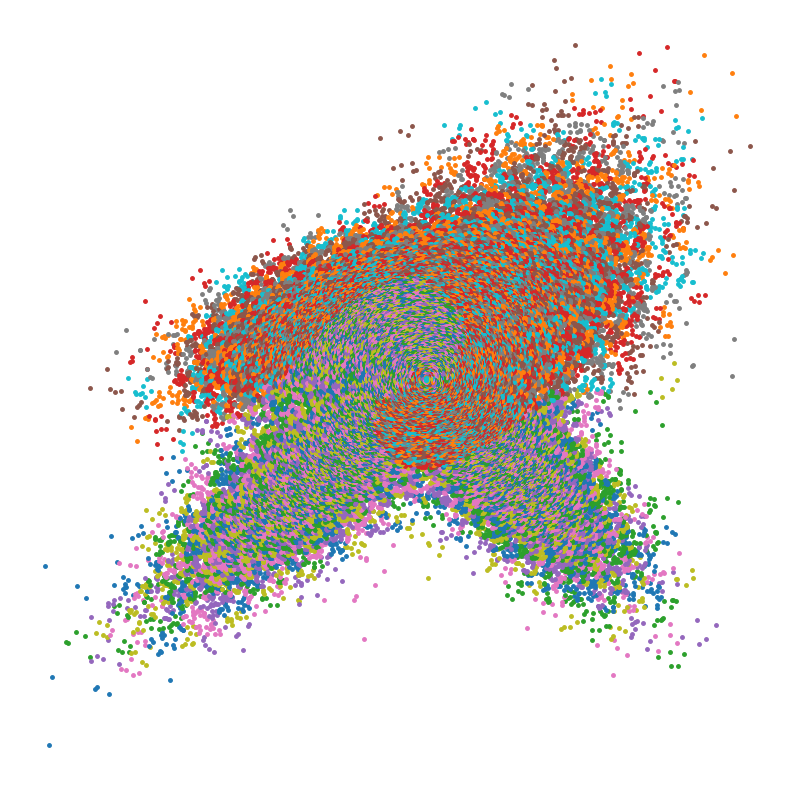

In [6]:
# Vectorized MDAV
k=5
clusters, centroids = mdav(X, k)
print_stats(clusters, centroids)
plot_results(clusters)

# STOP HERE

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 5120375.03it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 3413444.45it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 3413555.57it/s]

Number of clusters: 10
Mean of mean distances to centroids: 0.6305178305891925


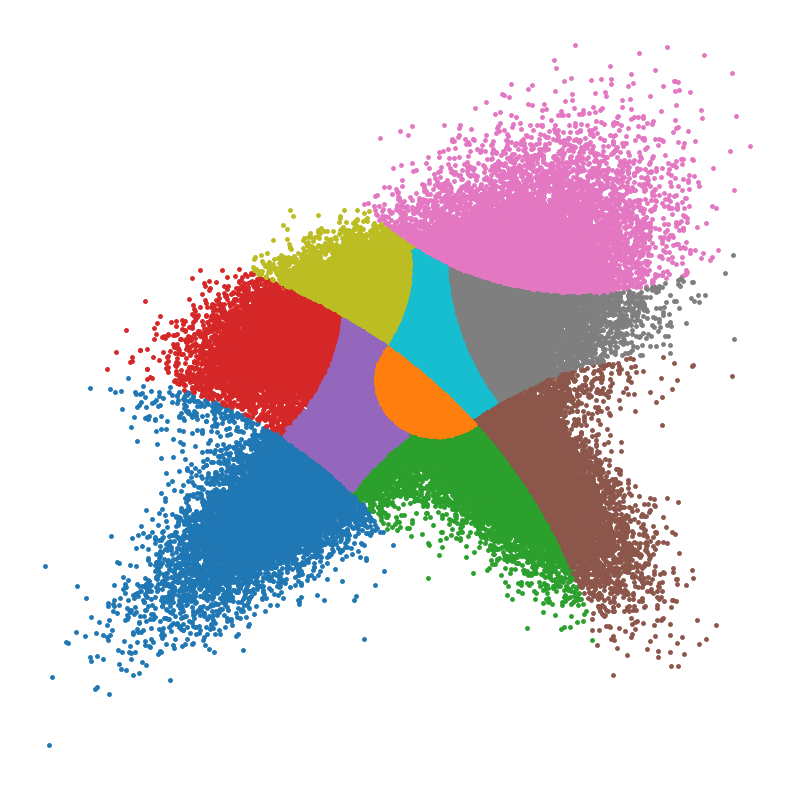

In [7]:
k = 10000
c, cen = mdav(X, len(X) // 2)
c0, cen0 = mdav(c[0], k)
c1, cen1 = mdav(c[1], k)
clusters = np.vstack((c0,c1))
centroids = np.vstack((cen0,cen1))

print_stats(clusters, centroids)
plot_results(clusters)

In [8]:
k = 10000
c, _ = mdav(X, len(X) // 2)
c0, _ = mdav(c[0], len(c[0]) // 2)
c1, _ = mdav(c[1], len(c[1]) // 2)
c00, cen00 = mdav(c0[0], k)
c01, cen01 = mdav(c0[1], k)
c10, cen10 = mdav(c1[0], k)
c11, cen11 = mdav(c1[1], k)

clusters = np.vstack((c00,c01,c10,c11))
centroids = np.vstack((cen00,cen01,cen10,cen11))

print_stats(clusters, centroids)
plot_results(clusters)

  0%|                                                                                       | 0/100000 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 5387742.94it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 5682414.78it/s]

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 5636141.79it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 6398437.88it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 5121000.20it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 6389859.84it/s]

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████| 25000/25000 [00:00<00:00, 5120250.01it/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
k = 5
c, _ = mdav(X, len(X) // 2)
c0, _ = mdav(c[0], len(c[0]) // 2)
c1, _ = mdav(c[1], len(c[1]) // 2)
c00, _ = mdav(c0[0], len(c0[0]) // 2)
c01, _ = mdav(c0[1], len(c0[1]) // 2)
c10, _ = mdav(c1[0], len(c1[0]) // 2)
c11, _ = mdav(c1[1], len(c1[1]) // 2)

c000, cen000 = mdav(c00[0], k)
c001, cen001 = mdav(c00[1], k)
c010, cen010 = mdav(c01[0], k)
c011, cen011 = mdav(c01[1], k)
c100, cen100 = mdav(c10[0], k)
c101, cen101 = mdav(c10[1], k)
c110, cen110 = mdav(c11[0], k)
c111, cen111 = mdav(c11[1], k)

clusters = np.vstack(
    (
        c000,
        c001,
        c010,
        c011,
        c100,
        c101,
        c110,
        c111
    )
)

centroids = np.vstack(
    (
        cen000,
        cen001,
        cen010,
        cen011,
        cen100,
        cen101,
        cen110,
        cen111
    )
)

print_stats(clusters, centroids)
#plot_results(clusters)